In [5]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from google.colab import files
#uploaded = files.upload()

D0_0 = 'posFinalTouch/0,0.csv'
D0_7_5 = 'posFinalTouch/0,7.5.csv'
D0_15 ='posFinalTouch/0,15.0.csv'
D1_5_4_5 ='posFinalTouch/1.5,4.5.csv'#
D3_3 ='posFinalTouch/3.0,3.0.csv'

D3_7_5 ='posFinalTouch/3.0,7.5.csv'#
D3_12 ='posFinalTouch/3.0,12.0.csv'
D6_9 ='posFinalTouch/6.0,9.0.csv'
D6_12 ='posFinalTouch/6.0,12.75.csv'
D7_5_0 ='posFinalTouch/7.5,0.csv'
D7_5_2_25 ='posFinalTouch/7.5,2.25.csv'#
D7_5_3 ='posFinalTouch/7.5,3.0.csv'#
D7_5_5_25 ='posFinalTouch/7.5,5.25.csv'#
D7_5_7_5 ='posFinalTouch/7.5,7.5.csv'
D7_5_11_25 ='posFinalTouch/7.5,11.25.csv'#
D7_5_12 ='posFinalTouch/7.5,12.0.csv'#
D7_5_15 ='posFinalTouch/7.5,15.0.csv'
D8_25_14_25 ='posFinalTouch/8.25,14.25.csv'#
D10_5_12 ='posFinalTouch/10.5,12.0.csv'#
D12_3 ='posFinalTouch/12.0,3.0.csv'
D12_7_5 ='posFinalTouch/12.0,7.5.csv'#
D12_12 ='posFinalTouch/12.0,12.0.csv'
D15_0 ='posFinalTouch/15.0,0.csv'
D15_7_5 = 'posFinalTouch/15.0,7.5.csv'
D15_15 = 'posFinalTouch/15.0,15.0.csv'

# Importing the Boston Housing dataset
#from sklearn.datasets import load_boston

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

gpus = tf.config.experimental.list_physical_devices()
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        #for gpu in gpus:
        #    tf.config.experimental.set_memory_growth(gpu, True)
        #logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        
        #tf_config = tf.compat.v1.ConfigProto(allow_soft_placement=False)
        #tf_config.gpu_options.allow_growth = True
        #s = tf.compat.v1.Session(config=tf_config)
        
        #tf.compat.v1.keras.backend.set_session(s)
        
        logical_gpus = tf.config.list_physical_devices('GPU')
        
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        tf.config.experimental.set_memory_growth(gpus[1], True)
        #tf.debugging.set_log_device_placement(True)
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
gpus

2 Physical GPUs, 1 Logical GPUs


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
def ChangetoMean(x, numD):
    NumDiv = numD
    d0_7_5Mean = np.empty((int(x.shape[0]/NumDiv),x.shape[1]))
    for i in range(int(x.shape[0]/NumDiv)):
        d0_7_5Mean[i,:] = np.mean(x.iloc[i*NumDiv:i*NumDiv+NumDiv,:],axis=0)
    return d0_7_5Mean

In [8]:
def lengthNew(x):
    return np.sqrt(np.sum(np.power(x,2),axis=1))

In [19]:
def pressForce(x):    
    x.iloc[:,:4] = x.iloc[:,:4]-np.array(MeanNot[:4]).reshape(1,4)
    #valR = x.iloc[:,:4]-np.array(MeanNot[:4]).reshape(1,4)
    force = lengthNew(x.iloc[:,:4])
    #force = lengthNew(valR)
    x['Fdist']=force
    return x

In [18]:
def ratioSxSy(x):
    x.pop(x.columns[6])
    x.pop(x.columns[6])
    x=pressForce(x)
    Sxnum=-(1/x[x.columns[0]])+(1/x[x.columns[1]])+(1/x[x.columns[2]])-(1/x[x.columns[3]])    
    Synum=-(1/x[x.columns[0]])-(1/x[x.columns[1]])+(1/x[x.columns[2]])+(1/x[x.columns[3]])
    Sden=(1/x[x.columns[0]])+(1/x[x.columns[1]])+(1/x[x.columns[2]])+(1/x[x.columns[3]])
    x['Sx'] = Sxnum/Sden
    x['Sy'] = Synum/Sden
    return x

In [20]:
def changeLast(x,num):
    #x.pop(x.columns[5])
    x[x.columns[5]]=num
    return x

In [23]:
d0_0 = ratioSxSy(pd.read_csv(D0_0,header=None)).iloc[:10000,:]
d0_7_5 = ratioSxSy(pd.read_csv(D0_7_5,header=None))
d0_15 = ratioSxSy(pd.read_csv(D0_15,header=None))
d1_5_4_5 =ratioSxSy(pd.read_csv(D1_5_4_5,header=None))#
d3_3 = ratioSxSy(pd.read_csv(D3_3,header=None))
d3_7_5 =ratioSxSy(pd.read_csv(D3_7_5,header=None))#
d3_12 = ratioSxSy(pd.read_csv(D3_12,header=None))
d6_9 = ratioSxSy(pd.read_csv(D6_9,header=None))
d6_12 = ratioSxSy(pd.read_csv(D6_12,header=None))
d7_5_0 = ratioSxSy(pd.read_csv(D7_5_0,header=None))
d7_5_2_25 =ratioSxSy(pd.read_csv(D7_5_2_25,header=None))#
d7_5_3 =ratioSxSy(pd.read_csv(D7_5_3,header=None))#
d7_5_5_25 =ratioSxSy(pd.read_csv(D7_5_5_25,header=None))#
d7_5_7_5 = ratioSxSy(pd.read_csv(D7_5_7_5,header=None))
d7_5_11_25 =ratioSxSy(pd.read_csv(D7_5_11_25,header=None))#
d7_5_12 =ratioSxSy(pd.read_csv(D7_5_12,header=None))#
d7_5_15 = ratioSxSy(pd.read_csv(D7_5_15,header=None))
d8_25_14_25 =ratioSxSy(pd.read_csv(D8_25_14_25,header=None))#
d10_5_12 =ratioSxSy(pd.read_csv(D10_5_12,header=None))#
d12_3 = ratioSxSy(pd.read_csv(D12_3,header=None))
d12_7_5 =ratioSxSy(pd.read_csv(D12_7_5,header=None))#
d12_12 = ratioSxSy(pd.read_csv(D12_12,header=None))
d15_0 = ratioSxSy(pd.read_csv(D15_0,header=None))
d15_7_5 = ratioSxSy(pd.read_csv(D15_7_5,header=None))
d15_15 = ratioSxSy(pd.read_csv(D15_15,header=None)) #42


In [24]:
D_Not='posNewTouchData2/-1,-1.csv'
d_Not = pd.read_csv(D_Not,header=None)
#dataNot=pd.DataFrame.from_dict(dNot)
dataNot=pd.DataFrame.from_dict(d_Not)
NotDescribe=dataNot.describe()
NotDescribe=NotDescribe.transpose()
MeanNot=NotDescribe['mean']
StdNot=NotDescribe['std']
print("MeanNot:\n{}\nStdNot:\n{}".format(MeanNot,StdNot))

MeanNot:
0    326.27320
1     12.01916
2    310.34624
3    222.99996
4     -1.00000
5     -1.00000
Name: mean, dtype: float64
StdNot:
0    1.869022
1    0.065679
2    2.266601
3    0.002828
4    0.000000
5    0.000000
Name: std, dtype: float64


In [25]:
d1_5_4_5.shape

(10000, 9)

In [26]:
datasRaw = np.concatenate([d0_0, d0_7_5, d0_15, d1_5_4_5, d3_3, d3_7_5, d3_12,  
                           d6_9, d6_12, d7_5_0, d7_5_2_25,d7_5_3,d7_5_5_25,d7_5_7_5,d7_5_11_25,
                           d7_5_12, d7_5_15, d8_25_14_25, d10_5_12, d12_3, d12_7_5, d12_12, d15_0, d15_7_5, d15_15])
datasRaw.shape  # 41*5000 = 205000; 13*2500 = 32500; T= 237500

(250000, 9)

In [27]:
datasFull=pd.DataFrame.from_dict(datasRaw)
datasFull.columns=["F0","F1","F2","F3","x","y","Fdist","Sx","Sy"]
datasFull.head()

F0        F1        F2       F3    x    y      Fdist        Sx  \
0  14.7268  11.98084  31.65376  8.00004  0.0  0.0  37.767451 -0.252773   
1  13.7268  11.98084  30.65376  8.00004  0.0  0.0  36.546124 -0.260435   
2  12.7268  11.98084  29.65376  8.00004  0.0  0.0  35.339186 -0.269310   
3  11.7268  11.98084  29.65376  8.00004  0.0  0.0  34.991492 -0.284261   
4   9.7268  11.98084  29.65376  8.00004  0.0  0.0  34.372915 -0.320637   

         Sy  
0  0.016954  
1  0.004157  
2 -0.010347  
3 -0.030597  
4 -0.079866

In [28]:
FullDescribe=datasFull.describe(include='all')
FullDescribe=FullDescribe.transpose()
MeandataFull=FullDescribe['mean']
StddataFull=FullDescribe['std']

In [29]:
print("Mean:\n{}\nStd:\n{}".format(MeandataFull,StddataFull))

Mean:
F0       54.627860
F1       15.522428
F2       61.259248
F3       11.023640
x         7.290000
y         7.950000
Fdist    91.784562
Sx       -0.480233
Sy        0.031787
Name: mean, dtype: float64
Std:
F0        29.126948
F1         9.884542
F2        33.097822
F3        12.678525
x          4.507603
y          4.920376
Fdist     29.618371
Sx       104.497435
Sy        56.788350
Name: std, dtype: float64


In [30]:
dataTrain, dataTest = train_test_split(datasFull, test_size=0.15)
dataTrain, dataVal = train_test_split(dataTrain, test_size=0.2)

In [31]:
dataTrain.head()

F0        F1        F2        F3     x      y       Fdist  \
81493   96.7268  14.98084  45.65376  10.00004   6.0  12.75  108.465506   
2227    -8.2732  12.98084  18.65376  54.00004   0.0   0.00   59.168532   
22791   82.7268  13.98084  27.65376  10.00004   0.0  15.00   88.903985   
135260  36.7268  12.98084  49.65376   9.00004   7.5   7.50   63.748385   
240818  22.7268  11.98084  12.65376   8.00004  15.0  15.00   29.734933   

              Sx        Sy  
81493  -0.108958  0.225199  
2227    8.235676  4.098863  
22791  -0.020019  0.239092  
135260 -0.174777  0.114580  
240818 -0.019626  0.230953

In [32]:
# Helper functions
def normNew(x):
    return ((x - MeandataFull) / StddataFull)

def norm4(x, meanD, stdD):
    return ((x - meanD) / stdD)

def norm2(x):
    return ((x - train_stats['mean']) / train_stats['std'])

def norm3(x):
    dataDescribe=x.describe()
    dataDescribe=dataDescribe.transpose()
    return ((x - dataDescribe['mean']) / dataDescribe['std'])

def format_output(data):
    data2=data
    y1 = data2.pop('x')    
    y2 = data2.pop('y')
    return y1, y2

def format_input(data):
    data2=data
    data2.pop('x')    
    data2.pop('y')
    return data2 

def format_output2(data):
    y1 = data.pop('x')   
    y1=np.array(y1)
    y2 = data.pop('y')
    y2=np.array(y2)
    return y1, y2

def PrintMeanStd(x):
    dataDescribe=x.describe()
    dataDescribe=dataDescribe.transpose()
    print("Mean: {}\nStd: {}".format(dataDescribe['mean'],dataDescribe['std']))
    


In [33]:
# Normalize the training and test data
norm_train_X = format_input(normNew(dataTrain))
train_Y = format_output(dataTrain)

norm_test_X=format_input(normNew(dataTest))
test_Y=format_output(dataTest)

norm_val_X = format_input(normNew(dataVal))
val_Y = format_output(dataVal)

norm_train_X = np.array(norm_train_X)
#train_Y = np.array(train_Y)
norm_test_X = np.array(norm_test_X)
#test_Y = np.array(test_Y)
norm_val_X = np.array(norm_val_X)
#val_Y = np.array(val_Y)

In [34]:
def build_model():
    # Define model layers.
    input_layer = layers.Input(shape=(len(norm_train_X[1]),))
    x = layers.Dense(130)(input_layer)   
    x = layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)
    
    x = layers.Dense(130)(x)
    x = layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)    
    
    x = layers.Dense(130)(x)  
    x = layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)  
    
    x = layers.Dense(130)(x)       
    x = layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)    
    
    third_dense = layers.Dense(units='130', activation='relu')(x)
    #third_dense = layers.LSTM(units='130', activation='relu')(x)
    #third_dense=layers.Dropout(0.5)(third_dense)
    
    # Y1 output will be fed from the first dense
    y1_output = layers.Dense(units='1', name='x_output')(third_dense)
    
    # Y2 output will be fed from the second dense
    y2_output = layers.Dense(units='1', name='y_output')(third_dense)

    # Define the model with the input layer and a list of output layers
    model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

    return model

In [35]:
with tf.device('/gpu:0'):
    model = build_model()

# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss={'x_output': 'mse', 'y_output': 'mse'},
              metrics={'x_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y_output': tf.keras.metrics.RootMeanSquaredError()})

In [36]:
# Train the model for 200 epochs
history = model.fit(norm_train_X, train_Y,
                    epochs=20000,batch_size=1000, verbose=2, validation_data=(norm_test_X, test_Y), use_multiprocessing=True)

Epoch 1/20000
170/170 - 4s - loss: 19.7872 - x_output_loss: 12.8251 - y_output_loss: 6.9621 - x_output_root_mean_squared_error: 3.5812 - y_output_root_mean_squared_error: 2.6386 - val_loss: 48.5615 - val_x_output_loss: 25.7353 - val_y_output_loss: 22.8262 - val_x_output_root_mean_squared_error: 5.0730 - val_y_output_root_mean_squared_error: 4.7777
Epoch 2/20000
170/170 - 2s - loss: 9.6712 - x_output_loss: 7.2241 - y_output_loss: 2.4471 - x_output_root_mean_squared_error: 2.6878 - y_output_root_mean_squared_error: 1.5643 - val_loss: 20.5657 - val_x_output_loss: 12.0554 - val_y_output_loss: 8.5103 - val_x_output_root_mean_squared_error: 3.4721 - val_y_output_root_mean_squared_error: 2.9172
Epoch 3/20000
170/170 - 2s - loss: 8.6793 - x_output_loss: 6.5317 - y_output_loss: 2.1477 - x_output_root_mean_squared_error: 2.5557 - y_output_root_mean_squared_error: 1.4655 - val_loss: 15.2779 - val_x_output_loss: 8.5757 - val_y_output_loss: 6.7022 - val_x_output_root_mean_squared_error: 2.9284 - va

Epoch 25/20000
170/170 - 2s - loss: 6.6898 - x_output_loss: 5.1584 - y_output_loss: 1.5314 - x_output_root_mean_squared_error: 2.2712 - y_output_root_mean_squared_error: 1.2375 - val_loss: 8.9740 - val_x_output_loss: 5.9749 - val_y_output_loss: 2.9991 - val_x_output_root_mean_squared_error: 2.4444 - val_y_output_root_mean_squared_error: 1.7318
Epoch 26/20000
170/170 - 2s - loss: 6.6365 - x_output_loss: 5.1222 - y_output_loss: 1.5143 - x_output_root_mean_squared_error: 2.2632 - y_output_root_mean_squared_error: 1.2306 - val_loss: 7.3298 - val_x_output_loss: 5.0326 - val_y_output_loss: 2.2971 - val_x_output_root_mean_squared_error: 2.2434 - val_y_output_root_mean_squared_error: 1.5156
Epoch 27/20000
170/170 - 2s - loss: 6.6586 - x_output_loss: 5.1301 - y_output_loss: 1.5285 - x_output_root_mean_squared_error: 2.2650 - y_output_root_mean_squared_error: 1.2363 - val_loss: 8.5653 - val_x_output_loss: 5.4120 - val_y_output_loss: 3.1534 - val_x_output_root_mean_squared_error: 2.3264 - val_y_o

Epoch 49/20000
170/170 - 2s - loss: 6.3002 - x_output_loss: 4.8728 - y_output_loss: 1.4275 - x_output_root_mean_squared_error: 2.2074 - y_output_root_mean_squared_error: 1.1948 - val_loss: 6.2556 - val_x_output_loss: 4.7682 - val_y_output_loss: 1.4874 - val_x_output_root_mean_squared_error: 2.1836 - val_y_output_root_mean_squared_error: 1.2196
Epoch 50/20000
170/170 - 2s - loss: 6.3528 - x_output_loss: 4.9170 - y_output_loss: 1.4358 - x_output_root_mean_squared_error: 2.2174 - y_output_root_mean_squared_error: 1.1982 - val_loss: 6.3977 - val_x_output_loss: 4.9491 - val_y_output_loss: 1.4485 - val_x_output_root_mean_squared_error: 2.2247 - val_y_output_root_mean_squared_error: 1.2035
Epoch 51/20000
170/170 - 2s - loss: 6.4366 - x_output_loss: 4.9767 - y_output_loss: 1.4600 - x_output_root_mean_squared_error: 2.2308 - y_output_root_mean_squared_error: 1.2083 - val_loss: 6.5817 - val_x_output_loss: 4.9474 - val_y_output_loss: 1.6343 - val_x_output_root_mean_squared_error: 2.2243 - val_y_o

Epoch 73/20000
170/170 - 2s - loss: 6.3824 - x_output_loss: 4.9426 - y_output_loss: 1.4397 - x_output_root_mean_squared_error: 2.2232 - y_output_root_mean_squared_error: 1.1999 - val_loss: 5.8947 - val_x_output_loss: 4.5519 - val_y_output_loss: 1.3429 - val_x_output_root_mean_squared_error: 2.1335 - val_y_output_root_mean_squared_error: 1.1588
Epoch 74/20000
170/170 - 2s - loss: 6.3272 - x_output_loss: 4.8969 - y_output_loss: 1.4303 - x_output_root_mean_squared_error: 2.2129 - y_output_root_mean_squared_error: 1.1959 - val_loss: 6.0734 - val_x_output_loss: 4.6845 - val_y_output_loss: 1.3889 - val_x_output_root_mean_squared_error: 2.1644 - val_y_output_root_mean_squared_error: 1.1785
Epoch 75/20000
170/170 - 2s - loss: 6.2081 - x_output_loss: 4.8075 - y_output_loss: 1.4007 - x_output_root_mean_squared_error: 2.1926 - y_output_root_mean_squared_error: 1.1835 - val_loss: 6.1587 - val_x_output_loss: 4.7902 - val_y_output_loss: 1.3685 - val_x_output_root_mean_squared_error: 2.1887 - val_y_o

Epoch 97/20000
170/170 - 2s - loss: 6.2087 - x_output_loss: 4.8200 - y_output_loss: 1.3887 - x_output_root_mean_squared_error: 2.1955 - y_output_root_mean_squared_error: 1.1784 - val_loss: 6.1371 - val_x_output_loss: 4.6091 - val_y_output_loss: 1.5280 - val_x_output_root_mean_squared_error: 2.1469 - val_y_output_root_mean_squared_error: 1.2361
Epoch 98/20000
170/170 - 2s - loss: 6.0869 - x_output_loss: 4.7291 - y_output_loss: 1.3578 - x_output_root_mean_squared_error: 2.1746 - y_output_root_mean_squared_error: 1.1653 - val_loss: 5.8861 - val_x_output_loss: 4.5981 - val_y_output_loss: 1.2881 - val_x_output_root_mean_squared_error: 2.1443 - val_y_output_root_mean_squared_error: 1.1349
Epoch 99/20000
170/170 - 2s - loss: 6.0956 - x_output_loss: 4.7402 - y_output_loss: 1.3554 - x_output_root_mean_squared_error: 2.1772 - y_output_root_mean_squared_error: 1.1642 - val_loss: 6.0272 - val_x_output_loss: 4.7195 - val_y_output_loss: 1.3077 - val_x_output_root_mean_squared_error: 2.1724 - val_y_o

Epoch 121/20000
170/170 - 2s - loss: 6.1339 - x_output_loss: 4.7619 - y_output_loss: 1.3720 - x_output_root_mean_squared_error: 2.1822 - y_output_root_mean_squared_error: 1.1713 - val_loss: 6.0381 - val_x_output_loss: 4.7422 - val_y_output_loss: 1.2959 - val_x_output_root_mean_squared_error: 2.1777 - val_y_output_root_mean_squared_error: 1.1384
Epoch 122/20000
170/170 - 2s - loss: 6.0708 - x_output_loss: 4.7213 - y_output_loss: 1.3495 - x_output_root_mean_squared_error: 2.1729 - y_output_root_mean_squared_error: 1.1617 - val_loss: 5.9518 - val_x_output_loss: 4.6715 - val_y_output_loss: 1.2803 - val_x_output_root_mean_squared_error: 2.1614 - val_y_output_root_mean_squared_error: 1.1315
Epoch 123/20000
170/170 - 2s - loss: 6.0783 - x_output_loss: 4.7285 - y_output_loss: 1.3498 - x_output_root_mean_squared_error: 2.1745 - y_output_root_mean_squared_error: 1.1618 - val_loss: 6.0068 - val_x_output_loss: 4.6836 - val_y_output_loss: 1.3232 - val_x_output_root_mean_squared_error: 2.1642 - val_

Epoch 145/20000
170/170 - 2s - loss: 6.0588 - x_output_loss: 4.7108 - y_output_loss: 1.3480 - x_output_root_mean_squared_error: 2.1704 - y_output_root_mean_squared_error: 1.1611 - val_loss: 5.7254 - val_x_output_loss: 4.4581 - val_y_output_loss: 1.2673 - val_x_output_root_mean_squared_error: 2.1114 - val_y_output_root_mean_squared_error: 1.1257
Epoch 146/20000
170/170 - 2s - loss: 6.0062 - x_output_loss: 4.6672 - y_output_loss: 1.3390 - x_output_root_mean_squared_error: 2.1604 - y_output_root_mean_squared_error: 1.1571 - val_loss: 5.7353 - val_x_output_loss: 4.4377 - val_y_output_loss: 1.2976 - val_x_output_root_mean_squared_error: 2.1066 - val_y_output_root_mean_squared_error: 1.1391
Epoch 147/20000
170/170 - 2s - loss: 6.0008 - x_output_loss: 4.6658 - y_output_loss: 1.3350 - x_output_root_mean_squared_error: 2.1600 - y_output_root_mean_squared_error: 1.1554 - val_loss: 5.8702 - val_x_output_loss: 4.5527 - val_y_output_loss: 1.3174 - val_x_output_root_mean_squared_error: 2.1337 - val_

Epoch 169/20000
170/170 - 2s - loss: 5.9531 - x_output_loss: 4.6338 - y_output_loss: 1.3193 - x_output_root_mean_squared_error: 2.1526 - y_output_root_mean_squared_error: 1.1486 - val_loss: 5.8605 - val_x_output_loss: 4.5464 - val_y_output_loss: 1.3141 - val_x_output_root_mean_squared_error: 2.1322 - val_y_output_root_mean_squared_error: 1.1463
Epoch 170/20000
170/170 - 2s - loss: 5.9180 - x_output_loss: 4.5989 - y_output_loss: 1.3191 - x_output_root_mean_squared_error: 2.1445 - y_output_root_mean_squared_error: 1.1485 - val_loss: 5.5781 - val_x_output_loss: 4.3350 - val_y_output_loss: 1.2431 - val_x_output_root_mean_squared_error: 2.0821 - val_y_output_root_mean_squared_error: 1.1149
Epoch 171/20000
170/170 - 2s - loss: 5.8911 - x_output_loss: 4.5962 - y_output_loss: 1.2949 - x_output_root_mean_squared_error: 2.1439 - y_output_root_mean_squared_error: 1.1380 - val_loss: 5.6954 - val_x_output_loss: 4.4211 - val_y_output_loss: 1.2744 - val_x_output_root_mean_squared_error: 2.1026 - val_

Epoch 193/20000
170/170 - 2s - loss: 5.9914 - x_output_loss: 4.6629 - y_output_loss: 1.3285 - x_output_root_mean_squared_error: 2.1594 - y_output_root_mean_squared_error: 1.1526 - val_loss: 5.6723 - val_x_output_loss: 4.4442 - val_y_output_loss: 1.2281 - val_x_output_root_mean_squared_error: 2.1081 - val_y_output_root_mean_squared_error: 1.1082
Epoch 194/20000
170/170 - 2s - loss: 5.9502 - x_output_loss: 4.6317 - y_output_loss: 1.3185 - x_output_root_mean_squared_error: 2.1521 - y_output_root_mean_squared_error: 1.1483 - val_loss: 5.6046 - val_x_output_loss: 4.3541 - val_y_output_loss: 1.2505 - val_x_output_root_mean_squared_error: 2.0866 - val_y_output_root_mean_squared_error: 1.1183
Epoch 195/20000
170/170 - 2s - loss: 5.8931 - x_output_loss: 4.5865 - y_output_loss: 1.3066 - x_output_root_mean_squared_error: 2.1416 - y_output_root_mean_squared_error: 1.1430 - val_loss: 5.5705 - val_x_output_loss: 4.3496 - val_y_output_loss: 1.2209 - val_x_output_root_mean_squared_error: 2.0856 - val_

Epoch 217/20000
170/170 - 2s - loss: 5.8481 - x_output_loss: 4.5551 - y_output_loss: 1.2930 - x_output_root_mean_squared_error: 2.1343 - y_output_root_mean_squared_error: 1.1371 - val_loss: 5.8327 - val_x_output_loss: 4.5995 - val_y_output_loss: 1.2331 - val_x_output_root_mean_squared_error: 2.1447 - val_y_output_root_mean_squared_error: 1.1105
Epoch 218/20000
170/170 - 2s - loss: 5.8318 - x_output_loss: 4.5439 - y_output_loss: 1.2878 - x_output_root_mean_squared_error: 2.1317 - y_output_root_mean_squared_error: 1.1348 - val_loss: 5.5863 - val_x_output_loss: 4.3652 - val_y_output_loss: 1.2211 - val_x_output_root_mean_squared_error: 2.0893 - val_y_output_root_mean_squared_error: 1.1050
Epoch 219/20000
170/170 - 2s - loss: 5.8135 - x_output_loss: 4.5282 - y_output_loss: 1.2852 - x_output_root_mean_squared_error: 2.1280 - y_output_root_mean_squared_error: 1.1337 - val_loss: 5.6303 - val_x_output_loss: 4.4040 - val_y_output_loss: 1.2263 - val_x_output_root_mean_squared_error: 2.0986 - val_

Epoch 241/20000
170/170 - 2s - loss: 5.8496 - x_output_loss: 4.5573 - y_output_loss: 1.2923 - x_output_root_mean_squared_error: 2.1348 - y_output_root_mean_squared_error: 1.1368 - val_loss: 5.9474 - val_x_output_loss: 4.7127 - val_y_output_loss: 1.2347 - val_x_output_root_mean_squared_error: 2.1709 - val_y_output_root_mean_squared_error: 1.1112
Epoch 242/20000
170/170 - 2s - loss: 5.8173 - x_output_loss: 4.5326 - y_output_loss: 1.2847 - x_output_root_mean_squared_error: 2.1290 - y_output_root_mean_squared_error: 1.1334 - val_loss: 7.0105 - val_x_output_loss: 5.7767 - val_y_output_loss: 1.2338 - val_x_output_root_mean_squared_error: 2.4035 - val_y_output_root_mean_squared_error: 1.1108
Epoch 243/20000
170/170 - 2s - loss: 5.7880 - x_output_loss: 4.5100 - y_output_loss: 1.2780 - x_output_root_mean_squared_error: 2.1237 - y_output_root_mean_squared_error: 1.1305 - val_loss: 5.8451 - val_x_output_loss: 4.6075 - val_y_output_loss: 1.2376 - val_x_output_root_mean_squared_error: 2.1465 - val_

Epoch 265/20000
170/170 - 2s - loss: 5.7660 - x_output_loss: 4.5011 - y_output_loss: 1.2648 - x_output_root_mean_squared_error: 2.1216 - y_output_root_mean_squared_error: 1.1246 - val_loss: 5.5101 - val_x_output_loss: 4.2511 - val_y_output_loss: 1.2590 - val_x_output_root_mean_squared_error: 2.0618 - val_y_output_root_mean_squared_error: 1.1221
Epoch 266/20000
170/170 - 2s - loss: 5.7884 - x_output_loss: 4.5093 - y_output_loss: 1.2791 - x_output_root_mean_squared_error: 2.1235 - y_output_root_mean_squared_error: 1.1310 - val_loss: 5.4921 - val_x_output_loss: 4.2717 - val_y_output_loss: 1.2204 - val_x_output_root_mean_squared_error: 2.0668 - val_y_output_root_mean_squared_error: 1.1047
Epoch 267/20000
170/170 - 2s - loss: 5.8084 - x_output_loss: 4.5287 - y_output_loss: 1.2797 - x_output_root_mean_squared_error: 2.1281 - y_output_root_mean_squared_error: 1.1312 - val_loss: 5.6069 - val_x_output_loss: 4.3511 - val_y_output_loss: 1.2558 - val_x_output_root_mean_squared_error: 2.0859 - val_

Epoch 289/20000
170/170 - 2s - loss: 5.7638 - x_output_loss: 4.4937 - y_output_loss: 1.2701 - x_output_root_mean_squared_error: 2.1198 - y_output_root_mean_squared_error: 1.1270 - val_loss: 5.4913 - val_x_output_loss: 4.2816 - val_y_output_loss: 1.2097 - val_x_output_root_mean_squared_error: 2.0692 - val_y_output_root_mean_squared_error: 1.0999
Epoch 290/20000
170/170 - 2s - loss: 5.7209 - x_output_loss: 4.4648 - y_output_loss: 1.2561 - x_output_root_mean_squared_error: 2.1130 - y_output_root_mean_squared_error: 1.1207 - val_loss: 5.5098 - val_x_output_loss: 4.2917 - val_y_output_loss: 1.2181 - val_x_output_root_mean_squared_error: 2.0716 - val_y_output_root_mean_squared_error: 1.1037
Epoch 291/20000
170/170 - 2s - loss: 5.7854 - x_output_loss: 4.5030 - y_output_loss: 1.2824 - x_output_root_mean_squared_error: 2.1220 - y_output_root_mean_squared_error: 1.1324 - val_loss: 5.5924 - val_x_output_loss: 4.3381 - val_y_output_loss: 1.2543 - val_x_output_root_mean_squared_error: 2.0828 - val_

Epoch 313/20000
170/170 - 2s - loss: 5.7585 - x_output_loss: 4.4938 - y_output_loss: 1.2648 - x_output_root_mean_squared_error: 2.1199 - y_output_root_mean_squared_error: 1.1246 - val_loss: 5.4985 - val_x_output_loss: 4.2582 - val_y_output_loss: 1.2402 - val_x_output_root_mean_squared_error: 2.0636 - val_y_output_root_mean_squared_error: 1.1136
Epoch 314/20000
170/170 - 2s - loss: 5.6959 - x_output_loss: 4.4400 - y_output_loss: 1.2559 - x_output_root_mean_squared_error: 2.1071 - y_output_root_mean_squared_error: 1.1207 - val_loss: 5.5667 - val_x_output_loss: 4.3422 - val_y_output_loss: 1.2244 - val_x_output_root_mean_squared_error: 2.0838 - val_y_output_root_mean_squared_error: 1.1065
Epoch 315/20000
170/170 - 2s - loss: 5.6604 - x_output_loss: 4.4195 - y_output_loss: 1.2409 - x_output_root_mean_squared_error: 2.1023 - y_output_root_mean_squared_error: 1.1140 - val_loss: 5.4138 - val_x_output_loss: 4.2031 - val_y_output_loss: 1.2107 - val_x_output_root_mean_squared_error: 2.0501 - val_

Epoch 337/20000
170/170 - 2s - loss: 5.6201 - x_output_loss: 4.3911 - y_output_loss: 1.2290 - x_output_root_mean_squared_error: 2.0955 - y_output_root_mean_squared_error: 1.1086 - val_loss: 5.7537 - val_x_output_loss: 4.4839 - val_y_output_loss: 1.2697 - val_x_output_root_mean_squared_error: 2.1175 - val_y_output_root_mean_squared_error: 1.1268
Epoch 338/20000
170/170 - 2s - loss: 5.6775 - x_output_loss: 4.4315 - y_output_loss: 1.2461 - x_output_root_mean_squared_error: 2.1051 - y_output_root_mean_squared_error: 1.1163 - val_loss: 5.6049 - val_x_output_loss: 4.3748 - val_y_output_loss: 1.2301 - val_x_output_root_mean_squared_error: 2.0916 - val_y_output_root_mean_squared_error: 1.1091
Epoch 339/20000
170/170 - 2s - loss: 5.6414 - x_output_loss: 4.4008 - y_output_loss: 1.2406 - x_output_root_mean_squared_error: 2.0978 - y_output_root_mean_squared_error: 1.1138 - val_loss: 5.4392 - val_x_output_loss: 4.2205 - val_y_output_loss: 1.2187 - val_x_output_root_mean_squared_error: 2.0544 - val_

Epoch 361/20000
170/170 - 2s - loss: 5.6827 - x_output_loss: 4.4315 - y_output_loss: 1.2512 - x_output_root_mean_squared_error: 2.1051 - y_output_root_mean_squared_error: 1.1186 - val_loss: 5.4417 - val_x_output_loss: 4.2385 - val_y_output_loss: 1.2032 - val_x_output_root_mean_squared_error: 2.0588 - val_y_output_root_mean_squared_error: 1.0969
Epoch 362/20000
170/170 - 2s - loss: 5.6057 - x_output_loss: 4.3759 - y_output_loss: 1.2298 - x_output_root_mean_squared_error: 2.0919 - y_output_root_mean_squared_error: 1.1089 - val_loss: 5.5583 - val_x_output_loss: 4.3215 - val_y_output_loss: 1.2368 - val_x_output_root_mean_squared_error: 2.0788 - val_y_output_root_mean_squared_error: 1.1121
Epoch 363/20000
170/170 - 2s - loss: 5.6483 - x_output_loss: 4.4066 - y_output_loss: 1.2417 - x_output_root_mean_squared_error: 2.0992 - y_output_root_mean_squared_error: 1.1143 - val_loss: 5.5165 - val_x_output_loss: 4.2824 - val_y_output_loss: 1.2342 - val_x_output_root_mean_squared_error: 2.0694 - val_

Epoch 385/20000
170/170 - 2s - loss: 5.6131 - x_output_loss: 4.3844 - y_output_loss: 1.2287 - x_output_root_mean_squared_error: 2.0939 - y_output_root_mean_squared_error: 1.1085 - val_loss: 5.4272 - val_x_output_loss: 4.2330 - val_y_output_loss: 1.1941 - val_x_output_root_mean_squared_error: 2.0574 - val_y_output_root_mean_squared_error: 1.0928
Epoch 386/20000
170/170 - 2s - loss: 5.6372 - x_output_loss: 4.3974 - y_output_loss: 1.2398 - x_output_root_mean_squared_error: 2.0970 - y_output_root_mean_squared_error: 1.1135 - val_loss: 5.3626 - val_x_output_loss: 4.1813 - val_y_output_loss: 1.1813 - val_x_output_root_mean_squared_error: 2.0448 - val_y_output_root_mean_squared_error: 1.0869
Epoch 387/20000
170/170 - 2s - loss: 5.6482 - x_output_loss: 4.4077 - y_output_loss: 1.2405 - x_output_root_mean_squared_error: 2.0995 - y_output_root_mean_squared_error: 1.1138 - val_loss: 5.5025 - val_x_output_loss: 4.2769 - val_y_output_loss: 1.2256 - val_x_output_root_mean_squared_error: 2.0681 - val_

Epoch 409/20000
170/170 - 2s - loss: 5.6007 - x_output_loss: 4.3705 - y_output_loss: 1.2302 - x_output_root_mean_squared_error: 2.0906 - y_output_root_mean_squared_error: 1.1091 - val_loss: 5.4574 - val_x_output_loss: 4.2401 - val_y_output_loss: 1.2173 - val_x_output_root_mean_squared_error: 2.0591 - val_y_output_root_mean_squared_error: 1.1033
Epoch 410/20000
170/170 - 2s - loss: 5.6217 - x_output_loss: 4.3943 - y_output_loss: 1.2274 - x_output_root_mean_squared_error: 2.0963 - y_output_root_mean_squared_error: 1.1079 - val_loss: 5.3784 - val_x_output_loss: 4.1902 - val_y_output_loss: 1.1882 - val_x_output_root_mean_squared_error: 2.0470 - val_y_output_root_mean_squared_error: 1.0900
Epoch 411/20000
170/170 - 2s - loss: 5.6575 - x_output_loss: 4.4185 - y_output_loss: 1.2390 - x_output_root_mean_squared_error: 2.1020 - y_output_root_mean_squared_error: 1.1131 - val_loss: 5.7203 - val_x_output_loss: 4.4412 - val_y_output_loss: 1.2791 - val_x_output_root_mean_squared_error: 2.1074 - val_

Epoch 433/20000
170/170 - 2s - loss: 5.5839 - x_output_loss: 4.3641 - y_output_loss: 1.2197 - x_output_root_mean_squared_error: 2.0891 - y_output_root_mean_squared_error: 1.1044 - val_loss: 5.3834 - val_x_output_loss: 4.1939 - val_y_output_loss: 1.1895 - val_x_output_root_mean_squared_error: 2.0479 - val_y_output_root_mean_squared_error: 1.0906
Epoch 434/20000
170/170 - 2s - loss: 5.5699 - x_output_loss: 4.3519 - y_output_loss: 1.2180 - x_output_root_mean_squared_error: 2.0861 - y_output_root_mean_squared_error: 1.1036 - val_loss: 5.4890 - val_x_output_loss: 4.2817 - val_y_output_loss: 1.2073 - val_x_output_root_mean_squared_error: 2.0692 - val_y_output_root_mean_squared_error: 1.0988
Epoch 435/20000
170/170 - 2s - loss: 5.5462 - x_output_loss: 4.3420 - y_output_loss: 1.2042 - x_output_root_mean_squared_error: 2.0837 - y_output_root_mean_squared_error: 1.0974 - val_loss: 5.6352 - val_x_output_loss: 4.3835 - val_y_output_loss: 1.2517 - val_x_output_root_mean_squared_error: 2.0937 - val_

Epoch 457/20000
170/170 - 2s - loss: 5.4852 - x_output_loss: 4.2934 - y_output_loss: 1.1918 - x_output_root_mean_squared_error: 2.0720 - y_output_root_mean_squared_error: 1.0917 - val_loss: 5.4402 - val_x_output_loss: 4.2511 - val_y_output_loss: 1.1891 - val_x_output_root_mean_squared_error: 2.0618 - val_y_output_root_mean_squared_error: 1.0905
Epoch 458/20000
170/170 - 2s - loss: 5.5703 - x_output_loss: 4.3539 - y_output_loss: 1.2163 - x_output_root_mean_squared_error: 2.0866 - y_output_root_mean_squared_error: 1.1029 - val_loss: 5.3376 - val_x_output_loss: 4.1616 - val_y_output_loss: 1.1760 - val_x_output_root_mean_squared_error: 2.0400 - val_y_output_root_mean_squared_error: 1.0844
Epoch 459/20000
170/170 - 2s - loss: 5.5446 - x_output_loss: 4.3343 - y_output_loss: 1.2103 - x_output_root_mean_squared_error: 2.0819 - y_output_root_mean_squared_error: 1.1002 - val_loss: 5.3839 - val_x_output_loss: 4.1876 - val_y_output_loss: 1.1962 - val_x_output_root_mean_squared_error: 2.0464 - val_

Epoch 481/20000
170/170 - 2s - loss: 5.5104 - x_output_loss: 4.3115 - y_output_loss: 1.1989 - x_output_root_mean_squared_error: 2.0764 - y_output_root_mean_squared_error: 1.0949 - val_loss: 5.3852 - val_x_output_loss: 4.2077 - val_y_output_loss: 1.1775 - val_x_output_root_mean_squared_error: 2.0513 - val_y_output_root_mean_squared_error: 1.0851
Epoch 482/20000
170/170 - 2s - loss: 5.5422 - x_output_loss: 4.3353 - y_output_loss: 1.2069 - x_output_root_mean_squared_error: 2.0821 - y_output_root_mean_squared_error: 1.0986 - val_loss: 5.3226 - val_x_output_loss: 4.1510 - val_y_output_loss: 1.1716 - val_x_output_root_mean_squared_error: 2.0374 - val_y_output_root_mean_squared_error: 1.0824
Epoch 483/20000
170/170 - 2s - loss: 5.5444 - x_output_loss: 4.3315 - y_output_loss: 1.2129 - x_output_root_mean_squared_error: 2.0812 - y_output_root_mean_squared_error: 1.1013 - val_loss: 5.6291 - val_x_output_loss: 4.4032 - val_y_output_loss: 1.2259 - val_x_output_root_mean_squared_error: 2.0984 - val_

Epoch 505/20000
170/170 - 2s - loss: 5.5334 - x_output_loss: 4.3310 - y_output_loss: 1.2024 - x_output_root_mean_squared_error: 2.0811 - y_output_root_mean_squared_error: 1.0965 - val_loss: 5.4271 - val_x_output_loss: 4.2305 - val_y_output_loss: 1.1966 - val_x_output_root_mean_squared_error: 2.0568 - val_y_output_root_mean_squared_error: 1.0939
Epoch 506/20000
170/170 - 2s - loss: 5.5497 - x_output_loss: 4.3408 - y_output_loss: 1.2089 - x_output_root_mean_squared_error: 2.0835 - y_output_root_mean_squared_error: 1.0995 - val_loss: 5.3867 - val_x_output_loss: 4.2169 - val_y_output_loss: 1.1698 - val_x_output_root_mean_squared_error: 2.0535 - val_y_output_root_mean_squared_error: 1.0816
Epoch 507/20000
170/170 - 2s - loss: 5.4982 - x_output_loss: 4.2990 - y_output_loss: 1.1992 - x_output_root_mean_squared_error: 2.0734 - y_output_root_mean_squared_error: 1.0951 - val_loss: 5.4115 - val_x_output_loss: 4.2250 - val_y_output_loss: 1.1865 - val_x_output_root_mean_squared_error: 2.0555 - val_

Epoch 529/20000
170/170 - 2s - loss: 5.5463 - x_output_loss: 4.3411 - y_output_loss: 1.2052 - x_output_root_mean_squared_error: 2.0835 - y_output_root_mean_squared_error: 1.0978 - val_loss: 5.4007 - val_x_output_loss: 4.2049 - val_y_output_loss: 1.1958 - val_x_output_root_mean_squared_error: 2.0506 - val_y_output_root_mean_squared_error: 1.0935
Epoch 530/20000
170/170 - 2s - loss: 5.4758 - x_output_loss: 4.2822 - y_output_loss: 1.1936 - x_output_root_mean_squared_error: 2.0694 - y_output_root_mean_squared_error: 1.0925 - val_loss: 5.3404 - val_x_output_loss: 4.1727 - val_y_output_loss: 1.1677 - val_x_output_root_mean_squared_error: 2.0427 - val_y_output_root_mean_squared_error: 1.0806
Epoch 531/20000
170/170 - 2s - loss: 5.4648 - x_output_loss: 4.2688 - y_output_loss: 1.1960 - x_output_root_mean_squared_error: 2.0661 - y_output_root_mean_squared_error: 1.0936 - val_loss: 5.4336 - val_x_output_loss: 4.2508 - val_y_output_loss: 1.1828 - val_x_output_root_mean_squared_error: 2.0617 - val_

Epoch 553/20000
170/170 - 2s - loss: 5.4893 - x_output_loss: 4.2977 - y_output_loss: 1.1915 - x_output_root_mean_squared_error: 2.0731 - y_output_root_mean_squared_error: 1.0916 - val_loss: 5.3676 - val_x_output_loss: 4.1630 - val_y_output_loss: 1.2046 - val_x_output_root_mean_squared_error: 2.0403 - val_y_output_root_mean_squared_error: 1.0976
Epoch 554/20000
170/170 - 2s - loss: 5.4755 - x_output_loss: 4.2869 - y_output_loss: 1.1886 - x_output_root_mean_squared_error: 2.0705 - y_output_root_mean_squared_error: 1.0902 - val_loss: 5.4120 - val_x_output_loss: 4.2307 - val_y_output_loss: 1.1814 - val_x_output_root_mean_squared_error: 2.0569 - val_y_output_root_mean_squared_error: 1.0869
Epoch 555/20000
170/170 - 2s - loss: 5.4743 - x_output_loss: 4.2860 - y_output_loss: 1.1883 - x_output_root_mean_squared_error: 2.0703 - y_output_root_mean_squared_error: 1.0901 - val_loss: 5.3247 - val_x_output_loss: 4.1642 - val_y_output_loss: 1.1604 - val_x_output_root_mean_squared_error: 2.0406 - val_

Epoch 577/20000
170/170 - 2s - loss: 5.5031 - x_output_loss: 4.3040 - y_output_loss: 1.1991 - x_output_root_mean_squared_error: 2.0746 - y_output_root_mean_squared_error: 1.0950 - val_loss: 5.4031 - val_x_output_loss: 4.2059 - val_y_output_loss: 1.1972 - val_x_output_root_mean_squared_error: 2.0508 - val_y_output_root_mean_squared_error: 1.0942
Epoch 578/20000
170/170 - 2s - loss: 5.4294 - x_output_loss: 4.2472 - y_output_loss: 1.1823 - x_output_root_mean_squared_error: 2.0609 - y_output_root_mean_squared_error: 1.0873 - val_loss: 5.3710 - val_x_output_loss: 4.1783 - val_y_output_loss: 1.1927 - val_x_output_root_mean_squared_error: 2.0441 - val_y_output_root_mean_squared_error: 1.0921
Epoch 579/20000
170/170 - 2s - loss: 5.5014 - x_output_loss: 4.3060 - y_output_loss: 1.1954 - x_output_root_mean_squared_error: 2.0751 - y_output_root_mean_squared_error: 1.0933 - val_loss: 5.3267 - val_x_output_loss: 4.1542 - val_y_output_loss: 1.1725 - val_x_output_root_mean_squared_error: 2.0382 - val_

Epoch 601/20000
170/170 - 2s - loss: 5.4863 - x_output_loss: 4.2927 - y_output_loss: 1.1936 - x_output_root_mean_squared_error: 2.0719 - y_output_root_mean_squared_error: 1.0925 - val_loss: 5.3222 - val_x_output_loss: 4.1559 - val_y_output_loss: 1.1663 - val_x_output_root_mean_squared_error: 2.0386 - val_y_output_root_mean_squared_error: 1.0800
Epoch 602/20000
170/170 - 2s - loss: 5.4407 - x_output_loss: 4.2610 - y_output_loss: 1.1798 - x_output_root_mean_squared_error: 2.0642 - y_output_root_mean_squared_error: 1.0862 - val_loss: 5.5081 - val_x_output_loss: 4.2787 - val_y_output_loss: 1.2293 - val_x_output_root_mean_squared_error: 2.0685 - val_y_output_root_mean_squared_error: 1.1087
Epoch 603/20000
170/170 - 2s - loss: 5.4147 - x_output_loss: 4.2374 - y_output_loss: 1.1774 - x_output_root_mean_squared_error: 2.0585 - y_output_root_mean_squared_error: 1.0851 - val_loss: 5.3209 - val_x_output_loss: 4.1522 - val_y_output_loss: 1.1688 - val_x_output_root_mean_squared_error: 2.0377 - val_

Epoch 625/20000
170/170 - 2s - loss: 5.4234 - x_output_loss: 4.2409 - y_output_loss: 1.1825 - x_output_root_mean_squared_error: 2.0594 - y_output_root_mean_squared_error: 1.0874 - val_loss: 5.3066 - val_x_output_loss: 4.1257 - val_y_output_loss: 1.1809 - val_x_output_root_mean_squared_error: 2.0312 - val_y_output_root_mean_squared_error: 1.0867
Epoch 626/20000
170/170 - 2s - loss: 5.4032 - x_output_loss: 4.2319 - y_output_loss: 1.1713 - x_output_root_mean_squared_error: 2.0572 - y_output_root_mean_squared_error: 1.0823 - val_loss: 5.4749 - val_x_output_loss: 4.2696 - val_y_output_loss: 1.2054 - val_x_output_root_mean_squared_error: 2.0663 - val_y_output_root_mean_squared_error: 1.0979
Epoch 627/20000
170/170 - 2s - loss: 5.4114 - x_output_loss: 4.2363 - y_output_loss: 1.1751 - x_output_root_mean_squared_error: 2.0582 - y_output_root_mean_squared_error: 1.0840 - val_loss: 5.3040 - val_x_output_loss: 4.1534 - val_y_output_loss: 1.1506 - val_x_output_root_mean_squared_error: 2.0380 - val_

Epoch 649/20000
170/170 - 2s - loss: 5.4265 - x_output_loss: 4.2469 - y_output_loss: 1.1796 - x_output_root_mean_squared_error: 2.0608 - y_output_root_mean_squared_error: 1.0861 - val_loss: 5.2738 - val_x_output_loss: 4.1253 - val_y_output_loss: 1.1485 - val_x_output_root_mean_squared_error: 2.0311 - val_y_output_root_mean_squared_error: 1.0717
Epoch 650/20000
170/170 - 2s - loss: 5.3688 - x_output_loss: 4.1991 - y_output_loss: 1.1698 - x_output_root_mean_squared_error: 2.0492 - y_output_root_mean_squared_error: 1.0816 - val_loss: 5.2244 - val_x_output_loss: 4.0773 - val_y_output_loss: 1.1471 - val_x_output_root_mean_squared_error: 2.0192 - val_y_output_root_mean_squared_error: 1.0710
Epoch 651/20000
170/170 - 2s - loss: 5.4242 - x_output_loss: 4.2472 - y_output_loss: 1.1770 - x_output_root_mean_squared_error: 2.0609 - y_output_root_mean_squared_error: 1.0849 - val_loss: 5.3225 - val_x_output_loss: 4.1512 - val_y_output_loss: 1.1713 - val_x_output_root_mean_squared_error: 2.0375 - val_

Epoch 673/20000
170/170 - 2s - loss: 5.3881 - x_output_loss: 4.2151 - y_output_loss: 1.1730 - x_output_root_mean_squared_error: 2.0531 - y_output_root_mean_squared_error: 1.0831 - val_loss: 5.2928 - val_x_output_loss: 4.1334 - val_y_output_loss: 1.1594 - val_x_output_root_mean_squared_error: 2.0331 - val_y_output_root_mean_squared_error: 1.0768
Epoch 674/20000
170/170 - 2s - loss: 5.4126 - x_output_loss: 4.2353 - y_output_loss: 1.1773 - x_output_root_mean_squared_error: 2.0580 - y_output_root_mean_squared_error: 1.0850 - val_loss: 5.8870 - val_x_output_loss: 4.5228 - val_y_output_loss: 1.3642 - val_x_output_root_mean_squared_error: 2.1267 - val_y_output_root_mean_squared_error: 1.1680
Epoch 675/20000
170/170 - 2s - loss: 5.3913 - x_output_loss: 4.2183 - y_output_loss: 1.1729 - x_output_root_mean_squared_error: 2.0539 - y_output_root_mean_squared_error: 1.0830 - val_loss: 5.3107 - val_x_output_loss: 4.1538 - val_y_output_loss: 1.1569 - val_x_output_root_mean_squared_error: 2.0381 - val_

Epoch 697/20000
170/170 - 2s - loss: 5.4084 - x_output_loss: 4.2384 - y_output_loss: 1.1700 - x_output_root_mean_squared_error: 2.0587 - y_output_root_mean_squared_error: 1.0817 - val_loss: 5.3255 - val_x_output_loss: 4.1575 - val_y_output_loss: 1.1679 - val_x_output_root_mean_squared_error: 2.0390 - val_y_output_root_mean_squared_error: 1.0807
Epoch 698/20000
170/170 - 2s - loss: 5.4138 - x_output_loss: 4.2382 - y_output_loss: 1.1756 - x_output_root_mean_squared_error: 2.0587 - y_output_root_mean_squared_error: 1.0843 - val_loss: 5.2855 - val_x_output_loss: 4.1174 - val_y_output_loss: 1.1680 - val_x_output_root_mean_squared_error: 2.0291 - val_y_output_root_mean_squared_error: 1.0808
Epoch 699/20000
170/170 - 2s - loss: 5.3796 - x_output_loss: 4.2145 - y_output_loss: 1.1652 - x_output_root_mean_squared_error: 2.0529 - y_output_root_mean_squared_error: 1.0794 - val_loss: 5.3523 - val_x_output_loss: 4.1842 - val_y_output_loss: 1.1681 - val_x_output_root_mean_squared_error: 2.0455 - val_

Epoch 721/20000
170/170 - 2s - loss: 5.3649 - x_output_loss: 4.2024 - y_output_loss: 1.1625 - x_output_root_mean_squared_error: 2.0500 - y_output_root_mean_squared_error: 1.0782 - val_loss: 5.2802 - val_x_output_loss: 4.1158 - val_y_output_loss: 1.1645 - val_x_output_root_mean_squared_error: 2.0287 - val_y_output_root_mean_squared_error: 1.0791
Epoch 722/20000
170/170 - 2s - loss: 5.3998 - x_output_loss: 4.2316 - y_output_loss: 1.1682 - x_output_root_mean_squared_error: 2.0571 - y_output_root_mean_squared_error: 1.0808 - val_loss: 5.2944 - val_x_output_loss: 4.1309 - val_y_output_loss: 1.1635 - val_x_output_root_mean_squared_error: 2.0325 - val_y_output_root_mean_squared_error: 1.0787
Epoch 723/20000
170/170 - 2s - loss: 5.3481 - x_output_loss: 4.1871 - y_output_loss: 1.1610 - x_output_root_mean_squared_error: 2.0462 - y_output_root_mean_squared_error: 1.0775 - val_loss: 5.2140 - val_x_output_loss: 4.0632 - val_y_output_loss: 1.1507 - val_x_output_root_mean_squared_error: 2.0157 - val_

Epoch 745/20000
170/170 - 2s - loss: 5.3970 - x_output_loss: 4.2232 - y_output_loss: 1.1738 - x_output_root_mean_squared_error: 2.0550 - y_output_root_mean_squared_error: 1.0834 - val_loss: 5.3216 - val_x_output_loss: 4.1499 - val_y_output_loss: 1.1717 - val_x_output_root_mean_squared_error: 2.0371 - val_y_output_root_mean_squared_error: 1.0824
Epoch 746/20000
170/170 - 2s - loss: 5.3646 - x_output_loss: 4.2010 - y_output_loss: 1.1636 - x_output_root_mean_squared_error: 2.0496 - y_output_root_mean_squared_error: 1.0787 - val_loss: 5.2988 - val_x_output_loss: 4.1343 - val_y_output_loss: 1.1645 - val_x_output_root_mean_squared_error: 2.0333 - val_y_output_root_mean_squared_error: 1.0791
Epoch 747/20000
170/170 - 2s - loss: 5.4265 - x_output_loss: 4.2463 - y_output_loss: 1.1801 - x_output_root_mean_squared_error: 2.0607 - y_output_root_mean_squared_error: 1.0863 - val_loss: 5.2973 - val_x_output_loss: 4.1412 - val_y_output_loss: 1.1561 - val_x_output_root_mean_squared_error: 2.0350 - val_

Epoch 769/20000
170/170 - 2s - loss: 5.3876 - x_output_loss: 4.2178 - y_output_loss: 1.1698 - x_output_root_mean_squared_error: 2.0537 - y_output_root_mean_squared_error: 1.0816 - val_loss: 5.2474 - val_x_output_loss: 4.0828 - val_y_output_loss: 1.1646 - val_x_output_root_mean_squared_error: 2.0206 - val_y_output_root_mean_squared_error: 1.0791
Epoch 770/20000
170/170 - 2s - loss: 5.3568 - x_output_loss: 4.1941 - y_output_loss: 1.1627 - x_output_root_mean_squared_error: 2.0480 - y_output_root_mean_squared_error: 1.0783 - val_loss: 5.3553 - val_x_output_loss: 4.1471 - val_y_output_loss: 1.2082 - val_x_output_root_mean_squared_error: 2.0364 - val_y_output_root_mean_squared_error: 1.0992
Epoch 771/20000
170/170 - 2s - loss: 5.3645 - x_output_loss: 4.2027 - y_output_loss: 1.1618 - x_output_root_mean_squared_error: 2.0501 - y_output_root_mean_squared_error: 1.0779 - val_loss: 5.2612 - val_x_output_loss: 4.1065 - val_y_output_loss: 1.1546 - val_x_output_root_mean_squared_error: 2.0265 - val_

Epoch 793/20000
170/170 - 2s - loss: 5.3781 - x_output_loss: 4.2114 - y_output_loss: 1.1667 - x_output_root_mean_squared_error: 2.0522 - y_output_root_mean_squared_error: 1.0801 - val_loss: 5.2974 - val_x_output_loss: 4.1336 - val_y_output_loss: 1.1638 - val_x_output_root_mean_squared_error: 2.0331 - val_y_output_root_mean_squared_error: 1.0788
Epoch 794/20000
170/170 - 2s - loss: 5.3363 - x_output_loss: 4.1802 - y_output_loss: 1.1560 - x_output_root_mean_squared_error: 2.0446 - y_output_root_mean_squared_error: 1.0752 - val_loss: 5.2125 - val_x_output_loss: 4.0688 - val_y_output_loss: 1.1437 - val_x_output_root_mean_squared_error: 2.0171 - val_y_output_root_mean_squared_error: 1.0694
Epoch 795/20000
170/170 - 2s - loss: 5.3957 - x_output_loss: 4.2242 - y_output_loss: 1.1715 - x_output_root_mean_squared_error: 2.0553 - y_output_root_mean_squared_error: 1.0824 - val_loss: 5.3491 - val_x_output_loss: 4.1769 - val_y_output_loss: 1.1722 - val_x_output_root_mean_squared_error: 2.0438 - val_

Epoch 817/20000
170/170 - 2s - loss: 5.3305 - x_output_loss: 4.1735 - y_output_loss: 1.1569 - x_output_root_mean_squared_error: 2.0429 - y_output_root_mean_squared_error: 1.0756 - val_loss: 5.2380 - val_x_output_loss: 4.0816 - val_y_output_loss: 1.1564 - val_x_output_root_mean_squared_error: 2.0203 - val_y_output_root_mean_squared_error: 1.0754
Epoch 818/20000
170/170 - 2s - loss: 5.3802 - x_output_loss: 4.2153 - y_output_loss: 1.1649 - x_output_root_mean_squared_error: 2.0531 - y_output_root_mean_squared_error: 1.0793 - val_loss: 5.2040 - val_x_output_loss: 4.0580 - val_y_output_loss: 1.1460 - val_x_output_root_mean_squared_error: 2.0144 - val_y_output_root_mean_squared_error: 1.0705
Epoch 819/20000
170/170 - 2s - loss: 5.3664 - x_output_loss: 4.1992 - y_output_loss: 1.1672 - x_output_root_mean_squared_error: 2.0492 - y_output_root_mean_squared_error: 1.0804 - val_loss: 5.3025 - val_x_output_loss: 4.1338 - val_y_output_loss: 1.1687 - val_x_output_root_mean_squared_error: 2.0332 - val_

Epoch 841/20000
170/170 - 2s - loss: 5.3181 - x_output_loss: 4.1634 - y_output_loss: 1.1547 - x_output_root_mean_squared_error: 2.0404 - y_output_root_mean_squared_error: 1.0746 - val_loss: 5.3543 - val_x_output_loss: 4.1816 - val_y_output_loss: 1.1728 - val_x_output_root_mean_squared_error: 2.0449 - val_y_output_root_mean_squared_error: 1.0829
Epoch 842/20000
170/170 - 2s - loss: 5.3127 - x_output_loss: 4.1586 - y_output_loss: 1.1540 - x_output_root_mean_squared_error: 2.0393 - y_output_root_mean_squared_error: 1.0743 - val_loss: 5.7769 - val_x_output_loss: 4.5361 - val_y_output_loss: 1.2408 - val_x_output_root_mean_squared_error: 2.1298 - val_y_output_root_mean_squared_error: 1.1139
Epoch 843/20000
170/170 - 2s - loss: 5.3427 - x_output_loss: 4.1814 - y_output_loss: 1.1614 - x_output_root_mean_squared_error: 2.0448 - y_output_root_mean_squared_error: 1.0777 - val_loss: 5.2632 - val_x_output_loss: 4.1198 - val_y_output_loss: 1.1434 - val_x_output_root_mean_squared_error: 2.0297 - val_

Epoch 865/20000
170/170 - 2s - loss: 5.3213 - x_output_loss: 4.1693 - y_output_loss: 1.1520 - x_output_root_mean_squared_error: 2.0419 - y_output_root_mean_squared_error: 1.0733 - val_loss: 5.2589 - val_x_output_loss: 4.1118 - val_y_output_loss: 1.1471 - val_x_output_root_mean_squared_error: 2.0277 - val_y_output_root_mean_squared_error: 1.0710
Epoch 866/20000
170/170 - 2s - loss: 5.3437 - x_output_loss: 4.1835 - y_output_loss: 1.1602 - x_output_root_mean_squared_error: 2.0454 - y_output_root_mean_squared_error: 1.0771 - val_loss: 5.2285 - val_x_output_loss: 4.0905 - val_y_output_loss: 1.1380 - val_x_output_root_mean_squared_error: 2.0225 - val_y_output_root_mean_squared_error: 1.0668
Epoch 867/20000
170/170 - 2s - loss: 5.3448 - x_output_loss: 4.1908 - y_output_loss: 1.1540 - x_output_root_mean_squared_error: 2.0471 - y_output_root_mean_squared_error: 1.0742 - val_loss: 5.3709 - val_x_output_loss: 4.2106 - val_y_output_loss: 1.1602 - val_x_output_root_mean_squared_error: 2.0520 - val_

Epoch 889/20000
170/170 - 2s - loss: 5.3088 - x_output_loss: 4.1581 - y_output_loss: 1.1507 - x_output_root_mean_squared_error: 2.0391 - y_output_root_mean_squared_error: 1.0727 - val_loss: 5.2239 - val_x_output_loss: 4.0842 - val_y_output_loss: 1.1397 - val_x_output_root_mean_squared_error: 2.0209 - val_y_output_root_mean_squared_error: 1.0676
Epoch 890/20000
170/170 - 2s - loss: 5.2969 - x_output_loss: 4.1453 - y_output_loss: 1.1517 - x_output_root_mean_squared_error: 2.0360 - y_output_root_mean_squared_error: 1.0731 - val_loss: 5.2812 - val_x_output_loss: 4.1287 - val_y_output_loss: 1.1525 - val_x_output_root_mean_squared_error: 2.0319 - val_y_output_root_mean_squared_error: 1.0736
Epoch 891/20000
170/170 - 2s - loss: 5.3202 - x_output_loss: 4.1629 - y_output_loss: 1.1573 - x_output_root_mean_squared_error: 2.0403 - y_output_root_mean_squared_error: 1.0758 - val_loss: 5.2115 - val_x_output_loss: 4.0628 - val_y_output_loss: 1.1487 - val_x_output_root_mean_squared_error: 2.0156 - val_

Epoch 913/20000
170/170 - 2s - loss: 5.3564 - x_output_loss: 4.1920 - y_output_loss: 1.1644 - x_output_root_mean_squared_error: 2.0474 - y_output_root_mean_squared_error: 1.0791 - val_loss: 5.3705 - val_x_output_loss: 4.1455 - val_y_output_loss: 1.2250 - val_x_output_root_mean_squared_error: 2.0360 - val_y_output_root_mean_squared_error: 1.1068
Epoch 914/20000
170/170 - 2s - loss: 5.3477 - x_output_loss: 4.1894 - y_output_loss: 1.1583 - x_output_root_mean_squared_error: 2.0468 - y_output_root_mean_squared_error: 1.0762 - val_loss: 5.2877 - val_x_output_loss: 4.0786 - val_y_output_loss: 1.2091 - val_x_output_root_mean_squared_error: 2.0196 - val_y_output_root_mean_squared_error: 1.0996
Epoch 915/20000
170/170 - 2s - loss: 5.3201 - x_output_loss: 4.1665 - y_output_loss: 1.1536 - x_output_root_mean_squared_error: 2.0412 - y_output_root_mean_squared_error: 1.0741 - val_loss: 5.2440 - val_x_output_loss: 4.0756 - val_y_output_loss: 1.1684 - val_x_output_root_mean_squared_error: 2.0188 - val_

Epoch 937/20000
170/170 - 2s - loss: 5.2752 - x_output_loss: 4.1314 - y_output_loss: 1.1438 - x_output_root_mean_squared_error: 2.0326 - y_output_root_mean_squared_error: 1.0695 - val_loss: 5.3492 - val_x_output_loss: 4.1885 - val_y_output_loss: 1.1606 - val_x_output_root_mean_squared_error: 2.0466 - val_y_output_root_mean_squared_error: 1.0773
Epoch 938/20000
170/170 - 2s - loss: 5.2947 - x_output_loss: 4.1486 - y_output_loss: 1.1461 - x_output_root_mean_squared_error: 2.0368 - y_output_root_mean_squared_error: 1.0706 - val_loss: 5.3047 - val_x_output_loss: 4.1471 - val_y_output_loss: 1.1576 - val_x_output_root_mean_squared_error: 2.0365 - val_y_output_root_mean_squared_error: 1.0759
Epoch 939/20000
170/170 - 2s - loss: 5.2786 - x_output_loss: 4.1370 - y_output_loss: 1.1416 - x_output_root_mean_squared_error: 2.0340 - y_output_root_mean_squared_error: 1.0685 - val_loss: 5.2782 - val_x_output_loss: 4.1265 - val_y_output_loss: 1.1517 - val_x_output_root_mean_squared_error: 2.0314 - val_

Epoch 961/20000
170/170 - 2s - loss: 5.2926 - x_output_loss: 4.1417 - y_output_loss: 1.1509 - x_output_root_mean_squared_error: 2.0351 - y_output_root_mean_squared_error: 1.0728 - val_loss: 5.3071 - val_x_output_loss: 4.1479 - val_y_output_loss: 1.1592 - val_x_output_root_mean_squared_error: 2.0366 - val_y_output_root_mean_squared_error: 1.0767
Epoch 962/20000
170/170 - 2s - loss: 5.2683 - x_output_loss: 4.1243 - y_output_loss: 1.1441 - x_output_root_mean_squared_error: 2.0308 - y_output_root_mean_squared_error: 1.0696 - val_loss: 5.2449 - val_x_output_loss: 4.1098 - val_y_output_loss: 1.1351 - val_x_output_root_mean_squared_error: 2.0273 - val_y_output_root_mean_squared_error: 1.0654
Epoch 963/20000
170/170 - 2s - loss: 5.2765 - x_output_loss: 4.1327 - y_output_loss: 1.1437 - x_output_root_mean_squared_error: 2.0329 - y_output_root_mean_squared_error: 1.0694 - val_loss: 5.1835 - val_x_output_loss: 4.0475 - val_y_output_loss: 1.1360 - val_x_output_root_mean_squared_error: 2.0118 - val_

Epoch 985/20000
170/170 - 2s - loss: 5.2679 - x_output_loss: 4.1276 - y_output_loss: 1.1404 - x_output_root_mean_squared_error: 2.0316 - y_output_root_mean_squared_error: 1.0679 - val_loss: 5.1986 - val_x_output_loss: 4.0480 - val_y_output_loss: 1.1507 - val_x_output_root_mean_squared_error: 2.0120 - val_y_output_root_mean_squared_error: 1.0727
Epoch 986/20000
170/170 - 2s - loss: 5.2914 - x_output_loss: 4.1441 - y_output_loss: 1.1473 - x_output_root_mean_squared_error: 2.0357 - y_output_root_mean_squared_error: 1.0711 - val_loss: 5.1909 - val_x_output_loss: 4.0488 - val_y_output_loss: 1.1421 - val_x_output_root_mean_squared_error: 2.0122 - val_y_output_root_mean_squared_error: 1.0687
Epoch 987/20000
170/170 - 2s - loss: 5.2557 - x_output_loss: 4.1154 - y_output_loss: 1.1402 - x_output_root_mean_squared_error: 2.0287 - y_output_root_mean_squared_error: 1.0678 - val_loss: 5.2343 - val_x_output_loss: 4.0930 - val_y_output_loss: 1.1413 - val_x_output_root_mean_squared_error: 2.0231 - val_

Epoch 1009/20000
170/170 - 2s - loss: 5.2419 - x_output_loss: 4.1070 - y_output_loss: 1.1349 - x_output_root_mean_squared_error: 2.0266 - y_output_root_mean_squared_error: 1.0653 - val_loss: 5.1769 - val_x_output_loss: 4.0480 - val_y_output_loss: 1.1290 - val_x_output_root_mean_squared_error: 2.0120 - val_y_output_root_mean_squared_error: 1.0625
Epoch 1010/20000
170/170 - 2s - loss: 5.2991 - x_output_loss: 4.1491 - y_output_loss: 1.1500 - x_output_root_mean_squared_error: 2.0369 - y_output_root_mean_squared_error: 1.0724 - val_loss: 5.3128 - val_x_output_loss: 4.1589 - val_y_output_loss: 1.1539 - val_x_output_root_mean_squared_error: 2.0393 - val_y_output_root_mean_squared_error: 1.0742
Epoch 1011/20000
170/170 - 2s - loss: 5.2649 - x_output_loss: 4.1227 - y_output_loss: 1.1422 - x_output_root_mean_squared_error: 2.0304 - y_output_root_mean_squared_error: 1.0688 - val_loss: 5.1768 - val_x_output_loss: 4.0481 - val_y_output_loss: 1.1286 - val_x_output_root_mean_squared_error: 2.0120 - v

Epoch 1033/20000
170/170 - 2s - loss: 5.2513 - x_output_loss: 4.1129 - y_output_loss: 1.1384 - x_output_root_mean_squared_error: 2.0280 - y_output_root_mean_squared_error: 1.0669 - val_loss: 5.2322 - val_x_output_loss: 4.0904 - val_y_output_loss: 1.1418 - val_x_output_root_mean_squared_error: 2.0225 - val_y_output_root_mean_squared_error: 1.0686
Epoch 1034/20000
170/170 - 2s - loss: 5.2870 - x_output_loss: 4.1405 - y_output_loss: 1.1465 - x_output_root_mean_squared_error: 2.0348 - y_output_root_mean_squared_error: 1.0707 - val_loss: 5.1849 - val_x_output_loss: 4.0495 - val_y_output_loss: 1.1354 - val_x_output_root_mean_squared_error: 2.0123 - val_y_output_root_mean_squared_error: 1.0655
Epoch 1035/20000
170/170 - 2s - loss: 5.3018 - x_output_loss: 4.1570 - y_output_loss: 1.1448 - x_output_root_mean_squared_error: 2.0389 - y_output_root_mean_squared_error: 1.0700 - val_loss: 5.1933 - val_x_output_loss: 4.0595 - val_y_output_loss: 1.1338 - val_x_output_root_mean_squared_error: 2.0148 - v

Epoch 1057/20000
170/170 - 2s - loss: 5.2190 - x_output_loss: 4.0927 - y_output_loss: 1.1263 - x_output_root_mean_squared_error: 2.0231 - y_output_root_mean_squared_error: 1.0613 - val_loss: 5.1790 - val_x_output_loss: 4.0502 - val_y_output_loss: 1.1288 - val_x_output_root_mean_squared_error: 2.0125 - val_y_output_root_mean_squared_error: 1.0625
Epoch 1058/20000
170/170 - 2s - loss: 5.2347 - x_output_loss: 4.0973 - y_output_loss: 1.1375 - x_output_root_mean_squared_error: 2.0242 - y_output_root_mean_squared_error: 1.0665 - val_loss: 5.2750 - val_x_output_loss: 4.1380 - val_y_output_loss: 1.1370 - val_x_output_root_mean_squared_error: 2.0342 - val_y_output_root_mean_squared_error: 1.0663
Epoch 1059/20000
170/170 - 2s - loss: 5.2573 - x_output_loss: 4.1188 - y_output_loss: 1.1385 - x_output_root_mean_squared_error: 2.0295 - y_output_root_mean_squared_error: 1.0670 - val_loss: 5.2006 - val_x_output_loss: 4.0544 - val_y_output_loss: 1.1462 - val_x_output_root_mean_squared_error: 2.0136 - v

Epoch 1081/20000
170/170 - 2s - loss: 5.2081 - x_output_loss: 4.0778 - y_output_loss: 1.1304 - x_output_root_mean_squared_error: 2.0193 - y_output_root_mean_squared_error: 1.0632 - val_loss: 5.2804 - val_x_output_loss: 4.1228 - val_y_output_loss: 1.1576 - val_x_output_root_mean_squared_error: 2.0305 - val_y_output_root_mean_squared_error: 1.0759
Epoch 1082/20000
170/170 - 2s - loss: 5.2185 - x_output_loss: 4.0880 - y_output_loss: 1.1305 - x_output_root_mean_squared_error: 2.0219 - y_output_root_mean_squared_error: 1.0632 - val_loss: 5.1924 - val_x_output_loss: 4.0540 - val_y_output_loss: 1.1384 - val_x_output_root_mean_squared_error: 2.0134 - val_y_output_root_mean_squared_error: 1.0670
Epoch 1083/20000
170/170 - 2s - loss: 5.2529 - x_output_loss: 4.1166 - y_output_loss: 1.1362 - x_output_root_mean_squared_error: 2.0289 - y_output_root_mean_squared_error: 1.0659 - val_loss: 5.3440 - val_x_output_loss: 4.1640 - val_y_output_loss: 1.1800 - val_x_output_root_mean_squared_error: 2.0406 - v

Epoch 1105/20000
170/170 - 2s - loss: 5.2633 - x_output_loss: 4.1252 - y_output_loss: 1.1381 - x_output_root_mean_squared_error: 2.0311 - y_output_root_mean_squared_error: 1.0668 - val_loss: 5.2207 - val_x_output_loss: 4.0680 - val_y_output_loss: 1.1527 - val_x_output_root_mean_squared_error: 2.0169 - val_y_output_root_mean_squared_error: 1.0736
Epoch 1106/20000
170/170 - 2s - loss: 5.2832 - x_output_loss: 4.1448 - y_output_loss: 1.1384 - x_output_root_mean_squared_error: 2.0359 - y_output_root_mean_squared_error: 1.0669 - val_loss: 5.2042 - val_x_output_loss: 4.0668 - val_y_output_loss: 1.1374 - val_x_output_root_mean_squared_error: 2.0166 - val_y_output_root_mean_squared_error: 1.0665
Epoch 1107/20000
170/170 - 2s - loss: 5.2197 - x_output_loss: 4.0916 - y_output_loss: 1.1282 - x_output_root_mean_squared_error: 2.0228 - y_output_root_mean_squared_error: 1.0622 - val_loss: 5.2307 - val_x_output_loss: 4.0773 - val_y_output_loss: 1.1534 - val_x_output_root_mean_squared_error: 2.0192 - v

Epoch 1129/20000
170/170 - 2s - loss: 5.2161 - x_output_loss: 4.0911 - y_output_loss: 1.1250 - x_output_root_mean_squared_error: 2.0226 - y_output_root_mean_squared_error: 1.0607 - val_loss: 5.2280 - val_x_output_loss: 4.0900 - val_y_output_loss: 1.1380 - val_x_output_root_mean_squared_error: 2.0224 - val_y_output_root_mean_squared_error: 1.0668
Epoch 1130/20000
170/170 - 2s - loss: 5.2147 - x_output_loss: 4.0819 - y_output_loss: 1.1328 - x_output_root_mean_squared_error: 2.0204 - y_output_root_mean_squared_error: 1.0643 - val_loss: 5.3113 - val_x_output_loss: 4.1548 - val_y_output_loss: 1.1566 - val_x_output_root_mean_squared_error: 2.0383 - val_y_output_root_mean_squared_error: 1.0754
Epoch 1131/20000
170/170 - 2s - loss: 5.2487 - x_output_loss: 4.1136 - y_output_loss: 1.1352 - x_output_root_mean_squared_error: 2.0282 - y_output_root_mean_squared_error: 1.0654 - val_loss: 5.2554 - val_x_output_loss: 4.1117 - val_y_output_loss: 1.1437 - val_x_output_root_mean_squared_error: 2.0277 - v

Epoch 1153/20000
170/170 - 2s - loss: 5.2071 - x_output_loss: 4.0784 - y_output_loss: 1.1286 - x_output_root_mean_squared_error: 2.0195 - y_output_root_mean_squared_error: 1.0624 - val_loss: 5.2188 - val_x_output_loss: 4.0739 - val_y_output_loss: 1.1449 - val_x_output_root_mean_squared_error: 2.0184 - val_y_output_root_mean_squared_error: 1.0700
Epoch 1154/20000
170/170 - 2s - loss: 5.2336 - x_output_loss: 4.1008 - y_output_loss: 1.1328 - x_output_root_mean_squared_error: 2.0250 - y_output_root_mean_squared_error: 1.0643 - val_loss: 5.2536 - val_x_output_loss: 4.1042 - val_y_output_loss: 1.1494 - val_x_output_root_mean_squared_error: 2.0259 - val_y_output_root_mean_squared_error: 1.0721
Epoch 1155/20000
170/170 - 2s - loss: 5.2190 - x_output_loss: 4.0869 - y_output_loss: 1.1322 - x_output_root_mean_squared_error: 2.0216 - y_output_root_mean_squared_error: 1.0640 - val_loss: 5.1768 - val_x_output_loss: 4.0475 - val_y_output_loss: 1.1293 - val_x_output_root_mean_squared_error: 2.0118 - v

Epoch 1177/20000
170/170 - 2s - loss: 5.2209 - x_output_loss: 4.0901 - y_output_loss: 1.1307 - x_output_root_mean_squared_error: 2.0224 - y_output_root_mean_squared_error: 1.0633 - val_loss: 5.2378 - val_x_output_loss: 4.0886 - val_y_output_loss: 1.1492 - val_x_output_root_mean_squared_error: 2.0220 - val_y_output_root_mean_squared_error: 1.0720
Epoch 1178/20000
170/170 - 2s - loss: 5.2496 - x_output_loss: 4.1161 - y_output_loss: 1.1335 - x_output_root_mean_squared_error: 2.0288 - y_output_root_mean_squared_error: 1.0647 - val_loss: 5.2076 - val_x_output_loss: 4.0590 - val_y_output_loss: 1.1486 - val_x_output_root_mean_squared_error: 2.0147 - val_y_output_root_mean_squared_error: 1.0717
Epoch 1179/20000
170/170 - 2s - loss: 5.2241 - x_output_loss: 4.0956 - y_output_loss: 1.1285 - x_output_root_mean_squared_error: 2.0238 - y_output_root_mean_squared_error: 1.0623 - val_loss: 5.1517 - val_x_output_loss: 4.0202 - val_y_output_loss: 1.1316 - val_x_output_root_mean_squared_error: 2.0050 - v

Epoch 1201/20000
170/170 - 2s - loss: 5.2110 - x_output_loss: 4.0871 - y_output_loss: 1.1238 - x_output_root_mean_squared_error: 2.0217 - y_output_root_mean_squared_error: 1.0601 - val_loss: 5.2036 - val_x_output_loss: 4.0732 - val_y_output_loss: 1.1304 - val_x_output_root_mean_squared_error: 2.0182 - val_y_output_root_mean_squared_error: 1.0632
Epoch 1202/20000
170/170 - 2s - loss: 5.2349 - x_output_loss: 4.1023 - y_output_loss: 1.1327 - x_output_root_mean_squared_error: 2.0254 - y_output_root_mean_squared_error: 1.0643 - val_loss: 5.1783 - val_x_output_loss: 4.0477 - val_y_output_loss: 1.1306 - val_x_output_root_mean_squared_error: 2.0119 - val_y_output_root_mean_squared_error: 1.0633
Epoch 1203/20000
170/170 - 2s - loss: 5.1856 - x_output_loss: 4.0605 - y_output_loss: 1.1252 - x_output_root_mean_squared_error: 2.0151 - y_output_root_mean_squared_error: 1.0607 - val_loss: 5.1797 - val_x_output_loss: 4.0424 - val_y_output_loss: 1.1373 - val_x_output_root_mean_squared_error: 2.0106 - v

Epoch 1225/20000
170/170 - 2s - loss: 5.2270 - x_output_loss: 4.0914 - y_output_loss: 1.1356 - x_output_root_mean_squared_error: 2.0227 - y_output_root_mean_squared_error: 1.0657 - val_loss: 5.2534 - val_x_output_loss: 4.0988 - val_y_output_loss: 1.1546 - val_x_output_root_mean_squared_error: 2.0245 - val_y_output_root_mean_squared_error: 1.0745
Epoch 1226/20000
170/170 - 2s - loss: 5.2160 - x_output_loss: 4.0885 - y_output_loss: 1.1275 - x_output_root_mean_squared_error: 2.0220 - y_output_root_mean_squared_error: 1.0618 - val_loss: 5.1676 - val_x_output_loss: 4.0374 - val_y_output_loss: 1.1302 - val_x_output_root_mean_squared_error: 2.0093 - val_y_output_root_mean_squared_error: 1.0631
Epoch 1227/20000
170/170 - 2s - loss: 5.2133 - x_output_loss: 4.0863 - y_output_loss: 1.1270 - x_output_root_mean_squared_error: 2.0215 - y_output_root_mean_squared_error: 1.0616 - val_loss: 5.1492 - val_x_output_loss: 4.0293 - val_y_output_loss: 1.1199 - val_x_output_root_mean_squared_error: 2.0073 - v

Epoch 1249/20000
170/170 - 2s - loss: 5.1560 - x_output_loss: 4.0414 - y_output_loss: 1.1146 - x_output_root_mean_squared_error: 2.0103 - y_output_root_mean_squared_error: 1.0557 - val_loss: 5.2142 - val_x_output_loss: 4.0859 - val_y_output_loss: 1.1283 - val_x_output_root_mean_squared_error: 2.0214 - val_y_output_root_mean_squared_error: 1.0622
Epoch 1250/20000
170/170 - 2s - loss: 5.2123 - x_output_loss: 4.0841 - y_output_loss: 1.1282 - x_output_root_mean_squared_error: 2.0209 - y_output_root_mean_squared_error: 1.0622 - val_loss: 5.2366 - val_x_output_loss: 4.0841 - val_y_output_loss: 1.1525 - val_x_output_root_mean_squared_error: 2.0209 - val_y_output_root_mean_squared_error: 1.0735
Epoch 1251/20000
170/170 - 2s - loss: 5.2061 - x_output_loss: 4.0780 - y_output_loss: 1.1282 - x_output_root_mean_squared_error: 2.0194 - y_output_root_mean_squared_error: 1.0621 - val_loss: 5.1506 - val_x_output_loss: 4.0281 - val_y_output_loss: 1.1225 - val_x_output_root_mean_squared_error: 2.0070 - v

Epoch 1273/20000
170/170 - 2s - loss: 5.1945 - x_output_loss: 4.0713 - y_output_loss: 1.1232 - x_output_root_mean_squared_error: 2.0178 - y_output_root_mean_squared_error: 1.0598 - val_loss: 5.1541 - val_x_output_loss: 4.0272 - val_y_output_loss: 1.1270 - val_x_output_root_mean_squared_error: 2.0068 - val_y_output_root_mean_squared_error: 1.0616
Epoch 1274/20000
170/170 - 2s - loss: 5.1459 - x_output_loss: 4.0321 - y_output_loss: 1.1138 - x_output_root_mean_squared_error: 2.0080 - y_output_root_mean_squared_error: 1.0554 - val_loss: 5.1517 - val_x_output_loss: 4.0245 - val_y_output_loss: 1.1272 - val_x_output_root_mean_squared_error: 2.0061 - val_y_output_root_mean_squared_error: 1.0617
Epoch 1275/20000
170/170 - 2s - loss: 5.1896 - x_output_loss: 4.0670 - y_output_loss: 1.1226 - x_output_root_mean_squared_error: 2.0167 - y_output_root_mean_squared_error: 1.0595 - val_loss: 5.2107 - val_x_output_loss: 4.0817 - val_y_output_loss: 1.1289 - val_x_output_root_mean_squared_error: 2.0203 - v

Epoch 1297/20000
170/170 - 2s - loss: 5.1833 - x_output_loss: 4.0649 - y_output_loss: 1.1184 - x_output_root_mean_squared_error: 2.0162 - y_output_root_mean_squared_error: 1.0575 - val_loss: 5.1921 - val_x_output_loss: 4.0670 - val_y_output_loss: 1.1251 - val_x_output_root_mean_squared_error: 2.0167 - val_y_output_root_mean_squared_error: 1.0607
Epoch 1298/20000
170/170 - 2s - loss: 5.1748 - x_output_loss: 4.0555 - y_output_loss: 1.1193 - x_output_root_mean_squared_error: 2.0138 - y_output_root_mean_squared_error: 1.0580 - val_loss: 5.2471 - val_x_output_loss: 4.0989 - val_y_output_loss: 1.1481 - val_x_output_root_mean_squared_error: 2.0246 - val_y_output_root_mean_squared_error: 1.0715
Epoch 1299/20000
170/170 - 2s - loss: 5.2100 - x_output_loss: 4.0835 - y_output_loss: 1.1266 - x_output_root_mean_squared_error: 2.0208 - y_output_root_mean_squared_error: 1.0614 - val_loss: 5.1837 - val_x_output_loss: 4.0521 - val_y_output_loss: 1.1315 - val_x_output_root_mean_squared_error: 2.0130 - v

Epoch 1321/20000
170/170 - 2s - loss: 5.1730 - x_output_loss: 4.0524 - y_output_loss: 1.1206 - x_output_root_mean_squared_error: 2.0131 - y_output_root_mean_squared_error: 1.0586 - val_loss: 5.2550 - val_x_output_loss: 4.0963 - val_y_output_loss: 1.1587 - val_x_output_root_mean_squared_error: 2.0239 - val_y_output_root_mean_squared_error: 1.0764
Epoch 1322/20000
170/170 - 2s - loss: 5.2063 - x_output_loss: 4.0801 - y_output_loss: 1.1262 - x_output_root_mean_squared_error: 2.0199 - y_output_root_mean_squared_error: 1.0612 - val_loss: 5.3026 - val_x_output_loss: 4.1469 - val_y_output_loss: 1.1558 - val_x_output_root_mean_squared_error: 2.0364 - val_y_output_root_mean_squared_error: 1.0751
Epoch 1323/20000
170/170 - 2s - loss: 5.1885 - x_output_loss: 4.0631 - y_output_loss: 1.1254 - x_output_root_mean_squared_error: 2.0157 - y_output_root_mean_squared_error: 1.0608 - val_loss: 5.2830 - val_x_output_loss: 4.1289 - val_y_output_loss: 1.1540 - val_x_output_root_mean_squared_error: 2.0320 - v

Epoch 1345/20000
170/170 - 2s - loss: 5.1743 - x_output_loss: 4.0545 - y_output_loss: 1.1198 - x_output_root_mean_squared_error: 2.0136 - y_output_root_mean_squared_error: 1.0582 - val_loss: 5.2119 - val_x_output_loss: 4.0697 - val_y_output_loss: 1.1423 - val_x_output_root_mean_squared_error: 2.0173 - val_y_output_root_mean_squared_error: 1.0688
Epoch 1346/20000
170/170 - 2s - loss: 5.1989 - x_output_loss: 4.0764 - y_output_loss: 1.1225 - x_output_root_mean_squared_error: 2.0190 - y_output_root_mean_squared_error: 1.0595 - val_loss: 5.1783 - val_x_output_loss: 4.0526 - val_y_output_loss: 1.1257 - val_x_output_root_mean_squared_error: 2.0131 - val_y_output_root_mean_squared_error: 1.0610
Epoch 1347/20000
170/170 - 2s - loss: 5.1955 - x_output_loss: 4.0735 - y_output_loss: 1.1220 - x_output_root_mean_squared_error: 2.0183 - y_output_root_mean_squared_error: 1.0593 - val_loss: 5.2414 - val_x_output_loss: 4.0934 - val_y_output_loss: 1.1479 - val_x_output_root_mean_squared_error: 2.0232 - v

Epoch 1369/20000
170/170 - 2s - loss: 5.1810 - x_output_loss: 4.0635 - y_output_loss: 1.1175 - x_output_root_mean_squared_error: 2.0158 - y_output_root_mean_squared_error: 1.0571 - val_loss: 5.1594 - val_x_output_loss: 4.0352 - val_y_output_loss: 1.1242 - val_x_output_root_mean_squared_error: 2.0088 - val_y_output_root_mean_squared_error: 1.0603
Epoch 1370/20000
170/170 - 2s - loss: 5.1682 - x_output_loss: 4.0503 - y_output_loss: 1.1178 - x_output_root_mean_squared_error: 2.0125 - y_output_root_mean_squared_error: 1.0573 - val_loss: 5.1429 - val_x_output_loss: 4.0204 - val_y_output_loss: 1.1225 - val_x_output_root_mean_squared_error: 2.0051 - val_y_output_root_mean_squared_error: 1.0595
Epoch 1371/20000
170/170 - 2s - loss: 5.1925 - x_output_loss: 4.0711 - y_output_loss: 1.1215 - x_output_root_mean_squared_error: 2.0177 - y_output_root_mean_squared_error: 1.0590 - val_loss: 5.1067 - val_x_output_loss: 3.9938 - val_y_output_loss: 1.1129 - val_x_output_root_mean_squared_error: 1.9984 - v

Epoch 1393/20000
170/170 - 2s - loss: 5.1733 - x_output_loss: 4.0554 - y_output_loss: 1.1179 - x_output_root_mean_squared_error: 2.0138 - y_output_root_mean_squared_error: 1.0573 - val_loss: 5.2088 - val_x_output_loss: 4.0623 - val_y_output_loss: 1.1464 - val_x_output_root_mean_squared_error: 2.0155 - val_y_output_root_mean_squared_error: 1.0707
Epoch 1394/20000
170/170 - 2s - loss: 5.1814 - x_output_loss: 4.0611 - y_output_loss: 1.1204 - x_output_root_mean_squared_error: 2.0152 - y_output_root_mean_squared_error: 1.0585 - val_loss: 5.1665 - val_x_output_loss: 4.0330 - val_y_output_loss: 1.1336 - val_x_output_root_mean_squared_error: 2.0082 - val_y_output_root_mean_squared_error: 1.0647
Epoch 1395/20000
170/170 - 2s - loss: 5.1762 - x_output_loss: 4.0579 - y_output_loss: 1.1183 - x_output_root_mean_squared_error: 2.0144 - y_output_root_mean_squared_error: 1.0575 - val_loss: 5.1782 - val_x_output_loss: 4.0555 - val_y_output_loss: 1.1228 - val_x_output_root_mean_squared_error: 2.0138 - v

Epoch 1417/20000
170/170 - 2s - loss: 5.1353 - x_output_loss: 4.0226 - y_output_loss: 1.1126 - x_output_root_mean_squared_error: 2.0056 - y_output_root_mean_squared_error: 1.0548 - val_loss: 5.1224 - val_x_output_loss: 4.0032 - val_y_output_loss: 1.1193 - val_x_output_root_mean_squared_error: 2.0008 - val_y_output_root_mean_squared_error: 1.0579
Epoch 1418/20000
170/170 - 2s - loss: 5.2186 - x_output_loss: 4.0910 - y_output_loss: 1.1276 - x_output_root_mean_squared_error: 2.0226 - y_output_root_mean_squared_error: 1.0619 - val_loss: 5.1923 - val_x_output_loss: 4.0588 - val_y_output_loss: 1.1335 - val_x_output_root_mean_squared_error: 2.0146 - val_y_output_root_mean_squared_error: 1.0647
Epoch 1419/20000
170/170 - 2s - loss: 5.1462 - x_output_loss: 4.0318 - y_output_loss: 1.1143 - x_output_root_mean_squared_error: 2.0079 - y_output_root_mean_squared_error: 1.0556 - val_loss: 5.1642 - val_x_output_loss: 4.0243 - val_y_output_loss: 1.1399 - val_x_output_root_mean_squared_error: 2.0061 - v

Epoch 1441/20000
170/170 - 2s - loss: 5.1536 - x_output_loss: 4.0398 - y_output_loss: 1.1138 - x_output_root_mean_squared_error: 2.0099 - y_output_root_mean_squared_error: 1.0554 - val_loss: 5.1990 - val_x_output_loss: 4.0517 - val_y_output_loss: 1.1473 - val_x_output_root_mean_squared_error: 2.0129 - val_y_output_root_mean_squared_error: 1.0711
Epoch 1442/20000
170/170 - 2s - loss: 5.1684 - x_output_loss: 4.0521 - y_output_loss: 1.1163 - x_output_root_mean_squared_error: 2.0130 - y_output_root_mean_squared_error: 1.0566 - val_loss: 5.1178 - val_x_output_loss: 3.9866 - val_y_output_loss: 1.1312 - val_x_output_root_mean_squared_error: 1.9966 - val_y_output_root_mean_squared_error: 1.0636
Epoch 1443/20000
170/170 - 2s - loss: 5.1495 - x_output_loss: 4.0338 - y_output_loss: 1.1157 - x_output_root_mean_squared_error: 2.0084 - y_output_root_mean_squared_error: 1.0563 - val_loss: 5.1516 - val_x_output_loss: 4.0187 - val_y_output_loss: 1.1329 - val_x_output_root_mean_squared_error: 2.0047 - v

Epoch 1465/20000
170/170 - 2s - loss: 5.1495 - x_output_loss: 4.0392 - y_output_loss: 1.1103 - x_output_root_mean_squared_error: 2.0098 - y_output_root_mean_squared_error: 1.0537 - val_loss: 5.1518 - val_x_output_loss: 4.0322 - val_y_output_loss: 1.1196 - val_x_output_root_mean_squared_error: 2.0080 - val_y_output_root_mean_squared_error: 1.0581
Epoch 1466/20000
170/170 - 2s - loss: 5.1558 - x_output_loss: 4.0422 - y_output_loss: 1.1136 - x_output_root_mean_squared_error: 2.0105 - y_output_root_mean_squared_error: 1.0553 - val_loss: 5.2314 - val_x_output_loss: 4.0874 - val_y_output_loss: 1.1440 - val_x_output_root_mean_squared_error: 2.0217 - val_y_output_root_mean_squared_error: 1.0696
Epoch 1467/20000
170/170 - 2s - loss: 5.1462 - x_output_loss: 4.0294 - y_output_loss: 1.1169 - x_output_root_mean_squared_error: 2.0073 - y_output_root_mean_squared_error: 1.0568 - val_loss: 5.1729 - val_x_output_loss: 4.0496 - val_y_output_loss: 1.1233 - val_x_output_root_mean_squared_error: 2.0124 - v

Epoch 1489/20000
170/170 - 2s - loss: 5.1445 - x_output_loss: 4.0292 - y_output_loss: 1.1154 - x_output_root_mean_squared_error: 2.0073 - y_output_root_mean_squared_error: 1.0561 - val_loss: 5.2510 - val_x_output_loss: 4.0999 - val_y_output_loss: 1.1511 - val_x_output_root_mean_squared_error: 2.0248 - val_y_output_root_mean_squared_error: 1.0729
Epoch 1490/20000
170/170 - 2s - loss: 5.1501 - x_output_loss: 4.0392 - y_output_loss: 1.1109 - x_output_root_mean_squared_error: 2.0098 - y_output_root_mean_squared_error: 1.0540 - val_loss: 5.3510 - val_x_output_loss: 4.1899 - val_y_output_loss: 1.1611 - val_x_output_root_mean_squared_error: 2.0469 - val_y_output_root_mean_squared_error: 1.0775
Epoch 1491/20000
170/170 - 2s - loss: 5.1175 - x_output_loss: 4.0133 - y_output_loss: 1.1042 - x_output_root_mean_squared_error: 2.0033 - y_output_root_mean_squared_error: 1.0508 - val_loss: 5.1230 - val_x_output_loss: 3.9992 - val_y_output_loss: 1.1237 - val_x_output_root_mean_squared_error: 1.9998 - v

Epoch 1513/20000
170/170 - 2s - loss: 5.1687 - x_output_loss: 4.0514 - y_output_loss: 1.1173 - x_output_root_mean_squared_error: 2.0128 - y_output_root_mean_squared_error: 1.0570 - val_loss: 5.2088 - val_x_output_loss: 4.0781 - val_y_output_loss: 1.1307 - val_x_output_root_mean_squared_error: 2.0194 - val_y_output_root_mean_squared_error: 1.0633
Epoch 1514/20000
170/170 - 2s - loss: 5.1904 - x_output_loss: 4.0667 - y_output_loss: 1.1236 - x_output_root_mean_squared_error: 2.0166 - y_output_root_mean_squared_error: 1.0600 - val_loss: 5.1788 - val_x_output_loss: 4.0537 - val_y_output_loss: 1.1251 - val_x_output_root_mean_squared_error: 2.0134 - val_y_output_root_mean_squared_error: 1.0607
Epoch 1515/20000
170/170 - 2s - loss: 5.1446 - x_output_loss: 4.0359 - y_output_loss: 1.1087 - x_output_root_mean_squared_error: 2.0090 - y_output_root_mean_squared_error: 1.0529 - val_loss: 5.1686 - val_x_output_loss: 4.0424 - val_y_output_loss: 1.1262 - val_x_output_root_mean_squared_error: 2.0106 - v

Epoch 1537/20000
170/170 - 2s - loss: 5.1206 - x_output_loss: 4.0118 - y_output_loss: 1.1088 - x_output_root_mean_squared_error: 2.0029 - y_output_root_mean_squared_error: 1.0530 - val_loss: 5.1352 - val_x_output_loss: 4.0152 - val_y_output_loss: 1.1199 - val_x_output_root_mean_squared_error: 2.0038 - val_y_output_root_mean_squared_error: 1.0583
Epoch 1538/20000
170/170 - 2s - loss: 5.1480 - x_output_loss: 4.0362 - y_output_loss: 1.1117 - x_output_root_mean_squared_error: 2.0090 - y_output_root_mean_squared_error: 1.0544 - val_loss: 5.1291 - val_x_output_loss: 4.0030 - val_y_output_loss: 1.1261 - val_x_output_root_mean_squared_error: 2.0007 - val_y_output_root_mean_squared_error: 1.0612
Epoch 1539/20000
170/170 - 2s - loss: 5.1280 - x_output_loss: 4.0176 - y_output_loss: 1.1103 - x_output_root_mean_squared_error: 2.0044 - y_output_root_mean_squared_error: 1.0537 - val_loss: 5.1661 - val_x_output_loss: 4.0367 - val_y_output_loss: 1.1294 - val_x_output_root_mean_squared_error: 2.0092 - v

Epoch 1561/20000
170/170 - 2s - loss: 5.1797 - x_output_loss: 4.0602 - y_output_loss: 1.1195 - x_output_root_mean_squared_error: 2.0150 - y_output_root_mean_squared_error: 1.0581 - val_loss: 5.4277 - val_x_output_loss: 4.2753 - val_y_output_loss: 1.1524 - val_x_output_root_mean_squared_error: 2.0677 - val_y_output_root_mean_squared_error: 1.0735
Epoch 1562/20000
170/170 - 2s - loss: 5.1876 - x_output_loss: 4.0633 - y_output_loss: 1.1243 - x_output_root_mean_squared_error: 2.0158 - y_output_root_mean_squared_error: 1.0603 - val_loss: 5.5558 - val_x_output_loss: 4.3591 - val_y_output_loss: 1.1967 - val_x_output_root_mean_squared_error: 2.0878 - val_y_output_root_mean_squared_error: 1.0939
Epoch 1563/20000
170/170 - 2s - loss: 5.1902 - x_output_loss: 4.0694 - y_output_loss: 1.1207 - x_output_root_mean_squared_error: 2.0173 - y_output_root_mean_squared_error: 1.0587 - val_loss: 5.3455 - val_x_output_loss: 4.1953 - val_y_output_loss: 1.1502 - val_x_output_root_mean_squared_error: 2.0483 - v

Epoch 1585/20000
170/170 - 2s - loss: 5.1426 - x_output_loss: 4.0335 - y_output_loss: 1.1091 - x_output_root_mean_squared_error: 2.0083 - y_output_root_mean_squared_error: 1.0532 - val_loss: 5.0958 - val_x_output_loss: 3.9817 - val_y_output_loss: 1.1141 - val_x_output_root_mean_squared_error: 1.9954 - val_y_output_root_mean_squared_error: 1.0555
Epoch 1586/20000
170/170 - 2s - loss: 5.1159 - x_output_loss: 4.0093 - y_output_loss: 1.1066 - x_output_root_mean_squared_error: 2.0023 - y_output_root_mean_squared_error: 1.0520 - val_loss: 5.1777 - val_x_output_loss: 4.0416 - val_y_output_loss: 1.1361 - val_x_output_root_mean_squared_error: 2.0104 - val_y_output_root_mean_squared_error: 1.0659
Epoch 1587/20000
170/170 - 2s - loss: 5.1496 - x_output_loss: 4.0387 - y_output_loss: 1.1109 - x_output_root_mean_squared_error: 2.0096 - y_output_root_mean_squared_error: 1.0540 - val_loss: 5.1117 - val_x_output_loss: 3.9930 - val_y_output_loss: 1.1187 - val_x_output_root_mean_squared_error: 1.9982 - v

Epoch 1609/20000
170/170 - 2s - loss: 5.1250 - x_output_loss: 4.0159 - y_output_loss: 1.1091 - x_output_root_mean_squared_error: 2.0040 - y_output_root_mean_squared_error: 1.0531 - val_loss: 5.1643 - val_x_output_loss: 4.0366 - val_y_output_loss: 1.1277 - val_x_output_root_mean_squared_error: 2.0091 - val_y_output_root_mean_squared_error: 1.0619
Epoch 1610/20000
170/170 - 2s - loss: 5.0926 - x_output_loss: 3.9935 - y_output_loss: 1.0991 - x_output_root_mean_squared_error: 1.9984 - y_output_root_mean_squared_error: 1.0484 - val_loss: 5.2324 - val_x_output_loss: 4.1022 - val_y_output_loss: 1.1302 - val_x_output_root_mean_squared_error: 2.0254 - val_y_output_root_mean_squared_error: 1.0631
Epoch 1611/20000
170/170 - 2s - loss: 5.1237 - x_output_loss: 4.0162 - y_output_loss: 1.1075 - x_output_root_mean_squared_error: 2.0040 - y_output_root_mean_squared_error: 1.0524 - val_loss: 5.2047 - val_x_output_loss: 4.0742 - val_y_output_loss: 1.1304 - val_x_output_root_mean_squared_error: 2.0185 - v

Epoch 1633/20000
170/170 - 2s - loss: 5.1249 - x_output_loss: 4.0191 - y_output_loss: 1.1058 - x_output_root_mean_squared_error: 2.0048 - y_output_root_mean_squared_error: 1.0516 - val_loss: 5.2790 - val_x_output_loss: 4.1290 - val_y_output_loss: 1.1501 - val_x_output_root_mean_squared_error: 2.0320 - val_y_output_root_mean_squared_error: 1.0724
Epoch 1634/20000
170/170 - 2s - loss: 5.1201 - x_output_loss: 4.0124 - y_output_loss: 1.1078 - x_output_root_mean_squared_error: 2.0031 - y_output_root_mean_squared_error: 1.0525 - val_loss: 5.1212 - val_x_output_loss: 4.0050 - val_y_output_loss: 1.1161 - val_x_output_root_mean_squared_error: 2.0013 - val_y_output_root_mean_squared_error: 1.0565
Epoch 1635/20000
170/170 - 2s - loss: 5.1383 - x_output_loss: 4.0287 - y_output_loss: 1.1097 - x_output_root_mean_squared_error: 2.0072 - y_output_root_mean_squared_error: 1.0534 - val_loss: 5.0998 - val_x_output_loss: 3.9900 - val_y_output_loss: 1.1098 - val_x_output_root_mean_squared_error: 1.9975 - v

Epoch 1657/20000
170/170 - 2s - loss: 5.1257 - x_output_loss: 4.0202 - y_output_loss: 1.1055 - x_output_root_mean_squared_error: 2.0050 - y_output_root_mean_squared_error: 1.0514 - val_loss: 5.1374 - val_x_output_loss: 4.0173 - val_y_output_loss: 1.1201 - val_x_output_root_mean_squared_error: 2.0043 - val_y_output_root_mean_squared_error: 1.0584
Epoch 1658/20000
170/170 - 2s - loss: 5.1142 - x_output_loss: 4.0101 - y_output_loss: 1.1041 - x_output_root_mean_squared_error: 2.0025 - y_output_root_mean_squared_error: 1.0508 - val_loss: 5.1302 - val_x_output_loss: 4.0167 - val_y_output_loss: 1.1136 - val_x_output_root_mean_squared_error: 2.0042 - val_y_output_root_mean_squared_error: 1.0552
Epoch 1659/20000
170/170 - 2s - loss: 5.1063 - x_output_loss: 4.0047 - y_output_loss: 1.1016 - x_output_root_mean_squared_error: 2.0012 - y_output_root_mean_squared_error: 1.0496 - val_loss: 5.1322 - val_x_output_loss: 4.0180 - val_y_output_loss: 1.1142 - val_x_output_root_mean_squared_error: 2.0045 - v

Epoch 1681/20000
170/170 - 2s - loss: 5.1375 - x_output_loss: 4.0273 - y_output_loss: 1.1101 - x_output_root_mean_squared_error: 2.0068 - y_output_root_mean_squared_error: 1.0536 - val_loss: 5.1063 - val_x_output_loss: 3.9891 - val_y_output_loss: 1.1172 - val_x_output_root_mean_squared_error: 1.9973 - val_y_output_root_mean_squared_error: 1.0570
Epoch 1682/20000
170/170 - 2s - loss: 5.0900 - x_output_loss: 3.9869 - y_output_loss: 1.1031 - x_output_root_mean_squared_error: 1.9967 - y_output_root_mean_squared_error: 1.0503 - val_loss: 5.1115 - val_x_output_loss: 3.9992 - val_y_output_loss: 1.1123 - val_x_output_root_mean_squared_error: 1.9998 - val_y_output_root_mean_squared_error: 1.0547
Epoch 1683/20000
170/170 - 2s - loss: 5.1289 - x_output_loss: 4.0185 - y_output_loss: 1.1104 - x_output_root_mean_squared_error: 2.0046 - y_output_root_mean_squared_error: 1.0537 - val_loss: 5.1323 - val_x_output_loss: 4.0172 - val_y_output_loss: 1.1151 - val_x_output_root_mean_squared_error: 2.0043 - v

Epoch 1705/20000
170/170 - 2s - loss: 5.1052 - x_output_loss: 4.0015 - y_output_loss: 1.1037 - x_output_root_mean_squared_error: 2.0004 - y_output_root_mean_squared_error: 1.0506 - val_loss: 5.1745 - val_x_output_loss: 4.0530 - val_y_output_loss: 1.1215 - val_x_output_root_mean_squared_error: 2.0132 - val_y_output_root_mean_squared_error: 1.0590
Epoch 1706/20000
170/170 - 2s - loss: 5.1133 - x_output_loss: 4.0115 - y_output_loss: 1.1018 - x_output_root_mean_squared_error: 2.0029 - y_output_root_mean_squared_error: 1.0497 - val_loss: 5.1203 - val_x_output_loss: 4.0029 - val_y_output_loss: 1.1174 - val_x_output_root_mean_squared_error: 2.0007 - val_y_output_root_mean_squared_error: 1.0571
Epoch 1707/20000
170/170 - 2s - loss: 5.1197 - x_output_loss: 4.0142 - y_output_loss: 1.1055 - x_output_root_mean_squared_error: 2.0036 - y_output_root_mean_squared_error: 1.0514 - val_loss: 5.1731 - val_x_output_loss: 4.0425 - val_y_output_loss: 1.1306 - val_x_output_root_mean_squared_error: 2.0106 - v

Epoch 1729/20000
170/170 - 2s - loss: 5.0988 - x_output_loss: 3.9954 - y_output_loss: 1.1034 - x_output_root_mean_squared_error: 1.9989 - y_output_root_mean_squared_error: 1.0504 - val_loss: 5.1748 - val_x_output_loss: 4.0545 - val_y_output_loss: 1.1203 - val_x_output_root_mean_squared_error: 2.0136 - val_y_output_root_mean_squared_error: 1.0584
Epoch 1730/20000
170/170 - 2s - loss: 5.0845 - x_output_loss: 3.9863 - y_output_loss: 1.0982 - x_output_root_mean_squared_error: 1.9966 - y_output_root_mean_squared_error: 1.0480 - val_loss: 5.0860 - val_x_output_loss: 3.9705 - val_y_output_loss: 1.1156 - val_x_output_root_mean_squared_error: 1.9926 - val_y_output_root_mean_squared_error: 1.0562
Epoch 1731/20000
170/170 - 2s - loss: 5.1200 - x_output_loss: 4.0144 - y_output_loss: 1.1056 - x_output_root_mean_squared_error: 2.0036 - y_output_root_mean_squared_error: 1.0515 - val_loss: 5.1293 - val_x_output_loss: 4.0105 - val_y_output_loss: 1.1188 - val_x_output_root_mean_squared_error: 2.0026 - v

Epoch 1753/20000
170/170 - 2s - loss: 5.0884 - x_output_loss: 3.9877 - y_output_loss: 1.1007 - x_output_root_mean_squared_error: 1.9969 - y_output_root_mean_squared_error: 1.0492 - val_loss: 5.1714 - val_x_output_loss: 4.0434 - val_y_output_loss: 1.1280 - val_x_output_root_mean_squared_error: 2.0108 - val_y_output_root_mean_squared_error: 1.0621
Epoch 1754/20000
170/170 - 2s - loss: 5.0751 - x_output_loss: 3.9780 - y_output_loss: 1.0971 - x_output_root_mean_squared_error: 1.9945 - y_output_root_mean_squared_error: 1.0474 - val_loss: 5.1347 - val_x_output_loss: 4.0145 - val_y_output_loss: 1.1202 - val_x_output_root_mean_squared_error: 2.0036 - val_y_output_root_mean_squared_error: 1.0584
Epoch 1755/20000
170/170 - 2s - loss: 5.1081 - x_output_loss: 4.0035 - y_output_loss: 1.1046 - x_output_root_mean_squared_error: 2.0009 - y_output_root_mean_squared_error: 1.0510 - val_loss: 5.0898 - val_x_output_loss: 3.9827 - val_y_output_loss: 1.1072 - val_x_output_root_mean_squared_error: 1.9957 - v

Epoch 1777/20000
170/170 - 2s - loss: 5.1110 - x_output_loss: 4.0038 - y_output_loss: 1.1072 - x_output_root_mean_squared_error: 2.0009 - y_output_root_mean_squared_error: 1.0522 - val_loss: 5.0919 - val_x_output_loss: 3.9802 - val_y_output_loss: 1.1117 - val_x_output_root_mean_squared_error: 1.9950 - val_y_output_root_mean_squared_error: 1.0544
Epoch 1778/20000
170/170 - 2s - loss: 5.1020 - x_output_loss: 4.0001 - y_output_loss: 1.1018 - x_output_root_mean_squared_error: 2.0000 - y_output_root_mean_squared_error: 1.0497 - val_loss: 5.1291 - val_x_output_loss: 4.0118 - val_y_output_loss: 1.1173 - val_x_output_root_mean_squared_error: 2.0029 - val_y_output_root_mean_squared_error: 1.0570
Epoch 1779/20000
170/170 - 2s - loss: 5.0895 - x_output_loss: 3.9921 - y_output_loss: 1.0974 - x_output_root_mean_squared_error: 1.9980 - y_output_root_mean_squared_error: 1.0476 - val_loss: 5.1514 - val_x_output_loss: 4.0270 - val_y_output_loss: 1.1244 - val_x_output_root_mean_squared_error: 2.0067 - v

Epoch 1801/20000
170/170 - 2s - loss: 5.0958 - x_output_loss: 3.9967 - y_output_loss: 1.0991 - x_output_root_mean_squared_error: 1.9992 - y_output_root_mean_squared_error: 1.0484 - val_loss: 5.0782 - val_x_output_loss: 3.9717 - val_y_output_loss: 1.1065 - val_x_output_root_mean_squared_error: 1.9929 - val_y_output_root_mean_squared_error: 1.0519
Epoch 1802/20000
170/170 - 2s - loss: 5.1019 - x_output_loss: 3.9984 - y_output_loss: 1.1035 - x_output_root_mean_squared_error: 1.9996 - y_output_root_mean_squared_error: 1.0505 - val_loss: 5.1062 - val_x_output_loss: 3.9876 - val_y_output_loss: 1.1186 - val_x_output_root_mean_squared_error: 1.9969 - val_y_output_root_mean_squared_error: 1.0577
Epoch 1803/20000
170/170 - 2s - loss: 5.0983 - x_output_loss: 3.9976 - y_output_loss: 1.1007 - x_output_root_mean_squared_error: 1.9994 - y_output_root_mean_squared_error: 1.0491 - val_loss: 5.0974 - val_x_output_loss: 3.9868 - val_y_output_loss: 1.1106 - val_x_output_root_mean_squared_error: 1.9967 - v

Epoch 1825/20000
170/170 - 2s - loss: 5.0837 - x_output_loss: 3.9842 - y_output_loss: 1.0994 - x_output_root_mean_squared_error: 1.9961 - y_output_root_mean_squared_error: 1.0485 - val_loss: 5.1031 - val_x_output_loss: 3.9919 - val_y_output_loss: 1.1112 - val_x_output_root_mean_squared_error: 1.9980 - val_y_output_root_mean_squared_error: 1.0541
Epoch 1826/20000
170/170 - 2s - loss: 5.1063 - x_output_loss: 4.0015 - y_output_loss: 1.1049 - x_output_root_mean_squared_error: 2.0004 - y_output_root_mean_squared_error: 1.0511 - val_loss: 5.1160 - val_x_output_loss: 4.0027 - val_y_output_loss: 1.1132 - val_x_output_root_mean_squared_error: 2.0007 - val_y_output_root_mean_squared_error: 1.0551
Epoch 1827/20000
170/170 - 2s - loss: 5.1076 - x_output_loss: 4.0036 - y_output_loss: 1.1040 - x_output_root_mean_squared_error: 2.0009 - y_output_root_mean_squared_error: 1.0507 - val_loss: 5.1077 - val_x_output_loss: 3.9963 - val_y_output_loss: 1.1114 - val_x_output_root_mean_squared_error: 1.9991 - v

Epoch 1849/20000
170/170 - 2s - loss: 5.0768 - x_output_loss: 3.9817 - y_output_loss: 1.0951 - x_output_root_mean_squared_error: 1.9954 - y_output_root_mean_squared_error: 1.0465 - val_loss: 5.1116 - val_x_output_loss: 3.9919 - val_y_output_loss: 1.1197 - val_x_output_root_mean_squared_error: 1.9980 - val_y_output_root_mean_squared_error: 1.0582
Epoch 1850/20000
170/170 - 2s - loss: 5.0837 - x_output_loss: 3.9843 - y_output_loss: 1.0995 - x_output_root_mean_squared_error: 1.9961 - y_output_root_mean_squared_error: 1.0486 - val_loss: 5.1845 - val_x_output_loss: 4.0585 - val_y_output_loss: 1.1260 - val_x_output_root_mean_squared_error: 2.0146 - val_y_output_root_mean_squared_error: 1.0611
Epoch 1851/20000
170/170 - 2s - loss: 5.0633 - x_output_loss: 3.9701 - y_output_loss: 1.0933 - x_output_root_mean_squared_error: 1.9925 - y_output_root_mean_squared_error: 1.0456 - val_loss: 5.1207 - val_x_output_loss: 4.0090 - val_y_output_loss: 1.1117 - val_x_output_root_mean_squared_error: 2.0022 - v

Epoch 1873/20000
170/170 - 2s - loss: 5.0876 - x_output_loss: 3.9888 - y_output_loss: 1.0989 - x_output_root_mean_squared_error: 1.9972 - y_output_root_mean_squared_error: 1.0483 - val_loss: 5.1736 - val_x_output_loss: 4.0446 - val_y_output_loss: 1.1290 - val_x_output_root_mean_squared_error: 2.0111 - val_y_output_root_mean_squared_error: 1.0626
Epoch 1874/20000
170/170 - 2s - loss: 5.0797 - x_output_loss: 3.9857 - y_output_loss: 1.0940 - x_output_root_mean_squared_error: 1.9964 - y_output_root_mean_squared_error: 1.0459 - val_loss: 5.1390 - val_x_output_loss: 4.0247 - val_y_output_loss: 1.1143 - val_x_output_root_mean_squared_error: 2.0062 - val_y_output_root_mean_squared_error: 1.0556
Epoch 1875/20000
170/170 - 2s - loss: 5.1063 - x_output_loss: 4.0029 - y_output_loss: 1.1033 - x_output_root_mean_squared_error: 2.0007 - y_output_root_mean_squared_error: 1.0504 - val_loss: 5.0958 - val_x_output_loss: 3.9788 - val_y_output_loss: 1.1170 - val_x_output_root_mean_squared_error: 1.9947 - v

Epoch 1897/20000
170/170 - 2s - loss: 5.1004 - x_output_loss: 3.9972 - y_output_loss: 1.1032 - x_output_root_mean_squared_error: 1.9993 - y_output_root_mean_squared_error: 1.0503 - val_loss: 5.0840 - val_x_output_loss: 3.9736 - val_y_output_loss: 1.1104 - val_x_output_root_mean_squared_error: 1.9934 - val_y_output_root_mean_squared_error: 1.0538
Epoch 1898/20000
170/170 - 2s - loss: 5.0901 - x_output_loss: 3.9910 - y_output_loss: 1.0991 - x_output_root_mean_squared_error: 1.9977 - y_output_root_mean_squared_error: 1.0484 - val_loss: 5.0944 - val_x_output_loss: 3.9865 - val_y_output_loss: 1.1079 - val_x_output_root_mean_squared_error: 1.9966 - val_y_output_root_mean_squared_error: 1.0526
Epoch 1899/20000
170/170 - 2s - loss: 5.0472 - x_output_loss: 3.9572 - y_output_loss: 1.0900 - x_output_root_mean_squared_error: 1.9893 - y_output_root_mean_squared_error: 1.0440 - val_loss: 5.0740 - val_x_output_loss: 3.9689 - val_y_output_loss: 1.1051 - val_x_output_root_mean_squared_error: 1.9922 - v

Epoch 1921/20000
170/170 - 2s - loss: 5.0809 - x_output_loss: 3.9844 - y_output_loss: 1.0965 - x_output_root_mean_squared_error: 1.9961 - y_output_root_mean_squared_error: 1.0471 - val_loss: 5.2024 - val_x_output_loss: 4.0774 - val_y_output_loss: 1.1250 - val_x_output_root_mean_squared_error: 2.0192 - val_y_output_root_mean_squared_error: 1.0607
Epoch 1922/20000
170/170 - 2s - loss: 5.0953 - x_output_loss: 3.9940 - y_output_loss: 1.1012 - x_output_root_mean_squared_error: 1.9985 - y_output_root_mean_squared_error: 1.0494 - val_loss: 5.1119 - val_x_output_loss: 4.0013 - val_y_output_loss: 1.1106 - val_x_output_root_mean_squared_error: 2.0003 - val_y_output_root_mean_squared_error: 1.0538
Epoch 1923/20000
170/170 - 2s - loss: 5.0977 - x_output_loss: 3.9971 - y_output_loss: 1.1007 - x_output_root_mean_squared_error: 1.9993 - y_output_root_mean_squared_error: 1.0491 - val_loss: 5.1296 - val_x_output_loss: 4.0119 - val_y_output_loss: 1.1177 - val_x_output_root_mean_squared_error: 2.0030 - v

Epoch 1945/20000
170/170 - 2s - loss: 5.0616 - x_output_loss: 3.9692 - y_output_loss: 1.0924 - x_output_root_mean_squared_error: 1.9923 - y_output_root_mean_squared_error: 1.0452 - val_loss: 5.1401 - val_x_output_loss: 4.0234 - val_y_output_loss: 1.1167 - val_x_output_root_mean_squared_error: 2.0059 - val_y_output_root_mean_squared_error: 1.0567
Epoch 1946/20000
170/170 - 2s - loss: 5.0749 - x_output_loss: 3.9785 - y_output_loss: 1.0964 - x_output_root_mean_squared_error: 1.9946 - y_output_root_mean_squared_error: 1.0471 - val_loss: 5.1421 - val_x_output_loss: 4.0311 - val_y_output_loss: 1.1111 - val_x_output_root_mean_squared_error: 2.0078 - val_y_output_root_mean_squared_error: 1.0541
Epoch 1947/20000
170/170 - 2s - loss: 5.0995 - x_output_loss: 3.9983 - y_output_loss: 1.1012 - x_output_root_mean_squared_error: 1.9996 - y_output_root_mean_squared_error: 1.0494 - val_loss: 5.1877 - val_x_output_loss: 4.0644 - val_y_output_loss: 1.1233 - val_x_output_root_mean_squared_error: 2.0160 - v

Epoch 1969/20000
170/170 - 2s - loss: 5.0770 - x_output_loss: 3.9798 - y_output_loss: 1.0972 - x_output_root_mean_squared_error: 1.9949 - y_output_root_mean_squared_error: 1.0475 - val_loss: 5.1121 - val_x_output_loss: 3.9960 - val_y_output_loss: 1.1161 - val_x_output_root_mean_squared_error: 1.9990 - val_y_output_root_mean_squared_error: 1.0564
Epoch 1970/20000
170/170 - 2s - loss: 5.0639 - x_output_loss: 3.9731 - y_output_loss: 1.0908 - x_output_root_mean_squared_error: 1.9933 - y_output_root_mean_squared_error: 1.0444 - val_loss: 5.1104 - val_x_output_loss: 3.9941 - val_y_output_loss: 1.1163 - val_x_output_root_mean_squared_error: 1.9985 - val_y_output_root_mean_squared_error: 1.0565
Epoch 1971/20000
170/170 - 2s - loss: 5.0470 - x_output_loss: 3.9571 - y_output_loss: 1.0900 - x_output_root_mean_squared_error: 1.9892 - y_output_root_mean_squared_error: 1.0440 - val_loss: 5.1629 - val_x_output_loss: 4.0424 - val_y_output_loss: 1.1205 - val_x_output_root_mean_squared_error: 2.0106 - v

Epoch 1993/20000
170/170 - 2s - loss: 5.0775 - x_output_loss: 3.9825 - y_output_loss: 1.0950 - x_output_root_mean_squared_error: 1.9956 - y_output_root_mean_squared_error: 1.0464 - val_loss: 5.0747 - val_x_output_loss: 3.9658 - val_y_output_loss: 1.1089 - val_x_output_root_mean_squared_error: 1.9914 - val_y_output_root_mean_squared_error: 1.0530
Epoch 1994/20000
170/170 - 2s - loss: 5.0640 - x_output_loss: 3.9714 - y_output_loss: 1.0926 - x_output_root_mean_squared_error: 1.9928 - y_output_root_mean_squared_error: 1.0453 - val_loss: 5.1038 - val_x_output_loss: 3.9959 - val_y_output_loss: 1.1079 - val_x_output_root_mean_squared_error: 1.9990 - val_y_output_root_mean_squared_error: 1.0526
Epoch 1995/20000
170/170 - 2s - loss: 5.0800 - x_output_loss: 3.9828 - y_output_loss: 1.0972 - x_output_root_mean_squared_error: 1.9957 - y_output_root_mean_squared_error: 1.0475 - val_loss: 5.1283 - val_x_output_loss: 4.0128 - val_y_output_loss: 1.1155 - val_x_output_root_mean_squared_error: 2.0032 - v

Epoch 2017/20000
170/170 - 2s - loss: 5.0454 - x_output_loss: 3.9552 - y_output_loss: 1.0901 - x_output_root_mean_squared_error: 1.9888 - y_output_root_mean_squared_error: 1.0441 - val_loss: 5.0776 - val_x_output_loss: 3.9747 - val_y_output_loss: 1.1029 - val_x_output_root_mean_squared_error: 1.9937 - val_y_output_root_mean_squared_error: 1.0502
Epoch 2018/20000
170/170 - 2s - loss: 5.0566 - x_output_loss: 3.9636 - y_output_loss: 1.0929 - x_output_root_mean_squared_error: 1.9909 - y_output_root_mean_squared_error: 1.0454 - val_loss: 5.1149 - val_x_output_loss: 4.0007 - val_y_output_loss: 1.1142 - val_x_output_root_mean_squared_error: 2.0002 - val_y_output_root_mean_squared_error: 1.0556
Epoch 2019/20000
170/170 - 2s - loss: 5.0693 - x_output_loss: 3.9758 - y_output_loss: 1.0934 - x_output_root_mean_squared_error: 1.9940 - y_output_root_mean_squared_error: 1.0457 - val_loss: 5.1160 - val_x_output_loss: 4.0013 - val_y_output_loss: 1.1147 - val_x_output_root_mean_squared_error: 2.0003 - v

Epoch 2041/20000
170/170 - 2s - loss: 5.0389 - x_output_loss: 3.9493 - y_output_loss: 1.0896 - x_output_root_mean_squared_error: 1.9873 - y_output_root_mean_squared_error: 1.0438 - val_loss: 5.1007 - val_x_output_loss: 3.9856 - val_y_output_loss: 1.1151 - val_x_output_root_mean_squared_error: 1.9964 - val_y_output_root_mean_squared_error: 1.0560
Epoch 2042/20000
170/170 - 2s - loss: 5.0418 - x_output_loss: 3.9556 - y_output_loss: 1.0862 - x_output_root_mean_squared_error: 1.9889 - y_output_root_mean_squared_error: 1.0422 - val_loss: 5.0980 - val_x_output_loss: 3.9815 - val_y_output_loss: 1.1165 - val_x_output_root_mean_squared_error: 1.9954 - val_y_output_root_mean_squared_error: 1.0566
Epoch 2043/20000
170/170 - 2s - loss: 5.0447 - x_output_loss: 3.9580 - y_output_loss: 1.0867 - x_output_root_mean_squared_error: 1.9895 - y_output_root_mean_squared_error: 1.0425 - val_loss: 5.1164 - val_x_output_loss: 4.0037 - val_y_output_loss: 1.1126 - val_x_output_root_mean_squared_error: 2.0009 - v

Epoch 2065/20000
170/170 - 2s - loss: 5.0437 - x_output_loss: 3.9536 - y_output_loss: 1.0901 - x_output_root_mean_squared_error: 1.9884 - y_output_root_mean_squared_error: 1.0441 - val_loss: 5.1464 - val_x_output_loss: 4.0254 - val_y_output_loss: 1.1210 - val_x_output_root_mean_squared_error: 2.0063 - val_y_output_root_mean_squared_error: 1.0588
Epoch 2066/20000
170/170 - 2s - loss: 5.0720 - x_output_loss: 3.9795 - y_output_loss: 1.0925 - x_output_root_mean_squared_error: 1.9949 - y_output_root_mean_squared_error: 1.0452 - val_loss: 5.1059 - val_x_output_loss: 3.9901 - val_y_output_loss: 1.1158 - val_x_output_root_mean_squared_error: 1.9975 - val_y_output_root_mean_squared_error: 1.0563
Epoch 2067/20000
170/170 - 2s - loss: 5.0595 - x_output_loss: 3.9666 - y_output_loss: 1.0929 - x_output_root_mean_squared_error: 1.9916 - y_output_root_mean_squared_error: 1.0454 - val_loss: 5.0918 - val_x_output_loss: 3.9797 - val_y_output_loss: 1.1120 - val_x_output_root_mean_squared_error: 1.9949 - v

Epoch 2089/20000
170/170 - 2s - loss: 5.0879 - x_output_loss: 3.9886 - y_output_loss: 1.0993 - x_output_root_mean_squared_error: 1.9972 - y_output_root_mean_squared_error: 1.0485 - val_loss: 5.0845 - val_x_output_loss: 3.9778 - val_y_output_loss: 1.1066 - val_x_output_root_mean_squared_error: 1.9944 - val_y_output_root_mean_squared_error: 1.0520
Epoch 2090/20000
170/170 - 2s - loss: 5.0509 - x_output_loss: 3.9590 - y_output_loss: 1.0919 - x_output_root_mean_squared_error: 1.9897 - y_output_root_mean_squared_error: 1.0450 - val_loss: 5.1411 - val_x_output_loss: 4.0220 - val_y_output_loss: 1.1191 - val_x_output_root_mean_squared_error: 2.0055 - val_y_output_root_mean_squared_error: 1.0579
Epoch 2091/20000
170/170 - 2s - loss: 5.0431 - x_output_loss: 3.9551 - y_output_loss: 1.0880 - x_output_root_mean_squared_error: 1.9888 - y_output_root_mean_squared_error: 1.0430 - val_loss: 5.1003 - val_x_output_loss: 3.9952 - val_y_output_loss: 1.1052 - val_x_output_root_mean_squared_error: 1.9988 - v

Epoch 2113/20000
170/170 - 2s - loss: 5.0775 - x_output_loss: 3.9800 - y_output_loss: 1.0975 - x_output_root_mean_squared_error: 1.9950 - y_output_root_mean_squared_error: 1.0476 - val_loss: 5.1273 - val_x_output_loss: 3.9999 - val_y_output_loss: 1.1275 - val_x_output_root_mean_squared_error: 2.0000 - val_y_output_root_mean_squared_error: 1.0618
Epoch 2114/20000
170/170 - 2s - loss: 5.0567 - x_output_loss: 3.9671 - y_output_loss: 1.0896 - x_output_root_mean_squared_error: 1.9918 - y_output_root_mean_squared_error: 1.0438 - val_loss: 5.1310 - val_x_output_loss: 4.0110 - val_y_output_loss: 1.1200 - val_x_output_root_mean_squared_error: 2.0028 - val_y_output_root_mean_squared_error: 1.0583
Epoch 2115/20000
170/170 - 2s - loss: 5.0285 - x_output_loss: 3.9388 - y_output_loss: 1.0896 - x_output_root_mean_squared_error: 1.9847 - y_output_root_mean_squared_error: 1.0439 - val_loss: 5.1272 - val_x_output_loss: 4.0119 - val_y_output_loss: 1.1154 - val_x_output_root_mean_squared_error: 2.0030 - v

Epoch 2137/20000
170/170 - 2s - loss: 5.0294 - x_output_loss: 3.9428 - y_output_loss: 1.0866 - x_output_root_mean_squared_error: 1.9857 - y_output_root_mean_squared_error: 1.0424 - val_loss: 5.1096 - val_x_output_loss: 4.0029 - val_y_output_loss: 1.1067 - val_x_output_root_mean_squared_error: 2.0007 - val_y_output_root_mean_squared_error: 1.0520
Epoch 2138/20000
170/170 - 2s - loss: 5.0394 - x_output_loss: 3.9509 - y_output_loss: 1.0885 - x_output_root_mean_squared_error: 1.9877 - y_output_root_mean_squared_error: 1.0433 - val_loss: 5.0839 - val_x_output_loss: 3.9784 - val_y_output_loss: 1.1055 - val_x_output_root_mean_squared_error: 1.9946 - val_y_output_root_mean_squared_error: 1.0514
Epoch 2139/20000
170/170 - 2s - loss: 5.0544 - x_output_loss: 3.9666 - y_output_loss: 1.0878 - x_output_root_mean_squared_error: 1.9916 - y_output_root_mean_squared_error: 1.0430 - val_loss: 5.1819 - val_x_output_loss: 4.0485 - val_y_output_loss: 1.1334 - val_x_output_root_mean_squared_error: 2.0121 - v

Epoch 2161/20000
170/170 - 2s - loss: 5.0694 - x_output_loss: 3.9752 - y_output_loss: 1.0942 - x_output_root_mean_squared_error: 1.9938 - y_output_root_mean_squared_error: 1.0460 - val_loss: 5.1140 - val_x_output_loss: 3.9963 - val_y_output_loss: 1.1177 - val_x_output_root_mean_squared_error: 1.9991 - val_y_output_root_mean_squared_error: 1.0572
Epoch 2162/20000
170/170 - 2s - loss: 5.0443 - x_output_loss: 3.9559 - y_output_loss: 1.0884 - x_output_root_mean_squared_error: 1.9890 - y_output_root_mean_squared_error: 1.0433 - val_loss: 5.1107 - val_x_output_loss: 4.0037 - val_y_output_loss: 1.1070 - val_x_output_root_mean_squared_error: 2.0009 - val_y_output_root_mean_squared_error: 1.0522
Epoch 2163/20000
170/170 - 2s - loss: 5.0642 - x_output_loss: 3.9721 - y_output_loss: 1.0921 - x_output_root_mean_squared_error: 1.9930 - y_output_root_mean_squared_error: 1.0450 - val_loss: 5.1335 - val_x_output_loss: 4.0221 - val_y_output_loss: 1.1114 - val_x_output_root_mean_squared_error: 2.0055 - v

Epoch 2185/20000
170/170 - 2s - loss: 5.0138 - x_output_loss: 3.9315 - y_output_loss: 1.0823 - x_output_root_mean_squared_error: 1.9828 - y_output_root_mean_squared_error: 1.0403 - val_loss: 5.1194 - val_x_output_loss: 4.0138 - val_y_output_loss: 1.1056 - val_x_output_root_mean_squared_error: 2.0034 - val_y_output_root_mean_squared_error: 1.0515
Epoch 2186/20000
170/170 - 2s - loss: 5.0449 - x_output_loss: 3.9529 - y_output_loss: 1.0920 - x_output_root_mean_squared_error: 1.9882 - y_output_root_mean_squared_error: 1.0450 - val_loss: 5.1450 - val_x_output_loss: 4.0179 - val_y_output_loss: 1.1271 - val_x_output_root_mean_squared_error: 2.0045 - val_y_output_root_mean_squared_error: 1.0616
Epoch 2187/20000
170/170 - 2s - loss: 5.0429 - x_output_loss: 3.9542 - y_output_loss: 1.0887 - x_output_root_mean_squared_error: 1.9885 - y_output_root_mean_squared_error: 1.0434 - val_loss: 5.1061 - val_x_output_loss: 3.9940 - val_y_output_loss: 1.1121 - val_x_output_root_mean_squared_error: 1.9985 - v

Epoch 2209/20000
170/170 - 2s - loss: 5.0640 - x_output_loss: 3.9695 - y_output_loss: 1.0945 - x_output_root_mean_squared_error: 1.9924 - y_output_root_mean_squared_error: 1.0462 - val_loss: 5.2265 - val_x_output_loss: 4.0972 - val_y_output_loss: 1.1293 - val_x_output_root_mean_squared_error: 2.0242 - val_y_output_root_mean_squared_error: 1.0627
Epoch 2210/20000
170/170 - 2s - loss: 5.0400 - x_output_loss: 3.9524 - y_output_loss: 1.0876 - x_output_root_mean_squared_error: 1.9881 - y_output_root_mean_squared_error: 1.0429 - val_loss: 5.0814 - val_x_output_loss: 3.9727 - val_y_output_loss: 1.1088 - val_x_output_root_mean_squared_error: 1.9932 - val_y_output_root_mean_squared_error: 1.0530
Epoch 2211/20000
170/170 - 2s - loss: 5.0111 - x_output_loss: 3.9312 - y_output_loss: 1.0799 - x_output_root_mean_squared_error: 1.9827 - y_output_root_mean_squared_error: 1.0392 - val_loss: 5.0850 - val_x_output_loss: 3.9744 - val_y_output_loss: 1.1105 - val_x_output_root_mean_squared_error: 1.9936 - v

Epoch 2233/20000
170/170 - 2s - loss: 5.0442 - x_output_loss: 3.9576 - y_output_loss: 1.0865 - x_output_root_mean_squared_error: 1.9894 - y_output_root_mean_squared_error: 1.0424 - val_loss: 5.0814 - val_x_output_loss: 3.9740 - val_y_output_loss: 1.1074 - val_x_output_root_mean_squared_error: 1.9935 - val_y_output_root_mean_squared_error: 1.0523
Epoch 2234/20000
170/170 - 2s - loss: 5.0371 - x_output_loss: 3.9526 - y_output_loss: 1.0845 - x_output_root_mean_squared_error: 1.9881 - y_output_root_mean_squared_error: 1.0414 - val_loss: 5.0685 - val_x_output_loss: 3.9645 - val_y_output_loss: 1.1040 - val_x_output_root_mean_squared_error: 1.9911 - val_y_output_root_mean_squared_error: 1.0507
Epoch 2235/20000
170/170 - 2s - loss: 5.0303 - x_output_loss: 3.9467 - y_output_loss: 1.0837 - x_output_root_mean_squared_error: 1.9866 - y_output_root_mean_squared_error: 1.0410 - val_loss: 5.0855 - val_x_output_loss: 3.9772 - val_y_output_loss: 1.1083 - val_x_output_root_mean_squared_error: 1.9943 - v

Epoch 2257/20000
170/170 - 2s - loss: 5.0228 - x_output_loss: 3.9386 - y_output_loss: 1.0842 - x_output_root_mean_squared_error: 1.9846 - y_output_root_mean_squared_error: 1.0413 - val_loss: 5.1263 - val_x_output_loss: 4.0090 - val_y_output_loss: 1.1174 - val_x_output_root_mean_squared_error: 2.0022 - val_y_output_root_mean_squared_error: 1.0570
Epoch 2258/20000
170/170 - 2s - loss: 5.0455 - x_output_loss: 3.9576 - y_output_loss: 1.0879 - x_output_root_mean_squared_error: 1.9894 - y_output_root_mean_squared_error: 1.0430 - val_loss: 5.1825 - val_x_output_loss: 4.0580 - val_y_output_loss: 1.1245 - val_x_output_root_mean_squared_error: 2.0145 - val_y_output_root_mean_squared_error: 1.0604
Epoch 2259/20000
170/170 - 2s - loss: 5.0637 - x_output_loss: 3.9686 - y_output_loss: 1.0951 - x_output_root_mean_squared_error: 1.9921 - y_output_root_mean_squared_error: 1.0465 - val_loss: 5.1864 - val_x_output_loss: 4.0625 - val_y_output_loss: 1.1239 - val_x_output_root_mean_squared_error: 2.0156 - v

Epoch 2281/20000
170/170 - 2s - loss: 5.0213 - x_output_loss: 3.9371 - y_output_loss: 1.0842 - x_output_root_mean_squared_error: 1.9842 - y_output_root_mean_squared_error: 1.0413 - val_loss: 5.0914 - val_x_output_loss: 3.9821 - val_y_output_loss: 1.1093 - val_x_output_root_mean_squared_error: 1.9955 - val_y_output_root_mean_squared_error: 1.0532
Epoch 2282/20000
170/170 - 2s - loss: 5.0156 - x_output_loss: 3.9305 - y_output_loss: 1.0850 - x_output_root_mean_squared_error: 1.9826 - y_output_root_mean_squared_error: 1.0416 - val_loss: 5.0639 - val_x_output_loss: 3.9618 - val_y_output_loss: 1.1021 - val_x_output_root_mean_squared_error: 1.9904 - val_y_output_root_mean_squared_error: 1.0498
Epoch 2283/20000
170/170 - 2s - loss: 5.0177 - x_output_loss: 3.9338 - y_output_loss: 1.0839 - x_output_root_mean_squared_error: 1.9834 - y_output_root_mean_squared_error: 1.0411 - val_loss: 5.0851 - val_x_output_loss: 3.9792 - val_y_output_loss: 1.1059 - val_x_output_root_mean_squared_error: 1.9948 - v

Epoch 2305/20000
170/170 - 2s - loss: 5.0538 - x_output_loss: 3.9609 - y_output_loss: 1.0929 - x_output_root_mean_squared_error: 1.9902 - y_output_root_mean_squared_error: 1.0454 - val_loss: 5.0920 - val_x_output_loss: 3.9844 - val_y_output_loss: 1.1076 - val_x_output_root_mean_squared_error: 1.9961 - val_y_output_root_mean_squared_error: 1.0524
Epoch 2306/20000
170/170 - 2s - loss: 5.0097 - x_output_loss: 3.9297 - y_output_loss: 1.0800 - x_output_root_mean_squared_error: 1.9823 - y_output_root_mean_squared_error: 1.0392 - val_loss: 5.1181 - val_x_output_loss: 3.9970 - val_y_output_loss: 1.1211 - val_x_output_root_mean_squared_error: 1.9993 - val_y_output_root_mean_squared_error: 1.0588
Epoch 2307/20000
170/170 - 2s - loss: 5.0281 - x_output_loss: 3.9415 - y_output_loss: 1.0866 - x_output_root_mean_squared_error: 1.9853 - y_output_root_mean_squared_error: 1.0424 - val_loss: 5.1192 - val_x_output_loss: 4.0099 - val_y_output_loss: 1.1093 - val_x_output_root_mean_squared_error: 2.0025 - v

Epoch 2329/20000
170/170 - 2s - loss: 5.0275 - x_output_loss: 3.9415 - y_output_loss: 1.0860 - x_output_root_mean_squared_error: 1.9853 - y_output_root_mean_squared_error: 1.0421 - val_loss: 5.0709 - val_x_output_loss: 3.9718 - val_y_output_loss: 1.0990 - val_x_output_root_mean_squared_error: 1.9929 - val_y_output_root_mean_squared_error: 1.0484
Epoch 2330/20000
170/170 - 2s - loss: 5.0149 - x_output_loss: 3.9324 - y_output_loss: 1.0825 - x_output_root_mean_squared_error: 1.9830 - y_output_root_mean_squared_error: 1.0404 - val_loss: 5.0517 - val_x_output_loss: 3.9535 - val_y_output_loss: 1.0982 - val_x_output_root_mean_squared_error: 1.9883 - val_y_output_root_mean_squared_error: 1.0480
Epoch 2331/20000
170/170 - 2s - loss: 5.0261 - x_output_loss: 3.9415 - y_output_loss: 1.0846 - x_output_root_mean_squared_error: 1.9853 - y_output_root_mean_squared_error: 1.0415 - val_loss: 5.0687 - val_x_output_loss: 3.9631 - val_y_output_loss: 1.1056 - val_x_output_root_mean_squared_error: 1.9907 - v

Epoch 2353/20000
170/170 - 2s - loss: 5.0089 - x_output_loss: 3.9292 - y_output_loss: 1.0797 - x_output_root_mean_squared_error: 1.9822 - y_output_root_mean_squared_error: 1.0391 - val_loss: 5.2006 - val_x_output_loss: 4.0523 - val_y_output_loss: 1.1482 - val_x_output_root_mean_squared_error: 2.0130 - val_y_output_root_mean_squared_error: 1.0715
Epoch 2354/20000
170/170 - 2s - loss: 5.0110 - x_output_loss: 3.9321 - y_output_loss: 1.0790 - x_output_root_mean_squared_error: 1.9829 - y_output_root_mean_squared_error: 1.0387 - val_loss: 5.4092 - val_x_output_loss: 4.1592 - val_y_output_loss: 1.2500 - val_x_output_root_mean_squared_error: 2.0394 - val_y_output_root_mean_squared_error: 1.1180
Epoch 2355/20000
170/170 - 2s - loss: 5.0149 - x_output_loss: 3.9275 - y_output_loss: 1.0873 - x_output_root_mean_squared_error: 1.9818 - y_output_root_mean_squared_error: 1.0427 - val_loss: 5.2601 - val_x_output_loss: 4.0685 - val_y_output_loss: 1.1916 - val_x_output_root_mean_squared_error: 2.0171 - v

Epoch 2377/20000
170/170 - 2s - loss: 5.0200 - x_output_loss: 3.9357 - y_output_loss: 1.0843 - x_output_root_mean_squared_error: 1.9839 - y_output_root_mean_squared_error: 1.0413 - val_loss: 5.1716 - val_x_output_loss: 4.0141 - val_y_output_loss: 1.1575 - val_x_output_root_mean_squared_error: 2.0035 - val_y_output_root_mean_squared_error: 1.0759
Epoch 2378/20000
170/170 - 2s - loss: 5.0265 - x_output_loss: 3.9410 - y_output_loss: 1.0855 - x_output_root_mean_squared_error: 1.9852 - y_output_root_mean_squared_error: 1.0419 - val_loss: 5.1648 - val_x_output_loss: 4.0275 - val_y_output_loss: 1.1373 - val_x_output_root_mean_squared_error: 2.0069 - val_y_output_root_mean_squared_error: 1.0664
Epoch 2379/20000
170/170 - 2s - loss: 4.9974 - x_output_loss: 3.9179 - y_output_loss: 1.0795 - x_output_root_mean_squared_error: 1.9794 - y_output_root_mean_squared_error: 1.0390 - val_loss: 5.1559 - val_x_output_loss: 4.0240 - val_y_output_loss: 1.1319 - val_x_output_root_mean_squared_error: 2.0060 - v

Epoch 2401/20000
170/170 - 2s - loss: 5.0192 - x_output_loss: 3.9362 - y_output_loss: 1.0831 - x_output_root_mean_squared_error: 1.9840 - y_output_root_mean_squared_error: 1.0407 - val_loss: 5.0986 - val_x_output_loss: 3.9941 - val_y_output_loss: 1.1045 - val_x_output_root_mean_squared_error: 1.9985 - val_y_output_root_mean_squared_error: 1.0509
Epoch 2402/20000
170/170 - 2s - loss: 5.0154 - x_output_loss: 3.9344 - y_output_loss: 1.0809 - x_output_root_mean_squared_error: 1.9835 - y_output_root_mean_squared_error: 1.0397 - val_loss: 5.1004 - val_x_output_loss: 3.9942 - val_y_output_loss: 1.1062 - val_x_output_root_mean_squared_error: 1.9986 - val_y_output_root_mean_squared_error: 1.0517
Epoch 2403/20000
170/170 - 2s - loss: 5.0147 - x_output_loss: 3.9319 - y_output_loss: 1.0828 - x_output_root_mean_squared_error: 1.9829 - y_output_root_mean_squared_error: 1.0406 - val_loss: 5.1557 - val_x_output_loss: 4.0489 - val_y_output_loss: 1.1068 - val_x_output_root_mean_squared_error: 2.0122 - v

Epoch 2425/20000
170/170 - 2s - loss: 4.9860 - x_output_loss: 3.9106 - y_output_loss: 1.0754 - x_output_root_mean_squared_error: 1.9775 - y_output_root_mean_squared_error: 1.0370 - val_loss: 5.0721 - val_x_output_loss: 3.9679 - val_y_output_loss: 1.1042 - val_x_output_root_mean_squared_error: 1.9920 - val_y_output_root_mean_squared_error: 1.0508
Epoch 2426/20000
170/170 - 2s - loss: 5.0441 - x_output_loss: 3.9555 - y_output_loss: 1.0887 - x_output_root_mean_squared_error: 1.9888 - y_output_root_mean_squared_error: 1.0434 - val_loss: 5.0731 - val_x_output_loss: 3.9623 - val_y_output_loss: 1.1107 - val_x_output_root_mean_squared_error: 1.9906 - val_y_output_root_mean_squared_error: 1.0539
Epoch 2427/20000
170/170 - 2s - loss: 5.0189 - x_output_loss: 3.9327 - y_output_loss: 1.0863 - x_output_root_mean_squared_error: 1.9831 - y_output_root_mean_squared_error: 1.0423 - val_loss: 5.0564 - val_x_output_loss: 3.9554 - val_y_output_loss: 1.1011 - val_x_output_root_mean_squared_error: 1.9888 - v

Epoch 2449/20000
170/170 - 2s - loss: 5.0169 - x_output_loss: 3.9354 - y_output_loss: 1.0815 - x_output_root_mean_squared_error: 1.9838 - y_output_root_mean_squared_error: 1.0400 - val_loss: 5.1577 - val_x_output_loss: 4.0375 - val_y_output_loss: 1.1202 - val_x_output_root_mean_squared_error: 2.0094 - val_y_output_root_mean_squared_error: 1.0584
Epoch 2450/20000
170/170 - 2s - loss: 5.0177 - x_output_loss: 3.9369 - y_output_loss: 1.0808 - x_output_root_mean_squared_error: 1.9842 - y_output_root_mean_squared_error: 1.0396 - val_loss: 5.0980 - val_x_output_loss: 3.9909 - val_y_output_loss: 1.1071 - val_x_output_root_mean_squared_error: 1.9977 - val_y_output_root_mean_squared_error: 1.0522
Epoch 2451/20000
170/170 - 2s - loss: 5.0231 - x_output_loss: 3.9424 - y_output_loss: 1.0807 - x_output_root_mean_squared_error: 1.9855 - y_output_root_mean_squared_error: 1.0396 - val_loss: 5.1130 - val_x_output_loss: 4.0100 - val_y_output_loss: 1.1031 - val_x_output_root_mean_squared_error: 2.0025 - v

Epoch 2473/20000
170/170 - 2s - loss: 5.0301 - x_output_loss: 3.9454 - y_output_loss: 1.0846 - x_output_root_mean_squared_error: 1.9863 - y_output_root_mean_squared_error: 1.0415 - val_loss: 5.0799 - val_x_output_loss: 3.9792 - val_y_output_loss: 1.1007 - val_x_output_root_mean_squared_error: 1.9948 - val_y_output_root_mean_squared_error: 1.0491
Epoch 2474/20000
170/170 - 2s - loss: 5.0157 - x_output_loss: 3.9345 - y_output_loss: 1.0813 - x_output_root_mean_squared_error: 1.9835 - y_output_root_mean_squared_error: 1.0398 - val_loss: 5.0940 - val_x_output_loss: 3.9768 - val_y_output_loss: 1.1173 - val_x_output_root_mean_squared_error: 1.9942 - val_y_output_root_mean_squared_error: 1.0570
Epoch 2475/20000
170/170 - 2s - loss: 5.0577 - x_output_loss: 3.9638 - y_output_loss: 1.0939 - x_output_root_mean_squared_error: 1.9909 - y_output_root_mean_squared_error: 1.0459 - val_loss: 5.0827 - val_x_output_loss: 3.9799 - val_y_output_loss: 1.1028 - val_x_output_root_mean_squared_error: 1.9950 - v

Epoch 2497/20000
170/170 - 2s - loss: 5.0248 - x_output_loss: 3.9379 - y_output_loss: 1.0869 - x_output_root_mean_squared_error: 1.9844 - y_output_root_mean_squared_error: 1.0426 - val_loss: 5.1097 - val_x_output_loss: 3.9891 - val_y_output_loss: 1.1206 - val_x_output_root_mean_squared_error: 1.9973 - val_y_output_root_mean_squared_error: 1.0586
Epoch 2498/20000
170/170 - 2s - loss: 5.0105 - x_output_loss: 3.9301 - y_output_loss: 1.0804 - x_output_root_mean_squared_error: 1.9825 - y_output_root_mean_squared_error: 1.0394 - val_loss: 5.0743 - val_x_output_loss: 3.9712 - val_y_output_loss: 1.1031 - val_x_output_root_mean_squared_error: 1.9928 - val_y_output_root_mean_squared_error: 1.0503
Epoch 2499/20000
170/170 - 2s - loss: 4.9956 - x_output_loss: 3.9161 - y_output_loss: 1.0794 - x_output_root_mean_squared_error: 1.9789 - y_output_root_mean_squared_error: 1.0390 - val_loss: 5.0811 - val_x_output_loss: 3.9708 - val_y_output_loss: 1.1103 - val_x_output_root_mean_squared_error: 1.9927 - v

Epoch 2521/20000
170/170 - 2s - loss: 4.9686 - x_output_loss: 3.8965 - y_output_loss: 1.0721 - x_output_root_mean_squared_error: 1.9740 - y_output_root_mean_squared_error: 1.0354 - val_loss: 5.0597 - val_x_output_loss: 3.9556 - val_y_output_loss: 1.1041 - val_x_output_root_mean_squared_error: 1.9889 - val_y_output_root_mean_squared_error: 1.0507
Epoch 2522/20000
170/170 - 2s - loss: 5.0271 - x_output_loss: 3.9450 - y_output_loss: 1.0821 - x_output_root_mean_squared_error: 1.9862 - y_output_root_mean_squared_error: 1.0402 - val_loss: 5.1202 - val_x_output_loss: 4.0049 - val_y_output_loss: 1.1153 - val_x_output_root_mean_squared_error: 2.0012 - val_y_output_root_mean_squared_error: 1.0561
Epoch 2523/20000
170/170 - 2s - loss: 5.0173 - x_output_loss: 3.9363 - y_output_loss: 1.0810 - x_output_root_mean_squared_error: 1.9840 - y_output_root_mean_squared_error: 1.0397 - val_loss: 5.0739 - val_x_output_loss: 3.9746 - val_y_output_loss: 1.0993 - val_x_output_root_mean_squared_error: 1.9936 - v

Epoch 2545/20000
170/170 - 2s - loss: 4.9987 - x_output_loss: 3.9182 - y_output_loss: 1.0804 - x_output_root_mean_squared_error: 1.9795 - y_output_root_mean_squared_error: 1.0394 - val_loss: 5.0853 - val_x_output_loss: 3.9768 - val_y_output_loss: 1.1085 - val_x_output_root_mean_squared_error: 1.9942 - val_y_output_root_mean_squared_error: 1.0529
Epoch 2546/20000
170/170 - 2s - loss: 4.9863 - x_output_loss: 3.9092 - y_output_loss: 1.0771 - x_output_root_mean_squared_error: 1.9772 - y_output_root_mean_squared_error: 1.0378 - val_loss: 5.1237 - val_x_output_loss: 4.0133 - val_y_output_loss: 1.1104 - val_x_output_root_mean_squared_error: 2.0033 - val_y_output_root_mean_squared_error: 1.0538
Epoch 2547/20000
170/170 - 2s - loss: 5.0133 - x_output_loss: 3.9307 - y_output_loss: 1.0826 - x_output_root_mean_squared_error: 1.9826 - y_output_root_mean_squared_error: 1.0405 - val_loss: 5.0959 - val_x_output_loss: 3.9912 - val_y_output_loss: 1.1047 - val_x_output_root_mean_squared_error: 1.9978 - v

Epoch 2569/20000
170/170 - 2s - loss: 4.9870 - x_output_loss: 3.9082 - y_output_loss: 1.0789 - x_output_root_mean_squared_error: 1.9769 - y_output_root_mean_squared_error: 1.0387 - val_loss: 5.0554 - val_x_output_loss: 3.9556 - val_y_output_loss: 1.0998 - val_x_output_root_mean_squared_error: 1.9889 - val_y_output_root_mean_squared_error: 1.0487
Epoch 2570/20000
170/170 - 2s - loss: 4.9843 - x_output_loss: 3.9104 - y_output_loss: 1.0739 - x_output_root_mean_squared_error: 1.9775 - y_output_root_mean_squared_error: 1.0363 - val_loss: 5.0628 - val_x_output_loss: 3.9619 - val_y_output_loss: 1.1010 - val_x_output_root_mean_squared_error: 1.9904 - val_y_output_root_mean_squared_error: 1.0493
Epoch 2571/20000
170/170 - 2s - loss: 4.9956 - x_output_loss: 3.9169 - y_output_loss: 1.0786 - x_output_root_mean_squared_error: 1.9791 - y_output_root_mean_squared_error: 1.0386 - val_loss: 5.0844 - val_x_output_loss: 3.9817 - val_y_output_loss: 1.1027 - val_x_output_root_mean_squared_error: 1.9954 - v

Epoch 2593/20000
170/170 - 2s - loss: 4.9896 - x_output_loss: 3.9141 - y_output_loss: 1.0756 - x_output_root_mean_squared_error: 1.9784 - y_output_root_mean_squared_error: 1.0371 - val_loss: 5.0692 - val_x_output_loss: 3.9610 - val_y_output_loss: 1.1082 - val_x_output_root_mean_squared_error: 1.9902 - val_y_output_root_mean_squared_error: 1.0527
Epoch 2594/20000
170/170 - 2s - loss: 4.9905 - x_output_loss: 3.9129 - y_output_loss: 1.0776 - x_output_root_mean_squared_error: 1.9781 - y_output_root_mean_squared_error: 1.0381 - val_loss: 5.0689 - val_x_output_loss: 3.9683 - val_y_output_loss: 1.1006 - val_x_output_root_mean_squared_error: 1.9921 - val_y_output_root_mean_squared_error: 1.0491
Epoch 2595/20000
170/170 - 2s - loss: 5.0039 - x_output_loss: 3.9264 - y_output_loss: 1.0775 - x_output_root_mean_squared_error: 1.9815 - y_output_root_mean_squared_error: 1.0380 - val_loss: 5.0884 - val_x_output_loss: 3.9829 - val_y_output_loss: 1.1055 - val_x_output_root_mean_squared_error: 1.9957 - v

Epoch 2617/20000
170/170 - 2s - loss: 5.0043 - x_output_loss: 3.9261 - y_output_loss: 1.0782 - x_output_root_mean_squared_error: 1.9814 - y_output_root_mean_squared_error: 1.0384 - val_loss: 5.0849 - val_x_output_loss: 3.9814 - val_y_output_loss: 1.1034 - val_x_output_root_mean_squared_error: 1.9954 - val_y_output_root_mean_squared_error: 1.0505
Epoch 2618/20000
170/170 - 2s - loss: 5.0193 - x_output_loss: 3.9338 - y_output_loss: 1.0855 - x_output_root_mean_squared_error: 1.9834 - y_output_root_mean_squared_error: 1.0419 - val_loss: 5.1361 - val_x_output_loss: 4.0266 - val_y_output_loss: 1.1095 - val_x_output_root_mean_squared_error: 2.0066 - val_y_output_root_mean_squared_error: 1.0534
Epoch 2619/20000
170/170 - 2s - loss: 5.0118 - x_output_loss: 3.9304 - y_output_loss: 1.0815 - x_output_root_mean_squared_error: 1.9825 - y_output_root_mean_squared_error: 1.0400 - val_loss: 5.0568 - val_x_output_loss: 3.9600 - val_y_output_loss: 1.0968 - val_x_output_root_mean_squared_error: 1.9900 - v

Epoch 2641/20000
170/170 - 2s - loss: 5.0246 - x_output_loss: 3.9412 - y_output_loss: 1.0834 - x_output_root_mean_squared_error: 1.9853 - y_output_root_mean_squared_error: 1.0409 - val_loss: 6.9803 - val_x_output_loss: 5.5945 - val_y_output_loss: 1.3859 - val_x_output_root_mean_squared_error: 2.3653 - val_y_output_root_mean_squared_error: 1.1772
Epoch 2642/20000
170/170 - 2s - loss: 5.0068 - x_output_loss: 3.9270 - y_output_loss: 1.0798 - x_output_root_mean_squared_error: 1.9817 - y_output_root_mean_squared_error: 1.0391 - val_loss: 7.1759 - val_x_output_loss: 5.6992 - val_y_output_loss: 1.4767 - val_x_output_root_mean_squared_error: 2.3873 - val_y_output_root_mean_squared_error: 1.2152
Epoch 2643/20000
170/170 - 2s - loss: 4.9826 - x_output_loss: 3.9084 - y_output_loss: 1.0742 - x_output_root_mean_squared_error: 1.9770 - y_output_root_mean_squared_error: 1.0364 - val_loss: 5.9439 - val_x_output_loss: 4.6067 - val_y_output_loss: 1.3372 - val_x_output_root_mean_squared_error: 2.1463 - v

Epoch 2665/20000
170/170 - 2s - loss: 4.9919 - x_output_loss: 3.9171 - y_output_loss: 1.0748 - x_output_root_mean_squared_error: 1.9792 - y_output_root_mean_squared_error: 1.0367 - val_loss: 5.2288 - val_x_output_loss: 4.1076 - val_y_output_loss: 1.1211 - val_x_output_root_mean_squared_error: 2.0267 - val_y_output_root_mean_squared_error: 1.0588
Epoch 2666/20000
170/170 - 2s - loss: 4.9954 - x_output_loss: 3.9206 - y_output_loss: 1.0749 - x_output_root_mean_squared_error: 1.9800 - y_output_root_mean_squared_error: 1.0368 - val_loss: 5.1831 - val_x_output_loss: 4.0707 - val_y_output_loss: 1.1124 - val_x_output_root_mean_squared_error: 2.0176 - val_y_output_root_mean_squared_error: 1.0547
Epoch 2667/20000
170/170 - 2s - loss: 4.9860 - x_output_loss: 3.9091 - y_output_loss: 1.0770 - x_output_root_mean_squared_error: 1.9771 - y_output_root_mean_squared_error: 1.0378 - val_loss: 5.2056 - val_x_output_loss: 4.0843 - val_y_output_loss: 1.1212 - val_x_output_root_mean_squared_error: 2.0210 - v

Epoch 2689/20000
170/170 - 2s - loss: 4.9690 - x_output_loss: 3.8977 - y_output_loss: 1.0714 - x_output_root_mean_squared_error: 1.9743 - y_output_root_mean_squared_error: 1.0351 - val_loss: 5.1397 - val_x_output_loss: 4.0333 - val_y_output_loss: 1.1064 - val_x_output_root_mean_squared_error: 2.0083 - val_y_output_root_mean_squared_error: 1.0518
Epoch 2690/20000
170/170 - 2s - loss: 4.9849 - x_output_loss: 3.9097 - y_output_loss: 1.0753 - x_output_root_mean_squared_error: 1.9773 - y_output_root_mean_squared_error: 1.0369 - val_loss: 5.2937 - val_x_output_loss: 4.1699 - val_y_output_loss: 1.1239 - val_x_output_root_mean_squared_error: 2.0420 - val_y_output_root_mean_squared_error: 1.0601
Epoch 2691/20000
170/170 - 2s - loss: 4.9920 - x_output_loss: 3.9144 - y_output_loss: 1.0776 - x_output_root_mean_squared_error: 1.9785 - y_output_root_mean_squared_error: 1.0381 - val_loss: 5.2628 - val_x_output_loss: 4.0806 - val_y_output_loss: 1.1822 - val_x_output_root_mean_squared_error: 2.0200 - v

Epoch 2713/20000
170/170 - 2s - loss: 4.9795 - x_output_loss: 3.9066 - y_output_loss: 1.0730 - x_output_root_mean_squared_error: 1.9765 - y_output_root_mean_squared_error: 1.0358 - val_loss: 5.0885 - val_x_output_loss: 3.9813 - val_y_output_loss: 1.1072 - val_x_output_root_mean_squared_error: 1.9953 - val_y_output_root_mean_squared_error: 1.0522
Epoch 2714/20000
170/170 - 2s - loss: 4.9890 - x_output_loss: 3.9127 - y_output_loss: 1.0763 - x_output_root_mean_squared_error: 1.9781 - y_output_root_mean_squared_error: 1.0375 - val_loss: 5.0649 - val_x_output_loss: 3.9615 - val_y_output_loss: 1.1034 - val_x_output_root_mean_squared_error: 1.9903 - val_y_output_root_mean_squared_error: 1.0504
Epoch 2715/20000
170/170 - 2s - loss: 4.9753 - x_output_loss: 3.9013 - y_output_loss: 1.0740 - x_output_root_mean_squared_error: 1.9752 - y_output_root_mean_squared_error: 1.0363 - val_loss: 5.0979 - val_x_output_loss: 3.9773 - val_y_output_loss: 1.1206 - val_x_output_root_mean_squared_error: 1.9943 - v

Epoch 2737/20000
170/170 - 2s - loss: 4.9862 - x_output_loss: 3.9116 - y_output_loss: 1.0746 - x_output_root_mean_squared_error: 1.9778 - y_output_root_mean_squared_error: 1.0366 - val_loss: 5.0791 - val_x_output_loss: 3.9758 - val_y_output_loss: 1.1032 - val_x_output_root_mean_squared_error: 1.9939 - val_y_output_root_mean_squared_error: 1.0504
Epoch 2738/20000
170/170 - 2s - loss: 5.0028 - x_output_loss: 3.9254 - y_output_loss: 1.0774 - x_output_root_mean_squared_error: 1.9813 - y_output_root_mean_squared_error: 1.0380 - val_loss: 5.0669 - val_x_output_loss: 3.9639 - val_y_output_loss: 1.1030 - val_x_output_root_mean_squared_error: 1.9910 - val_y_output_root_mean_squared_error: 1.0502
Epoch 2739/20000
170/170 - 2s - loss: 4.9903 - x_output_loss: 3.9095 - y_output_loss: 1.0808 - x_output_root_mean_squared_error: 1.9772 - y_output_root_mean_squared_error: 1.0396 - val_loss: 5.0889 - val_x_output_loss: 3.9824 - val_y_output_loss: 1.1065 - val_x_output_root_mean_squared_error: 1.9956 - v

Epoch 2761/20000
170/170 - 2s - loss: 5.0086 - x_output_loss: 3.9295 - y_output_loss: 1.0791 - x_output_root_mean_squared_error: 1.9823 - y_output_root_mean_squared_error: 1.0388 - val_loss: 5.1148 - val_x_output_loss: 3.9990 - val_y_output_loss: 1.1158 - val_x_output_root_mean_squared_error: 1.9997 - val_y_output_root_mean_squared_error: 1.0563
Epoch 2762/20000
170/170 - 2s - loss: 4.9885 - x_output_loss: 3.9089 - y_output_loss: 1.0796 - x_output_root_mean_squared_error: 1.9771 - y_output_root_mean_squared_error: 1.0390 - val_loss: 5.0453 - val_x_output_loss: 3.9466 - val_y_output_loss: 1.0987 - val_x_output_root_mean_squared_error: 1.9866 - val_y_output_root_mean_squared_error: 1.0482
Epoch 2763/20000
170/170 - 2s - loss: 4.9904 - x_output_loss: 3.9102 - y_output_loss: 1.0802 - x_output_root_mean_squared_error: 1.9774 - y_output_root_mean_squared_error: 1.0393 - val_loss: 5.0506 - val_x_output_loss: 3.9488 - val_y_output_loss: 1.1017 - val_x_output_root_mean_squared_error: 1.9872 - v

Epoch 2785/20000
170/170 - 2s - loss: 4.9933 - x_output_loss: 3.9142 - y_output_loss: 1.0792 - x_output_root_mean_squared_error: 1.9784 - y_output_root_mean_squared_error: 1.0388 - val_loss: 5.0835 - val_x_output_loss: 3.9735 - val_y_output_loss: 1.1100 - val_x_output_root_mean_squared_error: 1.9934 - val_y_output_root_mean_squared_error: 1.0536
Epoch 2786/20000
170/170 - 2s - loss: 4.9799 - x_output_loss: 3.9047 - y_output_loss: 1.0752 - x_output_root_mean_squared_error: 1.9760 - y_output_root_mean_squared_error: 1.0369 - val_loss: 5.0738 - val_x_output_loss: 3.9710 - val_y_output_loss: 1.1028 - val_x_output_root_mean_squared_error: 1.9927 - val_y_output_root_mean_squared_error: 1.0502
Epoch 2787/20000
170/170 - 2s - loss: 4.9705 - x_output_loss: 3.9012 - y_output_loss: 1.0693 - x_output_root_mean_squared_error: 1.9752 - y_output_root_mean_squared_error: 1.0341 - val_loss: 5.1146 - val_x_output_loss: 4.0012 - val_y_output_loss: 1.1133 - val_x_output_root_mean_squared_error: 2.0003 - v

Epoch 2809/20000
170/170 - 2s - loss: 4.9843 - x_output_loss: 3.9098 - y_output_loss: 1.0745 - x_output_root_mean_squared_error: 1.9773 - y_output_root_mean_squared_error: 1.0366 - val_loss: 5.0787 - val_x_output_loss: 3.9671 - val_y_output_loss: 1.1115 - val_x_output_root_mean_squared_error: 1.9918 - val_y_output_root_mean_squared_error: 1.0543
Epoch 2810/20000
170/170 - 2s - loss: 4.9718 - x_output_loss: 3.8977 - y_output_loss: 1.0741 - x_output_root_mean_squared_error: 1.9743 - y_output_root_mean_squared_error: 1.0364 - val_loss: 5.0815 - val_x_output_loss: 3.9750 - val_y_output_loss: 1.1064 - val_x_output_root_mean_squared_error: 1.9937 - val_y_output_root_mean_squared_error: 1.0519
Epoch 2811/20000
170/170 - 2s - loss: 4.9841 - x_output_loss: 3.9105 - y_output_loss: 1.0736 - x_output_root_mean_squared_error: 1.9775 - y_output_root_mean_squared_error: 1.0361 - val_loss: 5.0639 - val_x_output_loss: 3.9656 - val_y_output_loss: 1.0983 - val_x_output_root_mean_squared_error: 1.9914 - v

Epoch 2833/20000
170/170 - 2s - loss: 4.9955 - x_output_loss: 3.9181 - y_output_loss: 1.0774 - x_output_root_mean_squared_error: 1.9794 - y_output_root_mean_squared_error: 1.0380 - val_loss: 5.1105 - val_x_output_loss: 4.0069 - val_y_output_loss: 1.1036 - val_x_output_root_mean_squared_error: 2.0017 - val_y_output_root_mean_squared_error: 1.0505
Epoch 2834/20000
170/170 - 2s - loss: 4.9865 - x_output_loss: 3.9129 - y_output_loss: 1.0737 - x_output_root_mean_squared_error: 1.9781 - y_output_root_mean_squared_error: 1.0362 - val_loss: 5.1168 - val_x_output_loss: 4.0055 - val_y_output_loss: 1.1114 - val_x_output_root_mean_squared_error: 2.0014 - val_y_output_root_mean_squared_error: 1.0542
Epoch 2835/20000
170/170 - 2s - loss: 4.9631 - x_output_loss: 3.8944 - y_output_loss: 1.0687 - x_output_root_mean_squared_error: 1.9734 - y_output_root_mean_squared_error: 1.0338 - val_loss: 5.0590 - val_x_output_loss: 3.9588 - val_y_output_loss: 1.1002 - val_x_output_root_mean_squared_error: 1.9897 - v

Epoch 2857/20000
170/170 - 2s - loss: 4.9650 - x_output_loss: 3.8928 - y_output_loss: 1.0722 - x_output_root_mean_squared_error: 1.9730 - y_output_root_mean_squared_error: 1.0355 - val_loss: 5.1705 - val_x_output_loss: 4.0561 - val_y_output_loss: 1.1144 - val_x_output_root_mean_squared_error: 2.0140 - val_y_output_root_mean_squared_error: 1.0557
Epoch 2858/20000
170/170 - 2s - loss: 4.9862 - x_output_loss: 3.9128 - y_output_loss: 1.0734 - x_output_root_mean_squared_error: 1.9781 - y_output_root_mean_squared_error: 1.0360 - val_loss: 5.0649 - val_x_output_loss: 3.9596 - val_y_output_loss: 1.1053 - val_x_output_root_mean_squared_error: 1.9899 - val_y_output_root_mean_squared_error: 1.0513
Epoch 2859/20000
170/170 - 2s - loss: 5.0009 - x_output_loss: 3.9237 - y_output_loss: 1.0772 - x_output_root_mean_squared_error: 1.9808 - y_output_root_mean_squared_error: 1.0379 - val_loss: 5.1075 - val_x_output_loss: 4.0037 - val_y_output_loss: 1.1038 - val_x_output_root_mean_squared_error: 2.0009 - v

Epoch 2881/20000
170/170 - 2s - loss: 4.9675 - x_output_loss: 3.8966 - y_output_loss: 1.0709 - x_output_root_mean_squared_error: 1.9740 - y_output_root_mean_squared_error: 1.0348 - val_loss: 5.0559 - val_x_output_loss: 3.9561 - val_y_output_loss: 1.0999 - val_x_output_root_mean_squared_error: 1.9890 - val_y_output_root_mean_squared_error: 1.0487
Epoch 2882/20000
170/170 - 2s - loss: 4.9743 - x_output_loss: 3.9025 - y_output_loss: 1.0718 - x_output_root_mean_squared_error: 1.9755 - y_output_root_mean_squared_error: 1.0353 - val_loss: 5.1758 - val_x_output_loss: 4.0441 - val_y_output_loss: 1.1317 - val_x_output_root_mean_squared_error: 2.0110 - val_y_output_root_mean_squared_error: 1.0638
Epoch 2883/20000
170/170 - 2s - loss: 4.9753 - x_output_loss: 3.9023 - y_output_loss: 1.0730 - x_output_root_mean_squared_error: 1.9754 - y_output_root_mean_squared_error: 1.0359 - val_loss: 5.0876 - val_x_output_loss: 3.9755 - val_y_output_loss: 1.1121 - val_x_output_root_mean_squared_error: 1.9939 - v

Epoch 2905/20000
170/170 - 2s - loss: 4.9463 - x_output_loss: 3.8817 - y_output_loss: 1.0646 - x_output_root_mean_squared_error: 1.9702 - y_output_root_mean_squared_error: 1.0318 - val_loss: 5.0994 - val_x_output_loss: 4.0039 - val_y_output_loss: 1.0956 - val_x_output_root_mean_squared_error: 2.0010 - val_y_output_root_mean_squared_error: 1.0467
Epoch 2906/20000
170/170 - 2s - loss: 4.9761 - x_output_loss: 3.9061 - y_output_loss: 1.0700 - x_output_root_mean_squared_error: 1.9764 - y_output_root_mean_squared_error: 1.0344 - val_loss: 5.0767 - val_x_output_loss: 3.9721 - val_y_output_loss: 1.1046 - val_x_output_root_mean_squared_error: 1.9930 - val_y_output_root_mean_squared_error: 1.0510
Epoch 2907/20000
170/170 - 2s - loss: 4.9505 - x_output_loss: 3.8827 - y_output_loss: 1.0677 - x_output_root_mean_squared_error: 1.9705 - y_output_root_mean_squared_error: 1.0333 - val_loss: 5.0509 - val_x_output_loss: 3.9459 - val_y_output_loss: 1.1050 - val_x_output_root_mean_squared_error: 1.9864 - v

Epoch 2929/20000
170/170 - 2s - loss: 4.9693 - x_output_loss: 3.8971 - y_output_loss: 1.0723 - x_output_root_mean_squared_error: 1.9741 - y_output_root_mean_squared_error: 1.0355 - val_loss: 5.0741 - val_x_output_loss: 3.9712 - val_y_output_loss: 1.1029 - val_x_output_root_mean_squared_error: 1.9928 - val_y_output_root_mean_squared_error: 1.0502
Epoch 2930/20000
170/170 - 2s - loss: 4.9746 - x_output_loss: 3.9000 - y_output_loss: 1.0747 - x_output_root_mean_squared_error: 1.9748 - y_output_root_mean_squared_error: 1.0367 - val_loss: 5.0492 - val_x_output_loss: 3.9479 - val_y_output_loss: 1.1013 - val_x_output_root_mean_squared_error: 1.9869 - val_y_output_root_mean_squared_error: 1.0494
Epoch 2931/20000
170/170 - 2s - loss: 4.9608 - x_output_loss: 3.8908 - y_output_loss: 1.0700 - x_output_root_mean_squared_error: 1.9725 - y_output_root_mean_squared_error: 1.0344 - val_loss: 5.0539 - val_x_output_loss: 3.9540 - val_y_output_loss: 1.0999 - val_x_output_root_mean_squared_error: 1.9885 - v

Epoch 2953/20000
170/170 - 2s - loss: 4.9767 - x_output_loss: 3.9054 - y_output_loss: 1.0713 - x_output_root_mean_squared_error: 1.9762 - y_output_root_mean_squared_error: 1.0350 - val_loss: 5.0699 - val_x_output_loss: 3.9667 - val_y_output_loss: 1.1032 - val_x_output_root_mean_squared_error: 1.9917 - val_y_output_root_mean_squared_error: 1.0503
Epoch 2954/20000
170/170 - 2s - loss: 4.9576 - x_output_loss: 3.8885 - y_output_loss: 1.0691 - x_output_root_mean_squared_error: 1.9719 - y_output_root_mean_squared_error: 1.0340 - val_loss: 5.0864 - val_x_output_loss: 3.9807 - val_y_output_loss: 1.1057 - val_x_output_root_mean_squared_error: 1.9952 - val_y_output_root_mean_squared_error: 1.0515
Epoch 2955/20000
170/170 - 2s - loss: 4.9556 - x_output_loss: 3.8878 - y_output_loss: 1.0678 - x_output_root_mean_squared_error: 1.9718 - y_output_root_mean_squared_error: 1.0333 - val_loss: 5.0939 - val_x_output_loss: 3.9921 - val_y_output_loss: 1.1018 - val_x_output_root_mean_squared_error: 1.9980 - v

Epoch 2977/20000
170/170 - 2s - loss: 4.9743 - x_output_loss: 3.9010 - y_output_loss: 1.0733 - x_output_root_mean_squared_error: 1.9751 - y_output_root_mean_squared_error: 1.0360 - val_loss: 5.0895 - val_x_output_loss: 3.9874 - val_y_output_loss: 1.1022 - val_x_output_root_mean_squared_error: 1.9968 - val_y_output_root_mean_squared_error: 1.0498
Epoch 2978/20000
170/170 - 2s - loss: 5.0014 - x_output_loss: 3.9213 - y_output_loss: 1.0801 - x_output_root_mean_squared_error: 1.9802 - y_output_root_mean_squared_error: 1.0393 - val_loss: 5.1698 - val_x_output_loss: 4.0588 - val_y_output_loss: 1.1110 - val_x_output_root_mean_squared_error: 2.0146 - val_y_output_root_mean_squared_error: 1.0540
Epoch 2979/20000
170/170 - 2s - loss: 4.9887 - x_output_loss: 3.9125 - y_output_loss: 1.0762 - x_output_root_mean_squared_error: 1.9780 - y_output_root_mean_squared_error: 1.0374 - val_loss: 5.0777 - val_x_output_loss: 3.9751 - val_y_output_loss: 1.1026 - val_x_output_root_mean_squared_error: 1.9938 - v

Epoch 3001/20000
170/170 - 2s - loss: 4.9809 - x_output_loss: 3.9067 - y_output_loss: 1.0741 - x_output_root_mean_squared_error: 1.9765 - y_output_root_mean_squared_error: 1.0364 - val_loss: 5.0742 - val_x_output_loss: 3.9702 - val_y_output_loss: 1.1040 - val_x_output_root_mean_squared_error: 1.9925 - val_y_output_root_mean_squared_error: 1.0507
Epoch 3002/20000
170/170 - 2s - loss: 4.9689 - x_output_loss: 3.8959 - y_output_loss: 1.0730 - x_output_root_mean_squared_error: 1.9738 - y_output_root_mean_squared_error: 1.0359 - val_loss: 5.0702 - val_x_output_loss: 3.9620 - val_y_output_loss: 1.1081 - val_x_output_root_mean_squared_error: 1.9905 - val_y_output_root_mean_squared_error: 1.0527
Epoch 3003/20000
170/170 - 2s - loss: 4.9693 - x_output_loss: 3.8961 - y_output_loss: 1.0732 - x_output_root_mean_squared_error: 1.9739 - y_output_root_mean_squared_error: 1.0359 - val_loss: 5.0353 - val_x_output_loss: 3.9401 - val_y_output_loss: 1.0951 - val_x_output_root_mean_squared_error: 1.9850 - v

Epoch 3025/20000
170/170 - 2s - loss: 4.9821 - x_output_loss: 3.9095 - y_output_loss: 1.0726 - x_output_root_mean_squared_error: 1.9772 - y_output_root_mean_squared_error: 1.0357 - val_loss: 5.0690 - val_x_output_loss: 3.9671 - val_y_output_loss: 1.1019 - val_x_output_root_mean_squared_error: 1.9918 - val_y_output_root_mean_squared_error: 1.0497
Epoch 3026/20000
170/170 - 2s - loss: 4.9550 - x_output_loss: 3.8871 - y_output_loss: 1.0679 - x_output_root_mean_squared_error: 1.9716 - y_output_root_mean_squared_error: 1.0334 - val_loss: 5.0733 - val_x_output_loss: 3.9683 - val_y_output_loss: 1.1050 - val_x_output_root_mean_squared_error: 1.9920 - val_y_output_root_mean_squared_error: 1.0512
Epoch 3027/20000
170/170 - 2s - loss: 4.9564 - x_output_loss: 3.8859 - y_output_loss: 1.0705 - x_output_root_mean_squared_error: 1.9713 - y_output_root_mean_squared_error: 1.0346 - val_loss: 5.1079 - val_x_output_loss: 4.0004 - val_y_output_loss: 1.1075 - val_x_output_root_mean_squared_error: 2.0001 - v

Epoch 3049/20000
170/170 - 2s - loss: 4.9711 - x_output_loss: 3.9010 - y_output_loss: 1.0701 - x_output_root_mean_squared_error: 1.9751 - y_output_root_mean_squared_error: 1.0345 - val_loss: 5.0714 - val_x_output_loss: 3.9612 - val_y_output_loss: 1.1102 - val_x_output_root_mean_squared_error: 1.9903 - val_y_output_root_mean_squared_error: 1.0537
Epoch 3050/20000
170/170 - 2s - loss: 4.9658 - x_output_loss: 3.8951 - y_output_loss: 1.0708 - x_output_root_mean_squared_error: 1.9736 - y_output_root_mean_squared_error: 1.0348 - val_loss: 5.0456 - val_x_output_loss: 3.9527 - val_y_output_loss: 1.0929 - val_x_output_root_mean_squared_error: 1.9881 - val_y_output_root_mean_squared_error: 1.0454
Epoch 3051/20000
170/170 - 2s - loss: 4.9589 - x_output_loss: 3.8930 - y_output_loss: 1.0659 - x_output_root_mean_squared_error: 1.9731 - y_output_root_mean_squared_error: 1.0324 - val_loss: 5.0823 - val_x_output_loss: 3.9839 - val_y_output_loss: 1.0984 - val_x_output_root_mean_squared_error: 1.9960 - v

Epoch 3073/20000
170/170 - 2s - loss: 4.9618 - x_output_loss: 3.8882 - y_output_loss: 1.0736 - x_output_root_mean_squared_error: 1.9718 - y_output_root_mean_squared_error: 1.0361 - val_loss: 5.0714 - val_x_output_loss: 3.9728 - val_y_output_loss: 1.0986 - val_x_output_root_mean_squared_error: 1.9932 - val_y_output_root_mean_squared_error: 1.0481
Epoch 3074/20000
170/170 - 2s - loss: 4.9721 - x_output_loss: 3.9000 - y_output_loss: 1.0721 - x_output_root_mean_squared_error: 1.9748 - y_output_root_mean_squared_error: 1.0354 - val_loss: 5.0555 - val_x_output_loss: 3.9592 - val_y_output_loss: 1.0963 - val_x_output_root_mean_squared_error: 1.9898 - val_y_output_root_mean_squared_error: 1.0470
Epoch 3075/20000
170/170 - 2s - loss: 4.9471 - x_output_loss: 3.8803 - y_output_loss: 1.0668 - x_output_root_mean_squared_error: 1.9698 - y_output_root_mean_squared_error: 1.0328 - val_loss: 5.0846 - val_x_output_loss: 3.9814 - val_y_output_loss: 1.1032 - val_x_output_root_mean_squared_error: 1.9954 - v

Epoch 3097/20000
170/170 - 2s - loss: 4.9401 - x_output_loss: 3.8717 - y_output_loss: 1.0684 - x_output_root_mean_squared_error: 1.9677 - y_output_root_mean_squared_error: 1.0336 - val_loss: 5.0961 - val_x_output_loss: 3.9830 - val_y_output_loss: 1.1131 - val_x_output_root_mean_squared_error: 1.9958 - val_y_output_root_mean_squared_error: 1.0550
Epoch 3098/20000
170/170 - 2s - loss: 4.9593 - x_output_loss: 3.8885 - y_output_loss: 1.0708 - x_output_root_mean_squared_error: 1.9719 - y_output_root_mean_squared_error: 1.0348 - val_loss: 5.0791 - val_x_output_loss: 3.9805 - val_y_output_loss: 1.0986 - val_x_output_root_mean_squared_error: 1.9951 - val_y_output_root_mean_squared_error: 1.0481
Epoch 3099/20000
170/170 - 2s - loss: 4.9640 - x_output_loss: 3.8920 - y_output_loss: 1.0720 - x_output_root_mean_squared_error: 1.9728 - y_output_root_mean_squared_error: 1.0354 - val_loss: 5.0779 - val_x_output_loss: 3.9775 - val_y_output_loss: 1.1004 - val_x_output_root_mean_squared_error: 1.9944 - v

Epoch 3121/20000
170/170 - 2s - loss: 4.9498 - x_output_loss: 3.8812 - y_output_loss: 1.0686 - x_output_root_mean_squared_error: 1.9701 - y_output_root_mean_squared_error: 1.0337 - val_loss: 5.0771 - val_x_output_loss: 3.9751 - val_y_output_loss: 1.1020 - val_x_output_root_mean_squared_error: 1.9938 - val_y_output_root_mean_squared_error: 1.0498
Epoch 3122/20000
170/170 - 2s - loss: 4.9609 - x_output_loss: 3.8932 - y_output_loss: 1.0677 - x_output_root_mean_squared_error: 1.9731 - y_output_root_mean_squared_error: 1.0333 - val_loss: 5.0694 - val_x_output_loss: 3.9742 - val_y_output_loss: 1.0951 - val_x_output_root_mean_squared_error: 1.9935 - val_y_output_root_mean_squared_error: 1.0465
Epoch 3123/20000
170/170 - 2s - loss: 4.9531 - x_output_loss: 3.8842 - y_output_loss: 1.0689 - x_output_root_mean_squared_error: 1.9708 - y_output_root_mean_squared_error: 1.0339 - val_loss: 5.0786 - val_x_output_loss: 3.9722 - val_y_output_loss: 1.1064 - val_x_output_root_mean_squared_error: 1.9930 - v

Epoch 3145/20000
170/170 - 2s - loss: 4.9808 - x_output_loss: 3.9061 - y_output_loss: 1.0746 - x_output_root_mean_squared_error: 1.9764 - y_output_root_mean_squared_error: 1.0366 - val_loss: 5.0730 - val_x_output_loss: 3.9743 - val_y_output_loss: 1.0987 - val_x_output_root_mean_squared_error: 1.9936 - val_y_output_root_mean_squared_error: 1.0482
Epoch 3146/20000
170/170 - 2s - loss: 4.9445 - x_output_loss: 3.8789 - y_output_loss: 1.0656 - x_output_root_mean_squared_error: 1.9695 - y_output_root_mean_squared_error: 1.0323 - val_loss: 5.0534 - val_x_output_loss: 3.9554 - val_y_output_loss: 1.0980 - val_x_output_root_mean_squared_error: 1.9888 - val_y_output_root_mean_squared_error: 1.0478
Epoch 3147/20000
170/170 - 2s - loss: 4.9621 - x_output_loss: 3.8882 - y_output_loss: 1.0738 - x_output_root_mean_squared_error: 1.9719 - y_output_root_mean_squared_error: 1.0363 - val_loss: 5.0638 - val_x_output_loss: 3.9595 - val_y_output_loss: 1.1042 - val_x_output_root_mean_squared_error: 1.9899 - v

Epoch 3169/20000
170/170 - 2s - loss: 4.9396 - x_output_loss: 3.8779 - y_output_loss: 1.0617 - x_output_root_mean_squared_error: 1.9692 - y_output_root_mean_squared_error: 1.0304 - val_loss: 5.0534 - val_x_output_loss: 3.9519 - val_y_output_loss: 1.1015 - val_x_output_root_mean_squared_error: 1.9879 - val_y_output_root_mean_squared_error: 1.0495
Epoch 3170/20000
170/170 - 2s - loss: 4.9602 - x_output_loss: 3.8907 - y_output_loss: 1.0695 - x_output_root_mean_squared_error: 1.9725 - y_output_root_mean_squared_error: 1.0342 - val_loss: 5.0589 - val_x_output_loss: 3.9641 - val_y_output_loss: 1.0948 - val_x_output_root_mean_squared_error: 1.9910 - val_y_output_root_mean_squared_error: 1.0463
Epoch 3171/20000
170/170 - 2s - loss: 4.9456 - x_output_loss: 3.8805 - y_output_loss: 1.0651 - x_output_root_mean_squared_error: 1.9699 - y_output_root_mean_squared_error: 1.0320 - val_loss: 5.0723 - val_x_output_loss: 3.9741 - val_y_output_loss: 1.0982 - val_x_output_root_mean_squared_error: 1.9935 - v

Epoch 3193/20000
170/170 - 2s - loss: 4.9650 - x_output_loss: 3.8963 - y_output_loss: 1.0688 - x_output_root_mean_squared_error: 1.9739 - y_output_root_mean_squared_error: 1.0338 - val_loss: 5.0931 - val_x_output_loss: 3.9804 - val_y_output_loss: 1.1127 - val_x_output_root_mean_squared_error: 1.9951 - val_y_output_root_mean_squared_error: 1.0549
Epoch 3194/20000
170/170 - 2s - loss: 4.9511 - x_output_loss: 3.8813 - y_output_loss: 1.0699 - x_output_root_mean_squared_error: 1.9701 - y_output_root_mean_squared_error: 1.0343 - val_loss: 5.0752 - val_x_output_loss: 3.9729 - val_y_output_loss: 1.1024 - val_x_output_root_mean_squared_error: 1.9932 - val_y_output_root_mean_squared_error: 1.0499
Epoch 3195/20000
170/170 - 2s - loss: 4.9437 - x_output_loss: 3.8774 - y_output_loss: 1.0663 - x_output_root_mean_squared_error: 1.9691 - y_output_root_mean_squared_error: 1.0326 - val_loss: 5.1596 - val_x_output_loss: 4.0404 - val_y_output_loss: 1.1192 - val_x_output_root_mean_squared_error: 2.0101 - v

Epoch 3217/20000
170/170 - 2s - loss: 4.9382 - x_output_loss: 3.8742 - y_output_loss: 1.0640 - x_output_root_mean_squared_error: 1.9683 - y_output_root_mean_squared_error: 1.0315 - val_loss: 5.0742 - val_x_output_loss: 3.9698 - val_y_output_loss: 1.1044 - val_x_output_root_mean_squared_error: 1.9924 - val_y_output_root_mean_squared_error: 1.0509
Epoch 3218/20000
170/170 - 2s - loss: 4.9379 - x_output_loss: 3.8748 - y_output_loss: 1.0632 - x_output_root_mean_squared_error: 1.9684 - y_output_root_mean_squared_error: 1.0311 - val_loss: 5.1043 - val_x_output_loss: 3.9919 - val_y_output_loss: 1.1124 - val_x_output_root_mean_squared_error: 1.9980 - val_y_output_root_mean_squared_error: 1.0547
Epoch 3219/20000
170/170 - 2s - loss: 4.9511 - x_output_loss: 3.8814 - y_output_loss: 1.0697 - x_output_root_mean_squared_error: 1.9701 - y_output_root_mean_squared_error: 1.0343 - val_loss: 5.0670 - val_x_output_loss: 3.9637 - val_y_output_loss: 1.1033 - val_x_output_root_mean_squared_error: 1.9909 - v

Epoch 3241/20000
170/170 - 2s - loss: 4.9410 - x_output_loss: 3.8768 - y_output_loss: 1.0642 - x_output_root_mean_squared_error: 1.9690 - y_output_root_mean_squared_error: 1.0316 - val_loss: 5.0557 - val_x_output_loss: 3.9545 - val_y_output_loss: 1.1012 - val_x_output_root_mean_squared_error: 1.9886 - val_y_output_root_mean_squared_error: 1.0494
Epoch 3242/20000
170/170 - 2s - loss: 4.9564 - x_output_loss: 3.8850 - y_output_loss: 1.0714 - x_output_root_mean_squared_error: 1.9710 - y_output_root_mean_squared_error: 1.0351 - val_loss: 5.0891 - val_x_output_loss: 3.9854 - val_y_output_loss: 1.1037 - val_x_output_root_mean_squared_error: 1.9963 - val_y_output_root_mean_squared_error: 1.0506
Epoch 3243/20000
170/170 - 2s - loss: 4.9338 - x_output_loss: 3.8697 - y_output_loss: 1.0641 - x_output_root_mean_squared_error: 1.9672 - y_output_root_mean_squared_error: 1.0315 - val_loss: 5.0706 - val_x_output_loss: 3.9637 - val_y_output_loss: 1.1069 - val_x_output_root_mean_squared_error: 1.9909 - v

Epoch 3265/20000
170/170 - 2s - loss: 4.9596 - x_output_loss: 3.8940 - y_output_loss: 1.0656 - x_output_root_mean_squared_error: 1.9733 - y_output_root_mean_squared_error: 1.0323 - val_loss: 5.1106 - val_x_output_loss: 4.0002 - val_y_output_loss: 1.1104 - val_x_output_root_mean_squared_error: 2.0000 - val_y_output_root_mean_squared_error: 1.0538
Epoch 3266/20000
170/170 - 2s - loss: 4.9193 - x_output_loss: 3.8607 - y_output_loss: 1.0586 - x_output_root_mean_squared_error: 1.9649 - y_output_root_mean_squared_error: 1.0289 - val_loss: 5.0549 - val_x_output_loss: 3.9606 - val_y_output_loss: 1.0943 - val_x_output_root_mean_squared_error: 1.9901 - val_y_output_root_mean_squared_error: 1.0461
Epoch 3267/20000
170/170 - 2s - loss: 4.9702 - x_output_loss: 3.9016 - y_output_loss: 1.0686 - x_output_root_mean_squared_error: 1.9752 - y_output_root_mean_squared_error: 1.0337 - val_loss: 5.0812 - val_x_output_loss: 3.9716 - val_y_output_loss: 1.1096 - val_x_output_root_mean_squared_error: 1.9929 - v

Epoch 3289/20000
170/170 - 2s - loss: 4.9752 - x_output_loss: 3.9035 - y_output_loss: 1.0717 - x_output_root_mean_squared_error: 1.9757 - y_output_root_mean_squared_error: 1.0352 - val_loss: 5.0571 - val_x_output_loss: 3.9615 - val_y_output_loss: 1.0956 - val_x_output_root_mean_squared_error: 1.9904 - val_y_output_root_mean_squared_error: 1.0467
Epoch 3290/20000
170/170 - 2s - loss: 4.9398 - x_output_loss: 3.8713 - y_output_loss: 1.0685 - x_output_root_mean_squared_error: 1.9676 - y_output_root_mean_squared_error: 1.0337 - val_loss: 5.0537 - val_x_output_loss: 3.9583 - val_y_output_loss: 1.0955 - val_x_output_root_mean_squared_error: 1.9895 - val_y_output_root_mean_squared_error: 1.0466
Epoch 3291/20000
170/170 - 2s - loss: 4.9350 - x_output_loss: 3.8685 - y_output_loss: 1.0665 - x_output_root_mean_squared_error: 1.9669 - y_output_root_mean_squared_error: 1.0327 - val_loss: 5.0527 - val_x_output_loss: 3.9562 - val_y_output_loss: 1.0965 - val_x_output_root_mean_squared_error: 1.9890 - v

Epoch 3313/20000
170/170 - 2s - loss: 4.9368 - x_output_loss: 3.8694 - y_output_loss: 1.0673 - x_output_root_mean_squared_error: 1.9671 - y_output_root_mean_squared_error: 1.0331 - val_loss: 5.0669 - val_x_output_loss: 3.9678 - val_y_output_loss: 1.0991 - val_x_output_root_mean_squared_error: 1.9919 - val_y_output_root_mean_squared_error: 1.0484
Epoch 3314/20000
170/170 - 2s - loss: 4.9653 - x_output_loss: 3.8939 - y_output_loss: 1.0714 - x_output_root_mean_squared_error: 1.9733 - y_output_root_mean_squared_error: 1.0351 - val_loss: 5.0526 - val_x_output_loss: 3.9493 - val_y_output_loss: 1.1033 - val_x_output_root_mean_squared_error: 1.9873 - val_y_output_root_mean_squared_error: 1.0504
Epoch 3315/20000
170/170 - 2s - loss: 4.9541 - x_output_loss: 3.8851 - y_output_loss: 1.0690 - x_output_root_mean_squared_error: 1.9711 - y_output_root_mean_squared_error: 1.0339 - val_loss: 5.0999 - val_x_output_loss: 3.9881 - val_y_output_loss: 1.1118 - val_x_output_root_mean_squared_error: 1.9970 - v

Epoch 3337/20000
170/170 - 2s - loss: 4.9537 - x_output_loss: 3.8862 - y_output_loss: 1.0675 - x_output_root_mean_squared_error: 1.9713 - y_output_root_mean_squared_error: 1.0332 - val_loss: 5.0533 - val_x_output_loss: 3.9604 - val_y_output_loss: 1.0929 - val_x_output_root_mean_squared_error: 1.9901 - val_y_output_root_mean_squared_error: 1.0454
Epoch 3338/20000
170/170 - 2s - loss: 4.9333 - x_output_loss: 3.8695 - y_output_loss: 1.0638 - x_output_root_mean_squared_error: 1.9671 - y_output_root_mean_squared_error: 1.0314 - val_loss: 5.0420 - val_x_output_loss: 3.9504 - val_y_output_loss: 1.0916 - val_x_output_root_mean_squared_error: 1.9876 - val_y_output_root_mean_squared_error: 1.0448
Epoch 3339/20000
170/170 - 2s - loss: 4.9396 - x_output_loss: 3.8748 - y_output_loss: 1.0648 - x_output_root_mean_squared_error: 1.9685 - y_output_root_mean_squared_error: 1.0319 - val_loss: 5.1075 - val_x_output_loss: 4.0003 - val_y_output_loss: 1.1072 - val_x_output_root_mean_squared_error: 2.0001 - v

Epoch 3361/20000
170/170 - 2s - loss: 4.9520 - x_output_loss: 3.8844 - y_output_loss: 1.0676 - x_output_root_mean_squared_error: 1.9709 - y_output_root_mean_squared_error: 1.0333 - val_loss: 5.1270 - val_x_output_loss: 4.0095 - val_y_output_loss: 1.1175 - val_x_output_root_mean_squared_error: 2.0024 - val_y_output_root_mean_squared_error: 1.0571
Epoch 3362/20000
170/170 - 2s - loss: 4.9436 - x_output_loss: 3.8784 - y_output_loss: 1.0651 - x_output_root_mean_squared_error: 1.9694 - y_output_root_mean_squared_error: 1.0321 - val_loss: 5.0562 - val_x_output_loss: 3.9615 - val_y_output_loss: 1.0947 - val_x_output_root_mean_squared_error: 1.9904 - val_y_output_root_mean_squared_error: 1.0463
Epoch 3363/20000
170/170 - 2s - loss: 4.9389 - x_output_loss: 3.8705 - y_output_loss: 1.0684 - x_output_root_mean_squared_error: 1.9674 - y_output_root_mean_squared_error: 1.0336 - val_loss: 5.1108 - val_x_output_loss: 4.0038 - val_y_output_loss: 1.1070 - val_x_output_root_mean_squared_error: 2.0010 - v

Epoch 3385/20000
170/170 - 2s - loss: 4.9468 - x_output_loss: 3.8795 - y_output_loss: 1.0673 - x_output_root_mean_squared_error: 1.9696 - y_output_root_mean_squared_error: 1.0331 - val_loss: 5.1192 - val_x_output_loss: 4.0122 - val_y_output_loss: 1.1070 - val_x_output_root_mean_squared_error: 2.0030 - val_y_output_root_mean_squared_error: 1.0521
Epoch 3386/20000
170/170 - 2s - loss: 4.9279 - x_output_loss: 3.8683 - y_output_loss: 1.0596 - x_output_root_mean_squared_error: 1.9668 - y_output_root_mean_squared_error: 1.0294 - val_loss: 5.0913 - val_x_output_loss: 3.9847 - val_y_output_loss: 1.1067 - val_x_output_root_mean_squared_error: 1.9962 - val_y_output_root_mean_squared_error: 1.0520
Epoch 3387/20000
170/170 - 2s - loss: 4.9397 - x_output_loss: 3.8749 - y_output_loss: 1.0648 - x_output_root_mean_squared_error: 1.9685 - y_output_root_mean_squared_error: 1.0319 - val_loss: 5.0951 - val_x_output_loss: 3.9763 - val_y_output_loss: 1.1188 - val_x_output_root_mean_squared_error: 1.9941 - v

Epoch 3409/20000
170/170 - 2s - loss: 4.9393 - x_output_loss: 3.8745 - y_output_loss: 1.0648 - x_output_root_mean_squared_error: 1.9684 - y_output_root_mean_squared_error: 1.0319 - val_loss: 5.0384 - val_x_output_loss: 3.9456 - val_y_output_loss: 1.0929 - val_x_output_root_mean_squared_error: 1.9863 - val_y_output_root_mean_squared_error: 1.0454
Epoch 3410/20000
170/170 - 2s - loss: 4.9298 - x_output_loss: 3.8656 - y_output_loss: 1.0642 - x_output_root_mean_squared_error: 1.9661 - y_output_root_mean_squared_error: 1.0316 - val_loss: 5.0832 - val_x_output_loss: 3.9748 - val_y_output_loss: 1.1083 - val_x_output_root_mean_squared_error: 1.9937 - val_y_output_root_mean_squared_error: 1.0528
Epoch 3411/20000
170/170 - 2s - loss: 4.9445 - x_output_loss: 3.8787 - y_output_loss: 1.0658 - x_output_root_mean_squared_error: 1.9695 - y_output_root_mean_squared_error: 1.0324 - val_loss: 5.0274 - val_x_output_loss: 3.9339 - val_y_output_loss: 1.0935 - val_x_output_root_mean_squared_error: 1.9834 - v

Epoch 3433/20000
170/170 - 2s - loss: 4.9298 - x_output_loss: 3.8675 - y_output_loss: 1.0624 - x_output_root_mean_squared_error: 1.9666 - y_output_root_mean_squared_error: 1.0307 - val_loss: 5.0577 - val_x_output_loss: 3.9621 - val_y_output_loss: 1.0956 - val_x_output_root_mean_squared_error: 1.9905 - val_y_output_root_mean_squared_error: 1.0467
Epoch 3434/20000
170/170 - 2s - loss: 4.9175 - x_output_loss: 3.8563 - y_output_loss: 1.0613 - x_output_root_mean_squared_error: 1.9637 - y_output_root_mean_squared_error: 1.0302 - val_loss: 5.0555 - val_x_output_loss: 3.9571 - val_y_output_loss: 1.0984 - val_x_output_root_mean_squared_error: 1.9893 - val_y_output_root_mean_squared_error: 1.0480
Epoch 3435/20000
170/170 - 2s - loss: 4.9416 - x_output_loss: 3.8761 - y_output_loss: 1.0655 - x_output_root_mean_squared_error: 1.9688 - y_output_root_mean_squared_error: 1.0322 - val_loss: 5.0647 - val_x_output_loss: 3.9566 - val_y_output_loss: 1.1081 - val_x_output_root_mean_squared_error: 1.9891 - v

Epoch 3457/20000
170/170 - 2s - loss: 4.9420 - x_output_loss: 3.8774 - y_output_loss: 1.0646 - x_output_root_mean_squared_error: 1.9691 - y_output_root_mean_squared_error: 1.0318 - val_loss: 5.0530 - val_x_output_loss: 3.9566 - val_y_output_loss: 1.0964 - val_x_output_root_mean_squared_error: 1.9891 - val_y_output_root_mean_squared_error: 1.0471
Epoch 3458/20000
170/170 - 2s - loss: 4.9351 - x_output_loss: 3.8733 - y_output_loss: 1.0618 - x_output_root_mean_squared_error: 1.9681 - y_output_root_mean_squared_error: 1.0304 - val_loss: 5.1017 - val_x_output_loss: 3.9929 - val_y_output_loss: 1.1088 - val_x_output_root_mean_squared_error: 1.9982 - val_y_output_root_mean_squared_error: 1.0530
Epoch 3459/20000
170/170 - 2s - loss: 4.9310 - x_output_loss: 3.8680 - y_output_loss: 1.0631 - x_output_root_mean_squared_error: 1.9667 - y_output_root_mean_squared_error: 1.0310 - val_loss: 5.0621 - val_x_output_loss: 3.9629 - val_y_output_loss: 1.0992 - val_x_output_root_mean_squared_error: 1.9907 - v

Epoch 3481/20000
170/170 - 2s - loss: 4.9197 - x_output_loss: 3.8585 - y_output_loss: 1.0612 - x_output_root_mean_squared_error: 1.9643 - y_output_root_mean_squared_error: 1.0301 - val_loss: 5.0333 - val_x_output_loss: 3.9368 - val_y_output_loss: 1.0966 - val_x_output_root_mean_squared_error: 1.9841 - val_y_output_root_mean_squared_error: 1.0472
Epoch 3482/20000
170/170 - 2s - loss: 4.9169 - x_output_loss: 3.8550 - y_output_loss: 1.0619 - x_output_root_mean_squared_error: 1.9634 - y_output_root_mean_squared_error: 1.0305 - val_loss: 5.1044 - val_x_output_loss: 3.9998 - val_y_output_loss: 1.1046 - val_x_output_root_mean_squared_error: 1.9999 - val_y_output_root_mean_squared_error: 1.0510
Epoch 3483/20000
170/170 - 2s - loss: 4.9320 - x_output_loss: 3.8646 - y_output_loss: 1.0675 - x_output_root_mean_squared_error: 1.9659 - y_output_root_mean_squared_error: 1.0332 - val_loss: 5.0236 - val_x_output_loss: 3.9347 - val_y_output_loss: 1.0889 - val_x_output_root_mean_squared_error: 1.9836 - v

Epoch 3505/20000
170/170 - 2s - loss: 4.9222 - x_output_loss: 3.8581 - y_output_loss: 1.0642 - x_output_root_mean_squared_error: 1.9642 - y_output_root_mean_squared_error: 1.0316 - val_loss: 5.0390 - val_x_output_loss: 3.9441 - val_y_output_loss: 1.0949 - val_x_output_root_mean_squared_error: 1.9860 - val_y_output_root_mean_squared_error: 1.0464
Epoch 3506/20000
170/170 - 2s - loss: 4.9182 - x_output_loss: 3.8585 - y_output_loss: 1.0598 - x_output_root_mean_squared_error: 1.9643 - y_output_root_mean_squared_error: 1.0294 - val_loss: 5.0663 - val_x_output_loss: 3.9651 - val_y_output_loss: 1.1012 - val_x_output_root_mean_squared_error: 1.9913 - val_y_output_root_mean_squared_error: 1.0494
Epoch 3507/20000
170/170 - 2s - loss: 4.9172 - x_output_loss: 3.8551 - y_output_loss: 1.0621 - x_output_root_mean_squared_error: 1.9634 - y_output_root_mean_squared_error: 1.0306 - val_loss: 5.0624 - val_x_output_loss: 3.9682 - val_y_output_loss: 1.0943 - val_x_output_root_mean_squared_error: 1.9920 - v

Epoch 3529/20000
170/170 - 2s - loss: 4.9326 - x_output_loss: 3.8664 - y_output_loss: 1.0662 - x_output_root_mean_squared_error: 1.9663 - y_output_root_mean_squared_error: 1.0326 - val_loss: 5.0726 - val_x_output_loss: 3.9742 - val_y_output_loss: 1.0983 - val_x_output_root_mean_squared_error: 1.9935 - val_y_output_root_mean_squared_error: 1.0480
Epoch 3530/20000
170/170 - 2s - loss: 4.9141 - x_output_loss: 3.8567 - y_output_loss: 1.0574 - x_output_root_mean_squared_error: 1.9638 - y_output_root_mean_squared_error: 1.0283 - val_loss: 5.0868 - val_x_output_loss: 3.9855 - val_y_output_loss: 1.1013 - val_x_output_root_mean_squared_error: 1.9964 - val_y_output_root_mean_squared_error: 1.0494
Epoch 3531/20000
170/170 - 2s - loss: 4.9387 - x_output_loss: 3.8753 - y_output_loss: 1.0635 - x_output_root_mean_squared_error: 1.9686 - y_output_root_mean_squared_error: 1.0312 - val_loss: 5.0392 - val_x_output_loss: 3.9498 - val_y_output_loss: 1.0894 - val_x_output_root_mean_squared_error: 1.9874 - v

Epoch 3553/20000
170/170 - 2s - loss: 4.9195 - x_output_loss: 3.8568 - y_output_loss: 1.0627 - x_output_root_mean_squared_error: 1.9639 - y_output_root_mean_squared_error: 1.0309 - val_loss: 5.0704 - val_x_output_loss: 3.9751 - val_y_output_loss: 1.0953 - val_x_output_root_mean_squared_error: 1.9938 - val_y_output_root_mean_squared_error: 1.0465
Epoch 3554/20000
170/170 - 2s - loss: 4.9302 - x_output_loss: 3.8672 - y_output_loss: 1.0630 - x_output_root_mean_squared_error: 1.9665 - y_output_root_mean_squared_error: 1.0310 - val_loss: 5.0591 - val_x_output_loss: 3.9678 - val_y_output_loss: 1.0913 - val_x_output_root_mean_squared_error: 1.9919 - val_y_output_root_mean_squared_error: 1.0447
Epoch 3555/20000
170/170 - 2s - loss: 4.9311 - x_output_loss: 3.8670 - y_output_loss: 1.0640 - x_output_root_mean_squared_error: 1.9665 - y_output_root_mean_squared_error: 1.0315 - val_loss: 5.0346 - val_x_output_loss: 3.9476 - val_y_output_loss: 1.0870 - val_x_output_root_mean_squared_error: 1.9868 - v

Epoch 3577/20000
170/170 - 2s - loss: 4.9181 - x_output_loss: 3.8578 - y_output_loss: 1.0603 - x_output_root_mean_squared_error: 1.9641 - y_output_root_mean_squared_error: 1.0297 - val_loss: 5.5234 - val_x_output_loss: 4.3714 - val_y_output_loss: 1.1520 - val_x_output_root_mean_squared_error: 2.0908 - val_y_output_root_mean_squared_error: 1.0733
Epoch 3578/20000
170/170 - 2s - loss: 4.9260 - x_output_loss: 3.8616 - y_output_loss: 1.0644 - x_output_root_mean_squared_error: 1.9651 - y_output_root_mean_squared_error: 1.0317 - val_loss: 5.1212 - val_x_output_loss: 4.0205 - val_y_output_loss: 1.1007 - val_x_output_root_mean_squared_error: 2.0051 - val_y_output_root_mean_squared_error: 1.0492
Epoch 3579/20000
170/170 - 2s - loss: 4.9388 - x_output_loss: 3.8734 - y_output_loss: 1.0654 - x_output_root_mean_squared_error: 1.9681 - y_output_root_mean_squared_error: 1.0322 - val_loss: 5.2498 - val_x_output_loss: 4.1297 - val_y_output_loss: 1.1201 - val_x_output_root_mean_squared_error: 2.0322 - v

Epoch 3601/20000
170/170 - 2s - loss: 4.9182 - x_output_loss: 3.8568 - y_output_loss: 1.0614 - x_output_root_mean_squared_error: 1.9639 - y_output_root_mean_squared_error: 1.0303 - val_loss: 5.1116 - val_x_output_loss: 4.0184 - val_y_output_loss: 1.0931 - val_x_output_root_mean_squared_error: 2.0046 - val_y_output_root_mean_squared_error: 1.0455
Epoch 3602/20000
170/170 - 2s - loss: 4.9498 - x_output_loss: 3.8831 - y_output_loss: 1.0667 - x_output_root_mean_squared_error: 1.9706 - y_output_root_mean_squared_error: 1.0328 - val_loss: 5.0851 - val_x_output_loss: 3.9864 - val_y_output_loss: 1.0986 - val_x_output_root_mean_squared_error: 1.9966 - val_y_output_root_mean_squared_error: 1.0482
Epoch 3603/20000
170/170 - 2s - loss: 4.9168 - x_output_loss: 3.8567 - y_output_loss: 1.0601 - x_output_root_mean_squared_error: 1.9639 - y_output_root_mean_squared_error: 1.0296 - val_loss: 5.0309 - val_x_output_loss: 3.9364 - val_y_output_loss: 1.0945 - val_x_output_root_mean_squared_error: 1.9840 - v

Epoch 3625/20000
170/170 - 2s - loss: 4.8979 - x_output_loss: 3.8403 - y_output_loss: 1.0576 - x_output_root_mean_squared_error: 1.9597 - y_output_root_mean_squared_error: 1.0284 - val_loss: 5.0658 - val_x_output_loss: 3.9727 - val_y_output_loss: 1.0932 - val_x_output_root_mean_squared_error: 1.9932 - val_y_output_root_mean_squared_error: 1.0455
Epoch 3626/20000
170/170 - 2s - loss: 4.9079 - x_output_loss: 3.8507 - y_output_loss: 1.0572 - x_output_root_mean_squared_error: 1.9623 - y_output_root_mean_squared_error: 1.0282 - val_loss: 5.0498 - val_x_output_loss: 3.9546 - val_y_output_loss: 1.0951 - val_x_output_root_mean_squared_error: 1.9886 - val_y_output_root_mean_squared_error: 1.0465
Epoch 3627/20000
170/170 - 2s - loss: 4.9107 - x_output_loss: 3.8536 - y_output_loss: 1.0571 - x_output_root_mean_squared_error: 1.9630 - y_output_root_mean_squared_error: 1.0282 - val_loss: 5.0332 - val_x_output_loss: 3.9399 - val_y_output_loss: 1.0933 - val_x_output_root_mean_squared_error: 1.9849 - v

Epoch 3649/20000
170/170 - 2s - loss: 4.9332 - x_output_loss: 3.8697 - y_output_loss: 1.0635 - x_output_root_mean_squared_error: 1.9672 - y_output_root_mean_squared_error: 1.0312 - val_loss: 5.1260 - val_x_output_loss: 4.0147 - val_y_output_loss: 1.1114 - val_x_output_root_mean_squared_error: 2.0037 - val_y_output_root_mean_squared_error: 1.0542
Epoch 3650/20000
170/170 - 2s - loss: 4.9225 - x_output_loss: 3.8590 - y_output_loss: 1.0635 - x_output_root_mean_squared_error: 1.9644 - y_output_root_mean_squared_error: 1.0313 - val_loss: 5.0422 - val_x_output_loss: 3.9506 - val_y_output_loss: 1.0916 - val_x_output_root_mean_squared_error: 1.9876 - val_y_output_root_mean_squared_error: 1.0448
Epoch 3651/20000
170/170 - 2s - loss: 4.9126 - x_output_loss: 3.8537 - y_output_loss: 1.0589 - x_output_root_mean_squared_error: 1.9631 - y_output_root_mean_squared_error: 1.0290 - val_loss: 5.1227 - val_x_output_loss: 4.0173 - val_y_output_loss: 1.1054 - val_x_output_root_mean_squared_error: 2.0043 - v

Epoch 3673/20000
170/170 - 2s - loss: 4.9203 - x_output_loss: 3.8592 - y_output_loss: 1.0611 - x_output_root_mean_squared_error: 1.9645 - y_output_root_mean_squared_error: 1.0301 - val_loss: 5.1005 - val_x_output_loss: 4.0025 - val_y_output_loss: 1.0980 - val_x_output_root_mean_squared_error: 2.0006 - val_y_output_root_mean_squared_error: 1.0479
Epoch 3674/20000
170/170 - 2s - loss: 4.9356 - x_output_loss: 3.8694 - y_output_loss: 1.0661 - x_output_root_mean_squared_error: 1.9671 - y_output_root_mean_squared_error: 1.0325 - val_loss: 5.0514 - val_x_output_loss: 3.9541 - val_y_output_loss: 1.0973 - val_x_output_root_mean_squared_error: 1.9885 - val_y_output_root_mean_squared_error: 1.0475
Epoch 3675/20000
170/170 - 2s - loss: 4.9120 - x_output_loss: 3.8502 - y_output_loss: 1.0618 - x_output_root_mean_squared_error: 1.9622 - y_output_root_mean_squared_error: 1.0305 - val_loss: 5.0927 - val_x_output_loss: 3.9903 - val_y_output_loss: 1.1024 - val_x_output_root_mean_squared_error: 1.9976 - v

Epoch 3697/20000
170/170 - 2s - loss: 4.9342 - x_output_loss: 3.8696 - y_output_loss: 1.0646 - x_output_root_mean_squared_error: 1.9671 - y_output_root_mean_squared_error: 1.0318 - val_loss: 5.0921 - val_x_output_loss: 3.9953 - val_y_output_loss: 1.0968 - val_x_output_root_mean_squared_error: 1.9988 - val_y_output_root_mean_squared_error: 1.0473
Epoch 3698/20000
170/170 - 2s - loss: 4.9159 - x_output_loss: 3.8526 - y_output_loss: 1.0633 - x_output_root_mean_squared_error: 1.9628 - y_output_root_mean_squared_error: 1.0312 - val_loss: 5.0784 - val_x_output_loss: 3.9842 - val_y_output_loss: 1.0943 - val_x_output_root_mean_squared_error: 1.9960 - val_y_output_root_mean_squared_error: 1.0461
Epoch 3699/20000
170/170 - 2s - loss: 4.9121 - x_output_loss: 3.8541 - y_output_loss: 1.0580 - x_output_root_mean_squared_error: 1.9632 - y_output_root_mean_squared_error: 1.0286 - val_loss: 5.1216 - val_x_output_loss: 4.0120 - val_y_output_loss: 1.1096 - val_x_output_root_mean_squared_error: 2.0030 - v

Epoch 3721/20000
170/170 - 2s - loss: 4.9328 - x_output_loss: 3.8707 - y_output_loss: 1.0622 - x_output_root_mean_squared_error: 1.9674 - y_output_root_mean_squared_error: 1.0306 - val_loss: 5.1268 - val_x_output_loss: 4.0217 - val_y_output_loss: 1.1050 - val_x_output_root_mean_squared_error: 2.0054 - val_y_output_root_mean_squared_error: 1.0512
Epoch 3722/20000
170/170 - 2s - loss: 4.9365 - x_output_loss: 3.8718 - y_output_loss: 1.0647 - x_output_root_mean_squared_error: 1.9677 - y_output_root_mean_squared_error: 1.0318 - val_loss: 5.0886 - val_x_output_loss: 3.9756 - val_y_output_loss: 1.1130 - val_x_output_root_mean_squared_error: 1.9939 - val_y_output_root_mean_squared_error: 1.0550
Epoch 3723/20000
170/170 - 2s - loss: 4.9207 - x_output_loss: 3.8606 - y_output_loss: 1.0602 - x_output_root_mean_squared_error: 1.9648 - y_output_root_mean_squared_error: 1.0296 - val_loss: 5.0165 - val_x_output_loss: 3.9280 - val_y_output_loss: 1.0885 - val_x_output_root_mean_squared_error: 1.9819 - v

Epoch 3745/20000
170/170 - 2s - loss: 4.9082 - x_output_loss: 3.8525 - y_output_loss: 1.0557 - x_output_root_mean_squared_error: 1.9628 - y_output_root_mean_squared_error: 1.0275 - val_loss: 5.0742 - val_x_output_loss: 3.9683 - val_y_output_loss: 1.1060 - val_x_output_root_mean_squared_error: 1.9921 - val_y_output_root_mean_squared_error: 1.0516
Epoch 3746/20000
170/170 - 2s - loss: 4.9075 - x_output_loss: 3.8489 - y_output_loss: 1.0586 - x_output_root_mean_squared_error: 1.9619 - y_output_root_mean_squared_error: 1.0289 - val_loss: 5.0397 - val_x_output_loss: 3.9507 - val_y_output_loss: 1.0890 - val_x_output_root_mean_squared_error: 1.9876 - val_y_output_root_mean_squared_error: 1.0436
Epoch 3747/20000
170/170 - 2s - loss: 4.9209 - x_output_loss: 3.8604 - y_output_loss: 1.0604 - x_output_root_mean_squared_error: 1.9648 - y_output_root_mean_squared_error: 1.0298 - val_loss: 5.0525 - val_x_output_loss: 3.9518 - val_y_output_loss: 1.1008 - val_x_output_root_mean_squared_error: 1.9879 - v

Epoch 3769/20000
170/170 - 2s - loss: 4.9218 - x_output_loss: 3.8629 - y_output_loss: 1.0589 - x_output_root_mean_squared_error: 1.9654 - y_output_root_mean_squared_error: 1.0290 - val_loss: 5.0394 - val_x_output_loss: 3.9437 - val_y_output_loss: 1.0956 - val_x_output_root_mean_squared_error: 1.9859 - val_y_output_root_mean_squared_error: 1.0467
Epoch 3770/20000
170/170 - 2s - loss: 4.9129 - x_output_loss: 3.8543 - y_output_loss: 1.0586 - x_output_root_mean_squared_error: 1.9632 - y_output_root_mean_squared_error: 1.0289 - val_loss: 5.0197 - val_x_output_loss: 3.9302 - val_y_output_loss: 1.0895 - val_x_output_root_mean_squared_error: 1.9825 - val_y_output_root_mean_squared_error: 1.0438
Epoch 3771/20000
170/170 - 2s - loss: 4.9100 - x_output_loss: 3.8513 - y_output_loss: 1.0587 - x_output_root_mean_squared_error: 1.9625 - y_output_root_mean_squared_error: 1.0289 - val_loss: 5.0782 - val_x_output_loss: 3.9776 - val_y_output_loss: 1.1006 - val_x_output_root_mean_squared_error: 1.9944 - v

Epoch 3793/20000
170/170 - 2s - loss: 4.9162 - x_output_loss: 3.8563 - y_output_loss: 1.0600 - x_output_root_mean_squared_error: 1.9637 - y_output_root_mean_squared_error: 1.0295 - val_loss: 5.1291 - val_x_output_loss: 4.0213 - val_y_output_loss: 1.1078 - val_x_output_root_mean_squared_error: 2.0053 - val_y_output_root_mean_squared_error: 1.0525
Epoch 3794/20000
170/170 - 2s - loss: 4.9287 - x_output_loss: 3.8651 - y_output_loss: 1.0636 - x_output_root_mean_squared_error: 1.9660 - y_output_root_mean_squared_error: 1.0313 - val_loss: 5.0543 - val_x_output_loss: 3.9577 - val_y_output_loss: 1.0966 - val_x_output_root_mean_squared_error: 1.9894 - val_y_output_root_mean_squared_error: 1.0472
Epoch 3795/20000
170/170 - 2s - loss: 4.9239 - x_output_loss: 3.8614 - y_output_loss: 1.0626 - x_output_root_mean_squared_error: 1.9650 - y_output_root_mean_squared_error: 1.0308 - val_loss: 5.0566 - val_x_output_loss: 3.9640 - val_y_output_loss: 1.0926 - val_x_output_root_mean_squared_error: 1.9910 - v

Epoch 3817/20000
170/170 - 2s - loss: 4.9238 - x_output_loss: 3.8594 - y_output_loss: 1.0644 - x_output_root_mean_squared_error: 1.9645 - y_output_root_mean_squared_error: 1.0317 - val_loss: 5.0407 - val_x_output_loss: 3.9494 - val_y_output_loss: 1.0913 - val_x_output_root_mean_squared_error: 1.9873 - val_y_output_root_mean_squared_error: 1.0447
Epoch 3818/20000
170/170 - 2s - loss: 4.9042 - x_output_loss: 3.8452 - y_output_loss: 1.0591 - x_output_root_mean_squared_error: 1.9609 - y_output_root_mean_squared_error: 1.0291 - val_loss: 5.0403 - val_x_output_loss: 3.9508 - val_y_output_loss: 1.0894 - val_x_output_root_mean_squared_error: 1.9877 - val_y_output_root_mean_squared_error: 1.0438
Epoch 3819/20000
170/170 - 2s - loss: 4.9254 - x_output_loss: 3.8627 - y_output_loss: 1.0627 - x_output_root_mean_squared_error: 1.9654 - y_output_root_mean_squared_error: 1.0309 - val_loss: 5.0382 - val_x_output_loss: 3.9398 - val_y_output_loss: 1.0984 - val_x_output_root_mean_squared_error: 1.9849 - v

Epoch 3841/20000
170/170 - 2s - loss: 4.9024 - x_output_loss: 3.8465 - y_output_loss: 1.0559 - x_output_root_mean_squared_error: 1.9612 - y_output_root_mean_squared_error: 1.0276 - val_loss: 5.0205 - val_x_output_loss: 3.9269 - val_y_output_loss: 1.0936 - val_x_output_root_mean_squared_error: 1.9816 - val_y_output_root_mean_squared_error: 1.0457
Epoch 3842/20000
170/170 - 2s - loss: 4.9051 - x_output_loss: 3.8476 - y_output_loss: 1.0576 - x_output_root_mean_squared_error: 1.9615 - y_output_root_mean_squared_error: 1.0284 - val_loss: 5.0953 - val_x_output_loss: 3.9825 - val_y_output_loss: 1.1129 - val_x_output_root_mean_squared_error: 1.9956 - val_y_output_root_mean_squared_error: 1.0549
Epoch 3843/20000
170/170 - 2s - loss: 4.9132 - x_output_loss: 3.8545 - y_output_loss: 1.0587 - x_output_root_mean_squared_error: 1.9633 - y_output_root_mean_squared_error: 1.0289 - val_loss: 5.0280 - val_x_output_loss: 3.9349 - val_y_output_loss: 1.0931 - val_x_output_root_mean_squared_error: 1.9836 - v

Epoch 3865/20000
170/170 - 2s - loss: 4.9128 - x_output_loss: 3.8518 - y_output_loss: 1.0610 - x_output_root_mean_squared_error: 1.9626 - y_output_root_mean_squared_error: 1.0301 - val_loss: 5.0723 - val_x_output_loss: 3.9689 - val_y_output_loss: 1.1034 - val_x_output_root_mean_squared_error: 1.9922 - val_y_output_root_mean_squared_error: 1.0504
Epoch 3866/20000
170/170 - 2s - loss: 4.9127 - x_output_loss: 3.8506 - y_output_loss: 1.0621 - x_output_root_mean_squared_error: 1.9623 - y_output_root_mean_squared_error: 1.0306 - val_loss: 5.0212 - val_x_output_loss: 3.9312 - val_y_output_loss: 1.0900 - val_x_output_root_mean_squared_error: 1.9827 - val_y_output_root_mean_squared_error: 1.0440
Epoch 3867/20000
170/170 - 2s - loss: 4.9241 - x_output_loss: 3.8654 - y_output_loss: 1.0588 - x_output_root_mean_squared_error: 1.9661 - y_output_root_mean_squared_error: 1.0290 - val_loss: 5.0138 - val_x_output_loss: 3.9206 - val_y_output_loss: 1.0932 - val_x_output_root_mean_squared_error: 1.9801 - v

Epoch 3889/20000
170/170 - 2s - loss: 4.9036 - x_output_loss: 3.8453 - y_output_loss: 1.0583 - x_output_root_mean_squared_error: 1.9609 - y_output_root_mean_squared_error: 1.0287 - val_loss: 5.0284 - val_x_output_loss: 3.9361 - val_y_output_loss: 1.0923 - val_x_output_root_mean_squared_error: 1.9840 - val_y_output_root_mean_squared_error: 1.0451
Epoch 3890/20000
170/170 - 2s - loss: 4.8899 - x_output_loss: 3.8356 - y_output_loss: 1.0543 - x_output_root_mean_squared_error: 1.9585 - y_output_root_mean_squared_error: 1.0268 - val_loss: 5.0902 - val_x_output_loss: 3.9814 - val_y_output_loss: 1.1088 - val_x_output_root_mean_squared_error: 1.9953 - val_y_output_root_mean_squared_error: 1.0530
Epoch 3891/20000
170/170 - 2s - loss: 4.9062 - x_output_loss: 3.8496 - y_output_loss: 1.0566 - x_output_root_mean_squared_error: 1.9620 - y_output_root_mean_squared_error: 1.0279 - val_loss: 5.0707 - val_x_output_loss: 3.9698 - val_y_output_loss: 1.1009 - val_x_output_root_mean_squared_error: 1.9924 - v

Epoch 3913/20000
170/170 - 2s - loss: 4.9019 - x_output_loss: 3.8457 - y_output_loss: 1.0562 - x_output_root_mean_squared_error: 1.9610 - y_output_root_mean_squared_error: 1.0277 - val_loss: 5.0428 - val_x_output_loss: 3.9390 - val_y_output_loss: 1.1038 - val_x_output_root_mean_squared_error: 1.9847 - val_y_output_root_mean_squared_error: 1.0506
Epoch 3914/20000
170/170 - 2s - loss: 4.9106 - x_output_loss: 3.8547 - y_output_loss: 1.0559 - x_output_root_mean_squared_error: 1.9633 - y_output_root_mean_squared_error: 1.0276 - val_loss: 5.0455 - val_x_output_loss: 3.9494 - val_y_output_loss: 1.0961 - val_x_output_root_mean_squared_error: 1.9873 - val_y_output_root_mean_squared_error: 1.0470
Epoch 3915/20000
170/170 - 2s - loss: 4.8964 - x_output_loss: 3.8374 - y_output_loss: 1.0590 - x_output_root_mean_squared_error: 1.9589 - y_output_root_mean_squared_error: 1.0291 - val_loss: 5.0935 - val_x_output_loss: 3.9933 - val_y_output_loss: 1.1002 - val_x_output_root_mean_squared_error: 1.9983 - v

Epoch 3937/20000
170/170 - 2s - loss: 4.9195 - x_output_loss: 3.8565 - y_output_loss: 1.0630 - x_output_root_mean_squared_error: 1.9638 - y_output_root_mean_squared_error: 1.0310 - val_loss: 5.0350 - val_x_output_loss: 3.9422 - val_y_output_loss: 1.0928 - val_x_output_root_mean_squared_error: 1.9855 - val_y_output_root_mean_squared_error: 1.0454
Epoch 3938/20000
170/170 - 2s - loss: 4.8963 - x_output_loss: 3.8390 - y_output_loss: 1.0573 - x_output_root_mean_squared_error: 1.9593 - y_output_root_mean_squared_error: 1.0282 - val_loss: 5.0668 - val_x_output_loss: 3.9680 - val_y_output_loss: 1.0988 - val_x_output_root_mean_squared_error: 1.9920 - val_y_output_root_mean_squared_error: 1.0482
Epoch 3939/20000
170/170 - 2s - loss: 4.9265 - x_output_loss: 3.8667 - y_output_loss: 1.0598 - x_output_root_mean_squared_error: 1.9664 - y_output_root_mean_squared_error: 1.0295 - val_loss: 5.0707 - val_x_output_loss: 3.9668 - val_y_output_loss: 1.1038 - val_x_output_root_mean_squared_error: 1.9917 - v

Epoch 3961/20000
170/170 - 2s - loss: 4.8927 - x_output_loss: 3.8387 - y_output_loss: 1.0540 - x_output_root_mean_squared_error: 1.9593 - y_output_root_mean_squared_error: 1.0266 - val_loss: 5.0362 - val_x_output_loss: 3.9367 - val_y_output_loss: 1.0996 - val_x_output_root_mean_squared_error: 1.9841 - val_y_output_root_mean_squared_error: 1.0486
Epoch 3962/20000
170/170 - 2s - loss: 4.8983 - x_output_loss: 3.8430 - y_output_loss: 1.0554 - x_output_root_mean_squared_error: 1.9603 - y_output_root_mean_squared_error: 1.0273 - val_loss: 5.0418 - val_x_output_loss: 3.9463 - val_y_output_loss: 1.0955 - val_x_output_root_mean_squared_error: 1.9865 - val_y_output_root_mean_squared_error: 1.0467
Epoch 3963/20000
170/170 - 2s - loss: 4.8973 - x_output_loss: 3.8418 - y_output_loss: 1.0555 - x_output_root_mean_squared_error: 1.9600 - y_output_root_mean_squared_error: 1.0274 - val_loss: 5.0460 - val_x_output_loss: 3.9497 - val_y_output_loss: 1.0963 - val_x_output_root_mean_squared_error: 1.9874 - v

Epoch 3985/20000
170/170 - 2s - loss: 4.9204 - x_output_loss: 3.8612 - y_output_loss: 1.0592 - x_output_root_mean_squared_error: 1.9650 - y_output_root_mean_squared_error: 1.0292 - val_loss: 5.0208 - val_x_output_loss: 3.9349 - val_y_output_loss: 1.0859 - val_x_output_root_mean_squared_error: 1.9837 - val_y_output_root_mean_squared_error: 1.0421
Epoch 3986/20000
170/170 - 2s - loss: 4.8963 - x_output_loss: 3.8422 - y_output_loss: 1.0541 - x_output_root_mean_squared_error: 1.9602 - y_output_root_mean_squared_error: 1.0267 - val_loss: 5.1044 - val_x_output_loss: 3.9961 - val_y_output_loss: 1.1083 - val_x_output_root_mean_squared_error: 1.9990 - val_y_output_root_mean_squared_error: 1.0528
Epoch 3987/20000
170/170 - 2s - loss: 4.9078 - x_output_loss: 3.8504 - y_output_loss: 1.0574 - x_output_root_mean_squared_error: 1.9623 - y_output_root_mean_squared_error: 1.0283 - val_loss: 5.0940 - val_x_output_loss: 3.9953 - val_y_output_loss: 1.0987 - val_x_output_root_mean_squared_error: 1.9988 - v

Epoch 4009/20000
170/170 - 2s - loss: 4.8962 - x_output_loss: 3.8403 - y_output_loss: 1.0559 - x_output_root_mean_squared_error: 1.9597 - y_output_root_mean_squared_error: 1.0276 - val_loss: 5.0765 - val_x_output_loss: 3.9702 - val_y_output_loss: 1.1063 - val_x_output_root_mean_squared_error: 1.9925 - val_y_output_root_mean_squared_error: 1.0518
Epoch 4010/20000
170/170 - 2s - loss: 4.9136 - x_output_loss: 3.8527 - y_output_loss: 1.0608 - x_output_root_mean_squared_error: 1.9628 - y_output_root_mean_squared_error: 1.0300 - val_loss: 5.0221 - val_x_output_loss: 3.9269 - val_y_output_loss: 1.0952 - val_x_output_root_mean_squared_error: 1.9816 - val_y_output_root_mean_squared_error: 1.0465
Epoch 4011/20000
170/170 - 2s - loss: 4.9253 - x_output_loss: 3.8640 - y_output_loss: 1.0614 - x_output_root_mean_squared_error: 1.9657 - y_output_root_mean_squared_error: 1.0302 - val_loss: 5.0164 - val_x_output_loss: 3.9228 - val_y_output_loss: 1.0936 - val_x_output_root_mean_squared_error: 1.9806 - v

Epoch 4033/20000
170/170 - 2s - loss: 4.8962 - x_output_loss: 3.8401 - y_output_loss: 1.0561 - x_output_root_mean_squared_error: 1.9596 - y_output_root_mean_squared_error: 1.0277 - val_loss: 5.0366 - val_x_output_loss: 3.9450 - val_y_output_loss: 1.0916 - val_x_output_root_mean_squared_error: 1.9862 - val_y_output_root_mean_squared_error: 1.0448
Epoch 4034/20000
170/170 - 2s - loss: 4.9140 - x_output_loss: 3.8555 - y_output_loss: 1.0585 - x_output_root_mean_squared_error: 1.9635 - y_output_root_mean_squared_error: 1.0289 - val_loss: 5.0503 - val_x_output_loss: 3.9532 - val_y_output_loss: 1.0971 - val_x_output_root_mean_squared_error: 1.9883 - val_y_output_root_mean_squared_error: 1.0474
Epoch 4035/20000
170/170 - 2s - loss: 4.8869 - x_output_loss: 3.8352 - y_output_loss: 1.0517 - x_output_root_mean_squared_error: 1.9584 - y_output_root_mean_squared_error: 1.0255 - val_loss: 5.0278 - val_x_output_loss: 3.9367 - val_y_output_loss: 1.0911 - val_x_output_root_mean_squared_error: 1.9841 - v

Epoch 4057/20000
170/170 - 2s - loss: 4.9018 - x_output_loss: 3.8417 - y_output_loss: 1.0601 - x_output_root_mean_squared_error: 1.9600 - y_output_root_mean_squared_error: 1.0296 - val_loss: 5.0408 - val_x_output_loss: 3.9435 - val_y_output_loss: 1.0973 - val_x_output_root_mean_squared_error: 1.9858 - val_y_output_root_mean_squared_error: 1.0475
Epoch 4058/20000
170/170 - 2s - loss: 4.8828 - x_output_loss: 3.8287 - y_output_loss: 1.0541 - x_output_root_mean_squared_error: 1.9567 - y_output_root_mean_squared_error: 1.0267 - val_loss: 5.0586 - val_x_output_loss: 3.9572 - val_y_output_loss: 1.1014 - val_x_output_root_mean_squared_error: 1.9893 - val_y_output_root_mean_squared_error: 1.0495
Epoch 4059/20000
170/170 - 2s - loss: 4.8988 - x_output_loss: 3.8425 - y_output_loss: 1.0563 - x_output_root_mean_squared_error: 1.9602 - y_output_root_mean_squared_error: 1.0278 - val_loss: 5.0572 - val_x_output_loss: 3.9527 - val_y_output_loss: 1.1045 - val_x_output_root_mean_squared_error: 1.9881 - v

Epoch 4081/20000
170/170 - 2s - loss: 4.8841 - x_output_loss: 3.8310 - y_output_loss: 1.0531 - x_output_root_mean_squared_error: 1.9573 - y_output_root_mean_squared_error: 1.0262 - val_loss: 5.1026 - val_x_output_loss: 3.9974 - val_y_output_loss: 1.1052 - val_x_output_root_mean_squared_error: 1.9993 - val_y_output_root_mean_squared_error: 1.0513
Epoch 4082/20000
170/170 - 2s - loss: 4.8937 - x_output_loss: 3.8412 - y_output_loss: 1.0525 - x_output_root_mean_squared_error: 1.9599 - y_output_root_mean_squared_error: 1.0259 - val_loss: 5.0892 - val_x_output_loss: 3.9852 - val_y_output_loss: 1.1040 - val_x_output_root_mean_squared_error: 1.9963 - val_y_output_root_mean_squared_error: 1.0507
Epoch 4083/20000
170/170 - 2s - loss: 4.9055 - x_output_loss: 3.8472 - y_output_loss: 1.0584 - x_output_root_mean_squared_error: 1.9614 - y_output_root_mean_squared_error: 1.0288 - val_loss: 5.0408 - val_x_output_loss: 3.9461 - val_y_output_loss: 1.0947 - val_x_output_root_mean_squared_error: 1.9865 - v

Epoch 4105/20000
170/170 - 2s - loss: 4.8856 - x_output_loss: 3.8332 - y_output_loss: 1.0524 - x_output_root_mean_squared_error: 1.9578 - y_output_root_mean_squared_error: 1.0259 - val_loss: 5.0690 - val_x_output_loss: 3.9763 - val_y_output_loss: 1.0927 - val_x_output_root_mean_squared_error: 1.9941 - val_y_output_root_mean_squared_error: 1.0453
Epoch 4106/20000
170/170 - 2s - loss: 4.9078 - x_output_loss: 3.8494 - y_output_loss: 1.0583 - x_output_root_mean_squared_error: 1.9620 - y_output_root_mean_squared_error: 1.0288 - val_loss: 5.0600 - val_x_output_loss: 3.9608 - val_y_output_loss: 1.0993 - val_x_output_root_mean_squared_error: 1.9902 - val_y_output_root_mean_squared_error: 1.0485
Epoch 4107/20000
170/170 - 2s - loss: 4.8936 - x_output_loss: 3.8397 - y_output_loss: 1.0539 - x_output_root_mean_squared_error: 1.9595 - y_output_root_mean_squared_error: 1.0266 - val_loss: 5.0837 - val_x_output_loss: 3.9763 - val_y_output_loss: 1.1074 - val_x_output_root_mean_squared_error: 1.9941 - v

Epoch 4129/20000
170/170 - 2s - loss: 4.8931 - x_output_loss: 3.8387 - y_output_loss: 1.0544 - x_output_root_mean_squared_error: 1.9593 - y_output_root_mean_squared_error: 1.0268 - val_loss: 5.0215 - val_x_output_loss: 3.9346 - val_y_output_loss: 1.0869 - val_x_output_root_mean_squared_error: 1.9836 - val_y_output_root_mean_squared_error: 1.0425
Epoch 4130/20000
170/170 - 2s - loss: 4.8904 - x_output_loss: 3.8359 - y_output_loss: 1.0545 - x_output_root_mean_squared_error: 1.9585 - y_output_root_mean_squared_error: 1.0269 - val_loss: 5.0347 - val_x_output_loss: 3.9427 - val_y_output_loss: 1.0920 - val_x_output_root_mean_squared_error: 1.9856 - val_y_output_root_mean_squared_error: 1.0450
Epoch 4131/20000
170/170 - 2s - loss: 4.8871 - x_output_loss: 3.8327 - y_output_loss: 1.0543 - x_output_root_mean_squared_error: 1.9577 - y_output_root_mean_squared_error: 1.0268 - val_loss: 5.0475 - val_x_output_loss: 3.9499 - val_y_output_loss: 1.0976 - val_x_output_root_mean_squared_error: 1.9874 - v

Epoch 4153/20000
170/170 - 2s - loss: 4.8899 - x_output_loss: 3.8365 - y_output_loss: 1.0534 - x_output_root_mean_squared_error: 1.9587 - y_output_root_mean_squared_error: 1.0263 - val_loss: 5.0867 - val_x_output_loss: 3.9818 - val_y_output_loss: 1.1050 - val_x_output_root_mean_squared_error: 1.9954 - val_y_output_root_mean_squared_error: 1.0512
Epoch 4154/20000
170/170 - 2s - loss: 4.8966 - x_output_loss: 3.8410 - y_output_loss: 1.0556 - x_output_root_mean_squared_error: 1.9599 - y_output_root_mean_squared_error: 1.0274 - val_loss: 5.0503 - val_x_output_loss: 3.9511 - val_y_output_loss: 1.0992 - val_x_output_root_mean_squared_error: 1.9877 - val_y_output_root_mean_squared_error: 1.0484
Epoch 4155/20000
170/170 - 2s - loss: 4.9043 - x_output_loss: 3.8451 - y_output_loss: 1.0592 - x_output_root_mean_squared_error: 1.9609 - y_output_root_mean_squared_error: 1.0292 - val_loss: 5.0904 - val_x_output_loss: 3.9866 - val_y_output_loss: 1.1037 - val_x_output_root_mean_squared_error: 1.9967 - v

Epoch 4177/20000
170/170 - 2s - loss: 4.8913 - x_output_loss: 3.8396 - y_output_loss: 1.0517 - x_output_root_mean_squared_error: 1.9595 - y_output_root_mean_squared_error: 1.0255 - val_loss: 5.0870 - val_x_output_loss: 3.9798 - val_y_output_loss: 1.1072 - val_x_output_root_mean_squared_error: 1.9949 - val_y_output_root_mean_squared_error: 1.0522
Epoch 4178/20000
170/170 - 2s - loss: 4.8974 - x_output_loss: 3.8432 - y_output_loss: 1.0542 - x_output_root_mean_squared_error: 1.9604 - y_output_root_mean_squared_error: 1.0267 - val_loss: 5.0324 - val_x_output_loss: 3.9382 - val_y_output_loss: 1.0943 - val_x_output_root_mean_squared_error: 1.9845 - val_y_output_root_mean_squared_error: 1.0461
Epoch 4179/20000
170/170 - 2s - loss: 4.9121 - x_output_loss: 3.8514 - y_output_loss: 1.0607 - x_output_root_mean_squared_error: 1.9625 - y_output_root_mean_squared_error: 1.0299 - val_loss: 5.0500 - val_x_output_loss: 3.9505 - val_y_output_loss: 1.0994 - val_x_output_root_mean_squared_error: 1.9876 - v

Epoch 4201/20000
170/170 - 2s - loss: 4.9161 - x_output_loss: 3.8578 - y_output_loss: 1.0583 - x_output_root_mean_squared_error: 1.9641 - y_output_root_mean_squared_error: 1.0288 - val_loss: 5.1462 - val_x_output_loss: 4.0366 - val_y_output_loss: 1.1095 - val_x_output_root_mean_squared_error: 2.0091 - val_y_output_root_mean_squared_error: 1.0533
Epoch 4202/20000
170/170 - 2s - loss: 4.8916 - x_output_loss: 3.8382 - y_output_loss: 1.0534 - x_output_root_mean_squared_error: 1.9591 - y_output_root_mean_squared_error: 1.0264 - val_loss: 5.0592 - val_x_output_loss: 3.9696 - val_y_output_loss: 1.0896 - val_x_output_root_mean_squared_error: 1.9924 - val_y_output_root_mean_squared_error: 1.0439
Epoch 4203/20000
170/170 - 2s - loss: 4.8910 - x_output_loss: 3.8375 - y_output_loss: 1.0535 - x_output_root_mean_squared_error: 1.9590 - y_output_root_mean_squared_error: 1.0264 - val_loss: 5.0230 - val_x_output_loss: 3.9359 - val_y_output_loss: 1.0870 - val_x_output_root_mean_squared_error: 1.9839 - v

Epoch 4225/20000
170/170 - 2s - loss: 4.8920 - x_output_loss: 3.8383 - y_output_loss: 1.0537 - x_output_root_mean_squared_error: 1.9591 - y_output_root_mean_squared_error: 1.0265 - val_loss: 5.0766 - val_x_output_loss: 3.9779 - val_y_output_loss: 1.0986 - val_x_output_root_mean_squared_error: 1.9945 - val_y_output_root_mean_squared_error: 1.0482
Epoch 4226/20000
170/170 - 2s - loss: 4.8966 - x_output_loss: 3.8404 - y_output_loss: 1.0562 - x_output_root_mean_squared_error: 1.9597 - y_output_root_mean_squared_error: 1.0277 - val_loss: 5.0780 - val_x_output_loss: 3.9789 - val_y_output_loss: 1.0991 - val_x_output_root_mean_squared_error: 1.9947 - val_y_output_root_mean_squared_error: 1.0484
Epoch 4227/20000
170/170 - 2s - loss: 4.9004 - x_output_loss: 3.8429 - y_output_loss: 1.0574 - x_output_root_mean_squared_error: 1.9603 - y_output_root_mean_squared_error: 1.0283 - val_loss: 5.0621 - val_x_output_loss: 3.9663 - val_y_output_loss: 1.0957 - val_x_output_root_mean_squared_error: 1.9916 - v

Epoch 4249/20000
170/170 - 2s - loss: 4.8892 - x_output_loss: 3.8353 - y_output_loss: 1.0539 - x_output_root_mean_squared_error: 1.9584 - y_output_root_mean_squared_error: 1.0266 - val_loss: 5.0386 - val_x_output_loss: 3.9480 - val_y_output_loss: 1.0906 - val_x_output_root_mean_squared_error: 1.9870 - val_y_output_root_mean_squared_error: 1.0443
Epoch 4250/20000
170/170 - 2s - loss: 4.8753 - x_output_loss: 3.8238 - y_output_loss: 1.0515 - x_output_root_mean_squared_error: 1.9555 - y_output_root_mean_squared_error: 1.0254 - val_loss: 5.0600 - val_x_output_loss: 3.9648 - val_y_output_loss: 1.0952 - val_x_output_root_mean_squared_error: 1.9912 - val_y_output_root_mean_squared_error: 1.0465
Epoch 4251/20000
170/170 - 2s - loss: 4.9016 - x_output_loss: 3.8431 - y_output_loss: 1.0586 - x_output_root_mean_squared_error: 1.9604 - y_output_root_mean_squared_error: 1.0289 - val_loss: 5.0740 - val_x_output_loss: 3.9787 - val_y_output_loss: 1.0953 - val_x_output_root_mean_squared_error: 1.9947 - v

Epoch 4273/20000
170/170 - 2s - loss: 4.8848 - x_output_loss: 3.8297 - y_output_loss: 1.0551 - x_output_root_mean_squared_error: 1.9570 - y_output_root_mean_squared_error: 1.0272 - val_loss: 5.1504 - val_x_output_loss: 4.0335 - val_y_output_loss: 1.1168 - val_x_output_root_mean_squared_error: 2.0084 - val_y_output_root_mean_squared_error: 1.0568
Epoch 4274/20000
170/170 - 2s - loss: 4.8814 - x_output_loss: 3.8299 - y_output_loss: 1.0515 - x_output_root_mean_squared_error: 1.9570 - y_output_root_mean_squared_error: 1.0254 - val_loss: 5.0468 - val_x_output_loss: 3.9454 - val_y_output_loss: 1.1014 - val_x_output_root_mean_squared_error: 1.9863 - val_y_output_root_mean_squared_error: 1.0495
Epoch 4275/20000
170/170 - 2s - loss: 4.8722 - x_output_loss: 3.8190 - y_output_loss: 1.0532 - x_output_root_mean_squared_error: 1.9542 - y_output_root_mean_squared_error: 1.0262 - val_loss: 5.0846 - val_x_output_loss: 3.9751 - val_y_output_loss: 1.1095 - val_x_output_root_mean_squared_error: 1.9938 - v

Epoch 4297/20000
170/170 - 2s - loss: 4.8753 - x_output_loss: 3.8280 - y_output_loss: 1.0473 - x_output_root_mean_squared_error: 1.9565 - y_output_root_mean_squared_error: 1.0234 - val_loss: 5.0576 - val_x_output_loss: 3.9597 - val_y_output_loss: 1.0979 - val_x_output_root_mean_squared_error: 1.9899 - val_y_output_root_mean_squared_error: 1.0478
Epoch 4298/20000
170/170 - 2s - loss: 4.8687 - x_output_loss: 3.8181 - y_output_loss: 1.0506 - x_output_root_mean_squared_error: 1.9540 - y_output_root_mean_squared_error: 1.0250 - val_loss: 5.0662 - val_x_output_loss: 3.9703 - val_y_output_loss: 1.0959 - val_x_output_root_mean_squared_error: 1.9925 - val_y_output_root_mean_squared_error: 1.0469
Epoch 4299/20000
170/170 - 2s - loss: 4.8839 - x_output_loss: 3.8318 - y_output_loss: 1.0521 - x_output_root_mean_squared_error: 1.9575 - y_output_root_mean_squared_error: 1.0257 - val_loss: 5.0675 - val_x_output_loss: 3.9691 - val_y_output_loss: 1.0984 - val_x_output_root_mean_squared_error: 1.9923 - v

Epoch 4321/20000
170/170 - 2s - loss: 4.8884 - x_output_loss: 3.8326 - y_output_loss: 1.0558 - x_output_root_mean_squared_error: 1.9577 - y_output_root_mean_squared_error: 1.0275 - val_loss: 5.0271 - val_x_output_loss: 3.9370 - val_y_output_loss: 1.0901 - val_x_output_root_mean_squared_error: 1.9842 - val_y_output_root_mean_squared_error: 1.0441
Epoch 4322/20000
170/170 - 2s - loss: 4.8828 - x_output_loss: 3.8282 - y_output_loss: 1.0546 - x_output_root_mean_squared_error: 1.9566 - y_output_root_mean_squared_error: 1.0269 - val_loss: 5.0884 - val_x_output_loss: 3.9816 - val_y_output_loss: 1.1068 - val_x_output_root_mean_squared_error: 1.9954 - val_y_output_root_mean_squared_error: 1.0521
Epoch 4323/20000
170/170 - 2s - loss: 4.8818 - x_output_loss: 3.8272 - y_output_loss: 1.0546 - x_output_root_mean_squared_error: 1.9563 - y_output_root_mean_squared_error: 1.0269 - val_loss: 5.0266 - val_x_output_loss: 3.9371 - val_y_output_loss: 1.0895 - val_x_output_root_mean_squared_error: 1.9842 - v

Epoch 4345/20000
170/170 - 2s - loss: 4.8884 - x_output_loss: 3.8341 - y_output_loss: 1.0543 - x_output_root_mean_squared_error: 1.9581 - y_output_root_mean_squared_error: 1.0268 - val_loss: 5.0158 - val_x_output_loss: 3.9282 - val_y_output_loss: 1.0876 - val_x_output_root_mean_squared_error: 1.9820 - val_y_output_root_mean_squared_error: 1.0429
Epoch 4346/20000
170/170 - 2s - loss: 4.8799 - x_output_loss: 3.8297 - y_output_loss: 1.0502 - x_output_root_mean_squared_error: 1.9570 - y_output_root_mean_squared_error: 1.0248 - val_loss: 5.0194 - val_x_output_loss: 3.9279 - val_y_output_loss: 1.0915 - val_x_output_root_mean_squared_error: 1.9819 - val_y_output_root_mean_squared_error: 1.0447
Epoch 4347/20000
170/170 - 2s - loss: 4.8889 - x_output_loss: 3.8359 - y_output_loss: 1.0530 - x_output_root_mean_squared_error: 1.9585 - y_output_root_mean_squared_error: 1.0261 - val_loss: 5.1313 - val_x_output_loss: 4.0176 - val_y_output_loss: 1.1137 - val_x_output_root_mean_squared_error: 2.0044 - v

Epoch 4369/20000
170/170 - 2s - loss: 4.8644 - x_output_loss: 3.8164 - y_output_loss: 1.0480 - x_output_root_mean_squared_error: 1.9536 - y_output_root_mean_squared_error: 1.0237 - val_loss: 5.0770 - val_x_output_loss: 3.9791 - val_y_output_loss: 1.0979 - val_x_output_root_mean_squared_error: 1.9948 - val_y_output_root_mean_squared_error: 1.0478
Epoch 4370/20000
170/170 - 2s - loss: 4.8883 - x_output_loss: 3.8363 - y_output_loss: 1.0520 - x_output_root_mean_squared_error: 1.9586 - y_output_root_mean_squared_error: 1.0257 - val_loss: 5.0127 - val_x_output_loss: 3.9307 - val_y_output_loss: 1.0820 - val_x_output_root_mean_squared_error: 1.9826 - val_y_output_root_mean_squared_error: 1.0402
Epoch 4371/20000
170/170 - 2s - loss: 4.9026 - x_output_loss: 3.8465 - y_output_loss: 1.0561 - x_output_root_mean_squared_error: 1.9612 - y_output_root_mean_squared_error: 1.0277 - val_loss: 4.9988 - val_x_output_loss: 3.9149 - val_y_output_loss: 1.0839 - val_x_output_root_mean_squared_error: 1.9786 - v

Epoch 4393/20000
170/170 - 2s - loss: 4.8825 - x_output_loss: 3.8322 - y_output_loss: 1.0503 - x_output_root_mean_squared_error: 1.9576 - y_output_root_mean_squared_error: 1.0249 - val_loss: 5.0949 - val_x_output_loss: 3.9936 - val_y_output_loss: 1.1012 - val_x_output_root_mean_squared_error: 1.9984 - val_y_output_root_mean_squared_error: 1.0494
Epoch 4394/20000
170/170 - 2s - loss: 4.8738 - x_output_loss: 3.8239 - y_output_loss: 1.0499 - x_output_root_mean_squared_error: 1.9555 - y_output_root_mean_squared_error: 1.0246 - val_loss: 5.0141 - val_x_output_loss: 3.9278 - val_y_output_loss: 1.0863 - val_x_output_root_mean_squared_error: 1.9819 - val_y_output_root_mean_squared_error: 1.0423
Epoch 4395/20000
170/170 - 2s - loss: 4.8602 - x_output_loss: 3.8117 - y_output_loss: 1.0485 - x_output_root_mean_squared_error: 1.9524 - y_output_root_mean_squared_error: 1.0240 - val_loss: 5.0367 - val_x_output_loss: 3.9458 - val_y_output_loss: 1.0909 - val_x_output_root_mean_squared_error: 1.9864 - v

Epoch 4417/20000
170/170 - 2s - loss: 4.8696 - x_output_loss: 3.8190 - y_output_loss: 1.0507 - x_output_root_mean_squared_error: 1.9542 - y_output_root_mean_squared_error: 1.0250 - val_loss: 5.0292 - val_x_output_loss: 3.9314 - val_y_output_loss: 1.0978 - val_x_output_root_mean_squared_error: 1.9828 - val_y_output_root_mean_squared_error: 1.0478
Epoch 4418/20000
170/170 - 2s - loss: 4.8874 - x_output_loss: 3.8308 - y_output_loss: 1.0566 - x_output_root_mean_squared_error: 1.9572 - y_output_root_mean_squared_error: 1.0279 - val_loss: 5.0488 - val_x_output_loss: 3.9585 - val_y_output_loss: 1.0903 - val_x_output_root_mean_squared_error: 1.9896 - val_y_output_root_mean_squared_error: 1.0442
Epoch 4419/20000
170/170 - 2s - loss: 4.8748 - x_output_loss: 3.8248 - y_output_loss: 1.0500 - x_output_root_mean_squared_error: 1.9557 - y_output_root_mean_squared_error: 1.0247 - val_loss: 5.0270 - val_x_output_loss: 3.9370 - val_y_output_loss: 1.0900 - val_x_output_root_mean_squared_error: 1.9842 - v

Epoch 4441/20000
170/170 - 2s - loss: 4.8791 - x_output_loss: 3.8267 - y_output_loss: 1.0524 - x_output_root_mean_squared_error: 1.9562 - y_output_root_mean_squared_error: 1.0259 - val_loss: 5.1724 - val_x_output_loss: 3.9696 - val_y_output_loss: 1.2029 - val_x_output_root_mean_squared_error: 1.9924 - val_y_output_root_mean_squared_error: 1.0968
Epoch 4442/20000
170/170 - 2s - loss: 4.8849 - x_output_loss: 3.8308 - y_output_loss: 1.0540 - x_output_root_mean_squared_error: 1.9572 - y_output_root_mean_squared_error: 1.0267 - val_loss: 5.1671 - val_x_output_loss: 4.0179 - val_y_output_loss: 1.1491 - val_x_output_root_mean_squared_error: 2.0045 - val_y_output_root_mean_squared_error: 1.0720
Epoch 4443/20000
170/170 - 2s - loss: 4.8815 - x_output_loss: 3.8282 - y_output_loss: 1.0533 - x_output_root_mean_squared_error: 1.9566 - y_output_root_mean_squared_error: 1.0263 - val_loss: 5.1516 - val_x_output_loss: 3.9991 - val_y_output_loss: 1.1524 - val_x_output_root_mean_squared_error: 1.9998 - v

Epoch 4465/20000
170/170 - 2s - loss: 4.8732 - x_output_loss: 3.8230 - y_output_loss: 1.0503 - x_output_root_mean_squared_error: 1.9552 - y_output_root_mean_squared_error: 1.0248 - val_loss: 5.0591 - val_x_output_loss: 3.9469 - val_y_output_loss: 1.1122 - val_x_output_root_mean_squared_error: 1.9867 - val_y_output_root_mean_squared_error: 1.0546
Epoch 4466/20000
170/170 - 2s - loss: 4.8782 - x_output_loss: 3.8250 - y_output_loss: 1.0532 - x_output_root_mean_squared_error: 1.9557 - y_output_root_mean_squared_error: 1.0263 - val_loss: 5.1299 - val_x_output_loss: 4.0075 - val_y_output_loss: 1.1224 - val_x_output_root_mean_squared_error: 2.0019 - val_y_output_root_mean_squared_error: 1.0594
Epoch 4467/20000
170/170 - 2s - loss: 4.8883 - x_output_loss: 3.8349 - y_output_loss: 1.0534 - x_output_root_mean_squared_error: 1.9583 - y_output_root_mean_squared_error: 1.0264 - val_loss: 5.0359 - val_x_output_loss: 3.9254 - val_y_output_loss: 1.1106 - val_x_output_root_mean_squared_error: 1.9813 - v

Epoch 4489/20000
170/170 - 2s - loss: 4.8714 - x_output_loss: 3.8197 - y_output_loss: 1.0518 - x_output_root_mean_squared_error: 1.9544 - y_output_root_mean_squared_error: 1.0256 - val_loss: 5.0248 - val_x_output_loss: 3.9314 - val_y_output_loss: 1.0934 - val_x_output_root_mean_squared_error: 1.9828 - val_y_output_root_mean_squared_error: 1.0457
Epoch 4490/20000
170/170 - 2s - loss: 4.8717 - x_output_loss: 3.8221 - y_output_loss: 1.0495 - x_output_root_mean_squared_error: 1.9550 - y_output_root_mean_squared_error: 1.0245 - val_loss: 5.0491 - val_x_output_loss: 3.9468 - val_y_output_loss: 1.1024 - val_x_output_root_mean_squared_error: 1.9866 - val_y_output_root_mean_squared_error: 1.0499
Epoch 4491/20000
170/170 - 2s - loss: 4.8740 - x_output_loss: 3.8257 - y_output_loss: 1.0483 - x_output_root_mean_squared_error: 1.9559 - y_output_root_mean_squared_error: 1.0239 - val_loss: 5.0513 - val_x_output_loss: 3.9539 - val_y_output_loss: 1.0974 - val_x_output_root_mean_squared_error: 1.9884 - v

Epoch 4513/20000
170/170 - 2s - loss: 4.8712 - x_output_loss: 3.8214 - y_output_loss: 1.0499 - x_output_root_mean_squared_error: 1.9548 - y_output_root_mean_squared_error: 1.0246 - val_loss: 5.0205 - val_x_output_loss: 3.9314 - val_y_output_loss: 1.0892 - val_x_output_root_mean_squared_error: 1.9828 - val_y_output_root_mean_squared_error: 1.0436
Epoch 4514/20000
170/170 - 2s - loss: 4.9006 - x_output_loss: 3.8424 - y_output_loss: 1.0581 - x_output_root_mean_squared_error: 1.9602 - y_output_root_mean_squared_error: 1.0287 - val_loss: 5.0270 - val_x_output_loss: 3.9333 - val_y_output_loss: 1.0937 - val_x_output_root_mean_squared_error: 1.9833 - val_y_output_root_mean_squared_error: 1.0458
Epoch 4515/20000
170/170 - 2s - loss: 4.8955 - x_output_loss: 3.8404 - y_output_loss: 1.0551 - x_output_root_mean_squared_error: 1.9597 - y_output_root_mean_squared_error: 1.0272 - val_loss: 5.0786 - val_x_output_loss: 3.9768 - val_y_output_loss: 1.1018 - val_x_output_root_mean_squared_error: 1.9942 - v

Epoch 4537/20000
170/170 - 2s - loss: 4.8778 - x_output_loss: 3.8264 - y_output_loss: 1.0514 - x_output_root_mean_squared_error: 1.9561 - y_output_root_mean_squared_error: 1.0254 - val_loss: 5.3365 - val_x_output_loss: 4.2157 - val_y_output_loss: 1.1208 - val_x_output_root_mean_squared_error: 2.0532 - val_y_output_root_mean_squared_error: 1.0587
Epoch 4538/20000
170/170 - 2s - loss: 4.9023 - x_output_loss: 3.8451 - y_output_loss: 1.0571 - x_output_root_mean_squared_error: 1.9609 - y_output_root_mean_squared_error: 1.0282 - val_loss: 5.2641 - val_x_output_loss: 4.1337 - val_y_output_loss: 1.1304 - val_x_output_root_mean_squared_error: 2.0331 - val_y_output_root_mean_squared_error: 1.0632
Epoch 4539/20000
170/170 - 2s - loss: 4.8839 - x_output_loss: 3.8275 - y_output_loss: 1.0564 - x_output_root_mean_squared_error: 1.9564 - y_output_root_mean_squared_error: 1.0278 - val_loss: 5.1720 - val_x_output_loss: 4.0372 - val_y_output_loss: 1.1348 - val_x_output_root_mean_squared_error: 2.0093 - v

Epoch 4561/20000
170/170 - 2s - loss: 4.8583 - x_output_loss: 3.8091 - y_output_loss: 1.0492 - x_output_root_mean_squared_error: 1.9517 - y_output_root_mean_squared_error: 1.0243 - val_loss: 5.0381 - val_x_output_loss: 3.9340 - val_y_output_loss: 1.1041 - val_x_output_root_mean_squared_error: 1.9834 - val_y_output_root_mean_squared_error: 1.0508
Epoch 4562/20000
170/170 - 2s - loss: 4.8723 - x_output_loss: 3.8200 - y_output_loss: 1.0523 - x_output_root_mean_squared_error: 1.9545 - y_output_root_mean_squared_error: 1.0258 - val_loss: 5.0672 - val_x_output_loss: 3.9617 - val_y_output_loss: 1.1055 - val_x_output_root_mean_squared_error: 1.9904 - val_y_output_root_mean_squared_error: 1.0514
Epoch 4563/20000
170/170 - 2s - loss: 4.8577 - x_output_loss: 3.8109 - y_output_loss: 1.0468 - x_output_root_mean_squared_error: 1.9522 - y_output_root_mean_squared_error: 1.0231 - val_loss: 5.0029 - val_x_output_loss: 3.9138 - val_y_output_loss: 1.0891 - val_x_output_root_mean_squared_error: 1.9783 - v

Epoch 4585/20000
170/170 - 2s - loss: 4.8655 - x_output_loss: 3.8167 - y_output_loss: 1.0488 - x_output_root_mean_squared_error: 1.9536 - y_output_root_mean_squared_error: 1.0241 - val_loss: 5.1365 - val_x_output_loss: 3.9948 - val_y_output_loss: 1.1417 - val_x_output_root_mean_squared_error: 1.9987 - val_y_output_root_mean_squared_error: 1.0685
Epoch 4586/20000
170/170 - 2s - loss: 4.8786 - x_output_loss: 3.8275 - y_output_loss: 1.0511 - x_output_root_mean_squared_error: 1.9564 - y_output_root_mean_squared_error: 1.0252 - val_loss: 5.0873 - val_x_output_loss: 3.9710 - val_y_output_loss: 1.1163 - val_x_output_root_mean_squared_error: 1.9927 - val_y_output_root_mean_squared_error: 1.0566
Epoch 4587/20000
170/170 - 2s - loss: 4.8637 - x_output_loss: 3.8141 - y_output_loss: 1.0495 - x_output_root_mean_squared_error: 1.9530 - y_output_root_mean_squared_error: 1.0245 - val_loss: 5.1164 - val_x_output_loss: 3.9929 - val_y_output_loss: 1.1235 - val_x_output_root_mean_squared_error: 1.9982 - v

Epoch 4609/20000
170/170 - 2s - loss: 4.8593 - x_output_loss: 3.8115 - y_output_loss: 1.0478 - x_output_root_mean_squared_error: 1.9523 - y_output_root_mean_squared_error: 1.0236 - val_loss: 5.0487 - val_x_output_loss: 3.9504 - val_y_output_loss: 1.0983 - val_x_output_root_mean_squared_error: 1.9876 - val_y_output_root_mean_squared_error: 1.0480
Epoch 4610/20000
170/170 - 2s - loss: 4.8743 - x_output_loss: 3.8224 - y_output_loss: 1.0519 - x_output_root_mean_squared_error: 1.9551 - y_output_root_mean_squared_error: 1.0256 - val_loss: 5.0381 - val_x_output_loss: 3.9424 - val_y_output_loss: 1.0957 - val_x_output_root_mean_squared_error: 1.9855 - val_y_output_root_mean_squared_error: 1.0468
Epoch 4611/20000
170/170 - 2s - loss: 4.8894 - x_output_loss: 3.8357 - y_output_loss: 1.0537 - x_output_root_mean_squared_error: 1.9585 - y_output_root_mean_squared_error: 1.0265 - val_loss: 5.0675 - val_x_output_loss: 3.9579 - val_y_output_loss: 1.1096 - val_x_output_root_mean_squared_error: 1.9895 - v

Epoch 4633/20000
170/170 - 2s - loss: 4.8799 - x_output_loss: 3.8284 - y_output_loss: 1.0515 - x_output_root_mean_squared_error: 1.9566 - y_output_root_mean_squared_error: 1.0254 - val_loss: 5.0333 - val_x_output_loss: 3.9461 - val_y_output_loss: 1.0873 - val_x_output_root_mean_squared_error: 1.9865 - val_y_output_root_mean_squared_error: 1.0427
Epoch 4634/20000
170/170 - 2s - loss: 4.8757 - x_output_loss: 3.8240 - y_output_loss: 1.0517 - x_output_root_mean_squared_error: 1.9555 - y_output_root_mean_squared_error: 1.0255 - val_loss: 5.0341 - val_x_output_loss: 3.9422 - val_y_output_loss: 1.0919 - val_x_output_root_mean_squared_error: 1.9855 - val_y_output_root_mean_squared_error: 1.0449
Epoch 4635/20000
170/170 - 2s - loss: 4.8599 - x_output_loss: 3.8128 - y_output_loss: 1.0471 - x_output_root_mean_squared_error: 1.9526 - y_output_root_mean_squared_error: 1.0233 - val_loss: 5.0644 - val_x_output_loss: 3.9623 - val_y_output_loss: 1.1021 - val_x_output_root_mean_squared_error: 1.9906 - v

Epoch 4657/20000
170/170 - 2s - loss: 4.8563 - x_output_loss: 3.8082 - y_output_loss: 1.0480 - x_output_root_mean_squared_error: 1.9515 - y_output_root_mean_squared_error: 1.0237 - val_loss: 5.0713 - val_x_output_loss: 3.9762 - val_y_output_loss: 1.0951 - val_x_output_root_mean_squared_error: 1.9940 - val_y_output_root_mean_squared_error: 1.0465
Epoch 4658/20000
170/170 - 2s - loss: 4.8716 - x_output_loss: 3.8241 - y_output_loss: 1.0475 - x_output_root_mean_squared_error: 1.9555 - y_output_root_mean_squared_error: 1.0235 - val_loss: 5.0693 - val_x_output_loss: 3.9710 - val_y_output_loss: 1.0984 - val_x_output_root_mean_squared_error: 1.9927 - val_y_output_root_mean_squared_error: 1.0480
Epoch 4659/20000
170/170 - 2s - loss: 4.8621 - x_output_loss: 3.8165 - y_output_loss: 1.0456 - x_output_root_mean_squared_error: 1.9536 - y_output_root_mean_squared_error: 1.0225 - val_loss: 5.0517 - val_x_output_loss: 3.9571 - val_y_output_loss: 1.0946 - val_x_output_root_mean_squared_error: 1.9892 - v

Epoch 4681/20000
170/170 - 2s - loss: 4.8626 - x_output_loss: 3.8125 - y_output_loss: 1.0501 - x_output_root_mean_squared_error: 1.9526 - y_output_root_mean_squared_error: 1.0248 - val_loss: 5.0952 - val_x_output_loss: 3.9827 - val_y_output_loss: 1.1125 - val_x_output_root_mean_squared_error: 1.9957 - val_y_output_root_mean_squared_error: 1.0548
Epoch 4682/20000
170/170 - 2s - loss: 4.8717 - x_output_loss: 3.8221 - y_output_loss: 1.0496 - x_output_root_mean_squared_error: 1.9550 - y_output_root_mean_squared_error: 1.0245 - val_loss: 5.0464 - val_x_output_loss: 3.9522 - val_y_output_loss: 1.0942 - val_x_output_root_mean_squared_error: 1.9880 - val_y_output_root_mean_squared_error: 1.0460
Epoch 4683/20000
170/170 - 2s - loss: 4.8540 - x_output_loss: 3.8061 - y_output_loss: 1.0480 - x_output_root_mean_squared_error: 1.9509 - y_output_root_mean_squared_error: 1.0237 - val_loss: 5.0575 - val_x_output_loss: 3.9640 - val_y_output_loss: 1.0935 - val_x_output_root_mean_squared_error: 1.9910 - v

Epoch 4705/20000
170/170 - 2s - loss: 4.8501 - x_output_loss: 3.8028 - y_output_loss: 1.0474 - x_output_root_mean_squared_error: 1.9501 - y_output_root_mean_squared_error: 1.0234 - val_loss: 5.0733 - val_x_output_loss: 3.9826 - val_y_output_loss: 1.0907 - val_x_output_root_mean_squared_error: 1.9956 - val_y_output_root_mean_squared_error: 1.0444
Epoch 4706/20000
170/170 - 2s - loss: 4.8651 - x_output_loss: 3.8161 - y_output_loss: 1.0490 - x_output_root_mean_squared_error: 1.9535 - y_output_root_mean_squared_error: 1.0242 - val_loss: 5.0438 - val_x_output_loss: 3.9455 - val_y_output_loss: 1.0983 - val_x_output_root_mean_squared_error: 1.9863 - val_y_output_root_mean_squared_error: 1.0480
Epoch 4707/20000
170/170 - 2s - loss: 4.8731 - x_output_loss: 3.8190 - y_output_loss: 1.0541 - x_output_root_mean_squared_error: 1.9542 - y_output_root_mean_squared_error: 1.0267 - val_loss: 5.0229 - val_x_output_loss: 3.9329 - val_y_output_loss: 1.0900 - val_x_output_root_mean_squared_error: 1.9832 - v

Epoch 4729/20000
170/170 - 2s - loss: 4.8753 - x_output_loss: 3.8232 - y_output_loss: 1.0521 - x_output_root_mean_squared_error: 1.9553 - y_output_root_mean_squared_error: 1.0257 - val_loss: 5.0692 - val_x_output_loss: 3.9733 - val_y_output_loss: 1.0958 - val_x_output_root_mean_squared_error: 1.9933 - val_y_output_root_mean_squared_error: 1.0468
Epoch 4730/20000
170/170 - 2s - loss: 4.8900 - x_output_loss: 3.8356 - y_output_loss: 1.0545 - x_output_root_mean_squared_error: 1.9585 - y_output_root_mean_squared_error: 1.0269 - val_loss: 5.0384 - val_x_output_loss: 3.9484 - val_y_output_loss: 1.0900 - val_x_output_root_mean_squared_error: 1.9871 - val_y_output_root_mean_squared_error: 1.0440
Epoch 4731/20000
170/170 - 2s - loss: 4.8681 - x_output_loss: 3.8204 - y_output_loss: 1.0477 - x_output_root_mean_squared_error: 1.9546 - y_output_root_mean_squared_error: 1.0236 - val_loss: 5.0204 - val_x_output_loss: 3.9381 - val_y_output_loss: 1.0823 - val_x_output_root_mean_squared_error: 1.9845 - v

Epoch 4753/20000
170/170 - 2s - loss: 4.8800 - x_output_loss: 3.8261 - y_output_loss: 1.0539 - x_output_root_mean_squared_error: 1.9560 - y_output_root_mean_squared_error: 1.0266 - val_loss: 5.0405 - val_x_output_loss: 3.9547 - val_y_output_loss: 1.0857 - val_x_output_root_mean_squared_error: 1.9887 - val_y_output_root_mean_squared_error: 1.0420
Epoch 4754/20000
170/170 - 2s - loss: 4.8435 - x_output_loss: 3.7972 - y_output_loss: 1.0463 - x_output_root_mean_squared_error: 1.9486 - y_output_root_mean_squared_error: 1.0229 - val_loss: 5.0872 - val_x_output_loss: 3.9977 - val_y_output_loss: 1.0895 - val_x_output_root_mean_squared_error: 1.9994 - val_y_output_root_mean_squared_error: 1.0438
Epoch 4755/20000
170/170 - 2s - loss: 4.8788 - x_output_loss: 3.8252 - y_output_loss: 1.0536 - x_output_root_mean_squared_error: 1.9558 - y_output_root_mean_squared_error: 1.0264 - val_loss: 5.0254 - val_x_output_loss: 3.9378 - val_y_output_loss: 1.0876 - val_x_output_root_mean_squared_error: 1.9844 - v

Epoch 4777/20000
170/170 - 2s - loss: 4.8816 - x_output_loss: 3.8293 - y_output_loss: 1.0523 - x_output_root_mean_squared_error: 1.9569 - y_output_root_mean_squared_error: 1.0258 - val_loss: 5.0355 - val_x_output_loss: 3.9438 - val_y_output_loss: 1.0917 - val_x_output_root_mean_squared_error: 1.9859 - val_y_output_root_mean_squared_error: 1.0449
Epoch 4778/20000
170/170 - 2s - loss: 4.8498 - x_output_loss: 3.8039 - y_output_loss: 1.0459 - x_output_root_mean_squared_error: 1.9504 - y_output_root_mean_squared_error: 1.0227 - val_loss: 5.0091 - val_x_output_loss: 3.9233 - val_y_output_loss: 1.0857 - val_x_output_root_mean_squared_error: 1.9807 - val_y_output_root_mean_squared_error: 1.0420
Epoch 4779/20000
170/170 - 2s - loss: 4.8628 - x_output_loss: 3.8131 - y_output_loss: 1.0497 - x_output_root_mean_squared_error: 1.9527 - y_output_root_mean_squared_error: 1.0245 - val_loss: 5.0725 - val_x_output_loss: 3.9753 - val_y_output_loss: 1.0972 - val_x_output_root_mean_squared_error: 1.9938 - v

Epoch 4801/20000
170/170 - 2s - loss: 4.8783 - x_output_loss: 3.8257 - y_output_loss: 1.0526 - x_output_root_mean_squared_error: 1.9559 - y_output_root_mean_squared_error: 1.0260 - val_loss: 5.0223 - val_x_output_loss: 3.9348 - val_y_output_loss: 1.0875 - val_x_output_root_mean_squared_error: 1.9836 - val_y_output_root_mean_squared_error: 1.0428
Epoch 4802/20000
170/170 - 2s - loss: 4.8451 - x_output_loss: 3.8019 - y_output_loss: 1.0431 - x_output_root_mean_squared_error: 1.9499 - y_output_root_mean_squared_error: 1.0213 - val_loss: 4.9994 - val_x_output_loss: 3.9199 - val_y_output_loss: 1.0795 - val_x_output_root_mean_squared_error: 1.9799 - val_y_output_root_mean_squared_error: 1.0390
Epoch 4803/20000
170/170 - 2s - loss: 4.8640 - x_output_loss: 3.8158 - y_output_loss: 1.0483 - x_output_root_mean_squared_error: 1.9534 - y_output_root_mean_squared_error: 1.0238 - val_loss: 5.1008 - val_x_output_loss: 3.9983 - val_y_output_loss: 1.1026 - val_x_output_root_mean_squared_error: 1.9996 - v

Epoch 4825/20000
170/170 - 2s - loss: 4.8595 - x_output_loss: 3.8126 - y_output_loss: 1.0468 - x_output_root_mean_squared_error: 1.9526 - y_output_root_mean_squared_error: 1.0232 - val_loss: 5.0225 - val_x_output_loss: 3.9369 - val_y_output_loss: 1.0856 - val_x_output_root_mean_squared_error: 1.9842 - val_y_output_root_mean_squared_error: 1.0419
Epoch 4826/20000
170/170 - 2s - loss: 4.8713 - x_output_loss: 3.8171 - y_output_loss: 1.0542 - x_output_root_mean_squared_error: 1.9537 - y_output_root_mean_squared_error: 1.0267 - val_loss: 5.0170 - val_x_output_loss: 3.9302 - val_y_output_loss: 1.0867 - val_x_output_root_mean_squared_error: 1.9825 - val_y_output_root_mean_squared_error: 1.0425
Epoch 4827/20000
170/170 - 2s - loss: 4.8664 - x_output_loss: 3.8190 - y_output_loss: 1.0474 - x_output_root_mean_squared_error: 1.9542 - y_output_root_mean_squared_error: 1.0234 - val_loss: 5.0171 - val_x_output_loss: 3.9263 - val_y_output_loss: 1.0908 - val_x_output_root_mean_squared_error: 1.9815 - v

Epoch 4849/20000
170/170 - 2s - loss: 4.8637 - x_output_loss: 3.8153 - y_output_loss: 1.0485 - x_output_root_mean_squared_error: 1.9533 - y_output_root_mean_squared_error: 1.0239 - val_loss: 5.0184 - val_x_output_loss: 3.9346 - val_y_output_loss: 1.0838 - val_x_output_root_mean_squared_error: 1.9836 - val_y_output_root_mean_squared_error: 1.0411
Epoch 4850/20000
170/170 - 2s - loss: 4.8670 - x_output_loss: 3.8187 - y_output_loss: 1.0483 - x_output_root_mean_squared_error: 1.9541 - y_output_root_mean_squared_error: 1.0239 - val_loss: 5.0292 - val_x_output_loss: 3.9473 - val_y_output_loss: 1.0819 - val_x_output_root_mean_squared_error: 1.9868 - val_y_output_root_mean_squared_error: 1.0402
Epoch 4851/20000
170/170 - 2s - loss: 4.8620 - x_output_loss: 3.8134 - y_output_loss: 1.0486 - x_output_root_mean_squared_error: 1.9528 - y_output_root_mean_squared_error: 1.0240 - val_loss: 4.9809 - val_x_output_loss: 3.9040 - val_y_output_loss: 1.0769 - val_x_output_root_mean_squared_error: 1.9759 - v

Epoch 4873/20000
170/170 - 2s - loss: 4.8498 - x_output_loss: 3.8044 - y_output_loss: 1.0454 - x_output_root_mean_squared_error: 1.9505 - y_output_root_mean_squared_error: 1.0225 - val_loss: 4.9950 - val_x_output_loss: 3.9121 - val_y_output_loss: 1.0828 - val_x_output_root_mean_squared_error: 1.9779 - val_y_output_root_mean_squared_error: 1.0406
Epoch 4874/20000
170/170 - 2s - loss: 4.8550 - x_output_loss: 3.8068 - y_output_loss: 1.0483 - x_output_root_mean_squared_error: 1.9511 - y_output_root_mean_squared_error: 1.0239 - val_loss: 5.0732 - val_x_output_loss: 3.9744 - val_y_output_loss: 1.0987 - val_x_output_root_mean_squared_error: 1.9936 - val_y_output_root_mean_squared_error: 1.0482
Epoch 4875/20000
170/170 - 2s - loss: 4.8614 - x_output_loss: 3.8161 - y_output_loss: 1.0453 - x_output_root_mean_squared_error: 1.9535 - y_output_root_mean_squared_error: 1.0224 - val_loss: 5.0903 - val_x_output_loss: 3.9877 - val_y_output_loss: 1.1027 - val_x_output_root_mean_squared_error: 1.9969 - v

Epoch 4897/20000
170/170 - 2s - loss: 4.8518 - x_output_loss: 3.8046 - y_output_loss: 1.0472 - x_output_root_mean_squared_error: 1.9505 - y_output_root_mean_squared_error: 1.0233 - val_loss: 5.0718 - val_x_output_loss: 3.9687 - val_y_output_loss: 1.1031 - val_x_output_root_mean_squared_error: 1.9922 - val_y_output_root_mean_squared_error: 1.0503
Epoch 4898/20000
170/170 - 2s - loss: 4.8523 - x_output_loss: 3.8070 - y_output_loss: 1.0453 - x_output_root_mean_squared_error: 1.9512 - y_output_root_mean_squared_error: 1.0224 - val_loss: 4.9999 - val_x_output_loss: 3.9152 - val_y_output_loss: 1.0847 - val_x_output_root_mean_squared_error: 1.9787 - val_y_output_root_mean_squared_error: 1.0415
Epoch 4899/20000
170/170 - 2s - loss: 4.8691 - x_output_loss: 3.8195 - y_output_loss: 1.0496 - x_output_root_mean_squared_error: 1.9544 - y_output_root_mean_squared_error: 1.0245 - val_loss: 5.0285 - val_x_output_loss: 3.9402 - val_y_output_loss: 1.0883 - val_x_output_root_mean_squared_error: 1.9850 - v

Epoch 4921/20000
170/170 - 2s - loss: 4.8629 - x_output_loss: 3.8125 - y_output_loss: 1.0503 - x_output_root_mean_squared_error: 1.9526 - y_output_root_mean_squared_error: 1.0249 - val_loss: 5.0305 - val_x_output_loss: 3.9423 - val_y_output_loss: 1.0882 - val_x_output_root_mean_squared_error: 1.9855 - val_y_output_root_mean_squared_error: 1.0432
Epoch 4922/20000
170/170 - 2s - loss: 4.8500 - x_output_loss: 3.8044 - y_output_loss: 1.0455 - x_output_root_mean_squared_error: 1.9505 - y_output_root_mean_squared_error: 1.0225 - val_loss: 5.0365 - val_x_output_loss: 3.9507 - val_y_output_loss: 1.0858 - val_x_output_root_mean_squared_error: 1.9876 - val_y_output_root_mean_squared_error: 1.0420
Epoch 4923/20000
170/170 - 2s - loss: 4.8626 - x_output_loss: 3.8141 - y_output_loss: 1.0486 - x_output_root_mean_squared_error: 1.9530 - y_output_root_mean_squared_error: 1.0240 - val_loss: 5.1128 - val_x_output_loss: 4.0049 - val_y_output_loss: 1.1078 - val_x_output_root_mean_squared_error: 2.0012 - v

Epoch 4945/20000
170/170 - 2s - loss: 4.8556 - x_output_loss: 3.8082 - y_output_loss: 1.0474 - x_output_root_mean_squared_error: 1.9515 - y_output_root_mean_squared_error: 1.0234 - val_loss: 5.0801 - val_x_output_loss: 3.9757 - val_y_output_loss: 1.1044 - val_x_output_root_mean_squared_error: 1.9939 - val_y_output_root_mean_squared_error: 1.0509
Epoch 4946/20000
170/170 - 2s - loss: 4.8467 - x_output_loss: 3.8026 - y_output_loss: 1.0441 - x_output_root_mean_squared_error: 1.9500 - y_output_root_mean_squared_error: 1.0218 - val_loss: 5.0326 - val_x_output_loss: 3.9320 - val_y_output_loss: 1.1005 - val_x_output_root_mean_squared_error: 1.9829 - val_y_output_root_mean_squared_error: 1.0491
Epoch 4947/20000
170/170 - 2s - loss: 4.8685 - x_output_loss: 3.8204 - y_output_loss: 1.0480 - x_output_root_mean_squared_error: 1.9546 - y_output_root_mean_squared_error: 1.0237 - val_loss: 5.0131 - val_x_output_loss: 3.9293 - val_y_output_loss: 1.0839 - val_x_output_root_mean_squared_error: 1.9822 - v

Epoch 4969/20000
170/170 - 2s - loss: 4.8435 - x_output_loss: 3.7998 - y_output_loss: 1.0437 - x_output_root_mean_squared_error: 1.9493 - y_output_root_mean_squared_error: 1.0216 - val_loss: 5.0415 - val_x_output_loss: 3.9507 - val_y_output_loss: 1.0908 - val_x_output_root_mean_squared_error: 1.9876 - val_y_output_root_mean_squared_error: 1.0444
Epoch 4970/20000
170/170 - 2s - loss: 4.8693 - x_output_loss: 3.8178 - y_output_loss: 1.0515 - x_output_root_mean_squared_error: 1.9539 - y_output_root_mean_squared_error: 1.0254 - val_loss: 5.0026 - val_x_output_loss: 3.9192 - val_y_output_loss: 1.0834 - val_x_output_root_mean_squared_error: 1.9797 - val_y_output_root_mean_squared_error: 1.0409
Epoch 4971/20000
170/170 - 2s - loss: 4.8537 - x_output_loss: 3.8049 - y_output_loss: 1.0487 - x_output_root_mean_squared_error: 1.9506 - y_output_root_mean_squared_error: 1.0241 - val_loss: 5.0247 - val_x_output_loss: 3.9308 - val_y_output_loss: 1.0939 - val_x_output_root_mean_squared_error: 1.9826 - v

Epoch 4993/20000
170/170 - 2s - loss: 4.8582 - x_output_loss: 3.8137 - y_output_loss: 1.0446 - x_output_root_mean_squared_error: 1.9529 - y_output_root_mean_squared_error: 1.0220 - val_loss: 5.0438 - val_x_output_loss: 3.9534 - val_y_output_loss: 1.0904 - val_x_output_root_mean_squared_error: 1.9883 - val_y_output_root_mean_squared_error: 1.0442
Epoch 4994/20000
170/170 - 2s - loss: 4.8442 - x_output_loss: 3.7991 - y_output_loss: 1.0451 - x_output_root_mean_squared_error: 1.9491 - y_output_root_mean_squared_error: 1.0223 - val_loss: 5.0715 - val_x_output_loss: 3.9641 - val_y_output_loss: 1.1074 - val_x_output_root_mean_squared_error: 1.9910 - val_y_output_root_mean_squared_error: 1.0523
Epoch 4995/20000
170/170 - 2s - loss: 4.8714 - x_output_loss: 3.8233 - y_output_loss: 1.0481 - x_output_root_mean_squared_error: 1.9553 - y_output_root_mean_squared_error: 1.0238 - val_loss: 5.0542 - val_x_output_loss: 3.9569 - val_y_output_loss: 1.0973 - val_x_output_root_mean_squared_error: 1.9892 - v

Epoch 5017/20000
170/170 - 2s - loss: 4.8394 - x_output_loss: 3.7956 - y_output_loss: 1.0438 - x_output_root_mean_squared_error: 1.9482 - y_output_root_mean_squared_error: 1.0217 - val_loss: 5.0616 - val_x_output_loss: 3.9683 - val_y_output_loss: 1.0933 - val_x_output_root_mean_squared_error: 1.9921 - val_y_output_root_mean_squared_error: 1.0456
Epoch 5018/20000
170/170 - 2s - loss: 4.8376 - x_output_loss: 3.7928 - y_output_loss: 1.0448 - x_output_root_mean_squared_error: 1.9475 - y_output_root_mean_squared_error: 1.0221 - val_loss: 5.0583 - val_x_output_loss: 3.9621 - val_y_output_loss: 1.0962 - val_x_output_root_mean_squared_error: 1.9905 - val_y_output_root_mean_squared_error: 1.0470
Epoch 5019/20000
170/170 - 2s - loss: 4.8535 - x_output_loss: 3.8080 - y_output_loss: 1.0454 - x_output_root_mean_squared_error: 1.9514 - y_output_root_mean_squared_error: 1.0225 - val_loss: 5.0312 - val_x_output_loss: 3.9361 - val_y_output_loss: 1.0952 - val_x_output_root_mean_squared_error: 1.9840 - v

Epoch 5041/20000
170/170 - 2s - loss: 4.8548 - x_output_loss: 3.8064 - y_output_loss: 1.0485 - x_output_root_mean_squared_error: 1.9510 - y_output_root_mean_squared_error: 1.0239 - val_loss: 5.0144 - val_x_output_loss: 3.9295 - val_y_output_loss: 1.0849 - val_x_output_root_mean_squared_error: 1.9823 - val_y_output_root_mean_squared_error: 1.0416
Epoch 5042/20000
170/170 - 2s - loss: 4.8379 - x_output_loss: 3.7959 - y_output_loss: 1.0420 - x_output_root_mean_squared_error: 1.9483 - y_output_root_mean_squared_error: 1.0208 - val_loss: 5.0243 - val_x_output_loss: 3.9359 - val_y_output_loss: 1.0884 - val_x_output_root_mean_squared_error: 1.9839 - val_y_output_root_mean_squared_error: 1.0433
Epoch 5043/20000
170/170 - 2s - loss: 4.8352 - x_output_loss: 3.7922 - y_output_loss: 1.0429 - x_output_root_mean_squared_error: 1.9474 - y_output_root_mean_squared_error: 1.0212 - val_loss: 5.0500 - val_x_output_loss: 3.9498 - val_y_output_loss: 1.1002 - val_x_output_root_mean_squared_error: 1.9874 - v

Epoch 5065/20000
170/170 - 2s - loss: 4.8397 - x_output_loss: 3.7963 - y_output_loss: 1.0434 - x_output_root_mean_squared_error: 1.9484 - y_output_root_mean_squared_error: 1.0214 - val_loss: 5.0785 - val_x_output_loss: 3.9735 - val_y_output_loss: 1.1050 - val_x_output_root_mean_squared_error: 1.9934 - val_y_output_root_mean_squared_error: 1.0512
Epoch 5066/20000
170/170 - 2s - loss: 4.8542 - x_output_loss: 3.8053 - y_output_loss: 1.0489 - x_output_root_mean_squared_error: 1.9507 - y_output_root_mean_squared_error: 1.0242 - val_loss: 5.0232 - val_x_output_loss: 3.9377 - val_y_output_loss: 1.0854 - val_x_output_root_mean_squared_error: 1.9844 - val_y_output_root_mean_squared_error: 1.0418
Epoch 5067/20000
170/170 - 2s - loss: 4.8463 - x_output_loss: 3.8031 - y_output_loss: 1.0432 - x_output_root_mean_squared_error: 1.9501 - y_output_root_mean_squared_error: 1.0214 - val_loss: 5.0257 - val_x_output_loss: 3.9333 - val_y_output_loss: 1.0924 - val_x_output_root_mean_squared_error: 1.9833 - v

Epoch 5089/20000
170/170 - 2s - loss: 4.8459 - x_output_loss: 3.7992 - y_output_loss: 1.0467 - x_output_root_mean_squared_error: 1.9492 - y_output_root_mean_squared_error: 1.0231 - val_loss: 5.0347 - val_x_output_loss: 3.9428 - val_y_output_loss: 1.0919 - val_x_output_root_mean_squared_error: 1.9857 - val_y_output_root_mean_squared_error: 1.0449
Epoch 5090/20000
170/170 - 2s - loss: 4.8692 - x_output_loss: 3.8184 - y_output_loss: 1.0507 - x_output_root_mean_squared_error: 1.9541 - y_output_root_mean_squared_error: 1.0251 - val_loss: 5.0096 - val_x_output_loss: 3.9252 - val_y_output_loss: 1.0844 - val_x_output_root_mean_squared_error: 1.9812 - val_y_output_root_mean_squared_error: 1.0413
Epoch 5091/20000
170/170 - 2s - loss: 4.8379 - x_output_loss: 3.7959 - y_output_loss: 1.0420 - x_output_root_mean_squared_error: 1.9483 - y_output_root_mean_squared_error: 1.0208 - val_loss: 5.0442 - val_x_output_loss: 3.9542 - val_y_output_loss: 1.0900 - val_x_output_root_mean_squared_error: 1.9885 - v

Epoch 5113/20000
170/170 - 2s - loss: 4.8428 - x_output_loss: 3.7970 - y_output_loss: 1.0457 - x_output_root_mean_squared_error: 1.9486 - y_output_root_mean_squared_error: 1.0226 - val_loss: 5.0163 - val_x_output_loss: 3.9314 - val_y_output_loss: 1.0849 - val_x_output_root_mean_squared_error: 1.9828 - val_y_output_root_mean_squared_error: 1.0416
Epoch 5114/20000
170/170 - 2s - loss: 4.8492 - x_output_loss: 3.8042 - y_output_loss: 1.0450 - x_output_root_mean_squared_error: 1.9504 - y_output_root_mean_squared_error: 1.0223 - val_loss: 5.1077 - val_x_output_loss: 4.0065 - val_y_output_loss: 1.1013 - val_x_output_root_mean_squared_error: 2.0016 - val_y_output_root_mean_squared_error: 1.0494
Epoch 5115/20000
170/170 - 2s - loss: 4.8442 - x_output_loss: 3.8013 - y_output_loss: 1.0429 - x_output_root_mean_squared_error: 1.9497 - y_output_root_mean_squared_error: 1.0212 - val_loss: 5.0226 - val_x_output_loss: 3.9343 - val_y_output_loss: 1.0883 - val_x_output_root_mean_squared_error: 1.9835 - v

Epoch 5137/20000
170/170 - 2s - loss: 4.8436 - x_output_loss: 3.8014 - y_output_loss: 1.0421 - x_output_root_mean_squared_error: 1.9497 - y_output_root_mean_squared_error: 1.0209 - val_loss: 5.0090 - val_x_output_loss: 3.9193 - val_y_output_loss: 1.0897 - val_x_output_root_mean_squared_error: 1.9797 - val_y_output_root_mean_squared_error: 1.0439
Epoch 5138/20000
170/170 - 2s - loss: 4.8491 - x_output_loss: 3.8031 - y_output_loss: 1.0460 - x_output_root_mean_squared_error: 1.9501 - y_output_root_mean_squared_error: 1.0227 - val_loss: 5.0393 - val_x_output_loss: 3.9496 - val_y_output_loss: 1.0896 - val_x_output_root_mean_squared_error: 1.9874 - val_y_output_root_mean_squared_error: 1.0439
Epoch 5139/20000
170/170 - 2s - loss: 4.8406 - x_output_loss: 3.7946 - y_output_loss: 1.0459 - x_output_root_mean_squared_error: 1.9480 - y_output_root_mean_squared_error: 1.0227 - val_loss: 5.0028 - val_x_output_loss: 3.9193 - val_y_output_loss: 1.0835 - val_x_output_root_mean_squared_error: 1.9797 - v

Epoch 5161/20000
170/170 - 2s - loss: 4.8572 - x_output_loss: 3.8103 - y_output_loss: 1.0468 - x_output_root_mean_squared_error: 1.9520 - y_output_root_mean_squared_error: 1.0232 - val_loss: 5.0319 - val_x_output_loss: 3.9464 - val_y_output_loss: 1.0855 - val_x_output_root_mean_squared_error: 1.9866 - val_y_output_root_mean_squared_error: 1.0419
Epoch 5162/20000
170/170 - 2s - loss: 4.8466 - x_output_loss: 3.8030 - y_output_loss: 1.0436 - x_output_root_mean_squared_error: 1.9501 - y_output_root_mean_squared_error: 1.0216 - val_loss: 4.9947 - val_x_output_loss: 3.9172 - val_y_output_loss: 1.0775 - val_x_output_root_mean_squared_error: 1.9792 - val_y_output_root_mean_squared_error: 1.0380
Epoch 5163/20000
170/170 - 2s - loss: 4.8592 - x_output_loss: 3.8091 - y_output_loss: 1.0501 - x_output_root_mean_squared_error: 1.9517 - y_output_root_mean_squared_error: 1.0248 - val_loss: 5.0416 - val_x_output_loss: 3.9502 - val_y_output_loss: 1.0914 - val_x_output_root_mean_squared_error: 1.9875 - v

Epoch 5185/20000
170/170 - 2s - loss: 4.8518 - x_output_loss: 3.8066 - y_output_loss: 1.0452 - x_output_root_mean_squared_error: 1.9511 - y_output_root_mean_squared_error: 1.0223 - val_loss: 5.0378 - val_x_output_loss: 3.9493 - val_y_output_loss: 1.0885 - val_x_output_root_mean_squared_error: 1.9873 - val_y_output_root_mean_squared_error: 1.0433
Epoch 5186/20000
170/170 - 2s - loss: 4.8385 - x_output_loss: 3.7954 - y_output_loss: 1.0431 - x_output_root_mean_squared_error: 1.9482 - y_output_root_mean_squared_error: 1.0213 - val_loss: 5.0203 - val_x_output_loss: 3.9335 - val_y_output_loss: 1.0867 - val_x_output_root_mean_squared_error: 1.9833 - val_y_output_root_mean_squared_error: 1.0425
Epoch 5187/20000
170/170 - 2s - loss: 4.8556 - x_output_loss: 3.8077 - y_output_loss: 1.0479 - x_output_root_mean_squared_error: 1.9513 - y_output_root_mean_squared_error: 1.0237 - val_loss: 5.0264 - val_x_output_loss: 3.9360 - val_y_output_loss: 1.0904 - val_x_output_root_mean_squared_error: 1.9839 - v

Epoch 5209/20000
170/170 - 2s - loss: 4.8545 - x_output_loss: 3.8062 - y_output_loss: 1.0483 - x_output_root_mean_squared_error: 1.9509 - y_output_root_mean_squared_error: 1.0239 - val_loss: 5.6934 - val_x_output_loss: 4.5875 - val_y_output_loss: 1.1060 - val_x_output_root_mean_squared_error: 2.1418 - val_y_output_root_mean_squared_error: 1.0516
Epoch 5210/20000
170/170 - 2s - loss: 4.8555 - x_output_loss: 3.8099 - y_output_loss: 1.0456 - x_output_root_mean_squared_error: 1.9519 - y_output_root_mean_squared_error: 1.0226 - val_loss: 5.2468 - val_x_output_loss: 4.1448 - val_y_output_loss: 1.1020 - val_x_output_root_mean_squared_error: 2.0359 - val_y_output_root_mean_squared_error: 1.0498
Epoch 5211/20000
170/170 - 2s - loss: 4.8593 - x_output_loss: 3.8104 - y_output_loss: 1.0489 - x_output_root_mean_squared_error: 1.9520 - y_output_root_mean_squared_error: 1.0242 - val_loss: 5.3562 - val_x_output_loss: 4.2597 - val_y_output_loss: 1.0964 - val_x_output_root_mean_squared_error: 2.0639 - v

Epoch 5233/20000
170/170 - 2s - loss: 4.8765 - x_output_loss: 3.8220 - y_output_loss: 1.0544 - x_output_root_mean_squared_error: 1.9550 - y_output_root_mean_squared_error: 1.0269 - val_loss: 5.0673 - val_x_output_loss: 3.9554 - val_y_output_loss: 1.1119 - val_x_output_root_mean_squared_error: 1.9888 - val_y_output_root_mean_squared_error: 1.0545
Epoch 5234/20000
170/170 - 2s - loss: 4.8660 - x_output_loss: 3.8165 - y_output_loss: 1.0495 - x_output_root_mean_squared_error: 1.9536 - y_output_root_mean_squared_error: 1.0245 - val_loss: 5.0635 - val_x_output_loss: 3.9624 - val_y_output_loss: 1.1010 - val_x_output_root_mean_squared_error: 1.9906 - val_y_output_root_mean_squared_error: 1.0493
Epoch 5235/20000
170/170 - 2s - loss: 4.8654 - x_output_loss: 3.8130 - y_output_loss: 1.0524 - x_output_root_mean_squared_error: 1.9527 - y_output_root_mean_squared_error: 1.0259 - val_loss: 5.1203 - val_x_output_loss: 4.0292 - val_y_output_loss: 1.0911 - val_x_output_root_mean_squared_error: 2.0073 - v

Epoch 5257/20000
170/170 - 2s - loss: 4.8413 - x_output_loss: 3.7924 - y_output_loss: 1.0488 - x_output_root_mean_squared_error: 1.9474 - y_output_root_mean_squared_error: 1.0241 - val_loss: 5.0820 - val_x_output_loss: 3.9266 - val_y_output_loss: 1.1554 - val_x_output_root_mean_squared_error: 1.9816 - val_y_output_root_mean_squared_error: 1.0749
Epoch 5258/20000
170/170 - 2s - loss: 4.8556 - x_output_loss: 3.8044 - y_output_loss: 1.0512 - x_output_root_mean_squared_error: 1.9505 - y_output_root_mean_squared_error: 1.0253 - val_loss: 5.1275 - val_x_output_loss: 4.0066 - val_y_output_loss: 1.1209 - val_x_output_root_mean_squared_error: 2.0016 - val_y_output_root_mean_squared_error: 1.0587
Epoch 5259/20000
170/170 - 2s - loss: 4.8562 - x_output_loss: 3.8088 - y_output_loss: 1.0474 - x_output_root_mean_squared_error: 1.9516 - y_output_root_mean_squared_error: 1.0234 - val_loss: 5.1340 - val_x_output_loss: 4.0320 - val_y_output_loss: 1.1020 - val_x_output_root_mean_squared_error: 2.0080 - v

Epoch 5281/20000
170/170 - 2s - loss: 4.8583 - x_output_loss: 3.8116 - y_output_loss: 1.0467 - x_output_root_mean_squared_error: 1.9523 - y_output_root_mean_squared_error: 1.0231 - val_loss: 5.0115 - val_x_output_loss: 3.9232 - val_y_output_loss: 1.0883 - val_x_output_root_mean_squared_error: 1.9807 - val_y_output_root_mean_squared_error: 1.0432
Epoch 5282/20000
170/170 - 2s - loss: 4.8207 - x_output_loss: 3.7822 - y_output_loss: 1.0385 - x_output_root_mean_squared_error: 1.9448 - y_output_root_mean_squared_error: 1.0191 - val_loss: 5.0271 - val_x_output_loss: 3.9332 - val_y_output_loss: 1.0939 - val_x_output_root_mean_squared_error: 1.9832 - val_y_output_root_mean_squared_error: 1.0459
Epoch 5283/20000
170/170 - 2s - loss: 4.8377 - x_output_loss: 3.7966 - y_output_loss: 1.0411 - x_output_root_mean_squared_error: 1.9485 - y_output_root_mean_squared_error: 1.0203 - val_loss: 5.0243 - val_x_output_loss: 3.9361 - val_y_output_loss: 1.0882 - val_x_output_root_mean_squared_error: 1.9840 - v

Epoch 5305/20000
170/170 - 2s - loss: 4.8474 - x_output_loss: 3.7993 - y_output_loss: 1.0482 - x_output_root_mean_squared_error: 1.9492 - y_output_root_mean_squared_error: 1.0238 - val_loss: 5.0018 - val_x_output_loss: 3.9142 - val_y_output_loss: 1.0877 - val_x_output_root_mean_squared_error: 1.9784 - val_y_output_root_mean_squared_error: 1.0429
Epoch 5306/20000
170/170 - 2s - loss: 4.8241 - x_output_loss: 3.7830 - y_output_loss: 1.0411 - x_output_root_mean_squared_error: 1.9450 - y_output_root_mean_squared_error: 1.0203 - val_loss: 5.1689 - val_x_output_loss: 4.0495 - val_y_output_loss: 1.1194 - val_x_output_root_mean_squared_error: 2.0123 - val_y_output_root_mean_squared_error: 1.0580
Epoch 5307/20000
170/170 - 2s - loss: 4.8311 - x_output_loss: 3.7901 - y_output_loss: 1.0410 - x_output_root_mean_squared_error: 1.9468 - y_output_root_mean_squared_error: 1.0203 - val_loss: 5.0658 - val_x_output_loss: 3.9658 - val_y_output_loss: 1.1000 - val_x_output_root_mean_squared_error: 1.9914 - v

Epoch 5329/20000
170/170 - 2s - loss: 4.8502 - x_output_loss: 3.8050 - y_output_loss: 1.0452 - x_output_root_mean_squared_error: 1.9506 - y_output_root_mean_squared_error: 1.0224 - val_loss: 5.0634 - val_x_output_loss: 3.9643 - val_y_output_loss: 1.0991 - val_x_output_root_mean_squared_error: 1.9911 - val_y_output_root_mean_squared_error: 1.0484
Epoch 5330/20000
170/170 - 2s - loss: 4.8484 - x_output_loss: 3.8010 - y_output_loss: 1.0474 - x_output_root_mean_squared_error: 1.9496 - y_output_root_mean_squared_error: 1.0234 - val_loss: 5.0497 - val_x_output_loss: 3.9454 - val_y_output_loss: 1.1043 - val_x_output_root_mean_squared_error: 1.9863 - val_y_output_root_mean_squared_error: 1.0509
Epoch 5331/20000
170/170 - 2s - loss: 4.8365 - x_output_loss: 3.7935 - y_output_loss: 1.0430 - x_output_root_mean_squared_error: 1.9477 - y_output_root_mean_squared_error: 1.0213 - val_loss: 5.0264 - val_x_output_loss: 3.9346 - val_y_output_loss: 1.0918 - val_x_output_root_mean_squared_error: 1.9836 - v

Epoch 5353/20000
170/170 - 2s - loss: 4.8496 - x_output_loss: 3.8041 - y_output_loss: 1.0455 - x_output_root_mean_squared_error: 1.9504 - y_output_root_mean_squared_error: 1.0225 - val_loss: 5.0157 - val_x_output_loss: 3.9255 - val_y_output_loss: 1.0903 - val_x_output_root_mean_squared_error: 1.9813 - val_y_output_root_mean_squared_error: 1.0442
Epoch 5354/20000
170/170 - 2s - loss: 4.8403 - x_output_loss: 3.7966 - y_output_loss: 1.0437 - x_output_root_mean_squared_error: 1.9485 - y_output_root_mean_squared_error: 1.0216 - val_loss: 5.0211 - val_x_output_loss: 3.9220 - val_y_output_loss: 1.0992 - val_x_output_root_mean_squared_error: 1.9804 - val_y_output_root_mean_squared_error: 1.0484
Epoch 5355/20000
170/170 - 2s - loss: 4.8461 - x_output_loss: 3.7998 - y_output_loss: 1.0463 - x_output_root_mean_squared_error: 1.9493 - y_output_root_mean_squared_error: 1.0229 - val_loss: 5.0031 - val_x_output_loss: 3.9166 - val_y_output_loss: 1.0865 - val_x_output_root_mean_squared_error: 1.9790 - v

Epoch 5377/20000
170/170 - 2s - loss: 4.8385 - x_output_loss: 3.7956 - y_output_loss: 1.0429 - x_output_root_mean_squared_error: 1.9482 - y_output_root_mean_squared_error: 1.0212 - val_loss: 5.0106 - val_x_output_loss: 3.9235 - val_y_output_loss: 1.0871 - val_x_output_root_mean_squared_error: 1.9808 - val_y_output_root_mean_squared_error: 1.0426
Epoch 5378/20000
170/170 - 2s - loss: 4.8345 - x_output_loss: 3.7901 - y_output_loss: 1.0444 - x_output_root_mean_squared_error: 1.9468 - y_output_root_mean_squared_error: 1.0220 - val_loss: 5.0193 - val_x_output_loss: 3.9328 - val_y_output_loss: 1.0865 - val_x_output_root_mean_squared_error: 1.9831 - val_y_output_root_mean_squared_error: 1.0424
Epoch 5379/20000
170/170 - 2s - loss: 4.8426 - x_output_loss: 3.7982 - y_output_loss: 1.0444 - x_output_root_mean_squared_error: 1.9489 - y_output_root_mean_squared_error: 1.0220 - val_loss: 5.0441 - val_x_output_loss: 3.9502 - val_y_output_loss: 1.0939 - val_x_output_root_mean_squared_error: 1.9875 - v

Epoch 5401/20000
170/170 - 2s - loss: 4.8476 - x_output_loss: 3.8003 - y_output_loss: 1.0473 - x_output_root_mean_squared_error: 1.9494 - y_output_root_mean_squared_error: 1.0234 - val_loss: 5.0561 - val_x_output_loss: 3.9636 - val_y_output_loss: 1.0925 - val_x_output_root_mean_squared_error: 1.9909 - val_y_output_root_mean_squared_error: 1.0452
Epoch 5402/20000
170/170 - 2s - loss: 4.8435 - x_output_loss: 3.8012 - y_output_loss: 1.0423 - x_output_root_mean_squared_error: 1.9497 - y_output_root_mean_squared_error: 1.0209 - val_loss: 5.0540 - val_x_output_loss: 3.9592 - val_y_output_loss: 1.0948 - val_x_output_root_mean_squared_error: 1.9898 - val_y_output_root_mean_squared_error: 1.0463
Epoch 5403/20000
170/170 - 2s - loss: 4.8395 - x_output_loss: 3.7964 - y_output_loss: 1.0431 - x_output_root_mean_squared_error: 1.9484 - y_output_root_mean_squared_error: 1.0213 - val_loss: 4.9970 - val_x_output_loss: 3.9140 - val_y_output_loss: 1.0829 - val_x_output_root_mean_squared_error: 1.9784 - v

Epoch 5425/20000
170/170 - 2s - loss: 4.8361 - x_output_loss: 3.7935 - y_output_loss: 1.0426 - x_output_root_mean_squared_error: 1.9477 - y_output_root_mean_squared_error: 1.0211 - val_loss: 5.0456 - val_x_output_loss: 3.9468 - val_y_output_loss: 1.0988 - val_x_output_root_mean_squared_error: 1.9866 - val_y_output_root_mean_squared_error: 1.0482
Epoch 5426/20000
170/170 - 2s - loss: 4.8297 - x_output_loss: 3.7880 - y_output_loss: 1.0417 - x_output_root_mean_squared_error: 1.9463 - y_output_root_mean_squared_error: 1.0206 - val_loss: 5.0864 - val_x_output_loss: 3.9812 - val_y_output_loss: 1.1052 - val_x_output_root_mean_squared_error: 1.9953 - val_y_output_root_mean_squared_error: 1.0513
Epoch 5427/20000
170/170 - 2s - loss: 4.8300 - x_output_loss: 3.7877 - y_output_loss: 1.0423 - x_output_root_mean_squared_error: 1.9462 - y_output_root_mean_squared_error: 1.0209 - val_loss: 5.0254 - val_x_output_loss: 3.9356 - val_y_output_loss: 1.0899 - val_x_output_root_mean_squared_error: 1.9838 - v

Epoch 5449/20000
170/170 - 2s - loss: 4.8566 - x_output_loss: 3.8111 - y_output_loss: 1.0454 - x_output_root_mean_squared_error: 1.9522 - y_output_root_mean_squared_error: 1.0225 - val_loss: 5.0489 - val_x_output_loss: 3.9609 - val_y_output_loss: 1.0880 - val_x_output_root_mean_squared_error: 1.9902 - val_y_output_root_mean_squared_error: 1.0431
Epoch 5450/20000
170/170 - 2s - loss: 4.8606 - x_output_loss: 3.8116 - y_output_loss: 1.0490 - x_output_root_mean_squared_error: 1.9523 - y_output_root_mean_squared_error: 1.0242 - val_loss: 5.1470 - val_x_output_loss: 3.9910 - val_y_output_loss: 1.1560 - val_x_output_root_mean_squared_error: 1.9977 - val_y_output_root_mean_squared_error: 1.0752
Epoch 5451/20000
170/170 - 2s - loss: 4.8346 - x_output_loss: 3.7899 - y_output_loss: 1.0447 - x_output_root_mean_squared_error: 1.9468 - y_output_root_mean_squared_error: 1.0221 - val_loss: 5.0687 - val_x_output_loss: 3.9615 - val_y_output_loss: 1.1072 - val_x_output_root_mean_squared_error: 1.9903 - v

Epoch 5473/20000
170/170 - 2s - loss: 4.8413 - x_output_loss: 3.7976 - y_output_loss: 1.0437 - x_output_root_mean_squared_error: 1.9487 - y_output_root_mean_squared_error: 1.0216 - val_loss: 5.0335 - val_x_output_loss: 3.9488 - val_y_output_loss: 1.0846 - val_x_output_root_mean_squared_error: 1.9872 - val_y_output_root_mean_squared_error: 1.0415
Epoch 5474/20000
170/170 - 2s - loss: 4.8436 - x_output_loss: 3.7970 - y_output_loss: 1.0466 - x_output_root_mean_squared_error: 1.9486 - y_output_root_mean_squared_error: 1.0231 - val_loss: 5.0543 - val_x_output_loss: 3.9573 - val_y_output_loss: 1.0970 - val_x_output_root_mean_squared_error: 1.9893 - val_y_output_root_mean_squared_error: 1.0474
Epoch 5475/20000
170/170 - 2s - loss: 4.8562 - x_output_loss: 3.8095 - y_output_loss: 1.0467 - x_output_root_mean_squared_error: 1.9518 - y_output_root_mean_squared_error: 1.0231 - val_loss: 5.0375 - val_x_output_loss: 3.9512 - val_y_output_loss: 1.0863 - val_x_output_root_mean_squared_error: 1.9878 - v

Epoch 5497/20000
170/170 - 2s - loss: 4.8394 - x_output_loss: 3.7964 - y_output_loss: 1.0430 - x_output_root_mean_squared_error: 1.9484 - y_output_root_mean_squared_error: 1.0213 - val_loss: 5.0333 - val_x_output_loss: 3.9490 - val_y_output_loss: 1.0843 - val_x_output_root_mean_squared_error: 1.9872 - val_y_output_root_mean_squared_error: 1.0413
Epoch 5498/20000
170/170 - 2s - loss: 4.8414 - x_output_loss: 3.7988 - y_output_loss: 1.0426 - x_output_root_mean_squared_error: 1.9491 - y_output_root_mean_squared_error: 1.0211 - val_loss: 5.0445 - val_x_output_loss: 3.9547 - val_y_output_loss: 1.0898 - val_x_output_root_mean_squared_error: 1.9886 - val_y_output_root_mean_squared_error: 1.0439
Epoch 5499/20000
170/170 - 2s - loss: 4.8373 - x_output_loss: 3.7934 - y_output_loss: 1.0438 - x_output_root_mean_squared_error: 1.9477 - y_output_root_mean_squared_error: 1.0217 - val_loss: 5.0844 - val_x_output_loss: 3.9887 - val_y_output_loss: 1.0958 - val_x_output_root_mean_squared_error: 1.9972 - v

Epoch 5521/20000
170/170 - 2s - loss: 4.8407 - x_output_loss: 3.7957 - y_output_loss: 1.0450 - x_output_root_mean_squared_error: 1.9483 - y_output_root_mean_squared_error: 1.0223 - val_loss: 5.0969 - val_x_output_loss: 3.9919 - val_y_output_loss: 1.1050 - val_x_output_root_mean_squared_error: 1.9980 - val_y_output_root_mean_squared_error: 1.0512
Epoch 5522/20000
170/170 - 2s - loss: 4.8398 - x_output_loss: 3.7963 - y_output_loss: 1.0435 - x_output_root_mean_squared_error: 1.9484 - y_output_root_mean_squared_error: 1.0215 - val_loss: 5.0522 - val_x_output_loss: 3.9505 - val_y_output_loss: 1.1017 - val_x_output_root_mean_squared_error: 1.9876 - val_y_output_root_mean_squared_error: 1.0496
Epoch 5523/20000
170/170 - 2s - loss: 4.8418 - x_output_loss: 3.7990 - y_output_loss: 1.0428 - x_output_root_mean_squared_error: 1.9491 - y_output_root_mean_squared_error: 1.0212 - val_loss: 5.0592 - val_x_output_loss: 3.9494 - val_y_output_loss: 1.1098 - val_x_output_root_mean_squared_error: 1.9873 - v

Epoch 5545/20000
170/170 - 2s - loss: 4.8302 - x_output_loss: 3.7903 - y_output_loss: 1.0399 - x_output_root_mean_squared_error: 1.9469 - y_output_root_mean_squared_error: 1.0197 - val_loss: 5.0792 - val_x_output_loss: 3.9823 - val_y_output_loss: 1.0969 - val_x_output_root_mean_squared_error: 1.9956 - val_y_output_root_mean_squared_error: 1.0473
Epoch 5546/20000
170/170 - 2s - loss: 4.8489 - x_output_loss: 3.8061 - y_output_loss: 1.0429 - x_output_root_mean_squared_error: 1.9509 - y_output_root_mean_squared_error: 1.0212 - val_loss: 5.0739 - val_x_output_loss: 3.9786 - val_y_output_loss: 1.0952 - val_x_output_root_mean_squared_error: 1.9946 - val_y_output_root_mean_squared_error: 1.0465
Epoch 5547/20000
170/170 - 2s - loss: 4.8121 - x_output_loss: 3.7733 - y_output_loss: 1.0387 - x_output_root_mean_squared_error: 1.9425 - y_output_root_mean_squared_error: 1.0192 - val_loss: 5.0119 - val_x_output_loss: 3.9169 - val_y_output_loss: 1.0950 - val_x_output_root_mean_squared_error: 1.9791 - v

Epoch 5569/20000
170/170 - 2s - loss: 4.8395 - x_output_loss: 3.7963 - y_output_loss: 1.0432 - x_output_root_mean_squared_error: 1.9484 - y_output_root_mean_squared_error: 1.0214 - val_loss: 5.0457 - val_x_output_loss: 3.9488 - val_y_output_loss: 1.0969 - val_x_output_root_mean_squared_error: 1.9872 - val_y_output_root_mean_squared_error: 1.0473
Epoch 5570/20000
170/170 - 2s - loss: 4.8320 - x_output_loss: 3.7901 - y_output_loss: 1.0419 - x_output_root_mean_squared_error: 1.9468 - y_output_root_mean_squared_error: 1.0207 - val_loss: 5.0663 - val_x_output_loss: 3.9702 - val_y_output_loss: 1.0961 - val_x_output_root_mean_squared_error: 1.9925 - val_y_output_root_mean_squared_error: 1.0469
Epoch 5571/20000
170/170 - 2s - loss: 4.8147 - x_output_loss: 3.7764 - y_output_loss: 1.0383 - x_output_root_mean_squared_error: 1.9433 - y_output_root_mean_squared_error: 1.0190 - val_loss: 5.0260 - val_x_output_loss: 3.9280 - val_y_output_loss: 1.0980 - val_x_output_root_mean_squared_error: 1.9819 - v

Epoch 5593/20000
170/170 - 2s - loss: 4.8372 - x_output_loss: 3.7975 - y_output_loss: 1.0397 - x_output_root_mean_squared_error: 1.9487 - y_output_root_mean_squared_error: 1.0196 - val_loss: 5.0263 - val_x_output_loss: 3.9421 - val_y_output_loss: 1.0842 - val_x_output_root_mean_squared_error: 1.9855 - val_y_output_root_mean_squared_error: 1.0413
Epoch 5594/20000
170/170 - 2s - loss: 4.8193 - x_output_loss: 3.7785 - y_output_loss: 1.0408 - x_output_root_mean_squared_error: 1.9438 - y_output_root_mean_squared_error: 1.0202 - val_loss: 5.0406 - val_x_output_loss: 3.9510 - val_y_output_loss: 1.0897 - val_x_output_root_mean_squared_error: 1.9877 - val_y_output_root_mean_squared_error: 1.0439
Epoch 5595/20000
170/170 - 2s - loss: 4.8260 - x_output_loss: 3.7853 - y_output_loss: 1.0407 - x_output_root_mean_squared_error: 1.9456 - y_output_root_mean_squared_error: 1.0202 - val_loss: 5.0585 - val_x_output_loss: 3.9653 - val_y_output_loss: 1.0932 - val_x_output_root_mean_squared_error: 1.9913 - v

Epoch 5617/20000
170/170 - 2s - loss: 4.8336 - x_output_loss: 3.7887 - y_output_loss: 1.0449 - x_output_root_mean_squared_error: 1.9465 - y_output_root_mean_squared_error: 1.0222 - val_loss: 5.0757 - val_x_output_loss: 3.9914 - val_y_output_loss: 1.0842 - val_x_output_root_mean_squared_error: 1.9979 - val_y_output_root_mean_squared_error: 1.0413
Epoch 5618/20000
170/170 - 2s - loss: 4.8368 - x_output_loss: 3.7956 - y_output_loss: 1.0412 - x_output_root_mean_squared_error: 1.9482 - y_output_root_mean_squared_error: 1.0204 - val_loss: 5.0221 - val_x_output_loss: 3.9312 - val_y_output_loss: 1.0909 - val_x_output_root_mean_squared_error: 1.9827 - val_y_output_root_mean_squared_error: 1.0445
Epoch 5619/20000
170/170 - 2s - loss: 4.8242 - x_output_loss: 3.7833 - y_output_loss: 1.0409 - x_output_root_mean_squared_error: 1.9451 - y_output_root_mean_squared_error: 1.0202 - val_loss: 5.0313 - val_x_output_loss: 3.9445 - val_y_output_loss: 1.0868 - val_x_output_root_mean_squared_error: 1.9861 - v

Epoch 5641/20000
170/170 - 2s - loss: 4.8317 - x_output_loss: 3.7911 - y_output_loss: 1.0406 - x_output_root_mean_squared_error: 1.9471 - y_output_root_mean_squared_error: 1.0201 - val_loss: 5.0919 - val_x_output_loss: 3.9808 - val_y_output_loss: 1.1111 - val_x_output_root_mean_squared_error: 1.9952 - val_y_output_root_mean_squared_error: 1.0541
Epoch 5642/20000
170/170 - 2s - loss: 4.8240 - x_output_loss: 3.7832 - y_output_loss: 1.0408 - x_output_root_mean_squared_error: 1.9450 - y_output_root_mean_squared_error: 1.0202 - val_loss: 5.0234 - val_x_output_loss: 3.9388 - val_y_output_loss: 1.0846 - val_x_output_root_mean_squared_error: 1.9846 - val_y_output_root_mean_squared_error: 1.0415
Epoch 5643/20000
170/170 - 2s - loss: 4.8169 - x_output_loss: 3.7779 - y_output_loss: 1.0391 - x_output_root_mean_squared_error: 1.9437 - y_output_root_mean_squared_error: 1.0193 - val_loss: 5.0346 - val_x_output_loss: 3.9445 - val_y_output_loss: 1.0901 - val_x_output_root_mean_squared_error: 1.9861 - v

Epoch 5665/20000
170/170 - 2s - loss: 4.8171 - x_output_loss: 3.7803 - y_output_loss: 1.0368 - x_output_root_mean_squared_error: 1.9443 - y_output_root_mean_squared_error: 1.0182 - val_loss: 5.0858 - val_x_output_loss: 3.9818 - val_y_output_loss: 1.1039 - val_x_output_root_mean_squared_error: 1.9955 - val_y_output_root_mean_squared_error: 1.0507
Epoch 5666/20000
170/170 - 2s - loss: 4.8275 - x_output_loss: 3.7860 - y_output_loss: 1.0415 - x_output_root_mean_squared_error: 1.9458 - y_output_root_mean_squared_error: 1.0205 - val_loss: 5.0473 - val_x_output_loss: 3.9516 - val_y_output_loss: 1.0957 - val_x_output_root_mean_squared_error: 1.9879 - val_y_output_root_mean_squared_error: 1.0467
Epoch 5667/20000
170/170 - 2s - loss: 4.8318 - x_output_loss: 3.7892 - y_output_loss: 1.0426 - x_output_root_mean_squared_error: 1.9466 - y_output_root_mean_squared_error: 1.0211 - val_loss: 5.0320 - val_x_output_loss: 3.9435 - val_y_output_loss: 1.0885 - val_x_output_root_mean_squared_error: 1.9858 - v

Epoch 5689/20000
170/170 - 2s - loss: 4.8329 - x_output_loss: 3.7902 - y_output_loss: 1.0427 - x_output_root_mean_squared_error: 1.9468 - y_output_root_mean_squared_error: 1.0211 - val_loss: 5.0218 - val_x_output_loss: 3.9344 - val_y_output_loss: 1.0874 - val_x_output_root_mean_squared_error: 1.9835 - val_y_output_root_mean_squared_error: 1.0428
Epoch 5690/20000
170/170 - 2s - loss: 4.8308 - x_output_loss: 3.7896 - y_output_loss: 1.0412 - x_output_root_mean_squared_error: 1.9467 - y_output_root_mean_squared_error: 1.0204 - val_loss: 5.0036 - val_x_output_loss: 3.9214 - val_y_output_loss: 1.0823 - val_x_output_root_mean_squared_error: 1.9802 - val_y_output_root_mean_squared_error: 1.0403
Epoch 5691/20000
170/170 - 2s - loss: 4.8382 - x_output_loss: 3.7959 - y_output_loss: 1.0423 - x_output_root_mean_squared_error: 1.9483 - y_output_root_mean_squared_error: 1.0210 - val_loss: 5.0276 - val_x_output_loss: 3.9396 - val_y_output_loss: 1.0880 - val_x_output_root_mean_squared_error: 1.9848 - v

Epoch 5713/20000
170/170 - 2s - loss: 4.8163 - x_output_loss: 3.7802 - y_output_loss: 1.0361 - x_output_root_mean_squared_error: 1.9443 - y_output_root_mean_squared_error: 1.0179 - val_loss: 5.0244 - val_x_output_loss: 3.9346 - val_y_output_loss: 1.0897 - val_x_output_root_mean_squared_error: 1.9836 - val_y_output_root_mean_squared_error: 1.0439
Epoch 5714/20000
170/170 - 2s - loss: 4.8245 - x_output_loss: 3.7865 - y_output_loss: 1.0381 - x_output_root_mean_squared_error: 1.9459 - y_output_root_mean_squared_error: 1.0189 - val_loss: 5.0222 - val_x_output_loss: 3.9327 - val_y_output_loss: 1.0895 - val_x_output_root_mean_squared_error: 1.9831 - val_y_output_root_mean_squared_error: 1.0438
Epoch 5715/20000
170/170 - 2s - loss: 4.8427 - x_output_loss: 3.8001 - y_output_loss: 1.0426 - x_output_root_mean_squared_error: 1.9494 - y_output_root_mean_squared_error: 1.0211 - val_loss: 5.0352 - val_x_output_loss: 3.9433 - val_y_output_loss: 1.0920 - val_x_output_root_mean_squared_error: 1.9858 - v

Epoch 5737/20000
170/170 - 2s - loss: 4.8248 - x_output_loss: 3.7824 - y_output_loss: 1.0423 - x_output_root_mean_squared_error: 1.9449 - y_output_root_mean_squared_error: 1.0209 - val_loss: 5.0194 - val_x_output_loss: 3.9287 - val_y_output_loss: 1.0908 - val_x_output_root_mean_squared_error: 1.9821 - val_y_output_root_mean_squared_error: 1.0444
Epoch 5738/20000
170/170 - 2s - loss: 4.8218 - x_output_loss: 3.7833 - y_output_loss: 1.0385 - x_output_root_mean_squared_error: 1.9451 - y_output_root_mean_squared_error: 1.0191 - val_loss: 5.0265 - val_x_output_loss: 3.9423 - val_y_output_loss: 1.0842 - val_x_output_root_mean_squared_error: 1.9855 - val_y_output_root_mean_squared_error: 1.0412
Epoch 5739/20000
170/170 - 2s - loss: 4.8270 - x_output_loss: 3.7887 - y_output_loss: 1.0383 - x_output_root_mean_squared_error: 1.9464 - y_output_root_mean_squared_error: 1.0190 - val_loss: 5.0214 - val_x_output_loss: 3.9308 - val_y_output_loss: 1.0905 - val_x_output_root_mean_squared_error: 1.9826 - v

Epoch 5761/20000
170/170 - 2s - loss: 4.8324 - x_output_loss: 3.7903 - y_output_loss: 1.0422 - x_output_root_mean_squared_error: 1.9469 - y_output_root_mean_squared_error: 1.0209 - val_loss: 5.0152 - val_x_output_loss: 3.9252 - val_y_output_loss: 1.0900 - val_x_output_root_mean_squared_error: 1.9812 - val_y_output_root_mean_squared_error: 1.0440
Epoch 5762/20000
170/170 - 2s - loss: 4.8080 - x_output_loss: 3.7700 - y_output_loss: 1.0380 - x_output_root_mean_squared_error: 1.9416 - y_output_root_mean_squared_error: 1.0188 - val_loss: 5.0089 - val_x_output_loss: 3.9226 - val_y_output_loss: 1.0863 - val_x_output_root_mean_squared_error: 1.9805 - val_y_output_root_mean_squared_error: 1.0423
Epoch 5763/20000
170/170 - 2s - loss: 4.8234 - x_output_loss: 3.7858 - y_output_loss: 1.0376 - x_output_root_mean_squared_error: 1.9457 - y_output_root_mean_squared_error: 1.0186 - val_loss: 5.0681 - val_x_output_loss: 3.9707 - val_y_output_loss: 1.0973 - val_x_output_root_mean_squared_error: 1.9927 - v

Epoch 5785/20000
170/170 - 2s - loss: 4.8150 - x_output_loss: 3.7782 - y_output_loss: 1.0368 - x_output_root_mean_squared_error: 1.9438 - y_output_root_mean_squared_error: 1.0182 - val_loss: 5.0238 - val_x_output_loss: 3.9391 - val_y_output_loss: 1.0847 - val_x_output_root_mean_squared_error: 1.9847 - val_y_output_root_mean_squared_error: 1.0415
Epoch 5786/20000
170/170 - 2s - loss: 4.8296 - x_output_loss: 3.7883 - y_output_loss: 1.0412 - x_output_root_mean_squared_error: 1.9464 - y_output_root_mean_squared_error: 1.0204 - val_loss: 5.0621 - val_x_output_loss: 3.9730 - val_y_output_loss: 1.0891 - val_x_output_root_mean_squared_error: 1.9932 - val_y_output_root_mean_squared_error: 1.0436
Epoch 5787/20000
170/170 - 2s - loss: 4.8335 - x_output_loss: 3.7911 - y_output_loss: 1.0423 - x_output_root_mean_squared_error: 1.9471 - y_output_root_mean_squared_error: 1.0209 - val_loss: 5.0186 - val_x_output_loss: 3.9359 - val_y_output_loss: 1.0827 - val_x_output_root_mean_squared_error: 1.9839 - v

Epoch 5809/20000
170/170 - 2s - loss: 4.8300 - x_output_loss: 3.7886 - y_output_loss: 1.0414 - x_output_root_mean_squared_error: 1.9464 - y_output_root_mean_squared_error: 1.0205 - val_loss: 5.2328 - val_x_output_loss: 4.1065 - val_y_output_loss: 1.1263 - val_x_output_root_mean_squared_error: 2.0264 - val_y_output_root_mean_squared_error: 1.0613
Epoch 5810/20000
170/170 - 2s - loss: 4.8205 - x_output_loss: 3.7791 - y_output_loss: 1.0414 - x_output_root_mean_squared_error: 1.9440 - y_output_root_mean_squared_error: 1.0205 - val_loss: 5.0435 - val_x_output_loss: 3.9554 - val_y_output_loss: 1.0881 - val_x_output_root_mean_squared_error: 1.9888 - val_y_output_root_mean_squared_error: 1.0431
Epoch 5811/20000
170/170 - 2s - loss: 4.8260 - x_output_loss: 3.7832 - y_output_loss: 1.0428 - x_output_root_mean_squared_error: 1.9450 - y_output_root_mean_squared_error: 1.0212 - val_loss: 5.0323 - val_x_output_loss: 3.9462 - val_y_output_loss: 1.0862 - val_x_output_root_mean_squared_error: 1.9865 - v

Epoch 5833/20000
170/170 - 2s - loss: 4.8148 - x_output_loss: 3.7735 - y_output_loss: 1.0412 - x_output_root_mean_squared_error: 1.9426 - y_output_root_mean_squared_error: 1.0204 - val_loss: 5.0605 - val_x_output_loss: 3.9578 - val_y_output_loss: 1.1027 - val_x_output_root_mean_squared_error: 1.9894 - val_y_output_root_mean_squared_error: 1.0501
Epoch 5834/20000
170/170 - 2s - loss: 4.8280 - x_output_loss: 3.7864 - y_output_loss: 1.0417 - x_output_root_mean_squared_error: 1.9459 - y_output_root_mean_squared_error: 1.0206 - val_loss: 5.0695 - val_x_output_loss: 3.9744 - val_y_output_loss: 1.0950 - val_x_output_root_mean_squared_error: 1.9936 - val_y_output_root_mean_squared_error: 1.0464
Epoch 5835/20000
170/170 - 2s - loss: 4.8247 - x_output_loss: 3.7822 - y_output_loss: 1.0425 - x_output_root_mean_squared_error: 1.9448 - y_output_root_mean_squared_error: 1.0210 - val_loss: 5.0573 - val_x_output_loss: 3.9670 - val_y_output_loss: 1.0902 - val_x_output_root_mean_squared_error: 1.9917 - v

Epoch 5857/20000
170/170 - 2s - loss: 4.8122 - x_output_loss: 3.7751 - y_output_loss: 1.0371 - x_output_root_mean_squared_error: 1.9430 - y_output_root_mean_squared_error: 1.0184 - val_loss: 5.0577 - val_x_output_loss: 3.9599 - val_y_output_loss: 1.0978 - val_x_output_root_mean_squared_error: 1.9899 - val_y_output_root_mean_squared_error: 1.0478
Epoch 5858/20000
170/170 - 2s - loss: 4.8196 - x_output_loss: 3.7802 - y_output_loss: 1.0393 - x_output_root_mean_squared_error: 1.9443 - y_output_root_mean_squared_error: 1.0195 - val_loss: 5.0009 - val_x_output_loss: 3.9138 - val_y_output_loss: 1.0871 - val_x_output_root_mean_squared_error: 1.9783 - val_y_output_root_mean_squared_error: 1.0427
Epoch 5859/20000
170/170 - 2s - loss: 4.8075 - x_output_loss: 3.7697 - y_output_loss: 1.0378 - x_output_root_mean_squared_error: 1.9416 - y_output_root_mean_squared_error: 1.0187 - val_loss: 5.0422 - val_x_output_loss: 3.9474 - val_y_output_loss: 1.0948 - val_x_output_root_mean_squared_error: 1.9868 - v

Epoch 5881/20000
170/170 - 2s - loss: 4.8278 - x_output_loss: 3.7885 - y_output_loss: 1.0393 - x_output_root_mean_squared_error: 1.9464 - y_output_root_mean_squared_error: 1.0195 - val_loss: 5.0393 - val_x_output_loss: 3.9509 - val_y_output_loss: 1.0884 - val_x_output_root_mean_squared_error: 1.9877 - val_y_output_root_mean_squared_error: 1.0432
Epoch 5882/20000
170/170 - 2s - loss: 4.8317 - x_output_loss: 3.7904 - y_output_loss: 1.0412 - x_output_root_mean_squared_error: 1.9469 - y_output_root_mean_squared_error: 1.0204 - val_loss: 5.0169 - val_x_output_loss: 3.9352 - val_y_output_loss: 1.0818 - val_x_output_root_mean_squared_error: 1.9837 - val_y_output_root_mean_squared_error: 1.0401
Epoch 5883/20000
170/170 - 2s - loss: 4.8221 - x_output_loss: 3.7804 - y_output_loss: 1.0417 - x_output_root_mean_squared_error: 1.9443 - y_output_root_mean_squared_error: 1.0206 - val_loss: 5.0037 - val_x_output_loss: 3.9193 - val_y_output_loss: 1.0844 - val_x_output_root_mean_squared_error: 1.9797 - v

Epoch 5905/20000
170/170 - 2s - loss: 4.8230 - x_output_loss: 3.7854 - y_output_loss: 1.0376 - x_output_root_mean_squared_error: 1.9456 - y_output_root_mean_squared_error: 1.0186 - val_loss: 4.9886 - val_x_output_loss: 3.9042 - val_y_output_loss: 1.0844 - val_x_output_root_mean_squared_error: 1.9759 - val_y_output_root_mean_squared_error: 1.0414
Epoch 5906/20000
170/170 - 2s - loss: 4.8230 - x_output_loss: 3.7832 - y_output_loss: 1.0397 - x_output_root_mean_squared_error: 1.9451 - y_output_root_mean_squared_error: 1.0197 - val_loss: 5.0000 - val_x_output_loss: 3.9156 - val_y_output_loss: 1.0844 - val_x_output_root_mean_squared_error: 1.9788 - val_y_output_root_mean_squared_error: 1.0414
Epoch 5907/20000
170/170 - 2s - loss: 4.8277 - x_output_loss: 3.7860 - y_output_loss: 1.0417 - x_output_root_mean_squared_error: 1.9458 - y_output_root_mean_squared_error: 1.0206 - val_loss: 5.0603 - val_x_output_loss: 3.9613 - val_y_output_loss: 1.0990 - val_x_output_root_mean_squared_error: 1.9903 - v

Epoch 5929/20000
170/170 - 2s - loss: 4.8190 - x_output_loss: 3.7802 - y_output_loss: 1.0388 - x_output_root_mean_squared_error: 1.9443 - y_output_root_mean_squared_error: 1.0192 - val_loss: 5.0278 - val_x_output_loss: 3.9449 - val_y_output_loss: 1.0828 - val_x_output_root_mean_squared_error: 1.9862 - val_y_output_root_mean_squared_error: 1.0406
Epoch 5930/20000
170/170 - 2s - loss: 4.8298 - x_output_loss: 3.7897 - y_output_loss: 1.0401 - x_output_root_mean_squared_error: 1.9467 - y_output_root_mean_squared_error: 1.0199 - val_loss: 5.0400 - val_x_output_loss: 3.9539 - val_y_output_loss: 1.0861 - val_x_output_root_mean_squared_error: 1.9884 - val_y_output_root_mean_squared_error: 1.0422
Epoch 5931/20000
170/170 - 2s - loss: 4.8221 - x_output_loss: 3.7851 - y_output_loss: 1.0370 - x_output_root_mean_squared_error: 1.9455 - y_output_root_mean_squared_error: 1.0183 - val_loss: 5.0527 - val_x_output_loss: 3.9632 - val_y_output_loss: 1.0895 - val_x_output_root_mean_squared_error: 1.9908 - v

Epoch 5953/20000
170/170 - 2s - loss: 4.8384 - x_output_loss: 3.7955 - y_output_loss: 1.0429 - x_output_root_mean_squared_error: 1.9482 - y_output_root_mean_squared_error: 1.0212 - val_loss: 5.0032 - val_x_output_loss: 3.9245 - val_y_output_loss: 1.0787 - val_x_output_root_mean_squared_error: 1.9810 - val_y_output_root_mean_squared_error: 1.0386
Epoch 5954/20000
170/170 - 2s - loss: 4.8224 - x_output_loss: 3.7826 - y_output_loss: 1.0398 - x_output_root_mean_squared_error: 1.9449 - y_output_root_mean_squared_error: 1.0197 - val_loss: 5.0095 - val_x_output_loss: 3.9241 - val_y_output_loss: 1.0854 - val_x_output_root_mean_squared_error: 1.9809 - val_y_output_root_mean_squared_error: 1.0418
Epoch 5955/20000
170/170 - 2s - loss: 4.8137 - x_output_loss: 3.7779 - y_output_loss: 1.0358 - x_output_root_mean_squared_error: 1.9437 - y_output_root_mean_squared_error: 1.0178 - val_loss: 5.0289 - val_x_output_loss: 3.9369 - val_y_output_loss: 1.0920 - val_x_output_root_mean_squared_error: 1.9842 - v

Epoch 5977/20000
170/170 - 2s - loss: 4.8094 - x_output_loss: 3.7740 - y_output_loss: 1.0354 - x_output_root_mean_squared_error: 1.9427 - y_output_root_mean_squared_error: 1.0175 - val_loss: 5.0140 - val_x_output_loss: 3.9256 - val_y_output_loss: 1.0884 - val_x_output_root_mean_squared_error: 1.9813 - val_y_output_root_mean_squared_error: 1.0432
Epoch 5978/20000
170/170 - 2s - loss: 4.8116 - x_output_loss: 3.7752 - y_output_loss: 1.0364 - x_output_root_mean_squared_error: 1.9430 - y_output_root_mean_squared_error: 1.0181 - val_loss: 4.9866 - val_x_output_loss: 3.9056 - val_y_output_loss: 1.0809 - val_x_output_root_mean_squared_error: 1.9763 - val_y_output_root_mean_squared_error: 1.0397
Epoch 5979/20000
170/170 - 2s - loss: 4.8157 - x_output_loss: 3.7744 - y_output_loss: 1.0413 - x_output_root_mean_squared_error: 1.9428 - y_output_root_mean_squared_error: 1.0204 - val_loss: 5.0282 - val_x_output_loss: 3.9408 - val_y_output_loss: 1.0874 - val_x_output_root_mean_squared_error: 1.9851 - v

Epoch 6001/20000
170/170 - 2s - loss: 4.8164 - x_output_loss: 3.7800 - y_output_loss: 1.0364 - x_output_root_mean_squared_error: 1.9442 - y_output_root_mean_squared_error: 1.0180 - val_loss: 5.0077 - val_x_output_loss: 3.9248 - val_y_output_loss: 1.0829 - val_x_output_root_mean_squared_error: 1.9811 - val_y_output_root_mean_squared_error: 1.0406
Epoch 6002/20000
170/170 - 2s - loss: 4.8298 - x_output_loss: 3.7887 - y_output_loss: 1.0411 - x_output_root_mean_squared_error: 1.9465 - y_output_root_mean_squared_error: 1.0204 - val_loss: 5.0147 - val_x_output_loss: 3.9277 - val_y_output_loss: 1.0870 - val_x_output_root_mean_squared_error: 1.9818 - val_y_output_root_mean_squared_error: 1.0426
Epoch 6003/20000
170/170 - 2s - loss: 4.8160 - x_output_loss: 3.7782 - y_output_loss: 1.0379 - x_output_root_mean_squared_error: 1.9438 - y_output_root_mean_squared_error: 1.0188 - val_loss: 4.9933 - val_x_output_loss: 3.9136 - val_y_output_loss: 1.0796 - val_x_output_root_mean_squared_error: 1.9783 - v

Epoch 6025/20000
170/170 - 2s - loss: 4.8038 - x_output_loss: 3.7681 - y_output_loss: 1.0357 - x_output_root_mean_squared_error: 1.9412 - y_output_root_mean_squared_error: 1.0177 - val_loss: 5.0006 - val_x_output_loss: 3.9152 - val_y_output_loss: 1.0855 - val_x_output_root_mean_squared_error: 1.9787 - val_y_output_root_mean_squared_error: 1.0418
Epoch 6026/20000
170/170 - 2s - loss: 4.8123 - x_output_loss: 3.7749 - y_output_loss: 1.0375 - x_output_root_mean_squared_error: 1.9429 - y_output_root_mean_squared_error: 1.0186 - val_loss: 4.9843 - val_x_output_loss: 3.9068 - val_y_output_loss: 1.0775 - val_x_output_root_mean_squared_error: 1.9766 - val_y_output_root_mean_squared_error: 1.0380
Epoch 6027/20000
170/170 - 2s - loss: 4.8170 - x_output_loss: 3.7800 - y_output_loss: 1.0370 - x_output_root_mean_squared_error: 1.9442 - y_output_root_mean_squared_error: 1.0183 - val_loss: 5.0044 - val_x_output_loss: 3.9184 - val_y_output_loss: 1.0860 - val_x_output_root_mean_squared_error: 1.9795 - v

Epoch 6049/20000
170/170 - 2s - loss: 4.8155 - x_output_loss: 3.7754 - y_output_loss: 1.0401 - x_output_root_mean_squared_error: 1.9430 - y_output_root_mean_squared_error: 1.0199 - val_loss: 5.0172 - val_x_output_loss: 3.9257 - val_y_output_loss: 1.0915 - val_x_output_root_mean_squared_error: 1.9813 - val_y_output_root_mean_squared_error: 1.0448
Epoch 6050/20000
170/170 - 2s - loss: 4.8283 - x_output_loss: 3.7881 - y_output_loss: 1.0401 - x_output_root_mean_squared_error: 1.9463 - y_output_root_mean_squared_error: 1.0199 - val_loss: 5.1109 - val_x_output_loss: 3.9969 - val_y_output_loss: 1.1140 - val_x_output_root_mean_squared_error: 1.9992 - val_y_output_root_mean_squared_error: 1.0555
Epoch 6051/20000
170/170 - 2s - loss: 4.8437 - x_output_loss: 3.7973 - y_output_loss: 1.0463 - x_output_root_mean_squared_error: 1.9487 - y_output_root_mean_squared_error: 1.0229 - val_loss: 5.0195 - val_x_output_loss: 3.9359 - val_y_output_loss: 1.0836 - val_x_output_root_mean_squared_error: 1.9839 - v

Epoch 6073/20000
170/170 - 2s - loss: 4.8163 - x_output_loss: 3.7793 - y_output_loss: 1.0371 - x_output_root_mean_squared_error: 1.9440 - y_output_root_mean_squared_error: 1.0184 - val_loss: 5.0954 - val_x_output_loss: 3.9976 - val_y_output_loss: 1.0979 - val_x_output_root_mean_squared_error: 1.9994 - val_y_output_root_mean_squared_error: 1.0478
Epoch 6074/20000
170/170 - 2s - loss: 4.7974 - x_output_loss: 3.7626 - y_output_loss: 1.0348 - x_output_root_mean_squared_error: 1.9397 - y_output_root_mean_squared_error: 1.0173 - val_loss: 5.0468 - val_x_output_loss: 3.9387 - val_y_output_loss: 1.1081 - val_x_output_root_mean_squared_error: 1.9846 - val_y_output_root_mean_squared_error: 1.0527
Epoch 6075/20000
170/170 - 2s - loss: 4.8067 - x_output_loss: 3.7705 - y_output_loss: 1.0362 - x_output_root_mean_squared_error: 1.9418 - y_output_root_mean_squared_error: 1.0180 - val_loss: 5.1266 - val_x_output_loss: 4.0208 - val_y_output_loss: 1.1058 - val_x_output_root_mean_squared_error: 2.0052 - v

Epoch 6097/20000
170/170 - 2s - loss: 4.8291 - x_output_loss: 3.7860 - y_output_loss: 1.0431 - x_output_root_mean_squared_error: 1.9458 - y_output_root_mean_squared_error: 1.0213 - val_loss: 5.0151 - val_x_output_loss: 3.9312 - val_y_output_loss: 1.0838 - val_x_output_root_mean_squared_error: 1.9827 - val_y_output_root_mean_squared_error: 1.0411
Epoch 6098/20000
170/170 - 2s - loss: 4.8078 - x_output_loss: 3.7698 - y_output_loss: 1.0380 - x_output_root_mean_squared_error: 1.9416 - y_output_root_mean_squared_error: 1.0188 - val_loss: 5.0401 - val_x_output_loss: 3.9537 - val_y_output_loss: 1.0863 - val_x_output_root_mean_squared_error: 1.9884 - val_y_output_root_mean_squared_error: 1.0423
Epoch 6099/20000
170/170 - 2s - loss: 4.8051 - x_output_loss: 3.7676 - y_output_loss: 1.0375 - x_output_root_mean_squared_error: 1.9410 - y_output_root_mean_squared_error: 1.0186 - val_loss: 5.0166 - val_x_output_loss: 3.9291 - val_y_output_loss: 1.0875 - val_x_output_root_mean_squared_error: 1.9822 - v

Epoch 6121/20000
170/170 - 2s - loss: 4.8073 - x_output_loss: 3.7733 - y_output_loss: 1.0340 - x_output_root_mean_squared_error: 1.9425 - y_output_root_mean_squared_error: 1.0168 - val_loss: 5.0252 - val_x_output_loss: 3.9465 - val_y_output_loss: 1.0787 - val_x_output_root_mean_squared_error: 1.9866 - val_y_output_root_mean_squared_error: 1.0386
Epoch 6122/20000
170/170 - 2s - loss: 4.8145 - x_output_loss: 3.7752 - y_output_loss: 1.0392 - x_output_root_mean_squared_error: 1.9430 - y_output_root_mean_squared_error: 1.0194 - val_loss: 5.0092 - val_x_output_loss: 3.9221 - val_y_output_loss: 1.0871 - val_x_output_root_mean_squared_error: 1.9804 - val_y_output_root_mean_squared_error: 1.0426
Epoch 6123/20000
170/170 - 2s - loss: 4.8216 - x_output_loss: 3.7814 - y_output_loss: 1.0402 - x_output_root_mean_squared_error: 1.9446 - y_output_root_mean_squared_error: 1.0199 - val_loss: 5.0129 - val_x_output_loss: 3.9278 - val_y_output_loss: 1.0851 - val_x_output_root_mean_squared_error: 1.9819 - v

Epoch 6145/20000
170/170 - 2s - loss: 4.8097 - x_output_loss: 3.7695 - y_output_loss: 1.0402 - x_output_root_mean_squared_error: 1.9415 - y_output_root_mean_squared_error: 1.0199 - val_loss: 5.0372 - val_x_output_loss: 3.9547 - val_y_output_loss: 1.0824 - val_x_output_root_mean_squared_error: 1.9887 - val_y_output_root_mean_squared_error: 1.0404
Epoch 6146/20000
170/170 - 2s - loss: 4.8320 - x_output_loss: 3.7908 - y_output_loss: 1.0411 - x_output_root_mean_squared_error: 1.9470 - y_output_root_mean_squared_error: 1.0203 - val_loss: 5.0331 - val_x_output_loss: 3.9449 - val_y_output_loss: 1.0883 - val_x_output_root_mean_squared_error: 1.9862 - val_y_output_root_mean_squared_error: 1.0432
Epoch 6147/20000
170/170 - 2s - loss: 4.8028 - x_output_loss: 3.7666 - y_output_loss: 1.0362 - x_output_root_mean_squared_error: 1.9408 - y_output_root_mean_squared_error: 1.0179 - val_loss: 5.0242 - val_x_output_loss: 3.9364 - val_y_output_loss: 1.0877 - val_x_output_root_mean_squared_error: 1.9840 - v

Epoch 6169/20000
170/170 - 2s - loss: 4.8179 - x_output_loss: 3.7788 - y_output_loss: 1.0391 - x_output_root_mean_squared_error: 1.9439 - y_output_root_mean_squared_error: 1.0194 - val_loss: 5.0321 - val_x_output_loss: 3.9382 - val_y_output_loss: 1.0939 - val_x_output_root_mean_squared_error: 1.9845 - val_y_output_root_mean_squared_error: 1.0459
Epoch 6170/20000
170/170 - 2s - loss: 4.8055 - x_output_loss: 3.7683 - y_output_loss: 1.0373 - x_output_root_mean_squared_error: 1.9412 - y_output_root_mean_squared_error: 1.0185 - val_loss: 5.1221 - val_x_output_loss: 4.0177 - val_y_output_loss: 1.1044 - val_x_output_root_mean_squared_error: 2.0044 - val_y_output_root_mean_squared_error: 1.0509
Epoch 6171/20000
170/170 - 2s - loss: 4.8179 - x_output_loss: 3.7816 - y_output_loss: 1.0363 - x_output_root_mean_squared_error: 1.9446 - y_output_root_mean_squared_error: 1.0180 - val_loss: 5.0412 - val_x_output_loss: 3.9557 - val_y_output_loss: 1.0855 - val_x_output_root_mean_squared_error: 1.9889 - v

Epoch 6193/20000
170/170 - 2s - loss: 4.8006 - x_output_loss: 3.7641 - y_output_loss: 1.0364 - x_output_root_mean_squared_error: 1.9401 - y_output_root_mean_squared_error: 1.0181 - val_loss: 5.0060 - val_x_output_loss: 3.9226 - val_y_output_loss: 1.0835 - val_x_output_root_mean_squared_error: 1.9805 - val_y_output_root_mean_squared_error: 1.0409
Epoch 6194/20000
170/170 - 2s - loss: 4.8098 - x_output_loss: 3.7748 - y_output_loss: 1.0350 - x_output_root_mean_squared_error: 1.9429 - y_output_root_mean_squared_error: 1.0174 - val_loss: 5.0044 - val_x_output_loss: 3.9157 - val_y_output_loss: 1.0887 - val_x_output_root_mean_squared_error: 1.9788 - val_y_output_root_mean_squared_error: 1.0434
Epoch 6195/20000
170/170 - 2s - loss: 4.8077 - x_output_loss: 3.7686 - y_output_loss: 1.0391 - x_output_root_mean_squared_error: 1.9413 - y_output_root_mean_squared_error: 1.0194 - val_loss: 5.0206 - val_x_output_loss: 3.9380 - val_y_output_loss: 1.0826 - val_x_output_root_mean_squared_error: 1.9844 - v

Epoch 6217/20000
170/170 - 2s - loss: 4.8003 - x_output_loss: 3.7668 - y_output_loss: 1.0335 - x_output_root_mean_squared_error: 1.9408 - y_output_root_mean_squared_error: 1.0166 - val_loss: 5.0194 - val_x_output_loss: 3.9392 - val_y_output_loss: 1.0803 - val_x_output_root_mean_squared_error: 1.9847 - val_y_output_root_mean_squared_error: 1.0394
Epoch 6218/20000
170/170 - 2s - loss: 4.8108 - x_output_loss: 3.7754 - y_output_loss: 1.0354 - x_output_root_mean_squared_error: 1.9430 - y_output_root_mean_squared_error: 1.0176 - val_loss: 5.0199 - val_x_output_loss: 3.9377 - val_y_output_loss: 1.0822 - val_x_output_root_mean_squared_error: 1.9844 - val_y_output_root_mean_squared_error: 1.0403
Epoch 6219/20000
170/170 - 2s - loss: 4.8209 - x_output_loss: 3.7839 - y_output_loss: 1.0370 - x_output_root_mean_squared_error: 1.9452 - y_output_root_mean_squared_error: 1.0183 - val_loss: 5.0593 - val_x_output_loss: 3.9668 - val_y_output_loss: 1.0925 - val_x_output_root_mean_squared_error: 1.9917 - v

Epoch 6241/20000
170/170 - 2s - loss: 4.8064 - x_output_loss: 3.7697 - y_output_loss: 1.0367 - x_output_root_mean_squared_error: 1.9416 - y_output_root_mean_squared_error: 1.0182 - val_loss: 5.0299 - val_x_output_loss: 3.9431 - val_y_output_loss: 1.0867 - val_x_output_root_mean_squared_error: 1.9857 - val_y_output_root_mean_squared_error: 1.0425
Epoch 6242/20000
170/170 - 2s - loss: 4.8051 - x_output_loss: 3.7718 - y_output_loss: 1.0333 - x_output_root_mean_squared_error: 1.9421 - y_output_root_mean_squared_error: 1.0165 - val_loss: 5.0935 - val_x_output_loss: 3.9936 - val_y_output_loss: 1.0999 - val_x_output_root_mean_squared_error: 1.9984 - val_y_output_root_mean_squared_error: 1.0487
Epoch 6243/20000
170/170 - 2s - loss: 4.8024 - x_output_loss: 3.7637 - y_output_loss: 1.0387 - x_output_root_mean_squared_error: 1.9400 - y_output_root_mean_squared_error: 1.0192 - val_loss: 5.0401 - val_x_output_loss: 3.9476 - val_y_output_loss: 1.0925 - val_x_output_root_mean_squared_error: 1.9869 - v

Epoch 6265/20000
170/170 - 2s - loss: 4.8073 - x_output_loss: 3.7715 - y_output_loss: 1.0357 - x_output_root_mean_squared_error: 1.9420 - y_output_root_mean_squared_error: 1.0177 - val_loss: 5.0763 - val_x_output_loss: 3.9823 - val_y_output_loss: 1.0940 - val_x_output_root_mean_squared_error: 1.9956 - val_y_output_root_mean_squared_error: 1.0460
Epoch 6266/20000
170/170 - 2s - loss: 4.8137 - x_output_loss: 3.7760 - y_output_loss: 1.0378 - x_output_root_mean_squared_error: 1.9432 - y_output_root_mean_squared_error: 1.0187 - val_loss: 5.0565 - val_x_output_loss: 3.9653 - val_y_output_loss: 1.0912 - val_x_output_root_mean_squared_error: 1.9913 - val_y_output_root_mean_squared_error: 1.0446
Epoch 6267/20000
170/170 - 2s - loss: 4.8198 - x_output_loss: 3.7813 - y_output_loss: 1.0385 - x_output_root_mean_squared_error: 1.9446 - y_output_root_mean_squared_error: 1.0191 - val_loss: 5.0482 - val_x_output_loss: 3.9488 - val_y_output_loss: 1.0994 - val_x_output_root_mean_squared_error: 1.9872 - v

Epoch 6289/20000
170/170 - 2s - loss: 4.7994 - x_output_loss: 3.7665 - y_output_loss: 1.0329 - x_output_root_mean_squared_error: 1.9408 - y_output_root_mean_squared_error: 1.0163 - val_loss: 5.0296 - val_x_output_loss: 3.9389 - val_y_output_loss: 1.0907 - val_x_output_root_mean_squared_error: 1.9847 - val_y_output_root_mean_squared_error: 1.0444
Epoch 6290/20000
170/170 - 2s - loss: 4.8100 - x_output_loss: 3.7734 - y_output_loss: 1.0366 - x_output_root_mean_squared_error: 1.9425 - y_output_root_mean_squared_error: 1.0181 - val_loss: 5.0924 - val_x_output_loss: 3.9877 - val_y_output_loss: 1.1047 - val_x_output_root_mean_squared_error: 1.9969 - val_y_output_root_mean_squared_error: 1.0510
Epoch 6291/20000
170/170 - 2s - loss: 4.8005 - x_output_loss: 3.7667 - y_output_loss: 1.0338 - x_output_root_mean_squared_error: 1.9408 - y_output_root_mean_squared_error: 1.0168 - val_loss: 5.0524 - val_x_output_loss: 3.9553 - val_y_output_loss: 1.0972 - val_x_output_root_mean_squared_error: 1.9888 - v

Epoch 6313/20000
170/170 - 2s - loss: 4.8167 - x_output_loss: 3.7793 - y_output_loss: 1.0373 - x_output_root_mean_squared_error: 1.9441 - y_output_root_mean_squared_error: 1.0185 - val_loss: 5.0532 - val_x_output_loss: 3.9542 - val_y_output_loss: 1.0990 - val_x_output_root_mean_squared_error: 1.9885 - val_y_output_root_mean_squared_error: 1.0483
Epoch 6314/20000
170/170 - 2s - loss: 4.8094 - x_output_loss: 3.7722 - y_output_loss: 1.0372 - x_output_root_mean_squared_error: 1.9422 - y_output_root_mean_squared_error: 1.0184 - val_loss: 5.0293 - val_x_output_loss: 3.9344 - val_y_output_loss: 1.0950 - val_x_output_root_mean_squared_error: 1.9835 - val_y_output_root_mean_squared_error: 1.0464
Epoch 6315/20000
170/170 - 2s - loss: 4.8072 - x_output_loss: 3.7701 - y_output_loss: 1.0372 - x_output_root_mean_squared_error: 1.9417 - y_output_root_mean_squared_error: 1.0184 - val_loss: 5.0508 - val_x_output_loss: 3.9584 - val_y_output_loss: 1.0924 - val_x_output_root_mean_squared_error: 1.9896 - v

Epoch 6337/20000
170/170 - 2s - loss: 4.8270 - x_output_loss: 3.7853 - y_output_loss: 1.0418 - x_output_root_mean_squared_error: 1.9456 - y_output_root_mean_squared_error: 1.0207 - val_loss: 5.0175 - val_x_output_loss: 3.9246 - val_y_output_loss: 1.0929 - val_x_output_root_mean_squared_error: 1.9811 - val_y_output_root_mean_squared_error: 1.0454
Epoch 6338/20000
170/170 - 2s - loss: 4.8010 - x_output_loss: 3.7637 - y_output_loss: 1.0373 - x_output_root_mean_squared_error: 1.9400 - y_output_root_mean_squared_error: 1.0185 - val_loss: 5.0391 - val_x_output_loss: 3.9517 - val_y_output_loss: 1.0874 - val_x_output_root_mean_squared_error: 1.9879 - val_y_output_root_mean_squared_error: 1.0428
Epoch 6339/20000
170/170 - 2s - loss: 4.8078 - x_output_loss: 3.7708 - y_output_loss: 1.0371 - x_output_root_mean_squared_error: 1.9418 - y_output_root_mean_squared_error: 1.0184 - val_loss: 5.0374 - val_x_output_loss: 3.9357 - val_y_output_loss: 1.1017 - val_x_output_root_mean_squared_error: 1.9839 - v

Epoch 6361/20000
170/170 - 2s - loss: 4.8155 - x_output_loss: 3.7768 - y_output_loss: 1.0388 - x_output_root_mean_squared_error: 1.9434 - y_output_root_mean_squared_error: 1.0192 - val_loss: 5.1058 - val_x_output_loss: 4.0043 - val_y_output_loss: 1.1016 - val_x_output_root_mean_squared_error: 2.0011 - val_y_output_root_mean_squared_error: 1.0496
Epoch 6362/20000
170/170 - 2s - loss: 4.8110 - x_output_loss: 3.7754 - y_output_loss: 1.0356 - x_output_root_mean_squared_error: 1.9430 - y_output_root_mean_squared_error: 1.0176 - val_loss: 5.0634 - val_x_output_loss: 3.9672 - val_y_output_loss: 1.0962 - val_x_output_root_mean_squared_error: 1.9918 - val_y_output_root_mean_squared_error: 1.0470
Epoch 6363/20000
170/170 - 2s - loss: 4.8109 - x_output_loss: 3.7727 - y_output_loss: 1.0382 - x_output_root_mean_squared_error: 1.9423 - y_output_root_mean_squared_error: 1.0189 - val_loss: 5.0309 - val_x_output_loss: 3.9350 - val_y_output_loss: 1.0959 - val_x_output_root_mean_squared_error: 1.9837 - v

Epoch 6385/20000
170/170 - 2s - loss: 4.8162 - x_output_loss: 3.7781 - y_output_loss: 1.0382 - x_output_root_mean_squared_error: 1.9437 - y_output_root_mean_squared_error: 1.0189 - val_loss: 5.0049 - val_x_output_loss: 3.9238 - val_y_output_loss: 1.0811 - val_x_output_root_mean_squared_error: 1.9809 - val_y_output_root_mean_squared_error: 1.0397
Epoch 6386/20000
170/170 - 2s - loss: 4.8035 - x_output_loss: 3.7680 - y_output_loss: 1.0355 - x_output_root_mean_squared_error: 1.9411 - y_output_root_mean_squared_error: 1.0176 - val_loss: 5.1010 - val_x_output_loss: 3.9885 - val_y_output_loss: 1.1126 - val_x_output_root_mean_squared_error: 1.9971 - val_y_output_root_mean_squared_error: 1.0548
Epoch 6387/20000
170/170 - 2s - loss: 4.8149 - x_output_loss: 3.7760 - y_output_loss: 1.0389 - x_output_root_mean_squared_error: 1.9432 - y_output_root_mean_squared_error: 1.0193 - val_loss: 5.0089 - val_x_output_loss: 3.9275 - val_y_output_loss: 1.0814 - val_x_output_root_mean_squared_error: 1.9818 - v

Epoch 6409/20000
170/170 - 2s - loss: 4.8227 - x_output_loss: 3.7840 - y_output_loss: 1.0386 - x_output_root_mean_squared_error: 1.9453 - y_output_root_mean_squared_error: 1.0191 - val_loss: 5.0194 - val_x_output_loss: 3.9352 - val_y_output_loss: 1.0842 - val_x_output_root_mean_squared_error: 1.9837 - val_y_output_root_mean_squared_error: 1.0413
Epoch 6410/20000
170/170 - 2s - loss: 4.8188 - x_output_loss: 3.7795 - y_output_loss: 1.0393 - x_output_root_mean_squared_error: 1.9441 - y_output_root_mean_squared_error: 1.0194 - val_loss: 5.0049 - val_x_output_loss: 3.9206 - val_y_output_loss: 1.0842 - val_x_output_root_mean_squared_error: 1.9801 - val_y_output_root_mean_squared_error: 1.0413
Epoch 6411/20000
170/170 - 2s - loss: 4.8133 - x_output_loss: 3.7763 - y_output_loss: 1.0371 - x_output_root_mean_squared_error: 1.9433 - y_output_root_mean_squared_error: 1.0184 - val_loss: 5.0258 - val_x_output_loss: 3.9333 - val_y_output_loss: 1.0926 - val_x_output_root_mean_squared_error: 1.9832 - v

Epoch 6433/20000
170/170 - 2s - loss: 4.7977 - x_output_loss: 3.7633 - y_output_loss: 1.0344 - x_output_root_mean_squared_error: 1.9399 - y_output_root_mean_squared_error: 1.0171 - val_loss: 5.0117 - val_x_output_loss: 3.9266 - val_y_output_loss: 1.0851 - val_x_output_root_mean_squared_error: 1.9816 - val_y_output_root_mean_squared_error: 1.0417
Epoch 6434/20000
170/170 - 2s - loss: 4.7977 - x_output_loss: 3.7636 - y_output_loss: 1.0341 - x_output_root_mean_squared_error: 1.9400 - y_output_root_mean_squared_error: 1.0169 - val_loss: 5.0886 - val_x_output_loss: 3.9895 - val_y_output_loss: 1.0991 - val_x_output_root_mean_squared_error: 1.9974 - val_y_output_root_mean_squared_error: 1.0484
Epoch 6435/20000
170/170 - 2s - loss: 4.8086 - x_output_loss: 3.7720 - y_output_loss: 1.0366 - x_output_root_mean_squared_error: 1.9422 - y_output_root_mean_squared_error: 1.0181 - val_loss: 4.9877 - val_x_output_loss: 3.9052 - val_y_output_loss: 1.0825 - val_x_output_root_mean_squared_error: 1.9762 - v

Epoch 6457/20000
170/170 - 2s - loss: 4.8190 - x_output_loss: 3.7821 - y_output_loss: 1.0369 - x_output_root_mean_squared_error: 1.9448 - y_output_root_mean_squared_error: 1.0183 - val_loss: 5.0062 - val_x_output_loss: 3.9222 - val_y_output_loss: 1.0840 - val_x_output_root_mean_squared_error: 1.9805 - val_y_output_root_mean_squared_error: 1.0412
Epoch 6458/20000
170/170 - 2s - loss: 4.8143 - x_output_loss: 3.7756 - y_output_loss: 1.0386 - x_output_root_mean_squared_error: 1.9431 - y_output_root_mean_squared_error: 1.0191 - val_loss: 5.0216 - val_x_output_loss: 3.9373 - val_y_output_loss: 1.0844 - val_x_output_root_mean_squared_error: 1.9843 - val_y_output_root_mean_squared_error: 1.0413
Epoch 6459/20000
170/170 - 2s - loss: 4.7985 - x_output_loss: 3.7613 - y_output_loss: 1.0373 - x_output_root_mean_squared_error: 1.9394 - y_output_root_mean_squared_error: 1.0185 - val_loss: 5.0017 - val_x_output_loss: 3.9175 - val_y_output_loss: 1.0842 - val_x_output_root_mean_squared_error: 1.9793 - v

Epoch 6481/20000
170/170 - 2s - loss: 4.7995 - x_output_loss: 3.7637 - y_output_loss: 1.0358 - x_output_root_mean_squared_error: 1.9400 - y_output_root_mean_squared_error: 1.0177 - val_loss: 4.9922 - val_x_output_loss: 3.9084 - val_y_output_loss: 1.0839 - val_x_output_root_mean_squared_error: 1.9770 - val_y_output_root_mean_squared_error: 1.0411
Epoch 6482/20000
170/170 - 2s - loss: 4.8039 - x_output_loss: 3.7680 - y_output_loss: 1.0359 - x_output_root_mean_squared_error: 1.9411 - y_output_root_mean_squared_error: 1.0178 - val_loss: 5.0050 - val_x_output_loss: 3.9205 - val_y_output_loss: 1.0845 - val_x_output_root_mean_squared_error: 1.9800 - val_y_output_root_mean_squared_error: 1.0414
Epoch 6483/20000
170/170 - 2s - loss: 4.8092 - x_output_loss: 3.7732 - y_output_loss: 1.0360 - x_output_root_mean_squared_error: 1.9425 - y_output_root_mean_squared_error: 1.0178 - val_loss: 5.0257 - val_x_output_loss: 3.9440 - val_y_output_loss: 1.0817 - val_x_output_root_mean_squared_error: 1.9859 - v

Epoch 6505/20000
170/170 - 2s - loss: 4.8139 - x_output_loss: 3.7757 - y_output_loss: 1.0382 - x_output_root_mean_squared_error: 1.9431 - y_output_root_mean_squared_error: 1.0189 - val_loss: 5.0383 - val_x_output_loss: 3.9465 - val_y_output_loss: 1.0918 - val_x_output_root_mean_squared_error: 1.9866 - val_y_output_root_mean_squared_error: 1.0449
Epoch 6506/20000
170/170 - 2s - loss: 4.8035 - x_output_loss: 3.7699 - y_output_loss: 1.0336 - x_output_root_mean_squared_error: 1.9416 - y_output_root_mean_squared_error: 1.0166 - val_loss: 5.0297 - val_x_output_loss: 3.9371 - val_y_output_loss: 1.0925 - val_x_output_root_mean_squared_error: 1.9842 - val_y_output_root_mean_squared_error: 1.0452
Epoch 6507/20000
170/170 - 2s - loss: 4.8307 - x_output_loss: 3.7916 - y_output_loss: 1.0391 - x_output_root_mean_squared_error: 1.9472 - y_output_root_mean_squared_error: 1.0193 - val_loss: 5.0291 - val_x_output_loss: 3.9347 - val_y_output_loss: 1.0944 - val_x_output_root_mean_squared_error: 1.9836 - v

Epoch 6529/20000
170/170 - 2s - loss: 4.8162 - x_output_loss: 3.7769 - y_output_loss: 1.0393 - x_output_root_mean_squared_error: 1.9434 - y_output_root_mean_squared_error: 1.0195 - val_loss: 5.0520 - val_x_output_loss: 3.9570 - val_y_output_loss: 1.0950 - val_x_output_root_mean_squared_error: 1.9892 - val_y_output_root_mean_squared_error: 1.0464
Epoch 6530/20000
170/170 - 2s - loss: 4.7983 - x_output_loss: 3.7657 - y_output_loss: 1.0326 - x_output_root_mean_squared_error: 1.9405 - y_output_root_mean_squared_error: 1.0162 - val_loss: 5.0158 - val_x_output_loss: 3.9261 - val_y_output_loss: 1.0897 - val_x_output_root_mean_squared_error: 1.9814 - val_y_output_root_mean_squared_error: 1.0439
Epoch 6531/20000
170/170 - 2s - loss: 4.8032 - x_output_loss: 3.7657 - y_output_loss: 1.0375 - x_output_root_mean_squared_error: 1.9405 - y_output_root_mean_squared_error: 1.0186 - val_loss: 4.9928 - val_x_output_loss: 3.9072 - val_y_output_loss: 1.0856 - val_x_output_root_mean_squared_error: 1.9767 - v

Epoch 6553/20000
170/170 - 2s - loss: 4.8132 - x_output_loss: 3.7770 - y_output_loss: 1.0363 - x_output_root_mean_squared_error: 1.9434 - y_output_root_mean_squared_error: 1.0180 - val_loss: 5.0121 - val_x_output_loss: 3.9198 - val_y_output_loss: 1.0923 - val_x_output_root_mean_squared_error: 1.9798 - val_y_output_root_mean_squared_error: 1.0451
Epoch 6554/20000
170/170 - 2s - loss: 4.8127 - x_output_loss: 3.7746 - y_output_loss: 1.0381 - x_output_root_mean_squared_error: 1.9428 - y_output_root_mean_squared_error: 1.0189 - val_loss: 5.0721 - val_x_output_loss: 3.9768 - val_y_output_loss: 1.0953 - val_x_output_root_mean_squared_error: 1.9942 - val_y_output_root_mean_squared_error: 1.0466
Epoch 6555/20000
170/170 - 2s - loss: 4.8030 - x_output_loss: 3.7670 - y_output_loss: 1.0361 - x_output_root_mean_squared_error: 1.9409 - y_output_root_mean_squared_error: 1.0179 - val_loss: 5.0472 - val_x_output_loss: 3.9545 - val_y_output_loss: 1.0927 - val_x_output_root_mean_squared_error: 1.9886 - v

Epoch 6577/20000
170/170 - 2s - loss: 4.7915 - x_output_loss: 3.7586 - y_output_loss: 1.0329 - x_output_root_mean_squared_error: 1.9387 - y_output_root_mean_squared_error: 1.0163 - val_loss: 5.0193 - val_x_output_loss: 3.9350 - val_y_output_loss: 1.0843 - val_x_output_root_mean_squared_error: 1.9837 - val_y_output_root_mean_squared_error: 1.0413
Epoch 6578/20000
170/170 - 2s - loss: 4.8006 - x_output_loss: 3.7661 - y_output_loss: 1.0345 - x_output_root_mean_squared_error: 1.9406 - y_output_root_mean_squared_error: 1.0171 - val_loss: 5.0401 - val_x_output_loss: 3.9514 - val_y_output_loss: 1.0886 - val_x_output_root_mean_squared_error: 1.9878 - val_y_output_root_mean_squared_error: 1.0434
Epoch 6579/20000
170/170 - 2s - loss: 4.8039 - x_output_loss: 3.7676 - y_output_loss: 1.0362 - x_output_root_mean_squared_error: 1.9410 - y_output_root_mean_squared_error: 1.0180 - val_loss: 5.0009 - val_x_output_loss: 3.9181 - val_y_output_loss: 1.0828 - val_x_output_root_mean_squared_error: 1.9794 - v

Epoch 6601/20000
170/170 - 2s - loss: 4.8004 - x_output_loss: 3.7669 - y_output_loss: 1.0335 - x_output_root_mean_squared_error: 1.9409 - y_output_root_mean_squared_error: 1.0166 - val_loss: 5.0443 - val_x_output_loss: 3.9523 - val_y_output_loss: 1.0920 - val_x_output_root_mean_squared_error: 1.9880 - val_y_output_root_mean_squared_error: 1.0450
Epoch 6602/20000
170/170 - 2s - loss: 4.8154 - x_output_loss: 3.7791 - y_output_loss: 1.0363 - x_output_root_mean_squared_error: 1.9440 - y_output_root_mean_squared_error: 1.0180 - val_loss: 5.0229 - val_x_output_loss: 3.9391 - val_y_output_loss: 1.0838 - val_x_output_root_mean_squared_error: 1.9847 - val_y_output_root_mean_squared_error: 1.0410
Epoch 6603/20000
170/170 - 2s - loss: 4.7984 - x_output_loss: 3.7651 - y_output_loss: 1.0333 - x_output_root_mean_squared_error: 1.9404 - y_output_root_mean_squared_error: 1.0165 - val_loss: 5.0495 - val_x_output_loss: 3.9455 - val_y_output_loss: 1.1040 - val_x_output_root_mean_squared_error: 1.9863 - v

Epoch 6625/20000
170/170 - 2s - loss: 4.7917 - x_output_loss: 3.7586 - y_output_loss: 1.0331 - x_output_root_mean_squared_error: 1.9387 - y_output_root_mean_squared_error: 1.0164 - val_loss: 5.0457 - val_x_output_loss: 3.9549 - val_y_output_loss: 1.0908 - val_x_output_root_mean_squared_error: 1.9887 - val_y_output_root_mean_squared_error: 1.0444
Epoch 6626/20000
170/170 - 2s - loss: 4.7972 - x_output_loss: 3.7650 - y_output_loss: 1.0322 - x_output_root_mean_squared_error: 1.9404 - y_output_root_mean_squared_error: 1.0160 - val_loss: 5.1088 - val_x_output_loss: 4.0062 - val_y_output_loss: 1.1026 - val_x_output_root_mean_squared_error: 2.0016 - val_y_output_root_mean_squared_error: 1.0500
Epoch 6627/20000
170/170 - 2s - loss: 4.8050 - x_output_loss: 3.7682 - y_output_loss: 1.0368 - x_output_root_mean_squared_error: 1.9412 - y_output_root_mean_squared_error: 1.0182 - val_loss: 5.0924 - val_x_output_loss: 3.9857 - val_y_output_loss: 1.1066 - val_x_output_root_mean_squared_error: 1.9964 - v

Epoch 6649/20000
170/170 - 2s - loss: 4.7900 - x_output_loss: 3.7593 - y_output_loss: 1.0307 - x_output_root_mean_squared_error: 1.9389 - y_output_root_mean_squared_error: 1.0152 - val_loss: 5.0047 - val_x_output_loss: 3.9199 - val_y_output_loss: 1.0848 - val_x_output_root_mean_squared_error: 1.9799 - val_y_output_root_mean_squared_error: 1.0415
Epoch 6650/20000
170/170 - 2s - loss: 4.7968 - x_output_loss: 3.7625 - y_output_loss: 1.0344 - x_output_root_mean_squared_error: 1.9397 - y_output_root_mean_squared_error: 1.0170 - val_loss: 5.0114 - val_x_output_loss: 3.9326 - val_y_output_loss: 1.0788 - val_x_output_root_mean_squared_error: 1.9831 - val_y_output_root_mean_squared_error: 1.0387
Epoch 6651/20000
170/170 - 2s - loss: 4.7842 - x_output_loss: 3.7532 - y_output_loss: 1.0310 - x_output_root_mean_squared_error: 1.9373 - y_output_root_mean_squared_error: 1.0154 - val_loss: 5.0066 - val_x_output_loss: 3.9234 - val_y_output_loss: 1.0832 - val_x_output_root_mean_squared_error: 1.9808 - v

Epoch 6673/20000
170/170 - 2s - loss: 4.7877 - x_output_loss: 3.7557 - y_output_loss: 1.0320 - x_output_root_mean_squared_error: 1.9380 - y_output_root_mean_squared_error: 1.0159 - val_loss: 5.0227 - val_x_output_loss: 3.9429 - val_y_output_loss: 1.0798 - val_x_output_root_mean_squared_error: 1.9857 - val_y_output_root_mean_squared_error: 1.0391
Epoch 6674/20000
170/170 - 2s - loss: 4.7999 - x_output_loss: 3.7638 - y_output_loss: 1.0361 - x_output_root_mean_squared_error: 1.9401 - y_output_root_mean_squared_error: 1.0179 - val_loss: 5.0309 - val_x_output_loss: 3.9438 - val_y_output_loss: 1.0871 - val_x_output_root_mean_squared_error: 1.9859 - val_y_output_root_mean_squared_error: 1.0426
Epoch 6675/20000
170/170 - 2s - loss: 4.8044 - x_output_loss: 3.7689 - y_output_loss: 1.0355 - x_output_root_mean_squared_error: 1.9414 - y_output_root_mean_squared_error: 1.0176 - val_loss: 5.0558 - val_x_output_loss: 3.9574 - val_y_output_loss: 1.0985 - val_x_output_root_mean_squared_error: 1.9893 - v

Epoch 6697/20000
170/170 - 2s - loss: 4.8017 - x_output_loss: 3.7655 - y_output_loss: 1.0362 - x_output_root_mean_squared_error: 1.9405 - y_output_root_mean_squared_error: 1.0179 - val_loss: 5.0386 - val_x_output_loss: 3.9511 - val_y_output_loss: 1.0875 - val_x_output_root_mean_squared_error: 1.9877 - val_y_output_root_mean_squared_error: 1.0428
Epoch 6698/20000
170/170 - 2s - loss: 4.7838 - x_output_loss: 3.7522 - y_output_loss: 1.0316 - x_output_root_mean_squared_error: 1.9371 - y_output_root_mean_squared_error: 1.0157 - val_loss: 5.0089 - val_x_output_loss: 3.9248 - val_y_output_loss: 1.0841 - val_x_output_root_mean_squared_error: 1.9811 - val_y_output_root_mean_squared_error: 1.0412
Epoch 6699/20000
170/170 - 2s - loss: 4.7960 - x_output_loss: 3.7604 - y_output_loss: 1.0356 - x_output_root_mean_squared_error: 1.9392 - y_output_root_mean_squared_error: 1.0176 - val_loss: 5.0777 - val_x_output_loss: 3.9772 - val_y_output_loss: 1.1005 - val_x_output_root_mean_squared_error: 1.9943 - v

Epoch 6721/20000
170/170 - 2s - loss: 4.7924 - x_output_loss: 3.7598 - y_output_loss: 1.0326 - x_output_root_mean_squared_error: 1.9390 - y_output_root_mean_squared_error: 1.0161 - val_loss: 5.0197 - val_x_output_loss: 3.9279 - val_y_output_loss: 1.0917 - val_x_output_root_mean_squared_error: 1.9819 - val_y_output_root_mean_squared_error: 1.0449
Epoch 6722/20000
170/170 - 2s - loss: 4.8094 - x_output_loss: 3.7720 - y_output_loss: 1.0374 - x_output_root_mean_squared_error: 1.9422 - y_output_root_mean_squared_error: 1.0186 - val_loss: 5.0129 - val_x_output_loss: 3.9303 - val_y_output_loss: 1.0827 - val_x_output_root_mean_squared_error: 1.9825 - val_y_output_root_mean_squared_error: 1.0405
Epoch 6723/20000
170/170 - 2s - loss: 4.8061 - x_output_loss: 3.7698 - y_output_loss: 1.0363 - x_output_root_mean_squared_error: 1.9416 - y_output_root_mean_squared_error: 1.0180 - val_loss: 5.0228 - val_x_output_loss: 3.9392 - val_y_output_loss: 1.0835 - val_x_output_root_mean_squared_error: 1.9848 - v

Epoch 6745/20000
170/170 - 2s - loss: 4.8064 - x_output_loss: 3.7680 - y_output_loss: 1.0384 - x_output_root_mean_squared_error: 1.9411 - y_output_root_mean_squared_error: 1.0190 - val_loss: 5.0341 - val_x_output_loss: 3.9375 - val_y_output_loss: 1.0966 - val_x_output_root_mean_squared_error: 1.9843 - val_y_output_root_mean_squared_error: 1.0472
Epoch 6746/20000
170/170 - 2s - loss: 4.7840 - x_output_loss: 3.7513 - y_output_loss: 1.0327 - x_output_root_mean_squared_error: 1.9368 - y_output_root_mean_squared_error: 1.0162 - val_loss: 5.0352 - val_x_output_loss: 3.9332 - val_y_output_loss: 1.1020 - val_x_output_root_mean_squared_error: 1.9832 - val_y_output_root_mean_squared_error: 1.0498
Epoch 6747/20000
170/170 - 2s - loss: 4.7920 - x_output_loss: 3.7609 - y_output_loss: 1.0311 - x_output_root_mean_squared_error: 1.9393 - y_output_root_mean_squared_error: 1.0154 - val_loss: 5.0290 - val_x_output_loss: 3.9314 - val_y_output_loss: 1.0976 - val_x_output_root_mean_squared_error: 1.9828 - v

Epoch 6769/20000
170/170 - 2s - loss: 4.7934 - x_output_loss: 3.7602 - y_output_loss: 1.0332 - x_output_root_mean_squared_error: 1.9391 - y_output_root_mean_squared_error: 1.0164 - val_loss: 5.0111 - val_x_output_loss: 3.9227 - val_y_output_loss: 1.0884 - val_x_output_root_mean_squared_error: 1.9806 - val_y_output_root_mean_squared_error: 1.0433
Epoch 6770/20000
170/170 - 2s - loss: 4.7812 - x_output_loss: 3.7512 - y_output_loss: 1.0299 - x_output_root_mean_squared_error: 1.9368 - y_output_root_mean_squared_error: 1.0149 - val_loss: 5.0024 - val_x_output_loss: 3.9168 - val_y_output_loss: 1.0856 - val_x_output_root_mean_squared_error: 1.9791 - val_y_output_root_mean_squared_error: 1.0419
Epoch 6771/20000
170/170 - 2s - loss: 4.7868 - x_output_loss: 3.7564 - y_output_loss: 1.0305 - x_output_root_mean_squared_error: 1.9381 - y_output_root_mean_squared_error: 1.0151 - val_loss: 4.9928 - val_x_output_loss: 3.9134 - val_y_output_loss: 1.0794 - val_x_output_root_mean_squared_error: 1.9782 - v

Epoch 6793/20000
170/170 - 2s - loss: 4.8029 - x_output_loss: 3.7679 - y_output_loss: 1.0350 - x_output_root_mean_squared_error: 1.9411 - y_output_root_mean_squared_error: 1.0174 - val_loss: 5.0325 - val_x_output_loss: 3.9400 - val_y_output_loss: 1.0925 - val_x_output_root_mean_squared_error: 1.9849 - val_y_output_root_mean_squared_error: 1.0452
Epoch 6794/20000
170/170 - 2s - loss: 4.7807 - x_output_loss: 3.7488 - y_output_loss: 1.0319 - x_output_root_mean_squared_error: 1.9362 - y_output_root_mean_squared_error: 1.0158 - val_loss: 5.0318 - val_x_output_loss: 3.9416 - val_y_output_loss: 1.0902 - val_x_output_root_mean_squared_error: 1.9853 - val_y_output_root_mean_squared_error: 1.0441
Epoch 6795/20000
170/170 - 2s - loss: 4.7936 - x_output_loss: 3.7566 - y_output_loss: 1.0369 - x_output_root_mean_squared_error: 1.9382 - y_output_root_mean_squared_error: 1.0183 - val_loss: 5.0030 - val_x_output_loss: 3.9198 - val_y_output_loss: 1.0832 - val_x_output_root_mean_squared_error: 1.9799 - v

Epoch 6817/20000
170/170 - 2s - loss: 4.7961 - x_output_loss: 3.7625 - y_output_loss: 1.0336 - x_output_root_mean_squared_error: 1.9397 - y_output_root_mean_squared_error: 1.0167 - val_loss: 4.9806 - val_x_output_loss: 3.9020 - val_y_output_loss: 1.0785 - val_x_output_root_mean_squared_error: 1.9754 - val_y_output_root_mean_squared_error: 1.0385
Epoch 6818/20000
170/170 - 2s - loss: 4.7915 - x_output_loss: 3.7590 - y_output_loss: 1.0325 - x_output_root_mean_squared_error: 1.9388 - y_output_root_mean_squared_error: 1.0161 - val_loss: 5.0286 - val_x_output_loss: 3.9409 - val_y_output_loss: 1.0878 - val_x_output_root_mean_squared_error: 1.9852 - val_y_output_root_mean_squared_error: 1.0430
Epoch 6819/20000
170/170 - 2s - loss: 4.8033 - x_output_loss: 3.7683 - y_output_loss: 1.0351 - x_output_root_mean_squared_error: 1.9412 - y_output_root_mean_squared_error: 1.0174 - val_loss: 5.0097 - val_x_output_loss: 3.9282 - val_y_output_loss: 1.0814 - val_x_output_root_mean_squared_error: 1.9820 - v

Epoch 6841/20000
170/170 - 2s - loss: 4.7867 - x_output_loss: 3.7537 - y_output_loss: 1.0329 - x_output_root_mean_squared_error: 1.9375 - y_output_root_mean_squared_error: 1.0163 - val_loss: 5.0261 - val_x_output_loss: 3.9421 - val_y_output_loss: 1.0839 - val_x_output_root_mean_squared_error: 1.9855 - val_y_output_root_mean_squared_error: 1.0411
Epoch 6842/20000
170/170 - 2s - loss: 4.7882 - x_output_loss: 3.7560 - y_output_loss: 1.0322 - x_output_root_mean_squared_error: 1.9380 - y_output_root_mean_squared_error: 1.0160 - val_loss: 5.0152 - val_x_output_loss: 3.9356 - val_y_output_loss: 1.0796 - val_x_output_root_mean_squared_error: 1.9838 - val_y_output_root_mean_squared_error: 1.0390
Epoch 6843/20000
170/170 - 2s - loss: 4.7908 - x_output_loss: 3.7572 - y_output_loss: 1.0336 - x_output_root_mean_squared_error: 1.9384 - y_output_root_mean_squared_error: 1.0167 - val_loss: 5.0203 - val_x_output_loss: 3.9361 - val_y_output_loss: 1.0842 - val_x_output_root_mean_squared_error: 1.9840 - v

Epoch 6865/20000
170/170 - 2s - loss: 4.7770 - x_output_loss: 3.7483 - y_output_loss: 1.0287 - x_output_root_mean_squared_error: 1.9361 - y_output_root_mean_squared_error: 1.0142 - val_loss: 5.0115 - val_x_output_loss: 3.9313 - val_y_output_loss: 1.0802 - val_x_output_root_mean_squared_error: 1.9827 - val_y_output_root_mean_squared_error: 1.0393
Epoch 6866/20000
170/170 - 2s - loss: 4.7987 - x_output_loss: 3.7657 - y_output_loss: 1.0330 - x_output_root_mean_squared_error: 1.9405 - y_output_root_mean_squared_error: 1.0164 - val_loss: 5.0226 - val_x_output_loss: 3.9377 - val_y_output_loss: 1.0848 - val_x_output_root_mean_squared_error: 1.9844 - val_y_output_root_mean_squared_error: 1.0416
Epoch 6867/20000
170/170 - 2s - loss: 4.7705 - x_output_loss: 3.7423 - y_output_loss: 1.0282 - x_output_root_mean_squared_error: 1.9345 - y_output_root_mean_squared_error: 1.0140 - val_loss: 5.0572 - val_x_output_loss: 3.9663 - val_y_output_loss: 1.0909 - val_x_output_root_mean_squared_error: 1.9915 - v

Epoch 6889/20000
170/170 - 2s - loss: 4.7786 - x_output_loss: 3.7472 - y_output_loss: 1.0314 - x_output_root_mean_squared_error: 1.9358 - y_output_root_mean_squared_error: 1.0156 - val_loss: 4.9893 - val_x_output_loss: 3.9115 - val_y_output_loss: 1.0778 - val_x_output_root_mean_squared_error: 1.9777 - val_y_output_root_mean_squared_error: 1.0382
Epoch 6890/20000
170/170 - 2s - loss: 4.7714 - x_output_loss: 3.7403 - y_output_loss: 1.0311 - x_output_root_mean_squared_error: 1.9340 - y_output_root_mean_squared_error: 1.0155 - val_loss: 5.0384 - val_x_output_loss: 3.9533 - val_y_output_loss: 1.0851 - val_x_output_root_mean_squared_error: 1.9883 - val_y_output_root_mean_squared_error: 1.0417
Epoch 6891/20000
170/170 - 2s - loss: 4.7981 - x_output_loss: 3.7659 - y_output_loss: 1.0322 - x_output_root_mean_squared_error: 1.9406 - y_output_root_mean_squared_error: 1.0160 - val_loss: 5.0358 - val_x_output_loss: 3.9491 - val_y_output_loss: 1.0867 - val_x_output_root_mean_squared_error: 1.9872 - v

Epoch 6913/20000
170/170 - 2s - loss: 4.7803 - x_output_loss: 3.7509 - y_output_loss: 1.0294 - x_output_root_mean_squared_error: 1.9367 - y_output_root_mean_squared_error: 1.0146 - val_loss: 5.0048 - val_x_output_loss: 3.9298 - val_y_output_loss: 1.0750 - val_x_output_root_mean_squared_error: 1.9824 - val_y_output_root_mean_squared_error: 1.0368
Epoch 6914/20000
170/170 - 2s - loss: 4.7824 - x_output_loss: 3.7537 - y_output_loss: 1.0287 - x_output_root_mean_squared_error: 1.9374 - y_output_root_mean_squared_error: 1.0142 - val_loss: 5.0353 - val_x_output_loss: 3.9502 - val_y_output_loss: 1.0851 - val_x_output_root_mean_squared_error: 1.9875 - val_y_output_root_mean_squared_error: 1.0417
Epoch 6915/20000
170/170 - 2s - loss: 4.7917 - x_output_loss: 3.7587 - y_output_loss: 1.0330 - x_output_root_mean_squared_error: 1.9387 - y_output_root_mean_squared_error: 1.0164 - val_loss: 5.0063 - val_x_output_loss: 3.9253 - val_y_output_loss: 1.0810 - val_x_output_root_mean_squared_error: 1.9812 - v

Epoch 6937/20000
170/170 - 2s - loss: 4.7692 - x_output_loss: 3.7421 - y_output_loss: 1.0271 - x_output_root_mean_squared_error: 1.9344 - y_output_root_mean_squared_error: 1.0135 - val_loss: 4.9925 - val_x_output_loss: 3.9121 - val_y_output_loss: 1.0804 - val_x_output_root_mean_squared_error: 1.9779 - val_y_output_root_mean_squared_error: 1.0394
Epoch 6938/20000
170/170 - 2s - loss: 4.7961 - x_output_loss: 3.7622 - y_output_loss: 1.0338 - x_output_root_mean_squared_error: 1.9396 - y_output_root_mean_squared_error: 1.0168 - val_loss: 5.0543 - val_x_output_loss: 3.9620 - val_y_output_loss: 1.0923 - val_x_output_root_mean_squared_error: 1.9905 - val_y_output_root_mean_squared_error: 1.0452
Epoch 6939/20000
170/170 - 2s - loss: 4.7955 - x_output_loss: 3.7620 - y_output_loss: 1.0334 - x_output_root_mean_squared_error: 1.9396 - y_output_root_mean_squared_error: 1.0166 - val_loss: 5.0034 - val_x_output_loss: 3.9160 - val_y_output_loss: 1.0874 - val_x_output_root_mean_squared_error: 1.9789 - v

Epoch 6961/20000
170/170 - 2s - loss: 4.7938 - x_output_loss: 3.7581 - y_output_loss: 1.0357 - x_output_root_mean_squared_error: 1.9386 - y_output_root_mean_squared_error: 1.0177 - val_loss: 5.0280 - val_x_output_loss: 3.9408 - val_y_output_loss: 1.0872 - val_x_output_root_mean_squared_error: 1.9851 - val_y_output_root_mean_squared_error: 1.0427
Epoch 6962/20000
170/170 - 2s - loss: 4.7955 - x_output_loss: 3.7619 - y_output_loss: 1.0336 - x_output_root_mean_squared_error: 1.9396 - y_output_root_mean_squared_error: 1.0167 - val_loss: 5.0825 - val_x_output_loss: 3.9831 - val_y_output_loss: 1.0995 - val_x_output_root_mean_squared_error: 1.9958 - val_y_output_root_mean_squared_error: 1.0485
Epoch 6963/20000
170/170 - 2s - loss: 4.7874 - x_output_loss: 3.7548 - y_output_loss: 1.0326 - x_output_root_mean_squared_error: 1.9377 - y_output_root_mean_squared_error: 1.0162 - val_loss: 5.0420 - val_x_output_loss: 3.9512 - val_y_output_loss: 1.0909 - val_x_output_root_mean_squared_error: 1.9878 - v

Epoch 6985/20000
170/170 - 2s - loss: 4.8009 - x_output_loss: 3.7651 - y_output_loss: 1.0358 - x_output_root_mean_squared_error: 1.9404 - y_output_root_mean_squared_error: 1.0177 - val_loss: 5.0291 - val_x_output_loss: 3.9423 - val_y_output_loss: 1.0868 - val_x_output_root_mean_squared_error: 1.9855 - val_y_output_root_mean_squared_error: 1.0425
Epoch 6986/20000
170/170 - 2s - loss: 4.7923 - x_output_loss: 3.7594 - y_output_loss: 1.0329 - x_output_root_mean_squared_error: 1.9389 - y_output_root_mean_squared_error: 1.0163 - val_loss: 5.0474 - val_x_output_loss: 3.9587 - val_y_output_loss: 1.0886 - val_x_output_root_mean_squared_error: 1.9897 - val_y_output_root_mean_squared_error: 1.0434
Epoch 6987/20000
170/170 - 2s - loss: 4.7875 - x_output_loss: 3.7573 - y_output_loss: 1.0302 - x_output_root_mean_squared_error: 1.9384 - y_output_root_mean_squared_error: 1.0150 - val_loss: 4.9966 - val_x_output_loss: 3.9163 - val_y_output_loss: 1.0803 - val_x_output_root_mean_squared_error: 1.9790 - v

Epoch 7009/20000
170/170 - 2s - loss: 4.7937 - x_output_loss: 3.7595 - y_output_loss: 1.0343 - x_output_root_mean_squared_error: 1.9389 - y_output_root_mean_squared_error: 1.0170 - val_loss: 5.0209 - val_x_output_loss: 3.9380 - val_y_output_loss: 1.0829 - val_x_output_root_mean_squared_error: 1.9844 - val_y_output_root_mean_squared_error: 1.0406
Epoch 7010/20000
170/170 - 2s - loss: 4.7765 - x_output_loss: 3.7483 - y_output_loss: 1.0282 - x_output_root_mean_squared_error: 1.9361 - y_output_root_mean_squared_error: 1.0140 - val_loss: 4.9983 - val_x_output_loss: 3.9213 - val_y_output_loss: 1.0771 - val_x_output_root_mean_squared_error: 1.9802 - val_y_output_root_mean_squared_error: 1.0378
Epoch 7011/20000
170/170 - 2s - loss: 4.7706 - x_output_loss: 3.7411 - y_output_loss: 1.0296 - x_output_root_mean_squared_error: 1.9342 - y_output_root_mean_squared_error: 1.0147 - val_loss: 4.9915 - val_x_output_loss: 3.9146 - val_y_output_loss: 1.0768 - val_x_output_root_mean_squared_error: 1.9785 - v

Epoch 7033/20000
170/170 - 2s - loss: 4.7830 - x_output_loss: 3.7520 - y_output_loss: 1.0310 - x_output_root_mean_squared_error: 1.9370 - y_output_root_mean_squared_error: 1.0154 - val_loss: 5.0398 - val_x_output_loss: 3.9506 - val_y_output_loss: 1.0892 - val_x_output_root_mean_squared_error: 1.9876 - val_y_output_root_mean_squared_error: 1.0436
Epoch 7034/20000
170/170 - 2s - loss: 4.7625 - x_output_loss: 3.7353 - y_output_loss: 1.0272 - x_output_root_mean_squared_error: 1.9327 - y_output_root_mean_squared_error: 1.0135 - val_loss: 5.0650 - val_x_output_loss: 3.9648 - val_y_output_loss: 1.1001 - val_x_output_root_mean_squared_error: 1.9912 - val_y_output_root_mean_squared_error: 1.0489
Epoch 7035/20000
170/170 - 2s - loss: 4.7874 - x_output_loss: 3.7546 - y_output_loss: 1.0328 - x_output_root_mean_squared_error: 1.9377 - y_output_root_mean_squared_error: 1.0163 - val_loss: 5.0112 - val_x_output_loss: 3.9298 - val_y_output_loss: 1.0814 - val_x_output_root_mean_squared_error: 1.9824 - v

Epoch 7057/20000
170/170 - 2s - loss: 4.8070 - x_output_loss: 3.7689 - y_output_loss: 1.0381 - x_output_root_mean_squared_error: 1.9414 - y_output_root_mean_squared_error: 1.0189 - val_loss: 5.0127 - val_x_output_loss: 3.9301 - val_y_output_loss: 1.0826 - val_x_output_root_mean_squared_error: 1.9825 - val_y_output_root_mean_squared_error: 1.0405
Epoch 7058/20000
170/170 - 2s - loss: 4.7909 - x_output_loss: 3.7593 - y_output_loss: 1.0315 - x_output_root_mean_squared_error: 1.9389 - y_output_root_mean_squared_error: 1.0156 - val_loss: 5.0473 - val_x_output_loss: 3.9588 - val_y_output_loss: 1.0886 - val_x_output_root_mean_squared_error: 1.9897 - val_y_output_root_mean_squared_error: 1.0433
Epoch 7059/20000
170/170 - 2s - loss: 4.7859 - x_output_loss: 3.7552 - y_output_loss: 1.0306 - x_output_root_mean_squared_error: 1.9378 - y_output_root_mean_squared_error: 1.0152 - val_loss: 5.0468 - val_x_output_loss: 3.9635 - val_y_output_loss: 1.0834 - val_x_output_root_mean_squared_error: 1.9908 - v

Epoch 7081/20000
170/170 - 2s - loss: 4.8024 - x_output_loss: 3.7679 - y_output_loss: 1.0345 - x_output_root_mean_squared_error: 1.9411 - y_output_root_mean_squared_error: 1.0171 - val_loss: 5.0460 - val_x_output_loss: 3.9562 - val_y_output_loss: 1.0898 - val_x_output_root_mean_squared_error: 1.9890 - val_y_output_root_mean_squared_error: 1.0439
Epoch 7082/20000
170/170 - 2s - loss: 4.7994 - x_output_loss: 3.7628 - y_output_loss: 1.0366 - x_output_root_mean_squared_error: 1.9398 - y_output_root_mean_squared_error: 1.0181 - val_loss: 5.0544 - val_x_output_loss: 3.9653 - val_y_output_loss: 1.0891 - val_x_output_root_mean_squared_error: 1.9913 - val_y_output_root_mean_squared_error: 1.0436
Epoch 7083/20000
170/170 - 2s - loss: 4.7690 - x_output_loss: 3.7400 - y_output_loss: 1.0290 - x_output_root_mean_squared_error: 1.9339 - y_output_root_mean_squared_error: 1.0144 - val_loss: 5.0280 - val_x_output_loss: 3.9429 - val_y_output_loss: 1.0852 - val_x_output_root_mean_squared_error: 1.9857 - v

Epoch 7105/20000
170/170 - 2s - loss: 4.7950 - x_output_loss: 3.7605 - y_output_loss: 1.0346 - x_output_root_mean_squared_error: 1.9392 - y_output_root_mean_squared_error: 1.0171 - val_loss: 5.0701 - val_x_output_loss: 3.9708 - val_y_output_loss: 1.0993 - val_x_output_root_mean_squared_error: 1.9927 - val_y_output_root_mean_squared_error: 1.0485
Epoch 7106/20000
170/170 - 2s - loss: 4.7784 - x_output_loss: 3.7481 - y_output_loss: 1.0303 - x_output_root_mean_squared_error: 1.9360 - y_output_root_mean_squared_error: 1.0150 - val_loss: 5.0177 - val_x_output_loss: 3.9380 - val_y_output_loss: 1.0797 - val_x_output_root_mean_squared_error: 1.9844 - val_y_output_root_mean_squared_error: 1.0391
Epoch 7107/20000
170/170 - 2s - loss: 4.7813 - x_output_loss: 3.7501 - y_output_loss: 1.0312 - x_output_root_mean_squared_error: 1.9365 - y_output_root_mean_squared_error: 1.0155 - val_loss: 5.0148 - val_x_output_loss: 3.9297 - val_y_output_loss: 1.0851 - val_x_output_root_mean_squared_error: 1.9823 - v

Epoch 7129/20000
170/170 - 2s - loss: 4.7946 - x_output_loss: 3.7592 - y_output_loss: 1.0354 - x_output_root_mean_squared_error: 1.9389 - y_output_root_mean_squared_error: 1.0176 - val_loss: 5.0123 - val_x_output_loss: 3.9316 - val_y_output_loss: 1.0806 - val_x_output_root_mean_squared_error: 1.9828 - val_y_output_root_mean_squared_error: 1.0395
Epoch 7130/20000
170/170 - 2s - loss: 4.7981 - x_output_loss: 3.7633 - y_output_loss: 1.0347 - x_output_root_mean_squared_error: 1.9399 - y_output_root_mean_squared_error: 1.0172 - val_loss: 5.0037 - val_x_output_loss: 3.9211 - val_y_output_loss: 1.0826 - val_x_output_root_mean_squared_error: 1.9802 - val_y_output_root_mean_squared_error: 1.0405
Epoch 7131/20000
170/170 - 2s - loss: 4.7870 - x_output_loss: 3.7542 - y_output_loss: 1.0328 - x_output_root_mean_squared_error: 1.9376 - y_output_root_mean_squared_error: 1.0163 - val_loss: 5.0516 - val_x_output_loss: 3.9573 - val_y_output_loss: 1.0943 - val_x_output_root_mean_squared_error: 1.9893 - v

Epoch 7153/20000
170/170 - 2s - loss: 4.7861 - x_output_loss: 3.7571 - y_output_loss: 1.0290 - x_output_root_mean_squared_error: 1.9383 - y_output_root_mean_squared_error: 1.0144 - val_loss: 5.0278 - val_x_output_loss: 3.9418 - val_y_output_loss: 1.0860 - val_x_output_root_mean_squared_error: 1.9854 - val_y_output_root_mean_squared_error: 1.0421
Epoch 7154/20000
170/170 - 2s - loss: 4.7872 - x_output_loss: 3.7554 - y_output_loss: 1.0318 - x_output_root_mean_squared_error: 1.9379 - y_output_root_mean_squared_error: 1.0158 - val_loss: 5.0396 - val_x_output_loss: 3.9506 - val_y_output_loss: 1.0891 - val_x_output_root_mean_squared_error: 1.9876 - val_y_output_root_mean_squared_error: 1.0436
Epoch 7155/20000
170/170 - 2s - loss: 4.7867 - x_output_loss: 3.7540 - y_output_loss: 1.0327 - x_output_root_mean_squared_error: 1.9375 - y_output_root_mean_squared_error: 1.0162 - val_loss: 4.9820 - val_x_output_loss: 3.9027 - val_y_output_loss: 1.0793 - val_x_output_root_mean_squared_error: 1.9755 - v

Epoch 7177/20000
170/170 - 2s - loss: 4.7986 - x_output_loss: 3.7643 - y_output_loss: 1.0343 - x_output_root_mean_squared_error: 1.9402 - y_output_root_mean_squared_error: 1.0170 - val_loss: 5.1403 - val_x_output_loss: 4.0325 - val_y_output_loss: 1.1078 - val_x_output_root_mean_squared_error: 2.0081 - val_y_output_root_mean_squared_error: 1.0525
Epoch 7178/20000
170/170 - 2s - loss: 4.7819 - x_output_loss: 3.7513 - y_output_loss: 1.0307 - x_output_root_mean_squared_error: 1.9368 - y_output_root_mean_squared_error: 1.0152 - val_loss: 5.0451 - val_x_output_loss: 3.9572 - val_y_output_loss: 1.0880 - val_x_output_root_mean_squared_error: 1.9893 - val_y_output_root_mean_squared_error: 1.0431
Epoch 7179/20000
170/170 - 2s - loss: 4.7872 - x_output_loss: 3.7540 - y_output_loss: 1.0332 - x_output_root_mean_squared_error: 1.9375 - y_output_root_mean_squared_error: 1.0165 - val_loss: 5.0000 - val_x_output_loss: 3.9174 - val_y_output_loss: 1.0825 - val_x_output_root_mean_squared_error: 1.9792 - v

Epoch 7201/20000
170/170 - 2s - loss: 4.7774 - x_output_loss: 3.7470 - y_output_loss: 1.0304 - x_output_root_mean_squared_error: 1.9357 - y_output_root_mean_squared_error: 1.0151 - val_loss: 5.0115 - val_x_output_loss: 3.9265 - val_y_output_loss: 1.0849 - val_x_output_root_mean_squared_error: 1.9815 - val_y_output_root_mean_squared_error: 1.0416
Epoch 7202/20000
170/170 - 2s - loss: 4.7967 - x_output_loss: 3.7635 - y_output_loss: 1.0331 - x_output_root_mean_squared_error: 1.9400 - y_output_root_mean_squared_error: 1.0164 - val_loss: 5.0306 - val_x_output_loss: 3.9464 - val_y_output_loss: 1.0842 - val_x_output_root_mean_squared_error: 1.9866 - val_y_output_root_mean_squared_error: 1.0412
Epoch 7203/20000
170/170 - 2s - loss: 4.7922 - x_output_loss: 3.7569 - y_output_loss: 1.0353 - x_output_root_mean_squared_error: 1.9383 - y_output_root_mean_squared_error: 1.0175 - val_loss: 5.0176 - val_x_output_loss: 3.9361 - val_y_output_loss: 1.0815 - val_x_output_root_mean_squared_error: 1.9840 - v

Epoch 7225/20000
170/170 - 2s - loss: 4.7997 - x_output_loss: 3.7635 - y_output_loss: 1.0362 - x_output_root_mean_squared_error: 1.9400 - y_output_root_mean_squared_error: 1.0179 - val_loss: 5.0085 - val_x_output_loss: 3.9303 - val_y_output_loss: 1.0782 - val_x_output_root_mean_squared_error: 1.9825 - val_y_output_root_mean_squared_error: 1.0383
Epoch 7226/20000
170/170 - 2s - loss: 4.7798 - x_output_loss: 3.7486 - y_output_loss: 1.0312 - x_output_root_mean_squared_error: 1.9361 - y_output_root_mean_squared_error: 1.0155 - val_loss: 5.0201 - val_x_output_loss: 3.9412 - val_y_output_loss: 1.0790 - val_x_output_root_mean_squared_error: 1.9852 - val_y_output_root_mean_squared_error: 1.0387
Epoch 7227/20000
170/170 - 2s - loss: 4.7859 - x_output_loss: 3.7547 - y_output_loss: 1.0311 - x_output_root_mean_squared_error: 1.9377 - y_output_root_mean_squared_error: 1.0154 - val_loss: 5.0454 - val_x_output_loss: 3.9594 - val_y_output_loss: 1.0860 - val_x_output_root_mean_squared_error: 1.9898 - v

Epoch 7249/20000
170/170 - 2s - loss: 4.7749 - x_output_loss: 3.7403 - y_output_loss: 1.0345 - x_output_root_mean_squared_error: 1.9340 - y_output_root_mean_squared_error: 1.0171 - val_loss: 5.0218 - val_x_output_loss: 3.9362 - val_y_output_loss: 1.0857 - val_x_output_root_mean_squared_error: 1.9840 - val_y_output_root_mean_squared_error: 1.0420
Epoch 7250/20000
170/170 - 2s - loss: 4.7753 - x_output_loss: 3.7477 - y_output_loss: 1.0277 - x_output_root_mean_squared_error: 1.9359 - y_output_root_mean_squared_error: 1.0137 - val_loss: 5.1280 - val_x_output_loss: 4.0198 - val_y_output_loss: 1.1082 - val_x_output_root_mean_squared_error: 2.0049 - val_y_output_root_mean_squared_error: 1.0527
Epoch 7251/20000
170/170 - 2s - loss: 4.7900 - x_output_loss: 3.7571 - y_output_loss: 1.0329 - x_output_root_mean_squared_error: 1.9383 - y_output_root_mean_squared_error: 1.0163 - val_loss: 5.0478 - val_x_output_loss: 3.9584 - val_y_output_loss: 1.0894 - val_x_output_root_mean_squared_error: 1.9896 - v

Epoch 7273/20000
170/170 - 2s - loss: 4.7844 - x_output_loss: 3.7529 - y_output_loss: 1.0316 - x_output_root_mean_squared_error: 1.9372 - y_output_root_mean_squared_error: 1.0157 - val_loss: 5.0182 - val_x_output_loss: 3.9324 - val_y_output_loss: 1.0858 - val_x_output_root_mean_squared_error: 1.9830 - val_y_output_root_mean_squared_error: 1.0420
Epoch 7274/20000
170/170 - 2s - loss: 4.7844 - x_output_loss: 3.7530 - y_output_loss: 1.0314 - x_output_root_mean_squared_error: 1.9373 - y_output_root_mean_squared_error: 1.0156 - val_loss: 5.0046 - val_x_output_loss: 3.9177 - val_y_output_loss: 1.0869 - val_x_output_root_mean_squared_error: 1.9793 - val_y_output_root_mean_squared_error: 1.0425
Epoch 7275/20000
170/170 - 2s - loss: 4.7805 - x_output_loss: 3.7498 - y_output_loss: 1.0307 - x_output_root_mean_squared_error: 1.9364 - y_output_root_mean_squared_error: 1.0152 - val_loss: 5.0164 - val_x_output_loss: 3.9287 - val_y_output_loss: 1.0877 - val_x_output_root_mean_squared_error: 1.9821 - v

Epoch 7297/20000
170/170 - 2s - loss: 4.7695 - x_output_loss: 3.7411 - y_output_loss: 1.0284 - x_output_root_mean_squared_error: 1.9342 - y_output_root_mean_squared_error: 1.0141 - val_loss: 5.0057 - val_x_output_loss: 3.9218 - val_y_output_loss: 1.0839 - val_x_output_root_mean_squared_error: 1.9803 - val_y_output_root_mean_squared_error: 1.0411
Epoch 7298/20000
170/170 - 2s - loss: 4.7847 - x_output_loss: 3.7545 - y_output_loss: 1.0301 - x_output_root_mean_squared_error: 1.9377 - y_output_root_mean_squared_error: 1.0150 - val_loss: 4.9833 - val_x_output_loss: 3.9074 - val_y_output_loss: 1.0758 - val_x_output_root_mean_squared_error: 1.9767 - val_y_output_root_mean_squared_error: 1.0372
Epoch 7299/20000
170/170 - 2s - loss: 4.7738 - x_output_loss: 3.7439 - y_output_loss: 1.0299 - x_output_root_mean_squared_error: 1.9349 - y_output_root_mean_squared_error: 1.0148 - val_loss: 4.9890 - val_x_output_loss: 3.9118 - val_y_output_loss: 1.0772 - val_x_output_root_mean_squared_error: 1.9778 - v

Epoch 7321/20000
170/170 - 2s - loss: 4.7989 - x_output_loss: 3.7630 - y_output_loss: 1.0360 - x_output_root_mean_squared_error: 1.9398 - y_output_root_mean_squared_error: 1.0178 - val_loss: 5.0110 - val_x_output_loss: 3.9302 - val_y_output_loss: 1.0808 - val_x_output_root_mean_squared_error: 1.9825 - val_y_output_root_mean_squared_error: 1.0396
Epoch 7322/20000
170/170 - 2s - loss: 4.7889 - x_output_loss: 3.7570 - y_output_loss: 1.0319 - x_output_root_mean_squared_error: 1.9383 - y_output_root_mean_squared_error: 1.0158 - val_loss: 5.0618 - val_x_output_loss: 3.9716 - val_y_output_loss: 1.0902 - val_x_output_root_mean_squared_error: 1.9929 - val_y_output_root_mean_squared_error: 1.0441
Epoch 7323/20000
170/170 - 2s - loss: 4.7900 - x_output_loss: 3.7593 - y_output_loss: 1.0307 - x_output_root_mean_squared_error: 1.9389 - y_output_root_mean_squared_error: 1.0152 - val_loss: 5.0478 - val_x_output_loss: 3.9541 - val_y_output_loss: 1.0937 - val_x_output_root_mean_squared_error: 1.9885 - v

Epoch 7345/20000
170/170 - 2s - loss: 4.7716 - x_output_loss: 3.7435 - y_output_loss: 1.0281 - x_output_root_mean_squared_error: 1.9348 - y_output_root_mean_squared_error: 1.0140 - val_loss: 5.0221 - val_x_output_loss: 3.9366 - val_y_output_loss: 1.0855 - val_x_output_root_mean_squared_error: 1.9841 - val_y_output_root_mean_squared_error: 1.0419
Epoch 7346/20000
170/170 - 2s - loss: 4.7908 - x_output_loss: 3.7560 - y_output_loss: 1.0348 - x_output_root_mean_squared_error: 1.9380 - y_output_root_mean_squared_error: 1.0172 - val_loss: 5.0150 - val_x_output_loss: 3.9266 - val_y_output_loss: 1.0884 - val_x_output_root_mean_squared_error: 1.9816 - val_y_output_root_mean_squared_error: 1.0433
Epoch 7347/20000
170/170 - 2s - loss: 4.7933 - x_output_loss: 3.7578 - y_output_loss: 1.0356 - x_output_root_mean_squared_error: 1.9385 - y_output_root_mean_squared_error: 1.0176 - val_loss: 5.0129 - val_x_output_loss: 3.9256 - val_y_output_loss: 1.0873 - val_x_output_root_mean_squared_error: 1.9813 - v

Epoch 7369/20000
170/170 - 2s - loss: 4.7641 - x_output_loss: 3.7367 - y_output_loss: 1.0274 - x_output_root_mean_squared_error: 1.9331 - y_output_root_mean_squared_error: 1.0136 - val_loss: 5.0433 - val_x_output_loss: 3.9586 - val_y_output_loss: 1.0848 - val_x_output_root_mean_squared_error: 1.9896 - val_y_output_root_mean_squared_error: 1.0415
Epoch 7370/20000
170/170 - 2s - loss: 4.7772 - x_output_loss: 3.7444 - y_output_loss: 1.0328 - x_output_root_mean_squared_error: 1.9350 - y_output_root_mean_squared_error: 1.0163 - val_loss: 5.0496 - val_x_output_loss: 3.9643 - val_y_output_loss: 1.0853 - val_x_output_root_mean_squared_error: 1.9910 - val_y_output_root_mean_squared_error: 1.0418
Epoch 7371/20000
170/170 - 2s - loss: 4.7898 - x_output_loss: 3.7593 - y_output_loss: 1.0305 - x_output_root_mean_squared_error: 1.9389 - y_output_root_mean_squared_error: 1.0151 - val_loss: 5.0214 - val_x_output_loss: 3.9329 - val_y_output_loss: 1.0885 - val_x_output_root_mean_squared_error: 1.9832 - v

Epoch 7393/20000
170/170 - 2s - loss: 4.7722 - x_output_loss: 3.7439 - y_output_loss: 1.0283 - x_output_root_mean_squared_error: 1.9349 - y_output_root_mean_squared_error: 1.0141 - val_loss: 5.0691 - val_x_output_loss: 3.9708 - val_y_output_loss: 1.0983 - val_x_output_root_mean_squared_error: 1.9927 - val_y_output_root_mean_squared_error: 1.0480
Epoch 7394/20000
170/170 - 2s - loss: 4.7844 - x_output_loss: 3.7521 - y_output_loss: 1.0323 - x_output_root_mean_squared_error: 1.9370 - y_output_root_mean_squared_error: 1.0160 - val_loss: 5.0474 - val_x_output_loss: 3.9595 - val_y_output_loss: 1.0878 - val_x_output_root_mean_squared_error: 1.9899 - val_y_output_root_mean_squared_error: 1.0430
Epoch 7395/20000
170/170 - 2s - loss: 4.7762 - x_output_loss: 3.7473 - y_output_loss: 1.0289 - x_output_root_mean_squared_error: 1.9358 - y_output_root_mean_squared_error: 1.0144 - val_loss: 5.0071 - val_x_output_loss: 3.9218 - val_y_output_loss: 1.0853 - val_x_output_root_mean_squared_error: 1.9804 - v

Epoch 7417/20000
170/170 - 2s - loss: 4.7745 - x_output_loss: 3.7459 - y_output_loss: 1.0286 - x_output_root_mean_squared_error: 1.9354 - y_output_root_mean_squared_error: 1.0142 - val_loss: 5.0414 - val_x_output_loss: 3.9496 - val_y_output_loss: 1.0918 - val_x_output_root_mean_squared_error: 1.9874 - val_y_output_root_mean_squared_error: 1.0449
Epoch 7418/20000
170/170 - 2s - loss: 4.7713 - x_output_loss: 3.7436 - y_output_loss: 1.0277 - x_output_root_mean_squared_error: 1.9348 - y_output_root_mean_squared_error: 1.0138 - val_loss: 4.9935 - val_x_output_loss: 3.9154 - val_y_output_loss: 1.0781 - val_x_output_root_mean_squared_error: 1.9787 - val_y_output_root_mean_squared_error: 1.0383
Epoch 7419/20000
170/170 - 2s - loss: 4.7773 - x_output_loss: 3.7465 - y_output_loss: 1.0308 - x_output_root_mean_squared_error: 1.9356 - y_output_root_mean_squared_error: 1.0153 - val_loss: 5.0224 - val_x_output_loss: 3.9380 - val_y_output_loss: 1.0844 - val_x_output_root_mean_squared_error: 1.9844 - v

Epoch 7441/20000
170/170 - 2s - loss: 4.7689 - x_output_loss: 3.7405 - y_output_loss: 1.0284 - x_output_root_mean_squared_error: 1.9340 - y_output_root_mean_squared_error: 1.0141 - val_loss: 4.9885 - val_x_output_loss: 3.9076 - val_y_output_loss: 1.0810 - val_x_output_root_mean_squared_error: 1.9768 - val_y_output_root_mean_squared_error: 1.0397
Epoch 7442/20000
170/170 - 2s - loss: 4.7670 - x_output_loss: 3.7390 - y_output_loss: 1.0280 - x_output_root_mean_squared_error: 1.9336 - y_output_root_mean_squared_error: 1.0139 - val_loss: 5.0663 - val_x_output_loss: 3.9711 - val_y_output_loss: 1.0951 - val_x_output_root_mean_squared_error: 1.9928 - val_y_output_root_mean_squared_error: 1.0465
Epoch 7443/20000
170/170 - 2s - loss: 4.7670 - x_output_loss: 3.7375 - y_output_loss: 1.0295 - x_output_root_mean_squared_error: 1.9333 - y_output_root_mean_squared_error: 1.0146 - val_loss: 4.9927 - val_x_output_loss: 3.9105 - val_y_output_loss: 1.0822 - val_x_output_root_mean_squared_error: 1.9775 - v

Epoch 7465/20000
170/170 - 2s - loss: 4.7844 - x_output_loss: 3.7555 - y_output_loss: 1.0289 - x_output_root_mean_squared_error: 1.9379 - y_output_root_mean_squared_error: 1.0144 - val_loss: 5.0037 - val_x_output_loss: 3.9209 - val_y_output_loss: 1.0828 - val_x_output_root_mean_squared_error: 1.9801 - val_y_output_root_mean_squared_error: 1.0406
Epoch 7466/20000
170/170 - 2s - loss: 4.7819 - x_output_loss: 3.7516 - y_output_loss: 1.0303 - x_output_root_mean_squared_error: 1.9369 - y_output_root_mean_squared_error: 1.0150 - val_loss: 5.0623 - val_x_output_loss: 3.9699 - val_y_output_loss: 1.0924 - val_x_output_root_mean_squared_error: 1.9925 - val_y_output_root_mean_squared_error: 1.0452
Epoch 7467/20000
170/170 - 2s - loss: 4.7754 - x_output_loss: 3.7472 - y_output_loss: 1.0282 - x_output_root_mean_squared_error: 1.9358 - y_output_root_mean_squared_error: 1.0140 - val_loss: 5.0493 - val_x_output_loss: 3.9546 - val_y_output_loss: 1.0947 - val_x_output_root_mean_squared_error: 1.9886 - v

Epoch 7489/20000
170/170 - 2s - loss: 4.7756 - x_output_loss: 3.7481 - y_output_loss: 1.0275 - x_output_root_mean_squared_error: 1.9360 - y_output_root_mean_squared_error: 1.0137 - val_loss: 4.9904 - val_x_output_loss: 3.9105 - val_y_output_loss: 1.0798 - val_x_output_root_mean_squared_error: 1.9775 - val_y_output_root_mean_squared_error: 1.0391
Epoch 7490/20000
170/170 - 2s - loss: 4.7732 - x_output_loss: 3.7424 - y_output_loss: 1.0307 - x_output_root_mean_squared_error: 1.9345 - y_output_root_mean_squared_error: 1.0153 - val_loss: 5.0035 - val_x_output_loss: 3.9266 - val_y_output_loss: 1.0768 - val_x_output_root_mean_squared_error: 1.9816 - val_y_output_root_mean_squared_error: 1.0377
Epoch 7491/20000
170/170 - 2s - loss: 4.7855 - x_output_loss: 3.7547 - y_output_loss: 1.0308 - x_output_root_mean_squared_error: 1.9377 - y_output_root_mean_squared_error: 1.0153 - val_loss: 5.0526 - val_x_output_loss: 3.9614 - val_y_output_loss: 1.0912 - val_x_output_root_mean_squared_error: 1.9903 - v

Epoch 7513/20000
170/170 - 2s - loss: 4.7784 - x_output_loss: 3.7476 - y_output_loss: 1.0308 - x_output_root_mean_squared_error: 1.9359 - y_output_root_mean_squared_error: 1.0153 - val_loss: 5.0432 - val_x_output_loss: 3.9544 - val_y_output_loss: 1.0888 - val_x_output_root_mean_squared_error: 1.9886 - val_y_output_root_mean_squared_error: 1.0435
Epoch 7514/20000
170/170 - 2s - loss: 4.7667 - x_output_loss: 3.7365 - y_output_loss: 1.0302 - x_output_root_mean_squared_error: 1.9330 - y_output_root_mean_squared_error: 1.0150 - val_loss: 5.0485 - val_x_output_loss: 3.9508 - val_y_output_loss: 1.0977 - val_x_output_root_mean_squared_error: 1.9877 - val_y_output_root_mean_squared_error: 1.0477
Epoch 7515/20000
170/170 - 2s - loss: 4.7661 - x_output_loss: 3.7386 - y_output_loss: 1.0275 - x_output_root_mean_squared_error: 1.9335 - y_output_root_mean_squared_error: 1.0136 - val_loss: 4.9960 - val_x_output_loss: 3.9182 - val_y_output_loss: 1.0778 - val_x_output_root_mean_squared_error: 1.9794 - v

Epoch 7537/20000
170/170 - 2s - loss: 4.7703 - x_output_loss: 3.7410 - y_output_loss: 1.0293 - x_output_root_mean_squared_error: 1.9342 - y_output_root_mean_squared_error: 1.0145 - val_loss: 5.0214 - val_x_output_loss: 3.9404 - val_y_output_loss: 1.0810 - val_x_output_root_mean_squared_error: 1.9851 - val_y_output_root_mean_squared_error: 1.0397
Epoch 7538/20000
170/170 - 2s - loss: 4.7850 - x_output_loss: 3.7560 - y_output_loss: 1.0290 - x_output_root_mean_squared_error: 1.9380 - y_output_root_mean_squared_error: 1.0144 - val_loss: 5.0283 - val_x_output_loss: 3.9429 - val_y_output_loss: 1.0854 - val_x_output_root_mean_squared_error: 1.9857 - val_y_output_root_mean_squared_error: 1.0418
Epoch 7539/20000
170/170 - 2s - loss: 4.7660 - x_output_loss: 3.7372 - y_output_loss: 1.0288 - x_output_root_mean_squared_error: 1.9332 - y_output_root_mean_squared_error: 1.0143 - val_loss: 5.0008 - val_x_output_loss: 3.9218 - val_y_output_loss: 1.0791 - val_x_output_root_mean_squared_error: 1.9803 - v

Epoch 7561/20000
170/170 - 2s - loss: 4.7937 - x_output_loss: 3.7609 - y_output_loss: 1.0328 - x_output_root_mean_squared_error: 1.9393 - y_output_root_mean_squared_error: 1.0163 - val_loss: 5.0318 - val_x_output_loss: 3.9445 - val_y_output_loss: 1.0872 - val_x_output_root_mean_squared_error: 1.9861 - val_y_output_root_mean_squared_error: 1.0427
Epoch 7562/20000
170/170 - 2s - loss: 4.7715 - x_output_loss: 3.7444 - y_output_loss: 1.0272 - x_output_root_mean_squared_error: 1.9350 - y_output_root_mean_squared_error: 1.0135 - val_loss: 4.9992 - val_x_output_loss: 3.9161 - val_y_output_loss: 1.0830 - val_x_output_root_mean_squared_error: 1.9789 - val_y_output_root_mean_squared_error: 1.0407
Epoch 7563/20000
170/170 - 2s - loss: 4.7703 - x_output_loss: 3.7420 - y_output_loss: 1.0283 - x_output_root_mean_squared_error: 1.9344 - y_output_root_mean_squared_error: 1.0141 - val_loss: 5.0458 - val_x_output_loss: 3.9565 - val_y_output_loss: 1.0893 - val_x_output_root_mean_squared_error: 1.9891 - v

Epoch 7585/20000
170/170 - 2s - loss: 4.7776 - x_output_loss: 3.7471 - y_output_loss: 1.0305 - x_output_root_mean_squared_error: 1.9357 - y_output_root_mean_squared_error: 1.0151 - val_loss: 5.0622 - val_x_output_loss: 3.9589 - val_y_output_loss: 1.1033 - val_x_output_root_mean_squared_error: 1.9897 - val_y_output_root_mean_squared_error: 1.0504
Epoch 7586/20000
170/170 - 2s - loss: 4.7839 - x_output_loss: 3.7521 - y_output_loss: 1.0319 - x_output_root_mean_squared_error: 1.9370 - y_output_root_mean_squared_error: 1.0158 - val_loss: 5.0072 - val_x_output_loss: 3.9199 - val_y_output_loss: 1.0873 - val_x_output_root_mean_squared_error: 1.9799 - val_y_output_root_mean_squared_error: 1.0427
Epoch 7587/20000
170/170 - 2s - loss: 4.7613 - x_output_loss: 3.7344 - y_output_loss: 1.0269 - x_output_root_mean_squared_error: 1.9325 - y_output_root_mean_squared_error: 1.0133 - val_loss: 4.9899 - val_x_output_loss: 3.9064 - val_y_output_loss: 1.0835 - val_x_output_root_mean_squared_error: 1.9765 - v

Epoch 7609/20000
170/170 - 2s - loss: 4.7819 - x_output_loss: 3.7535 - y_output_loss: 1.0284 - x_output_root_mean_squared_error: 1.9374 - y_output_root_mean_squared_error: 1.0141 - val_loss: 5.0086 - val_x_output_loss: 3.9249 - val_y_output_loss: 1.0837 - val_x_output_root_mean_squared_error: 1.9811 - val_y_output_root_mean_squared_error: 1.0410
Epoch 7610/20000
170/170 - 2s - loss: 4.7728 - x_output_loss: 3.7442 - y_output_loss: 1.0286 - x_output_root_mean_squared_error: 1.9350 - y_output_root_mean_squared_error: 1.0142 - val_loss: 5.0105 - val_x_output_loss: 3.9262 - val_y_output_loss: 1.0843 - val_x_output_root_mean_squared_error: 1.9815 - val_y_output_root_mean_squared_error: 1.0413
Epoch 7611/20000
170/170 - 2s - loss: 4.7751 - x_output_loss: 3.7487 - y_output_loss: 1.0265 - x_output_root_mean_squared_error: 1.9361 - y_output_root_mean_squared_error: 1.0131 - val_loss: 5.0321 - val_x_output_loss: 3.9457 - val_y_output_loss: 1.0864 - val_x_output_root_mean_squared_error: 1.9864 - v

Epoch 7633/20000
170/170 - 2s - loss: 4.7757 - x_output_loss: 3.7444 - y_output_loss: 1.0312 - x_output_root_mean_squared_error: 1.9351 - y_output_root_mean_squared_error: 1.0155 - val_loss: 5.0211 - val_x_output_loss: 3.9240 - val_y_output_loss: 1.0972 - val_x_output_root_mean_squared_error: 1.9809 - val_y_output_root_mean_squared_error: 1.0475
Epoch 7634/20000
170/170 - 2s - loss: 4.7596 - x_output_loss: 3.7316 - y_output_loss: 1.0281 - x_output_root_mean_squared_error: 1.9317 - y_output_root_mean_squared_error: 1.0139 - val_loss: 5.0090 - val_x_output_loss: 3.9245 - val_y_output_loss: 1.0845 - val_x_output_root_mean_squared_error: 1.9810 - val_y_output_root_mean_squared_error: 1.0414
Epoch 7635/20000
170/170 - 2s - loss: 4.7765 - x_output_loss: 3.7475 - y_output_loss: 1.0290 - x_output_root_mean_squared_error: 1.9359 - y_output_root_mean_squared_error: 1.0144 - val_loss: 4.9938 - val_x_output_loss: 3.9148 - val_y_output_loss: 1.0790 - val_x_output_root_mean_squared_error: 1.9786 - v

Epoch 7657/20000
170/170 - 2s - loss: 4.7749 - x_output_loss: 3.7456 - y_output_loss: 1.0292 - x_output_root_mean_squared_error: 1.9354 - y_output_root_mean_squared_error: 1.0145 - val_loss: 5.0424 - val_x_output_loss: 3.9506 - val_y_output_loss: 1.0918 - val_x_output_root_mean_squared_error: 1.9876 - val_y_output_root_mean_squared_error: 1.0449
Epoch 7658/20000
170/170 - 2s - loss: 4.7776 - x_output_loss: 3.7467 - y_output_loss: 1.0308 - x_output_root_mean_squared_error: 1.9356 - y_output_root_mean_squared_error: 1.0153 - val_loss: 5.0712 - val_x_output_loss: 3.9722 - val_y_output_loss: 1.0989 - val_x_output_root_mean_squared_error: 1.9930 - val_y_output_root_mean_squared_error: 1.0483
Epoch 7659/20000
170/170 - 2s - loss: 4.7719 - x_output_loss: 3.7431 - y_output_loss: 1.0288 - x_output_root_mean_squared_error: 1.9347 - y_output_root_mean_squared_error: 1.0143 - val_loss: 5.0394 - val_x_output_loss: 3.9562 - val_y_output_loss: 1.0831 - val_x_output_root_mean_squared_error: 1.9890 - v

Epoch 7681/20000
170/170 - 2s - loss: 4.7811 - x_output_loss: 3.7530 - y_output_loss: 1.0281 - x_output_root_mean_squared_error: 1.9373 - y_output_root_mean_squared_error: 1.0139 - val_loss: 5.0405 - val_x_output_loss: 3.9542 - val_y_output_loss: 1.0863 - val_x_output_root_mean_squared_error: 1.9885 - val_y_output_root_mean_squared_error: 1.0422
Epoch 7682/20000
170/170 - 2s - loss: 4.7746 - x_output_loss: 3.7463 - y_output_loss: 1.0283 - x_output_root_mean_squared_error: 1.9355 - y_output_root_mean_squared_error: 1.0141 - val_loss: 5.0097 - val_x_output_loss: 3.9308 - val_y_output_loss: 1.0790 - val_x_output_root_mean_squared_error: 1.9826 - val_y_output_root_mean_squared_error: 1.0387
Epoch 7683/20000
170/170 - 2s - loss: 4.7662 - x_output_loss: 3.7390 - y_output_loss: 1.0272 - x_output_root_mean_squared_error: 1.9336 - y_output_root_mean_squared_error: 1.0135 - val_loss: 4.9836 - val_x_output_loss: 3.9038 - val_y_output_loss: 1.0798 - val_x_output_root_mean_squared_error: 1.9758 - v

Epoch 7705/20000
170/170 - 2s - loss: 4.7724 - x_output_loss: 3.7439 - y_output_loss: 1.0285 - x_output_root_mean_squared_error: 1.9349 - y_output_root_mean_squared_error: 1.0142 - val_loss: 5.0400 - val_x_output_loss: 3.9550 - val_y_output_loss: 1.0850 - val_x_output_root_mean_squared_error: 1.9887 - val_y_output_root_mean_squared_error: 1.0416
Epoch 7706/20000
170/170 - 2s - loss: 4.7821 - x_output_loss: 3.7506 - y_output_loss: 1.0314 - x_output_root_mean_squared_error: 1.9367 - y_output_root_mean_squared_error: 1.0156 - val_loss: 5.0324 - val_x_output_loss: 3.9373 - val_y_output_loss: 1.0951 - val_x_output_root_mean_squared_error: 1.9843 - val_y_output_root_mean_squared_error: 1.0465
Epoch 7707/20000
170/170 - 2s - loss: 4.7680 - x_output_loss: 3.7395 - y_output_loss: 1.0285 - x_output_root_mean_squared_error: 1.9338 - y_output_root_mean_squared_error: 1.0142 - val_loss: 4.9939 - val_x_output_loss: 3.9111 - val_y_output_loss: 1.0828 - val_x_output_root_mean_squared_error: 1.9776 - v

Epoch 7729/20000
170/170 - 2s - loss: 4.7599 - x_output_loss: 3.7336 - y_output_loss: 1.0263 - x_output_root_mean_squared_error: 1.9322 - y_output_root_mean_squared_error: 1.0131 - val_loss: 5.0378 - val_x_output_loss: 3.9418 - val_y_output_loss: 1.0960 - val_x_output_root_mean_squared_error: 1.9854 - val_y_output_root_mean_squared_error: 1.0469
Epoch 7730/20000
170/170 - 2s - loss: 4.7613 - x_output_loss: 3.7362 - y_output_loss: 1.0250 - x_output_root_mean_squared_error: 1.9329 - y_output_root_mean_squared_error: 1.0124 - val_loss: 5.0080 - val_x_output_loss: 3.9247 - val_y_output_loss: 1.0833 - val_x_output_root_mean_squared_error: 1.9811 - val_y_output_root_mean_squared_error: 1.0408
Epoch 7731/20000
170/170 - 2s - loss: 4.7786 - x_output_loss: 3.7496 - y_output_loss: 1.0290 - x_output_root_mean_squared_error: 1.9364 - y_output_root_mean_squared_error: 1.0144 - val_loss: 5.0101 - val_x_output_loss: 3.9301 - val_y_output_loss: 1.0800 - val_x_output_root_mean_squared_error: 1.9824 - v

Epoch 7753/20000
170/170 - 2s - loss: 4.7831 - x_output_loss: 3.7510 - y_output_loss: 1.0321 - x_output_root_mean_squared_error: 1.9367 - y_output_root_mean_squared_error: 1.0159 - val_loss: 5.0206 - val_x_output_loss: 3.9339 - val_y_output_loss: 1.0866 - val_x_output_root_mean_squared_error: 1.9834 - val_y_output_root_mean_squared_error: 1.0424
Epoch 7754/20000
170/170 - 2s - loss: 4.7692 - x_output_loss: 3.7424 - y_output_loss: 1.0268 - x_output_root_mean_squared_error: 1.9345 - y_output_root_mean_squared_error: 1.0133 - val_loss: 4.9846 - val_x_output_loss: 3.9099 - val_y_output_loss: 1.0747 - val_x_output_root_mean_squared_error: 1.9773 - val_y_output_root_mean_squared_error: 1.0367
Epoch 7755/20000
170/170 - 2s - loss: 4.7626 - x_output_loss: 3.7364 - y_output_loss: 1.0262 - x_output_root_mean_squared_error: 1.9330 - y_output_root_mean_squared_error: 1.0130 - val_loss: 5.0023 - val_x_output_loss: 3.9230 - val_y_output_loss: 1.0794 - val_x_output_root_mean_squared_error: 1.9806 - v

Epoch 7777/20000
170/170 - 2s - loss: 4.7716 - x_output_loss: 3.7442 - y_output_loss: 1.0274 - x_output_root_mean_squared_error: 1.9350 - y_output_root_mean_squared_error: 1.0136 - val_loss: 5.0163 - val_x_output_loss: 3.9321 - val_y_output_loss: 1.0842 - val_x_output_root_mean_squared_error: 1.9829 - val_y_output_root_mean_squared_error: 1.0413
Epoch 7778/20000
170/170 - 2s - loss: 4.7630 - x_output_loss: 3.7346 - y_output_loss: 1.0284 - x_output_root_mean_squared_error: 1.9325 - y_output_root_mean_squared_error: 1.0141 - val_loss: 5.0028 - val_x_output_loss: 3.9269 - val_y_output_loss: 1.0759 - val_x_output_root_mean_squared_error: 1.9816 - val_y_output_root_mean_squared_error: 1.0372
Epoch 7779/20000
170/170 - 2s - loss: 4.7754 - x_output_loss: 3.7459 - y_output_loss: 1.0296 - x_output_root_mean_squared_error: 1.9354 - y_output_root_mean_squared_error: 1.0147 - val_loss: 4.9980 - val_x_output_loss: 3.9228 - val_y_output_loss: 1.0752 - val_x_output_root_mean_squared_error: 1.9806 - v

Epoch 7801/20000
170/170 - 2s - loss: 4.7848 - x_output_loss: 3.7513 - y_output_loss: 1.0335 - x_output_root_mean_squared_error: 1.9368 - y_output_root_mean_squared_error: 1.0166 - val_loss: 5.0346 - val_x_output_loss: 3.9480 - val_y_output_loss: 1.0866 - val_x_output_root_mean_squared_error: 1.9870 - val_y_output_root_mean_squared_error: 1.0424
Epoch 7802/20000
170/170 - 2s - loss: 4.7608 - x_output_loss: 3.7352 - y_output_loss: 1.0257 - x_output_root_mean_squared_error: 1.9327 - y_output_root_mean_squared_error: 1.0127 - val_loss: 5.0174 - val_x_output_loss: 3.9355 - val_y_output_loss: 1.0819 - val_x_output_root_mean_squared_error: 1.9838 - val_y_output_root_mean_squared_error: 1.0402
Epoch 7803/20000
170/170 - 2s - loss: 4.7736 - x_output_loss: 3.7442 - y_output_loss: 1.0294 - x_output_root_mean_squared_error: 1.9350 - y_output_root_mean_squared_error: 1.0146 - val_loss: 4.9777 - val_x_output_loss: 3.9027 - val_y_output_loss: 1.0750 - val_x_output_root_mean_squared_error: 1.9755 - v

Epoch 7825/20000
170/170 - 2s - loss: 4.7674 - x_output_loss: 3.7394 - y_output_loss: 1.0280 - x_output_root_mean_squared_error: 1.9337 - y_output_root_mean_squared_error: 1.0139 - val_loss: 5.0933 - val_x_output_loss: 3.9950 - val_y_output_loss: 1.0983 - val_x_output_root_mean_squared_error: 1.9987 - val_y_output_root_mean_squared_error: 1.0480
Epoch 7826/20000
170/170 - 2s - loss: 4.7594 - x_output_loss: 3.7326 - y_output_loss: 1.0268 - x_output_root_mean_squared_error: 1.9320 - y_output_root_mean_squared_error: 1.0133 - val_loss: 4.9896 - val_x_output_loss: 3.9114 - val_y_output_loss: 1.0782 - val_x_output_root_mean_squared_error: 1.9777 - val_y_output_root_mean_squared_error: 1.0384
Epoch 7827/20000
170/170 - 2s - loss: 4.7662 - x_output_loss: 3.7388 - y_output_loss: 1.0274 - x_output_root_mean_squared_error: 1.9336 - y_output_root_mean_squared_error: 1.0136 - val_loss: 5.0294 - val_x_output_loss: 3.9426 - val_y_output_loss: 1.0868 - val_x_output_root_mean_squared_error: 1.9856 - v

Epoch 7849/20000
170/170 - 2s - loss: 4.7646 - x_output_loss: 3.7367 - y_output_loss: 1.0279 - x_output_root_mean_squared_error: 1.9331 - y_output_root_mean_squared_error: 1.0139 - val_loss: 5.0435 - val_x_output_loss: 3.9583 - val_y_output_loss: 1.0852 - val_x_output_root_mean_squared_error: 1.9896 - val_y_output_root_mean_squared_error: 1.0417
Epoch 7850/20000
170/170 - 2s - loss: 4.7792 - x_output_loss: 3.7484 - y_output_loss: 1.0308 - x_output_root_mean_squared_error: 1.9361 - y_output_root_mean_squared_error: 1.0153 - val_loss: 5.0014 - val_x_output_loss: 3.9238 - val_y_output_loss: 1.0775 - val_x_output_root_mean_squared_error: 1.9809 - val_y_output_root_mean_squared_error: 1.0380
Epoch 7851/20000
170/170 - 2s - loss: 4.7738 - x_output_loss: 3.7466 - y_output_loss: 1.0272 - x_output_root_mean_squared_error: 1.9356 - y_output_root_mean_squared_error: 1.0135 - val_loss: 5.0042 - val_x_output_loss: 3.9200 - val_y_output_loss: 1.0841 - val_x_output_root_mean_squared_error: 1.9799 - v

Epoch 7873/20000
170/170 - 2s - loss: 4.7713 - x_output_loss: 3.7447 - y_output_loss: 1.0266 - x_output_root_mean_squared_error: 1.9351 - y_output_root_mean_squared_error: 1.0132 - val_loss: 5.0323 - val_x_output_loss: 3.9547 - val_y_output_loss: 1.0775 - val_x_output_root_mean_squared_error: 1.9887 - val_y_output_root_mean_squared_error: 1.0380
Epoch 7874/20000
170/170 - 2s - loss: 4.7670 - x_output_loss: 3.7405 - y_output_loss: 1.0265 - x_output_root_mean_squared_error: 1.9340 - y_output_root_mean_squared_error: 1.0132 - val_loss: 5.0167 - val_x_output_loss: 3.9344 - val_y_output_loss: 1.0823 - val_x_output_root_mean_squared_error: 1.9835 - val_y_output_root_mean_squared_error: 1.0404
Epoch 7875/20000
170/170 - 2s - loss: 4.7690 - x_output_loss: 3.7416 - y_output_loss: 1.0274 - x_output_root_mean_squared_error: 1.9343 - y_output_root_mean_squared_error: 1.0136 - val_loss: 5.0944 - val_x_output_loss: 3.9917 - val_y_output_loss: 1.1027 - val_x_output_root_mean_squared_error: 1.9979 - v

Epoch 7897/20000
170/170 - 2s - loss: 4.7659 - x_output_loss: 3.7401 - y_output_loss: 1.0257 - x_output_root_mean_squared_error: 1.9339 - y_output_root_mean_squared_error: 1.0128 - val_loss: 5.0183 - val_x_output_loss: 3.9336 - val_y_output_loss: 1.0847 - val_x_output_root_mean_squared_error: 1.9833 - val_y_output_root_mean_squared_error: 1.0415
Epoch 7898/20000
170/170 - 2s - loss: 4.7705 - x_output_loss: 3.7431 - y_output_loss: 1.0274 - x_output_root_mean_squared_error: 1.9347 - y_output_root_mean_squared_error: 1.0136 - val_loss: 4.9913 - val_x_output_loss: 3.9135 - val_y_output_loss: 1.0777 - val_x_output_root_mean_squared_error: 1.9783 - val_y_output_root_mean_squared_error: 1.0381
Epoch 7899/20000
170/170 - 2s - loss: 4.7700 - x_output_loss: 3.7415 - y_output_loss: 1.0285 - x_output_root_mean_squared_error: 1.9343 - y_output_root_mean_squared_error: 1.0142 - val_loss: 5.0078 - val_x_output_loss: 3.9231 - val_y_output_loss: 1.0846 - val_x_output_root_mean_squared_error: 1.9807 - v

Epoch 7921/20000
170/170 - 2s - loss: 4.7692 - x_output_loss: 3.7390 - y_output_loss: 1.0302 - x_output_root_mean_squared_error: 1.9336 - y_output_root_mean_squared_error: 1.0150 - val_loss: 5.0543 - val_x_output_loss: 3.9604 - val_y_output_loss: 1.0939 - val_x_output_root_mean_squared_error: 1.9901 - val_y_output_root_mean_squared_error: 1.0459
Epoch 7922/20000
170/170 - 2s - loss: 4.7676 - x_output_loss: 3.7393 - y_output_loss: 1.0283 - x_output_root_mean_squared_error: 1.9337 - y_output_root_mean_squared_error: 1.0141 - val_loss: 5.0425 - val_x_output_loss: 3.9526 - val_y_output_loss: 1.0899 - val_x_output_root_mean_squared_error: 1.9881 - val_y_output_root_mean_squared_error: 1.0440
Epoch 7923/20000
170/170 - 2s - loss: 4.7638 - x_output_loss: 3.7365 - y_output_loss: 1.0273 - x_output_root_mean_squared_error: 1.9330 - y_output_root_mean_squared_error: 1.0135 - val_loss: 4.9914 - val_x_output_loss: 3.9060 - val_y_output_loss: 1.0855 - val_x_output_root_mean_squared_error: 1.9764 - v

Epoch 7945/20000
170/170 - 2s - loss: 4.7570 - x_output_loss: 3.7302 - y_output_loss: 1.0269 - x_output_root_mean_squared_error: 1.9314 - y_output_root_mean_squared_error: 1.0133 - val_loss: 4.9982 - val_x_output_loss: 3.9148 - val_y_output_loss: 1.0834 - val_x_output_root_mean_squared_error: 1.9786 - val_y_output_root_mean_squared_error: 1.0408
Epoch 7946/20000
170/170 - 2s - loss: 4.7803 - x_output_loss: 3.7497 - y_output_loss: 1.0306 - x_output_root_mean_squared_error: 1.9364 - y_output_root_mean_squared_error: 1.0152 - val_loss: 5.0285 - val_x_output_loss: 3.9434 - val_y_output_loss: 1.0851 - val_x_output_root_mean_squared_error: 1.9858 - val_y_output_root_mean_squared_error: 1.0417
Epoch 7947/20000
170/170 - 2s - loss: 4.7735 - x_output_loss: 3.7430 - y_output_loss: 1.0305 - x_output_root_mean_squared_error: 1.9347 - y_output_root_mean_squared_error: 1.0151 - val_loss: 5.0320 - val_x_output_loss: 3.9376 - val_y_output_loss: 1.0943 - val_x_output_root_mean_squared_error: 1.9843 - v

Epoch 7969/20000
170/170 - 2s - loss: 4.7650 - x_output_loss: 3.7342 - y_output_loss: 1.0308 - x_output_root_mean_squared_error: 1.9324 - y_output_root_mean_squared_error: 1.0153 - val_loss: 5.0018 - val_x_output_loss: 3.9239 - val_y_output_loss: 1.0779 - val_x_output_root_mean_squared_error: 1.9809 - val_y_output_root_mean_squared_error: 1.0382
Epoch 7970/20000
170/170 - 2s - loss: 4.7784 - x_output_loss: 3.7479 - y_output_loss: 1.0305 - x_output_root_mean_squared_error: 1.9360 - y_output_root_mean_squared_error: 1.0151 - val_loss: 5.0176 - val_x_output_loss: 3.9355 - val_y_output_loss: 1.0821 - val_x_output_root_mean_squared_error: 1.9838 - val_y_output_root_mean_squared_error: 1.0402
Epoch 7971/20000
170/170 - 2s - loss: 4.7569 - x_output_loss: 3.7310 - y_output_loss: 1.0259 - x_output_root_mean_squared_error: 1.9316 - y_output_root_mean_squared_error: 1.0129 - val_loss: 5.0456 - val_x_output_loss: 3.9554 - val_y_output_loss: 1.0902 - val_x_output_root_mean_squared_error: 1.9888 - v

Epoch 7993/20000
170/170 - 2s - loss: 4.7687 - x_output_loss: 3.7399 - y_output_loss: 1.0287 - x_output_root_mean_squared_error: 1.9339 - y_output_root_mean_squared_error: 1.0143 - val_loss: 5.0210 - val_x_output_loss: 3.9417 - val_y_output_loss: 1.0794 - val_x_output_root_mean_squared_error: 1.9854 - val_y_output_root_mean_squared_error: 1.0389
Epoch 7994/20000
170/170 - 2s - loss: 4.7601 - x_output_loss: 3.7315 - y_output_loss: 1.0286 - x_output_root_mean_squared_error: 1.9317 - y_output_root_mean_squared_error: 1.0142 - val_loss: 5.0132 - val_x_output_loss: 3.9293 - val_y_output_loss: 1.0838 - val_x_output_root_mean_squared_error: 1.9823 - val_y_output_root_mean_squared_error: 1.0411
Epoch 7995/20000
170/170 - 2s - loss: 4.7506 - x_output_loss: 3.7265 - y_output_loss: 1.0241 - x_output_root_mean_squared_error: 1.9304 - y_output_root_mean_squared_error: 1.0120 - val_loss: 4.9995 - val_x_output_loss: 3.9180 - val_y_output_loss: 1.0814 - val_x_output_root_mean_squared_error: 1.9794 - v

Epoch 8017/20000
170/170 - 2s - loss: 4.7530 - x_output_loss: 3.7279 - y_output_loss: 1.0250 - x_output_root_mean_squared_error: 1.9308 - y_output_root_mean_squared_error: 1.0124 - val_loss: 5.0523 - val_x_output_loss: 3.9565 - val_y_output_loss: 1.0958 - val_x_output_root_mean_squared_error: 1.9891 - val_y_output_root_mean_squared_error: 1.0468
Epoch 8018/20000
170/170 - 2s - loss: 4.7778 - x_output_loss: 3.7487 - y_output_loss: 1.0290 - x_output_root_mean_squared_error: 1.9362 - y_output_root_mean_squared_error: 1.0144 - val_loss: 5.0520 - val_x_output_loss: 3.9647 - val_y_output_loss: 1.0873 - val_x_output_root_mean_squared_error: 1.9911 - val_y_output_root_mean_squared_error: 1.0427
Epoch 8019/20000
170/170 - 2s - loss: 4.7700 - x_output_loss: 3.7411 - y_output_loss: 1.0289 - x_output_root_mean_squared_error: 1.9342 - y_output_root_mean_squared_error: 1.0143 - val_loss: 5.0165 - val_x_output_loss: 3.9347 - val_y_output_loss: 1.0818 - val_x_output_root_mean_squared_error: 1.9836 - v

Epoch 8041/20000
170/170 - 2s - loss: 4.7614 - x_output_loss: 3.7365 - y_output_loss: 1.0249 - x_output_root_mean_squared_error: 1.9330 - y_output_root_mean_squared_error: 1.0124 - val_loss: 5.0058 - val_x_output_loss: 3.9221 - val_y_output_loss: 1.0838 - val_x_output_root_mean_squared_error: 1.9804 - val_y_output_root_mean_squared_error: 1.0410
Epoch 8042/20000
170/170 - 2s - loss: 4.7549 - x_output_loss: 3.7298 - y_output_loss: 1.0251 - x_output_root_mean_squared_error: 1.9313 - y_output_root_mean_squared_error: 1.0125 - val_loss: 4.9996 - val_x_output_loss: 3.9169 - val_y_output_loss: 1.0828 - val_x_output_root_mean_squared_error: 1.9791 - val_y_output_root_mean_squared_error: 1.0406
Epoch 8043/20000
170/170 - 2s - loss: 4.7729 - x_output_loss: 3.7440 - y_output_loss: 1.0289 - x_output_root_mean_squared_error: 1.9349 - y_output_root_mean_squared_error: 1.0144 - val_loss: 4.9883 - val_x_output_loss: 3.9071 - val_y_output_loss: 1.0811 - val_x_output_root_mean_squared_error: 1.9766 - v

Epoch 8065/20000
170/170 - 2s - loss: 4.7533 - x_output_loss: 3.7278 - y_output_loss: 1.0255 - x_output_root_mean_squared_error: 1.9308 - y_output_root_mean_squared_error: 1.0127 - val_loss: 5.0022 - val_x_output_loss: 3.9231 - val_y_output_loss: 1.0791 - val_x_output_root_mean_squared_error: 1.9807 - val_y_output_root_mean_squared_error: 1.0388
Epoch 8066/20000
170/170 - 2s - loss: 4.7586 - x_output_loss: 3.7342 - y_output_loss: 1.0244 - x_output_root_mean_squared_error: 1.9324 - y_output_root_mean_squared_error: 1.0121 - val_loss: 5.0229 - val_x_output_loss: 3.9428 - val_y_output_loss: 1.0802 - val_x_output_root_mean_squared_error: 1.9856 - val_y_output_root_mean_squared_error: 1.0393
Epoch 8067/20000
170/170 - 2s - loss: 4.7771 - x_output_loss: 3.7474 - y_output_loss: 1.0298 - x_output_root_mean_squared_error: 1.9358 - y_output_root_mean_squared_error: 1.0148 - val_loss: 5.0740 - val_x_output_loss: 3.9767 - val_y_output_loss: 1.0973 - val_x_output_root_mean_squared_error: 1.9942 - v

Epoch 8089/20000
170/170 - 2s - loss: 4.7616 - x_output_loss: 3.7364 - y_output_loss: 1.0252 - x_output_root_mean_squared_error: 1.9330 - y_output_root_mean_squared_error: 1.0125 - val_loss: 5.0378 - val_x_output_loss: 3.9533 - val_y_output_loss: 1.0845 - val_x_output_root_mean_squared_error: 1.9883 - val_y_output_root_mean_squared_error: 1.0414
Epoch 8090/20000
170/170 - 2s - loss: 4.7578 - x_output_loss: 3.7332 - y_output_loss: 1.0246 - x_output_root_mean_squared_error: 1.9322 - y_output_root_mean_squared_error: 1.0122 - val_loss: 4.9899 - val_x_output_loss: 3.9102 - val_y_output_loss: 1.0797 - val_x_output_root_mean_squared_error: 1.9774 - val_y_output_root_mean_squared_error: 1.0391
Epoch 8091/20000
170/170 - 2s - loss: 4.7564 - x_output_loss: 3.7298 - y_output_loss: 1.0267 - x_output_root_mean_squared_error: 1.9313 - y_output_root_mean_squared_error: 1.0132 - val_loss: 5.1260 - val_x_output_loss: 4.0270 - val_y_output_loss: 1.0990 - val_x_output_root_mean_squared_error: 2.0067 - v

Epoch 8113/20000
170/170 - 2s - loss: 4.7727 - x_output_loss: 3.7463 - y_output_loss: 1.0264 - x_output_root_mean_squared_error: 1.9355 - y_output_root_mean_squared_error: 1.0131 - val_loss: 4.9982 - val_x_output_loss: 3.9200 - val_y_output_loss: 1.0782 - val_x_output_root_mean_squared_error: 1.9799 - val_y_output_root_mean_squared_error: 1.0384
Epoch 8114/20000
170/170 - 2s - loss: 4.7739 - x_output_loss: 3.7466 - y_output_loss: 1.0273 - x_output_root_mean_squared_error: 1.9356 - y_output_root_mean_squared_error: 1.0135 - val_loss: 5.0065 - val_x_output_loss: 3.9286 - val_y_output_loss: 1.0779 - val_x_output_root_mean_squared_error: 1.9821 - val_y_output_root_mean_squared_error: 1.0382
Epoch 8115/20000
170/170 - 2s - loss: 4.7821 - x_output_loss: 3.7483 - y_output_loss: 1.0337 - x_output_root_mean_squared_error: 1.9361 - y_output_root_mean_squared_error: 1.0167 - val_loss: 5.0681 - val_x_output_loss: 3.9735 - val_y_output_loss: 1.0946 - val_x_output_root_mean_squared_error: 1.9934 - v

Epoch 8137/20000
170/170 - 2s - loss: 4.7548 - x_output_loss: 3.7273 - y_output_loss: 1.0275 - x_output_root_mean_squared_error: 1.9306 - y_output_root_mean_squared_error: 1.0137 - val_loss: 5.0358 - val_x_output_loss: 3.9529 - val_y_output_loss: 1.0829 - val_x_output_root_mean_squared_error: 1.9882 - val_y_output_root_mean_squared_error: 1.0406
Epoch 8138/20000
170/170 - 2s - loss: 4.7775 - x_output_loss: 3.7467 - y_output_loss: 1.0309 - x_output_root_mean_squared_error: 1.9356 - y_output_root_mean_squared_error: 1.0153 - val_loss: 5.0247 - val_x_output_loss: 3.9385 - val_y_output_loss: 1.0862 - val_x_output_root_mean_squared_error: 1.9846 - val_y_output_root_mean_squared_error: 1.0422
Epoch 8139/20000
170/170 - 2s - loss: 4.7772 - x_output_loss: 3.7498 - y_output_loss: 1.0274 - x_output_root_mean_squared_error: 1.9364 - y_output_root_mean_squared_error: 1.0136 - val_loss: 5.0012 - val_x_output_loss: 3.9207 - val_y_output_loss: 1.0806 - val_x_output_root_mean_squared_error: 1.9801 - v

Epoch 8161/20000
170/170 - 2s - loss: 4.7648 - x_output_loss: 3.7376 - y_output_loss: 1.0272 - x_output_root_mean_squared_error: 1.9333 - y_output_root_mean_squared_error: 1.0135 - val_loss: 5.0192 - val_x_output_loss: 3.9397 - val_y_output_loss: 1.0795 - val_x_output_root_mean_squared_error: 1.9849 - val_y_output_root_mean_squared_error: 1.0390
Epoch 8162/20000
170/170 - 2s - loss: 4.7676 - x_output_loss: 3.7413 - y_output_loss: 1.0263 - x_output_root_mean_squared_error: 1.9342 - y_output_root_mean_squared_error: 1.0131 - val_loss: 5.0097 - val_x_output_loss: 3.9307 - val_y_output_loss: 1.0789 - val_x_output_root_mean_squared_error: 1.9826 - val_y_output_root_mean_squared_error: 1.0387
Epoch 8163/20000
170/170 - 2s - loss: 4.7672 - x_output_loss: 3.7393 - y_output_loss: 1.0278 - x_output_root_mean_squared_error: 1.9337 - y_output_root_mean_squared_error: 1.0138 - val_loss: 5.0179 - val_x_output_loss: 3.9396 - val_y_output_loss: 1.0783 - val_x_output_root_mean_squared_error: 1.9848 - v

Epoch 8185/20000
170/170 - 2s - loss: 4.7630 - x_output_loss: 3.7340 - y_output_loss: 1.0290 - x_output_root_mean_squared_error: 1.9324 - y_output_root_mean_squared_error: 1.0144 - val_loss: 5.0061 - val_x_output_loss: 3.9253 - val_y_output_loss: 1.0807 - val_x_output_root_mean_squared_error: 1.9812 - val_y_output_root_mean_squared_error: 1.0396
Epoch 8186/20000
170/170 - 2s - loss: 4.7659 - x_output_loss: 3.7380 - y_output_loss: 1.0279 - x_output_root_mean_squared_error: 1.9334 - y_output_root_mean_squared_error: 1.0138 - val_loss: 4.9884 - val_x_output_loss: 3.9154 - val_y_output_loss: 1.0730 - val_x_output_root_mean_squared_error: 1.9787 - val_y_output_root_mean_squared_error: 1.0359
Epoch 8187/20000
170/170 - 2s - loss: 4.7720 - x_output_loss: 3.7439 - y_output_loss: 1.0281 - x_output_root_mean_squared_error: 1.9349 - y_output_root_mean_squared_error: 1.0140 - val_loss: 4.9957 - val_x_output_loss: 3.9167 - val_y_output_loss: 1.0790 - val_x_output_root_mean_squared_error: 1.9791 - v

Epoch 8209/20000
170/170 - 2s - loss: 4.7410 - x_output_loss: 3.7202 - y_output_loss: 1.0208 - x_output_root_mean_squared_error: 1.9288 - y_output_root_mean_squared_error: 1.0103 - val_loss: 5.0490 - val_x_output_loss: 3.9651 - val_y_output_loss: 1.0839 - val_x_output_root_mean_squared_error: 1.9913 - val_y_output_root_mean_squared_error: 1.0411
Epoch 8210/20000
170/170 - 2s - loss: 4.7523 - x_output_loss: 3.7278 - y_output_loss: 1.0245 - x_output_root_mean_squared_error: 1.9307 - y_output_root_mean_squared_error: 1.0122 - val_loss: 5.0397 - val_x_output_loss: 3.9578 - val_y_output_loss: 1.0819 - val_x_output_root_mean_squared_error: 1.9894 - val_y_output_root_mean_squared_error: 1.0401
Epoch 8211/20000
170/170 - 2s - loss: 4.7603 - x_output_loss: 3.7350 - y_output_loss: 1.0254 - x_output_root_mean_squared_error: 1.9326 - y_output_root_mean_squared_error: 1.0126 - val_loss: 5.0488 - val_x_output_loss: 3.9641 - val_y_output_loss: 1.0848 - val_x_output_root_mean_squared_error: 1.9910 - v

Epoch 8233/20000
170/170 - 2s - loss: 4.7717 - x_output_loss: 3.7431 - y_output_loss: 1.0287 - x_output_root_mean_squared_error: 1.9347 - y_output_root_mean_squared_error: 1.0142 - val_loss: 5.0345 - val_x_output_loss: 3.9542 - val_y_output_loss: 1.0804 - val_x_output_root_mean_squared_error: 1.9885 - val_y_output_root_mean_squared_error: 1.0394
Epoch 8234/20000
170/170 - 2s - loss: 4.7647 - x_output_loss: 3.7366 - y_output_loss: 1.0281 - x_output_root_mean_squared_error: 1.9330 - y_output_root_mean_squared_error: 1.0139 - val_loss: 4.9811 - val_x_output_loss: 3.9050 - val_y_output_loss: 1.0761 - val_x_output_root_mean_squared_error: 1.9761 - val_y_output_root_mean_squared_error: 1.0373
Epoch 8235/20000
170/170 - 2s - loss: 4.7589 - x_output_loss: 3.7337 - y_output_loss: 1.0252 - x_output_root_mean_squared_error: 1.9323 - y_output_root_mean_squared_error: 1.0125 - val_loss: 5.0094 - val_x_output_loss: 3.9285 - val_y_output_loss: 1.0809 - val_x_output_root_mean_squared_error: 1.9820 - v

Epoch 8257/20000
170/170 - 2s - loss: 4.7702 - x_output_loss: 3.7420 - y_output_loss: 1.0282 - x_output_root_mean_squared_error: 1.9344 - y_output_root_mean_squared_error: 1.0140 - val_loss: 5.0115 - val_x_output_loss: 3.9353 - val_y_output_loss: 1.0763 - val_x_output_root_mean_squared_error: 1.9837 - val_y_output_root_mean_squared_error: 1.0374
Epoch 8258/20000
170/170 - 2s - loss: 4.7681 - x_output_loss: 3.7405 - y_output_loss: 1.0276 - x_output_root_mean_squared_error: 1.9340 - y_output_root_mean_squared_error: 1.0137 - val_loss: 5.0098 - val_x_output_loss: 3.9327 - val_y_output_loss: 1.0772 - val_x_output_root_mean_squared_error: 1.9831 - val_y_output_root_mean_squared_error: 1.0379
Epoch 8259/20000
170/170 - 2s - loss: 4.7779 - x_output_loss: 3.7487 - y_output_loss: 1.0292 - x_output_root_mean_squared_error: 1.9362 - y_output_root_mean_squared_error: 1.0145 - val_loss: 5.0311 - val_x_output_loss: 3.9471 - val_y_output_loss: 1.0840 - val_x_output_root_mean_squared_error: 1.9867 - v

Epoch 8281/20000
170/170 - 2s - loss: 4.7575 - x_output_loss: 3.7323 - y_output_loss: 1.0251 - x_output_root_mean_squared_error: 1.9319 - y_output_root_mean_squared_error: 1.0125 - val_loss: 5.0167 - val_x_output_loss: 3.9359 - val_y_output_loss: 1.0807 - val_x_output_root_mean_squared_error: 1.9839 - val_y_output_root_mean_squared_error: 1.0396
Epoch 8282/20000
170/170 - 2s - loss: 4.7665 - x_output_loss: 3.7412 - y_output_loss: 1.0252 - x_output_root_mean_squared_error: 1.9342 - y_output_root_mean_squared_error: 1.0125 - val_loss: 5.0413 - val_x_output_loss: 3.9481 - val_y_output_loss: 1.0931 - val_x_output_root_mean_squared_error: 1.9870 - val_y_output_root_mean_squared_error: 1.0455
Epoch 8283/20000
170/170 - 2s - loss: 4.7589 - x_output_loss: 3.7312 - y_output_loss: 1.0277 - x_output_root_mean_squared_error: 1.9316 - y_output_root_mean_squared_error: 1.0137 - val_loss: 5.0054 - val_x_output_loss: 3.9246 - val_y_output_loss: 1.0808 - val_x_output_root_mean_squared_error: 1.9811 - v

Epoch 8305/20000
170/170 - 2s - loss: 4.7592 - x_output_loss: 3.7318 - y_output_loss: 1.0274 - x_output_root_mean_squared_error: 1.9318 - y_output_root_mean_squared_error: 1.0136 - val_loss: 5.0320 - val_x_output_loss: 3.9434 - val_y_output_loss: 1.0887 - val_x_output_root_mean_squared_error: 1.9858 - val_y_output_root_mean_squared_error: 1.0434
Epoch 8306/20000
170/170 - 2s - loss: 4.7493 - x_output_loss: 3.7259 - y_output_loss: 1.0234 - x_output_root_mean_squared_error: 1.9303 - y_output_root_mean_squared_error: 1.0116 - val_loss: 5.0016 - val_x_output_loss: 3.9246 - val_y_output_loss: 1.0770 - val_x_output_root_mean_squared_error: 1.9811 - val_y_output_root_mean_squared_error: 1.0378
Epoch 8307/20000
170/170 - 2s - loss: 4.7463 - x_output_loss: 3.7223 - y_output_loss: 1.0240 - x_output_root_mean_squared_error: 1.9293 - y_output_root_mean_squared_error: 1.0119 - val_loss: 5.0146 - val_x_output_loss: 3.9346 - val_y_output_loss: 1.0801 - val_x_output_root_mean_squared_error: 1.9836 - v

Epoch 8329/20000
170/170 - 2s - loss: 4.7668 - x_output_loss: 3.7428 - y_output_loss: 1.0241 - x_output_root_mean_squared_error: 1.9346 - y_output_root_mean_squared_error: 1.0120 - val_loss: 5.0242 - val_x_output_loss: 3.9442 - val_y_output_loss: 1.0801 - val_x_output_root_mean_squared_error: 1.9860 - val_y_output_root_mean_squared_error: 1.0393
Epoch 8330/20000
170/170 - 2s - loss: 4.7683 - x_output_loss: 3.7415 - y_output_loss: 1.0268 - x_output_root_mean_squared_error: 1.9343 - y_output_root_mean_squared_error: 1.0133 - val_loss: 5.0024 - val_x_output_loss: 3.9269 - val_y_output_loss: 1.0755 - val_x_output_root_mean_squared_error: 1.9816 - val_y_output_root_mean_squared_error: 1.0371
Epoch 8331/20000
170/170 - 2s - loss: 4.7537 - x_output_loss: 3.7300 - y_output_loss: 1.0237 - x_output_root_mean_squared_error: 1.9313 - y_output_root_mean_squared_error: 1.0118 - val_loss: 4.9953 - val_x_output_loss: 3.9190 - val_y_output_loss: 1.0764 - val_x_output_root_mean_squared_error: 1.9796 - v

Epoch 8353/20000
170/170 - 2s - loss: 4.7547 - x_output_loss: 3.7294 - y_output_loss: 1.0253 - x_output_root_mean_squared_error: 1.9312 - y_output_root_mean_squared_error: 1.0126 - val_loss: 5.0571 - val_x_output_loss: 3.9694 - val_y_output_loss: 1.0877 - val_x_output_root_mean_squared_error: 1.9923 - val_y_output_root_mean_squared_error: 1.0429
Epoch 8354/20000
170/170 - 2s - loss: 4.7848 - x_output_loss: 3.7520 - y_output_loss: 1.0328 - x_output_root_mean_squared_error: 1.9370 - y_output_root_mean_squared_error: 1.0163 - val_loss: 5.0681 - val_x_output_loss: 3.9857 - val_y_output_loss: 1.0824 - val_x_output_root_mean_squared_error: 1.9964 - val_y_output_root_mean_squared_error: 1.0404
Epoch 8355/20000
170/170 - 2s - loss: 4.7716 - x_output_loss: 3.7431 - y_output_loss: 1.0285 - x_output_root_mean_squared_error: 1.9347 - y_output_root_mean_squared_error: 1.0142 - val_loss: 5.1366 - val_x_output_loss: 4.0409 - val_y_output_loss: 1.0958 - val_x_output_root_mean_squared_error: 2.0102 - v

Epoch 8377/20000
170/170 - 2s - loss: 4.7603 - x_output_loss: 3.7319 - y_output_loss: 1.0284 - x_output_root_mean_squared_error: 1.9318 - y_output_root_mean_squared_error: 1.0141 - val_loss: 5.0001 - val_x_output_loss: 3.9226 - val_y_output_loss: 1.0775 - val_x_output_root_mean_squared_error: 1.9806 - val_y_output_root_mean_squared_error: 1.0380
Epoch 8378/20000
170/170 - 2s - loss: 4.7776 - x_output_loss: 3.7484 - y_output_loss: 1.0292 - x_output_root_mean_squared_error: 1.9361 - y_output_root_mean_squared_error: 1.0145 - val_loss: 5.0321 - val_x_output_loss: 3.9507 - val_y_output_loss: 1.0814 - val_x_output_root_mean_squared_error: 1.9876 - val_y_output_root_mean_squared_error: 1.0399
Epoch 8379/20000
170/170 - 2s - loss: 4.7683 - x_output_loss: 3.7405 - y_output_loss: 1.0278 - x_output_root_mean_squared_error: 1.9340 - y_output_root_mean_squared_error: 1.0138 - val_loss: 4.9964 - val_x_output_loss: 3.9165 - val_y_output_loss: 1.0799 - val_x_output_root_mean_squared_error: 1.9790 - v

Epoch 8401/20000
170/170 - 2s - loss: 4.7569 - x_output_loss: 3.7318 - y_output_loss: 1.0252 - x_output_root_mean_squared_error: 1.9318 - y_output_root_mean_squared_error: 1.0125 - val_loss: 5.0263 - val_x_output_loss: 3.9405 - val_y_output_loss: 1.0858 - val_x_output_root_mean_squared_error: 1.9851 - val_y_output_root_mean_squared_error: 1.0420
Epoch 8402/20000
170/170 - 2s - loss: 4.7591 - x_output_loss: 3.7304 - y_output_loss: 1.0287 - x_output_root_mean_squared_error: 1.9314 - y_output_root_mean_squared_error: 1.0142 - val_loss: 5.0657 - val_x_output_loss: 3.9752 - val_y_output_loss: 1.0905 - val_x_output_root_mean_squared_error: 1.9938 - val_y_output_root_mean_squared_error: 1.0443
Epoch 8403/20000
170/170 - 2s - loss: 4.7588 - x_output_loss: 3.7337 - y_output_loss: 1.0251 - x_output_root_mean_squared_error: 1.9323 - y_output_root_mean_squared_error: 1.0125 - val_loss: 5.0390 - val_x_output_loss: 3.9610 - val_y_output_loss: 1.0780 - val_x_output_root_mean_squared_error: 1.9902 - v

Epoch 8425/20000
170/170 - 2s - loss: 4.7736 - x_output_loss: 3.7453 - y_output_loss: 1.0283 - x_output_root_mean_squared_error: 1.9353 - y_output_root_mean_squared_error: 1.0141 - val_loss: 5.0633 - val_x_output_loss: 3.9708 - val_y_output_loss: 1.0925 - val_x_output_root_mean_squared_error: 1.9927 - val_y_output_root_mean_squared_error: 1.0452
Epoch 8426/20000
170/170 - 2s - loss: 4.7371 - x_output_loss: 3.7151 - y_output_loss: 1.0220 - x_output_root_mean_squared_error: 1.9275 - y_output_root_mean_squared_error: 1.0109 - val_loss: 5.0621 - val_x_output_loss: 3.9743 - val_y_output_loss: 1.0877 - val_x_output_root_mean_squared_error: 1.9936 - val_y_output_root_mean_squared_error: 1.0429
Epoch 8427/20000
170/170 - 2s - loss: 4.7727 - x_output_loss: 3.7431 - y_output_loss: 1.0296 - x_output_root_mean_squared_error: 1.9347 - y_output_root_mean_squared_error: 1.0147 - val_loss: 5.0750 - val_x_output_loss: 3.9845 - val_y_output_loss: 1.0906 - val_x_output_root_mean_squared_error: 1.9961 - v

Epoch 8449/20000
170/170 - 2s - loss: 4.7528 - x_output_loss: 3.7285 - y_output_loss: 1.0242 - x_output_root_mean_squared_error: 1.9309 - y_output_root_mean_squared_error: 1.0120 - val_loss: 5.0244 - val_x_output_loss: 3.9350 - val_y_output_loss: 1.0893 - val_x_output_root_mean_squared_error: 1.9837 - val_y_output_root_mean_squared_error: 1.0437
Epoch 8450/20000
170/170 - 2s - loss: 4.7575 - x_output_loss: 3.7326 - y_output_loss: 1.0250 - x_output_root_mean_squared_error: 1.9320 - y_output_root_mean_squared_error: 1.0124 - val_loss: 5.0384 - val_x_output_loss: 3.9499 - val_y_output_loss: 1.0884 - val_x_output_root_mean_squared_error: 1.9874 - val_y_output_root_mean_squared_error: 1.0433
Epoch 8451/20000
170/170 - 2s - loss: 4.7514 - x_output_loss: 3.7280 - y_output_loss: 1.0234 - x_output_root_mean_squared_error: 1.9308 - y_output_root_mean_squared_error: 1.0116 - val_loss: 5.0483 - val_x_output_loss: 3.9519 - val_y_output_loss: 1.0964 - val_x_output_root_mean_squared_error: 1.9879 - v

Epoch 8473/20000
170/170 - 2s - loss: 4.7679 - x_output_loss: 3.7410 - y_output_loss: 1.0269 - x_output_root_mean_squared_error: 1.9342 - y_output_root_mean_squared_error: 1.0134 - val_loss: 5.0169 - val_x_output_loss: 3.9335 - val_y_output_loss: 1.0834 - val_x_output_root_mean_squared_error: 1.9833 - val_y_output_root_mean_squared_error: 1.0408
Epoch 8474/20000
170/170 - 2s - loss: 4.7514 - x_output_loss: 3.7277 - y_output_loss: 1.0237 - x_output_root_mean_squared_error: 1.9307 - y_output_root_mean_squared_error: 1.0118 - val_loss: 5.0287 - val_x_output_loss: 3.9450 - val_y_output_loss: 1.0837 - val_x_output_root_mean_squared_error: 1.9862 - val_y_output_root_mean_squared_error: 1.0410
Epoch 8475/20000
170/170 - 2s - loss: 4.7553 - x_output_loss: 3.7306 - y_output_loss: 1.0247 - x_output_root_mean_squared_error: 1.9315 - y_output_root_mean_squared_error: 1.0123 - val_loss: 5.0065 - val_x_output_loss: 3.9212 - val_y_output_loss: 1.0853 - val_x_output_root_mean_squared_error: 1.9802 - v

Epoch 8497/20000
170/170 - 2s - loss: 4.7634 - x_output_loss: 3.7366 - y_output_loss: 1.0269 - x_output_root_mean_squared_error: 1.9330 - y_output_root_mean_squared_error: 1.0133 - val_loss: 5.0119 - val_x_output_loss: 3.9176 - val_y_output_loss: 1.0944 - val_x_output_root_mean_squared_error: 1.9793 - val_y_output_root_mean_squared_error: 1.0461
Epoch 8498/20000
170/170 - 2s - loss: 4.7668 - x_output_loss: 3.7405 - y_output_loss: 1.0263 - x_output_root_mean_squared_error: 1.9340 - y_output_root_mean_squared_error: 1.0131 - val_loss: 4.9886 - val_x_output_loss: 3.9121 - val_y_output_loss: 1.0765 - val_x_output_root_mean_squared_error: 1.9779 - val_y_output_root_mean_squared_error: 1.0375
Epoch 8499/20000
170/170 - 2s - loss: 4.7525 - x_output_loss: 3.7292 - y_output_loss: 1.0233 - x_output_root_mean_squared_error: 1.9311 - y_output_root_mean_squared_error: 1.0116 - val_loss: 5.0351 - val_x_output_loss: 3.9511 - val_y_output_loss: 1.0840 - val_x_output_root_mean_squared_error: 1.9877 - v

Epoch 8521/20000
170/170 - 2s - loss: 4.7546 - x_output_loss: 3.7303 - y_output_loss: 1.0244 - x_output_root_mean_squared_error: 1.9314 - y_output_root_mean_squared_error: 1.0121 - val_loss: 5.0417 - val_x_output_loss: 3.9467 - val_y_output_loss: 1.0950 - val_x_output_root_mean_squared_error: 1.9866 - val_y_output_root_mean_squared_error: 1.0464
Epoch 8522/20000
170/170 - 2s - loss: 4.7500 - x_output_loss: 3.7264 - y_output_loss: 1.0236 - x_output_root_mean_squared_error: 1.9304 - y_output_root_mean_squared_error: 1.0117 - val_loss: 5.0125 - val_x_output_loss: 3.9244 - val_y_output_loss: 1.0881 - val_x_output_root_mean_squared_error: 1.9810 - val_y_output_root_mean_squared_error: 1.0431
Epoch 8523/20000
170/170 - 2s - loss: 4.7549 - x_output_loss: 3.7293 - y_output_loss: 1.0256 - x_output_root_mean_squared_error: 1.9311 - y_output_root_mean_squared_error: 1.0127 - val_loss: 5.0226 - val_x_output_loss: 3.9352 - val_y_output_loss: 1.0874 - val_x_output_root_mean_squared_error: 1.9837 - v

Epoch 8545/20000
170/170 - 2s - loss: 4.7726 - x_output_loss: 3.7440 - y_output_loss: 1.0285 - x_output_root_mean_squared_error: 1.9350 - y_output_root_mean_squared_error: 1.0142 - val_loss: 4.9997 - val_x_output_loss: 3.9248 - val_y_output_loss: 1.0748 - val_x_output_root_mean_squared_error: 1.9811 - val_y_output_root_mean_squared_error: 1.0367
Epoch 8546/20000
170/170 - 2s - loss: 4.7395 - x_output_loss: 3.7183 - y_output_loss: 1.0211 - x_output_root_mean_squared_error: 1.9283 - y_output_root_mean_squared_error: 1.0105 - val_loss: 5.0777 - val_x_output_loss: 3.9824 - val_y_output_loss: 1.0953 - val_x_output_root_mean_squared_error: 1.9956 - val_y_output_root_mean_squared_error: 1.0466
Epoch 8547/20000
170/170 - 2s - loss: 4.7627 - x_output_loss: 3.7372 - y_output_loss: 1.0255 - x_output_root_mean_squared_error: 1.9332 - y_output_root_mean_squared_error: 1.0127 - val_loss: 5.0303 - val_x_output_loss: 3.9491 - val_y_output_loss: 1.0813 - val_x_output_root_mean_squared_error: 1.9872 - v

Epoch 8569/20000
170/170 - 2s - loss: 4.7482 - x_output_loss: 3.7235 - y_output_loss: 1.0247 - x_output_root_mean_squared_error: 1.9296 - y_output_root_mean_squared_error: 1.0123 - val_loss: 4.9944 - val_x_output_loss: 3.9192 - val_y_output_loss: 1.0752 - val_x_output_root_mean_squared_error: 1.9797 - val_y_output_root_mean_squared_error: 1.0369
Epoch 8570/20000
170/170 - 2s - loss: 4.7539 - x_output_loss: 3.7298 - y_output_loss: 1.0241 - x_output_root_mean_squared_error: 1.9313 - y_output_root_mean_squared_error: 1.0120 - val_loss: 4.9906 - val_x_output_loss: 3.9167 - val_y_output_loss: 1.0739 - val_x_output_root_mean_squared_error: 1.9791 - val_y_output_root_mean_squared_error: 1.0363
Epoch 8571/20000
170/170 - 2s - loss: 4.7594 - x_output_loss: 3.7338 - y_output_loss: 1.0256 - x_output_root_mean_squared_error: 1.9323 - y_output_root_mean_squared_error: 1.0127 - val_loss: 5.0307 - val_x_output_loss: 3.9477 - val_y_output_loss: 1.0830 - val_x_output_root_mean_squared_error: 1.9869 - v

Epoch 8593/20000
170/170 - 2s - loss: 4.7535 - x_output_loss: 3.7291 - y_output_loss: 1.0244 - x_output_root_mean_squared_error: 1.9311 - y_output_root_mean_squared_error: 1.0121 - val_loss: 5.0129 - val_x_output_loss: 3.9313 - val_y_output_loss: 1.0817 - val_x_output_root_mean_squared_error: 1.9827 - val_y_output_root_mean_squared_error: 1.0400
Epoch 8594/20000
170/170 - 2s - loss: 4.7575 - x_output_loss: 3.7328 - y_output_loss: 1.0247 - x_output_root_mean_squared_error: 1.9320 - y_output_root_mean_squared_error: 1.0123 - val_loss: 5.0809 - val_x_output_loss: 3.9855 - val_y_output_loss: 1.0955 - val_x_output_root_mean_squared_error: 1.9964 - val_y_output_root_mean_squared_error: 1.0467
Epoch 8595/20000
170/170 - 2s - loss: 4.7587 - x_output_loss: 3.7344 - y_output_loss: 1.0243 - x_output_root_mean_squared_error: 1.9325 - y_output_root_mean_squared_error: 1.0121 - val_loss: 5.0434 - val_x_output_loss: 3.9516 - val_y_output_loss: 1.0918 - val_x_output_root_mean_squared_error: 1.9879 - v

Epoch 8617/20000
170/170 - 2s - loss: 4.7596 - x_output_loss: 3.7302 - y_output_loss: 1.0294 - x_output_root_mean_squared_error: 1.9314 - y_output_root_mean_squared_error: 1.0146 - val_loss: 5.0517 - val_x_output_loss: 3.9455 - val_y_output_loss: 1.1062 - val_x_output_root_mean_squared_error: 1.9863 - val_y_output_root_mean_squared_error: 1.0518
Epoch 8618/20000
170/170 - 2s - loss: 4.7547 - x_output_loss: 3.7288 - y_output_loss: 1.0260 - x_output_root_mean_squared_error: 1.9310 - y_output_root_mean_squared_error: 1.0129 - val_loss: 5.0052 - val_x_output_loss: 3.9157 - val_y_output_loss: 1.0895 - val_x_output_root_mean_squared_error: 1.9788 - val_y_output_root_mean_squared_error: 1.0438
Epoch 8619/20000
170/170 - 2s - loss: 4.7573 - x_output_loss: 3.7315 - y_output_loss: 1.0258 - x_output_root_mean_squared_error: 1.9317 - y_output_root_mean_squared_error: 1.0128 - val_loss: 5.0473 - val_x_output_loss: 3.9445 - val_y_output_loss: 1.1027 - val_x_output_root_mean_squared_error: 1.9861 - v

Epoch 8641/20000
170/170 - 2s - loss: 4.7469 - x_output_loss: 3.7248 - y_output_loss: 1.0221 - x_output_root_mean_squared_error: 1.9300 - y_output_root_mean_squared_error: 1.0110 - val_loss: 5.0553 - val_x_output_loss: 3.9525 - val_y_output_loss: 1.1029 - val_x_output_root_mean_squared_error: 1.9881 - val_y_output_root_mean_squared_error: 1.0502
Epoch 8642/20000
170/170 - 2s - loss: 4.7681 - x_output_loss: 3.7392 - y_output_loss: 1.0289 - x_output_root_mean_squared_error: 1.9337 - y_output_root_mean_squared_error: 1.0143 - val_loss: 5.0368 - val_x_output_loss: 3.9377 - val_y_output_loss: 1.0991 - val_x_output_root_mean_squared_error: 1.9844 - val_y_output_root_mean_squared_error: 1.0484
Epoch 8643/20000
170/170 - 2s - loss: 4.7560 - x_output_loss: 3.7286 - y_output_loss: 1.0273 - x_output_root_mean_squared_error: 1.9310 - y_output_root_mean_squared_error: 1.0136 - val_loss: 5.0190 - val_x_output_loss: 3.9404 - val_y_output_loss: 1.0786 - val_x_output_root_mean_squared_error: 1.9851 - v

Epoch 8665/20000
170/170 - 2s - loss: 4.7524 - x_output_loss: 3.7281 - y_output_loss: 1.0243 - x_output_root_mean_squared_error: 1.9308 - y_output_root_mean_squared_error: 1.0121 - val_loss: 4.9972 - val_x_output_loss: 3.9154 - val_y_output_loss: 1.0817 - val_x_output_root_mean_squared_error: 1.9787 - val_y_output_root_mean_squared_error: 1.0401
Epoch 8666/20000
170/170 - 2s - loss: 4.7512 - x_output_loss: 3.7248 - y_output_loss: 1.0264 - x_output_root_mean_squared_error: 1.9300 - y_output_root_mean_squared_error: 1.0131 - val_loss: 5.0198 - val_x_output_loss: 3.9377 - val_y_output_loss: 1.0821 - val_x_output_root_mean_squared_error: 1.9844 - val_y_output_root_mean_squared_error: 1.0402
Epoch 8667/20000
170/170 - 2s - loss: 4.7443 - x_output_loss: 3.7231 - y_output_loss: 1.0212 - x_output_root_mean_squared_error: 1.9295 - y_output_root_mean_squared_error: 1.0106 - val_loss: 5.0368 - val_x_output_loss: 3.9471 - val_y_output_loss: 1.0898 - val_x_output_root_mean_squared_error: 1.9867 - v

Epoch 8689/20000
170/170 - 2s - loss: 4.7504 - x_output_loss: 3.7266 - y_output_loss: 1.0238 - x_output_root_mean_squared_error: 1.9304 - y_output_root_mean_squared_error: 1.0118 - val_loss: 5.0114 - val_x_output_loss: 3.9298 - val_y_output_loss: 1.0816 - val_x_output_root_mean_squared_error: 1.9824 - val_y_output_root_mean_squared_error: 1.0400
Epoch 8690/20000
170/170 - 2s - loss: 4.7695 - x_output_loss: 3.7434 - y_output_loss: 1.0261 - x_output_root_mean_squared_error: 1.9348 - y_output_root_mean_squared_error: 1.0130 - val_loss: 4.9937 - val_x_output_loss: 3.9122 - val_y_output_loss: 1.0815 - val_x_output_root_mean_squared_error: 1.9779 - val_y_output_root_mean_squared_error: 1.0399
Epoch 8691/20000
170/170 - 2s - loss: 4.7560 - x_output_loss: 3.7313 - y_output_loss: 1.0247 - x_output_root_mean_squared_error: 1.9317 - y_output_root_mean_squared_error: 1.0123 - val_loss: 5.0656 - val_x_output_loss: 3.9713 - val_y_output_loss: 1.0943 - val_x_output_root_mean_squared_error: 1.9928 - v

Epoch 8713/20000
170/170 - 2s - loss: 4.7402 - x_output_loss: 3.7198 - y_output_loss: 1.0204 - x_output_root_mean_squared_error: 1.9287 - y_output_root_mean_squared_error: 1.0101 - val_loss: 5.0336 - val_x_output_loss: 3.9468 - val_y_output_loss: 1.0868 - val_x_output_root_mean_squared_error: 1.9867 - val_y_output_root_mean_squared_error: 1.0425
Epoch 8714/20000
170/170 - 2s - loss: 4.7581 - x_output_loss: 3.7333 - y_output_loss: 1.0248 - x_output_root_mean_squared_error: 1.9322 - y_output_root_mean_squared_error: 1.0123 - val_loss: 5.0133 - val_x_output_loss: 3.9257 - val_y_output_loss: 1.0876 - val_x_output_root_mean_squared_error: 1.9813 - val_y_output_root_mean_squared_error: 1.0429
Epoch 8715/20000
170/170 - 2s - loss: 4.7482 - x_output_loss: 3.7230 - y_output_loss: 1.0253 - x_output_root_mean_squared_error: 1.9295 - y_output_root_mean_squared_error: 1.0126 - val_loss: 5.0448 - val_x_output_loss: 3.9591 - val_y_output_loss: 1.0857 - val_x_output_root_mean_squared_error: 1.9898 - v

Epoch 8737/20000
170/170 - 2s - loss: 4.7495 - x_output_loss: 3.7246 - y_output_loss: 1.0249 - x_output_root_mean_squared_error: 1.9299 - y_output_root_mean_squared_error: 1.0124 - val_loss: 5.0025 - val_x_output_loss: 3.9225 - val_y_output_loss: 1.0799 - val_x_output_root_mean_squared_error: 1.9805 - val_y_output_root_mean_squared_error: 1.0392
Epoch 8738/20000
170/170 - 2s - loss: 4.7692 - x_output_loss: 3.7403 - y_output_loss: 1.0288 - x_output_root_mean_squared_error: 1.9340 - y_output_root_mean_squared_error: 1.0143 - val_loss: 5.0084 - val_x_output_loss: 3.9260 - val_y_output_loss: 1.0824 - val_x_output_root_mean_squared_error: 1.9814 - val_y_output_root_mean_squared_error: 1.0404
Epoch 8739/20000
170/170 - 2s - loss: 4.7582 - x_output_loss: 3.7330 - y_output_loss: 1.0252 - x_output_root_mean_squared_error: 1.9321 - y_output_root_mean_squared_error: 1.0125 - val_loss: 5.0423 - val_x_output_loss: 3.9481 - val_y_output_loss: 1.0943 - val_x_output_root_mean_squared_error: 1.9870 - v

Epoch 8761/20000
170/170 - 2s - loss: 4.7611 - x_output_loss: 3.7331 - y_output_loss: 1.0280 - x_output_root_mean_squared_error: 1.9321 - y_output_root_mean_squared_error: 1.0139 - val_loss: 5.0131 - val_x_output_loss: 3.9268 - val_y_output_loss: 1.0863 - val_x_output_root_mean_squared_error: 1.9816 - val_y_output_root_mean_squared_error: 1.0423
Epoch 8762/20000
170/170 - 2s - loss: 4.7563 - x_output_loss: 3.7305 - y_output_loss: 1.0258 - x_output_root_mean_squared_error: 1.9314 - y_output_root_mean_squared_error: 1.0128 - val_loss: 5.0606 - val_x_output_loss: 3.9679 - val_y_output_loss: 1.0928 - val_x_output_root_mean_squared_error: 1.9919 - val_y_output_root_mean_squared_error: 1.0454
Epoch 8763/20000
170/170 - 2s - loss: 4.7545 - x_output_loss: 3.7297 - y_output_loss: 1.0249 - x_output_root_mean_squared_error: 1.9312 - y_output_root_mean_squared_error: 1.0124 - val_loss: 5.0151 - val_x_output_loss: 3.9216 - val_y_output_loss: 1.0935 - val_x_output_root_mean_squared_error: 1.9803 - v

Epoch 8785/20000
170/170 - 2s - loss: 4.7644 - x_output_loss: 3.7380 - y_output_loss: 1.0265 - x_output_root_mean_squared_error: 1.9334 - y_output_root_mean_squared_error: 1.0132 - val_loss: 5.0674 - val_x_output_loss: 3.9614 - val_y_output_loss: 1.1060 - val_x_output_root_mean_squared_error: 1.9903 - val_y_output_root_mean_squared_error: 1.0517
Epoch 8786/20000
170/170 - 2s - loss: 4.7588 - x_output_loss: 3.7329 - y_output_loss: 1.0259 - x_output_root_mean_squared_error: 1.9321 - y_output_root_mean_squared_error: 1.0129 - val_loss: 4.9893 - val_x_output_loss: 3.9133 - val_y_output_loss: 1.0760 - val_x_output_root_mean_squared_error: 1.9782 - val_y_output_root_mean_squared_error: 1.0373
Epoch 8787/20000
170/170 - 2s - loss: 4.7391 - x_output_loss: 3.7170 - y_output_loss: 1.0220 - x_output_root_mean_squared_error: 1.9280 - y_output_root_mean_squared_error: 1.0110 - val_loss: 5.0502 - val_x_output_loss: 3.9610 - val_y_output_loss: 1.0891 - val_x_output_root_mean_squared_error: 1.9902 - v

Epoch 8809/20000
170/170 - 2s - loss: 4.7500 - x_output_loss: 3.7257 - y_output_loss: 1.0243 - x_output_root_mean_squared_error: 1.9302 - y_output_root_mean_squared_error: 1.0121 - val_loss: 5.1181 - val_x_output_loss: 4.0115 - val_y_output_loss: 1.1066 - val_x_output_root_mean_squared_error: 2.0029 - val_y_output_root_mean_squared_error: 1.0520
Epoch 8810/20000
170/170 - 2s - loss: 4.7540 - x_output_loss: 3.7297 - y_output_loss: 1.0243 - x_output_root_mean_squared_error: 1.9312 - y_output_root_mean_squared_error: 1.0121 - val_loss: 5.0067 - val_x_output_loss: 3.9272 - val_y_output_loss: 1.0795 - val_x_output_root_mean_squared_error: 1.9817 - val_y_output_root_mean_squared_error: 1.0390
Epoch 8811/20000
170/170 - 2s - loss: 4.7409 - x_output_loss: 3.7201 - y_output_loss: 1.0208 - x_output_root_mean_squared_error: 1.9288 - y_output_root_mean_squared_error: 1.0103 - val_loss: 5.0228 - val_x_output_loss: 3.9467 - val_y_output_loss: 1.0761 - val_x_output_root_mean_squared_error: 1.9866 - v

Epoch 8833/20000
170/170 - 2s - loss: 4.7581 - x_output_loss: 3.7321 - y_output_loss: 1.0260 - x_output_root_mean_squared_error: 1.9319 - y_output_root_mean_squared_error: 1.0129 - val_loss: 5.0334 - val_x_output_loss: 3.9490 - val_y_output_loss: 1.0843 - val_x_output_root_mean_squared_error: 1.9872 - val_y_output_root_mean_squared_error: 1.0413
Epoch 8834/20000
170/170 - 2s - loss: 4.7428 - x_output_loss: 3.7228 - y_output_loss: 1.0200 - x_output_root_mean_squared_error: 1.9295 - y_output_root_mean_squared_error: 1.0099 - val_loss: 5.0775 - val_x_output_loss: 3.9803 - val_y_output_loss: 1.0972 - val_x_output_root_mean_squared_error: 1.9951 - val_y_output_root_mean_squared_error: 1.0475
Epoch 8835/20000
170/170 - 2s - loss: 4.7465 - x_output_loss: 3.7252 - y_output_loss: 1.0213 - x_output_root_mean_squared_error: 1.9301 - y_output_root_mean_squared_error: 1.0106 - val_loss: 5.0540 - val_x_output_loss: 3.9671 - val_y_output_loss: 1.0868 - val_x_output_root_mean_squared_error: 1.9918 - v

Epoch 8857/20000
170/170 - 2s - loss: 4.7428 - x_output_loss: 3.7200 - y_output_loss: 1.0229 - x_output_root_mean_squared_error: 1.9287 - y_output_root_mean_squared_error: 1.0114 - val_loss: 5.0755 - val_x_output_loss: 3.9796 - val_y_output_loss: 1.0959 - val_x_output_root_mean_squared_error: 1.9949 - val_y_output_root_mean_squared_error: 1.0468
Epoch 8858/20000
170/170 - 2s - loss: 4.7328 - x_output_loss: 3.7147 - y_output_loss: 1.0181 - x_output_root_mean_squared_error: 1.9274 - y_output_root_mean_squared_error: 1.0090 - val_loss: 5.0242 - val_x_output_loss: 3.9409 - val_y_output_loss: 1.0833 - val_x_output_root_mean_squared_error: 1.9852 - val_y_output_root_mean_squared_error: 1.0408
Epoch 8859/20000
170/170 - 2s - loss: 4.7382 - x_output_loss: 3.7170 - y_output_loss: 1.0212 - x_output_root_mean_squared_error: 1.9280 - y_output_root_mean_squared_error: 1.0106 - val_loss: 5.0724 - val_x_output_loss: 3.9706 - val_y_output_loss: 1.1019 - val_x_output_root_mean_squared_error: 1.9926 - v

Epoch 8881/20000
170/170 - 2s - loss: 4.7434 - x_output_loss: 3.7211 - y_output_loss: 1.0223 - x_output_root_mean_squared_error: 1.9290 - y_output_root_mean_squared_error: 1.0111 - val_loss: 5.0258 - val_x_output_loss: 3.9416 - val_y_output_loss: 1.0842 - val_x_output_root_mean_squared_error: 1.9853 - val_y_output_root_mean_squared_error: 1.0413
Epoch 8882/20000
170/170 - 2s - loss: 4.7308 - x_output_loss: 3.7113 - y_output_loss: 1.0195 - x_output_root_mean_squared_error: 1.9265 - y_output_root_mean_squared_error: 1.0097 - val_loss: 5.0871 - val_x_output_loss: 3.9893 - val_y_output_loss: 1.0978 - val_x_output_root_mean_squared_error: 1.9973 - val_y_output_root_mean_squared_error: 1.0478
Epoch 8883/20000
170/170 - 2s - loss: 4.7445 - x_output_loss: 3.7203 - y_output_loss: 1.0242 - x_output_root_mean_squared_error: 1.9288 - y_output_root_mean_squared_error: 1.0120 - val_loss: 5.0063 - val_x_output_loss: 3.9281 - val_y_output_loss: 1.0783 - val_x_output_root_mean_squared_error: 1.9819 - v

Epoch 8905/20000
170/170 - 2s - loss: 4.7473 - x_output_loss: 3.7233 - y_output_loss: 1.0240 - x_output_root_mean_squared_error: 1.9296 - y_output_root_mean_squared_error: 1.0119 - val_loss: 4.9917 - val_x_output_loss: 3.9143 - val_y_output_loss: 1.0773 - val_x_output_root_mean_squared_error: 1.9785 - val_y_output_root_mean_squared_error: 1.0380
Epoch 8906/20000
170/170 - 2s - loss: 4.7411 - x_output_loss: 3.7188 - y_output_loss: 1.0223 - x_output_root_mean_squared_error: 1.9284 - y_output_root_mean_squared_error: 1.0111 - val_loss: 5.0061 - val_x_output_loss: 3.9276 - val_y_output_loss: 1.0785 - val_x_output_root_mean_squared_error: 1.9818 - val_y_output_root_mean_squared_error: 1.0385
Epoch 8907/20000
170/170 - 2s - loss: 4.7346 - x_output_loss: 3.7126 - y_output_loss: 1.0221 - x_output_root_mean_squared_error: 1.9268 - y_output_root_mean_squared_error: 1.0110 - val_loss: 4.9951 - val_x_output_loss: 3.9192 - val_y_output_loss: 1.0759 - val_x_output_root_mean_squared_error: 1.9797 - v

Epoch 8929/20000
170/170 - 2s - loss: 4.7473 - x_output_loss: 3.7239 - y_output_loss: 1.0234 - x_output_root_mean_squared_error: 1.9297 - y_output_root_mean_squared_error: 1.0116 - val_loss: 5.0284 - val_x_output_loss: 3.9449 - val_y_output_loss: 1.0836 - val_x_output_root_mean_squared_error: 1.9862 - val_y_output_root_mean_squared_error: 1.0409
Epoch 8930/20000
170/170 - 2s - loss: 4.7504 - x_output_loss: 3.7273 - y_output_loss: 1.0232 - x_output_root_mean_squared_error: 1.9306 - y_output_root_mean_squared_error: 1.0115 - val_loss: 5.0256 - val_x_output_loss: 3.9378 - val_y_output_loss: 1.0878 - val_x_output_root_mean_squared_error: 1.9844 - val_y_output_root_mean_squared_error: 1.0430
Epoch 8931/20000
170/170 - 2s - loss: 4.7407 - x_output_loss: 3.7206 - y_output_loss: 1.0201 - x_output_root_mean_squared_error: 1.9289 - y_output_root_mean_squared_error: 1.0100 - val_loss: 4.9891 - val_x_output_loss: 3.9102 - val_y_output_loss: 1.0789 - val_x_output_root_mean_squared_error: 1.9774 - v

Epoch 8953/20000
170/170 - 2s - loss: 4.7351 - x_output_loss: 3.7134 - y_output_loss: 1.0217 - x_output_root_mean_squared_error: 1.9270 - y_output_root_mean_squared_error: 1.0108 - val_loss: 5.0513 - val_x_output_loss: 3.9619 - val_y_output_loss: 1.0894 - val_x_output_root_mean_squared_error: 1.9905 - val_y_output_root_mean_squared_error: 1.0438
Epoch 8954/20000
170/170 - 2s - loss: 4.7509 - x_output_loss: 3.7290 - y_output_loss: 1.0219 - x_output_root_mean_squared_error: 1.9311 - y_output_root_mean_squared_error: 1.0109 - val_loss: 4.9997 - val_x_output_loss: 3.9204 - val_y_output_loss: 1.0793 - val_x_output_root_mean_squared_error: 1.9800 - val_y_output_root_mean_squared_error: 1.0389
Epoch 8955/20000
170/170 - 2s - loss: 4.7449 - x_output_loss: 3.7185 - y_output_loss: 1.0264 - x_output_root_mean_squared_error: 1.9283 - y_output_root_mean_squared_error: 1.0131 - val_loss: 5.0714 - val_x_output_loss: 3.9800 - val_y_output_loss: 1.0914 - val_x_output_root_mean_squared_error: 1.9950 - v

Epoch 8977/20000
170/170 - 2s - loss: 4.7753 - x_output_loss: 3.7468 - y_output_loss: 1.0285 - x_output_root_mean_squared_error: 1.9357 - y_output_root_mean_squared_error: 1.0142 - val_loss: 4.9976 - val_x_output_loss: 3.9178 - val_y_output_loss: 1.0798 - val_x_output_root_mean_squared_error: 1.9793 - val_y_output_root_mean_squared_error: 1.0391
Epoch 8978/20000
170/170 - 2s - loss: 4.7224 - x_output_loss: 3.7033 - y_output_loss: 1.0192 - x_output_root_mean_squared_error: 1.9244 - y_output_root_mean_squared_error: 1.0095 - val_loss: 4.9924 - val_x_output_loss: 3.9189 - val_y_output_loss: 1.0734 - val_x_output_root_mean_squared_error: 1.9796 - val_y_output_root_mean_squared_error: 1.0361
Epoch 8979/20000
170/170 - 2s - loss: 4.7428 - x_output_loss: 3.7193 - y_output_loss: 1.0235 - x_output_root_mean_squared_error: 1.9285 - y_output_root_mean_squared_error: 1.0117 - val_loss: 5.0569 - val_x_output_loss: 3.9725 - val_y_output_loss: 1.0844 - val_x_output_root_mean_squared_error: 1.9931 - v

Epoch 9001/20000
170/170 - 2s - loss: 4.7454 - x_output_loss: 3.7204 - y_output_loss: 1.0250 - x_output_root_mean_squared_error: 1.9288 - y_output_root_mean_squared_error: 1.0124 - val_loss: 5.0217 - val_x_output_loss: 3.9363 - val_y_output_loss: 1.0854 - val_x_output_root_mean_squared_error: 1.9840 - val_y_output_root_mean_squared_error: 1.0418
Epoch 9002/20000
170/170 - 2s - loss: 4.7280 - x_output_loss: 3.7088 - y_output_loss: 1.0192 - x_output_root_mean_squared_error: 1.9258 - y_output_root_mean_squared_error: 1.0095 - val_loss: 5.0498 - val_x_output_loss: 3.9644 - val_y_output_loss: 1.0854 - val_x_output_root_mean_squared_error: 1.9911 - val_y_output_root_mean_squared_error: 1.0418
Epoch 9003/20000
170/170 - 2s - loss: 4.7228 - x_output_loss: 3.7043 - y_output_loss: 1.0186 - x_output_root_mean_squared_error: 1.9246 - y_output_root_mean_squared_error: 1.0092 - val_loss: 4.9961 - val_x_output_loss: 3.9172 - val_y_output_loss: 1.0788 - val_x_output_root_mean_squared_error: 1.9792 - v

Epoch 9025/20000
170/170 - 2s - loss: 4.7355 - x_output_loss: 3.7163 - y_output_loss: 1.0192 - x_output_root_mean_squared_error: 1.9278 - y_output_root_mean_squared_error: 1.0096 - val_loss: 4.9806 - val_x_output_loss: 3.9043 - val_y_output_loss: 1.0763 - val_x_output_root_mean_squared_error: 1.9759 - val_y_output_root_mean_squared_error: 1.0374
Epoch 9026/20000
170/170 - 2s - loss: 4.7394 - x_output_loss: 3.7173 - y_output_loss: 1.0221 - x_output_root_mean_squared_error: 1.9280 - y_output_root_mean_squared_error: 1.0110 - val_loss: 4.9881 - val_x_output_loss: 3.9087 - val_y_output_loss: 1.0794 - val_x_output_root_mean_squared_error: 1.9770 - val_y_output_root_mean_squared_error: 1.0389
Epoch 9027/20000
170/170 - 2s - loss: 4.7426 - x_output_loss: 3.7191 - y_output_loss: 1.0235 - x_output_root_mean_squared_error: 1.9285 - y_output_root_mean_squared_error: 1.0117 - val_loss: 5.0295 - val_x_output_loss: 3.9470 - val_y_output_loss: 1.0826 - val_x_output_root_mean_squared_error: 1.9867 - v

Epoch 9049/20000
170/170 - 2s - loss: 4.7675 - x_output_loss: 3.7378 - y_output_loss: 1.0297 - x_output_root_mean_squared_error: 1.9333 - y_output_root_mean_squared_error: 1.0148 - val_loss: 5.0273 - val_x_output_loss: 3.9438 - val_y_output_loss: 1.0835 - val_x_output_root_mean_squared_error: 1.9859 - val_y_output_root_mean_squared_error: 1.0409
Epoch 9050/20000
170/170 - 2s - loss: 4.7490 - x_output_loss: 3.7273 - y_output_loss: 1.0217 - x_output_root_mean_squared_error: 1.9306 - y_output_root_mean_squared_error: 1.0108 - val_loss: 5.0032 - val_x_output_loss: 3.9285 - val_y_output_loss: 1.0748 - val_x_output_root_mean_squared_error: 1.9820 - val_y_output_root_mean_squared_error: 1.0367
Epoch 9051/20000
170/170 - 2s - loss: 4.7345 - x_output_loss: 3.7173 - y_output_loss: 1.0172 - x_output_root_mean_squared_error: 1.9280 - y_output_root_mean_squared_error: 1.0086 - val_loss: 5.0436 - val_x_output_loss: 3.9545 - val_y_output_loss: 1.0891 - val_x_output_root_mean_squared_error: 1.9886 - v

Epoch 9073/20000
170/170 - 2s - loss: 4.7313 - x_output_loss: 3.7109 - y_output_loss: 1.0204 - x_output_root_mean_squared_error: 1.9264 - y_output_root_mean_squared_error: 1.0102 - val_loss: 4.9997 - val_x_output_loss: 3.9193 - val_y_output_loss: 1.0804 - val_x_output_root_mean_squared_error: 1.9797 - val_y_output_root_mean_squared_error: 1.0394
Epoch 9074/20000
170/170 - 2s - loss: 4.7492 - x_output_loss: 3.7255 - y_output_loss: 1.0238 - x_output_root_mean_squared_error: 1.9301 - y_output_root_mean_squared_error: 1.0118 - val_loss: 5.0459 - val_x_output_loss: 3.9583 - val_y_output_loss: 1.0876 - val_x_output_root_mean_squared_error: 1.9895 - val_y_output_root_mean_squared_error: 1.0429
Epoch 9075/20000
170/170 - 2s - loss: 4.7550 - x_output_loss: 3.7299 - y_output_loss: 1.0250 - x_output_root_mean_squared_error: 1.9313 - y_output_root_mean_squared_error: 1.0124 - val_loss: 5.0233 - val_x_output_loss: 3.9427 - val_y_output_loss: 1.0806 - val_x_output_root_mean_squared_error: 1.9856 - v

Epoch 9097/20000
170/170 - 2s - loss: 4.7283 - x_output_loss: 3.7084 - y_output_loss: 1.0200 - x_output_root_mean_squared_error: 1.9257 - y_output_root_mean_squared_error: 1.0099 - val_loss: 5.0031 - val_x_output_loss: 3.9254 - val_y_output_loss: 1.0777 - val_x_output_root_mean_squared_error: 1.9813 - val_y_output_root_mean_squared_error: 1.0381
Epoch 9098/20000
170/170 - 2s - loss: 4.7490 - x_output_loss: 3.7242 - y_output_loss: 1.0248 - x_output_root_mean_squared_error: 1.9298 - y_output_root_mean_squared_error: 1.0123 - val_loss: 5.0155 - val_x_output_loss: 3.9334 - val_y_output_loss: 1.0821 - val_x_output_root_mean_squared_error: 1.9833 - val_y_output_root_mean_squared_error: 1.0402
Epoch 9099/20000
170/170 - 2s - loss: 4.7477 - x_output_loss: 3.7255 - y_output_loss: 1.0222 - x_output_root_mean_squared_error: 1.9302 - y_output_root_mean_squared_error: 1.0110 - val_loss: 4.9837 - val_x_output_loss: 3.9117 - val_y_output_loss: 1.0720 - val_x_output_root_mean_squared_error: 1.9778 - v

Epoch 9121/20000
170/170 - 2s - loss: 4.7441 - x_output_loss: 3.7198 - y_output_loss: 1.0243 - x_output_root_mean_squared_error: 1.9287 - y_output_root_mean_squared_error: 1.0121 - val_loss: 5.0717 - val_x_output_loss: 3.9909 - val_y_output_loss: 1.0808 - val_x_output_root_mean_squared_error: 1.9977 - val_y_output_root_mean_squared_error: 1.0396
Epoch 9122/20000
170/170 - 2s - loss: 4.7531 - x_output_loss: 3.7280 - y_output_loss: 1.0251 - x_output_root_mean_squared_error: 1.9308 - y_output_root_mean_squared_error: 1.0125 - val_loss: 5.0406 - val_x_output_loss: 3.9576 - val_y_output_loss: 1.0830 - val_x_output_root_mean_squared_error: 1.9894 - val_y_output_root_mean_squared_error: 1.0407
Epoch 9123/20000
170/170 - 2s - loss: 4.7519 - x_output_loss: 3.7276 - y_output_loss: 1.0243 - x_output_root_mean_squared_error: 1.9307 - y_output_root_mean_squared_error: 1.0121 - val_loss: 5.0200 - val_x_output_loss: 3.9342 - val_y_output_loss: 1.0859 - val_x_output_root_mean_squared_error: 1.9835 - v

Epoch 9145/20000
170/170 - 2s - loss: 4.7266 - x_output_loss: 3.7078 - y_output_loss: 1.0189 - x_output_root_mean_squared_error: 1.9256 - y_output_root_mean_squared_error: 1.0094 - val_loss: 4.9837 - val_x_output_loss: 3.9059 - val_y_output_loss: 1.0777 - val_x_output_root_mean_squared_error: 1.9763 - val_y_output_root_mean_squared_error: 1.0381
Epoch 9146/20000
170/170 - 2s - loss: 4.7399 - x_output_loss: 3.7197 - y_output_loss: 1.0202 - x_output_root_mean_squared_error: 1.9286 - y_output_root_mean_squared_error: 1.0100 - val_loss: 5.0751 - val_x_output_loss: 3.9724 - val_y_output_loss: 1.1027 - val_x_output_root_mean_squared_error: 1.9931 - val_y_output_root_mean_squared_error: 1.0501
Epoch 9147/20000
170/170 - 2s - loss: 4.7431 - x_output_loss: 3.7231 - y_output_loss: 1.0199 - x_output_root_mean_squared_error: 1.9295 - y_output_root_mean_squared_error: 1.0099 - val_loss: 5.0299 - val_x_output_loss: 3.9450 - val_y_output_loss: 1.0849 - val_x_output_root_mean_squared_error: 1.9862 - v

Epoch 9169/20000
170/170 - 2s - loss: 4.7505 - x_output_loss: 3.7254 - y_output_loss: 1.0251 - x_output_root_mean_squared_error: 1.9301 - y_output_root_mean_squared_error: 1.0125 - val_loss: 5.0308 - val_x_output_loss: 3.9213 - val_y_output_loss: 1.1095 - val_x_output_root_mean_squared_error: 1.9802 - val_y_output_root_mean_squared_error: 1.0533
Epoch 9170/20000
170/170 - 2s - loss: 4.7403 - x_output_loss: 3.7164 - y_output_loss: 1.0239 - x_output_root_mean_squared_error: 1.9278 - y_output_root_mean_squared_error: 1.0119 - val_loss: 5.0541 - val_x_output_loss: 3.9494 - val_y_output_loss: 1.1046 - val_x_output_root_mean_squared_error: 1.9873 - val_y_output_root_mean_squared_error: 1.0510
Epoch 9171/20000
170/170 - 2s - loss: 4.7460 - x_output_loss: 3.7214 - y_output_loss: 1.0246 - x_output_root_mean_squared_error: 1.9291 - y_output_root_mean_squared_error: 1.0122 - val_loss: 5.0620 - val_x_output_loss: 3.9480 - val_y_output_loss: 1.1140 - val_x_output_root_mean_squared_error: 1.9870 - v

Epoch 9193/20000
170/170 - 2s - loss: 4.7265 - x_output_loss: 3.7086 - y_output_loss: 1.0179 - x_output_root_mean_squared_error: 1.9258 - y_output_root_mean_squared_error: 1.0089 - val_loss: 5.0125 - val_x_output_loss: 3.9283 - val_y_output_loss: 1.0842 - val_x_output_root_mean_squared_error: 1.9820 - val_y_output_root_mean_squared_error: 1.0412
Epoch 9194/20000
170/170 - 2s - loss: 4.7341 - x_output_loss: 3.7130 - y_output_loss: 1.0211 - x_output_root_mean_squared_error: 1.9269 - y_output_root_mean_squared_error: 1.0105 - val_loss: 5.0220 - val_x_output_loss: 3.9349 - val_y_output_loss: 1.0871 - val_x_output_root_mean_squared_error: 1.9837 - val_y_output_root_mean_squared_error: 1.0426
Epoch 9195/20000
170/170 - 2s - loss: 4.7353 - x_output_loss: 3.7154 - y_output_loss: 1.0199 - x_output_root_mean_squared_error: 1.9275 - y_output_root_mean_squared_error: 1.0099 - val_loss: 5.0312 - val_x_output_loss: 3.9401 - val_y_output_loss: 1.0911 - val_x_output_root_mean_squared_error: 1.9850 - v

Epoch 9217/20000
170/170 - 2s - loss: 4.7360 - x_output_loss: 3.7149 - y_output_loss: 1.0211 - x_output_root_mean_squared_error: 1.9274 - y_output_root_mean_squared_error: 1.0105 - val_loss: 5.0902 - val_x_output_loss: 3.9914 - val_y_output_loss: 1.0988 - val_x_output_root_mean_squared_error: 1.9979 - val_y_output_root_mean_squared_error: 1.0482
Epoch 9218/20000
170/170 - 2s - loss: 4.7420 - x_output_loss: 3.7176 - y_output_loss: 1.0244 - x_output_root_mean_squared_error: 1.9281 - y_output_root_mean_squared_error: 1.0121 - val_loss: 5.0172 - val_x_output_loss: 3.9360 - val_y_output_loss: 1.0812 - val_x_output_root_mean_squared_error: 1.9839 - val_y_output_root_mean_squared_error: 1.0398
Epoch 9219/20000
170/170 - 2s - loss: 4.7337 - x_output_loss: 3.7107 - y_output_loss: 1.0230 - x_output_root_mean_squared_error: 1.9263 - y_output_root_mean_squared_error: 1.0114 - val_loss: 4.9931 - val_x_output_loss: 3.9123 - val_y_output_loss: 1.0808 - val_x_output_root_mean_squared_error: 1.9780 - v

Epoch 9241/20000
170/170 - 2s - loss: 4.7285 - x_output_loss: 3.7087 - y_output_loss: 1.0198 - x_output_root_mean_squared_error: 1.9258 - y_output_root_mean_squared_error: 1.0098 - val_loss: 4.9986 - val_x_output_loss: 3.9167 - val_y_output_loss: 1.0819 - val_x_output_root_mean_squared_error: 1.9791 - val_y_output_root_mean_squared_error: 1.0401
Epoch 9242/20000
170/170 - 2s - loss: 4.7527 - x_output_loss: 3.7294 - y_output_loss: 1.0233 - x_output_root_mean_squared_error: 1.9312 - y_output_root_mean_squared_error: 1.0116 - val_loss: 5.0064 - val_x_output_loss: 3.9238 - val_y_output_loss: 1.0826 - val_x_output_root_mean_squared_error: 1.9809 - val_y_output_root_mean_squared_error: 1.0405
Epoch 9243/20000
170/170 - 2s - loss: 4.7348 - x_output_loss: 3.7137 - y_output_loss: 1.0210 - x_output_root_mean_squared_error: 1.9271 - y_output_root_mean_squared_error: 1.0105 - val_loss: 5.0679 - val_x_output_loss: 3.9789 - val_y_output_loss: 1.0890 - val_x_output_root_mean_squared_error: 1.9947 - v

Epoch 9265/20000
170/170 - 2s - loss: 4.7515 - x_output_loss: 3.7272 - y_output_loss: 1.0243 - x_output_root_mean_squared_error: 1.9306 - y_output_root_mean_squared_error: 1.0121 - val_loss: 5.0635 - val_x_output_loss: 3.9786 - val_y_output_loss: 1.0849 - val_x_output_root_mean_squared_error: 1.9946 - val_y_output_root_mean_squared_error: 1.0416
Epoch 9266/20000
170/170 - 2s - loss: 4.7583 - x_output_loss: 3.7317 - y_output_loss: 1.0265 - x_output_root_mean_squared_error: 1.9318 - y_output_root_mean_squared_error: 1.0132 - val_loss: 5.0426 - val_x_output_loss: 3.9511 - val_y_output_loss: 1.0915 - val_x_output_root_mean_squared_error: 1.9877 - val_y_output_root_mean_squared_error: 1.0448
Epoch 9267/20000
170/170 - 2s - loss: 4.7481 - x_output_loss: 3.7237 - y_output_loss: 1.0244 - x_output_root_mean_squared_error: 1.9297 - y_output_root_mean_squared_error: 1.0121 - val_loss: 5.0284 - val_x_output_loss: 3.9404 - val_y_output_loss: 1.0880 - val_x_output_root_mean_squared_error: 1.9850 - v

Epoch 9289/20000
170/170 - 2s - loss: 4.7396 - x_output_loss: 3.7178 - y_output_loss: 1.0218 - x_output_root_mean_squared_error: 1.9282 - y_output_root_mean_squared_error: 1.0108 - val_loss: 5.0394 - val_x_output_loss: 3.9480 - val_y_output_loss: 1.0914 - val_x_output_root_mean_squared_error: 1.9870 - val_y_output_root_mean_squared_error: 1.0447
Epoch 9290/20000
170/170 - 2s - loss: 4.7410 - x_output_loss: 3.7175 - y_output_loss: 1.0235 - x_output_root_mean_squared_error: 1.9281 - y_output_root_mean_squared_error: 1.0117 - val_loss: 5.0094 - val_x_output_loss: 3.9268 - val_y_output_loss: 1.0826 - val_x_output_root_mean_squared_error: 1.9816 - val_y_output_root_mean_squared_error: 1.0405
Epoch 9291/20000
170/170 - 2s - loss: 4.7463 - x_output_loss: 3.7218 - y_output_loss: 1.0245 - x_output_root_mean_squared_error: 1.9292 - y_output_root_mean_squared_error: 1.0122 - val_loss: 5.0744 - val_x_output_loss: 3.9804 - val_y_output_loss: 1.0941 - val_x_output_root_mean_squared_error: 1.9951 - v

Epoch 9313/20000
170/170 - 2s - loss: 4.7450 - x_output_loss: 3.7216 - y_output_loss: 1.0234 - x_output_root_mean_squared_error: 1.9291 - y_output_root_mean_squared_error: 1.0116 - val_loss: 4.9834 - val_x_output_loss: 3.9124 - val_y_output_loss: 1.0710 - val_x_output_root_mean_squared_error: 1.9780 - val_y_output_root_mean_squared_error: 1.0349
Epoch 9314/20000
170/170 - 2s - loss: 4.7522 - x_output_loss: 3.7285 - y_output_loss: 1.0237 - x_output_root_mean_squared_error: 1.9309 - y_output_root_mean_squared_error: 1.0118 - val_loss: 5.0539 - val_x_output_loss: 3.9664 - val_y_output_loss: 1.0875 - val_x_output_root_mean_squared_error: 1.9916 - val_y_output_root_mean_squared_error: 1.0428
Epoch 9315/20000
170/170 - 2s - loss: 4.7242 - x_output_loss: 3.7084 - y_output_loss: 1.0158 - x_output_root_mean_squared_error: 1.9257 - y_output_root_mean_squared_error: 1.0079 - val_loss: 5.0205 - val_x_output_loss: 3.9310 - val_y_output_loss: 1.0894 - val_x_output_root_mean_squared_error: 1.9827 - v

Epoch 9337/20000
170/170 - 2s - loss: 4.7352 - x_output_loss: 3.7136 - y_output_loss: 1.0216 - x_output_root_mean_squared_error: 1.9271 - y_output_root_mean_squared_error: 1.0107 - val_loss: 5.0076 - val_x_output_loss: 3.9252 - val_y_output_loss: 1.0823 - val_x_output_root_mean_squared_error: 1.9812 - val_y_output_root_mean_squared_error: 1.0404
Epoch 9338/20000
170/170 - 2s - loss: 4.7378 - x_output_loss: 3.7173 - y_output_loss: 1.0204 - x_output_root_mean_squared_error: 1.9280 - y_output_root_mean_squared_error: 1.0102 - val_loss: 4.9892 - val_x_output_loss: 3.9102 - val_y_output_loss: 1.0790 - val_x_output_root_mean_squared_error: 1.9774 - val_y_output_root_mean_squared_error: 1.0388
Epoch 9339/20000
170/170 - 2s - loss: 4.7476 - x_output_loss: 3.7263 - y_output_loss: 1.0213 - x_output_root_mean_squared_error: 1.9304 - y_output_root_mean_squared_error: 1.0106 - val_loss: 4.9860 - val_x_output_loss: 3.9070 - val_y_output_loss: 1.0790 - val_x_output_root_mean_squared_error: 1.9766 - v

Epoch 9361/20000
170/170 - 2s - loss: 4.7541 - x_output_loss: 3.7296 - y_output_loss: 1.0245 - x_output_root_mean_squared_error: 1.9312 - y_output_root_mean_squared_error: 1.0122 - val_loss: 5.0134 - val_x_output_loss: 3.9371 - val_y_output_loss: 1.0763 - val_x_output_root_mean_squared_error: 1.9842 - val_y_output_root_mean_squared_error: 1.0375
Epoch 9362/20000
170/170 - 2s - loss: 4.7356 - x_output_loss: 3.7154 - y_output_loss: 1.0203 - x_output_root_mean_squared_error: 1.9275 - y_output_root_mean_squared_error: 1.0101 - val_loss: 4.9976 - val_x_output_loss: 3.9223 - val_y_output_loss: 1.0753 - val_x_output_root_mean_squared_error: 1.9805 - val_y_output_root_mean_squared_error: 1.0370
Epoch 9363/20000
170/170 - 2s - loss: 4.7478 - x_output_loss: 3.7282 - y_output_loss: 1.0196 - x_output_root_mean_squared_error: 1.9309 - y_output_root_mean_squared_error: 1.0097 - val_loss: 5.0387 - val_x_output_loss: 3.9527 - val_y_output_loss: 1.0860 - val_x_output_root_mean_squared_error: 1.9881 - v

Epoch 9385/20000
170/170 - 2s - loss: 4.7374 - x_output_loss: 3.7160 - y_output_loss: 1.0213 - x_output_root_mean_squared_error: 1.9277 - y_output_root_mean_squared_error: 1.0106 - val_loss: 5.0691 - val_x_output_loss: 3.9745 - val_y_output_loss: 1.0947 - val_x_output_root_mean_squared_error: 1.9936 - val_y_output_root_mean_squared_error: 1.0463
Epoch 9386/20000
170/170 - 2s - loss: 4.7407 - x_output_loss: 3.7179 - y_output_loss: 1.0228 - x_output_root_mean_squared_error: 1.9282 - y_output_root_mean_squared_error: 1.0113 - val_loss: 5.0304 - val_x_output_loss: 3.9422 - val_y_output_loss: 1.0883 - val_x_output_root_mean_squared_error: 1.9855 - val_y_output_root_mean_squared_error: 1.0432
Epoch 9387/20000
170/170 - 2s - loss: 4.7585 - x_output_loss: 3.7324 - y_output_loss: 1.0261 - x_output_root_mean_squared_error: 1.9319 - y_output_root_mean_squared_error: 1.0130 - val_loss: 5.0278 - val_x_output_loss: 3.9448 - val_y_output_loss: 1.0830 - val_x_output_root_mean_squared_error: 1.9862 - v

Epoch 9409/20000
170/170 - 2s - loss: 4.7405 - x_output_loss: 3.7182 - y_output_loss: 1.0223 - x_output_root_mean_squared_error: 1.9283 - y_output_root_mean_squared_error: 1.0111 - val_loss: 5.0118 - val_x_output_loss: 3.9308 - val_y_output_loss: 1.0810 - val_x_output_root_mean_squared_error: 1.9826 - val_y_output_root_mean_squared_error: 1.0397
Epoch 9410/20000
170/170 - 2s - loss: 4.7403 - x_output_loss: 3.7186 - y_output_loss: 1.0218 - x_output_root_mean_squared_error: 1.9284 - y_output_root_mean_squared_error: 1.0108 - val_loss: 5.0109 - val_x_output_loss: 3.9302 - val_y_output_loss: 1.0806 - val_x_output_root_mean_squared_error: 1.9825 - val_y_output_root_mean_squared_error: 1.0395
Epoch 9411/20000
170/170 - 2s - loss: 4.7372 - x_output_loss: 3.7166 - y_output_loss: 1.0206 - x_output_root_mean_squared_error: 1.9278 - y_output_root_mean_squared_error: 1.0103 - val_loss: 4.9943 - val_x_output_loss: 3.9183 - val_y_output_loss: 1.0761 - val_x_output_root_mean_squared_error: 1.9795 - v

Epoch 9433/20000
170/170 - 2s - loss: 4.7389 - x_output_loss: 3.7161 - y_output_loss: 1.0229 - x_output_root_mean_squared_error: 1.9277 - y_output_root_mean_squared_error: 1.0114 - val_loss: 5.0031 - val_x_output_loss: 3.9231 - val_y_output_loss: 1.0800 - val_x_output_root_mean_squared_error: 1.9807 - val_y_output_root_mean_squared_error: 1.0392
Epoch 9434/20000
170/170 - 2s - loss: 4.7481 - x_output_loss: 3.7249 - y_output_loss: 1.0232 - x_output_root_mean_squared_error: 1.9300 - y_output_root_mean_squared_error: 1.0116 - val_loss: 5.0188 - val_x_output_loss: 3.9377 - val_y_output_loss: 1.0812 - val_x_output_root_mean_squared_error: 1.9844 - val_y_output_root_mean_squared_error: 1.0398
Epoch 9435/20000
170/170 - 2s - loss: 4.7357 - x_output_loss: 3.7125 - y_output_loss: 1.0233 - x_output_root_mean_squared_error: 1.9268 - y_output_root_mean_squared_error: 1.0116 - val_loss: 4.9783 - val_x_output_loss: 3.9032 - val_y_output_loss: 1.0751 - val_x_output_root_mean_squared_error: 1.9757 - v

Epoch 9457/20000
170/170 - 2s - loss: 4.7475 - x_output_loss: 3.7242 - y_output_loss: 1.0233 - x_output_root_mean_squared_error: 1.9298 - y_output_root_mean_squared_error: 1.0116 - val_loss: 5.0667 - val_x_output_loss: 3.9779 - val_y_output_loss: 1.0888 - val_x_output_root_mean_squared_error: 1.9945 - val_y_output_root_mean_squared_error: 1.0435
Epoch 9458/20000
170/170 - 2s - loss: 4.7222 - x_output_loss: 3.7049 - y_output_loss: 1.0174 - x_output_root_mean_squared_error: 1.9248 - y_output_root_mean_squared_error: 1.0086 - val_loss: 5.0288 - val_x_output_loss: 3.9449 - val_y_output_loss: 1.0839 - val_x_output_root_mean_squared_error: 1.9862 - val_y_output_root_mean_squared_error: 1.0411
Epoch 9459/20000
170/170 - 2s - loss: 4.7435 - x_output_loss: 3.7213 - y_output_loss: 1.0222 - x_output_root_mean_squared_error: 1.9291 - y_output_root_mean_squared_error: 1.0110 - val_loss: 5.0063 - val_x_output_loss: 3.9170 - val_y_output_loss: 1.0893 - val_x_output_root_mean_squared_error: 1.9791 - v

Epoch 9481/20000
170/170 - 2s - loss: 4.7420 - x_output_loss: 3.7213 - y_output_loss: 1.0207 - x_output_root_mean_squared_error: 1.9291 - y_output_root_mean_squared_error: 1.0103 - val_loss: 5.0343 - val_x_output_loss: 3.9491 - val_y_output_loss: 1.0852 - val_x_output_root_mean_squared_error: 1.9872 - val_y_output_root_mean_squared_error: 1.0417
Epoch 9482/20000
170/170 - 2s - loss: 4.7539 - x_output_loss: 3.7272 - y_output_loss: 1.0267 - x_output_root_mean_squared_error: 1.9306 - y_output_root_mean_squared_error: 1.0132 - val_loss: 5.0057 - val_x_output_loss: 3.9247 - val_y_output_loss: 1.0810 - val_x_output_root_mean_squared_error: 1.9811 - val_y_output_root_mean_squared_error: 1.0397
Epoch 9483/20000
170/170 - 2s - loss: 4.7453 - x_output_loss: 3.7252 - y_output_loss: 1.0201 - x_output_root_mean_squared_error: 1.9301 - y_output_root_mean_squared_error: 1.0100 - val_loss: 5.0183 - val_x_output_loss: 3.9358 - val_y_output_loss: 1.0825 - val_x_output_root_mean_squared_error: 1.9839 - v

Epoch 9505/20000
170/170 - 2s - loss: 4.7514 - x_output_loss: 3.7257 - y_output_loss: 1.0257 - x_output_root_mean_squared_error: 1.9302 - y_output_root_mean_squared_error: 1.0128 - val_loss: 5.0059 - val_x_output_loss: 3.9281 - val_y_output_loss: 1.0778 - val_x_output_root_mean_squared_error: 1.9819 - val_y_output_root_mean_squared_error: 1.0382
Epoch 9506/20000
170/170 - 2s - loss: 4.7458 - x_output_loss: 3.7202 - y_output_loss: 1.0256 - x_output_root_mean_squared_error: 1.9288 - y_output_root_mean_squared_error: 1.0127 - val_loss: 5.0001 - val_x_output_loss: 3.9174 - val_y_output_loss: 1.0827 - val_x_output_root_mean_squared_error: 1.9793 - val_y_output_root_mean_squared_error: 1.0405
Epoch 9507/20000
170/170 - 2s - loss: 4.7350 - x_output_loss: 3.7136 - y_output_loss: 1.0214 - x_output_root_mean_squared_error: 1.9271 - y_output_root_mean_squared_error: 1.0106 - val_loss: 5.0175 - val_x_output_loss: 3.9399 - val_y_output_loss: 1.0776 - val_x_output_root_mean_squared_error: 1.9849 - v

Epoch 9529/20000
170/170 - 2s - loss: 4.7319 - x_output_loss: 3.7096 - y_output_loss: 1.0223 - x_output_root_mean_squared_error: 1.9260 - y_output_root_mean_squared_error: 1.0111 - val_loss: 5.0029 - val_x_output_loss: 3.9213 - val_y_output_loss: 1.0816 - val_x_output_root_mean_squared_error: 1.9802 - val_y_output_root_mean_squared_error: 1.0400
Epoch 9530/20000
170/170 - 2s - loss: 4.7471 - x_output_loss: 3.7235 - y_output_loss: 1.0236 - x_output_root_mean_squared_error: 1.9296 - y_output_root_mean_squared_error: 1.0117 - val_loss: 5.0046 - val_x_output_loss: 3.9213 - val_y_output_loss: 1.0833 - val_x_output_root_mean_squared_error: 1.9802 - val_y_output_root_mean_squared_error: 1.0408
Epoch 9531/20000
170/170 - 2s - loss: 4.7525 - x_output_loss: 3.7250 - y_output_loss: 1.0274 - x_output_root_mean_squared_error: 1.9300 - y_output_root_mean_squared_error: 1.0136 - val_loss: 4.9747 - val_x_output_loss: 3.9010 - val_y_output_loss: 1.0736 - val_x_output_root_mean_squared_error: 1.9751 - v

Epoch 9553/20000
170/170 - 2s - loss: 4.7282 - x_output_loss: 3.7103 - y_output_loss: 1.0179 - x_output_root_mean_squared_error: 1.9262 - y_output_root_mean_squared_error: 1.0089 - val_loss: 5.0276 - val_x_output_loss: 3.9443 - val_y_output_loss: 1.0832 - val_x_output_root_mean_squared_error: 1.9860 - val_y_output_root_mean_squared_error: 1.0408
Epoch 9554/20000
170/170 - 2s - loss: 4.7440 - x_output_loss: 3.7221 - y_output_loss: 1.0220 - x_output_root_mean_squared_error: 1.9293 - y_output_root_mean_squared_error: 1.0109 - val_loss: 5.0456 - val_x_output_loss: 3.9583 - val_y_output_loss: 1.0873 - val_x_output_root_mean_squared_error: 1.9895 - val_y_output_root_mean_squared_error: 1.0427
Epoch 9555/20000
170/170 - 2s - loss: 4.7283 - x_output_loss: 3.7082 - y_output_loss: 1.0201 - x_output_root_mean_squared_error: 1.9257 - y_output_root_mean_squared_error: 1.0100 - val_loss: 5.0283 - val_x_output_loss: 3.9427 - val_y_output_loss: 1.0856 - val_x_output_root_mean_squared_error: 1.9856 - v

Epoch 9577/20000
170/170 - 2s - loss: 4.7304 - x_output_loss: 3.7101 - y_output_loss: 1.0202 - x_output_root_mean_squared_error: 1.9262 - y_output_root_mean_squared_error: 1.0101 - val_loss: 5.0232 - val_x_output_loss: 3.9424 - val_y_output_loss: 1.0808 - val_x_output_root_mean_squared_error: 1.9855 - val_y_output_root_mean_squared_error: 1.0396
Epoch 9578/20000
170/170 - 2s - loss: 4.7335 - x_output_loss: 3.7139 - y_output_loss: 1.0196 - x_output_root_mean_squared_error: 1.9271 - y_output_root_mean_squared_error: 1.0098 - val_loss: 4.9910 - val_x_output_loss: 3.9104 - val_y_output_loss: 1.0806 - val_x_output_root_mean_squared_error: 1.9775 - val_y_output_root_mean_squared_error: 1.0395
Epoch 9579/20000
170/170 - 2s - loss: 4.7312 - x_output_loss: 3.7129 - y_output_loss: 1.0183 - x_output_root_mean_squared_error: 1.9269 - y_output_root_mean_squared_error: 1.0091 - val_loss: 5.0227 - val_x_output_loss: 3.9343 - val_y_output_loss: 1.0884 - val_x_output_root_mean_squared_error: 1.9835 - v

Epoch 9601/20000
170/170 - 2s - loss: 4.7380 - x_output_loss: 3.7171 - y_output_loss: 1.0209 - x_output_root_mean_squared_error: 1.9280 - y_output_root_mean_squared_error: 1.0104 - val_loss: 5.0991 - val_x_output_loss: 4.0177 - val_y_output_loss: 1.0814 - val_x_output_root_mean_squared_error: 2.0044 - val_y_output_root_mean_squared_error: 1.0399
Epoch 9602/20000
170/170 - 2s - loss: 4.7246 - x_output_loss: 3.7088 - y_output_loss: 1.0158 - x_output_root_mean_squared_error: 1.9258 - y_output_root_mean_squared_error: 1.0079 - val_loss: 5.5634 - val_x_output_loss: 4.4239 - val_y_output_loss: 1.1395 - val_x_output_root_mean_squared_error: 2.1033 - val_y_output_root_mean_squared_error: 1.0675
Epoch 9603/20000
170/170 - 2s - loss: 4.7652 - x_output_loss: 3.7382 - y_output_loss: 1.0271 - x_output_root_mean_squared_error: 1.9334 - y_output_root_mean_squared_error: 1.0134 - val_loss: 5.0227 - val_x_output_loss: 3.9331 - val_y_output_loss: 1.0896 - val_x_output_root_mean_squared_error: 1.9832 - v

Epoch 9625/20000
170/170 - 2s - loss: 4.7374 - x_output_loss: 3.7177 - y_output_loss: 1.0197 - x_output_root_mean_squared_error: 1.9281 - y_output_root_mean_squared_error: 1.0098 - val_loss: 5.1119 - val_x_output_loss: 4.0041 - val_y_output_loss: 1.1079 - val_x_output_root_mean_squared_error: 2.0010 - val_y_output_root_mean_squared_error: 1.0526
Epoch 9626/20000
170/170 - 2s - loss: 4.7584 - x_output_loss: 3.7295 - y_output_loss: 1.0289 - x_output_root_mean_squared_error: 1.9312 - y_output_root_mean_squared_error: 1.0144 - val_loss: 5.0479 - val_x_output_loss: 3.9563 - val_y_output_loss: 1.0916 - val_x_output_root_mean_squared_error: 1.9890 - val_y_output_root_mean_squared_error: 1.0448
Epoch 9627/20000
170/170 - 2s - loss: 4.7428 - x_output_loss: 3.7199 - y_output_loss: 1.0230 - x_output_root_mean_squared_error: 1.9287 - y_output_root_mean_squared_error: 1.0114 - val_loss: 5.0714 - val_x_output_loss: 3.9759 - val_y_output_loss: 1.0955 - val_x_output_root_mean_squared_error: 1.9940 - v

Epoch 9649/20000
170/170 - 2s - loss: 4.7196 - x_output_loss: 3.7013 - y_output_loss: 1.0184 - x_output_root_mean_squared_error: 1.9239 - y_output_root_mean_squared_error: 1.0091 - val_loss: 5.0373 - val_x_output_loss: 3.9356 - val_y_output_loss: 1.1018 - val_x_output_root_mean_squared_error: 1.9838 - val_y_output_root_mean_squared_error: 1.0497
Epoch 9650/20000
170/170 - 2s - loss: 4.7541 - x_output_loss: 3.7282 - y_output_loss: 1.0259 - x_output_root_mean_squared_error: 1.9309 - y_output_root_mean_squared_error: 1.0129 - val_loss: 5.0224 - val_x_output_loss: 3.9375 - val_y_output_loss: 1.0849 - val_x_output_root_mean_squared_error: 1.9843 - val_y_output_root_mean_squared_error: 1.0416
Epoch 9651/20000
170/170 - 2s - loss: 4.7414 - x_output_loss: 3.7192 - y_output_loss: 1.0222 - x_output_root_mean_squared_error: 1.9285 - y_output_root_mean_squared_error: 1.0110 - val_loss: 5.0244 - val_x_output_loss: 3.9442 - val_y_output_loss: 1.0802 - val_x_output_root_mean_squared_error: 1.9860 - v

Epoch 9673/20000
170/170 - 2s - loss: 4.7322 - x_output_loss: 3.7091 - y_output_loss: 1.0231 - x_output_root_mean_squared_error: 1.9259 - y_output_root_mean_squared_error: 1.0115 - val_loss: 5.0162 - val_x_output_loss: 3.9240 - val_y_output_loss: 1.0923 - val_x_output_root_mean_squared_error: 1.9809 - val_y_output_root_mean_squared_error: 1.0451
Epoch 9674/20000
170/170 - 2s - loss: 4.7241 - x_output_loss: 3.7057 - y_output_loss: 1.0184 - x_output_root_mean_squared_error: 1.9250 - y_output_root_mean_squared_error: 1.0092 - val_loss: 5.0539 - val_x_output_loss: 3.9651 - val_y_output_loss: 1.0887 - val_x_output_root_mean_squared_error: 1.9913 - val_y_output_root_mean_squared_error: 1.0434
Epoch 9675/20000
170/170 - 2s - loss: 4.7527 - x_output_loss: 3.7270 - y_output_loss: 1.0257 - x_output_root_mean_squared_error: 1.9306 - y_output_root_mean_squared_error: 1.0128 - val_loss: 5.0262 - val_x_output_loss: 3.9432 - val_y_output_loss: 1.0831 - val_x_output_root_mean_squared_error: 1.9857 - v

Epoch 9697/20000
170/170 - 2s - loss: 4.7250 - x_output_loss: 3.7060 - y_output_loss: 1.0190 - x_output_root_mean_squared_error: 1.9251 - y_output_root_mean_squared_error: 1.0094 - val_loss: 4.9806 - val_x_output_loss: 3.9057 - val_y_output_loss: 1.0748 - val_x_output_root_mean_squared_error: 1.9763 - val_y_output_root_mean_squared_error: 1.0367
Epoch 9698/20000
170/170 - 2s - loss: 4.7342 - x_output_loss: 3.7123 - y_output_loss: 1.0219 - x_output_root_mean_squared_error: 1.9267 - y_output_root_mean_squared_error: 1.0109 - val_loss: 4.9920 - val_x_output_loss: 3.9148 - val_y_output_loss: 1.0772 - val_x_output_root_mean_squared_error: 1.9786 - val_y_output_root_mean_squared_error: 1.0379
Epoch 9699/20000
170/170 - 2s - loss: 4.7250 - x_output_loss: 3.7074 - y_output_loss: 1.0177 - x_output_root_mean_squared_error: 1.9255 - y_output_root_mean_squared_error: 1.0088 - val_loss: 5.0476 - val_x_output_loss: 3.9621 - val_y_output_loss: 1.0855 - val_x_output_root_mean_squared_error: 1.9905 - v

Epoch 9721/20000
170/170 - 2s - loss: 4.7367 - x_output_loss: 3.7162 - y_output_loss: 1.0205 - x_output_root_mean_squared_error: 1.9277 - y_output_root_mean_squared_error: 1.0102 - val_loss: 5.0438 - val_x_output_loss: 3.9582 - val_y_output_loss: 1.0855 - val_x_output_root_mean_squared_error: 1.9895 - val_y_output_root_mean_squared_error: 1.0419
Epoch 9722/20000
170/170 - 2s - loss: 4.7300 - x_output_loss: 3.7122 - y_output_loss: 1.0178 - x_output_root_mean_squared_error: 1.9267 - y_output_root_mean_squared_error: 1.0088 - val_loss: 4.9987 - val_x_output_loss: 3.9171 - val_y_output_loss: 1.0815 - val_x_output_root_mean_squared_error: 1.9792 - val_y_output_root_mean_squared_error: 1.0400
Epoch 9723/20000
170/170 - 2s - loss: 4.7252 - x_output_loss: 3.7087 - y_output_loss: 1.0165 - x_output_root_mean_squared_error: 1.9258 - y_output_root_mean_squared_error: 1.0082 - val_loss: 5.0614 - val_x_output_loss: 3.9698 - val_y_output_loss: 1.0916 - val_x_output_root_mean_squared_error: 1.9924 - v

Epoch 9745/20000
170/170 - 2s - loss: 4.7203 - x_output_loss: 3.7039 - y_output_loss: 1.0164 - x_output_root_mean_squared_error: 1.9245 - y_output_root_mean_squared_error: 1.0082 - val_loss: 5.0853 - val_x_output_loss: 3.9873 - val_y_output_loss: 1.0981 - val_x_output_root_mean_squared_error: 1.9968 - val_y_output_root_mean_squared_error: 1.0479
Epoch 9746/20000
170/170 - 2s - loss: 4.7360 - x_output_loss: 3.7149 - y_output_loss: 1.0211 - x_output_root_mean_squared_error: 1.9274 - y_output_root_mean_squared_error: 1.0105 - val_loss: 5.0058 - val_x_output_loss: 3.9153 - val_y_output_loss: 1.0905 - val_x_output_root_mean_squared_error: 1.9787 - val_y_output_root_mean_squared_error: 1.0443
Epoch 9747/20000
170/170 - 2s - loss: 4.7213 - x_output_loss: 3.7020 - y_output_loss: 1.0193 - x_output_root_mean_squared_error: 1.9240 - y_output_root_mean_squared_error: 1.0096 - val_loss: 5.0318 - val_x_output_loss: 3.9517 - val_y_output_loss: 1.0801 - val_x_output_root_mean_squared_error: 1.9879 - v

Epoch 9769/20000
170/170 - 2s - loss: 4.7404 - x_output_loss: 3.7179 - y_output_loss: 1.0225 - x_output_root_mean_squared_error: 1.9282 - y_output_root_mean_squared_error: 1.0112 - val_loss: 5.0050 - val_x_output_loss: 3.9259 - val_y_output_loss: 1.0791 - val_x_output_root_mean_squared_error: 1.9814 - val_y_output_root_mean_squared_error: 1.0388
Epoch 9770/20000
170/170 - 2s - loss: 4.7211 - x_output_loss: 3.7025 - y_output_loss: 1.0187 - x_output_root_mean_squared_error: 1.9242 - y_output_root_mean_squared_error: 1.0093 - val_loss: 5.0078 - val_x_output_loss: 3.9311 - val_y_output_loss: 1.0767 - val_x_output_root_mean_squared_error: 1.9827 - val_y_output_root_mean_squared_error: 1.0376
Epoch 9771/20000
170/170 - 2s - loss: 4.7447 - x_output_loss: 3.7223 - y_output_loss: 1.0224 - x_output_root_mean_squared_error: 1.9293 - y_output_root_mean_squared_error: 1.0111 - val_loss: 5.0296 - val_x_output_loss: 3.9456 - val_y_output_loss: 1.0840 - val_x_output_root_mean_squared_error: 1.9863 - v

Epoch 9793/20000
170/170 - 2s - loss: 4.7354 - x_output_loss: 3.7143 - y_output_loss: 1.0212 - x_output_root_mean_squared_error: 1.9272 - y_output_root_mean_squared_error: 1.0105 - val_loss: 5.0621 - val_x_output_loss: 3.9748 - val_y_output_loss: 1.0873 - val_x_output_root_mean_squared_error: 1.9937 - val_y_output_root_mean_squared_error: 1.0427
Epoch 9794/20000
170/170 - 2s - loss: 4.7496 - x_output_loss: 3.7250 - y_output_loss: 1.0247 - x_output_root_mean_squared_error: 1.9300 - y_output_root_mean_squared_error: 1.0123 - val_loss: 5.0099 - val_x_output_loss: 3.9295 - val_y_output_loss: 1.0804 - val_x_output_root_mean_squared_error: 1.9823 - val_y_output_root_mean_squared_error: 1.0394
Epoch 9795/20000
170/170 - 2s - loss: 4.7349 - x_output_loss: 3.7158 - y_output_loss: 1.0191 - x_output_root_mean_squared_error: 1.9277 - y_output_root_mean_squared_error: 1.0095 - val_loss: 4.9901 - val_x_output_loss: 3.9155 - val_y_output_loss: 1.0746 - val_x_output_root_mean_squared_error: 1.9788 - v

Epoch 9817/20000
170/170 - 2s - loss: 4.7260 - x_output_loss: 3.7085 - y_output_loss: 1.0175 - x_output_root_mean_squared_error: 1.9257 - y_output_root_mean_squared_error: 1.0087 - val_loss: 4.9863 - val_x_output_loss: 3.9095 - val_y_output_loss: 1.0768 - val_x_output_root_mean_squared_error: 1.9772 - val_y_output_root_mean_squared_error: 1.0377
Epoch 9818/20000
170/170 - 2s - loss: 4.7362 - x_output_loss: 3.7135 - y_output_loss: 1.0227 - x_output_root_mean_squared_error: 1.9270 - y_output_root_mean_squared_error: 1.0113 - val_loss: 5.0436 - val_x_output_loss: 3.9592 - val_y_output_loss: 1.0845 - val_x_output_root_mean_squared_error: 1.9898 - val_y_output_root_mean_squared_error: 1.0414
Epoch 9819/20000
170/170 - 2s - loss: 4.7248 - x_output_loss: 3.7049 - y_output_loss: 1.0199 - x_output_root_mean_squared_error: 1.9248 - y_output_root_mean_squared_error: 1.0099 - val_loss: 5.0819 - val_x_output_loss: 3.9839 - val_y_output_loss: 1.0980 - val_x_output_root_mean_squared_error: 1.9960 - v

Epoch 9841/20000
170/170 - 2s - loss: 4.7241 - x_output_loss: 3.7055 - y_output_loss: 1.0187 - x_output_root_mean_squared_error: 1.9250 - y_output_root_mean_squared_error: 1.0093 - val_loss: 5.0219 - val_x_output_loss: 3.9383 - val_y_output_loss: 1.0836 - val_x_output_root_mean_squared_error: 1.9845 - val_y_output_root_mean_squared_error: 1.0410
Epoch 9842/20000
170/170 - 2s - loss: 4.7386 - x_output_loss: 3.7146 - y_output_loss: 1.0240 - x_output_root_mean_squared_error: 1.9273 - y_output_root_mean_squared_error: 1.0119 - val_loss: 5.0795 - val_x_output_loss: 3.9859 - val_y_output_loss: 1.0936 - val_x_output_root_mean_squared_error: 1.9965 - val_y_output_root_mean_squared_error: 1.0458
Epoch 9843/20000
170/170 - 2s - loss: 4.7323 - x_output_loss: 3.7156 - y_output_loss: 1.0167 - x_output_root_mean_squared_error: 1.9276 - y_output_root_mean_squared_error: 1.0083 - val_loss: 5.1077 - val_x_output_loss: 4.0068 - val_y_output_loss: 1.1009 - val_x_output_root_mean_squared_error: 2.0017 - v

Epoch 9865/20000
170/170 - 2s - loss: 4.7372 - x_output_loss: 3.7161 - y_output_loss: 1.0211 - x_output_root_mean_squared_error: 1.9277 - y_output_root_mean_squared_error: 1.0105 - val_loss: 4.9894 - val_x_output_loss: 3.9167 - val_y_output_loss: 1.0727 - val_x_output_root_mean_squared_error: 1.9791 - val_y_output_root_mean_squared_error: 1.0357
Epoch 9866/20000
170/170 - 2s - loss: 4.7432 - x_output_loss: 3.7223 - y_output_loss: 1.0209 - x_output_root_mean_squared_error: 1.9293 - y_output_root_mean_squared_error: 1.0104 - val_loss: 4.9986 - val_x_output_loss: 3.9243 - val_y_output_loss: 1.0743 - val_x_output_root_mean_squared_error: 1.9810 - val_y_output_root_mean_squared_error: 1.0365
Epoch 9867/20000
170/170 - 2s - loss: 4.7312 - x_output_loss: 3.7112 - y_output_loss: 1.0200 - x_output_root_mean_squared_error: 1.9264 - y_output_root_mean_squared_error: 1.0100 - val_loss: 5.0448 - val_x_output_loss: 3.9616 - val_y_output_loss: 1.0833 - val_x_output_root_mean_squared_error: 1.9904 - v

Epoch 9889/20000
170/170 - 2s - loss: 4.7324 - x_output_loss: 3.7106 - y_output_loss: 1.0218 - x_output_root_mean_squared_error: 1.9263 - y_output_root_mean_squared_error: 1.0108 - val_loss: 4.9866 - val_x_output_loss: 3.9097 - val_y_output_loss: 1.0769 - val_x_output_root_mean_squared_error: 1.9773 - val_y_output_root_mean_squared_error: 1.0377
Epoch 9890/20000
170/170 - 2s - loss: 4.7362 - x_output_loss: 3.7162 - y_output_loss: 1.0201 - x_output_root_mean_squared_error: 1.9277 - y_output_root_mean_squared_error: 1.0100 - val_loss: 4.9856 - val_x_output_loss: 3.9122 - val_y_output_loss: 1.0734 - val_x_output_root_mean_squared_error: 1.9779 - val_y_output_root_mean_squared_error: 1.0361
Epoch 9891/20000
170/170 - 2s - loss: 4.7197 - x_output_loss: 3.7002 - y_output_loss: 1.0195 - x_output_root_mean_squared_error: 1.9236 - y_output_root_mean_squared_error: 1.0097 - val_loss: 5.0566 - val_x_output_loss: 3.9715 - val_y_output_loss: 1.0851 - val_x_output_root_mean_squared_error: 1.9929 - v

Epoch 9913/20000
170/170 - 2s - loss: 4.7275 - x_output_loss: 3.7103 - y_output_loss: 1.0172 - x_output_root_mean_squared_error: 1.9262 - y_output_root_mean_squared_error: 1.0085 - val_loss: 5.0200 - val_x_output_loss: 3.9365 - val_y_output_loss: 1.0835 - val_x_output_root_mean_squared_error: 1.9841 - val_y_output_root_mean_squared_error: 1.0409
Epoch 9914/20000
170/170 - 2s - loss: 4.7053 - x_output_loss: 3.6911 - y_output_loss: 1.0141 - x_output_root_mean_squared_error: 1.9212 - y_output_root_mean_squared_error: 1.0070 - val_loss: 5.0775 - val_x_output_loss: 3.9864 - val_y_output_loss: 1.0911 - val_x_output_root_mean_squared_error: 1.9966 - val_y_output_root_mean_squared_error: 1.0446
Epoch 9915/20000
170/170 - 2s - loss: 4.7182 - x_output_loss: 3.7018 - y_output_loss: 1.0164 - x_output_root_mean_squared_error: 1.9240 - y_output_root_mean_squared_error: 1.0082 - val_loss: 5.0291 - val_x_output_loss: 3.9502 - val_y_output_loss: 1.0790 - val_x_output_root_mean_squared_error: 1.9875 - v

Epoch 9937/20000
170/170 - 2s - loss: 4.7243 - x_output_loss: 3.7053 - y_output_loss: 1.0190 - x_output_root_mean_squared_error: 1.9249 - y_output_root_mean_squared_error: 1.0094 - val_loss: 4.9834 - val_x_output_loss: 3.9092 - val_y_output_loss: 1.0742 - val_x_output_root_mean_squared_error: 1.9772 - val_y_output_root_mean_squared_error: 1.0364
Epoch 9938/20000
170/170 - 2s - loss: 4.7177 - x_output_loss: 3.6998 - y_output_loss: 1.0179 - x_output_root_mean_squared_error: 1.9235 - y_output_root_mean_squared_error: 1.0089 - val_loss: 5.0073 - val_x_output_loss: 3.9197 - val_y_output_loss: 1.0876 - val_x_output_root_mean_squared_error: 1.9798 - val_y_output_root_mean_squared_error: 1.0429
Epoch 9939/20000
170/170 - 2s - loss: 4.7318 - x_output_loss: 3.7129 - y_output_loss: 1.0189 - x_output_root_mean_squared_error: 1.9269 - y_output_root_mean_squared_error: 1.0094 - val_loss: 4.9815 - val_x_output_loss: 3.9085 - val_y_output_loss: 1.0730 - val_x_output_root_mean_squared_error: 1.9770 - v

Epoch 9961/20000
170/170 - 2s - loss: 4.7337 - x_output_loss: 3.7143 - y_output_loss: 1.0194 - x_output_root_mean_squared_error: 1.9273 - y_output_root_mean_squared_error: 1.0096 - val_loss: 4.9994 - val_x_output_loss: 3.9222 - val_y_output_loss: 1.0772 - val_x_output_root_mean_squared_error: 1.9805 - val_y_output_root_mean_squared_error: 1.0379
Epoch 9962/20000
170/170 - 2s - loss: 4.7138 - x_output_loss: 3.6989 - y_output_loss: 1.0149 - x_output_root_mean_squared_error: 1.9232 - y_output_root_mean_squared_error: 1.0074 - val_loss: 4.9988 - val_x_output_loss: 3.9220 - val_y_output_loss: 1.0769 - val_x_output_root_mean_squared_error: 1.9804 - val_y_output_root_mean_squared_error: 1.0377
Epoch 9963/20000
170/170 - 2s - loss: 4.7332 - x_output_loss: 3.7122 - y_output_loss: 1.0209 - x_output_root_mean_squared_error: 1.9267 - y_output_root_mean_squared_error: 1.0104 - val_loss: 5.0042 - val_x_output_loss: 3.9263 - val_y_output_loss: 1.0779 - val_x_output_root_mean_squared_error: 1.9815 - v

Epoch 9985/20000
170/170 - 2s - loss: 4.7226 - x_output_loss: 3.7033 - y_output_loss: 1.0193 - x_output_root_mean_squared_error: 1.9244 - y_output_root_mean_squared_error: 1.0096 - val_loss: 5.0843 - val_x_output_loss: 3.9916 - val_y_output_loss: 1.0926 - val_x_output_root_mean_squared_error: 1.9979 - val_y_output_root_mean_squared_error: 1.0453
Epoch 9986/20000
170/170 - 2s - loss: 4.7220 - x_output_loss: 3.7039 - y_output_loss: 1.0181 - x_output_root_mean_squared_error: 1.9246 - y_output_root_mean_squared_error: 1.0090 - val_loss: 5.0690 - val_x_output_loss: 3.9745 - val_y_output_loss: 1.0945 - val_x_output_root_mean_squared_error: 1.9936 - val_y_output_root_mean_squared_error: 1.0462
Epoch 9987/20000
170/170 - 2s - loss: 4.7304 - x_output_loss: 3.7114 - y_output_loss: 1.0190 - x_output_root_mean_squared_error: 1.9265 - y_output_root_mean_squared_error: 1.0094 - val_loss: 4.9958 - val_x_output_loss: 3.9171 - val_y_output_loss: 1.0787 - val_x_output_root_mean_squared_error: 1.9792 - v

Epoch 10009/20000
170/170 - 2s - loss: 4.7306 - x_output_loss: 3.7120 - y_output_loss: 1.0186 - x_output_root_mean_squared_error: 1.9266 - y_output_root_mean_squared_error: 1.0093 - val_loss: 5.0116 - val_x_output_loss: 3.9330 - val_y_output_loss: 1.0785 - val_x_output_root_mean_squared_error: 1.9832 - val_y_output_root_mean_squared_error: 1.0385
Epoch 10010/20000
170/170 - 2s - loss: 4.7145 - x_output_loss: 3.6982 - y_output_loss: 1.0164 - x_output_root_mean_squared_error: 1.9231 - y_output_root_mean_squared_error: 1.0082 - val_loss: 5.0259 - val_x_output_loss: 3.9425 - val_y_output_loss: 1.0834 - val_x_output_root_mean_squared_error: 1.9856 - val_y_output_root_mean_squared_error: 1.0409
Epoch 10011/20000
170/170 - 2s - loss: 4.7311 - x_output_loss: 3.7110 - y_output_loss: 1.0201 - x_output_root_mean_squared_error: 1.9264 - y_output_root_mean_squared_error: 1.0100 - val_loss: 5.0425 - val_x_output_loss: 3.9566 - val_y_output_loss: 1.0860 - val_x_output_root_mean_squared_error: 1.9891 

Epoch 10033/20000
170/170 - 2s - loss: 4.7502 - x_output_loss: 3.7263 - y_output_loss: 1.0239 - x_output_root_mean_squared_error: 1.9304 - y_output_root_mean_squared_error: 1.0119 - val_loss: 5.0423 - val_x_output_loss: 3.9547 - val_y_output_loss: 1.0876 - val_x_output_root_mean_squared_error: 1.9886 - val_y_output_root_mean_squared_error: 1.0429
Epoch 10034/20000
170/170 - 2s - loss: 4.7510 - x_output_loss: 3.7273 - y_output_loss: 1.0237 - x_output_root_mean_squared_error: 1.9306 - y_output_root_mean_squared_error: 1.0118 - val_loss: 5.0133 - val_x_output_loss: 3.9300 - val_y_output_loss: 1.0833 - val_x_output_root_mean_squared_error: 1.9824 - val_y_output_root_mean_squared_error: 1.0408
Epoch 10035/20000
170/170 - 2s - loss: 4.7293 - x_output_loss: 3.7096 - y_output_loss: 1.0197 - x_output_root_mean_squared_error: 1.9260 - y_output_root_mean_squared_error: 1.0098 - val_loss: 5.0378 - val_x_output_loss: 3.9458 - val_y_output_loss: 1.0920 - val_x_output_root_mean_squared_error: 1.9864 

Epoch 10057/20000
170/170 - 2s - loss: 4.7160 - x_output_loss: 3.7003 - y_output_loss: 1.0156 - x_output_root_mean_squared_error: 1.9236 - y_output_root_mean_squared_error: 1.0078 - val_loss: 5.0165 - val_x_output_loss: 3.9330 - val_y_output_loss: 1.0835 - val_x_output_root_mean_squared_error: 1.9832 - val_y_output_root_mean_squared_error: 1.0409
Epoch 10058/20000
170/170 - 2s - loss: 4.7481 - x_output_loss: 3.7260 - y_output_loss: 1.0220 - x_output_root_mean_squared_error: 1.9303 - y_output_root_mean_squared_error: 1.0110 - val_loss: 5.0049 - val_x_output_loss: 3.9191 - val_y_output_loss: 1.0858 - val_x_output_root_mean_squared_error: 1.9797 - val_y_output_root_mean_squared_error: 1.0420
Epoch 10059/20000
170/170 - 2s - loss: 4.7260 - x_output_loss: 3.7059 - y_output_loss: 1.0201 - x_output_root_mean_squared_error: 1.9251 - y_output_root_mean_squared_error: 1.0100 - val_loss: 5.0786 - val_x_output_loss: 3.9870 - val_y_output_loss: 1.0916 - val_x_output_root_mean_squared_error: 1.9968 

Epoch 10081/20000
170/170 - 2s - loss: 4.7301 - x_output_loss: 3.7093 - y_output_loss: 1.0208 - x_output_root_mean_squared_error: 1.9260 - y_output_root_mean_squared_error: 1.0104 - val_loss: 5.0052 - val_x_output_loss: 3.9251 - val_y_output_loss: 1.0801 - val_x_output_root_mean_squared_error: 1.9812 - val_y_output_root_mean_squared_error: 1.0393
Epoch 10082/20000
170/170 - 2s - loss: 4.7429 - x_output_loss: 3.7194 - y_output_loss: 1.0235 - x_output_root_mean_squared_error: 1.9286 - y_output_root_mean_squared_error: 1.0117 - val_loss: 5.0125 - val_x_output_loss: 3.9344 - val_y_output_loss: 1.0780 - val_x_output_root_mean_squared_error: 1.9835 - val_y_output_root_mean_squared_error: 1.0383
Epoch 10083/20000
170/170 - 2s - loss: 4.7368 - x_output_loss: 3.7203 - y_output_loss: 1.0165 - x_output_root_mean_squared_error: 1.9288 - y_output_root_mean_squared_error: 1.0082 - val_loss: 5.0187 - val_x_output_loss: 3.9352 - val_y_output_loss: 1.0834 - val_x_output_root_mean_squared_error: 1.9837 

Epoch 10105/20000
170/170 - 2s - loss: 4.7395 - x_output_loss: 3.7168 - y_output_loss: 1.0227 - x_output_root_mean_squared_error: 1.9279 - y_output_root_mean_squared_error: 1.0113 - val_loss: 5.0490 - val_x_output_loss: 3.9552 - val_y_output_loss: 1.0938 - val_x_output_root_mean_squared_error: 1.9888 - val_y_output_root_mean_squared_error: 1.0459
Epoch 10106/20000
170/170 - 2s - loss: 4.7183 - x_output_loss: 3.7004 - y_output_loss: 1.0179 - x_output_root_mean_squared_error: 1.9236 - y_output_root_mean_squared_error: 1.0089 - val_loss: 5.0638 - val_x_output_loss: 3.9582 - val_y_output_loss: 1.1057 - val_x_output_root_mean_squared_error: 1.9895 - val_y_output_root_mean_squared_error: 1.0515
Epoch 10107/20000
170/170 - 2s - loss: 4.7350 - x_output_loss: 3.7106 - y_output_loss: 1.0244 - x_output_root_mean_squared_error: 1.9263 - y_output_root_mean_squared_error: 1.0121 - val_loss: 5.0202 - val_x_output_loss: 3.9311 - val_y_output_loss: 1.0891 - val_x_output_root_mean_squared_error: 1.9827 

Epoch 10129/20000
170/170 - 2s - loss: 4.7236 - x_output_loss: 3.7061 - y_output_loss: 1.0175 - x_output_root_mean_squared_error: 1.9251 - y_output_root_mean_squared_error: 1.0087 - val_loss: 5.0209 - val_x_output_loss: 3.9403 - val_y_output_loss: 1.0806 - val_x_output_root_mean_squared_error: 1.9850 - val_y_output_root_mean_squared_error: 1.0395
Epoch 10130/20000
170/170 - 2s - loss: 4.7255 - x_output_loss: 3.7066 - y_output_loss: 1.0190 - x_output_root_mean_squared_error: 1.9252 - y_output_root_mean_squared_error: 1.0094 - val_loss: 5.0733 - val_x_output_loss: 3.9740 - val_y_output_loss: 1.0993 - val_x_output_root_mean_squared_error: 1.9935 - val_y_output_root_mean_squared_error: 1.0485
Epoch 10131/20000
170/170 - 2s - loss: 4.7273 - x_output_loss: 3.7073 - y_output_loss: 1.0200 - x_output_root_mean_squared_error: 1.9254 - y_output_root_mean_squared_error: 1.0099 - val_loss: 5.1168 - val_x_output_loss: 4.0222 - val_y_output_loss: 1.0947 - val_x_output_root_mean_squared_error: 2.0055 

Epoch 10153/20000
170/170 - 2s - loss: 4.7336 - x_output_loss: 3.7123 - y_output_loss: 1.0213 - x_output_root_mean_squared_error: 1.9267 - y_output_root_mean_squared_error: 1.0106 - val_loss: 5.0410 - val_x_output_loss: 3.9468 - val_y_output_loss: 1.0943 - val_x_output_root_mean_squared_error: 1.9866 - val_y_output_root_mean_squared_error: 1.0461
Epoch 10154/20000
170/170 - 2s - loss: 4.7178 - x_output_loss: 3.7000 - y_output_loss: 1.0179 - x_output_root_mean_squared_error: 1.9235 - y_output_root_mean_squared_error: 1.0089 - val_loss: 5.0339 - val_x_output_loss: 3.9471 - val_y_output_loss: 1.0868 - val_x_output_root_mean_squared_error: 1.9867 - val_y_output_root_mean_squared_error: 1.0425
Epoch 10155/20000
170/170 - 2s - loss: 4.7229 - x_output_loss: 3.7043 - y_output_loss: 1.0186 - x_output_root_mean_squared_error: 1.9247 - y_output_root_mean_squared_error: 1.0092 - val_loss: 5.0124 - val_x_output_loss: 3.9241 - val_y_output_loss: 1.0883 - val_x_output_root_mean_squared_error: 1.9809 

Epoch 10177/20000
170/170 - 2s - loss: 4.7264 - x_output_loss: 3.7073 - y_output_loss: 1.0191 - x_output_root_mean_squared_error: 1.9254 - y_output_root_mean_squared_error: 1.0095 - val_loss: 5.0584 - val_x_output_loss: 3.9726 - val_y_output_loss: 1.0858 - val_x_output_root_mean_squared_error: 1.9931 - val_y_output_root_mean_squared_error: 1.0420
Epoch 10178/20000
170/170 - 2s - loss: 4.7370 - x_output_loss: 3.7164 - y_output_loss: 1.0206 - x_output_root_mean_squared_error: 1.9278 - y_output_root_mean_squared_error: 1.0103 - val_loss: 5.0042 - val_x_output_loss: 3.9243 - val_y_output_loss: 1.0799 - val_x_output_root_mean_squared_error: 1.9810 - val_y_output_root_mean_squared_error: 1.0392
Epoch 10179/20000
170/170 - 2s - loss: 4.7166 - x_output_loss: 3.7003 - y_output_loss: 1.0163 - x_output_root_mean_squared_error: 1.9236 - y_output_root_mean_squared_error: 1.0081 - val_loss: 4.9961 - val_x_output_loss: 3.9152 - val_y_output_loss: 1.0809 - val_x_output_root_mean_squared_error: 1.9787 

Epoch 10201/20000
170/170 - 2s - loss: 4.7167 - x_output_loss: 3.7007 - y_output_loss: 1.0160 - x_output_root_mean_squared_error: 1.9237 - y_output_root_mean_squared_error: 1.0080 - val_loss: 5.0378 - val_x_output_loss: 3.9515 - val_y_output_loss: 1.0863 - val_x_output_root_mean_squared_error: 1.9878 - val_y_output_root_mean_squared_error: 1.0422
Epoch 10202/20000
170/170 - 2s - loss: 4.7264 - x_output_loss: 3.7079 - y_output_loss: 1.0185 - x_output_root_mean_squared_error: 1.9256 - y_output_root_mean_squared_error: 1.0092 - val_loss: 5.0535 - val_x_output_loss: 3.9626 - val_y_output_loss: 1.0910 - val_x_output_root_mean_squared_error: 1.9906 - val_y_output_root_mean_squared_error: 1.0445
Epoch 10203/20000
170/170 - 2s - loss: 4.7319 - x_output_loss: 3.7135 - y_output_loss: 1.0184 - x_output_root_mean_squared_error: 1.9271 - y_output_root_mean_squared_error: 1.0092 - val_loss: 5.0117 - val_x_output_loss: 3.9267 - val_y_output_loss: 1.0850 - val_x_output_root_mean_squared_error: 1.9816 

Epoch 10225/20000
170/170 - 2s - loss: 4.7238 - x_output_loss: 3.7071 - y_output_loss: 1.0167 - x_output_root_mean_squared_error: 1.9254 - y_output_root_mean_squared_error: 1.0083 - val_loss: 4.9971 - val_x_output_loss: 3.9124 - val_y_output_loss: 1.0847 - val_x_output_root_mean_squared_error: 1.9780 - val_y_output_root_mean_squared_error: 1.0415
Epoch 10226/20000
170/170 - 2s - loss: 4.7311 - x_output_loss: 3.7126 - y_output_loss: 1.0184 - x_output_root_mean_squared_error: 1.9268 - y_output_root_mean_squared_error: 1.0092 - val_loss: 5.0122 - val_x_output_loss: 3.9318 - val_y_output_loss: 1.0803 - val_x_output_root_mean_squared_error: 1.9829 - val_y_output_root_mean_squared_error: 1.0394
Epoch 10227/20000
170/170 - 2s - loss: 4.7263 - x_output_loss: 3.7053 - y_output_loss: 1.0210 - x_output_root_mean_squared_error: 1.9249 - y_output_root_mean_squared_error: 1.0105 - val_loss: 5.0068 - val_x_output_loss: 3.9283 - val_y_output_loss: 1.0784 - val_x_output_root_mean_squared_error: 1.9820 

Epoch 10249/20000
170/170 - 2s - loss: 4.7257 - x_output_loss: 3.7086 - y_output_loss: 1.0170 - x_output_root_mean_squared_error: 1.9258 - y_output_root_mean_squared_error: 1.0085 - val_loss: 4.9990 - val_x_output_loss: 3.9226 - val_y_output_loss: 1.0764 - val_x_output_root_mean_squared_error: 1.9806 - val_y_output_root_mean_squared_error: 1.0375
Epoch 10250/20000
170/170 - 2s - loss: 4.7241 - x_output_loss: 3.7061 - y_output_loss: 1.0180 - x_output_root_mean_squared_error: 1.9251 - y_output_root_mean_squared_error: 1.0090 - val_loss: 4.9952 - val_x_output_loss: 3.9187 - val_y_output_loss: 1.0765 - val_x_output_root_mean_squared_error: 1.9796 - val_y_output_root_mean_squared_error: 1.0375
Epoch 10251/20000
170/170 - 2s - loss: 4.7237 - x_output_loss: 3.7061 - y_output_loss: 1.0175 - x_output_root_mean_squared_error: 1.9251 - y_output_root_mean_squared_error: 1.0087 - val_loss: 5.1202 - val_x_output_loss: 4.0225 - val_y_output_loss: 1.0976 - val_x_output_root_mean_squared_error: 2.0056 

Epoch 10273/20000
170/170 - 2s - loss: 4.7238 - x_output_loss: 3.7066 - y_output_loss: 1.0172 - x_output_root_mean_squared_error: 1.9252 - y_output_root_mean_squared_error: 1.0086 - val_loss: 5.0131 - val_x_output_loss: 3.9306 - val_y_output_loss: 1.0826 - val_x_output_root_mean_squared_error: 1.9826 - val_y_output_root_mean_squared_error: 1.0405
Epoch 10274/20000
170/170 - 2s - loss: 4.7155 - x_output_loss: 3.6977 - y_output_loss: 1.0178 - x_output_root_mean_squared_error: 1.9229 - y_output_root_mean_squared_error: 1.0089 - val_loss: 5.0201 - val_x_output_loss: 3.9416 - val_y_output_loss: 1.0785 - val_x_output_root_mean_squared_error: 1.9853 - val_y_output_root_mean_squared_error: 1.0385
Epoch 10275/20000
170/170 - 2s - loss: 4.7233 - x_output_loss: 3.7058 - y_output_loss: 1.0175 - x_output_root_mean_squared_error: 1.9251 - y_output_root_mean_squared_error: 1.0087 - val_loss: 5.0093 - val_x_output_loss: 3.9262 - val_y_output_loss: 1.0831 - val_x_output_root_mean_squared_error: 1.9815 

Epoch 10297/20000
170/170 - 2s - loss: 4.7220 - x_output_loss: 3.7060 - y_output_loss: 1.0160 - x_output_root_mean_squared_error: 1.9251 - y_output_root_mean_squared_error: 1.0080 - val_loss: 5.0684 - val_x_output_loss: 3.9755 - val_y_output_loss: 1.0929 - val_x_output_root_mean_squared_error: 1.9939 - val_y_output_root_mean_squared_error: 1.0454
Epoch 10298/20000
170/170 - 2s - loss: 4.7258 - x_output_loss: 3.7052 - y_output_loss: 1.0206 - x_output_root_mean_squared_error: 1.9249 - y_output_root_mean_squared_error: 1.0103 - val_loss: 4.9865 - val_x_output_loss: 3.9111 - val_y_output_loss: 1.0754 - val_x_output_root_mean_squared_error: 1.9776 - val_y_output_root_mean_squared_error: 1.0370
Epoch 10299/20000
170/170 - 2s - loss: 4.7105 - x_output_loss: 3.6944 - y_output_loss: 1.0162 - x_output_root_mean_squared_error: 1.9221 - y_output_root_mean_squared_error: 1.0081 - val_loss: 5.0044 - val_x_output_loss: 3.9244 - val_y_output_loss: 1.0800 - val_x_output_root_mean_squared_error: 1.9810 

Epoch 10321/20000
170/170 - 2s - loss: 4.7157 - x_output_loss: 3.6988 - y_output_loss: 1.0170 - x_output_root_mean_squared_error: 1.9232 - y_output_root_mean_squared_error: 1.0084 - val_loss: 5.0295 - val_x_output_loss: 3.9476 - val_y_output_loss: 1.0819 - val_x_output_root_mean_squared_error: 1.9869 - val_y_output_root_mean_squared_error: 1.0402
Epoch 10322/20000
170/170 - 2s - loss: 4.7270 - x_output_loss: 3.7081 - y_output_loss: 1.0189 - x_output_root_mean_squared_error: 1.9256 - y_output_root_mean_squared_error: 1.0094 - val_loss: 5.0440 - val_x_output_loss: 3.9557 - val_y_output_loss: 1.0883 - val_x_output_root_mean_squared_error: 1.9889 - val_y_output_root_mean_squared_error: 1.0432
Epoch 10323/20000
170/170 - 2s - loss: 4.7171 - x_output_loss: 3.6990 - y_output_loss: 1.0181 - x_output_root_mean_squared_error: 1.9233 - y_output_root_mean_squared_error: 1.0090 - val_loss: 5.0127 - val_x_output_loss: 3.9288 - val_y_output_loss: 1.0839 - val_x_output_root_mean_squared_error: 1.9821 

Epoch 10345/20000
170/170 - 2s - loss: 4.7000 - x_output_loss: 3.6895 - y_output_loss: 1.0106 - x_output_root_mean_squared_error: 1.9208 - y_output_root_mean_squared_error: 1.0053 - val_loss: 5.0114 - val_x_output_loss: 3.9329 - val_y_output_loss: 1.0785 - val_x_output_root_mean_squared_error: 1.9832 - val_y_output_root_mean_squared_error: 1.0385
Epoch 10346/20000
170/170 - 2s - loss: 4.7153 - x_output_loss: 3.6993 - y_output_loss: 1.0160 - x_output_root_mean_squared_error: 1.9234 - y_output_root_mean_squared_error: 1.0080 - val_loss: 5.0151 - val_x_output_loss: 3.9374 - val_y_output_loss: 1.0777 - val_x_output_root_mean_squared_error: 1.9843 - val_y_output_root_mean_squared_error: 1.0381
Epoch 10347/20000
170/170 - 2s - loss: 4.7274 - x_output_loss: 3.7085 - y_output_loss: 1.0189 - x_output_root_mean_squared_error: 1.9257 - y_output_root_mean_squared_error: 1.0094 - val_loss: 5.0335 - val_x_output_loss: 3.9501 - val_y_output_loss: 1.0834 - val_x_output_root_mean_squared_error: 1.9875 

Epoch 10369/20000
170/170 - 2s - loss: 4.7213 - x_output_loss: 3.7020 - y_output_loss: 1.0193 - x_output_root_mean_squared_error: 1.9241 - y_output_root_mean_squared_error: 1.0096 - val_loss: 5.0058 - val_x_output_loss: 3.9286 - val_y_output_loss: 1.0772 - val_x_output_root_mean_squared_error: 1.9821 - val_y_output_root_mean_squared_error: 1.0379
Epoch 10370/20000
170/170 - 2s - loss: 4.7127 - x_output_loss: 3.6954 - y_output_loss: 1.0173 - x_output_root_mean_squared_error: 1.9223 - y_output_root_mean_squared_error: 1.0086 - val_loss: 5.0155 - val_x_output_loss: 3.9384 - val_y_output_loss: 1.0771 - val_x_output_root_mean_squared_error: 1.9845 - val_y_output_root_mean_squared_error: 1.0378
Epoch 10371/20000
170/170 - 2s - loss: 4.7189 - x_output_loss: 3.7025 - y_output_loss: 1.0164 - x_output_root_mean_squared_error: 1.9242 - y_output_root_mean_squared_error: 1.0081 - val_loss: 5.0410 - val_x_output_loss: 3.9505 - val_y_output_loss: 1.0904 - val_x_output_root_mean_squared_error: 1.9876 

Epoch 10393/20000
170/170 - 2s - loss: 4.7280 - x_output_loss: 3.7087 - y_output_loss: 1.0193 - x_output_root_mean_squared_error: 1.9258 - y_output_root_mean_squared_error: 1.0096 - val_loss: 5.0958 - val_x_output_loss: 4.0011 - val_y_output_loss: 1.0947 - val_x_output_root_mean_squared_error: 2.0003 - val_y_output_root_mean_squared_error: 1.0463
Epoch 10394/20000
170/170 - 2s - loss: 4.7221 - x_output_loss: 3.7043 - y_output_loss: 1.0178 - x_output_root_mean_squared_error: 1.9247 - y_output_root_mean_squared_error: 1.0089 - val_loss: 5.0032 - val_x_output_loss: 3.9268 - val_y_output_loss: 1.0764 - val_x_output_root_mean_squared_error: 1.9816 - val_y_output_root_mean_squared_error: 1.0375
Epoch 10395/20000
170/170 - 2s - loss: 4.7139 - x_output_loss: 3.6992 - y_output_loss: 1.0147 - x_output_root_mean_squared_error: 1.9233 - y_output_root_mean_squared_error: 1.0073 - val_loss: 5.0235 - val_x_output_loss: 3.9367 - val_y_output_loss: 1.0868 - val_x_output_root_mean_squared_error: 1.9841 

Epoch 10417/20000
170/170 - 2s - loss: 4.7230 - x_output_loss: 3.7052 - y_output_loss: 1.0178 - x_output_root_mean_squared_error: 1.9249 - y_output_root_mean_squared_error: 1.0089 - val_loss: 4.9877 - val_x_output_loss: 3.9079 - val_y_output_loss: 1.0798 - val_x_output_root_mean_squared_error: 1.9768 - val_y_output_root_mean_squared_error: 1.0392
Epoch 10418/20000
170/170 - 2s - loss: 4.7229 - x_output_loss: 3.7057 - y_output_loss: 1.0172 - x_output_root_mean_squared_error: 1.9250 - y_output_root_mean_squared_error: 1.0086 - val_loss: 5.0314 - val_x_output_loss: 3.9445 - val_y_output_loss: 1.0869 - val_x_output_root_mean_squared_error: 1.9861 - val_y_output_root_mean_squared_error: 1.0425
Epoch 10419/20000
170/170 - 2s - loss: 4.7389 - x_output_loss: 3.7192 - y_output_loss: 1.0197 - x_output_root_mean_squared_error: 1.9285 - y_output_root_mean_squared_error: 1.0098 - val_loss: 5.0296 - val_x_output_loss: 3.9444 - val_y_output_loss: 1.0852 - val_x_output_root_mean_squared_error: 1.9860 

Epoch 10441/20000
170/170 - 2s - loss: 4.7300 - x_output_loss: 3.7109 - y_output_loss: 1.0191 - x_output_root_mean_squared_error: 1.9264 - y_output_root_mean_squared_error: 1.0095 - val_loss: 4.9958 - val_x_output_loss: 3.9205 - val_y_output_loss: 1.0754 - val_x_output_root_mean_squared_error: 1.9800 - val_y_output_root_mean_squared_error: 1.0370
Epoch 10442/20000
170/170 - 2s - loss: 4.7161 - x_output_loss: 3.7003 - y_output_loss: 1.0157 - x_output_root_mean_squared_error: 1.9236 - y_output_root_mean_squared_error: 1.0078 - val_loss: 5.0075 - val_x_output_loss: 3.9267 - val_y_output_loss: 1.0808 - val_x_output_root_mean_squared_error: 1.9816 - val_y_output_root_mean_squared_error: 1.0396
Epoch 10443/20000
170/170 - 2s - loss: 4.7295 - x_output_loss: 3.7105 - y_output_loss: 1.0191 - x_output_root_mean_squared_error: 1.9263 - y_output_root_mean_squared_error: 1.0095 - val_loss: 5.0242 - val_x_output_loss: 3.9381 - val_y_output_loss: 1.0861 - val_x_output_root_mean_squared_error: 1.9845 

Epoch 10465/20000
170/170 - 2s - loss: 4.7191 - x_output_loss: 3.6996 - y_output_loss: 1.0195 - x_output_root_mean_squared_error: 1.9234 - y_output_root_mean_squared_error: 1.0097 - val_loss: 5.0154 - val_x_output_loss: 3.9361 - val_y_output_loss: 1.0793 - val_x_output_root_mean_squared_error: 1.9840 - val_y_output_root_mean_squared_error: 1.0389
Epoch 10466/20000
170/170 - 2s - loss: 4.7012 - x_output_loss: 3.6878 - y_output_loss: 1.0135 - x_output_root_mean_squared_error: 1.9204 - y_output_root_mean_squared_error: 1.0067 - val_loss: 5.0014 - val_x_output_loss: 3.9273 - val_y_output_loss: 1.0741 - val_x_output_root_mean_squared_error: 1.9817 - val_y_output_root_mean_squared_error: 1.0364
Epoch 10467/20000
170/170 - 2s - loss: 4.7362 - x_output_loss: 3.7170 - y_output_loss: 1.0192 - x_output_root_mean_squared_error: 1.9280 - y_output_root_mean_squared_error: 1.0095 - val_loss: 5.0148 - val_x_output_loss: 3.9259 - val_y_output_loss: 1.0888 - val_x_output_root_mean_squared_error: 1.9814 

Epoch 10489/20000
170/170 - 2s - loss: 4.7307 - x_output_loss: 3.7118 - y_output_loss: 1.0189 - x_output_root_mean_squared_error: 1.9266 - y_output_root_mean_squared_error: 1.0094 - val_loss: 4.9949 - val_x_output_loss: 3.9195 - val_y_output_loss: 1.0754 - val_x_output_root_mean_squared_error: 1.9798 - val_y_output_root_mean_squared_error: 1.0370
Epoch 10490/20000
170/170 - 2s - loss: 4.7277 - x_output_loss: 3.7082 - y_output_loss: 1.0195 - x_output_root_mean_squared_error: 1.9257 - y_output_root_mean_squared_error: 1.0097 - val_loss: 4.9889 - val_x_output_loss: 3.9191 - val_y_output_loss: 1.0698 - val_x_output_root_mean_squared_error: 1.9797 - val_y_output_root_mean_squared_error: 1.0343
Epoch 10491/20000
170/170 - 2s - loss: 4.7258 - x_output_loss: 3.7082 - y_output_loss: 1.0176 - x_output_root_mean_squared_error: 1.9257 - y_output_root_mean_squared_error: 1.0088 - val_loss: 5.0125 - val_x_output_loss: 3.9341 - val_y_output_loss: 1.0785 - val_x_output_root_mean_squared_error: 1.9834 

Epoch 10513/20000
170/170 - 2s - loss: 4.7223 - x_output_loss: 3.7052 - y_output_loss: 1.0171 - x_output_root_mean_squared_error: 1.9249 - y_output_root_mean_squared_error: 1.0085 - val_loss: 5.0057 - val_x_output_loss: 3.9227 - val_y_output_loss: 1.0830 - val_x_output_root_mean_squared_error: 1.9806 - val_y_output_root_mean_squared_error: 1.0407
Epoch 10514/20000
170/170 - 2s - loss: 4.7392 - x_output_loss: 3.7184 - y_output_loss: 1.0209 - x_output_root_mean_squared_error: 1.9283 - y_output_root_mean_squared_error: 1.0104 - val_loss: 5.0132 - val_x_output_loss: 3.9347 - val_y_output_loss: 1.0785 - val_x_output_root_mean_squared_error: 1.9836 - val_y_output_root_mean_squared_error: 1.0385
Epoch 10515/20000
170/170 - 2s - loss: 4.7200 - x_output_loss: 3.7031 - y_output_loss: 1.0169 - x_output_root_mean_squared_error: 1.9243 - y_output_root_mean_squared_error: 1.0084 - val_loss: 5.1280 - val_x_output_loss: 4.0193 - val_y_output_loss: 1.1087 - val_x_output_root_mean_squared_error: 2.0048 

Epoch 10537/20000
170/170 - 2s - loss: 4.7058 - x_output_loss: 3.6923 - y_output_loss: 1.0135 - x_output_root_mean_squared_error: 1.9215 - y_output_root_mean_squared_error: 1.0067 - val_loss: 5.0129 - val_x_output_loss: 3.9352 - val_y_output_loss: 1.0777 - val_x_output_root_mean_squared_error: 1.9837 - val_y_output_root_mean_squared_error: 1.0381
Epoch 10538/20000
170/170 - 2s - loss: 4.7339 - x_output_loss: 3.7125 - y_output_loss: 1.0214 - x_output_root_mean_squared_error: 1.9268 - y_output_root_mean_squared_error: 1.0106 - val_loss: 5.0239 - val_x_output_loss: 3.9372 - val_y_output_loss: 1.0866 - val_x_output_root_mean_squared_error: 1.9842 - val_y_output_root_mean_squared_error: 1.0424
Epoch 10539/20000
170/170 - 2s - loss: 4.7257 - x_output_loss: 3.7063 - y_output_loss: 1.0194 - x_output_root_mean_squared_error: 1.9252 - y_output_root_mean_squared_error: 1.0097 - val_loss: 4.9842 - val_x_output_loss: 3.9063 - val_y_output_loss: 1.0779 - val_x_output_root_mean_squared_error: 1.9764 

Epoch 10561/20000
170/170 - 2s - loss: 4.7319 - x_output_loss: 3.7143 - y_output_loss: 1.0176 - x_output_root_mean_squared_error: 1.9273 - y_output_root_mean_squared_error: 1.0088 - val_loss: 5.0201 - val_x_output_loss: 3.9397 - val_y_output_loss: 1.0804 - val_x_output_root_mean_squared_error: 1.9849 - val_y_output_root_mean_squared_error: 1.0394
Epoch 10562/20000
170/170 - 2s - loss: 4.7039 - x_output_loss: 3.6895 - y_output_loss: 1.0143 - x_output_root_mean_squared_error: 1.9208 - y_output_root_mean_squared_error: 1.0071 - val_loss: 4.9972 - val_x_output_loss: 3.9197 - val_y_output_loss: 1.0774 - val_x_output_root_mean_squared_error: 1.9798 - val_y_output_root_mean_squared_error: 1.0380
Epoch 10563/20000
170/170 - 2s - loss: 4.7148 - x_output_loss: 3.6997 - y_output_loss: 1.0151 - x_output_root_mean_squared_error: 1.9235 - y_output_root_mean_squared_error: 1.0075 - val_loss: 5.0131 - val_x_output_loss: 3.9286 - val_y_output_loss: 1.0845 - val_x_output_root_mean_squared_error: 1.9821 

Epoch 10585/20000
170/170 - 2s - loss: 4.7168 - x_output_loss: 3.7020 - y_output_loss: 1.0147 - x_output_root_mean_squared_error: 1.9241 - y_output_root_mean_squared_error: 1.0073 - val_loss: 5.0407 - val_x_output_loss: 3.9524 - val_y_output_loss: 1.0883 - val_x_output_root_mean_squared_error: 1.9881 - val_y_output_root_mean_squared_error: 1.0432
Epoch 10586/20000
170/170 - 2s - loss: 4.7238 - x_output_loss: 3.7072 - y_output_loss: 1.0166 - x_output_root_mean_squared_error: 1.9254 - y_output_root_mean_squared_error: 1.0083 - val_loss: 5.0314 - val_x_output_loss: 3.9486 - val_y_output_loss: 1.0828 - val_x_output_root_mean_squared_error: 1.9871 - val_y_output_root_mean_squared_error: 1.0406
Epoch 10587/20000
170/170 - 2s - loss: 4.7156 - x_output_loss: 3.6993 - y_output_loss: 1.0163 - x_output_root_mean_squared_error: 1.9234 - y_output_root_mean_squared_error: 1.0081 - val_loss: 5.0063 - val_x_output_loss: 3.9233 - val_y_output_loss: 1.0831 - val_x_output_root_mean_squared_error: 1.9807 

Epoch 10609/20000
170/170 - 2s - loss: 4.7124 - x_output_loss: 3.6950 - y_output_loss: 1.0175 - x_output_root_mean_squared_error: 1.9222 - y_output_root_mean_squared_error: 1.0087 - val_loss: 4.9968 - val_x_output_loss: 3.9180 - val_y_output_loss: 1.0788 - val_x_output_root_mean_squared_error: 1.9794 - val_y_output_root_mean_squared_error: 1.0387
Epoch 10610/20000
170/170 - 2s - loss: 4.7340 - x_output_loss: 3.7130 - y_output_loss: 1.0210 - x_output_root_mean_squared_error: 1.9269 - y_output_root_mean_squared_error: 1.0105 - val_loss: 5.0052 - val_x_output_loss: 3.9242 - val_y_output_loss: 1.0810 - val_x_output_root_mean_squared_error: 1.9810 - val_y_output_root_mean_squared_error: 1.0397
Epoch 10611/20000
170/170 - 2s - loss: 4.7193 - x_output_loss: 3.7036 - y_output_loss: 1.0157 - x_output_root_mean_squared_error: 1.9245 - y_output_root_mean_squared_error: 1.0078 - val_loss: 5.0111 - val_x_output_loss: 3.9289 - val_y_output_loss: 1.0822 - val_x_output_root_mean_squared_error: 1.9821 

Epoch 10633/20000
170/170 - 2s - loss: 4.7262 - x_output_loss: 3.7085 - y_output_loss: 1.0176 - x_output_root_mean_squared_error: 1.9258 - y_output_root_mean_squared_error: 1.0088 - val_loss: 4.9854 - val_x_output_loss: 3.9119 - val_y_output_loss: 1.0735 - val_x_output_root_mean_squared_error: 1.9778 - val_y_output_root_mean_squared_error: 1.0361
Epoch 10634/20000
170/170 - 2s - loss: 4.7168 - x_output_loss: 3.7002 - y_output_loss: 1.0166 - x_output_root_mean_squared_error: 1.9236 - y_output_root_mean_squared_error: 1.0083 - val_loss: 5.0031 - val_x_output_loss: 3.9233 - val_y_output_loss: 1.0798 - val_x_output_root_mean_squared_error: 1.9807 - val_y_output_root_mean_squared_error: 1.0391
Epoch 10635/20000
170/170 - 2s - loss: 4.7122 - x_output_loss: 3.6971 - y_output_loss: 1.0151 - x_output_root_mean_squared_error: 1.9228 - y_output_root_mean_squared_error: 1.0075 - val_loss: 5.0088 - val_x_output_loss: 3.9311 - val_y_output_loss: 1.0777 - val_x_output_root_mean_squared_error: 1.9827 

Epoch 10657/20000
170/170 - 2s - loss: 4.7086 - x_output_loss: 3.6958 - y_output_loss: 1.0128 - x_output_root_mean_squared_error: 1.9224 - y_output_root_mean_squared_error: 1.0064 - val_loss: 5.0219 - val_x_output_loss: 3.9337 - val_y_output_loss: 1.0883 - val_x_output_root_mean_squared_error: 1.9833 - val_y_output_root_mean_squared_error: 1.0432
Epoch 10658/20000
170/170 - 2s - loss: 4.7258 - x_output_loss: 3.7086 - y_output_loss: 1.0172 - x_output_root_mean_squared_error: 1.9258 - y_output_root_mean_squared_error: 1.0086 - val_loss: 5.0305 - val_x_output_loss: 3.9448 - val_y_output_loss: 1.0857 - val_x_output_root_mean_squared_error: 1.9862 - val_y_output_root_mean_squared_error: 1.0419
Epoch 10659/20000
170/170 - 2s - loss: 4.7193 - x_output_loss: 3.6996 - y_output_loss: 1.0197 - x_output_root_mean_squared_error: 1.9234 - y_output_root_mean_squared_error: 1.0098 - val_loss: 5.0223 - val_x_output_loss: 3.9421 - val_y_output_loss: 1.0802 - val_x_output_root_mean_squared_error: 1.9855 

Epoch 10681/20000
170/170 - 2s - loss: 4.7131 - x_output_loss: 3.6988 - y_output_loss: 1.0143 - x_output_root_mean_squared_error: 1.9232 - y_output_root_mean_squared_error: 1.0071 - val_loss: 5.0124 - val_x_output_loss: 3.9336 - val_y_output_loss: 1.0788 - val_x_output_root_mean_squared_error: 1.9833 - val_y_output_root_mean_squared_error: 1.0387
Epoch 10682/20000
170/170 - 2s - loss: 4.7061 - x_output_loss: 3.6915 - y_output_loss: 1.0146 - x_output_root_mean_squared_error: 1.9213 - y_output_root_mean_squared_error: 1.0073 - val_loss: 5.0005 - val_x_output_loss: 3.9223 - val_y_output_loss: 1.0782 - val_x_output_root_mean_squared_error: 1.9805 - val_y_output_root_mean_squared_error: 1.0384
Epoch 10683/20000
170/170 - 2s - loss: 4.7170 - x_output_loss: 3.7002 - y_output_loss: 1.0168 - x_output_root_mean_squared_error: 1.9236 - y_output_root_mean_squared_error: 1.0084 - val_loss: 5.0135 - val_x_output_loss: 3.9327 - val_y_output_loss: 1.0808 - val_x_output_root_mean_squared_error: 1.9831 

Epoch 10705/20000
170/170 - 2s - loss: 4.7050 - x_output_loss: 3.6896 - y_output_loss: 1.0154 - x_output_root_mean_squared_error: 1.9208 - y_output_root_mean_squared_error: 1.0077 - val_loss: 5.0115 - val_x_output_loss: 3.9316 - val_y_output_loss: 1.0800 - val_x_output_root_mean_squared_error: 1.9828 - val_y_output_root_mean_squared_error: 1.0392
Epoch 10706/20000
170/170 - 2s - loss: 4.7303 - x_output_loss: 3.7128 - y_output_loss: 1.0174 - x_output_root_mean_squared_error: 1.9269 - y_output_root_mean_squared_error: 1.0087 - val_loss: 4.9877 - val_x_output_loss: 3.9159 - val_y_output_loss: 1.0718 - val_x_output_root_mean_squared_error: 1.9789 - val_y_output_root_mean_squared_error: 1.0353
Epoch 10707/20000
170/170 - 2s - loss: 4.7371 - x_output_loss: 3.7168 - y_output_loss: 1.0203 - x_output_root_mean_squared_error: 1.9279 - y_output_root_mean_squared_error: 1.0101 - val_loss: 5.0352 - val_x_output_loss: 3.9458 - val_y_output_loss: 1.0894 - val_x_output_root_mean_squared_error: 1.9864 

Epoch 10729/20000
170/170 - 2s - loss: 4.7194 - x_output_loss: 3.7017 - y_output_loss: 1.0177 - x_output_root_mean_squared_error: 1.9240 - y_output_root_mean_squared_error: 1.0088 - val_loss: 4.9871 - val_x_output_loss: 3.9076 - val_y_output_loss: 1.0795 - val_x_output_root_mean_squared_error: 1.9768 - val_y_output_root_mean_squared_error: 1.0390
Epoch 10730/20000
170/170 - 2s - loss: 4.7065 - x_output_loss: 3.6914 - y_output_loss: 1.0151 - x_output_root_mean_squared_error: 1.9213 - y_output_root_mean_squared_error: 1.0075 - val_loss: 5.0167 - val_x_output_loss: 3.9369 - val_y_output_loss: 1.0798 - val_x_output_root_mean_squared_error: 1.9842 - val_y_output_root_mean_squared_error: 1.0391
Epoch 10731/20000
170/170 - 2s - loss: 4.7286 - x_output_loss: 3.7105 - y_output_loss: 1.0182 - x_output_root_mean_squared_error: 1.9263 - y_output_root_mean_squared_error: 1.0090 - val_loss: 4.9845 - val_x_output_loss: 3.9073 - val_y_output_loss: 1.0771 - val_x_output_root_mean_squared_error: 1.9767 

Epoch 10753/20000
170/170 - 2s - loss: 4.7033 - x_output_loss: 3.6861 - y_output_loss: 1.0172 - x_output_root_mean_squared_error: 1.9199 - y_output_root_mean_squared_error: 1.0086 - val_loss: 5.0123 - val_x_output_loss: 3.9275 - val_y_output_loss: 1.0848 - val_x_output_root_mean_squared_error: 1.9818 - val_y_output_root_mean_squared_error: 1.0416
Epoch 10754/20000
170/170 - 2s - loss: 4.7299 - x_output_loss: 3.7084 - y_output_loss: 1.0216 - x_output_root_mean_squared_error: 1.9257 - y_output_root_mean_squared_error: 1.0107 - val_loss: 4.9827 - val_x_output_loss: 3.9098 - val_y_output_loss: 1.0729 - val_x_output_root_mean_squared_error: 1.9773 - val_y_output_root_mean_squared_error: 1.0358
Epoch 10755/20000
170/170 - 2s - loss: 4.7057 - x_output_loss: 3.6928 - y_output_loss: 1.0129 - x_output_root_mean_squared_error: 1.9217 - y_output_root_mean_squared_error: 1.0064 - val_loss: 5.0006 - val_x_output_loss: 3.9224 - val_y_output_loss: 1.0783 - val_x_output_root_mean_squared_error: 1.9805 

Epoch 10777/20000
170/170 - 2s - loss: 4.7257 - x_output_loss: 3.7073 - y_output_loss: 1.0184 - x_output_root_mean_squared_error: 1.9254 - y_output_root_mean_squared_error: 1.0091 - val_loss: 5.0276 - val_x_output_loss: 3.9408 - val_y_output_loss: 1.0867 - val_x_output_root_mean_squared_error: 1.9852 - val_y_output_root_mean_squared_error: 1.0425
Epoch 10778/20000
170/170 - 2s - loss: 4.7074 - x_output_loss: 3.6944 - y_output_loss: 1.0131 - x_output_root_mean_squared_error: 1.9221 - y_output_root_mean_squared_error: 1.0065 - val_loss: 5.0264 - val_x_output_loss: 3.9489 - val_y_output_loss: 1.0775 - val_x_output_root_mean_squared_error: 1.9872 - val_y_output_root_mean_squared_error: 1.0380
Epoch 10779/20000
170/170 - 2s - loss: 4.7162 - x_output_loss: 3.6990 - y_output_loss: 1.0172 - x_output_root_mean_squared_error: 1.9233 - y_output_root_mean_squared_error: 1.0086 - val_loss: 5.0367 - val_x_output_loss: 3.9498 - val_y_output_loss: 1.0869 - val_x_output_root_mean_squared_error: 1.9874 

Epoch 10801/20000
170/170 - 2s - loss: 4.7011 - x_output_loss: 3.6871 - y_output_loss: 1.0139 - x_output_root_mean_squared_error: 1.9202 - y_output_root_mean_squared_error: 1.0069 - val_loss: 5.0167 - val_x_output_loss: 3.9335 - val_y_output_loss: 1.0832 - val_x_output_root_mean_squared_error: 1.9833 - val_y_output_root_mean_squared_error: 1.0408
Epoch 10802/20000
170/170 - 2s - loss: 4.7244 - x_output_loss: 3.7053 - y_output_loss: 1.0191 - x_output_root_mean_squared_error: 1.9249 - y_output_root_mean_squared_error: 1.0095 - val_loss: 5.0164 - val_x_output_loss: 3.9348 - val_y_output_loss: 1.0816 - val_x_output_root_mean_squared_error: 1.9836 - val_y_output_root_mean_squared_error: 1.0400
Epoch 10803/20000
170/170 - 2s - loss: 4.7015 - x_output_loss: 3.6889 - y_output_loss: 1.0126 - x_output_root_mean_squared_error: 1.9207 - y_output_root_mean_squared_error: 1.0063 - val_loss: 4.9892 - val_x_output_loss: 3.9141 - val_y_output_loss: 1.0751 - val_x_output_root_mean_squared_error: 1.9784 

Epoch 10825/20000
170/170 - 2s - loss: 4.7141 - x_output_loss: 3.7014 - y_output_loss: 1.0127 - x_output_root_mean_squared_error: 1.9239 - y_output_root_mean_squared_error: 1.0063 - val_loss: 4.9797 - val_x_output_loss: 3.9067 - val_y_output_loss: 1.0730 - val_x_output_root_mean_squared_error: 1.9765 - val_y_output_root_mean_squared_error: 1.0358
Epoch 10826/20000
170/170 - 2s - loss: 4.7096 - x_output_loss: 3.6945 - y_output_loss: 1.0151 - x_output_root_mean_squared_error: 1.9221 - y_output_root_mean_squared_error: 1.0075 - val_loss: 4.9976 - val_x_output_loss: 3.9199 - val_y_output_loss: 1.0777 - val_x_output_root_mean_squared_error: 1.9799 - val_y_output_root_mean_squared_error: 1.0381
Epoch 10827/20000
170/170 - 2s - loss: 4.7182 - x_output_loss: 3.7001 - y_output_loss: 1.0181 - x_output_root_mean_squared_error: 1.9236 - y_output_root_mean_squared_error: 1.0090 - val_loss: 5.0195 - val_x_output_loss: 3.9266 - val_y_output_loss: 1.0929 - val_x_output_root_mean_squared_error: 1.9816 

Epoch 10849/20000
170/170 - 2s - loss: 4.7194 - x_output_loss: 3.7032 - y_output_loss: 1.0163 - x_output_root_mean_squared_error: 1.9244 - y_output_root_mean_squared_error: 1.0081 - val_loss: 5.0738 - val_x_output_loss: 3.9722 - val_y_output_loss: 1.1016 - val_x_output_root_mean_squared_error: 1.9930 - val_y_output_root_mean_squared_error: 1.0496
Epoch 10850/20000
170/170 - 2s - loss: 4.7173 - x_output_loss: 3.7008 - y_output_loss: 1.0165 - x_output_root_mean_squared_error: 1.9237 - y_output_root_mean_squared_error: 1.0082 - val_loss: 4.9985 - val_x_output_loss: 3.9241 - val_y_output_loss: 1.0744 - val_x_output_root_mean_squared_error: 1.9809 - val_y_output_root_mean_squared_error: 1.0365
Epoch 10851/20000
170/170 - 2s - loss: 4.7186 - x_output_loss: 3.7008 - y_output_loss: 1.0178 - x_output_root_mean_squared_error: 1.9237 - y_output_root_mean_squared_error: 1.0089 - val_loss: 5.0162 - val_x_output_loss: 3.9287 - val_y_output_loss: 1.0876 - val_x_output_root_mean_squared_error: 1.9821 

Epoch 10873/20000
170/170 - 2s - loss: 4.7130 - x_output_loss: 3.6967 - y_output_loss: 1.0163 - x_output_root_mean_squared_error: 1.9227 - y_output_root_mean_squared_error: 1.0081 - val_loss: 5.0063 - val_x_output_loss: 3.9238 - val_y_output_loss: 1.0825 - val_x_output_root_mean_squared_error: 1.9809 - val_y_output_root_mean_squared_error: 1.0404
Epoch 10874/20000
170/170 - 2s - loss: 4.7116 - x_output_loss: 3.6972 - y_output_loss: 1.0144 - x_output_root_mean_squared_error: 1.9228 - y_output_root_mean_squared_error: 1.0072 - val_loss: 5.0039 - val_x_output_loss: 3.9239 - val_y_output_loss: 1.0800 - val_x_output_root_mean_squared_error: 1.9809 - val_y_output_root_mean_squared_error: 1.0393
Epoch 10875/20000
170/170 - 2s - loss: 4.7129 - x_output_loss: 3.6973 - y_output_loss: 1.0157 - x_output_root_mean_squared_error: 1.9228 - y_output_root_mean_squared_error: 1.0078 - val_loss: 5.0202 - val_x_output_loss: 3.9374 - val_y_output_loss: 1.0828 - val_x_output_root_mean_squared_error: 1.9843 

Epoch 10897/20000
170/170 - 2s - loss: 4.7251 - x_output_loss: 3.7057 - y_output_loss: 1.0194 - x_output_root_mean_squared_error: 1.9250 - y_output_root_mean_squared_error: 1.0096 - val_loss: 5.0347 - val_x_output_loss: 3.9486 - val_y_output_loss: 1.0861 - val_x_output_root_mean_squared_error: 1.9871 - val_y_output_root_mean_squared_error: 1.0422
Epoch 10898/20000
170/170 - 2s - loss: 4.7174 - x_output_loss: 3.7005 - y_output_loss: 1.0169 - x_output_root_mean_squared_error: 1.9237 - y_output_root_mean_squared_error: 1.0084 - val_loss: 4.9846 - val_x_output_loss: 3.9106 - val_y_output_loss: 1.0740 - val_x_output_root_mean_squared_error: 1.9775 - val_y_output_root_mean_squared_error: 1.0363
Epoch 10899/20000
170/170 - 2s - loss: 4.7129 - x_output_loss: 3.6988 - y_output_loss: 1.0141 - x_output_root_mean_squared_error: 1.9232 - y_output_root_mean_squared_error: 1.0070 - val_loss: 4.9904 - val_x_output_loss: 3.9173 - val_y_output_loss: 1.0731 - val_x_output_root_mean_squared_error: 1.9792 

Epoch 10921/20000
170/170 - 2s - loss: 4.7079 - x_output_loss: 3.6950 - y_output_loss: 1.0130 - x_output_root_mean_squared_error: 1.9222 - y_output_root_mean_squared_error: 1.0065 - val_loss: 5.0576 - val_x_output_loss: 3.9605 - val_y_output_loss: 1.0971 - val_x_output_root_mean_squared_error: 1.9901 - val_y_output_root_mean_squared_error: 1.0474
Epoch 10922/20000
170/170 - 2s - loss: 4.7117 - x_output_loss: 3.6925 - y_output_loss: 1.0193 - x_output_root_mean_squared_error: 1.9216 - y_output_root_mean_squared_error: 1.0096 - val_loss: 5.0288 - val_x_output_loss: 3.9389 - val_y_output_loss: 1.0899 - val_x_output_root_mean_squared_error: 1.9847 - val_y_output_root_mean_squared_error: 1.0440
Epoch 10923/20000
170/170 - 2s - loss: 4.7173 - x_output_loss: 3.6980 - y_output_loss: 1.0193 - x_output_root_mean_squared_error: 1.9230 - y_output_root_mean_squared_error: 1.0096 - val_loss: 5.0445 - val_x_output_loss: 3.9532 - val_y_output_loss: 1.0912 - val_x_output_root_mean_squared_error: 1.9883 

Epoch 10945/20000
170/170 - 2s - loss: 4.7259 - x_output_loss: 3.7068 - y_output_loss: 1.0191 - x_output_root_mean_squared_error: 1.9253 - y_output_root_mean_squared_error: 1.0095 - val_loss: 4.9923 - val_x_output_loss: 3.9117 - val_y_output_loss: 1.0806 - val_x_output_root_mean_squared_error: 1.9778 - val_y_output_root_mean_squared_error: 1.0395
Epoch 10946/20000
170/170 - 2s - loss: 4.6992 - x_output_loss: 3.6873 - y_output_loss: 1.0119 - x_output_root_mean_squared_error: 1.9202 - y_output_root_mean_squared_error: 1.0059 - val_loss: 5.0199 - val_x_output_loss: 3.9314 - val_y_output_loss: 1.0885 - val_x_output_root_mean_squared_error: 1.9828 - val_y_output_root_mean_squared_error: 1.0433
Epoch 10947/20000
170/170 - 2s - loss: 4.7150 - x_output_loss: 3.7003 - y_output_loss: 1.0147 - x_output_root_mean_squared_error: 1.9236 - y_output_root_mean_squared_error: 1.0073 - val_loss: 5.0369 - val_x_output_loss: 3.9350 - val_y_output_loss: 1.1019 - val_x_output_root_mean_squared_error: 1.9837 

Epoch 10969/20000
170/170 - 2s - loss: 4.7151 - x_output_loss: 3.6980 - y_output_loss: 1.0170 - x_output_root_mean_squared_error: 1.9230 - y_output_root_mean_squared_error: 1.0085 - val_loss: 5.0537 - val_x_output_loss: 3.9700 - val_y_output_loss: 1.0837 - val_x_output_root_mean_squared_error: 1.9925 - val_y_output_root_mean_squared_error: 1.0410
Epoch 10970/20000
170/170 - 3s - loss: 4.7158 - x_output_loss: 3.6981 - y_output_loss: 1.0177 - x_output_root_mean_squared_error: 1.9231 - y_output_root_mean_squared_error: 1.0088 - val_loss: 5.0097 - val_x_output_loss: 3.9262 - val_y_output_loss: 1.0834 - val_x_output_root_mean_squared_error: 1.9815 - val_y_output_root_mean_squared_error: 1.0409
Epoch 10971/20000
170/170 - 3s - loss: 4.7216 - x_output_loss: 3.7042 - y_output_loss: 1.0174 - x_output_root_mean_squared_error: 1.9246 - y_output_root_mean_squared_error: 1.0087 - val_loss: 5.0269 - val_x_output_loss: 3.9317 - val_y_output_loss: 1.0952 - val_x_output_root_mean_squared_error: 1.9829 

Epoch 10993/20000
170/170 - 2s - loss: 4.7273 - x_output_loss: 3.7071 - y_output_loss: 1.0202 - x_output_root_mean_squared_error: 1.9254 - y_output_root_mean_squared_error: 1.0100 - val_loss: 5.0241 - val_x_output_loss: 3.9400 - val_y_output_loss: 1.0841 - val_x_output_root_mean_squared_error: 1.9849 - val_y_output_root_mean_squared_error: 1.0412
Epoch 10994/20000
170/170 - 2s - loss: 4.7188 - x_output_loss: 3.7027 - y_output_loss: 1.0161 - x_output_root_mean_squared_error: 1.9242 - y_output_root_mean_squared_error: 1.0080 - val_loss: 5.0114 - val_x_output_loss: 3.9326 - val_y_output_loss: 1.0788 - val_x_output_root_mean_squared_error: 1.9831 - val_y_output_root_mean_squared_error: 1.0386
Epoch 10995/20000
170/170 - 2s - loss: 4.7118 - x_output_loss: 3.6962 - y_output_loss: 1.0156 - x_output_root_mean_squared_error: 1.9225 - y_output_root_mean_squared_error: 1.0078 - val_loss: 5.0294 - val_x_output_loss: 3.9424 - val_y_output_loss: 1.0870 - val_x_output_root_mean_squared_error: 1.9855 

Epoch 11017/20000
170/170 - 2s - loss: 4.7225 - x_output_loss: 3.7060 - y_output_loss: 1.0165 - x_output_root_mean_squared_error: 1.9251 - y_output_root_mean_squared_error: 1.0082 - val_loss: 5.0062 - val_x_output_loss: 3.9300 - val_y_output_loss: 1.0762 - val_x_output_root_mean_squared_error: 1.9824 - val_y_output_root_mean_squared_error: 1.0374
Epoch 11018/20000
170/170 - 2s - loss: 4.7124 - x_output_loss: 3.6993 - y_output_loss: 1.0131 - x_output_root_mean_squared_error: 1.9234 - y_output_root_mean_squared_error: 1.0065 - val_loss: 4.9981 - val_x_output_loss: 3.9123 - val_y_output_loss: 1.0858 - val_x_output_root_mean_squared_error: 1.9780 - val_y_output_root_mean_squared_error: 1.0420
Epoch 11019/20000
170/170 - 2s - loss: 4.7169 - x_output_loss: 3.6991 - y_output_loss: 1.0178 - x_output_root_mean_squared_error: 1.9233 - y_output_root_mean_squared_error: 1.0089 - val_loss: 5.0160 - val_x_output_loss: 3.9350 - val_y_output_loss: 1.0810 - val_x_output_root_mean_squared_error: 1.9837 

Epoch 11041/20000
170/170 - 2s - loss: 4.7253 - x_output_loss: 3.7070 - y_output_loss: 1.0182 - x_output_root_mean_squared_error: 1.9254 - y_output_root_mean_squared_error: 1.0091 - val_loss: 5.0078 - val_x_output_loss: 3.9226 - val_y_output_loss: 1.0853 - val_x_output_root_mean_squared_error: 1.9805 - val_y_output_root_mean_squared_error: 1.0418
Epoch 11042/20000
170/170 - 2s - loss: 4.7231 - x_output_loss: 3.7029 - y_output_loss: 1.0202 - x_output_root_mean_squared_error: 1.9243 - y_output_root_mean_squared_error: 1.0100 - val_loss: 5.0063 - val_x_output_loss: 3.9254 - val_y_output_loss: 1.0808 - val_x_output_root_mean_squared_error: 1.9813 - val_y_output_root_mean_squared_error: 1.0396
Epoch 11043/20000
170/170 - 2s - loss: 4.7099 - x_output_loss: 3.6937 - y_output_loss: 1.0162 - x_output_root_mean_squared_error: 1.9219 - y_output_root_mean_squared_error: 1.0081 - val_loss: 5.0652 - val_x_output_loss: 3.9706 - val_y_output_loss: 1.0945 - val_x_output_root_mean_squared_error: 1.9926 

Epoch 11065/20000
170/170 - 2s - loss: 4.7217 - x_output_loss: 3.7026 - y_output_loss: 1.0191 - x_output_root_mean_squared_error: 1.9242 - y_output_root_mean_squared_error: 1.0095 - val_loss: 5.0821 - val_x_output_loss: 3.9953 - val_y_output_loss: 1.0868 - val_x_output_root_mean_squared_error: 1.9988 - val_y_output_root_mean_squared_error: 1.0425
Epoch 11066/20000
170/170 - 2s - loss: 4.7112 - x_output_loss: 3.6949 - y_output_loss: 1.0163 - x_output_root_mean_squared_error: 1.9222 - y_output_root_mean_squared_error: 1.0081 - val_loss: 5.0058 - val_x_output_loss: 3.9241 - val_y_output_loss: 1.0817 - val_x_output_root_mean_squared_error: 1.9809 - val_y_output_root_mean_squared_error: 1.0401
Epoch 11067/20000
170/170 - 2s - loss: 4.7060 - x_output_loss: 3.6926 - y_output_loss: 1.0134 - x_output_root_mean_squared_error: 1.9216 - y_output_root_mean_squared_error: 1.0067 - val_loss: 5.0109 - val_x_output_loss: 3.9280 - val_y_output_loss: 1.0828 - val_x_output_root_mean_squared_error: 1.9819 

Epoch 11089/20000
170/170 - 2s - loss: 4.7095 - x_output_loss: 3.6956 - y_output_loss: 1.0139 - x_output_root_mean_squared_error: 1.9224 - y_output_root_mean_squared_error: 1.0069 - val_loss: 5.0015 - val_x_output_loss: 3.9196 - val_y_output_loss: 1.0820 - val_x_output_root_mean_squared_error: 1.9798 - val_y_output_root_mean_squared_error: 1.0402
Epoch 11090/20000
170/170 - 2s - loss: 4.7201 - x_output_loss: 3.7022 - y_output_loss: 1.0178 - x_output_root_mean_squared_error: 1.9241 - y_output_root_mean_squared_error: 1.0089 - val_loss: 5.0208 - val_x_output_loss: 3.9370 - val_y_output_loss: 1.0838 - val_x_output_root_mean_squared_error: 1.9842 - val_y_output_root_mean_squared_error: 1.0410
Epoch 11091/20000
170/170 - 2s - loss: 4.7020 - x_output_loss: 3.6868 - y_output_loss: 1.0152 - x_output_root_mean_squared_error: 1.9201 - y_output_root_mean_squared_error: 1.0076 - val_loss: 4.9928 - val_x_output_loss: 3.9134 - val_y_output_loss: 1.0794 - val_x_output_root_mean_squared_error: 1.9782 

Epoch 11113/20000
170/170 - 2s - loss: 4.7143 - x_output_loss: 3.6972 - y_output_loss: 1.0171 - x_output_root_mean_squared_error: 1.9228 - y_output_root_mean_squared_error: 1.0085 - val_loss: 5.0047 - val_x_output_loss: 3.9203 - val_y_output_loss: 1.0844 - val_x_output_root_mean_squared_error: 1.9800 - val_y_output_root_mean_squared_error: 1.0414
Epoch 11114/20000
170/170 - 2s - loss: 4.7060 - x_output_loss: 3.6917 - y_output_loss: 1.0143 - x_output_root_mean_squared_error: 1.9214 - y_output_root_mean_squared_error: 1.0071 - val_loss: 4.9926 - val_x_output_loss: 3.9170 - val_y_output_loss: 1.0756 - val_x_output_root_mean_squared_error: 1.9791 - val_y_output_root_mean_squared_error: 1.0371
Epoch 11115/20000
170/170 - 2s - loss: 4.6979 - x_output_loss: 3.6845 - y_output_loss: 1.0134 - x_output_root_mean_squared_error: 1.9195 - y_output_root_mean_squared_error: 1.0067 - val_loss: 5.0023 - val_x_output_loss: 3.9249 - val_y_output_loss: 1.0775 - val_x_output_root_mean_squared_error: 1.9811 

Epoch 11137/20000
170/170 - 2s - loss: 4.7053 - x_output_loss: 3.6905 - y_output_loss: 1.0148 - x_output_root_mean_squared_error: 1.9211 - y_output_root_mean_squared_error: 1.0074 - val_loss: 5.0153 - val_x_output_loss: 3.9317 - val_y_output_loss: 1.0837 - val_x_output_root_mean_squared_error: 1.9828 - val_y_output_root_mean_squared_error: 1.0410
Epoch 11138/20000
170/170 - 2s - loss: 4.7095 - x_output_loss: 3.6940 - y_output_loss: 1.0154 - x_output_root_mean_squared_error: 1.9220 - y_output_root_mean_squared_error: 1.0077 - val_loss: 5.0303 - val_x_output_loss: 3.9535 - val_y_output_loss: 1.0767 - val_x_output_root_mean_squared_error: 1.9884 - val_y_output_root_mean_squared_error: 1.0377
Epoch 11139/20000
170/170 - 2s - loss: 4.7026 - x_output_loss: 3.6878 - y_output_loss: 1.0148 - x_output_root_mean_squared_error: 1.9204 - y_output_root_mean_squared_error: 1.0074 - val_loss: 5.0255 - val_x_output_loss: 3.9479 - val_y_output_loss: 1.0776 - val_x_output_root_mean_squared_error: 1.9869 

Epoch 11161/20000
170/170 - 2s - loss: 4.7111 - x_output_loss: 3.6945 - y_output_loss: 1.0166 - x_output_root_mean_squared_error: 1.9221 - y_output_root_mean_squared_error: 1.0083 - val_loss: 5.0344 - val_x_output_loss: 3.9517 - val_y_output_loss: 1.0828 - val_x_output_root_mean_squared_error: 1.9879 - val_y_output_root_mean_squared_error: 1.0406
Epoch 11162/20000
170/170 - 2s - loss: 4.7089 - x_output_loss: 3.6921 - y_output_loss: 1.0168 - x_output_root_mean_squared_error: 1.9215 - y_output_root_mean_squared_error: 1.0084 - val_loss: 5.0188 - val_x_output_loss: 3.9409 - val_y_output_loss: 1.0779 - val_x_output_root_mean_squared_error: 1.9852 - val_y_output_root_mean_squared_error: 1.0382
Epoch 11163/20000
170/170 - 2s - loss: 4.7028 - x_output_loss: 3.6894 - y_output_loss: 1.0135 - x_output_root_mean_squared_error: 1.9208 - y_output_root_mean_squared_error: 1.0067 - val_loss: 5.0683 - val_x_output_loss: 3.9754 - val_y_output_loss: 1.0929 - val_x_output_root_mean_squared_error: 1.9938 

Epoch 11185/20000
170/170 - 2s - loss: 4.7059 - x_output_loss: 3.6919 - y_output_loss: 1.0140 - x_output_root_mean_squared_error: 1.9214 - y_output_root_mean_squared_error: 1.0070 - val_loss: 5.0394 - val_x_output_loss: 3.9541 - val_y_output_loss: 1.0853 - val_x_output_root_mean_squared_error: 1.9885 - val_y_output_root_mean_squared_error: 1.0418
Epoch 11186/20000
170/170 - 2s - loss: 4.7005 - x_output_loss: 3.6886 - y_output_loss: 1.0119 - x_output_root_mean_squared_error: 1.9206 - y_output_root_mean_squared_error: 1.0059 - val_loss: 5.0061 - val_x_output_loss: 3.9305 - val_y_output_loss: 1.0755 - val_x_output_root_mean_squared_error: 1.9826 - val_y_output_root_mean_squared_error: 1.0371
Epoch 11187/20000
170/170 - 2s - loss: 4.7175 - x_output_loss: 3.6994 - y_output_loss: 1.0181 - x_output_root_mean_squared_error: 1.9234 - y_output_root_mean_squared_error: 1.0090 - val_loss: 4.9993 - val_x_output_loss: 3.9187 - val_y_output_loss: 1.0806 - val_x_output_root_mean_squared_error: 1.9796 

Epoch 11209/20000
170/170 - 2s - loss: 4.7162 - x_output_loss: 3.6996 - y_output_loss: 1.0167 - x_output_root_mean_squared_error: 1.9234 - y_output_root_mean_squared_error: 1.0083 - val_loss: 5.0649 - val_x_output_loss: 3.9742 - val_y_output_loss: 1.0907 - val_x_output_root_mean_squared_error: 1.9935 - val_y_output_root_mean_squared_error: 1.0444
Epoch 11210/20000
170/170 - 2s - loss: 4.7203 - x_output_loss: 3.7021 - y_output_loss: 1.0182 - x_output_root_mean_squared_error: 1.9241 - y_output_root_mean_squared_error: 1.0090 - val_loss: 5.0566 - val_x_output_loss: 3.9761 - val_y_output_loss: 1.0805 - val_x_output_root_mean_squared_error: 1.9940 - val_y_output_root_mean_squared_error: 1.0395
Epoch 11211/20000
170/170 - 2s - loss: 4.7345 - x_output_loss: 3.7085 - y_output_loss: 1.0259 - x_output_root_mean_squared_error: 1.9258 - y_output_root_mean_squared_error: 1.0129 - val_loss: 5.0251 - val_x_output_loss: 3.9245 - val_y_output_loss: 1.1006 - val_x_output_root_mean_squared_error: 1.9810 

Epoch 11233/20000
170/170 - 2s - loss: 4.7152 - x_output_loss: 3.7010 - y_output_loss: 1.0141 - x_output_root_mean_squared_error: 1.9238 - y_output_root_mean_squared_error: 1.0070 - val_loss: 4.9955 - val_x_output_loss: 3.9205 - val_y_output_loss: 1.0750 - val_x_output_root_mean_squared_error: 1.9800 - val_y_output_root_mean_squared_error: 1.0368
Epoch 11234/20000
170/170 - 2s - loss: 4.7166 - x_output_loss: 3.6994 - y_output_loss: 1.0172 - x_output_root_mean_squared_error: 1.9234 - y_output_root_mean_squared_error: 1.0086 - val_loss: 5.0170 - val_x_output_loss: 3.9332 - val_y_output_loss: 1.0838 - val_x_output_root_mean_squared_error: 1.9832 - val_y_output_root_mean_squared_error: 1.0410
Epoch 11235/20000
170/170 - 2s - loss: 4.7124 - x_output_loss: 3.6958 - y_output_loss: 1.0166 - x_output_root_mean_squared_error: 1.9224 - y_output_root_mean_squared_error: 1.0083 - val_loss: 5.0063 - val_x_output_loss: 3.9308 - val_y_output_loss: 1.0755 - val_x_output_root_mean_squared_error: 1.9826 

Epoch 11257/20000
170/170 - 2s - loss: 4.7050 - x_output_loss: 3.6907 - y_output_loss: 1.0144 - x_output_root_mean_squared_error: 1.9211 - y_output_root_mean_squared_error: 1.0072 - val_loss: 5.0462 - val_x_output_loss: 3.9605 - val_y_output_loss: 1.0856 - val_x_output_root_mean_squared_error: 1.9901 - val_y_output_root_mean_squared_error: 1.0419
Epoch 11258/20000
170/170 - 2s - loss: 4.7178 - x_output_loss: 3.7027 - y_output_loss: 1.0151 - x_output_root_mean_squared_error: 1.9242 - y_output_root_mean_squared_error: 1.0075 - val_loss: 5.0061 - val_x_output_loss: 3.9281 - val_y_output_loss: 1.0780 - val_x_output_root_mean_squared_error: 1.9819 - val_y_output_root_mean_squared_error: 1.0383
Epoch 11259/20000
170/170 - 2s - loss: 4.7065 - x_output_loss: 3.6895 - y_output_loss: 1.0169 - x_output_root_mean_squared_error: 1.9208 - y_output_root_mean_squared_error: 1.0084 - val_loss: 5.0561 - val_x_output_loss: 3.9669 - val_y_output_loss: 1.0892 - val_x_output_root_mean_squared_error: 1.9917 

Epoch 11281/20000
170/170 - 2s - loss: 4.7033 - x_output_loss: 3.6906 - y_output_loss: 1.0127 - x_output_root_mean_squared_error: 1.9211 - y_output_root_mean_squared_error: 1.0064 - val_loss: 5.0229 - val_x_output_loss: 3.9343 - val_y_output_loss: 1.0886 - val_x_output_root_mean_squared_error: 1.9835 - val_y_output_root_mean_squared_error: 1.0433
Epoch 11282/20000
170/170 - 2s - loss: 4.7047 - x_output_loss: 3.6893 - y_output_loss: 1.0154 - x_output_root_mean_squared_error: 1.9207 - y_output_root_mean_squared_error: 1.0077 - val_loss: 4.9954 - val_x_output_loss: 3.9174 - val_y_output_loss: 1.0779 - val_x_output_root_mean_squared_error: 1.9792 - val_y_output_root_mean_squared_error: 1.0382
Epoch 11283/20000
170/170 - 2s - loss: 4.7012 - x_output_loss: 3.6873 - y_output_loss: 1.0139 - x_output_root_mean_squared_error: 1.9202 - y_output_root_mean_squared_error: 1.0069 - val_loss: 5.0008 - val_x_output_loss: 3.9240 - val_y_output_loss: 1.0768 - val_x_output_root_mean_squared_error: 1.9809 

Epoch 11305/20000
170/170 - 2s - loss: 4.7142 - x_output_loss: 3.6994 - y_output_loss: 1.0148 - x_output_root_mean_squared_error: 1.9234 - y_output_root_mean_squared_error: 1.0074 - val_loss: 5.0686 - val_x_output_loss: 3.9787 - val_y_output_loss: 1.0899 - val_x_output_root_mean_squared_error: 1.9947 - val_y_output_root_mean_squared_error: 1.0440
Epoch 11306/20000
170/170 - 2s - loss: 4.7128 - x_output_loss: 3.6979 - y_output_loss: 1.0149 - x_output_root_mean_squared_error: 1.9230 - y_output_root_mean_squared_error: 1.0074 - val_loss: 5.0197 - val_x_output_loss: 3.9367 - val_y_output_loss: 1.0829 - val_x_output_root_mean_squared_error: 1.9841 - val_y_output_root_mean_squared_error: 1.0406
Epoch 11307/20000
170/170 - 2s - loss: 4.7070 - x_output_loss: 3.6930 - y_output_loss: 1.0140 - x_output_root_mean_squared_error: 1.9217 - y_output_root_mean_squared_error: 1.0070 - val_loss: 5.0215 - val_x_output_loss: 3.9346 - val_y_output_loss: 1.0869 - val_x_output_root_mean_squared_error: 1.9836 

Epoch 11329/20000
170/170 - 2s - loss: 4.7241 - x_output_loss: 3.7086 - y_output_loss: 1.0156 - x_output_root_mean_squared_error: 1.9258 - y_output_root_mean_squared_error: 1.0078 - val_loss: 5.0034 - val_x_output_loss: 3.9191 - val_y_output_loss: 1.0843 - val_x_output_root_mean_squared_error: 1.9797 - val_y_output_root_mean_squared_error: 1.0413
Epoch 11330/20000
170/170 - 2s - loss: 4.7045 - x_output_loss: 3.6891 - y_output_loss: 1.0154 - x_output_root_mean_squared_error: 1.9207 - y_output_root_mean_squared_error: 1.0077 - val_loss: 5.0294 - val_x_output_loss: 3.9373 - val_y_output_loss: 1.0921 - val_x_output_root_mean_squared_error: 1.9843 - val_y_output_root_mean_squared_error: 1.0450
Epoch 11331/20000
170/170 - 2s - loss: 4.7145 - x_output_loss: 3.6986 - y_output_loss: 1.0159 - x_output_root_mean_squared_error: 1.9232 - y_output_root_mean_squared_error: 1.0079 - val_loss: 5.0090 - val_x_output_loss: 3.9214 - val_y_output_loss: 1.0876 - val_x_output_root_mean_squared_error: 1.9803 

Epoch 11353/20000
170/170 - 2s - loss: 4.7045 - x_output_loss: 3.6928 - y_output_loss: 1.0117 - x_output_root_mean_squared_error: 1.9217 - y_output_root_mean_squared_error: 1.0059 - val_loss: 5.0031 - val_x_output_loss: 3.9231 - val_y_output_loss: 1.0800 - val_x_output_root_mean_squared_error: 1.9807 - val_y_output_root_mean_squared_error: 1.0392
Epoch 11354/20000
170/170 - 2s - loss: 4.7241 - x_output_loss: 3.7073 - y_output_loss: 1.0168 - x_output_root_mean_squared_error: 1.9254 - y_output_root_mean_squared_error: 1.0083 - val_loss: 5.0489 - val_x_output_loss: 3.9606 - val_y_output_loss: 1.0884 - val_x_output_root_mean_squared_error: 1.9901 - val_y_output_root_mean_squared_error: 1.0432
Epoch 11355/20000
170/170 - 2s - loss: 4.7029 - x_output_loss: 3.6886 - y_output_loss: 1.0143 - x_output_root_mean_squared_error: 1.9206 - y_output_root_mean_squared_error: 1.0071 - val_loss: 5.0121 - val_x_output_loss: 3.9323 - val_y_output_loss: 1.0798 - val_x_output_root_mean_squared_error: 1.9830 

Epoch 11377/20000
170/170 - 2s - loss: 4.7082 - x_output_loss: 3.6926 - y_output_loss: 1.0156 - x_output_root_mean_squared_error: 1.9216 - y_output_root_mean_squared_error: 1.0078 - val_loss: 4.9855 - val_x_output_loss: 3.9100 - val_y_output_loss: 1.0755 - val_x_output_root_mean_squared_error: 1.9774 - val_y_output_root_mean_squared_error: 1.0371
Epoch 11378/20000
170/170 - 2s - loss: 4.7269 - x_output_loss: 3.7112 - y_output_loss: 1.0157 - x_output_root_mean_squared_error: 1.9264 - y_output_root_mean_squared_error: 1.0078 - val_loss: 4.9867 - val_x_output_loss: 3.9169 - val_y_output_loss: 1.0697 - val_x_output_root_mean_squared_error: 1.9791 - val_y_output_root_mean_squared_error: 1.0343
Epoch 11379/20000
170/170 - 2s - loss: 4.7021 - x_output_loss: 3.6882 - y_output_loss: 1.0138 - x_output_root_mean_squared_error: 1.9205 - y_output_root_mean_squared_error: 1.0069 - val_loss: 4.9761 - val_x_output_loss: 3.9000 - val_y_output_loss: 1.0761 - val_x_output_root_mean_squared_error: 1.9748 

Epoch 11401/20000
170/170 - 2s - loss: 4.7108 - x_output_loss: 3.6944 - y_output_loss: 1.0164 - x_output_root_mean_squared_error: 1.9221 - y_output_root_mean_squared_error: 1.0082 - val_loss: 5.0376 - val_x_output_loss: 3.9454 - val_y_output_loss: 1.0922 - val_x_output_root_mean_squared_error: 1.9863 - val_y_output_root_mean_squared_error: 1.0451
Epoch 11402/20000
170/170 - 2s - loss: 4.7120 - x_output_loss: 3.6955 - y_output_loss: 1.0165 - x_output_root_mean_squared_error: 1.9224 - y_output_root_mean_squared_error: 1.0082 - val_loss: 5.0095 - val_x_output_loss: 3.9314 - val_y_output_loss: 1.0781 - val_x_output_root_mean_squared_error: 1.9828 - val_y_output_root_mean_squared_error: 1.0383
Epoch 11403/20000
170/170 - 2s - loss: 4.6992 - x_output_loss: 3.6877 - y_output_loss: 1.0115 - x_output_root_mean_squared_error: 1.9203 - y_output_root_mean_squared_error: 1.0057 - val_loss: 4.9979 - val_x_output_loss: 3.9181 - val_y_output_loss: 1.0798 - val_x_output_root_mean_squared_error: 1.9794 

Epoch 11425/20000
170/170 - 2s - loss: 4.7099 - x_output_loss: 3.6940 - y_output_loss: 1.0159 - x_output_root_mean_squared_error: 1.9220 - y_output_root_mean_squared_error: 1.0079 - val_loss: 4.9931 - val_x_output_loss: 3.9191 - val_y_output_loss: 1.0740 - val_x_output_root_mean_squared_error: 1.9797 - val_y_output_root_mean_squared_error: 1.0363
Epoch 11426/20000
170/170 - 2s - loss: 4.7058 - x_output_loss: 3.6905 - y_output_loss: 1.0153 - x_output_root_mean_squared_error: 1.9211 - y_output_root_mean_squared_error: 1.0076 - val_loss: 5.0172 - val_x_output_loss: 3.9391 - val_y_output_loss: 1.0781 - val_x_output_root_mean_squared_error: 1.9847 - val_y_output_root_mean_squared_error: 1.0383
Epoch 11427/20000
170/170 - 2s - loss: 4.7111 - x_output_loss: 3.6924 - y_output_loss: 1.0187 - x_output_root_mean_squared_error: 1.9216 - y_output_root_mean_squared_error: 1.0093 - val_loss: 5.0199 - val_x_output_loss: 3.9406 - val_y_output_loss: 1.0793 - val_x_output_root_mean_squared_error: 1.9851 

Epoch 11449/20000
170/170 - 2s - loss: 4.7139 - x_output_loss: 3.7002 - y_output_loss: 1.0137 - x_output_root_mean_squared_error: 1.9236 - y_output_root_mean_squared_error: 1.0068 - val_loss: 5.0851 - val_x_output_loss: 3.9854 - val_y_output_loss: 1.0997 - val_x_output_root_mean_squared_error: 1.9963 - val_y_output_root_mean_squared_error: 1.0487
Epoch 11450/20000
170/170 - 2s - loss: 4.7052 - x_output_loss: 3.6933 - y_output_loss: 1.0119 - x_output_root_mean_squared_error: 1.9218 - y_output_root_mean_squared_error: 1.0059 - val_loss: 5.0547 - val_x_output_loss: 3.9583 - val_y_output_loss: 1.0964 - val_x_output_root_mean_squared_error: 1.9895 - val_y_output_root_mean_squared_error: 1.0471
Epoch 11451/20000
170/170 - 2s - loss: 4.7099 - x_output_loss: 3.6939 - y_output_loss: 1.0160 - x_output_root_mean_squared_error: 1.9220 - y_output_root_mean_squared_error: 1.0079 - val_loss: 5.0466 - val_x_output_loss: 3.9620 - val_y_output_loss: 1.0845 - val_x_output_root_mean_squared_error: 1.9905 

Epoch 11473/20000
170/170 - 2s - loss: 4.6982 - x_output_loss: 3.6837 - y_output_loss: 1.0145 - x_output_root_mean_squared_error: 1.9193 - y_output_root_mean_squared_error: 1.0072 - val_loss: 5.0684 - val_x_output_loss: 3.9724 - val_y_output_loss: 1.0959 - val_x_output_root_mean_squared_error: 1.9931 - val_y_output_root_mean_squared_error: 1.0469
Epoch 11474/20000
170/170 - 2s - loss: 4.7151 - x_output_loss: 3.6995 - y_output_loss: 1.0156 - x_output_root_mean_squared_error: 1.9234 - y_output_root_mean_squared_error: 1.0078 - val_loss: 5.0070 - val_x_output_loss: 3.9254 - val_y_output_loss: 1.0816 - val_x_output_root_mean_squared_error: 1.9813 - val_y_output_root_mean_squared_error: 1.0400
Epoch 11475/20000
170/170 - 2s - loss: 4.6987 - x_output_loss: 3.6848 - y_output_loss: 1.0139 - x_output_root_mean_squared_error: 1.9196 - y_output_root_mean_squared_error: 1.0069 - val_loss: 5.0424 - val_x_output_loss: 3.9530 - val_y_output_loss: 1.0894 - val_x_output_root_mean_squared_error: 1.9882 

Epoch 11497/20000
170/170 - 2s - loss: 4.7099 - x_output_loss: 3.6945 - y_output_loss: 1.0154 - x_output_root_mean_squared_error: 1.9221 - y_output_root_mean_squared_error: 1.0077 - val_loss: 5.0401 - val_x_output_loss: 3.9556 - val_y_output_loss: 1.0845 - val_x_output_root_mean_squared_error: 1.9889 - val_y_output_root_mean_squared_error: 1.0414
Epoch 11498/20000
170/170 - 2s - loss: 4.7042 - x_output_loss: 3.6914 - y_output_loss: 1.0129 - x_output_root_mean_squared_error: 1.9213 - y_output_root_mean_squared_error: 1.0064 - val_loss: 5.0249 - val_x_output_loss: 3.9331 - val_y_output_loss: 1.0918 - val_x_output_root_mean_squared_error: 1.9832 - val_y_output_root_mean_squared_error: 1.0449
Epoch 11499/20000
170/170 - 2s - loss: 4.7005 - x_output_loss: 3.6868 - y_output_loss: 1.0137 - x_output_root_mean_squared_error: 1.9201 - y_output_root_mean_squared_error: 1.0068 - val_loss: 4.9789 - val_x_output_loss: 3.9041 - val_y_output_loss: 1.0747 - val_x_output_root_mean_squared_error: 1.9759 

Epoch 11521/20000
170/170 - 2s - loss: 4.7032 - x_output_loss: 3.6868 - y_output_loss: 1.0164 - x_output_root_mean_squared_error: 1.9201 - y_output_root_mean_squared_error: 1.0082 - val_loss: 5.0240 - val_x_output_loss: 3.9399 - val_y_output_loss: 1.0841 - val_x_output_root_mean_squared_error: 1.9849 - val_y_output_root_mean_squared_error: 1.0412
Epoch 11522/20000
170/170 - 2s - loss: 4.7123 - x_output_loss: 3.6977 - y_output_loss: 1.0147 - x_output_root_mean_squared_error: 1.9229 - y_output_root_mean_squared_error: 1.0073 - val_loss: 5.0074 - val_x_output_loss: 3.9318 - val_y_output_loss: 1.0757 - val_x_output_root_mean_squared_error: 1.9829 - val_y_output_root_mean_squared_error: 1.0371
Epoch 11523/20000
170/170 - 2s - loss: 4.7049 - x_output_loss: 3.6915 - y_output_loss: 1.0135 - x_output_root_mean_squared_error: 1.9213 - y_output_root_mean_squared_error: 1.0067 - val_loss: 5.0083 - val_x_output_loss: 3.9315 - val_y_output_loss: 1.0768 - val_x_output_root_mean_squared_error: 1.9828 

Epoch 11545/20000
170/170 - 2s - loss: 4.7108 - x_output_loss: 3.6943 - y_output_loss: 1.0165 - x_output_root_mean_squared_error: 1.9220 - y_output_root_mean_squared_error: 1.0082 - val_loss: 4.9998 - val_x_output_loss: 3.9212 - val_y_output_loss: 1.0786 - val_x_output_root_mean_squared_error: 1.9802 - val_y_output_root_mean_squared_error: 1.0386
Epoch 11546/20000
170/170 - 2s - loss: 4.7032 - x_output_loss: 3.6919 - y_output_loss: 1.0113 - x_output_root_mean_squared_error: 1.9214 - y_output_root_mean_squared_error: 1.0056 - val_loss: 5.0420 - val_x_output_loss: 3.9536 - val_y_output_loss: 1.0884 - val_x_output_root_mean_squared_error: 1.9884 - val_y_output_root_mean_squared_error: 1.0433
Epoch 11547/20000
170/170 - 2s - loss: 4.7018 - x_output_loss: 3.6869 - y_output_loss: 1.0148 - x_output_root_mean_squared_error: 1.9201 - y_output_root_mean_squared_error: 1.0074 - val_loss: 5.0066 - val_x_output_loss: 3.9298 - val_y_output_loss: 1.0767 - val_x_output_root_mean_squared_error: 1.9824 

Epoch 11569/20000
170/170 - 2s - loss: 4.7031 - x_output_loss: 3.6882 - y_output_loss: 1.0149 - x_output_root_mean_squared_error: 1.9205 - y_output_root_mean_squared_error: 1.0074 - val_loss: 5.0166 - val_x_output_loss: 3.9286 - val_y_output_loss: 1.0879 - val_x_output_root_mean_squared_error: 1.9821 - val_y_output_root_mean_squared_error: 1.0430
Epoch 11570/20000
170/170 - 2s - loss: 4.7002 - x_output_loss: 3.6887 - y_output_loss: 1.0115 - x_output_root_mean_squared_error: 1.9206 - y_output_root_mean_squared_error: 1.0057 - val_loss: 5.0390 - val_x_output_loss: 3.9507 - val_y_output_loss: 1.0883 - val_x_output_root_mean_squared_error: 1.9876 - val_y_output_root_mean_squared_error: 1.0432
Epoch 11571/20000
170/170 - 2s - loss: 4.6992 - x_output_loss: 3.6856 - y_output_loss: 1.0135 - x_output_root_mean_squared_error: 1.9198 - y_output_root_mean_squared_error: 1.0067 - val_loss: 5.0099 - val_x_output_loss: 3.9210 - val_y_output_loss: 1.0890 - val_x_output_root_mean_squared_error: 1.9801 

Epoch 11593/20000
170/170 - 2s - loss: 4.6947 - x_output_loss: 3.6820 - y_output_loss: 1.0126 - x_output_root_mean_squared_error: 1.9189 - y_output_root_mean_squared_error: 1.0063 - val_loss: 4.9931 - val_x_output_loss: 3.9127 - val_y_output_loss: 1.0804 - val_x_output_root_mean_squared_error: 1.9781 - val_y_output_root_mean_squared_error: 1.0394
Epoch 11594/20000
170/170 - 2s - loss: 4.6972 - x_output_loss: 3.6830 - y_output_loss: 1.0142 - x_output_root_mean_squared_error: 1.9191 - y_output_root_mean_squared_error: 1.0071 - val_loss: 4.9878 - val_x_output_loss: 3.9115 - val_y_output_loss: 1.0763 - val_x_output_root_mean_squared_error: 1.9778 - val_y_output_root_mean_squared_error: 1.0374
Epoch 11595/20000
170/170 - 2s - loss: 4.7010 - x_output_loss: 3.6886 - y_output_loss: 1.0124 - x_output_root_mean_squared_error: 1.9206 - y_output_root_mean_squared_error: 1.0062 - val_loss: 5.0554 - val_x_output_loss: 3.9660 - val_y_output_loss: 1.0894 - val_x_output_root_mean_squared_error: 1.9915 

Epoch 11617/20000
170/170 - 2s - loss: 4.6971 - x_output_loss: 3.6849 - y_output_loss: 1.0121 - x_output_root_mean_squared_error: 1.9196 - y_output_root_mean_squared_error: 1.0061 - val_loss: 5.0295 - val_x_output_loss: 3.9424 - val_y_output_loss: 1.0871 - val_x_output_root_mean_squared_error: 1.9855 - val_y_output_root_mean_squared_error: 1.0427
Epoch 11618/20000
170/170 - 2s - loss: 4.7087 - x_output_loss: 3.6936 - y_output_loss: 1.0150 - x_output_root_mean_squared_error: 1.9219 - y_output_root_mean_squared_error: 1.0075 - val_loss: 4.9783 - val_x_output_loss: 3.9043 - val_y_output_loss: 1.0739 - val_x_output_root_mean_squared_error: 1.9759 - val_y_output_root_mean_squared_error: 1.0363
Epoch 11619/20000
170/170 - 2s - loss: 4.7049 - x_output_loss: 3.6894 - y_output_loss: 1.0155 - x_output_root_mean_squared_error: 1.9208 - y_output_root_mean_squared_error: 1.0077 - val_loss: 5.0154 - val_x_output_loss: 3.9319 - val_y_output_loss: 1.0835 - val_x_output_root_mean_squared_error: 1.9829 

Epoch 11641/20000
170/170 - 2s - loss: 4.7067 - x_output_loss: 3.6920 - y_output_loss: 1.0147 - x_output_root_mean_squared_error: 1.9214 - y_output_root_mean_squared_error: 1.0073 - val_loss: 5.0025 - val_x_output_loss: 3.9178 - val_y_output_loss: 1.0847 - val_x_output_root_mean_squared_error: 1.9793 - val_y_output_root_mean_squared_error: 1.0415
Epoch 11642/20000
170/170 - 2s - loss: 4.6976 - x_output_loss: 3.6852 - y_output_loss: 1.0124 - x_output_root_mean_squared_error: 1.9197 - y_output_root_mean_squared_error: 1.0062 - val_loss: 5.0210 - val_x_output_loss: 3.9379 - val_y_output_loss: 1.0831 - val_x_output_root_mean_squared_error: 1.9844 - val_y_output_root_mean_squared_error: 1.0407
Epoch 11643/20000
170/170 - 2s - loss: 4.7048 - x_output_loss: 3.6903 - y_output_loss: 1.0144 - x_output_root_mean_squared_error: 1.9210 - y_output_root_mean_squared_error: 1.0072 - val_loss: 5.0176 - val_x_output_loss: 3.9374 - val_y_output_loss: 1.0802 - val_x_output_root_mean_squared_error: 1.9843 

Epoch 11665/20000
170/170 - 2s - loss: 4.7143 - x_output_loss: 3.6973 - y_output_loss: 1.0169 - x_output_root_mean_squared_error: 1.9228 - y_output_root_mean_squared_error: 1.0084 - val_loss: 4.9833 - val_x_output_loss: 3.9027 - val_y_output_loss: 1.0805 - val_x_output_root_mean_squared_error: 1.9755 - val_y_output_root_mean_squared_error: 1.0395
Epoch 11666/20000
170/170 - 2s - loss: 4.7095 - x_output_loss: 3.6945 - y_output_loss: 1.0149 - x_output_root_mean_squared_error: 1.9221 - y_output_root_mean_squared_error: 1.0074 - val_loss: 4.9972 - val_x_output_loss: 3.9143 - val_y_output_loss: 1.0829 - val_x_output_root_mean_squared_error: 1.9785 - val_y_output_root_mean_squared_error: 1.0406
Epoch 11667/20000
170/170 - 2s - loss: 4.7197 - x_output_loss: 3.7023 - y_output_loss: 1.0175 - x_output_root_mean_squared_error: 1.9241 - y_output_root_mean_squared_error: 1.0087 - val_loss: 5.0362 - val_x_output_loss: 3.9524 - val_y_output_loss: 1.0838 - val_x_output_root_mean_squared_error: 1.9881 

Epoch 11689/20000
170/170 - 2s - loss: 4.6974 - x_output_loss: 3.6848 - y_output_loss: 1.0126 - x_output_root_mean_squared_error: 1.9196 - y_output_root_mean_squared_error: 1.0063 - val_loss: 5.0337 - val_x_output_loss: 3.9521 - val_y_output_loss: 1.0816 - val_x_output_root_mean_squared_error: 1.9880 - val_y_output_root_mean_squared_error: 1.0400
Epoch 11690/20000
170/170 - 2s - loss: 4.7051 - x_output_loss: 3.6916 - y_output_loss: 1.0135 - x_output_root_mean_squared_error: 1.9214 - y_output_root_mean_squared_error: 1.0067 - val_loss: 5.1125 - val_x_output_loss: 4.0140 - val_y_output_loss: 1.0985 - val_x_output_root_mean_squared_error: 2.0035 - val_y_output_root_mean_squared_error: 1.0481
Epoch 11691/20000
170/170 - 2s - loss: 4.7036 - x_output_loss: 3.6900 - y_output_loss: 1.0136 - x_output_root_mean_squared_error: 1.9209 - y_output_root_mean_squared_error: 1.0068 - val_loss: 5.0471 - val_x_output_loss: 3.9576 - val_y_output_loss: 1.0895 - val_x_output_root_mean_squared_error: 1.9894 

Epoch 11713/20000
170/170 - 2s - loss: 4.7071 - x_output_loss: 3.6921 - y_output_loss: 1.0150 - x_output_root_mean_squared_error: 1.9215 - y_output_root_mean_squared_error: 1.0075 - val_loss: 5.0225 - val_x_output_loss: 3.9348 - val_y_output_loss: 1.0877 - val_x_output_root_mean_squared_error: 1.9836 - val_y_output_root_mean_squared_error: 1.0429
Epoch 11714/20000
170/170 - 2s - loss: 4.7048 - x_output_loss: 3.6904 - y_output_loss: 1.0143 - x_output_root_mean_squared_error: 1.9211 - y_output_root_mean_squared_error: 1.0071 - val_loss: 5.0220 - val_x_output_loss: 3.9365 - val_y_output_loss: 1.0854 - val_x_output_root_mean_squared_error: 1.9841 - val_y_output_root_mean_squared_error: 1.0418
Epoch 11715/20000
170/170 - 2s - loss: 4.7167 - x_output_loss: 3.7034 - y_output_loss: 1.0133 - x_output_root_mean_squared_error: 1.9244 - y_output_root_mean_squared_error: 1.0066 - val_loss: 4.9955 - val_x_output_loss: 3.9140 - val_y_output_loss: 1.0815 - val_x_output_root_mean_squared_error: 1.9784 

Epoch 11737/20000
170/170 - 2s - loss: 4.7031 - x_output_loss: 3.6898 - y_output_loss: 1.0133 - x_output_root_mean_squared_error: 1.9209 - y_output_root_mean_squared_error: 1.0066 - val_loss: 4.9852 - val_x_output_loss: 3.9062 - val_y_output_loss: 1.0790 - val_x_output_root_mean_squared_error: 1.9764 - val_y_output_root_mean_squared_error: 1.0387
Epoch 11738/20000
170/170 - 2s - loss: 4.7137 - x_output_loss: 3.6961 - y_output_loss: 1.0176 - x_output_root_mean_squared_error: 1.9225 - y_output_root_mean_squared_error: 1.0088 - val_loss: 5.0135 - val_x_output_loss: 3.9334 - val_y_output_loss: 1.0801 - val_x_output_root_mean_squared_error: 1.9833 - val_y_output_root_mean_squared_error: 1.0393
Epoch 11739/20000
170/170 - 2s - loss: 4.7161 - x_output_loss: 3.7007 - y_output_loss: 1.0154 - x_output_root_mean_squared_error: 1.9237 - y_output_root_mean_squared_error: 1.0077 - val_loss: 5.0397 - val_x_output_loss: 3.9493 - val_y_output_loss: 1.0904 - val_x_output_root_mean_squared_error: 1.9873 

Epoch 11761/20000
170/170 - 2s - loss: 4.7035 - x_output_loss: 3.6883 - y_output_loss: 1.0152 - x_output_root_mean_squared_error: 1.9205 - y_output_root_mean_squared_error: 1.0076 - val_loss: 5.0354 - val_x_output_loss: 3.9494 - val_y_output_loss: 1.0860 - val_x_output_root_mean_squared_error: 1.9873 - val_y_output_root_mean_squared_error: 1.0421
Epoch 11762/20000
170/170 - 2s - loss: 4.7048 - x_output_loss: 3.6931 - y_output_loss: 1.0117 - x_output_root_mean_squared_error: 1.9217 - y_output_root_mean_squared_error: 1.0058 - val_loss: 4.9980 - val_x_output_loss: 3.9149 - val_y_output_loss: 1.0832 - val_x_output_root_mean_squared_error: 1.9786 - val_y_output_root_mean_squared_error: 1.0407
Epoch 11763/20000
170/170 - 2s - loss: 4.7010 - x_output_loss: 3.6853 - y_output_loss: 1.0157 - x_output_root_mean_squared_error: 1.9197 - y_output_root_mean_squared_error: 1.0078 - val_loss: 5.0242 - val_x_output_loss: 3.9389 - val_y_output_loss: 1.0853 - val_x_output_root_mean_squared_error: 1.9847 

Epoch 11785/20000
170/170 - 2s - loss: 4.6961 - x_output_loss: 3.6842 - y_output_loss: 1.0119 - x_output_root_mean_squared_error: 1.9194 - y_output_root_mean_squared_error: 1.0059 - val_loss: 5.0310 - val_x_output_loss: 3.9458 - val_y_output_loss: 1.0851 - val_x_output_root_mean_squared_error: 1.9864 - val_y_output_root_mean_squared_error: 1.0417
Epoch 11786/20000
170/170 - 2s - loss: 4.7184 - x_output_loss: 3.7029 - y_output_loss: 1.0155 - x_output_root_mean_squared_error: 1.9243 - y_output_root_mean_squared_error: 1.0077 - val_loss: 5.0287 - val_x_output_loss: 3.9453 - val_y_output_loss: 1.0834 - val_x_output_root_mean_squared_error: 1.9863 - val_y_output_root_mean_squared_error: 1.0409
Epoch 11787/20000
170/170 - 2s - loss: 4.7057 - x_output_loss: 3.6926 - y_output_loss: 1.0130 - x_output_root_mean_squared_error: 1.9216 - y_output_root_mean_squared_error: 1.0065 - val_loss: 5.0057 - val_x_output_loss: 3.9247 - val_y_output_loss: 1.0810 - val_x_output_root_mean_squared_error: 1.9811 

Epoch 11809/20000
170/170 - 2s - loss: 4.7046 - x_output_loss: 3.6919 - y_output_loss: 1.0127 - x_output_root_mean_squared_error: 1.9214 - y_output_root_mean_squared_error: 1.0063 - val_loss: 4.9962 - val_x_output_loss: 3.9248 - val_y_output_loss: 1.0714 - val_x_output_root_mean_squared_error: 1.9811 - val_y_output_root_mean_squared_error: 1.0351
Epoch 11810/20000
170/170 - 2s - loss: 4.7005 - x_output_loss: 3.6872 - y_output_loss: 1.0133 - x_output_root_mean_squared_error: 1.9202 - y_output_root_mean_squared_error: 1.0066 - val_loss: 4.9761 - val_x_output_loss: 3.9036 - val_y_output_loss: 1.0725 - val_x_output_root_mean_squared_error: 1.9758 - val_y_output_root_mean_squared_error: 1.0356
Epoch 11811/20000
170/170 - 2s - loss: 4.7185 - x_output_loss: 3.7034 - y_output_loss: 1.0151 - x_output_root_mean_squared_error: 1.9244 - y_output_root_mean_squared_error: 1.0075 - val_loss: 5.0176 - val_x_output_loss: 3.9380 - val_y_output_loss: 1.0796 - val_x_output_root_mean_squared_error: 1.9844 

Epoch 11833/20000
170/170 - 2s - loss: 4.6947 - x_output_loss: 3.6839 - y_output_loss: 1.0108 - x_output_root_mean_squared_error: 1.9193 - y_output_root_mean_squared_error: 1.0054 - val_loss: 5.0128 - val_x_output_loss: 3.9348 - val_y_output_loss: 1.0780 - val_x_output_root_mean_squared_error: 1.9836 - val_y_output_root_mean_squared_error: 1.0383
Epoch 11834/20000
170/170 - 2s - loss: 4.6996 - x_output_loss: 3.6878 - y_output_loss: 1.0118 - x_output_root_mean_squared_error: 1.9204 - y_output_root_mean_squared_error: 1.0059 - val_loss: 4.9903 - val_x_output_loss: 3.9178 - val_y_output_loss: 1.0725 - val_x_output_root_mean_squared_error: 1.9793 - val_y_output_root_mean_squared_error: 1.0356
Epoch 11835/20000
170/170 - 2s - loss: 4.6930 - x_output_loss: 3.6810 - y_output_loss: 1.0120 - x_output_root_mean_squared_error: 1.9186 - y_output_root_mean_squared_error: 1.0060 - val_loss: 5.0681 - val_x_output_loss: 3.9752 - val_y_output_loss: 1.0929 - val_x_output_root_mean_squared_error: 1.9938 

Epoch 11857/20000
170/170 - 2s - loss: 4.6948 - x_output_loss: 3.6837 - y_output_loss: 1.0111 - x_output_root_mean_squared_error: 1.9193 - y_output_root_mean_squared_error: 1.0055 - val_loss: 5.0198 - val_x_output_loss: 3.9341 - val_y_output_loss: 1.0857 - val_x_output_root_mean_squared_error: 1.9835 - val_y_output_root_mean_squared_error: 1.0420
Epoch 11858/20000
170/170 - 2s - loss: 4.7020 - x_output_loss: 3.6885 - y_output_loss: 1.0135 - x_output_root_mean_squared_error: 1.9206 - y_output_root_mean_squared_error: 1.0067 - val_loss: 4.9850 - val_x_output_loss: 3.9099 - val_y_output_loss: 1.0752 - val_x_output_root_mean_squared_error: 1.9773 - val_y_output_root_mean_squared_error: 1.0369
Epoch 11859/20000
170/170 - 2s - loss: 4.6934 - x_output_loss: 3.6824 - y_output_loss: 1.0110 - x_output_root_mean_squared_error: 1.9190 - y_output_root_mean_squared_error: 1.0055 - val_loss: 5.0379 - val_x_output_loss: 3.9525 - val_y_output_loss: 1.0854 - val_x_output_root_mean_squared_error: 1.9881 

Epoch 11881/20000
170/170 - 2s - loss: 4.6992 - x_output_loss: 3.6876 - y_output_loss: 1.0115 - x_output_root_mean_squared_error: 1.9203 - y_output_root_mean_squared_error: 1.0057 - val_loss: 5.0430 - val_x_output_loss: 3.9609 - val_y_output_loss: 1.0821 - val_x_output_root_mean_squared_error: 1.9902 - val_y_output_root_mean_squared_error: 1.0402
Epoch 11882/20000
170/170 - 2s - loss: 4.7062 - x_output_loss: 3.6941 - y_output_loss: 1.0122 - x_output_root_mean_squared_error: 1.9220 - y_output_root_mean_squared_error: 1.0061 - val_loss: 5.0304 - val_x_output_loss: 3.9429 - val_y_output_loss: 1.0875 - val_x_output_root_mean_squared_error: 1.9857 - val_y_output_root_mean_squared_error: 1.0428
Epoch 11883/20000
170/170 - 2s - loss: 4.6967 - x_output_loss: 3.6839 - y_output_loss: 1.0128 - x_output_root_mean_squared_error: 1.9193 - y_output_root_mean_squared_error: 1.0064 - val_loss: 5.0015 - val_x_output_loss: 3.9267 - val_y_output_loss: 1.0748 - val_x_output_root_mean_squared_error: 1.9816 

Epoch 11905/20000
170/170 - 2s - loss: 4.7034 - x_output_loss: 3.6904 - y_output_loss: 1.0130 - x_output_root_mean_squared_error: 1.9210 - y_output_root_mean_squared_error: 1.0065 - val_loss: 5.0054 - val_x_output_loss: 3.9258 - val_y_output_loss: 1.0796 - val_x_output_root_mean_squared_error: 1.9814 - val_y_output_root_mean_squared_error: 1.0390
Epoch 11906/20000
170/170 - 2s - loss: 4.6956 - x_output_loss: 3.6824 - y_output_loss: 1.0132 - x_output_root_mean_squared_error: 1.9190 - y_output_root_mean_squared_error: 1.0066 - val_loss: 5.0203 - val_x_output_loss: 3.9417 - val_y_output_loss: 1.0785 - val_x_output_root_mean_squared_error: 1.9854 - val_y_output_root_mean_squared_error: 1.0385
Epoch 11907/20000
170/170 - 2s - loss: 4.7065 - x_output_loss: 3.6909 - y_output_loss: 1.0156 - x_output_root_mean_squared_error: 1.9212 - y_output_root_mean_squared_error: 1.0077 - val_loss: 4.9849 - val_x_output_loss: 3.9114 - val_y_output_loss: 1.0735 - val_x_output_root_mean_squared_error: 1.9777 

Epoch 11929/20000
170/170 - 2s - loss: 4.7027 - x_output_loss: 3.6872 - y_output_loss: 1.0154 - x_output_root_mean_squared_error: 1.9202 - y_output_root_mean_squared_error: 1.0077 - val_loss: 4.9839 - val_x_output_loss: 3.9041 - val_y_output_loss: 1.0798 - val_x_output_root_mean_squared_error: 1.9759 - val_y_output_root_mean_squared_error: 1.0391
Epoch 11930/20000
170/170 - 2s - loss: 4.7145 - x_output_loss: 3.6993 - y_output_loss: 1.0153 - x_output_root_mean_squared_error: 1.9233 - y_output_root_mean_squared_error: 1.0076 - val_loss: 5.0191 - val_x_output_loss: 3.9355 - val_y_output_loss: 1.0835 - val_x_output_root_mean_squared_error: 1.9838 - val_y_output_root_mean_squared_error: 1.0409
Epoch 11931/20000
170/170 - 2s - loss: 4.6984 - x_output_loss: 3.6870 - y_output_loss: 1.0114 - x_output_root_mean_squared_error: 1.9201 - y_output_root_mean_squared_error: 1.0057 - val_loss: 4.9913 - val_x_output_loss: 3.9165 - val_y_output_loss: 1.0748 - val_x_output_root_mean_squared_error: 1.9790 

Epoch 11953/20000
170/170 - 2s - loss: 4.7131 - x_output_loss: 3.6971 - y_output_loss: 1.0160 - x_output_root_mean_squared_error: 1.9228 - y_output_root_mean_squared_error: 1.0080 - val_loss: 5.0224 - val_x_output_loss: 3.9435 - val_y_output_loss: 1.0788 - val_x_output_root_mean_squared_error: 1.9858 - val_y_output_root_mean_squared_error: 1.0387
Epoch 11954/20000
170/170 - 2s - loss: 4.7001 - x_output_loss: 3.6871 - y_output_loss: 1.0130 - x_output_root_mean_squared_error: 1.9202 - y_output_root_mean_squared_error: 1.0065 - val_loss: 5.0154 - val_x_output_loss: 3.9365 - val_y_output_loss: 1.0789 - val_x_output_root_mean_squared_error: 1.9841 - val_y_output_root_mean_squared_error: 1.0387
Epoch 11955/20000
170/170 - 2s - loss: 4.6947 - x_output_loss: 3.6822 - y_output_loss: 1.0125 - x_output_root_mean_squared_error: 1.9189 - y_output_root_mean_squared_error: 1.0062 - val_loss: 5.0113 - val_x_output_loss: 3.9287 - val_y_output_loss: 1.0826 - val_x_output_root_mean_squared_error: 1.9821 

Epoch 11977/20000
170/170 - 2s - loss: 4.6877 - x_output_loss: 3.6759 - y_output_loss: 1.0118 - x_output_root_mean_squared_error: 1.9173 - y_output_root_mean_squared_error: 1.0059 - val_loss: 4.9847 - val_x_output_loss: 3.9061 - val_y_output_loss: 1.0786 - val_x_output_root_mean_squared_error: 1.9764 - val_y_output_root_mean_squared_error: 1.0385
Epoch 11978/20000
170/170 - 2s - loss: 4.6978 - x_output_loss: 3.6862 - y_output_loss: 1.0117 - x_output_root_mean_squared_error: 1.9199 - y_output_root_mean_squared_error: 1.0058 - val_loss: 4.9992 - val_x_output_loss: 3.9164 - val_y_output_loss: 1.0828 - val_x_output_root_mean_squared_error: 1.9790 - val_y_output_root_mean_squared_error: 1.0406
Epoch 11979/20000
170/170 - 2s - loss: 4.7129 - x_output_loss: 3.7001 - y_output_loss: 1.0128 - x_output_root_mean_squared_error: 1.9236 - y_output_root_mean_squared_error: 1.0064 - val_loss: 5.0115 - val_x_output_loss: 3.9301 - val_y_output_loss: 1.0814 - val_x_output_root_mean_squared_error: 1.9824 

Epoch 12001/20000
170/170 - 2s - loss: 4.6949 - x_output_loss: 3.6820 - y_output_loss: 1.0129 - x_output_root_mean_squared_error: 1.9188 - y_output_root_mean_squared_error: 1.0064 - val_loss: 5.0034 - val_x_output_loss: 3.9255 - val_y_output_loss: 1.0780 - val_x_output_root_mean_squared_error: 1.9813 - val_y_output_root_mean_squared_error: 1.0383
Epoch 12002/20000
170/170 - 2s - loss: 4.7157 - x_output_loss: 3.6987 - y_output_loss: 1.0170 - x_output_root_mean_squared_error: 1.9232 - y_output_root_mean_squared_error: 1.0084 - val_loss: 4.9973 - val_x_output_loss: 3.9228 - val_y_output_loss: 1.0745 - val_x_output_root_mean_squared_error: 1.9806 - val_y_output_root_mean_squared_error: 1.0366
Epoch 12003/20000
170/170 - 2s - loss: 4.7041 - x_output_loss: 3.6895 - y_output_loss: 1.0146 - x_output_root_mean_squared_error: 1.9208 - y_output_root_mean_squared_error: 1.0073 - val_loss: 5.0012 - val_x_output_loss: 3.9162 - val_y_output_loss: 1.0850 - val_x_output_root_mean_squared_error: 1.9789 

Epoch 12025/20000
170/170 - 2s - loss: 4.7170 - x_output_loss: 3.7021 - y_output_loss: 1.0149 - x_output_root_mean_squared_error: 1.9241 - y_output_root_mean_squared_error: 1.0074 - val_loss: 5.0356 - val_x_output_loss: 3.9517 - val_y_output_loss: 1.0839 - val_x_output_root_mean_squared_error: 1.9879 - val_y_output_root_mean_squared_error: 1.0411
Epoch 12026/20000
170/170 - 2s - loss: 4.7129 - x_output_loss: 3.6976 - y_output_loss: 1.0152 - x_output_root_mean_squared_error: 1.9229 - y_output_root_mean_squared_error: 1.0076 - val_loss: 5.0388 - val_x_output_loss: 3.9484 - val_y_output_loss: 1.0905 - val_x_output_root_mean_squared_error: 1.9870 - val_y_output_root_mean_squared_error: 1.0443
Epoch 12027/20000
170/170 - 2s - loss: 4.7099 - x_output_loss: 3.6956 - y_output_loss: 1.0142 - x_output_root_mean_squared_error: 1.9224 - y_output_root_mean_squared_error: 1.0071 - val_loss: 5.0244 - val_x_output_loss: 3.9423 - val_y_output_loss: 1.0821 - val_x_output_root_mean_squared_error: 1.9855 

Epoch 12049/20000
170/170 - 2s - loss: 4.7005 - x_output_loss: 3.6863 - y_output_loss: 1.0142 - x_output_root_mean_squared_error: 1.9200 - y_output_root_mean_squared_error: 1.0071 - val_loss: 5.0011 - val_x_output_loss: 3.9221 - val_y_output_loss: 1.0789 - val_x_output_root_mean_squared_error: 1.9804 - val_y_output_root_mean_squared_error: 1.0387
Epoch 12050/20000
170/170 - 2s - loss: 4.6968 - x_output_loss: 3.6812 - y_output_loss: 1.0156 - x_output_root_mean_squared_error: 1.9186 - y_output_root_mean_squared_error: 1.0078 - val_loss: 5.0294 - val_x_output_loss: 3.9366 - val_y_output_loss: 1.0927 - val_x_output_root_mean_squared_error: 1.9841 - val_y_output_root_mean_squared_error: 1.0453
Epoch 12051/20000
170/170 - 2s - loss: 4.6958 - x_output_loss: 3.6826 - y_output_loss: 1.0131 - x_output_root_mean_squared_error: 1.9190 - y_output_root_mean_squared_error: 1.0065 - val_loss: 5.0561 - val_x_output_loss: 3.9515 - val_y_output_loss: 1.1047 - val_x_output_root_mean_squared_error: 1.9878 

Epoch 12073/20000
170/170 - 2s - loss: 4.7009 - x_output_loss: 3.6864 - y_output_loss: 1.0145 - x_output_root_mean_squared_error: 1.9200 - y_output_root_mean_squared_error: 1.0072 - val_loss: 5.0299 - val_x_output_loss: 3.9483 - val_y_output_loss: 1.0816 - val_x_output_root_mean_squared_error: 1.9870 - val_y_output_root_mean_squared_error: 1.0400
Epoch 12074/20000
170/170 - 2s - loss: 4.6922 - x_output_loss: 3.6823 - y_output_loss: 1.0099 - x_output_root_mean_squared_error: 1.9189 - y_output_root_mean_squared_error: 1.0049 - val_loss: 5.0172 - val_x_output_loss: 3.9390 - val_y_output_loss: 1.0782 - val_x_output_root_mean_squared_error: 1.9847 - val_y_output_root_mean_squared_error: 1.0384
Epoch 12075/20000
170/170 - 2s - loss: 4.6853 - x_output_loss: 3.6747 - y_output_loss: 1.0106 - x_output_root_mean_squared_error: 1.9170 - y_output_root_mean_squared_error: 1.0053 - val_loss: 5.0367 - val_x_output_loss: 3.9508 - val_y_output_loss: 1.0858 - val_x_output_root_mean_squared_error: 1.9877 

Epoch 12097/20000
170/170 - 2s - loss: 4.6957 - x_output_loss: 3.6851 - y_output_loss: 1.0107 - x_output_root_mean_squared_error: 1.9197 - y_output_root_mean_squared_error: 1.0053 - val_loss: 5.0121 - val_x_output_loss: 3.9303 - val_y_output_loss: 1.0818 - val_x_output_root_mean_squared_error: 1.9825 - val_y_output_root_mean_squared_error: 1.0401
Epoch 12098/20000
170/170 - 2s - loss: 4.6952 - x_output_loss: 3.6826 - y_output_loss: 1.0126 - x_output_root_mean_squared_error: 1.9190 - y_output_root_mean_squared_error: 1.0063 - val_loss: 4.9763 - val_x_output_loss: 3.9076 - val_y_output_loss: 1.0688 - val_x_output_root_mean_squared_error: 1.9768 - val_y_output_root_mean_squared_error: 1.0338
Epoch 12099/20000
170/170 - 2s - loss: 4.7061 - x_output_loss: 3.6905 - y_output_loss: 1.0157 - x_output_root_mean_squared_error: 1.9211 - y_output_root_mean_squared_error: 1.0078 - val_loss: 4.9964 - val_x_output_loss: 3.9240 - val_y_output_loss: 1.0724 - val_x_output_root_mean_squared_error: 1.9809 

Epoch 12121/20000
170/170 - 2s - loss: 4.6936 - x_output_loss: 3.6813 - y_output_loss: 1.0122 - x_output_root_mean_squared_error: 1.9187 - y_output_root_mean_squared_error: 1.0061 - val_loss: 4.9863 - val_x_output_loss: 3.9067 - val_y_output_loss: 1.0796 - val_x_output_root_mean_squared_error: 1.9765 - val_y_output_root_mean_squared_error: 1.0390
Epoch 12122/20000
170/170 - 2s - loss: 4.6949 - x_output_loss: 3.6824 - y_output_loss: 1.0125 - x_output_root_mean_squared_error: 1.9190 - y_output_root_mean_squared_error: 1.0062 - val_loss: 5.0271 - val_x_output_loss: 3.9414 - val_y_output_loss: 1.0857 - val_x_output_root_mean_squared_error: 1.9853 - val_y_output_root_mean_squared_error: 1.0420
Epoch 12123/20000
170/170 - 2s - loss: 4.6906 - x_output_loss: 3.6785 - y_output_loss: 1.0121 - x_output_root_mean_squared_error: 1.9179 - y_output_root_mean_squared_error: 1.0061 - val_loss: 5.0172 - val_x_output_loss: 3.9314 - val_y_output_loss: 1.0858 - val_x_output_root_mean_squared_error: 1.9828 

Epoch 12145/20000
170/170 - 2s - loss: 4.6937 - x_output_loss: 3.6842 - y_output_loss: 1.0095 - x_output_root_mean_squared_error: 1.9194 - y_output_root_mean_squared_error: 1.0047 - val_loss: 5.0176 - val_x_output_loss: 3.9254 - val_y_output_loss: 1.0922 - val_x_output_root_mean_squared_error: 1.9813 - val_y_output_root_mean_squared_error: 1.0451
Epoch 12146/20000
170/170 - 2s - loss: 4.6856 - x_output_loss: 3.6747 - y_output_loss: 1.0109 - x_output_root_mean_squared_error: 1.9170 - y_output_root_mean_squared_error: 1.0054 - val_loss: 4.9901 - val_x_output_loss: 3.9090 - val_y_output_loss: 1.0811 - val_x_output_root_mean_squared_error: 1.9771 - val_y_output_root_mean_squared_error: 1.0398
Epoch 12147/20000
170/170 - 2s - loss: 4.7018 - x_output_loss: 3.6906 - y_output_loss: 1.0112 - x_output_root_mean_squared_error: 1.9211 - y_output_root_mean_squared_error: 1.0056 - val_loss: 5.0296 - val_x_output_loss: 3.9410 - val_y_output_loss: 1.0886 - val_x_output_root_mean_squared_error: 1.9852 

Epoch 12169/20000
170/170 - 2s - loss: 4.6919 - x_output_loss: 3.6787 - y_output_loss: 1.0132 - x_output_root_mean_squared_error: 1.9180 - y_output_root_mean_squared_error: 1.0066 - val_loss: 5.0689 - val_x_output_loss: 3.9741 - val_y_output_loss: 1.0949 - val_x_output_root_mean_squared_error: 1.9935 - val_y_output_root_mean_squared_error: 1.0464
Epoch 12170/20000
170/170 - 2s - loss: 4.7009 - x_output_loss: 3.6884 - y_output_loss: 1.0125 - x_output_root_mean_squared_error: 1.9205 - y_output_root_mean_squared_error: 1.0062 - val_loss: 5.0295 - val_x_output_loss: 3.9433 - val_y_output_loss: 1.0862 - val_x_output_root_mean_squared_error: 1.9858 - val_y_output_root_mean_squared_error: 1.0422
Epoch 12171/20000
170/170 - 2s - loss: 4.6884 - x_output_loss: 3.6777 - y_output_loss: 1.0107 - x_output_root_mean_squared_error: 1.9177 - y_output_root_mean_squared_error: 1.0053 - val_loss: 5.0051 - val_x_output_loss: 3.9189 - val_y_output_loss: 1.0862 - val_x_output_root_mean_squared_error: 1.9796 

Epoch 12193/20000
170/170 - 2s - loss: 4.6946 - x_output_loss: 3.6827 - y_output_loss: 1.0119 - x_output_root_mean_squared_error: 1.9190 - y_output_root_mean_squared_error: 1.0059 - val_loss: 5.0114 - val_x_output_loss: 3.9318 - val_y_output_loss: 1.0795 - val_x_output_root_mean_squared_error: 1.9829 - val_y_output_root_mean_squared_error: 1.0390
Epoch 12194/20000
170/170 - 2s - loss: 4.6951 - x_output_loss: 3.6856 - y_output_loss: 1.0094 - x_output_root_mean_squared_error: 1.9198 - y_output_root_mean_squared_error: 1.0047 - val_loss: 5.0312 - val_x_output_loss: 3.9447 - val_y_output_loss: 1.0865 - val_x_output_root_mean_squared_error: 1.9861 - val_y_output_root_mean_squared_error: 1.0423
Epoch 12195/20000
170/170 - 2s - loss: 4.7119 - x_output_loss: 3.6956 - y_output_loss: 1.0163 - x_output_root_mean_squared_error: 1.9224 - y_output_root_mean_squared_error: 1.0081 - val_loss: 5.0272 - val_x_output_loss: 3.9416 - val_y_output_loss: 1.0857 - val_x_output_root_mean_squared_error: 1.9853 

Epoch 12217/20000
170/170 - 2s - loss: 4.6921 - x_output_loss: 3.6805 - y_output_loss: 1.0116 - x_output_root_mean_squared_error: 1.9185 - y_output_root_mean_squared_error: 1.0058 - val_loss: 5.0209 - val_x_output_loss: 3.9420 - val_y_output_loss: 1.0789 - val_x_output_root_mean_squared_error: 1.9855 - val_y_output_root_mean_squared_error: 1.0387
Epoch 12218/20000
170/170 - 2s - loss: 4.7039 - x_output_loss: 3.6916 - y_output_loss: 1.0123 - x_output_root_mean_squared_error: 1.9214 - y_output_root_mean_squared_error: 1.0061 - val_loss: 5.0410 - val_x_output_loss: 3.9542 - val_y_output_loss: 1.0869 - val_x_output_root_mean_squared_error: 1.9885 - val_y_output_root_mean_squared_error: 1.0425
Epoch 12219/20000
170/170 - 2s - loss: 4.7060 - x_output_loss: 3.6900 - y_output_loss: 1.0159 - x_output_root_mean_squared_error: 1.9209 - y_output_root_mean_squared_error: 1.0079 - val_loss: 5.0465 - val_x_output_loss: 3.9561 - val_y_output_loss: 1.0904 - val_x_output_root_mean_squared_error: 1.9890 

Epoch 12241/20000
170/170 - 2s - loss: 4.6987 - x_output_loss: 3.6871 - y_output_loss: 1.0116 - x_output_root_mean_squared_error: 1.9202 - y_output_root_mean_squared_error: 1.0058 - val_loss: 5.0351 - val_x_output_loss: 3.9505 - val_y_output_loss: 1.0846 - val_x_output_root_mean_squared_error: 1.9876 - val_y_output_root_mean_squared_error: 1.0414
Epoch 12242/20000
170/170 - 2s - loss: 4.7022 - x_output_loss: 3.6887 - y_output_loss: 1.0136 - x_output_root_mean_squared_error: 1.9206 - y_output_root_mean_squared_error: 1.0068 - val_loss: 5.0501 - val_x_output_loss: 3.9662 - val_y_output_loss: 1.0839 - val_x_output_root_mean_squared_error: 1.9915 - val_y_output_root_mean_squared_error: 1.0411
Epoch 12243/20000
170/170 - 2s - loss: 4.7070 - x_output_loss: 3.6912 - y_output_loss: 1.0158 - x_output_root_mean_squared_error: 1.9213 - y_output_root_mean_squared_error: 1.0078 - val_loss: 5.0185 - val_x_output_loss: 3.9342 - val_y_output_loss: 1.0843 - val_x_output_root_mean_squared_error: 1.9835 

Epoch 12265/20000
170/170 - 2s - loss: 4.6827 - x_output_loss: 3.6733 - y_output_loss: 1.0094 - x_output_root_mean_squared_error: 1.9166 - y_output_root_mean_squared_error: 1.0047 - val_loss: 4.9957 - val_x_output_loss: 3.9172 - val_y_output_loss: 1.0784 - val_x_output_root_mean_squared_error: 1.9792 - val_y_output_root_mean_squared_error: 1.0385
Epoch 12266/20000
170/170 - 2s - loss: 4.6883 - x_output_loss: 3.6780 - y_output_loss: 1.0104 - x_output_root_mean_squared_error: 1.9178 - y_output_root_mean_squared_error: 1.0052 - val_loss: 5.0229 - val_x_output_loss: 3.9443 - val_y_output_loss: 1.0786 - val_x_output_root_mean_squared_error: 1.9860 - val_y_output_root_mean_squared_error: 1.0386
Epoch 12267/20000
170/170 - 2s - loss: 4.7056 - x_output_loss: 3.6929 - y_output_loss: 1.0126 - x_output_root_mean_squared_error: 1.9217 - y_output_root_mean_squared_error: 1.0063 - val_loss: 5.0167 - val_x_output_loss: 3.9392 - val_y_output_loss: 1.0774 - val_x_output_root_mean_squared_error: 1.9848 

Epoch 12289/20000
170/170 - 2s - loss: 4.7061 - x_output_loss: 3.6936 - y_output_loss: 1.0125 - x_output_root_mean_squared_error: 1.9219 - y_output_root_mean_squared_error: 1.0062 - val_loss: 4.9762 - val_x_output_loss: 3.9044 - val_y_output_loss: 1.0718 - val_x_output_root_mean_squared_error: 1.9760 - val_y_output_root_mean_squared_error: 1.0353
Epoch 12290/20000
170/170 - 2s - loss: 4.6929 - x_output_loss: 3.6802 - y_output_loss: 1.0127 - x_output_root_mean_squared_error: 1.9184 - y_output_root_mean_squared_error: 1.0063 - val_loss: 5.0016 - val_x_output_loss: 3.9261 - val_y_output_loss: 1.0754 - val_x_output_root_mean_squared_error: 1.9814 - val_y_output_root_mean_squared_error: 1.0370
Epoch 12291/20000
170/170 - 2s - loss: 4.7067 - x_output_loss: 3.6942 - y_output_loss: 1.0125 - x_output_root_mean_squared_error: 1.9220 - y_output_root_mean_squared_error: 1.0062 - val_loss: 4.9891 - val_x_output_loss: 3.9138 - val_y_output_loss: 1.0753 - val_x_output_root_mean_squared_error: 1.9783 

Epoch 12313/20000
170/170 - 2s - loss: 4.7061 - x_output_loss: 3.6922 - y_output_loss: 1.0139 - x_output_root_mean_squared_error: 1.9215 - y_output_root_mean_squared_error: 1.0069 - val_loss: 5.0114 - val_x_output_loss: 3.9333 - val_y_output_loss: 1.0781 - val_x_output_root_mean_squared_error: 1.9832 - val_y_output_root_mean_squared_error: 1.0383
Epoch 12314/20000
170/170 - 2s - loss: 4.6949 - x_output_loss: 3.6836 - y_output_loss: 1.0113 - x_output_root_mean_squared_error: 1.9193 - y_output_root_mean_squared_error: 1.0056 - val_loss: 4.9950 - val_x_output_loss: 3.9193 - val_y_output_loss: 1.0757 - val_x_output_root_mean_squared_error: 1.9797 - val_y_output_root_mean_squared_error: 1.0371
Epoch 12315/20000
170/170 - 2s - loss: 4.6914 - x_output_loss: 3.6807 - y_output_loss: 1.0108 - x_output_root_mean_squared_error: 1.9185 - y_output_root_mean_squared_error: 1.0054 - val_loss: 5.0154 - val_x_output_loss: 3.9368 - val_y_output_loss: 1.0786 - val_x_output_root_mean_squared_error: 1.9841 

Epoch 12337/20000
170/170 - 2s - loss: 4.6853 - x_output_loss: 3.6736 - y_output_loss: 1.0116 - x_output_root_mean_squared_error: 1.9167 - y_output_root_mean_squared_error: 1.0058 - val_loss: 4.9979 - val_x_output_loss: 3.9199 - val_y_output_loss: 1.0780 - val_x_output_root_mean_squared_error: 1.9799 - val_y_output_root_mean_squared_error: 1.0383
Epoch 12338/20000
170/170 - 2s - loss: 4.6873 - x_output_loss: 3.6774 - y_output_loss: 1.0099 - x_output_root_mean_squared_error: 1.9177 - y_output_root_mean_squared_error: 1.0049 - val_loss: 4.9965 - val_x_output_loss: 3.9203 - val_y_output_loss: 1.0762 - val_x_output_root_mean_squared_error: 1.9800 - val_y_output_root_mean_squared_error: 1.0374
Epoch 12339/20000
170/170 - 2s - loss: 4.6926 - x_output_loss: 3.6805 - y_output_loss: 1.0121 - x_output_root_mean_squared_error: 1.9185 - y_output_root_mean_squared_error: 1.0060 - val_loss: 5.0146 - val_x_output_loss: 3.9352 - val_y_output_loss: 1.0795 - val_x_output_root_mean_squared_error: 1.9837 

Epoch 12361/20000
170/170 - 2s - loss: 4.7089 - x_output_loss: 3.6898 - y_output_loss: 1.0191 - x_output_root_mean_squared_error: 1.9209 - y_output_root_mean_squared_error: 1.0095 - val_loss: 5.0204 - val_x_output_loss: 3.9424 - val_y_output_loss: 1.0780 - val_x_output_root_mean_squared_error: 1.9855 - val_y_output_root_mean_squared_error: 1.0383
Epoch 12362/20000
170/170 - 2s - loss: 4.6892 - x_output_loss: 3.6757 - y_output_loss: 1.0135 - x_output_root_mean_squared_error: 1.9172 - y_output_root_mean_squared_error: 1.0067 - val_loss: 5.0500 - val_x_output_loss: 3.9627 - val_y_output_loss: 1.0873 - val_x_output_root_mean_squared_error: 1.9907 - val_y_output_root_mean_squared_error: 1.0427
Epoch 12363/20000
170/170 - 2s - loss: 4.7008 - x_output_loss: 3.6870 - y_output_loss: 1.0138 - x_output_root_mean_squared_error: 1.9202 - y_output_root_mean_squared_error: 1.0069 - val_loss: 5.0470 - val_x_output_loss: 3.9628 - val_y_output_loss: 1.0843 - val_x_output_root_mean_squared_error: 1.9907 

Epoch 12385/20000
170/170 - 2s - loss: 4.7017 - x_output_loss: 3.6905 - y_output_loss: 1.0112 - x_output_root_mean_squared_error: 1.9211 - y_output_root_mean_squared_error: 1.0056 - val_loss: 4.9895 - val_x_output_loss: 3.9196 - val_y_output_loss: 1.0699 - val_x_output_root_mean_squared_error: 1.9798 - val_y_output_root_mean_squared_error: 1.0344
Epoch 12386/20000
170/170 - 2s - loss: 4.6832 - x_output_loss: 3.6739 - y_output_loss: 1.0093 - x_output_root_mean_squared_error: 1.9167 - y_output_root_mean_squared_error: 1.0046 - val_loss: 5.0446 - val_x_output_loss: 3.9577 - val_y_output_loss: 1.0869 - val_x_output_root_mean_squared_error: 1.9894 - val_y_output_root_mean_squared_error: 1.0425
Epoch 12387/20000
170/170 - 2s - loss: 4.6962 - x_output_loss: 3.6838 - y_output_loss: 1.0125 - x_output_root_mean_squared_error: 1.9193 - y_output_root_mean_squared_error: 1.0062 - val_loss: 4.9847 - val_x_output_loss: 3.9120 - val_y_output_loss: 1.0727 - val_x_output_root_mean_squared_error: 1.9779 

Epoch 12409/20000
170/170 - 2s - loss: 4.6958 - x_output_loss: 3.6835 - y_output_loss: 1.0123 - x_output_root_mean_squared_error: 1.9192 - y_output_root_mean_squared_error: 1.0061 - val_loss: 5.0237 - val_x_output_loss: 3.9437 - val_y_output_loss: 1.0800 - val_x_output_root_mean_squared_error: 1.9859 - val_y_output_root_mean_squared_error: 1.0392
Epoch 12410/20000
170/170 - 2s - loss: 4.6886 - x_output_loss: 3.6785 - y_output_loss: 1.0101 - x_output_root_mean_squared_error: 1.9179 - y_output_root_mean_squared_error: 1.0051 - val_loss: 5.0093 - val_x_output_loss: 3.9310 - val_y_output_loss: 1.0783 - val_x_output_root_mean_squared_error: 1.9827 - val_y_output_root_mean_squared_error: 1.0384
Epoch 12411/20000
170/170 - 2s - loss: 4.6981 - x_output_loss: 3.6842 - y_output_loss: 1.0139 - x_output_root_mean_squared_error: 1.9194 - y_output_root_mean_squared_error: 1.0069 - val_loss: 5.0195 - val_x_output_loss: 3.9378 - val_y_output_loss: 1.0817 - val_x_output_root_mean_squared_error: 1.9844 

Epoch 12433/20000
170/170 - 2s - loss: 4.7116 - x_output_loss: 3.6973 - y_output_loss: 1.0144 - x_output_root_mean_squared_error: 1.9228 - y_output_root_mean_squared_error: 1.0072 - val_loss: 4.9976 - val_x_output_loss: 3.9193 - val_y_output_loss: 1.0783 - val_x_output_root_mean_squared_error: 1.9797 - val_y_output_root_mean_squared_error: 1.0384
Epoch 12434/20000
170/170 - 2s - loss: 4.6974 - x_output_loss: 3.6846 - y_output_loss: 1.0128 - x_output_root_mean_squared_error: 1.9195 - y_output_root_mean_squared_error: 1.0064 - val_loss: 4.9784 - val_x_output_loss: 3.9061 - val_y_output_loss: 1.0724 - val_x_output_root_mean_squared_error: 1.9764 - val_y_output_root_mean_squared_error: 1.0356
Epoch 12435/20000
170/170 - 2s - loss: 4.6962 - x_output_loss: 3.6834 - y_output_loss: 1.0128 - x_output_root_mean_squared_error: 1.9192 - y_output_root_mean_squared_error: 1.0064 - val_loss: 4.9951 - val_x_output_loss: 3.9233 - val_y_output_loss: 1.0719 - val_x_output_root_mean_squared_error: 1.9807 

Epoch 12457/20000
170/170 - 2s - loss: 4.6900 - x_output_loss: 3.6816 - y_output_loss: 1.0084 - x_output_root_mean_squared_error: 1.9187 - y_output_root_mean_squared_error: 1.0042 - val_loss: 5.0093 - val_x_output_loss: 3.9316 - val_y_output_loss: 1.0777 - val_x_output_root_mean_squared_error: 1.9828 - val_y_output_root_mean_squared_error: 1.0381
Epoch 12458/20000
170/170 - 2s - loss: 4.6900 - x_output_loss: 3.6785 - y_output_loss: 1.0115 - x_output_root_mean_squared_error: 1.9179 - y_output_root_mean_squared_error: 1.0057 - val_loss: 4.9944 - val_x_output_loss: 3.9204 - val_y_output_loss: 1.0741 - val_x_output_root_mean_squared_error: 1.9800 - val_y_output_root_mean_squared_error: 1.0364
Epoch 12459/20000
170/170 - 2s - loss: 4.7032 - x_output_loss: 3.6881 - y_output_loss: 1.0151 - x_output_root_mean_squared_error: 1.9204 - y_output_root_mean_squared_error: 1.0075 - val_loss: 4.9980 - val_x_output_loss: 3.9207 - val_y_output_loss: 1.0774 - val_x_output_root_mean_squared_error: 1.9801 

Epoch 12481/20000
170/170 - 2s - loss: 4.6896 - x_output_loss: 3.6783 - y_output_loss: 1.0113 - x_output_root_mean_squared_error: 1.9179 - y_output_root_mean_squared_error: 1.0056 - val_loss: 5.0450 - val_x_output_loss: 3.9614 - val_y_output_loss: 1.0835 - val_x_output_root_mean_squared_error: 1.9903 - val_y_output_root_mean_squared_error: 1.0409
Epoch 12482/20000
170/170 - 2s - loss: 4.6955 - x_output_loss: 3.6828 - y_output_loss: 1.0127 - x_output_root_mean_squared_error: 1.9191 - y_output_root_mean_squared_error: 1.0063 - val_loss: 5.0455 - val_x_output_loss: 3.9562 - val_y_output_loss: 1.0892 - val_x_output_root_mean_squared_error: 1.9890 - val_y_output_root_mean_squared_error: 1.0437
Epoch 12483/20000
170/170 - 2s - loss: 4.6869 - x_output_loss: 3.6775 - y_output_loss: 1.0094 - x_output_root_mean_squared_error: 1.9177 - y_output_root_mean_squared_error: 1.0047 - val_loss: 5.0100 - val_x_output_loss: 3.9271 - val_y_output_loss: 1.0829 - val_x_output_root_mean_squared_error: 1.9817 

Epoch 12505/20000
170/170 - 2s - loss: 4.7067 - x_output_loss: 3.6922 - y_output_loss: 1.0145 - x_output_root_mean_squared_error: 1.9215 - y_output_root_mean_squared_error: 1.0072 - val_loss: 5.0097 - val_x_output_loss: 3.9296 - val_y_output_loss: 1.0800 - val_x_output_root_mean_squared_error: 1.9823 - val_y_output_root_mean_squared_error: 1.0392
Epoch 12506/20000
170/170 - 2s - loss: 4.6904 - x_output_loss: 3.6818 - y_output_loss: 1.0085 - x_output_root_mean_squared_error: 1.9188 - y_output_root_mean_squared_error: 1.0042 - val_loss: 5.0260 - val_x_output_loss: 3.9498 - val_y_output_loss: 1.0761 - val_x_output_root_mean_squared_error: 1.9874 - val_y_output_root_mean_squared_error: 1.0374
Epoch 12507/20000
170/170 - 2s - loss: 4.6938 - x_output_loss: 3.6812 - y_output_loss: 1.0126 - x_output_root_mean_squared_error: 1.9186 - y_output_root_mean_squared_error: 1.0063 - val_loss: 5.0101 - val_x_output_loss: 3.9268 - val_y_output_loss: 1.0833 - val_x_output_root_mean_squared_error: 1.9816 

Epoch 12529/20000
170/170 - 2s - loss: 4.6826 - x_output_loss: 3.6761 - y_output_loss: 1.0064 - x_output_root_mean_squared_error: 1.9173 - y_output_root_mean_squared_error: 1.0032 - val_loss: 5.0129 - val_x_output_loss: 3.9296 - val_y_output_loss: 1.0832 - val_x_output_root_mean_squared_error: 1.9823 - val_y_output_root_mean_squared_error: 1.0408
Epoch 12530/20000
170/170 - 2s - loss: 4.6838 - x_output_loss: 3.6736 - y_output_loss: 1.0102 - x_output_root_mean_squared_error: 1.9167 - y_output_root_mean_squared_error: 1.0051 - val_loss: 5.0135 - val_x_output_loss: 3.9326 - val_y_output_loss: 1.0809 - val_x_output_root_mean_squared_error: 1.9831 - val_y_output_root_mean_squared_error: 1.0397
Epoch 12531/20000
170/170 - 2s - loss: 4.6905 - x_output_loss: 3.6785 - y_output_loss: 1.0120 - x_output_root_mean_squared_error: 1.9179 - y_output_root_mean_squared_error: 1.0060 - val_loss: 5.0454 - val_x_output_loss: 3.9603 - val_y_output_loss: 1.0851 - val_x_output_root_mean_squared_error: 1.9900 

Epoch 12553/20000
170/170 - 2s - loss: 4.6837 - x_output_loss: 3.6726 - y_output_loss: 1.0111 - x_output_root_mean_squared_error: 1.9164 - y_output_root_mean_squared_error: 1.0056 - val_loss: 4.9753 - val_x_output_loss: 3.8990 - val_y_output_loss: 1.0762 - val_x_output_root_mean_squared_error: 1.9746 - val_y_output_root_mean_squared_error: 1.0374
Epoch 12554/20000
170/170 - 2s - loss: 4.6947 - x_output_loss: 3.6846 - y_output_loss: 1.0101 - x_output_root_mean_squared_error: 1.9195 - y_output_root_mean_squared_error: 1.0050 - val_loss: 4.9950 - val_x_output_loss: 3.9190 - val_y_output_loss: 1.0760 - val_x_output_root_mean_squared_error: 1.9797 - val_y_output_root_mean_squared_error: 1.0373
Epoch 12555/20000
170/170 - 2s - loss: 4.6857 - x_output_loss: 3.6765 - y_output_loss: 1.0092 - x_output_root_mean_squared_error: 1.9174 - y_output_root_mean_squared_error: 1.0046 - val_loss: 4.9923 - val_x_output_loss: 3.9168 - val_y_output_loss: 1.0755 - val_x_output_root_mean_squared_error: 1.9791 

Epoch 12577/20000
170/170 - 2s - loss: 4.6918 - x_output_loss: 3.6808 - y_output_loss: 1.0109 - x_output_root_mean_squared_error: 1.9186 - y_output_root_mean_squared_error: 1.0055 - val_loss: 5.0484 - val_x_output_loss: 3.9616 - val_y_output_loss: 1.0868 - val_x_output_root_mean_squared_error: 1.9904 - val_y_output_root_mean_squared_error: 1.0425
Epoch 12578/20000
170/170 - 2s - loss: 4.6955 - x_output_loss: 3.6851 - y_output_loss: 1.0104 - x_output_root_mean_squared_error: 1.9197 - y_output_root_mean_squared_error: 1.0052 - val_loss: 4.9977 - val_x_output_loss: 3.9184 - val_y_output_loss: 1.0793 - val_x_output_root_mean_squared_error: 1.9795 - val_y_output_root_mean_squared_error: 1.0389
Epoch 12579/20000
170/170 - 2s - loss: 4.6938 - x_output_loss: 3.6811 - y_output_loss: 1.0127 - x_output_root_mean_squared_error: 1.9186 - y_output_root_mean_squared_error: 1.0063 - val_loss: 5.0029 - val_x_output_loss: 3.9246 - val_y_output_loss: 1.0783 - val_x_output_root_mean_squared_error: 1.9811 

Epoch 12601/20000
170/170 - 2s - loss: 4.6904 - x_output_loss: 3.6795 - y_output_loss: 1.0109 - x_output_root_mean_squared_error: 1.9182 - y_output_root_mean_squared_error: 1.0055 - val_loss: 5.0181 - val_x_output_loss: 3.9384 - val_y_output_loss: 1.0797 - val_x_output_root_mean_squared_error: 1.9845 - val_y_output_root_mean_squared_error: 1.0391
Epoch 12602/20000
170/170 - 2s - loss: 4.7103 - x_output_loss: 3.6948 - y_output_loss: 1.0155 - x_output_root_mean_squared_error: 1.9222 - y_output_root_mean_squared_error: 1.0077 - val_loss: 5.0146 - val_x_output_loss: 3.9336 - val_y_output_loss: 1.0810 - val_x_output_root_mean_squared_error: 1.9833 - val_y_output_root_mean_squared_error: 1.0397
Epoch 12603/20000
170/170 - 2s - loss: 4.6936 - x_output_loss: 3.6822 - y_output_loss: 1.0114 - x_output_root_mean_squared_error: 1.9189 - y_output_root_mean_squared_error: 1.0057 - val_loss: 5.0296 - val_x_output_loss: 3.9469 - val_y_output_loss: 1.0826 - val_x_output_root_mean_squared_error: 1.9867 

Epoch 12625/20000
170/170 - 2s - loss: 4.6948 - x_output_loss: 3.6831 - y_output_loss: 1.0117 - x_output_root_mean_squared_error: 1.9191 - y_output_root_mean_squared_error: 1.0058 - val_loss: 4.9940 - val_x_output_loss: 3.9197 - val_y_output_loss: 1.0744 - val_x_output_root_mean_squared_error: 1.9798 - val_y_output_root_mean_squared_error: 1.0365
Epoch 12626/20000
170/170 - 2s - loss: 4.6912 - x_output_loss: 3.6828 - y_output_loss: 1.0085 - x_output_root_mean_squared_error: 1.9190 - y_output_root_mean_squared_error: 1.0042 - val_loss: 5.0228 - val_x_output_loss: 3.9363 - val_y_output_loss: 1.0865 - val_x_output_root_mean_squared_error: 1.9840 - val_y_output_root_mean_squared_error: 1.0423
Epoch 12627/20000
170/170 - 2s - loss: 4.6909 - x_output_loss: 3.6814 - y_output_loss: 1.0095 - x_output_root_mean_squared_error: 1.9187 - y_output_root_mean_squared_error: 1.0047 - val_loss: 5.0263 - val_x_output_loss: 3.9414 - val_y_output_loss: 1.0849 - val_x_output_root_mean_squared_error: 1.9853 

Epoch 12649/20000
170/170 - 2s - loss: 4.6771 - x_output_loss: 3.6700 - y_output_loss: 1.0072 - x_output_root_mean_squared_error: 1.9157 - y_output_root_mean_squared_error: 1.0036 - val_loss: 5.0074 - val_x_output_loss: 3.9265 - val_y_output_loss: 1.0809 - val_x_output_root_mean_squared_error: 1.9815 - val_y_output_root_mean_squared_error: 1.0396
Epoch 12650/20000
170/170 - 2s - loss: 4.7107 - x_output_loss: 3.6969 - y_output_loss: 1.0138 - x_output_root_mean_squared_error: 1.9227 - y_output_root_mean_squared_error: 1.0069 - val_loss: 5.0325 - val_x_output_loss: 3.9506 - val_y_output_loss: 1.0818 - val_x_output_root_mean_squared_error: 1.9876 - val_y_output_root_mean_squared_error: 1.0401
Epoch 12651/20000
170/170 - 2s - loss: 4.7007 - x_output_loss: 3.6883 - y_output_loss: 1.0124 - x_output_root_mean_squared_error: 1.9205 - y_output_root_mean_squared_error: 1.0062 - val_loss: 5.0015 - val_x_output_loss: 3.9257 - val_y_output_loss: 1.0758 - val_x_output_root_mean_squared_error: 1.9813 

Epoch 12673/20000
170/170 - 2s - loss: 4.6831 - x_output_loss: 3.6735 - y_output_loss: 1.0097 - x_output_root_mean_squared_error: 1.9166 - y_output_root_mean_squared_error: 1.0048 - val_loss: 5.0697 - val_x_output_loss: 3.9723 - val_y_output_loss: 1.0973 - val_x_output_root_mean_squared_error: 1.9931 - val_y_output_root_mean_squared_error: 1.0475
Epoch 12674/20000
170/170 - 2s - loss: 4.6947 - x_output_loss: 3.6821 - y_output_loss: 1.0126 - x_output_root_mean_squared_error: 1.9189 - y_output_root_mean_squared_error: 1.0063 - val_loss: 5.0559 - val_x_output_loss: 3.9634 - val_y_output_loss: 1.0925 - val_x_output_root_mean_squared_error: 1.9908 - val_y_output_root_mean_squared_error: 1.0453
Epoch 12675/20000
170/170 - 2s - loss: 4.7036 - x_output_loss: 3.6921 - y_output_loss: 1.0115 - x_output_root_mean_squared_error: 1.9215 - y_output_root_mean_squared_error: 1.0057 - val_loss: 4.9998 - val_x_output_loss: 3.9251 - val_y_output_loss: 1.0747 - val_x_output_root_mean_squared_error: 1.9812 

Epoch 12697/20000
170/170 - 2s - loss: 4.6881 - x_output_loss: 3.6782 - y_output_loss: 1.0099 - x_output_root_mean_squared_error: 1.9179 - y_output_root_mean_squared_error: 1.0049 - val_loss: 5.0141 - val_x_output_loss: 3.9304 - val_y_output_loss: 1.0837 - val_x_output_root_mean_squared_error: 1.9825 - val_y_output_root_mean_squared_error: 1.0410
Epoch 12698/20000
170/170 - 2s - loss: 4.6886 - x_output_loss: 3.6785 - y_output_loss: 1.0100 - x_output_root_mean_squared_error: 1.9180 - y_output_root_mean_squared_error: 1.0050 - val_loss: 5.0092 - val_x_output_loss: 3.9289 - val_y_output_loss: 1.0803 - val_x_output_root_mean_squared_error: 1.9822 - val_y_output_root_mean_squared_error: 1.0394
Epoch 12699/20000
170/170 - 2s - loss: 4.6929 - x_output_loss: 3.6845 - y_output_loss: 1.0084 - x_output_root_mean_squared_error: 1.9195 - y_output_root_mean_squared_error: 1.0042 - val_loss: 4.9908 - val_x_output_loss: 3.9168 - val_y_output_loss: 1.0740 - val_x_output_root_mean_squared_error: 1.9791 

Epoch 12721/20000
170/170 - 2s - loss: 4.6968 - x_output_loss: 3.6832 - y_output_loss: 1.0136 - x_output_root_mean_squared_error: 1.9192 - y_output_root_mean_squared_error: 1.0068 - val_loss: 5.0489 - val_x_output_loss: 3.9523 - val_y_output_loss: 1.0966 - val_x_output_root_mean_squared_error: 1.9881 - val_y_output_root_mean_squared_error: 1.0472
Epoch 12722/20000
170/170 - 2s - loss: 4.7062 - x_output_loss: 3.6907 - y_output_loss: 1.0155 - x_output_root_mean_squared_error: 1.9211 - y_output_root_mean_squared_error: 1.0077 - val_loss: 5.0262 - val_x_output_loss: 3.9404 - val_y_output_loss: 1.0858 - val_x_output_root_mean_squared_error: 1.9850 - val_y_output_root_mean_squared_error: 1.0420
Epoch 12723/20000
170/170 - 2s - loss: 4.6932 - x_output_loss: 3.6814 - y_output_loss: 1.0118 - x_output_root_mean_squared_error: 1.9187 - y_output_root_mean_squared_error: 1.0059 - val_loss: 4.9817 - val_x_output_loss: 3.9081 - val_y_output_loss: 1.0736 - val_x_output_root_mean_squared_error: 1.9769 

Epoch 12745/20000
170/170 - 2s - loss: 4.7031 - x_output_loss: 3.6904 - y_output_loss: 1.0127 - x_output_root_mean_squared_error: 1.9210 - y_output_root_mean_squared_error: 1.0063 - val_loss: 5.0058 - val_x_output_loss: 3.9258 - val_y_output_loss: 1.0800 - val_x_output_root_mean_squared_error: 1.9814 - val_y_output_root_mean_squared_error: 1.0392
Epoch 12746/20000
170/170 - 2s - loss: 4.6732 - x_output_loss: 3.6656 - y_output_loss: 1.0077 - x_output_root_mean_squared_error: 1.9146 - y_output_root_mean_squared_error: 1.0038 - val_loss: 5.0095 - val_x_output_loss: 3.9241 - val_y_output_loss: 1.0854 - val_x_output_root_mean_squared_error: 1.9809 - val_y_output_root_mean_squared_error: 1.0418
Epoch 12747/20000
170/170 - 2s - loss: 4.6874 - x_output_loss: 3.6768 - y_output_loss: 1.0106 - x_output_root_mean_squared_error: 1.9175 - y_output_root_mean_squared_error: 1.0053 - val_loss: 5.0120 - val_x_output_loss: 3.9295 - val_y_output_loss: 1.0824 - val_x_output_root_mean_squared_error: 1.9823 

Epoch 12769/20000
170/170 - 2s - loss: 4.6866 - x_output_loss: 3.6767 - y_output_loss: 1.0099 - x_output_root_mean_squared_error: 1.9175 - y_output_root_mean_squared_error: 1.0049 - val_loss: 5.0148 - val_x_output_loss: 3.9335 - val_y_output_loss: 1.0813 - val_x_output_root_mean_squared_error: 1.9833 - val_y_output_root_mean_squared_error: 1.0399
Epoch 12770/20000
170/170 - 2s - loss: 4.6809 - x_output_loss: 3.6719 - y_output_loss: 1.0090 - x_output_root_mean_squared_error: 1.9162 - y_output_root_mean_squared_error: 1.0045 - val_loss: 5.0185 - val_x_output_loss: 3.9393 - val_y_output_loss: 1.0792 - val_x_output_root_mean_squared_error: 1.9848 - val_y_output_root_mean_squared_error: 1.0388
Epoch 12771/20000
170/170 - 2s - loss: 4.7082 - x_output_loss: 3.6934 - y_output_loss: 1.0148 - x_output_root_mean_squared_error: 1.9218 - y_output_root_mean_squared_error: 1.0074 - val_loss: 5.0168 - val_x_output_loss: 3.9362 - val_y_output_loss: 1.0806 - val_x_output_root_mean_squared_error: 1.9840 

Epoch 12793/20000
170/170 - 2s - loss: 4.6995 - x_output_loss: 3.6846 - y_output_loss: 1.0150 - x_output_root_mean_squared_error: 1.9195 - y_output_root_mean_squared_error: 1.0075 - val_loss: 4.9888 - val_x_output_loss: 3.9096 - val_y_output_loss: 1.0791 - val_x_output_root_mean_squared_error: 1.9773 - val_y_output_root_mean_squared_error: 1.0388
Epoch 12794/20000
170/170 - 2s - loss: 4.6862 - x_output_loss: 3.6759 - y_output_loss: 1.0103 - x_output_root_mean_squared_error: 1.9173 - y_output_root_mean_squared_error: 1.0052 - val_loss: 5.0248 - val_x_output_loss: 3.9448 - val_y_output_loss: 1.0800 - val_x_output_root_mean_squared_error: 1.9861 - val_y_output_root_mean_squared_error: 1.0392
Epoch 12795/20000
170/170 - 2s - loss: 4.7030 - x_output_loss: 3.6852 - y_output_loss: 1.0178 - x_output_root_mean_squared_error: 1.9197 - y_output_root_mean_squared_error: 1.0089 - val_loss: 5.0259 - val_x_output_loss: 3.9443 - val_y_output_loss: 1.0816 - val_x_output_root_mean_squared_error: 1.9860 

Epoch 12817/20000
170/170 - 2s - loss: 4.6974 - x_output_loss: 3.6845 - y_output_loss: 1.0128 - x_output_root_mean_squared_error: 1.9195 - y_output_root_mean_squared_error: 1.0064 - val_loss: 4.9993 - val_x_output_loss: 3.9164 - val_y_output_loss: 1.0829 - val_x_output_root_mean_squared_error: 1.9790 - val_y_output_root_mean_squared_error: 1.0406
Epoch 12818/20000
170/170 - 2s - loss: 4.6839 - x_output_loss: 3.6741 - y_output_loss: 1.0098 - x_output_root_mean_squared_error: 1.9168 - y_output_root_mean_squared_error: 1.0049 - val_loss: 4.9905 - val_x_output_loss: 3.9164 - val_y_output_loss: 1.0741 - val_x_output_root_mean_squared_error: 1.9790 - val_y_output_root_mean_squared_error: 1.0364
Epoch 12819/20000
170/170 - 2s - loss: 4.7001 - x_output_loss: 3.6875 - y_output_loss: 1.0126 - x_output_root_mean_squared_error: 1.9203 - y_output_root_mean_squared_error: 1.0063 - val_loss: 4.9823 - val_x_output_loss: 3.9076 - val_y_output_loss: 1.0747 - val_x_output_root_mean_squared_error: 1.9768 

Epoch 12841/20000
170/170 - 2s - loss: 4.6903 - x_output_loss: 3.6807 - y_output_loss: 1.0097 - x_output_root_mean_squared_error: 1.9185 - y_output_root_mean_squared_error: 1.0048 - val_loss: 4.9957 - val_x_output_loss: 3.9202 - val_y_output_loss: 1.0755 - val_x_output_root_mean_squared_error: 1.9799 - val_y_output_root_mean_squared_error: 1.0371
Epoch 12842/20000
170/170 - 2s - loss: 4.7072 - x_output_loss: 3.6950 - y_output_loss: 1.0122 - x_output_root_mean_squared_error: 1.9222 - y_output_root_mean_squared_error: 1.0061 - val_loss: 4.9938 - val_x_output_loss: 3.9197 - val_y_output_loss: 1.0741 - val_x_output_root_mean_squared_error: 1.9798 - val_y_output_root_mean_squared_error: 1.0364
Epoch 12843/20000
170/170 - 2s - loss: 4.6930 - x_output_loss: 3.6845 - y_output_loss: 1.0086 - x_output_root_mean_squared_error: 1.9195 - y_output_root_mean_squared_error: 1.0043 - val_loss: 5.0044 - val_x_output_loss: 3.9284 - val_y_output_loss: 1.0761 - val_x_output_root_mean_squared_error: 1.9820 

Epoch 12865/20000
170/170 - 2s - loss: 4.6933 - x_output_loss: 3.6807 - y_output_loss: 1.0127 - x_output_root_mean_squared_error: 1.9185 - y_output_root_mean_squared_error: 1.0063 - val_loss: 5.0266 - val_x_output_loss: 3.9386 - val_y_output_loss: 1.0880 - val_x_output_root_mean_squared_error: 1.9846 - val_y_output_root_mean_squared_error: 1.0431
Epoch 12866/20000
170/170 - 2s - loss: 4.6904 - x_output_loss: 3.6794 - y_output_loss: 1.0110 - x_output_root_mean_squared_error: 1.9182 - y_output_root_mean_squared_error: 1.0055 - val_loss: 5.0196 - val_x_output_loss: 3.9399 - val_y_output_loss: 1.0797 - val_x_output_root_mean_squared_error: 1.9849 - val_y_output_root_mean_squared_error: 1.0391
Epoch 12867/20000
170/170 - 2s - loss: 4.6940 - x_output_loss: 3.6861 - y_output_loss: 1.0079 - x_output_root_mean_squared_error: 1.9199 - y_output_root_mean_squared_error: 1.0039 - val_loss: 5.0086 - val_x_output_loss: 3.9307 - val_y_output_loss: 1.0779 - val_x_output_root_mean_squared_error: 1.9826 

Epoch 12889/20000
170/170 - 2s - loss: 4.6881 - x_output_loss: 3.6762 - y_output_loss: 1.0119 - x_output_root_mean_squared_error: 1.9173 - y_output_root_mean_squared_error: 1.0060 - val_loss: 4.9975 - val_x_output_loss: 3.9215 - val_y_output_loss: 1.0760 - val_x_output_root_mean_squared_error: 1.9803 - val_y_output_root_mean_squared_error: 1.0373
Epoch 12890/20000
170/170 - 2s - loss: 4.6855 - x_output_loss: 3.6756 - y_output_loss: 1.0100 - x_output_root_mean_squared_error: 1.9172 - y_output_root_mean_squared_error: 1.0050 - val_loss: 5.0077 - val_x_output_loss: 3.9252 - val_y_output_loss: 1.0825 - val_x_output_root_mean_squared_error: 1.9812 - val_y_output_root_mean_squared_error: 1.0404
Epoch 12891/20000
170/170 - 2s - loss: 4.6758 - x_output_loss: 3.6680 - y_output_loss: 1.0079 - x_output_root_mean_squared_error: 1.9152 - y_output_root_mean_squared_error: 1.0039 - val_loss: 5.0201 - val_x_output_loss: 3.9429 - val_y_output_loss: 1.0772 - val_x_output_root_mean_squared_error: 1.9857 

Epoch 12913/20000
170/170 - 2s - loss: 4.6877 - x_output_loss: 3.6777 - y_output_loss: 1.0100 - x_output_root_mean_squared_error: 1.9177 - y_output_root_mean_squared_error: 1.0050 - val_loss: 4.9881 - val_x_output_loss: 3.9144 - val_y_output_loss: 1.0737 - val_x_output_root_mean_squared_error: 1.9785 - val_y_output_root_mean_squared_error: 1.0362
Epoch 12914/20000
170/170 - 2s - loss: 4.6952 - x_output_loss: 3.6812 - y_output_loss: 1.0141 - x_output_root_mean_squared_error: 1.9186 - y_output_root_mean_squared_error: 1.0070 - val_loss: 5.0210 - val_x_output_loss: 3.9395 - val_y_output_loss: 1.0815 - val_x_output_root_mean_squared_error: 1.9848 - val_y_output_root_mean_squared_error: 1.0399
Epoch 12915/20000
170/170 - 2s - loss: 4.6799 - x_output_loss: 3.6718 - y_output_loss: 1.0081 - x_output_root_mean_squared_error: 1.9162 - y_output_root_mean_squared_error: 1.0041 - val_loss: 4.9717 - val_x_output_loss: 3.8960 - val_y_output_loss: 1.0757 - val_x_output_root_mean_squared_error: 1.9738 

Epoch 12937/20000
170/170 - 2s - loss: 4.6902 - x_output_loss: 3.6775 - y_output_loss: 1.0127 - x_output_root_mean_squared_error: 1.9177 - y_output_root_mean_squared_error: 1.0063 - val_loss: 5.0218 - val_x_output_loss: 3.9382 - val_y_output_loss: 1.0836 - val_x_output_root_mean_squared_error: 1.9845 - val_y_output_root_mean_squared_error: 1.0409
Epoch 12938/20000
170/170 - 2s - loss: 4.7003 - x_output_loss: 3.6872 - y_output_loss: 1.0131 - x_output_root_mean_squared_error: 1.9202 - y_output_root_mean_squared_error: 1.0065 - val_loss: 4.9856 - val_x_output_loss: 3.9143 - val_y_output_loss: 1.0713 - val_x_output_root_mean_squared_error: 1.9785 - val_y_output_root_mean_squared_error: 1.0350
Epoch 12939/20000
170/170 - 2s - loss: 4.6959 - x_output_loss: 3.6846 - y_output_loss: 1.0114 - x_output_root_mean_squared_error: 1.9195 - y_output_root_mean_squared_error: 1.0057 - val_loss: 5.0039 - val_x_output_loss: 3.9235 - val_y_output_loss: 1.0804 - val_x_output_root_mean_squared_error: 1.9808 

Epoch 12961/20000
170/170 - 2s - loss: 4.7073 - x_output_loss: 3.6936 - y_output_loss: 1.0137 - x_output_root_mean_squared_error: 1.9219 - y_output_root_mean_squared_error: 1.0069 - val_loss: 5.0208 - val_x_output_loss: 3.9325 - val_y_output_loss: 1.0882 - val_x_output_root_mean_squared_error: 1.9831 - val_y_output_root_mean_squared_error: 1.0432
Epoch 12962/20000
170/170 - 2s - loss: 4.6886 - x_output_loss: 3.6786 - y_output_loss: 1.0100 - x_output_root_mean_squared_error: 1.9180 - y_output_root_mean_squared_error: 1.0050 - val_loss: 5.0186 - val_x_output_loss: 3.9333 - val_y_output_loss: 1.0853 - val_x_output_root_mean_squared_error: 1.9833 - val_y_output_root_mean_squared_error: 1.0418
Epoch 12963/20000
170/170 - 2s - loss: 4.6938 - x_output_loss: 3.6834 - y_output_loss: 1.0103 - x_output_root_mean_squared_error: 1.9192 - y_output_root_mean_squared_error: 1.0051 - val_loss: 4.9880 - val_x_output_loss: 3.9142 - val_y_output_loss: 1.0738 - val_x_output_root_mean_squared_error: 1.9784 

Epoch 12985/20000
170/170 - 2s - loss: 4.6998 - x_output_loss: 3.6887 - y_output_loss: 1.0112 - x_output_root_mean_squared_error: 1.9206 - y_output_root_mean_squared_error: 1.0056 - val_loss: 5.0216 - val_x_output_loss: 3.9357 - val_y_output_loss: 1.0860 - val_x_output_root_mean_squared_error: 1.9838 - val_y_output_root_mean_squared_error: 1.0421
Epoch 12986/20000
170/170 - 2s - loss: 4.6849 - x_output_loss: 3.6746 - y_output_loss: 1.0103 - x_output_root_mean_squared_error: 1.9169 - y_output_root_mean_squared_error: 1.0051 - val_loss: 5.0124 - val_x_output_loss: 3.9316 - val_y_output_loss: 1.0809 - val_x_output_root_mean_squared_error: 1.9828 - val_y_output_root_mean_squared_error: 1.0396
Epoch 12987/20000
170/170 - 2s - loss: 4.6802 - x_output_loss: 3.6727 - y_output_loss: 1.0075 - x_output_root_mean_squared_error: 1.9164 - y_output_root_mean_squared_error: 1.0038 - val_loss: 4.9979 - val_x_output_loss: 3.9169 - val_y_output_loss: 1.0809 - val_x_output_root_mean_squared_error: 1.9791 

Epoch 13009/20000
170/170 - 2s - loss: 4.6889 - x_output_loss: 3.6798 - y_output_loss: 1.0091 - x_output_root_mean_squared_error: 1.9183 - y_output_root_mean_squared_error: 1.0045 - val_loss: 5.0256 - val_x_output_loss: 3.9429 - val_y_output_loss: 1.0827 - val_x_output_root_mean_squared_error: 1.9857 - val_y_output_root_mean_squared_error: 1.0405
Epoch 13010/20000
170/170 - 2s - loss: 4.6878 - x_output_loss: 3.6750 - y_output_loss: 1.0128 - x_output_root_mean_squared_error: 1.9170 - y_output_root_mean_squared_error: 1.0064 - val_loss: 5.0012 - val_x_output_loss: 3.9222 - val_y_output_loss: 1.0790 - val_x_output_root_mean_squared_error: 1.9804 - val_y_output_root_mean_squared_error: 1.0388
Epoch 13011/20000
170/170 - 2s - loss: 4.6901 - x_output_loss: 3.6800 - y_output_loss: 1.0100 - x_output_root_mean_squared_error: 1.9183 - y_output_root_mean_squared_error: 1.0050 - val_loss: 5.0620 - val_x_output_loss: 3.9664 - val_y_output_loss: 1.0956 - val_x_output_root_mean_squared_error: 1.9916 

Epoch 13033/20000
170/170 - 2s - loss: 4.6812 - x_output_loss: 3.6744 - y_output_loss: 1.0068 - x_output_root_mean_squared_error: 1.9169 - y_output_root_mean_squared_error: 1.0034 - val_loss: 5.0183 - val_x_output_loss: 3.9376 - val_y_output_loss: 1.0808 - val_x_output_root_mean_squared_error: 1.9843 - val_y_output_root_mean_squared_error: 1.0396
Epoch 13034/20000
170/170 - 2s - loss: 4.6838 - x_output_loss: 3.6742 - y_output_loss: 1.0096 - x_output_root_mean_squared_error: 1.9168 - y_output_root_mean_squared_error: 1.0048 - val_loss: 5.0110 - val_x_output_loss: 3.9280 - val_y_output_loss: 1.0830 - val_x_output_root_mean_squared_error: 1.9819 - val_y_output_root_mean_squared_error: 1.0407
Epoch 13035/20000
170/170 - 2s - loss: 4.6891 - x_output_loss: 3.6795 - y_output_loss: 1.0096 - x_output_root_mean_squared_error: 1.9182 - y_output_root_mean_squared_error: 1.0048 - val_loss: 5.0221 - val_x_output_loss: 3.9316 - val_y_output_loss: 1.0905 - val_x_output_root_mean_squared_error: 1.9828 

Epoch 13057/20000
170/170 - 2s - loss: 4.6865 - x_output_loss: 3.6790 - y_output_loss: 1.0075 - x_output_root_mean_squared_error: 1.9181 - y_output_root_mean_squared_error: 1.0037 - val_loss: 5.0118 - val_x_output_loss: 3.9362 - val_y_output_loss: 1.0756 - val_x_output_root_mean_squared_error: 1.9840 - val_y_output_root_mean_squared_error: 1.0371
Epoch 13058/20000
170/170 - 2s - loss: 4.6768 - x_output_loss: 3.6673 - y_output_loss: 1.0095 - x_output_root_mean_squared_error: 1.9150 - y_output_root_mean_squared_error: 1.0047 - val_loss: 4.9944 - val_x_output_loss: 3.9204 - val_y_output_loss: 1.0740 - val_x_output_root_mean_squared_error: 1.9800 - val_y_output_root_mean_squared_error: 1.0364
Epoch 13059/20000
170/170 - 2s - loss: 4.6891 - x_output_loss: 3.6800 - y_output_loss: 1.0091 - x_output_root_mean_squared_error: 1.9183 - y_output_root_mean_squared_error: 1.0046 - val_loss: 4.9799 - val_x_output_loss: 3.9117 - val_y_output_loss: 1.0682 - val_x_output_root_mean_squared_error: 1.9778 

Epoch 13081/20000
170/170 - 2s - loss: 4.6758 - x_output_loss: 3.6695 - y_output_loss: 1.0063 - x_output_root_mean_squared_error: 1.9156 - y_output_root_mean_squared_error: 1.0032 - val_loss: 5.0014 - val_x_output_loss: 3.9271 - val_y_output_loss: 1.0743 - val_x_output_root_mean_squared_error: 1.9817 - val_y_output_root_mean_squared_error: 1.0365
Epoch 13082/20000
170/170 - 2s - loss: 4.6891 - x_output_loss: 3.6801 - y_output_loss: 1.0090 - x_output_root_mean_squared_error: 1.9184 - y_output_root_mean_squared_error: 1.0045 - val_loss: 4.9863 - val_x_output_loss: 3.9146 - val_y_output_loss: 1.0717 - val_x_output_root_mean_squared_error: 1.9785 - val_y_output_root_mean_squared_error: 1.0352
Epoch 13083/20000
170/170 - 2s - loss: 4.6734 - x_output_loss: 3.6677 - y_output_loss: 1.0057 - x_output_root_mean_squared_error: 1.9151 - y_output_root_mean_squared_error: 1.0028 - val_loss: 5.0007 - val_x_output_loss: 3.9232 - val_y_output_loss: 1.0775 - val_x_output_root_mean_squared_error: 1.9807 

Epoch 13105/20000
170/170 - 2s - loss: 4.6922 - x_output_loss: 3.6806 - y_output_loss: 1.0116 - x_output_root_mean_squared_error: 1.9185 - y_output_root_mean_squared_error: 1.0058 - val_loss: 5.0540 - val_x_output_loss: 3.9722 - val_y_output_loss: 1.0818 - val_x_output_root_mean_squared_error: 1.9930 - val_y_output_root_mean_squared_error: 1.0401
Epoch 13106/20000
170/170 - 2s - loss: 4.6799 - x_output_loss: 3.6710 - y_output_loss: 1.0090 - x_output_root_mean_squared_error: 1.9160 - y_output_root_mean_squared_error: 1.0045 - val_loss: 5.0376 - val_x_output_loss: 3.9550 - val_y_output_loss: 1.0826 - val_x_output_root_mean_squared_error: 1.9887 - val_y_output_root_mean_squared_error: 1.0405
Epoch 13107/20000
170/170 - 2s - loss: 4.6941 - x_output_loss: 3.6839 - y_output_loss: 1.0102 - x_output_root_mean_squared_error: 1.9193 - y_output_root_mean_squared_error: 1.0051 - val_loss: 5.0205 - val_x_output_loss: 3.9280 - val_y_output_loss: 1.0925 - val_x_output_root_mean_squared_error: 1.9819 

Epoch 13129/20000
170/170 - 2s - loss: 4.6724 - x_output_loss: 3.6665 - y_output_loss: 1.0059 - x_output_root_mean_squared_error: 1.9148 - y_output_root_mean_squared_error: 1.0030 - val_loss: 5.0133 - val_x_output_loss: 3.9375 - val_y_output_loss: 1.0758 - val_x_output_root_mean_squared_error: 1.9843 - val_y_output_root_mean_squared_error: 1.0372
Epoch 13130/20000
170/170 - 2s - loss: 4.6880 - x_output_loss: 3.6785 - y_output_loss: 1.0095 - x_output_root_mean_squared_error: 1.9179 - y_output_root_mean_squared_error: 1.0047 - val_loss: 5.0046 - val_x_output_loss: 3.9242 - val_y_output_loss: 1.0804 - val_x_output_root_mean_squared_error: 1.9810 - val_y_output_root_mean_squared_error: 1.0394
Epoch 13131/20000
170/170 - 2s - loss: 4.7052 - x_output_loss: 3.6934 - y_output_loss: 1.0118 - x_output_root_mean_squared_error: 1.9218 - y_output_root_mean_squared_error: 1.0059 - val_loss: 5.0162 - val_x_output_loss: 3.9429 - val_y_output_loss: 1.0733 - val_x_output_root_mean_squared_error: 1.9857 

Epoch 13153/20000
170/170 - 2s - loss: 4.6942 - x_output_loss: 3.6835 - y_output_loss: 1.0107 - x_output_root_mean_squared_error: 1.9192 - y_output_root_mean_squared_error: 1.0053 - val_loss: 5.0356 - val_x_output_loss: 3.9488 - val_y_output_loss: 1.0868 - val_x_output_root_mean_squared_error: 1.9872 - val_y_output_root_mean_squared_error: 1.0425
Epoch 13154/20000
170/170 - 2s - loss: 4.6859 - x_output_loss: 3.6762 - y_output_loss: 1.0096 - x_output_root_mean_squared_error: 1.9174 - y_output_root_mean_squared_error: 1.0048 - val_loss: 5.0139 - val_x_output_loss: 3.9275 - val_y_output_loss: 1.0864 - val_x_output_root_mean_squared_error: 1.9818 - val_y_output_root_mean_squared_error: 1.0423
Epoch 13155/20000
170/170 - 2s - loss: 4.6926 - x_output_loss: 3.6802 - y_output_loss: 1.0124 - x_output_root_mean_squared_error: 1.9184 - y_output_root_mean_squared_error: 1.0062 - val_loss: 5.0279 - val_x_output_loss: 3.9465 - val_y_output_loss: 1.0814 - val_x_output_root_mean_squared_error: 1.9866 

Epoch 13177/20000
170/170 - 2s - loss: 4.6888 - x_output_loss: 3.6805 - y_output_loss: 1.0083 - x_output_root_mean_squared_error: 1.9185 - y_output_root_mean_squared_error: 1.0041 - val_loss: 5.0033 - val_x_output_loss: 3.9311 - val_y_output_loss: 1.0722 - val_x_output_root_mean_squared_error: 1.9827 - val_y_output_root_mean_squared_error: 1.0355
Epoch 13178/20000
170/170 - 2s - loss: 4.6792 - x_output_loss: 3.6715 - y_output_loss: 1.0077 - x_output_root_mean_squared_error: 1.9161 - y_output_root_mean_squared_error: 1.0039 - val_loss: 5.0250 - val_x_output_loss: 3.9436 - val_y_output_loss: 1.0813 - val_x_output_root_mean_squared_error: 1.9859 - val_y_output_root_mean_squared_error: 1.0399
Epoch 13179/20000
170/170 - 2s - loss: 4.6899 - x_output_loss: 3.6788 - y_output_loss: 1.0111 - x_output_root_mean_squared_error: 1.9180 - y_output_root_mean_squared_error: 1.0055 - val_loss: 5.0455 - val_x_output_loss: 3.9615 - val_y_output_loss: 1.0839 - val_x_output_root_mean_squared_error: 1.9904 

Epoch 13201/20000
170/170 - 2s - loss: 4.6756 - x_output_loss: 3.6666 - y_output_loss: 1.0090 - x_output_root_mean_squared_error: 1.9148 - y_output_root_mean_squared_error: 1.0045 - val_loss: 4.9970 - val_x_output_loss: 3.9251 - val_y_output_loss: 1.0719 - val_x_output_root_mean_squared_error: 1.9812 - val_y_output_root_mean_squared_error: 1.0353
Epoch 13202/20000
170/170 - 2s - loss: 4.6768 - x_output_loss: 3.6715 - y_output_loss: 1.0053 - x_output_root_mean_squared_error: 1.9161 - y_output_root_mean_squared_error: 1.0026 - val_loss: 4.9924 - val_x_output_loss: 3.9176 - val_y_output_loss: 1.0748 - val_x_output_root_mean_squared_error: 1.9793 - val_y_output_root_mean_squared_error: 1.0367
Epoch 13203/20000
170/170 - 2s - loss: 4.6750 - x_output_loss: 3.6668 - y_output_loss: 1.0082 - x_output_root_mean_squared_error: 1.9149 - y_output_root_mean_squared_error: 1.0041 - val_loss: 5.1089 - val_x_output_loss: 4.0122 - val_y_output_loss: 1.0967 - val_x_output_root_mean_squared_error: 2.0030 

Epoch 13225/20000
170/170 - 2s - loss: 4.6872 - x_output_loss: 3.6787 - y_output_loss: 1.0085 - x_output_root_mean_squared_error: 1.9180 - y_output_root_mean_squared_error: 1.0042 - val_loss: 4.9894 - val_x_output_loss: 3.9189 - val_y_output_loss: 1.0706 - val_x_output_root_mean_squared_error: 1.9796 - val_y_output_root_mean_squared_error: 1.0347
Epoch 13226/20000
170/170 - 2s - loss: 4.6913 - x_output_loss: 3.6772 - y_output_loss: 1.0140 - x_output_root_mean_squared_error: 1.9176 - y_output_root_mean_squared_error: 1.0070 - val_loss: 4.9922 - val_x_output_loss: 3.9183 - val_y_output_loss: 1.0740 - val_x_output_root_mean_squared_error: 1.9795 - val_y_output_root_mean_squared_error: 1.0363
Epoch 13227/20000
170/170 - 2s - loss: 4.6755 - x_output_loss: 3.6682 - y_output_loss: 1.0073 - x_output_root_mean_squared_error: 1.9152 - y_output_root_mean_squared_error: 1.0036 - val_loss: 5.0201 - val_x_output_loss: 3.9433 - val_y_output_loss: 1.0768 - val_x_output_root_mean_squared_error: 1.9858 

Epoch 13249/20000
170/170 - 2s - loss: 4.6831 - x_output_loss: 3.6752 - y_output_loss: 1.0079 - x_output_root_mean_squared_error: 1.9171 - y_output_root_mean_squared_error: 1.0039 - val_loss: 5.0144 - val_x_output_loss: 3.9304 - val_y_output_loss: 1.0840 - val_x_output_root_mean_squared_error: 1.9825 - val_y_output_root_mean_squared_error: 1.0412
Epoch 13250/20000
170/170 - 2s - loss: 4.6754 - x_output_loss: 3.6693 - y_output_loss: 1.0061 - x_output_root_mean_squared_error: 1.9155 - y_output_root_mean_squared_error: 1.0031 - val_loss: 4.9976 - val_x_output_loss: 3.9217 - val_y_output_loss: 1.0759 - val_x_output_root_mean_squared_error: 1.9803 - val_y_output_root_mean_squared_error: 1.0373
Epoch 13251/20000
170/170 - 2s - loss: 4.6809 - x_output_loss: 3.6726 - y_output_loss: 1.0083 - x_output_root_mean_squared_error: 1.9164 - y_output_root_mean_squared_error: 1.0042 - val_loss: 5.0106 - val_x_output_loss: 3.9300 - val_y_output_loss: 1.0806 - val_x_output_root_mean_squared_error: 1.9824 

Epoch 13273/20000
170/170 - 2s - loss: 4.6826 - x_output_loss: 3.6728 - y_output_loss: 1.0098 - x_output_root_mean_squared_error: 1.9165 - y_output_root_mean_squared_error: 1.0049 - val_loss: 5.0321 - val_x_output_loss: 3.9461 - val_y_output_loss: 1.0861 - val_x_output_root_mean_squared_error: 1.9865 - val_y_output_root_mean_squared_error: 1.0421
Epoch 13274/20000
170/170 - 2s - loss: 4.6849 - x_output_loss: 3.6764 - y_output_loss: 1.0086 - x_output_root_mean_squared_error: 1.9174 - y_output_root_mean_squared_error: 1.0043 - val_loss: 5.0074 - val_x_output_loss: 3.9326 - val_y_output_loss: 1.0748 - val_x_output_root_mean_squared_error: 1.9831 - val_y_output_root_mean_squared_error: 1.0367
Epoch 13275/20000
170/170 - 2s - loss: 4.6847 - x_output_loss: 3.6750 - y_output_loss: 1.0097 - x_output_root_mean_squared_error: 1.9170 - y_output_root_mean_squared_error: 1.0048 - val_loss: 5.0422 - val_x_output_loss: 3.9550 - val_y_output_loss: 1.0872 - val_x_output_root_mean_squared_error: 1.9887 

Epoch 13297/20000
170/170 - 2s - loss: 4.6699 - x_output_loss: 3.6631 - y_output_loss: 1.0068 - x_output_root_mean_squared_error: 1.9139 - y_output_root_mean_squared_error: 1.0034 - val_loss: 5.0111 - val_x_output_loss: 3.9330 - val_y_output_loss: 1.0781 - val_x_output_root_mean_squared_error: 1.9832 - val_y_output_root_mean_squared_error: 1.0383
Epoch 13298/20000
170/170 - 2s - loss: 4.6824 - x_output_loss: 3.6739 - y_output_loss: 1.0085 - x_output_root_mean_squared_error: 1.9167 - y_output_root_mean_squared_error: 1.0042 - val_loss: 4.9753 - val_x_output_loss: 3.9037 - val_y_output_loss: 1.0717 - val_x_output_root_mean_squared_error: 1.9758 - val_y_output_root_mean_squared_error: 1.0352
Epoch 13299/20000
170/170 - 2s - loss: 4.6761 - x_output_loss: 3.6685 - y_output_loss: 1.0076 - x_output_root_mean_squared_error: 1.9153 - y_output_root_mean_squared_error: 1.0038 - val_loss: 4.9838 - val_x_output_loss: 3.9088 - val_y_output_loss: 1.0750 - val_x_output_root_mean_squared_error: 1.9771 

Epoch 13321/20000
170/170 - 2s - loss: 4.6935 - x_output_loss: 3.6835 - y_output_loss: 1.0099 - x_output_root_mean_squared_error: 1.9193 - y_output_root_mean_squared_error: 1.0049 - val_loss: 5.0179 - val_x_output_loss: 3.9401 - val_y_output_loss: 1.0778 - val_x_output_root_mean_squared_error: 1.9850 - val_y_output_root_mean_squared_error: 1.0382
Epoch 13322/20000
170/170 - 2s - loss: 4.6949 - x_output_loss: 3.6833 - y_output_loss: 1.0116 - x_output_root_mean_squared_error: 1.9192 - y_output_root_mean_squared_error: 1.0058 - val_loss: 4.9792 - val_x_output_loss: 3.9068 - val_y_output_loss: 1.0724 - val_x_output_root_mean_squared_error: 1.9766 - val_y_output_root_mean_squared_error: 1.0356
Epoch 13323/20000
170/170 - 2s - loss: 4.6700 - x_output_loss: 3.6654 - y_output_loss: 1.0046 - x_output_root_mean_squared_error: 1.9145 - y_output_root_mean_squared_error: 1.0023 - val_loss: 5.0154 - val_x_output_loss: 3.9332 - val_y_output_loss: 1.0822 - val_x_output_root_mean_squared_error: 1.9832 

Epoch 13345/20000
170/170 - 2s - loss: 4.6901 - x_output_loss: 3.6793 - y_output_loss: 1.0107 - x_output_root_mean_squared_error: 1.9182 - y_output_root_mean_squared_error: 1.0053 - val_loss: 5.0043 - val_x_output_loss: 3.9275 - val_y_output_loss: 1.0768 - val_x_output_root_mean_squared_error: 1.9818 - val_y_output_root_mean_squared_error: 1.0377
Epoch 13346/20000
170/170 - 2s - loss: 4.6846 - x_output_loss: 3.6740 - y_output_loss: 1.0106 - x_output_root_mean_squared_error: 1.9168 - y_output_root_mean_squared_error: 1.0053 - val_loss: 4.9923 - val_x_output_loss: 3.9173 - val_y_output_loss: 1.0749 - val_x_output_root_mean_squared_error: 1.9792 - val_y_output_root_mean_squared_error: 1.0368
Epoch 13347/20000
170/170 - 2s - loss: 4.6701 - x_output_loss: 3.6630 - y_output_loss: 1.0071 - x_output_root_mean_squared_error: 1.9139 - y_output_root_mean_squared_error: 1.0035 - val_loss: 5.0448 - val_x_output_loss: 3.9705 - val_y_output_loss: 1.0743 - val_x_output_root_mean_squared_error: 1.9926 

Epoch 13369/20000
170/170 - 2s - loss: 4.6743 - x_output_loss: 3.6664 - y_output_loss: 1.0080 - x_output_root_mean_squared_error: 1.9148 - y_output_root_mean_squared_error: 1.0040 - val_loss: 4.9887 - val_x_output_loss: 3.9161 - val_y_output_loss: 1.0726 - val_x_output_root_mean_squared_error: 1.9789 - val_y_output_root_mean_squared_error: 1.0356
Epoch 13370/20000
170/170 - 2s - loss: 4.6806 - x_output_loss: 3.6728 - y_output_loss: 1.0078 - x_output_root_mean_squared_error: 1.9165 - y_output_root_mean_squared_error: 1.0039 - val_loss: 5.0154 - val_x_output_loss: 3.9292 - val_y_output_loss: 1.0862 - val_x_output_root_mean_squared_error: 1.9822 - val_y_output_root_mean_squared_error: 1.0422
Epoch 13371/20000
170/170 - 2s - loss: 4.6785 - x_output_loss: 3.6711 - y_output_loss: 1.0075 - x_output_root_mean_squared_error: 1.9160 - y_output_root_mean_squared_error: 1.0037 - val_loss: 5.0087 - val_x_output_loss: 3.9292 - val_y_output_loss: 1.0795 - val_x_output_root_mean_squared_error: 1.9822 

Epoch 13393/20000
170/170 - 2s - loss: 4.6887 - x_output_loss: 3.6783 - y_output_loss: 1.0104 - x_output_root_mean_squared_error: 1.9179 - y_output_root_mean_squared_error: 1.0052 - val_loss: 5.0715 - val_x_output_loss: 3.9635 - val_y_output_loss: 1.1079 - val_x_output_root_mean_squared_error: 1.9909 - val_y_output_root_mean_squared_error: 1.0526
Epoch 13394/20000
170/170 - 2s - loss: 4.6841 - x_output_loss: 3.6736 - y_output_loss: 1.0104 - x_output_root_mean_squared_error: 1.9167 - y_output_root_mean_squared_error: 1.0052 - val_loss: 5.0227 - val_x_output_loss: 3.9186 - val_y_output_loss: 1.1040 - val_x_output_root_mean_squared_error: 1.9796 - val_y_output_root_mean_squared_error: 1.0507
Epoch 13395/20000
170/170 - 2s - loss: 4.6820 - x_output_loss: 3.6711 - y_output_loss: 1.0109 - x_output_root_mean_squared_error: 1.9160 - y_output_root_mean_squared_error: 1.0054 - val_loss: 4.9987 - val_x_output_loss: 3.9225 - val_y_output_loss: 1.0762 - val_x_output_root_mean_squared_error: 1.9805 

Epoch 13417/20000
170/170 - 2s - loss: 4.6743 - x_output_loss: 3.6676 - y_output_loss: 1.0067 - x_output_root_mean_squared_error: 1.9151 - y_output_root_mean_squared_error: 1.0033 - val_loss: 4.9854 - val_x_output_loss: 3.9132 - val_y_output_loss: 1.0723 - val_x_output_root_mean_squared_error: 1.9782 - val_y_output_root_mean_squared_error: 1.0355
Epoch 13418/20000
170/170 - 2s - loss: 4.6901 - x_output_loss: 3.6790 - y_output_loss: 1.0111 - x_output_root_mean_squared_error: 1.9181 - y_output_root_mean_squared_error: 1.0055 - val_loss: 5.0504 - val_x_output_loss: 3.9656 - val_y_output_loss: 1.0848 - val_x_output_root_mean_squared_error: 1.9914 - val_y_output_root_mean_squared_error: 1.0416
Epoch 13419/20000
170/170 - 2s - loss: 4.6814 - x_output_loss: 3.6741 - y_output_loss: 1.0074 - x_output_root_mean_squared_error: 1.9168 - y_output_root_mean_squared_error: 1.0037 - val_loss: 4.9981 - val_x_output_loss: 3.9223 - val_y_output_loss: 1.0758 - val_x_output_root_mean_squared_error: 1.9805 

Epoch 13441/20000
170/170 - 2s - loss: 4.6846 - x_output_loss: 3.6761 - y_output_loss: 1.0085 - x_output_root_mean_squared_error: 1.9173 - y_output_root_mean_squared_error: 1.0042 - val_loss: 5.0738 - val_x_output_loss: 3.9844 - val_y_output_loss: 1.0894 - val_x_output_root_mean_squared_error: 1.9961 - val_y_output_root_mean_squared_error: 1.0437
Epoch 13442/20000
170/170 - 2s - loss: 4.6882 - x_output_loss: 3.6783 - y_output_loss: 1.0099 - x_output_root_mean_squared_error: 1.9179 - y_output_root_mean_squared_error: 1.0049 - val_loss: 5.0079 - val_x_output_loss: 3.9292 - val_y_output_loss: 1.0788 - val_x_output_root_mean_squared_error: 1.9822 - val_y_output_root_mean_squared_error: 1.0386
Epoch 13443/20000
170/170 - 2s - loss: 4.6796 - x_output_loss: 3.6711 - y_output_loss: 1.0085 - x_output_root_mean_squared_error: 1.9160 - y_output_root_mean_squared_error: 1.0042 - val_loss: 5.0186 - val_x_output_loss: 3.9370 - val_y_output_loss: 1.0816 - val_x_output_root_mean_squared_error: 1.9842 

Epoch 13465/20000
170/170 - 2s - loss: 4.6784 - x_output_loss: 3.6711 - y_output_loss: 1.0073 - x_output_root_mean_squared_error: 1.9160 - y_output_root_mean_squared_error: 1.0037 - val_loss: 5.0050 - val_x_output_loss: 3.9259 - val_y_output_loss: 1.0791 - val_x_output_root_mean_squared_error: 1.9814 - val_y_output_root_mean_squared_error: 1.0388
Epoch 13466/20000
170/170 - 2s - loss: 4.6806 - x_output_loss: 3.6721 - y_output_loss: 1.0085 - x_output_root_mean_squared_error: 1.9163 - y_output_root_mean_squared_error: 1.0042 - val_loss: 5.0309 - val_x_output_loss: 3.9476 - val_y_output_loss: 1.0833 - val_x_output_root_mean_squared_error: 1.9869 - val_y_output_root_mean_squared_error: 1.0408
Epoch 13467/20000
170/170 - 2s - loss: 4.6895 - x_output_loss: 3.6802 - y_output_loss: 1.0093 - x_output_root_mean_squared_error: 1.9184 - y_output_root_mean_squared_error: 1.0047 - val_loss: 5.0056 - val_x_output_loss: 3.9266 - val_y_output_loss: 1.0790 - val_x_output_root_mean_squared_error: 1.9816 

Epoch 13489/20000
170/170 - 2s - loss: 4.6886 - x_output_loss: 3.6794 - y_output_loss: 1.0092 - x_output_root_mean_squared_error: 1.9182 - y_output_root_mean_squared_error: 1.0046 - val_loss: 4.9949 - val_x_output_loss: 3.9133 - val_y_output_loss: 1.0816 - val_x_output_root_mean_squared_error: 1.9782 - val_y_output_root_mean_squared_error: 1.0400
Epoch 13490/20000
170/170 - 2s - loss: 4.6775 - x_output_loss: 3.6682 - y_output_loss: 1.0093 - x_output_root_mean_squared_error: 1.9152 - y_output_root_mean_squared_error: 1.0047 - val_loss: 4.9846 - val_x_output_loss: 3.9105 - val_y_output_loss: 1.0741 - val_x_output_root_mean_squared_error: 1.9775 - val_y_output_root_mean_squared_error: 1.0364
Epoch 13491/20000
170/170 - 2s - loss: 4.6759 - x_output_loss: 3.6705 - y_output_loss: 1.0054 - x_output_root_mean_squared_error: 1.9159 - y_output_root_mean_squared_error: 1.0027 - val_loss: 4.9948 - val_x_output_loss: 3.9155 - val_y_output_loss: 1.0793 - val_x_output_root_mean_squared_error: 1.9788 

Epoch 13513/20000
170/170 - 2s - loss: 4.6610 - x_output_loss: 3.6560 - y_output_loss: 1.0050 - x_output_root_mean_squared_error: 1.9121 - y_output_root_mean_squared_error: 1.0025 - val_loss: 5.0420 - val_x_output_loss: 3.9517 - val_y_output_loss: 1.0903 - val_x_output_root_mean_squared_error: 1.9879 - val_y_output_root_mean_squared_error: 1.0442
Epoch 13514/20000
170/170 - 2s - loss: 4.6968 - x_output_loss: 3.6863 - y_output_loss: 1.0105 - x_output_root_mean_squared_error: 1.9200 - y_output_root_mean_squared_error: 1.0052 - val_loss: 4.9975 - val_x_output_loss: 3.9227 - val_y_output_loss: 1.0747 - val_x_output_root_mean_squared_error: 1.9806 - val_y_output_root_mean_squared_error: 1.0367
Epoch 13515/20000
170/170 - 2s - loss: 4.6762 - x_output_loss: 3.6676 - y_output_loss: 1.0086 - x_output_root_mean_squared_error: 1.9151 - y_output_root_mean_squared_error: 1.0043 - val_loss: 4.9981 - val_x_output_loss: 3.9197 - val_y_output_loss: 1.0784 - val_x_output_root_mean_squared_error: 1.9798 

Epoch 13537/20000
170/170 - 2s - loss: 4.6758 - x_output_loss: 3.6676 - y_output_loss: 1.0082 - x_output_root_mean_squared_error: 1.9151 - y_output_root_mean_squared_error: 1.0041 - val_loss: 5.0028 - val_x_output_loss: 3.9237 - val_y_output_loss: 1.0791 - val_x_output_root_mean_squared_error: 1.9808 - val_y_output_root_mean_squared_error: 1.0388
Epoch 13538/20000
170/170 - 2s - loss: 4.6798 - x_output_loss: 3.6721 - y_output_loss: 1.0077 - x_output_root_mean_squared_error: 1.9163 - y_output_root_mean_squared_error: 1.0038 - val_loss: 5.0219 - val_x_output_loss: 3.9435 - val_y_output_loss: 1.0784 - val_x_output_root_mean_squared_error: 1.9858 - val_y_output_root_mean_squared_error: 1.0385
Epoch 13539/20000
170/170 - 2s - loss: 4.6809 - x_output_loss: 3.6735 - y_output_loss: 1.0075 - x_output_root_mean_squared_error: 1.9166 - y_output_root_mean_squared_error: 1.0037 - val_loss: 4.9891 - val_x_output_loss: 3.9168 - val_y_output_loss: 1.0723 - val_x_output_root_mean_squared_error: 1.9791 

Epoch 13561/20000
170/170 - 2s - loss: 4.6814 - x_output_loss: 3.6741 - y_output_loss: 1.0073 - x_output_root_mean_squared_error: 1.9168 - y_output_root_mean_squared_error: 1.0036 - val_loss: 5.0136 - val_x_output_loss: 3.9380 - val_y_output_loss: 1.0757 - val_x_output_root_mean_squared_error: 1.9844 - val_y_output_root_mean_squared_error: 1.0372
Epoch 13562/20000
170/170 - 2s - loss: 4.6865 - x_output_loss: 3.6773 - y_output_loss: 1.0092 - x_output_root_mean_squared_error: 1.9176 - y_output_root_mean_squared_error: 1.0046 - val_loss: 5.0312 - val_x_output_loss: 3.9494 - val_y_output_loss: 1.0818 - val_x_output_root_mean_squared_error: 1.9873 - val_y_output_root_mean_squared_error: 1.0401
Epoch 13563/20000
170/170 - 2s - loss: 4.6764 - x_output_loss: 3.6705 - y_output_loss: 1.0059 - x_output_root_mean_squared_error: 1.9159 - y_output_root_mean_squared_error: 1.0030 - val_loss: 5.0235 - val_x_output_loss: 3.9463 - val_y_output_loss: 1.0773 - val_x_output_root_mean_squared_error: 1.9865 

Epoch 13585/20000
170/170 - 2s - loss: 4.6862 - x_output_loss: 3.6768 - y_output_loss: 1.0095 - x_output_root_mean_squared_error: 1.9175 - y_output_root_mean_squared_error: 1.0047 - val_loss: 4.9935 - val_x_output_loss: 3.9179 - val_y_output_loss: 1.0756 - val_x_output_root_mean_squared_error: 1.9794 - val_y_output_root_mean_squared_error: 1.0371
Epoch 13586/20000
170/170 - 2s - loss: 4.6748 - x_output_loss: 3.6681 - y_output_loss: 1.0067 - x_output_root_mean_squared_error: 1.9152 - y_output_root_mean_squared_error: 1.0033 - val_loss: 4.9999 - val_x_output_loss: 3.9240 - val_y_output_loss: 1.0759 - val_x_output_root_mean_squared_error: 1.9809 - val_y_output_root_mean_squared_error: 1.0372
Epoch 13587/20000
170/170 - 2s - loss: 4.6777 - x_output_loss: 3.6707 - y_output_loss: 1.0070 - x_output_root_mean_squared_error: 1.9159 - y_output_root_mean_squared_error: 1.0035 - val_loss: 5.0044 - val_x_output_loss: 3.9312 - val_y_output_loss: 1.0732 - val_x_output_root_mean_squared_error: 1.9827 

Epoch 13609/20000
170/170 - 2s - loss: 4.6744 - x_output_loss: 3.6691 - y_output_loss: 1.0053 - x_output_root_mean_squared_error: 1.9155 - y_output_root_mean_squared_error: 1.0026 - val_loss: 4.9999 - val_x_output_loss: 3.9236 - val_y_output_loss: 1.0763 - val_x_output_root_mean_squared_error: 1.9808 - val_y_output_root_mean_squared_error: 1.0375
Epoch 13610/20000
170/170 - 2s - loss: 4.6747 - x_output_loss: 3.6677 - y_output_loss: 1.0070 - x_output_root_mean_squared_error: 1.9151 - y_output_root_mean_squared_error: 1.0035 - val_loss: 5.0038 - val_x_output_loss: 3.9248 - val_y_output_loss: 1.0790 - val_x_output_root_mean_squared_error: 1.9811 - val_y_output_root_mean_squared_error: 1.0388
Epoch 13611/20000
170/170 - 2s - loss: 4.6937 - x_output_loss: 3.6822 - y_output_loss: 1.0115 - x_output_root_mean_squared_error: 1.9189 - y_output_root_mean_squared_error: 1.0057 - val_loss: 5.0048 - val_x_output_loss: 3.9277 - val_y_output_loss: 1.0771 - val_x_output_root_mean_squared_error: 1.9818 

Epoch 13633/20000
170/170 - 2s - loss: 4.6664 - x_output_loss: 3.6597 - y_output_loss: 1.0067 - x_output_root_mean_squared_error: 1.9130 - y_output_root_mean_squared_error: 1.0033 - val_loss: 4.9950 - val_x_output_loss: 3.9154 - val_y_output_loss: 1.0796 - val_x_output_root_mean_squared_error: 1.9787 - val_y_output_root_mean_squared_error: 1.0390
Epoch 13634/20000
170/170 - 2s - loss: 4.6823 - x_output_loss: 3.6722 - y_output_loss: 1.0100 - x_output_root_mean_squared_error: 1.9163 - y_output_root_mean_squared_error: 1.0050 - val_loss: 4.9918 - val_x_output_loss: 3.9179 - val_y_output_loss: 1.0739 - val_x_output_root_mean_squared_error: 1.9794 - val_y_output_root_mean_squared_error: 1.0363
Epoch 13635/20000
170/170 - 2s - loss: 4.6857 - x_output_loss: 3.6732 - y_output_loss: 1.0125 - x_output_root_mean_squared_error: 1.9165 - y_output_root_mean_squared_error: 1.0062 - val_loss: 5.0227 - val_x_output_loss: 3.9437 - val_y_output_loss: 1.0791 - val_x_output_root_mean_squared_error: 1.9859 

Epoch 13657/20000
170/170 - 2s - loss: 4.6681 - x_output_loss: 3.6615 - y_output_loss: 1.0066 - x_output_root_mean_squared_error: 1.9135 - y_output_root_mean_squared_error: 1.0033 - val_loss: 4.9974 - val_x_output_loss: 3.9189 - val_y_output_loss: 1.0785 - val_x_output_root_mean_squared_error: 1.9796 - val_y_output_root_mean_squared_error: 1.0385
Epoch 13658/20000
170/170 - 2s - loss: 4.6885 - x_output_loss: 3.6765 - y_output_loss: 1.0121 - x_output_root_mean_squared_error: 1.9174 - y_output_root_mean_squared_error: 1.0060 - val_loss: 5.0184 - val_x_output_loss: 3.9327 - val_y_output_loss: 1.0858 - val_x_output_root_mean_squared_error: 1.9831 - val_y_output_root_mean_squared_error: 1.0420
Epoch 13659/20000
170/170 - 2s - loss: 4.6846 - x_output_loss: 3.6748 - y_output_loss: 1.0098 - x_output_root_mean_squared_error: 1.9170 - y_output_root_mean_squared_error: 1.0049 - val_loss: 5.1051 - val_x_output_loss: 3.9622 - val_y_output_loss: 1.1429 - val_x_output_root_mean_squared_error: 1.9905 

Epoch 13681/20000
170/170 - 2s - loss: 4.6817 - x_output_loss: 3.6740 - y_output_loss: 1.0077 - x_output_root_mean_squared_error: 1.9168 - y_output_root_mean_squared_error: 1.0038 - val_loss: 4.9733 - val_x_output_loss: 3.9013 - val_y_output_loss: 1.0720 - val_x_output_root_mean_squared_error: 1.9752 - val_y_output_root_mean_squared_error: 1.0354
Epoch 13682/20000
170/170 - 2s - loss: 4.6830 - x_output_loss: 3.6762 - y_output_loss: 1.0068 - x_output_root_mean_squared_error: 1.9173 - y_output_root_mean_squared_error: 1.0034 - val_loss: 5.0351 - val_x_output_loss: 3.9484 - val_y_output_loss: 1.0867 - val_x_output_root_mean_squared_error: 1.9871 - val_y_output_root_mean_squared_error: 1.0424
Epoch 13683/20000
170/170 - 2s - loss: 4.7015 - x_output_loss: 3.6870 - y_output_loss: 1.0145 - x_output_root_mean_squared_error: 1.9201 - y_output_root_mean_squared_error: 1.0072 - val_loss: 4.9773 - val_x_output_loss: 3.9046 - val_y_output_loss: 1.0727 - val_x_output_root_mean_squared_error: 1.9760 

Epoch 13705/20000
170/170 - 2s - loss: 4.6882 - x_output_loss: 3.6800 - y_output_loss: 1.0083 - x_output_root_mean_squared_error: 1.9183 - y_output_root_mean_squared_error: 1.0041 - val_loss: 4.9856 - val_x_output_loss: 3.9116 - val_y_output_loss: 1.0740 - val_x_output_root_mean_squared_error: 1.9778 - val_y_output_root_mean_squared_error: 1.0364
Epoch 13706/20000
170/170 - 2s - loss: 4.6929 - x_output_loss: 3.6826 - y_output_loss: 1.0102 - x_output_root_mean_squared_error: 1.9190 - y_output_root_mean_squared_error: 1.0051 - val_loss: 4.9765 - val_x_output_loss: 3.9033 - val_y_output_loss: 1.0732 - val_x_output_root_mean_squared_error: 1.9757 - val_y_output_root_mean_squared_error: 1.0359
Epoch 13707/20000
170/170 - 2s - loss: 4.6781 - x_output_loss: 3.6695 - y_output_loss: 1.0086 - x_output_root_mean_squared_error: 1.9156 - y_output_root_mean_squared_error: 1.0043 - val_loss: 4.9908 - val_x_output_loss: 3.9164 - val_y_output_loss: 1.0745 - val_x_output_root_mean_squared_error: 1.9790 

Epoch 13729/20000
170/170 - 2s - loss: 4.6743 - x_output_loss: 3.6661 - y_output_loss: 1.0082 - x_output_root_mean_squared_error: 1.9147 - y_output_root_mean_squared_error: 1.0041 - val_loss: 5.0417 - val_x_output_loss: 3.9496 - val_y_output_loss: 1.0921 - val_x_output_root_mean_squared_error: 1.9874 - val_y_output_root_mean_squared_error: 1.0450
Epoch 13730/20000
170/170 - 2s - loss: 4.6859 - x_output_loss: 3.6769 - y_output_loss: 1.0090 - x_output_root_mean_squared_error: 1.9175 - y_output_root_mean_squared_error: 1.0045 - val_loss: 5.0234 - val_x_output_loss: 3.9444 - val_y_output_loss: 1.0790 - val_x_output_root_mean_squared_error: 1.9861 - val_y_output_root_mean_squared_error: 1.0388
Epoch 13731/20000
170/170 - 2s - loss: 4.6831 - x_output_loss: 3.6749 - y_output_loss: 1.0082 - x_output_root_mean_squared_error: 1.9170 - y_output_root_mean_squared_error: 1.0041 - val_loss: 4.9757 - val_x_output_loss: 3.9038 - val_y_output_loss: 1.0718 - val_x_output_root_mean_squared_error: 1.9758 

Epoch 13753/20000
170/170 - 2s - loss: 4.6833 - x_output_loss: 3.6751 - y_output_loss: 1.0082 - x_output_root_mean_squared_error: 1.9171 - y_output_root_mean_squared_error: 1.0041 - val_loss: 5.0100 - val_x_output_loss: 3.9297 - val_y_output_loss: 1.0803 - val_x_output_root_mean_squared_error: 1.9824 - val_y_output_root_mean_squared_error: 1.0394
Epoch 13754/20000
170/170 - 2s - loss: 4.6706 - x_output_loss: 3.6643 - y_output_loss: 1.0063 - x_output_root_mean_squared_error: 1.9142 - y_output_root_mean_squared_error: 1.0031 - val_loss: 5.0089 - val_x_output_loss: 3.9327 - val_y_output_loss: 1.0763 - val_x_output_root_mean_squared_error: 1.9831 - val_y_output_root_mean_squared_error: 1.0374
Epoch 13755/20000
170/170 - 2s - loss: 4.6852 - x_output_loss: 3.6759 - y_output_loss: 1.0094 - x_output_root_mean_squared_error: 1.9173 - y_output_root_mean_squared_error: 1.0047 - val_loss: 4.9931 - val_x_output_loss: 3.9170 - val_y_output_loss: 1.0760 - val_x_output_root_mean_squared_error: 1.9792 

Epoch 13777/20000
170/170 - 2s - loss: 4.6650 - x_output_loss: 3.6580 - y_output_loss: 1.0070 - x_output_root_mean_squared_error: 1.9126 - y_output_root_mean_squared_error: 1.0035 - val_loss: 5.0031 - val_x_output_loss: 3.9288 - val_y_output_loss: 1.0743 - val_x_output_root_mean_squared_error: 1.9821 - val_y_output_root_mean_squared_error: 1.0365
Epoch 13778/20000
170/170 - 2s - loss: 4.6633 - x_output_loss: 3.6575 - y_output_loss: 1.0058 - x_output_root_mean_squared_error: 1.9125 - y_output_root_mean_squared_error: 1.0029 - val_loss: 5.0266 - val_x_output_loss: 3.9423 - val_y_output_loss: 1.0844 - val_x_output_root_mean_squared_error: 1.9855 - val_y_output_root_mean_squared_error: 1.0413
Epoch 13779/20000
170/170 - 2s - loss: 4.6694 - x_output_loss: 3.6638 - y_output_loss: 1.0055 - x_output_root_mean_squared_error: 1.9141 - y_output_root_mean_squared_error: 1.0028 - val_loss: 5.0012 - val_x_output_loss: 3.9219 - val_y_output_loss: 1.0793 - val_x_output_root_mean_squared_error: 1.9804 

Epoch 13801/20000
170/170 - 2s - loss: 4.6755 - x_output_loss: 3.6689 - y_output_loss: 1.0065 - x_output_root_mean_squared_error: 1.9154 - y_output_root_mean_squared_error: 1.0033 - val_loss: 5.0534 - val_x_output_loss: 3.9662 - val_y_output_loss: 1.0872 - val_x_output_root_mean_squared_error: 1.9915 - val_y_output_root_mean_squared_error: 1.0427
Epoch 13802/20000
170/170 - 2s - loss: 4.6869 - x_output_loss: 3.6793 - y_output_loss: 1.0076 - x_output_root_mean_squared_error: 1.9182 - y_output_root_mean_squared_error: 1.0038 - val_loss: 5.0117 - val_x_output_loss: 3.9358 - val_y_output_loss: 1.0758 - val_x_output_root_mean_squared_error: 1.9839 - val_y_output_root_mean_squared_error: 1.0372
Epoch 13803/20000
170/170 - 2s - loss: 4.6916 - x_output_loss: 3.6815 - y_output_loss: 1.0101 - x_output_root_mean_squared_error: 1.9187 - y_output_root_mean_squared_error: 1.0050 - val_loss: 5.0442 - val_x_output_loss: 3.9556 - val_y_output_loss: 1.0886 - val_x_output_root_mean_squared_error: 1.9889 

Epoch 13825/20000
170/170 - 2s - loss: 4.6729 - x_output_loss: 3.6686 - y_output_loss: 1.0044 - x_output_root_mean_squared_error: 1.9153 - y_output_root_mean_squared_error: 1.0022 - val_loss: 4.9832 - val_x_output_loss: 3.9118 - val_y_output_loss: 1.0714 - val_x_output_root_mean_squared_error: 1.9778 - val_y_output_root_mean_squared_error: 1.0351
Epoch 13826/20000
170/170 - 2s - loss: 4.6695 - x_output_loss: 3.6647 - y_output_loss: 1.0049 - x_output_root_mean_squared_error: 1.9143 - y_output_root_mean_squared_error: 1.0024 - val_loss: 4.9945 - val_x_output_loss: 3.9202 - val_y_output_loss: 1.0742 - val_x_output_root_mean_squared_error: 1.9800 - val_y_output_root_mean_squared_error: 1.0365
Epoch 13827/20000
170/170 - 2s - loss: 4.6916 - x_output_loss: 3.6798 - y_output_loss: 1.0118 - x_output_root_mean_squared_error: 1.9183 - y_output_root_mean_squared_error: 1.0059 - val_loss: 5.0391 - val_x_output_loss: 3.9567 - val_y_output_loss: 1.0824 - val_x_output_root_mean_squared_error: 1.9891 

Epoch 13849/20000
170/170 - 2s - loss: 4.6781 - x_output_loss: 3.6709 - y_output_loss: 1.0072 - x_output_root_mean_squared_error: 1.9160 - y_output_root_mean_squared_error: 1.0036 - val_loss: 5.0117 - val_x_output_loss: 3.9325 - val_y_output_loss: 1.0792 - val_x_output_root_mean_squared_error: 1.9831 - val_y_output_root_mean_squared_error: 1.0389
Epoch 13850/20000
170/170 - 2s - loss: 4.6696 - x_output_loss: 3.6636 - y_output_loss: 1.0060 - x_output_root_mean_squared_error: 1.9140 - y_output_root_mean_squared_error: 1.0030 - val_loss: 4.9930 - val_x_output_loss: 3.9133 - val_y_output_loss: 1.0797 - val_x_output_root_mean_squared_error: 1.9782 - val_y_output_root_mean_squared_error: 1.0391
Epoch 13851/20000
170/170 - 2s - loss: 4.6725 - x_output_loss: 3.6648 - y_output_loss: 1.0076 - x_output_root_mean_squared_error: 1.9144 - y_output_root_mean_squared_error: 1.0038 - val_loss: 5.0045 - val_x_output_loss: 3.9292 - val_y_output_loss: 1.0753 - val_x_output_root_mean_squared_error: 1.9822 

Epoch 13873/20000
170/170 - 2s - loss: 4.6763 - x_output_loss: 3.6652 - y_output_loss: 1.0111 - x_output_root_mean_squared_error: 1.9145 - y_output_root_mean_squared_error: 1.0055 - val_loss: 5.0367 - val_x_output_loss: 3.9546 - val_y_output_loss: 1.0821 - val_x_output_root_mean_squared_error: 1.9886 - val_y_output_root_mean_squared_error: 1.0402
Epoch 13874/20000
170/170 - 2s - loss: 4.6765 - x_output_loss: 3.6696 - y_output_loss: 1.0068 - x_output_root_mean_squared_error: 1.9156 - y_output_root_mean_squared_error: 1.0034 - val_loss: 5.0306 - val_x_output_loss: 3.9463 - val_y_output_loss: 1.0843 - val_x_output_root_mean_squared_error: 1.9865 - val_y_output_root_mean_squared_error: 1.0413
Epoch 13875/20000
170/170 - 2s - loss: 4.6737 - x_output_loss: 3.6654 - y_output_loss: 1.0083 - x_output_root_mean_squared_error: 1.9145 - y_output_root_mean_squared_error: 1.0041 - val_loss: 5.0147 - val_x_output_loss: 3.9377 - val_y_output_loss: 1.0770 - val_x_output_root_mean_squared_error: 1.9844 

Epoch 13897/20000
170/170 - 2s - loss: 4.6827 - x_output_loss: 3.6714 - y_output_loss: 1.0113 - x_output_root_mean_squared_error: 1.9161 - y_output_root_mean_squared_error: 1.0057 - val_loss: 4.9884 - val_x_output_loss: 3.9116 - val_y_output_loss: 1.0769 - val_x_output_root_mean_squared_error: 1.9778 - val_y_output_root_mean_squared_error: 1.0377
Epoch 13898/20000
170/170 - 2s - loss: 4.6888 - x_output_loss: 3.6794 - y_output_loss: 1.0094 - x_output_root_mean_squared_error: 1.9182 - y_output_root_mean_squared_error: 1.0047 - val_loss: 4.9799 - val_x_output_loss: 3.9085 - val_y_output_loss: 1.0714 - val_x_output_root_mean_squared_error: 1.9770 - val_y_output_root_mean_squared_error: 1.0351
Epoch 13899/20000
170/170 - 2s - loss: 4.6718 - x_output_loss: 3.6651 - y_output_loss: 1.0067 - x_output_root_mean_squared_error: 1.9144 - y_output_root_mean_squared_error: 1.0033 - val_loss: 5.0037 - val_x_output_loss: 3.9264 - val_y_output_loss: 1.0773 - val_x_output_root_mean_squared_error: 1.9815 

Epoch 13921/20000
170/170 - 2s - loss: 4.6860 - x_output_loss: 3.6765 - y_output_loss: 1.0095 - x_output_root_mean_squared_error: 1.9174 - y_output_root_mean_squared_error: 1.0047 - val_loss: 5.0090 - val_x_output_loss: 3.9299 - val_y_output_loss: 1.0791 - val_x_output_root_mean_squared_error: 1.9824 - val_y_output_root_mean_squared_error: 1.0388
Epoch 13922/20000
170/170 - 2s - loss: 4.6709 - x_output_loss: 3.6645 - y_output_loss: 1.0064 - x_output_root_mean_squared_error: 1.9143 - y_output_root_mean_squared_error: 1.0032 - val_loss: 4.9844 - val_x_output_loss: 3.9112 - val_y_output_loss: 1.0732 - val_x_output_root_mean_squared_error: 1.9777 - val_y_output_root_mean_squared_error: 1.0360
Epoch 13923/20000
170/170 - 2s - loss: 4.6799 - x_output_loss: 3.6717 - y_output_loss: 1.0082 - x_output_root_mean_squared_error: 1.9162 - y_output_root_mean_squared_error: 1.0041 - val_loss: 5.0264 - val_x_output_loss: 3.9493 - val_y_output_loss: 1.0770 - val_x_output_root_mean_squared_error: 1.9873 

Epoch 13945/20000
170/170 - 2s - loss: 4.6753 - x_output_loss: 3.6682 - y_output_loss: 1.0071 - x_output_root_mean_squared_error: 1.9153 - y_output_root_mean_squared_error: 1.0035 - val_loss: 5.0318 - val_x_output_loss: 3.9494 - val_y_output_loss: 1.0825 - val_x_output_root_mean_squared_error: 1.9873 - val_y_output_root_mean_squared_error: 1.0404
Epoch 13946/20000
170/170 - 2s - loss: 4.6881 - x_output_loss: 3.6769 - y_output_loss: 1.0112 - x_output_root_mean_squared_error: 1.9175 - y_output_root_mean_squared_error: 1.0056 - val_loss: 5.0154 - val_x_output_loss: 3.9391 - val_y_output_loss: 1.0763 - val_x_output_root_mean_squared_error: 1.9847 - val_y_output_root_mean_squared_error: 1.0375
Epoch 13947/20000
170/170 - 2s - loss: 4.6882 - x_output_loss: 3.6790 - y_output_loss: 1.0092 - x_output_root_mean_squared_error: 1.9181 - y_output_root_mean_squared_error: 1.0046 - val_loss: 5.0010 - val_x_output_loss: 3.9248 - val_y_output_loss: 1.0762 - val_x_output_root_mean_squared_error: 1.9811 

Epoch 13969/20000
170/170 - 2s - loss: 4.6673 - x_output_loss: 3.6612 - y_output_loss: 1.0061 - x_output_root_mean_squared_error: 1.9134 - y_output_root_mean_squared_error: 1.0030 - val_loss: 5.0197 - val_x_output_loss: 3.9405 - val_y_output_loss: 1.0791 - val_x_output_root_mean_squared_error: 1.9851 - val_y_output_root_mean_squared_error: 1.0388
Epoch 13970/20000
170/170 - 2s - loss: 4.6714 - x_output_loss: 3.6645 - y_output_loss: 1.0069 - x_output_root_mean_squared_error: 1.9143 - y_output_root_mean_squared_error: 1.0034 - val_loss: 5.0046 - val_x_output_loss: 3.9255 - val_y_output_loss: 1.0792 - val_x_output_root_mean_squared_error: 1.9813 - val_y_output_root_mean_squared_error: 1.0388
Epoch 13971/20000
170/170 - 2s - loss: 4.6752 - x_output_loss: 3.6678 - y_output_loss: 1.0075 - x_output_root_mean_squared_error: 1.9151 - y_output_root_mean_squared_error: 1.0037 - val_loss: 4.9799 - val_x_output_loss: 3.9059 - val_y_output_loss: 1.0740 - val_x_output_root_mean_squared_error: 1.9763 

Epoch 13993/20000
170/170 - 2s - loss: 4.6742 - x_output_loss: 3.6660 - y_output_loss: 1.0082 - x_output_root_mean_squared_error: 1.9147 - y_output_root_mean_squared_error: 1.0041 - val_loss: 4.9837 - val_x_output_loss: 3.9101 - val_y_output_loss: 1.0736 - val_x_output_root_mean_squared_error: 1.9774 - val_y_output_root_mean_squared_error: 1.0362
Epoch 13994/20000
170/170 - 2s - loss: 4.6764 - x_output_loss: 3.6690 - y_output_loss: 1.0073 - x_output_root_mean_squared_error: 1.9155 - y_output_root_mean_squared_error: 1.0037 - val_loss: 4.9913 - val_x_output_loss: 3.9161 - val_y_output_loss: 1.0752 - val_x_output_root_mean_squared_error: 1.9789 - val_y_output_root_mean_squared_error: 1.0369
Epoch 13995/20000
170/170 - 2s - loss: 4.6892 - x_output_loss: 3.6793 - y_output_loss: 1.0098 - x_output_root_mean_squared_error: 1.9182 - y_output_root_mean_squared_error: 1.0049 - val_loss: 5.0194 - val_x_output_loss: 3.9431 - val_y_output_loss: 1.0763 - val_x_output_root_mean_squared_error: 1.9857 

Epoch 14017/20000
170/170 - 2s - loss: 4.6788 - x_output_loss: 3.6722 - y_output_loss: 1.0067 - x_output_root_mean_squared_error: 1.9163 - y_output_root_mean_squared_error: 1.0033 - val_loss: 5.0418 - val_x_output_loss: 3.9568 - val_y_output_loss: 1.0850 - val_x_output_root_mean_squared_error: 1.9892 - val_y_output_root_mean_squared_error: 1.0417
Epoch 14018/20000
170/170 - 2s - loss: 4.6882 - x_output_loss: 3.6778 - y_output_loss: 1.0104 - x_output_root_mean_squared_error: 1.9178 - y_output_root_mean_squared_error: 1.0052 - val_loss: 5.0169 - val_x_output_loss: 3.9372 - val_y_output_loss: 1.0796 - val_x_output_root_mean_squared_error: 1.9842 - val_y_output_root_mean_squared_error: 1.0391
Epoch 14019/20000
170/170 - 2s - loss: 4.6706 - x_output_loss: 3.6628 - y_output_loss: 1.0078 - x_output_root_mean_squared_error: 1.9138 - y_output_root_mean_squared_error: 1.0039 - val_loss: 5.0452 - val_x_output_loss: 3.9584 - val_y_output_loss: 1.0867 - val_x_output_root_mean_squared_error: 1.9896 

Epoch 14041/20000
170/170 - 2s - loss: 4.6969 - x_output_loss: 3.6842 - y_output_loss: 1.0126 - x_output_root_mean_squared_error: 1.9194 - y_output_root_mean_squared_error: 1.0063 - val_loss: 5.0176 - val_x_output_loss: 3.9364 - val_y_output_loss: 1.0813 - val_x_output_root_mean_squared_error: 1.9840 - val_y_output_root_mean_squared_error: 1.0398
Epoch 14042/20000
170/170 - 2s - loss: 4.6825 - x_output_loss: 3.6762 - y_output_loss: 1.0063 - x_output_root_mean_squared_error: 1.9173 - y_output_root_mean_squared_error: 1.0031 - val_loss: 5.0291 - val_x_output_loss: 3.9496 - val_y_output_loss: 1.0794 - val_x_output_root_mean_squared_error: 1.9874 - val_y_output_root_mean_squared_error: 1.0389
Epoch 14043/20000
170/170 - 2s - loss: 4.6835 - x_output_loss: 3.6722 - y_output_loss: 1.0113 - x_output_root_mean_squared_error: 1.9163 - y_output_root_mean_squared_error: 1.0056 - val_loss: 4.9970 - val_x_output_loss: 3.9255 - val_y_output_loss: 1.0715 - val_x_output_root_mean_squared_error: 1.9813 

Epoch 14065/20000
170/170 - 2s - loss: 4.6805 - x_output_loss: 3.6725 - y_output_loss: 1.0081 - x_output_root_mean_squared_error: 1.9164 - y_output_root_mean_squared_error: 1.0040 - val_loss: 5.0095 - val_x_output_loss: 3.9350 - val_y_output_loss: 1.0744 - val_x_output_root_mean_squared_error: 1.9837 - val_y_output_root_mean_squared_error: 1.0365
Epoch 14066/20000
170/170 - 2s - loss: 4.6751 - x_output_loss: 3.6675 - y_output_loss: 1.0076 - x_output_root_mean_squared_error: 1.9151 - y_output_root_mean_squared_error: 1.0038 - val_loss: 5.0187 - val_x_output_loss: 3.9408 - val_y_output_loss: 1.0779 - val_x_output_root_mean_squared_error: 1.9851 - val_y_output_root_mean_squared_error: 1.0382
Epoch 14067/20000
170/170 - 2s - loss: 4.6823 - x_output_loss: 3.6732 - y_output_loss: 1.0091 - x_output_root_mean_squared_error: 1.9166 - y_output_root_mean_squared_error: 1.0045 - val_loss: 4.9795 - val_x_output_loss: 3.9065 - val_y_output_loss: 1.0730 - val_x_output_root_mean_squared_error: 1.9765 

Epoch 14089/20000
170/170 - 2s - loss: 4.6713 - x_output_loss: 3.6650 - y_output_loss: 1.0062 - x_output_root_mean_squared_error: 1.9144 - y_output_root_mean_squared_error: 1.0031 - val_loss: 5.0295 - val_x_output_loss: 3.9491 - val_y_output_loss: 1.0803 - val_x_output_root_mean_squared_error: 1.9872 - val_y_output_root_mean_squared_error: 1.0394
Epoch 14090/20000
170/170 - 2s - loss: 4.6836 - x_output_loss: 3.6726 - y_output_loss: 1.0110 - x_output_root_mean_squared_error: 1.9164 - y_output_root_mean_squared_error: 1.0055 - val_loss: 5.0002 - val_x_output_loss: 3.9236 - val_y_output_loss: 1.0766 - val_x_output_root_mean_squared_error: 1.9808 - val_y_output_root_mean_squared_error: 1.0376
Epoch 14091/20000
170/170 - 2s - loss: 4.6741 - x_output_loss: 3.6640 - y_output_loss: 1.0101 - x_output_root_mean_squared_error: 1.9142 - y_output_root_mean_squared_error: 1.0050 - val_loss: 5.0328 - val_x_output_loss: 3.9507 - val_y_output_loss: 1.0821 - val_x_output_root_mean_squared_error: 1.9876 

Epoch 14113/20000
170/170 - 2s - loss: 4.6820 - x_output_loss: 3.6743 - y_output_loss: 1.0078 - x_output_root_mean_squared_error: 1.9168 - y_output_root_mean_squared_error: 1.0039 - val_loss: 5.0392 - val_x_output_loss: 3.9488 - val_y_output_loss: 1.0904 - val_x_output_root_mean_squared_error: 1.9872 - val_y_output_root_mean_squared_error: 1.0442
Epoch 14114/20000
170/170 - 2s - loss: 4.6746 - x_output_loss: 3.6680 - y_output_loss: 1.0065 - x_output_root_mean_squared_error: 1.9152 - y_output_root_mean_squared_error: 1.0033 - val_loss: 5.0500 - val_x_output_loss: 3.9562 - val_y_output_loss: 1.0938 - val_x_output_root_mean_squared_error: 1.9890 - val_y_output_root_mean_squared_error: 1.0458
Epoch 14115/20000
170/170 - 2s - loss: 4.6898 - x_output_loss: 3.6806 - y_output_loss: 1.0092 - x_output_root_mean_squared_error: 1.9185 - y_output_root_mean_squared_error: 1.0046 - val_loss: 5.0520 - val_x_output_loss: 3.9547 - val_y_output_loss: 1.0973 - val_x_output_root_mean_squared_error: 1.9886 

Epoch 14137/20000
170/170 - 2s - loss: 4.6798 - x_output_loss: 3.6742 - y_output_loss: 1.0056 - x_output_root_mean_squared_error: 1.9168 - y_output_root_mean_squared_error: 1.0028 - val_loss: 5.0142 - val_x_output_loss: 3.9247 - val_y_output_loss: 1.0895 - val_x_output_root_mean_squared_error: 1.9811 - val_y_output_root_mean_squared_error: 1.0438
Epoch 14138/20000
170/170 - 2s - loss: 4.6789 - x_output_loss: 3.6699 - y_output_loss: 1.0090 - x_output_root_mean_squared_error: 1.9157 - y_output_root_mean_squared_error: 1.0045 - val_loss: 5.0073 - val_x_output_loss: 3.9270 - val_y_output_loss: 1.0803 - val_x_output_root_mean_squared_error: 1.9817 - val_y_output_root_mean_squared_error: 1.0394
Epoch 14139/20000
170/170 - 2s - loss: 4.6767 - x_output_loss: 3.6700 - y_output_loss: 1.0067 - x_output_root_mean_squared_error: 1.9157 - y_output_root_mean_squared_error: 1.0034 - val_loss: 5.0357 - val_x_output_loss: 3.9387 - val_y_output_loss: 1.0970 - val_x_output_root_mean_squared_error: 1.9846 

Epoch 14161/20000
170/170 - 2s - loss: 4.6599 - x_output_loss: 3.6553 - y_output_loss: 1.0046 - x_output_root_mean_squared_error: 1.9119 - y_output_root_mean_squared_error: 1.0023 - val_loss: 5.0266 - val_x_output_loss: 3.9461 - val_y_output_loss: 1.0805 - val_x_output_root_mean_squared_error: 1.9865 - val_y_output_root_mean_squared_error: 1.0395
Epoch 14162/20000
170/170 - 2s - loss: 4.6631 - x_output_loss: 3.6580 - y_output_loss: 1.0052 - x_output_root_mean_squared_error: 1.9126 - y_output_root_mean_squared_error: 1.0026 - val_loss: 5.0460 - val_x_output_loss: 3.9573 - val_y_output_loss: 1.0888 - val_x_output_root_mean_squared_error: 1.9893 - val_y_output_root_mean_squared_error: 1.0434
Epoch 14163/20000
170/170 - 2s - loss: 4.6672 - x_output_loss: 3.6632 - y_output_loss: 1.0040 - x_output_root_mean_squared_error: 1.9139 - y_output_root_mean_squared_error: 1.0020 - val_loss: 5.0376 - val_x_output_loss: 3.9491 - val_y_output_loss: 1.0885 - val_x_output_root_mean_squared_error: 1.9872 

Epoch 14185/20000
170/170 - 2s - loss: 4.6796 - x_output_loss: 3.6708 - y_output_loss: 1.0088 - x_output_root_mean_squared_error: 1.9159 - y_output_root_mean_squared_error: 1.0044 - val_loss: 5.0297 - val_x_output_loss: 3.9489 - val_y_output_loss: 1.0808 - val_x_output_root_mean_squared_error: 1.9872 - val_y_output_root_mean_squared_error: 1.0396
Epoch 14186/20000
170/170 - 2s - loss: 4.6754 - x_output_loss: 3.6681 - y_output_loss: 1.0073 - x_output_root_mean_squared_error: 1.9152 - y_output_root_mean_squared_error: 1.0037 - val_loss: 4.9984 - val_x_output_loss: 3.9122 - val_y_output_loss: 1.0862 - val_x_output_root_mean_squared_error: 1.9779 - val_y_output_root_mean_squared_error: 1.0422
Epoch 14187/20000
170/170 - 2s - loss: 4.6695 - x_output_loss: 3.6647 - y_output_loss: 1.0049 - x_output_root_mean_squared_error: 1.9143 - y_output_root_mean_squared_error: 1.0024 - val_loss: 5.0079 - val_x_output_loss: 3.9244 - val_y_output_loss: 1.0835 - val_x_output_root_mean_squared_error: 1.9810 

Epoch 14209/20000
170/170 - 2s - loss: 4.6734 - x_output_loss: 3.6680 - y_output_loss: 1.0054 - x_output_root_mean_squared_error: 1.9152 - y_output_root_mean_squared_error: 1.0027 - val_loss: 4.9929 - val_x_output_loss: 3.9083 - val_y_output_loss: 1.0846 - val_x_output_root_mean_squared_error: 1.9769 - val_y_output_root_mean_squared_error: 1.0414
Epoch 14210/20000
170/170 - 2s - loss: 4.6689 - x_output_loss: 3.6639 - y_output_loss: 1.0051 - x_output_root_mean_squared_error: 1.9141 - y_output_root_mean_squared_error: 1.0025 - val_loss: 4.9785 - val_x_output_loss: 3.9072 - val_y_output_loss: 1.0713 - val_x_output_root_mean_squared_error: 1.9767 - val_y_output_root_mean_squared_error: 1.0350
Epoch 14211/20000
170/170 - 2s - loss: 4.6845 - x_output_loss: 3.6742 - y_output_loss: 1.0103 - x_output_root_mean_squared_error: 1.9168 - y_output_root_mean_squared_error: 1.0051 - val_loss: 5.0397 - val_x_output_loss: 3.9476 - val_y_output_loss: 1.0922 - val_x_output_root_mean_squared_error: 1.9868 

Epoch 14233/20000
170/170 - 2s - loss: 4.6757 - x_output_loss: 3.6673 - y_output_loss: 1.0083 - x_output_root_mean_squared_error: 1.9150 - y_output_root_mean_squared_error: 1.0042 - val_loss: 5.0351 - val_x_output_loss: 3.9466 - val_y_output_loss: 1.0885 - val_x_output_root_mean_squared_error: 1.9866 - val_y_output_root_mean_squared_error: 1.0433
Epoch 14234/20000
170/170 - 2s - loss: 4.6808 - x_output_loss: 3.6737 - y_output_loss: 1.0071 - x_output_root_mean_squared_error: 1.9167 - y_output_root_mean_squared_error: 1.0035 - val_loss: 4.9895 - val_x_output_loss: 3.9120 - val_y_output_loss: 1.0775 - val_x_output_root_mean_squared_error: 1.9779 - val_y_output_root_mean_squared_error: 1.0380
Epoch 14235/20000
170/170 - 2s - loss: 4.6781 - x_output_loss: 3.6715 - y_output_loss: 1.0066 - x_output_root_mean_squared_error: 1.9161 - y_output_root_mean_squared_error: 1.0033 - val_loss: 4.9979 - val_x_output_loss: 3.9218 - val_y_output_loss: 1.0761 - val_x_output_root_mean_squared_error: 1.9804 

Epoch 14257/20000
170/170 - 2s - loss: 4.6730 - x_output_loss: 3.6671 - y_output_loss: 1.0058 - x_output_root_mean_squared_error: 1.9150 - y_output_root_mean_squared_error: 1.0029 - val_loss: 5.0033 - val_x_output_loss: 3.9288 - val_y_output_loss: 1.0745 - val_x_output_root_mean_squared_error: 1.9821 - val_y_output_root_mean_squared_error: 1.0366
Epoch 14258/20000
170/170 - 2s - loss: 4.6763 - x_output_loss: 3.6671 - y_output_loss: 1.0093 - x_output_root_mean_squared_error: 1.9150 - y_output_root_mean_squared_error: 1.0046 - val_loss: 4.9760 - val_x_output_loss: 3.9066 - val_y_output_loss: 1.0693 - val_x_output_root_mean_squared_error: 1.9765 - val_y_output_root_mean_squared_error: 1.0341
Epoch 14259/20000
170/170 - 2s - loss: 4.6654 - x_output_loss: 3.6595 - y_output_loss: 1.0059 - x_output_root_mean_squared_error: 1.9130 - y_output_root_mean_squared_error: 1.0029 - val_loss: 5.0108 - val_x_output_loss: 3.9267 - val_y_output_loss: 1.0841 - val_x_output_root_mean_squared_error: 1.9816 

Epoch 14281/20000
170/170 - 2s - loss: 4.6901 - x_output_loss: 3.6828 - y_output_loss: 1.0074 - x_output_root_mean_squared_error: 1.9191 - y_output_root_mean_squared_error: 1.0037 - val_loss: 5.0112 - val_x_output_loss: 3.9350 - val_y_output_loss: 1.0762 - val_x_output_root_mean_squared_error: 1.9837 - val_y_output_root_mean_squared_error: 1.0374
Epoch 14282/20000
170/170 - 2s - loss: 4.6840 - x_output_loss: 3.6767 - y_output_loss: 1.0073 - x_output_root_mean_squared_error: 1.9175 - y_output_root_mean_squared_error: 1.0036 - val_loss: 5.0088 - val_x_output_loss: 3.9347 - val_y_output_loss: 1.0740 - val_x_output_root_mean_squared_error: 1.9836 - val_y_output_root_mean_squared_error: 1.0364
Epoch 14283/20000
170/170 - 2s - loss: 4.6660 - x_output_loss: 3.6602 - y_output_loss: 1.0058 - x_output_root_mean_squared_error: 1.9132 - y_output_root_mean_squared_error: 1.0029 - val_loss: 5.0222 - val_x_output_loss: 3.9414 - val_y_output_loss: 1.0808 - val_x_output_root_mean_squared_error: 1.9853 

Epoch 14305/20000
170/170 - 2s - loss: 4.6695 - x_output_loss: 3.6642 - y_output_loss: 1.0053 - x_output_root_mean_squared_error: 1.9142 - y_output_root_mean_squared_error: 1.0026 - val_loss: 4.9873 - val_x_output_loss: 3.9104 - val_y_output_loss: 1.0770 - val_x_output_root_mean_squared_error: 1.9775 - val_y_output_root_mean_squared_error: 1.0378
Epoch 14306/20000
170/170 - 2s - loss: 4.6667 - x_output_loss: 3.6614 - y_output_loss: 1.0053 - x_output_root_mean_squared_error: 1.9135 - y_output_root_mean_squared_error: 1.0026 - val_loss: 5.0169 - val_x_output_loss: 3.9366 - val_y_output_loss: 1.0803 - val_x_output_root_mean_squared_error: 1.9841 - val_y_output_root_mean_squared_error: 1.0394
Epoch 14307/20000
170/170 - 2s - loss: 4.6714 - x_output_loss: 3.6642 - y_output_loss: 1.0073 - x_output_root_mean_squared_error: 1.9142 - y_output_root_mean_squared_error: 1.0036 - val_loss: 5.0619 - val_x_output_loss: 3.9779 - val_y_output_loss: 1.0840 - val_x_output_root_mean_squared_error: 1.9945 

Epoch 14329/20000
170/170 - 2s - loss: 4.6652 - x_output_loss: 3.6604 - y_output_loss: 1.0048 - x_output_root_mean_squared_error: 1.9132 - y_output_root_mean_squared_error: 1.0024 - val_loss: 4.9879 - val_x_output_loss: 3.8995 - val_y_output_loss: 1.0884 - val_x_output_root_mean_squared_error: 1.9747 - val_y_output_root_mean_squared_error: 1.0432
Epoch 14330/20000
170/170 - 2s - loss: 4.6809 - x_output_loss: 3.6727 - y_output_loss: 1.0082 - x_output_root_mean_squared_error: 1.9164 - y_output_root_mean_squared_error: 1.0041 - val_loss: 4.9908 - val_x_output_loss: 3.9150 - val_y_output_loss: 1.0758 - val_x_output_root_mean_squared_error: 1.9786 - val_y_output_root_mean_squared_error: 1.0372
Epoch 14331/20000
170/170 - 2s - loss: 4.6725 - x_output_loss: 3.6666 - y_output_loss: 1.0059 - x_output_root_mean_squared_error: 1.9148 - y_output_root_mean_squared_error: 1.0029 - val_loss: 5.0235 - val_x_output_loss: 3.9411 - val_y_output_loss: 1.0824 - val_x_output_root_mean_squared_error: 1.9852 

Epoch 14353/20000
170/170 - 2s - loss: 4.6872 - x_output_loss: 3.6799 - y_output_loss: 1.0073 - x_output_root_mean_squared_error: 1.9183 - y_output_root_mean_squared_error: 1.0036 - val_loss: 4.9780 - val_x_output_loss: 3.9012 - val_y_output_loss: 1.0767 - val_x_output_root_mean_squared_error: 1.9752 - val_y_output_root_mean_squared_error: 1.0376
Epoch 14354/20000
170/170 - 2s - loss: 4.6820 - x_output_loss: 3.6758 - y_output_loss: 1.0062 - x_output_root_mean_squared_error: 1.9172 - y_output_root_mean_squared_error: 1.0031 - val_loss: 5.0212 - val_x_output_loss: 3.9204 - val_y_output_loss: 1.1008 - val_x_output_root_mean_squared_error: 1.9800 - val_y_output_root_mean_squared_error: 1.0492
Epoch 14355/20000
170/170 - 2s - loss: 4.6846 - x_output_loss: 3.6756 - y_output_loss: 1.0090 - x_output_root_mean_squared_error: 1.9172 - y_output_root_mean_squared_error: 1.0045 - val_loss: 5.0342 - val_x_output_loss: 3.9354 - val_y_output_loss: 1.0988 - val_x_output_root_mean_squared_error: 1.9838 

Epoch 14377/20000
170/170 - 2s - loss: 4.6823 - x_output_loss: 3.6737 - y_output_loss: 1.0086 - x_output_root_mean_squared_error: 1.9167 - y_output_root_mean_squared_error: 1.0043 - val_loss: 5.0280 - val_x_output_loss: 3.9429 - val_y_output_loss: 1.0850 - val_x_output_root_mean_squared_error: 1.9857 - val_y_output_root_mean_squared_error: 1.0416
Epoch 14378/20000
170/170 - 2s - loss: 4.6663 - x_output_loss: 3.6593 - y_output_loss: 1.0070 - x_output_root_mean_squared_error: 1.9129 - y_output_root_mean_squared_error: 1.0035 - val_loss: 5.0036 - val_x_output_loss: 3.9288 - val_y_output_loss: 1.0748 - val_x_output_root_mean_squared_error: 1.9821 - val_y_output_root_mean_squared_error: 1.0367
Epoch 14379/20000
170/170 - 2s - loss: 4.6669 - x_output_loss: 3.6631 - y_output_loss: 1.0039 - x_output_root_mean_squared_error: 1.9139 - y_output_root_mean_squared_error: 1.0019 - val_loss: 5.0102 - val_x_output_loss: 3.9330 - val_y_output_loss: 1.0772 - val_x_output_root_mean_squared_error: 1.9832 

Epoch 14401/20000
170/170 - 2s - loss: 4.6734 - x_output_loss: 3.6666 - y_output_loss: 1.0068 - x_output_root_mean_squared_error: 1.9148 - y_output_root_mean_squared_error: 1.0034 - val_loss: 5.0429 - val_x_output_loss: 3.9552 - val_y_output_loss: 1.0877 - val_x_output_root_mean_squared_error: 1.9888 - val_y_output_root_mean_squared_error: 1.0429
Epoch 14402/20000
170/170 - 2s - loss: 4.6793 - x_output_loss: 3.6720 - y_output_loss: 1.0073 - x_output_root_mean_squared_error: 1.9162 - y_output_root_mean_squared_error: 1.0037 - val_loss: 5.0672 - val_x_output_loss: 3.9754 - val_y_output_loss: 1.0918 - val_x_output_root_mean_squared_error: 1.9938 - val_y_output_root_mean_squared_error: 1.0449
Epoch 14403/20000
170/170 - 2s - loss: 4.6836 - x_output_loss: 3.6738 - y_output_loss: 1.0098 - x_output_root_mean_squared_error: 1.9167 - y_output_root_mean_squared_error: 1.0049 - val_loss: 4.9806 - val_x_output_loss: 3.9098 - val_y_output_loss: 1.0708 - val_x_output_root_mean_squared_error: 1.9773 

Epoch 14425/20000
170/170 - 2s - loss: 4.6608 - x_output_loss: 3.6579 - y_output_loss: 1.0029 - x_output_root_mean_squared_error: 1.9126 - y_output_root_mean_squared_error: 1.0015 - val_loss: 4.9983 - val_x_output_loss: 3.9197 - val_y_output_loss: 1.0786 - val_x_output_root_mean_squared_error: 1.9798 - val_y_output_root_mean_squared_error: 1.0386
Epoch 14426/20000
170/170 - 2s - loss: 4.6781 - x_output_loss: 3.6700 - y_output_loss: 1.0082 - x_output_root_mean_squared_error: 1.9157 - y_output_root_mean_squared_error: 1.0041 - val_loss: 4.9871 - val_x_output_loss: 3.9152 - val_y_output_loss: 1.0719 - val_x_output_root_mean_squared_error: 1.9787 - val_y_output_root_mean_squared_error: 1.0353
Epoch 14427/20000
170/170 - 2s - loss: 4.6685 - x_output_loss: 3.6616 - y_output_loss: 1.0069 - x_output_root_mean_squared_error: 1.9135 - y_output_root_mean_squared_error: 1.0034 - val_loss: 5.0090 - val_x_output_loss: 3.9252 - val_y_output_loss: 1.0838 - val_x_output_root_mean_squared_error: 1.9812 

Epoch 14449/20000
170/170 - 2s - loss: 4.6625 - x_output_loss: 3.6573 - y_output_loss: 1.0052 - x_output_root_mean_squared_error: 1.9124 - y_output_root_mean_squared_error: 1.0026 - val_loss: 4.9742 - val_x_output_loss: 3.9018 - val_y_output_loss: 1.0724 - val_x_output_root_mean_squared_error: 1.9753 - val_y_output_root_mean_squared_error: 1.0356
Epoch 14450/20000
170/170 - 2s - loss: 4.6804 - x_output_loss: 3.6705 - y_output_loss: 1.0098 - x_output_root_mean_squared_error: 1.9159 - y_output_root_mean_squared_error: 1.0049 - val_loss: 4.9768 - val_x_output_loss: 3.9038 - val_y_output_loss: 1.0730 - val_x_output_root_mean_squared_error: 1.9758 - val_y_output_root_mean_squared_error: 1.0359
Epoch 14451/20000
170/170 - 2s - loss: 4.6854 - x_output_loss: 3.6759 - y_output_loss: 1.0095 - x_output_root_mean_squared_error: 1.9173 - y_output_root_mean_squared_error: 1.0048 - val_loss: 4.9648 - val_x_output_loss: 3.8976 - val_y_output_loss: 1.0672 - val_x_output_root_mean_squared_error: 1.9742 

Epoch 14473/20000
170/170 - 2s - loss: 4.6713 - x_output_loss: 3.6648 - y_output_loss: 1.0065 - x_output_root_mean_squared_error: 1.9144 - y_output_root_mean_squared_error: 1.0033 - val_loss: 4.9985 - val_x_output_loss: 3.9230 - val_y_output_loss: 1.0755 - val_x_output_root_mean_squared_error: 1.9807 - val_y_output_root_mean_squared_error: 1.0371
Epoch 14474/20000
170/170 - 2s - loss: 4.6753 - x_output_loss: 3.6686 - y_output_loss: 1.0066 - x_output_root_mean_squared_error: 1.9154 - y_output_root_mean_squared_error: 1.0033 - val_loss: 4.9995 - val_x_output_loss: 3.9204 - val_y_output_loss: 1.0791 - val_x_output_root_mean_squared_error: 1.9800 - val_y_output_root_mean_squared_error: 1.0388
Epoch 14475/20000
170/170 - 2s - loss: 4.6627 - x_output_loss: 3.6594 - y_output_loss: 1.0033 - x_output_root_mean_squared_error: 1.9130 - y_output_root_mean_squared_error: 1.0016 - val_loss: 5.0291 - val_x_output_loss: 3.9488 - val_y_output_loss: 1.0803 - val_x_output_root_mean_squared_error: 1.9872 

Epoch 14497/20000
170/170 - 2s - loss: 4.6841 - x_output_loss: 3.6760 - y_output_loss: 1.0081 - x_output_root_mean_squared_error: 1.9173 - y_output_root_mean_squared_error: 1.0040 - val_loss: 5.0005 - val_x_output_loss: 3.9226 - val_y_output_loss: 1.0779 - val_x_output_root_mean_squared_error: 1.9806 - val_y_output_root_mean_squared_error: 1.0382
Epoch 14498/20000
170/170 - 2s - loss: 4.6643 - x_output_loss: 3.6601 - y_output_loss: 1.0042 - x_output_root_mean_squared_error: 1.9131 - y_output_root_mean_squared_error: 1.0021 - val_loss: 5.0027 - val_x_output_loss: 3.9216 - val_y_output_loss: 1.0811 - val_x_output_root_mean_squared_error: 1.9803 - val_y_output_root_mean_squared_error: 1.0397
Epoch 14499/20000
170/170 - 2s - loss: 4.6692 - x_output_loss: 3.6625 - y_output_loss: 1.0067 - x_output_root_mean_squared_error: 1.9138 - y_output_root_mean_squared_error: 1.0033 - val_loss: 5.0334 - val_x_output_loss: 3.9550 - val_y_output_loss: 1.0784 - val_x_output_root_mean_squared_error: 1.9887 

Epoch 14521/20000
170/170 - 2s - loss: 4.6669 - x_output_loss: 3.6597 - y_output_loss: 1.0073 - x_output_root_mean_squared_error: 1.9130 - y_output_root_mean_squared_error: 1.0036 - val_loss: 4.9934 - val_x_output_loss: 3.9210 - val_y_output_loss: 1.0724 - val_x_output_root_mean_squared_error: 1.9801 - val_y_output_root_mean_squared_error: 1.0356
Epoch 14522/20000
170/170 - 2s - loss: 4.6797 - x_output_loss: 3.6717 - y_output_loss: 1.0080 - x_output_root_mean_squared_error: 1.9162 - y_output_root_mean_squared_error: 1.0040 - val_loss: 5.0042 - val_x_output_loss: 3.9268 - val_y_output_loss: 1.0773 - val_x_output_root_mean_squared_error: 1.9816 - val_y_output_root_mean_squared_error: 1.0380
Epoch 14523/20000
170/170 - 2s - loss: 4.6766 - x_output_loss: 3.6693 - y_output_loss: 1.0073 - x_output_root_mean_squared_error: 1.9155 - y_output_root_mean_squared_error: 1.0037 - val_loss: 4.9903 - val_x_output_loss: 3.9145 - val_y_output_loss: 1.0758 - val_x_output_root_mean_squared_error: 1.9785 

Epoch 14545/20000
170/170 - 2s - loss: 4.6621 - x_output_loss: 3.6577 - y_output_loss: 1.0044 - x_output_root_mean_squared_error: 1.9125 - y_output_root_mean_squared_error: 1.0022 - val_loss: 4.9920 - val_x_output_loss: 3.9192 - val_y_output_loss: 1.0728 - val_x_output_root_mean_squared_error: 1.9797 - val_y_output_root_mean_squared_error: 1.0358
Epoch 14546/20000
170/170 - 2s - loss: 4.6718 - x_output_loss: 3.6664 - y_output_loss: 1.0055 - x_output_root_mean_squared_error: 1.9148 - y_output_root_mean_squared_error: 1.0027 - val_loss: 4.9970 - val_x_output_loss: 3.9224 - val_y_output_loss: 1.0746 - val_x_output_root_mean_squared_error: 1.9805 - val_y_output_root_mean_squared_error: 1.0366
Epoch 14547/20000
170/170 - 2s - loss: 4.6755 - x_output_loss: 3.6686 - y_output_loss: 1.0069 - x_output_root_mean_squared_error: 1.9154 - y_output_root_mean_squared_error: 1.0034 - val_loss: 4.9750 - val_x_output_loss: 3.9044 - val_y_output_loss: 1.0706 - val_x_output_root_mean_squared_error: 1.9760 

Epoch 14569/20000
170/170 - 2s - loss: 4.6654 - x_output_loss: 3.6607 - y_output_loss: 1.0047 - x_output_root_mean_squared_error: 1.9133 - y_output_root_mean_squared_error: 1.0023 - val_loss: 5.0208 - val_x_output_loss: 3.9363 - val_y_output_loss: 1.0846 - val_x_output_root_mean_squared_error: 1.9840 - val_y_output_root_mean_squared_error: 1.0414
Epoch 14570/20000
170/170 - 2s - loss: 4.6776 - x_output_loss: 3.6712 - y_output_loss: 1.0064 - x_output_root_mean_squared_error: 1.9160 - y_output_root_mean_squared_error: 1.0032 - val_loss: 5.0083 - val_x_output_loss: 3.9278 - val_y_output_loss: 1.0806 - val_x_output_root_mean_squared_error: 1.9819 - val_y_output_root_mean_squared_error: 1.0395
Epoch 14571/20000
170/170 - 2s - loss: 4.6752 - x_output_loss: 3.6677 - y_output_loss: 1.0076 - x_output_root_mean_squared_error: 1.9151 - y_output_root_mean_squared_error: 1.0038 - val_loss: 5.0426 - val_x_output_loss: 3.9541 - val_y_output_loss: 1.0885 - val_x_output_root_mean_squared_error: 1.9885 

Epoch 14593/20000
170/170 - 2s - loss: 4.6904 - x_output_loss: 3.6808 - y_output_loss: 1.0097 - x_output_root_mean_squared_error: 1.9185 - y_output_root_mean_squared_error: 1.0048 - val_loss: 5.0173 - val_x_output_loss: 3.9358 - val_y_output_loss: 1.0815 - val_x_output_root_mean_squared_error: 1.9839 - val_y_output_root_mean_squared_error: 1.0400
Epoch 14594/20000
170/170 - 2s - loss: 4.6796 - x_output_loss: 3.6731 - y_output_loss: 1.0066 - x_output_root_mean_squared_error: 1.9165 - y_output_root_mean_squared_error: 1.0033 - val_loss: 4.9985 - val_x_output_loss: 3.9194 - val_y_output_loss: 1.0791 - val_x_output_root_mean_squared_error: 1.9798 - val_y_output_root_mean_squared_error: 1.0388
Epoch 14595/20000
170/170 - 2s - loss: 4.6768 - x_output_loss: 3.6691 - y_output_loss: 1.0077 - x_output_root_mean_squared_error: 1.9155 - y_output_root_mean_squared_error: 1.0039 - val_loss: 4.9903 - val_x_output_loss: 3.9186 - val_y_output_loss: 1.0717 - val_x_output_root_mean_squared_error: 1.9795 

Epoch 14617/20000
170/170 - 2s - loss: 4.6664 - x_output_loss: 3.6626 - y_output_loss: 1.0039 - x_output_root_mean_squared_error: 1.9138 - y_output_root_mean_squared_error: 1.0019 - val_loss: 4.9937 - val_x_output_loss: 3.9150 - val_y_output_loss: 1.0787 - val_x_output_root_mean_squared_error: 1.9786 - val_y_output_root_mean_squared_error: 1.0386
Epoch 14618/20000
170/170 - 2s - loss: 4.6636 - x_output_loss: 3.6606 - y_output_loss: 1.0029 - x_output_root_mean_squared_error: 1.9133 - y_output_root_mean_squared_error: 1.0015 - val_loss: 5.0037 - val_x_output_loss: 3.9291 - val_y_output_loss: 1.0745 - val_x_output_root_mean_squared_error: 1.9822 - val_y_output_root_mean_squared_error: 1.0366
Epoch 14619/20000
170/170 - 2s - loss: 4.6711 - x_output_loss: 3.6667 - y_output_loss: 1.0044 - x_output_root_mean_squared_error: 1.9149 - y_output_root_mean_squared_error: 1.0022 - val_loss: 4.9922 - val_x_output_loss: 3.9162 - val_y_output_loss: 1.0760 - val_x_output_root_mean_squared_error: 1.9789 

Epoch 14641/20000
170/170 - 2s - loss: 4.6749 - x_output_loss: 3.6670 - y_output_loss: 1.0079 - x_output_root_mean_squared_error: 1.9149 - y_output_root_mean_squared_error: 1.0039 - val_loss: 5.0096 - val_x_output_loss: 3.9325 - val_y_output_loss: 1.0771 - val_x_output_root_mean_squared_error: 1.9831 - val_y_output_root_mean_squared_error: 1.0378
Epoch 14642/20000
170/170 - 2s - loss: 4.6583 - x_output_loss: 3.6549 - y_output_loss: 1.0034 - x_output_root_mean_squared_error: 1.9118 - y_output_root_mean_squared_error: 1.0017 - val_loss: 4.9654 - val_x_output_loss: 3.8967 - val_y_output_loss: 1.0687 - val_x_output_root_mean_squared_error: 1.9740 - val_y_output_root_mean_squared_error: 1.0338
Epoch 14643/20000
170/170 - 2s - loss: 4.6745 - x_output_loss: 3.6657 - y_output_loss: 1.0088 - x_output_root_mean_squared_error: 1.9146 - y_output_root_mean_squared_error: 1.0044 - val_loss: 4.9791 - val_x_output_loss: 3.9078 - val_y_output_loss: 1.0712 - val_x_output_root_mean_squared_error: 1.9768 

Epoch 14665/20000
170/170 - 2s - loss: 4.6676 - x_output_loss: 3.6611 - y_output_loss: 1.0065 - x_output_root_mean_squared_error: 1.9134 - y_output_root_mean_squared_error: 1.0033 - val_loss: 4.9947 - val_x_output_loss: 3.9187 - val_y_output_loss: 1.0761 - val_x_output_root_mean_squared_error: 1.9796 - val_y_output_root_mean_squared_error: 1.0373
Epoch 14666/20000
170/170 - 2s - loss: 4.6713 - x_output_loss: 3.6655 - y_output_loss: 1.0057 - x_output_root_mean_squared_error: 1.9146 - y_output_root_mean_squared_error: 1.0029 - val_loss: 5.0003 - val_x_output_loss: 3.9286 - val_y_output_loss: 1.0717 - val_x_output_root_mean_squared_error: 1.9821 - val_y_output_root_mean_squared_error: 1.0352
Epoch 14667/20000
170/170 - 2s - loss: 4.6724 - x_output_loss: 3.6682 - y_output_loss: 1.0042 - x_output_root_mean_squared_error: 1.9153 - y_output_root_mean_squared_error: 1.0021 - val_loss: 4.9866 - val_x_output_loss: 3.9099 - val_y_output_loss: 1.0767 - val_x_output_root_mean_squared_error: 1.9773 

Epoch 14689/20000
170/170 - 2s - loss: 4.6755 - x_output_loss: 3.6685 - y_output_loss: 1.0070 - x_output_root_mean_squared_error: 1.9153 - y_output_root_mean_squared_error: 1.0035 - val_loss: 5.0349 - val_x_output_loss: 3.9459 - val_y_output_loss: 1.0890 - val_x_output_root_mean_squared_error: 1.9864 - val_y_output_root_mean_squared_error: 1.0436
Epoch 14690/20000
170/170 - 2s - loss: 4.6766 - x_output_loss: 3.6682 - y_output_loss: 1.0084 - x_output_root_mean_squared_error: 1.9153 - y_output_root_mean_squared_error: 1.0042 - val_loss: 5.0289 - val_x_output_loss: 3.9481 - val_y_output_loss: 1.0808 - val_x_output_root_mean_squared_error: 1.9870 - val_y_output_root_mean_squared_error: 1.0396
Epoch 14691/20000
170/170 - 2s - loss: 4.6860 - x_output_loss: 3.6760 - y_output_loss: 1.0100 - x_output_root_mean_squared_error: 1.9173 - y_output_root_mean_squared_error: 1.0050 - val_loss: 5.0275 - val_x_output_loss: 3.9394 - val_y_output_loss: 1.0880 - val_x_output_root_mean_squared_error: 1.9848 

Epoch 14713/20000
170/170 - 2s - loss: 4.6615 - x_output_loss: 3.6559 - y_output_loss: 1.0056 - x_output_root_mean_squared_error: 1.9120 - y_output_root_mean_squared_error: 1.0028 - val_loss: 5.0365 - val_x_output_loss: 3.9565 - val_y_output_loss: 1.0800 - val_x_output_root_mean_squared_error: 1.9891 - val_y_output_root_mean_squared_error: 1.0392
Epoch 14714/20000
170/170 - 2s - loss: 4.6741 - x_output_loss: 3.6681 - y_output_loss: 1.0060 - x_output_root_mean_squared_error: 1.9152 - y_output_root_mean_squared_error: 1.0030 - val_loss: 5.0022 - val_x_output_loss: 3.9247 - val_y_output_loss: 1.0775 - val_x_output_root_mean_squared_error: 1.9811 - val_y_output_root_mean_squared_error: 1.0380
Epoch 14715/20000
170/170 - 2s - loss: 4.6630 - x_output_loss: 3.6579 - y_output_loss: 1.0051 - x_output_root_mean_squared_error: 1.9126 - y_output_root_mean_squared_error: 1.0025 - val_loss: 5.0021 - val_x_output_loss: 3.9237 - val_y_output_loss: 1.0784 - val_x_output_root_mean_squared_error: 1.9808 

Epoch 14737/20000
170/170 - 2s - loss: 4.6609 - x_output_loss: 3.6573 - y_output_loss: 1.0036 - x_output_root_mean_squared_error: 1.9124 - y_output_root_mean_squared_error: 1.0018 - val_loss: 4.9798 - val_x_output_loss: 3.9097 - val_y_output_loss: 1.0702 - val_x_output_root_mean_squared_error: 1.9773 - val_y_output_root_mean_squared_error: 1.0345
Epoch 14738/20000
170/170 - 2s - loss: 4.6634 - x_output_loss: 3.6588 - y_output_loss: 1.0046 - x_output_root_mean_squared_error: 1.9128 - y_output_root_mean_squared_error: 1.0023 - val_loss: 4.9969 - val_x_output_loss: 3.9227 - val_y_output_loss: 1.0743 - val_x_output_root_mean_squared_error: 1.9806 - val_y_output_root_mean_squared_error: 1.0365
Epoch 14739/20000
170/170 - 2s - loss: 4.6608 - x_output_loss: 3.6536 - y_output_loss: 1.0072 - x_output_root_mean_squared_error: 1.9114 - y_output_root_mean_squared_error: 1.0036 - val_loss: 4.9987 - val_x_output_loss: 3.9233 - val_y_output_loss: 1.0754 - val_x_output_root_mean_squared_error: 1.9807 

Epoch 14761/20000
170/170 - 2s - loss: 4.6765 - x_output_loss: 3.6698 - y_output_loss: 1.0067 - x_output_root_mean_squared_error: 1.9157 - y_output_root_mean_squared_error: 1.0034 - val_loss: 4.9851 - val_x_output_loss: 3.9114 - val_y_output_loss: 1.0736 - val_x_output_root_mean_squared_error: 1.9777 - val_y_output_root_mean_squared_error: 1.0362
Epoch 14762/20000
170/170 - 2s - loss: 4.6823 - x_output_loss: 3.6762 - y_output_loss: 1.0060 - x_output_root_mean_squared_error: 1.9173 - y_output_root_mean_squared_error: 1.0030 - val_loss: 4.9810 - val_x_output_loss: 3.9122 - val_y_output_loss: 1.0689 - val_x_output_root_mean_squared_error: 1.9779 - val_y_output_root_mean_squared_error: 1.0339
Epoch 14763/20000
170/170 - 2s - loss: 4.6629 - x_output_loss: 3.6573 - y_output_loss: 1.0056 - x_output_root_mean_squared_error: 1.9124 - y_output_root_mean_squared_error: 1.0028 - val_loss: 5.0029 - val_x_output_loss: 3.9245 - val_y_output_loss: 1.0784 - val_x_output_root_mean_squared_error: 1.9810 

Epoch 14785/20000
170/170 - 2s - loss: 4.6750 - x_output_loss: 3.6683 - y_output_loss: 1.0067 - x_output_root_mean_squared_error: 1.9153 - y_output_root_mean_squared_error: 1.0033 - val_loss: 4.9969 - val_x_output_loss: 3.9210 - val_y_output_loss: 1.0759 - val_x_output_root_mean_squared_error: 1.9802 - val_y_output_root_mean_squared_error: 1.0373
Epoch 14786/20000
170/170 - 2s - loss: 4.6682 - x_output_loss: 3.6601 - y_output_loss: 1.0081 - x_output_root_mean_squared_error: 1.9131 - y_output_root_mean_squared_error: 1.0040 - val_loss: 5.0145 - val_x_output_loss: 3.9328 - val_y_output_loss: 1.0817 - val_x_output_root_mean_squared_error: 1.9831 - val_y_output_root_mean_squared_error: 1.0401
Epoch 14787/20000
170/170 - 2s - loss: 4.6697 - x_output_loss: 3.6640 - y_output_loss: 1.0057 - x_output_root_mean_squared_error: 1.9142 - y_output_root_mean_squared_error: 1.0028 - val_loss: 5.0186 - val_x_output_loss: 3.9388 - val_y_output_loss: 1.0798 - val_x_output_root_mean_squared_error: 1.9846 

Epoch 14809/20000
170/170 - 2s - loss: 4.6703 - x_output_loss: 3.6658 - y_output_loss: 1.0045 - x_output_root_mean_squared_error: 1.9146 - y_output_root_mean_squared_error: 1.0022 - val_loss: 4.9878 - val_x_output_loss: 3.9162 - val_y_output_loss: 1.0716 - val_x_output_root_mean_squared_error: 1.9789 - val_y_output_root_mean_squared_error: 1.0352
Epoch 14810/20000
170/170 - 2s - loss: 4.6609 - x_output_loss: 3.6559 - y_output_loss: 1.0051 - x_output_root_mean_squared_error: 1.9120 - y_output_root_mean_squared_error: 1.0025 - val_loss: 5.0022 - val_x_output_loss: 3.9281 - val_y_output_loss: 1.0741 - val_x_output_root_mean_squared_error: 1.9819 - val_y_output_root_mean_squared_error: 1.0364
Epoch 14811/20000
170/170 - 2s - loss: 4.6632 - x_output_loss: 3.6575 - y_output_loss: 1.0057 - x_output_root_mean_squared_error: 1.9125 - y_output_root_mean_squared_error: 1.0029 - val_loss: 4.9903 - val_x_output_loss: 3.9169 - val_y_output_loss: 1.0734 - val_x_output_root_mean_squared_error: 1.9791 

Epoch 14833/20000
170/170 - 2s - loss: 4.6669 - x_output_loss: 3.6605 - y_output_loss: 1.0064 - x_output_root_mean_squared_error: 1.9132 - y_output_root_mean_squared_error: 1.0032 - val_loss: 5.0036 - val_x_output_loss: 3.9248 - val_y_output_loss: 1.0788 - val_x_output_root_mean_squared_error: 1.9811 - val_y_output_root_mean_squared_error: 1.0386
Epoch 14834/20000
170/170 - 2s - loss: 4.6684 - x_output_loss: 3.6627 - y_output_loss: 1.0056 - x_output_root_mean_squared_error: 1.9138 - y_output_root_mean_squared_error: 1.0028 - val_loss: 5.0031 - val_x_output_loss: 3.9191 - val_y_output_loss: 1.0840 - val_x_output_root_mean_squared_error: 1.9797 - val_y_output_root_mean_squared_error: 1.0411
Epoch 14835/20000
170/170 - 2s - loss: 4.6687 - x_output_loss: 3.6631 - y_output_loss: 1.0056 - x_output_root_mean_squared_error: 1.9139 - y_output_root_mean_squared_error: 1.0028 - val_loss: 4.9889 - val_x_output_loss: 3.9171 - val_y_output_loss: 1.0719 - val_x_output_root_mean_squared_error: 1.9792 

Epoch 14857/20000
170/170 - 2s - loss: 4.6642 - x_output_loss: 3.6561 - y_output_loss: 1.0081 - x_output_root_mean_squared_error: 1.9121 - y_output_root_mean_squared_error: 1.0040 - val_loss: 5.0544 - val_x_output_loss: 3.9707 - val_y_output_loss: 1.0837 - val_x_output_root_mean_squared_error: 1.9927 - val_y_output_root_mean_squared_error: 1.0410
Epoch 14858/20000
170/170 - 2s - loss: 4.6756 - x_output_loss: 3.6694 - y_output_loss: 1.0063 - x_output_root_mean_squared_error: 1.9156 - y_output_root_mean_squared_error: 1.0031 - val_loss: 5.0272 - val_x_output_loss: 3.9367 - val_y_output_loss: 1.0905 - val_x_output_root_mean_squared_error: 1.9841 - val_y_output_root_mean_squared_error: 1.0443
Epoch 14859/20000
170/170 - 2s - loss: 4.6758 - x_output_loss: 3.6697 - y_output_loss: 1.0061 - x_output_root_mean_squared_error: 1.9157 - y_output_root_mean_squared_error: 1.0030 - val_loss: 5.0966 - val_x_output_loss: 4.0006 - val_y_output_loss: 1.0960 - val_x_output_root_mean_squared_error: 2.0002 

Epoch 14881/20000
170/170 - 2s - loss: 4.6658 - x_output_loss: 3.6605 - y_output_loss: 1.0053 - x_output_root_mean_squared_error: 1.9132 - y_output_root_mean_squared_error: 1.0027 - val_loss: 4.9958 - val_x_output_loss: 3.9210 - val_y_output_loss: 1.0748 - val_x_output_root_mean_squared_error: 1.9802 - val_y_output_root_mean_squared_error: 1.0367
Epoch 14882/20000
170/170 - 2s - loss: 4.6630 - x_output_loss: 3.6586 - y_output_loss: 1.0044 - x_output_root_mean_squared_error: 1.9127 - y_output_root_mean_squared_error: 1.0022 - val_loss: 4.9913 - val_x_output_loss: 3.9166 - val_y_output_loss: 1.0748 - val_x_output_root_mean_squared_error: 1.9790 - val_y_output_root_mean_squared_error: 1.0367
Epoch 14883/20000
170/170 - 2s - loss: 4.6629 - x_output_loss: 3.6580 - y_output_loss: 1.0048 - x_output_root_mean_squared_error: 1.9126 - y_output_root_mean_squared_error: 1.0024 - val_loss: 5.0196 - val_x_output_loss: 3.9388 - val_y_output_loss: 1.0808 - val_x_output_root_mean_squared_error: 1.9846 

Epoch 14905/20000
170/170 - 2s - loss: 4.6674 - x_output_loss: 3.6595 - y_output_loss: 1.0079 - x_output_root_mean_squared_error: 1.9130 - y_output_root_mean_squared_error: 1.0039 - val_loss: 5.0326 - val_x_output_loss: 3.9445 - val_y_output_loss: 1.0881 - val_x_output_root_mean_squared_error: 1.9861 - val_y_output_root_mean_squared_error: 1.0431
Epoch 14906/20000
170/170 - 2s - loss: 4.6875 - x_output_loss: 3.6787 - y_output_loss: 1.0088 - x_output_root_mean_squared_error: 1.9180 - y_output_root_mean_squared_error: 1.0044 - val_loss: 5.0265 - val_x_output_loss: 3.9477 - val_y_output_loss: 1.0788 - val_x_output_root_mean_squared_error: 1.9869 - val_y_output_root_mean_squared_error: 1.0386
Epoch 14907/20000
170/170 - 2s - loss: 4.6642 - x_output_loss: 3.6588 - y_output_loss: 1.0055 - x_output_root_mean_squared_error: 1.9128 - y_output_root_mean_squared_error: 1.0027 - val_loss: 5.0863 - val_x_output_loss: 3.9926 - val_y_output_loss: 1.0936 - val_x_output_root_mean_squared_error: 1.9982 

Epoch 14929/20000
170/170 - 2s - loss: 4.6596 - x_output_loss: 3.6549 - y_output_loss: 1.0046 - x_output_root_mean_squared_error: 1.9118 - y_output_root_mean_squared_error: 1.0023 - val_loss: 5.0956 - val_x_output_loss: 4.0074 - val_y_output_loss: 1.0883 - val_x_output_root_mean_squared_error: 2.0018 - val_y_output_root_mean_squared_error: 1.0432
Epoch 14930/20000
170/170 - 2s - loss: 4.6794 - x_output_loss: 3.6725 - y_output_loss: 1.0069 - x_output_root_mean_squared_error: 1.9164 - y_output_root_mean_squared_error: 1.0035 - val_loss: 5.0009 - val_x_output_loss: 3.9280 - val_y_output_loss: 1.0729 - val_x_output_root_mean_squared_error: 1.9819 - val_y_output_root_mean_squared_error: 1.0358
Epoch 14931/20000
170/170 - 2s - loss: 4.6587 - x_output_loss: 3.6561 - y_output_loss: 1.0026 - x_output_root_mean_squared_error: 1.9121 - y_output_root_mean_squared_error: 1.0013 - val_loss: 5.0340 - val_x_output_loss: 3.9532 - val_y_output_loss: 1.0807 - val_x_output_root_mean_squared_error: 1.9883 

Epoch 14953/20000
170/170 - 2s - loss: 4.6747 - x_output_loss: 3.6691 - y_output_loss: 1.0056 - x_output_root_mean_squared_error: 1.9155 - y_output_root_mean_squared_error: 1.0028 - val_loss: 4.9955 - val_x_output_loss: 3.9205 - val_y_output_loss: 1.0750 - val_x_output_root_mean_squared_error: 1.9800 - val_y_output_root_mean_squared_error: 1.0368
Epoch 14954/20000
170/170 - 2s - loss: 4.6712 - x_output_loss: 3.6642 - y_output_loss: 1.0069 - x_output_root_mean_squared_error: 1.9142 - y_output_root_mean_squared_error: 1.0035 - val_loss: 5.0406 - val_x_output_loss: 3.9581 - val_y_output_loss: 1.0825 - val_x_output_root_mean_squared_error: 1.9895 - val_y_output_root_mean_squared_error: 1.0404
Epoch 14955/20000
170/170 - 2s - loss: 4.6539 - x_output_loss: 3.6535 - y_output_loss: 1.0004 - x_output_root_mean_squared_error: 1.9114 - y_output_root_mean_squared_error: 1.0002 - val_loss: 4.9954 - val_x_output_loss: 3.9212 - val_y_output_loss: 1.0742 - val_x_output_root_mean_squared_error: 1.9802 

Epoch 14977/20000
170/170 - 2s - loss: 4.6639 - x_output_loss: 3.6581 - y_output_loss: 1.0058 - x_output_root_mean_squared_error: 1.9126 - y_output_root_mean_squared_error: 1.0029 - val_loss: 5.0095 - val_x_output_loss: 3.9309 - val_y_output_loss: 1.0786 - val_x_output_root_mean_squared_error: 1.9827 - val_y_output_root_mean_squared_error: 1.0386
Epoch 14978/20000
170/170 - 2s - loss: 4.6616 - x_output_loss: 3.6551 - y_output_loss: 1.0065 - x_output_root_mean_squared_error: 1.9118 - y_output_root_mean_squared_error: 1.0032 - val_loss: 4.9912 - val_x_output_loss: 3.9190 - val_y_output_loss: 1.0722 - val_x_output_root_mean_squared_error: 1.9797 - val_y_output_root_mean_squared_error: 1.0355
Epoch 14979/20000
170/170 - 2s - loss: 4.6563 - x_output_loss: 3.6528 - y_output_loss: 1.0035 - x_output_root_mean_squared_error: 1.9112 - y_output_root_mean_squared_error: 1.0017 - val_loss: 5.0016 - val_x_output_loss: 3.9261 - val_y_output_loss: 1.0755 - val_x_output_root_mean_squared_error: 1.9814 

Epoch 15001/20000
170/170 - 2s - loss: 4.6786 - x_output_loss: 3.6705 - y_output_loss: 1.0081 - x_output_root_mean_squared_error: 1.9159 - y_output_root_mean_squared_error: 1.0040 - val_loss: 4.9871 - val_x_output_loss: 3.9116 - val_y_output_loss: 1.0755 - val_x_output_root_mean_squared_error: 1.9778 - val_y_output_root_mean_squared_error: 1.0370
Epoch 15002/20000
170/170 - 2s - loss: 4.6670 - x_output_loss: 3.6614 - y_output_loss: 1.0056 - x_output_root_mean_squared_error: 1.9135 - y_output_root_mean_squared_error: 1.0028 - val_loss: 5.0384 - val_x_output_loss: 3.9580 - val_y_output_loss: 1.0804 - val_x_output_root_mean_squared_error: 1.9895 - val_y_output_root_mean_squared_error: 1.0394
Epoch 15003/20000
170/170 - 2s - loss: 4.6592 - x_output_loss: 3.6560 - y_output_loss: 1.0032 - x_output_root_mean_squared_error: 1.9121 - y_output_root_mean_squared_error: 1.0016 - val_loss: 4.9795 - val_x_output_loss: 3.9090 - val_y_output_loss: 1.0705 - val_x_output_root_mean_squared_error: 1.9771 

Epoch 15025/20000
170/170 - 2s - loss: 4.6692 - x_output_loss: 3.6649 - y_output_loss: 1.0043 - x_output_root_mean_squared_error: 1.9144 - y_output_root_mean_squared_error: 1.0022 - val_loss: 4.9715 - val_x_output_loss: 3.9026 - val_y_output_loss: 1.0690 - val_x_output_root_mean_squared_error: 1.9755 - val_y_output_root_mean_squared_error: 1.0339
Epoch 15026/20000
170/170 - 2s - loss: 4.6581 - x_output_loss: 3.6552 - y_output_loss: 1.0028 - x_output_root_mean_squared_error: 1.9119 - y_output_root_mean_squared_error: 1.0014 - val_loss: 5.0078 - val_x_output_loss: 3.9333 - val_y_output_loss: 1.0745 - val_x_output_root_mean_squared_error: 1.9833 - val_y_output_root_mean_squared_error: 1.0366
Epoch 15027/20000
170/170 - 2s - loss: 4.6733 - x_output_loss: 3.6697 - y_output_loss: 1.0037 - x_output_root_mean_squared_error: 1.9156 - y_output_root_mean_squared_error: 1.0018 - val_loss: 5.0049 - val_x_output_loss: 3.9257 - val_y_output_loss: 1.0793 - val_x_output_root_mean_squared_error: 1.9813 

Epoch 15049/20000
170/170 - 2s - loss: 4.6616 - x_output_loss: 3.6590 - y_output_loss: 1.0025 - x_output_root_mean_squared_error: 1.9129 - y_output_root_mean_squared_error: 1.0013 - val_loss: 4.9913 - val_x_output_loss: 3.9178 - val_y_output_loss: 1.0735 - val_x_output_root_mean_squared_error: 1.9794 - val_y_output_root_mean_squared_error: 1.0361
Epoch 15050/20000
170/170 - 2s - loss: 4.6596 - x_output_loss: 3.6538 - y_output_loss: 1.0058 - x_output_root_mean_squared_error: 1.9115 - y_output_root_mean_squared_error: 1.0029 - val_loss: 5.0158 - val_x_output_loss: 3.9393 - val_y_output_loss: 1.0765 - val_x_output_root_mean_squared_error: 1.9848 - val_y_output_root_mean_squared_error: 1.0376
Epoch 15051/20000
170/170 - 2s - loss: 4.6591 - x_output_loss: 3.6567 - y_output_loss: 1.0024 - x_output_root_mean_squared_error: 1.9123 - y_output_root_mean_squared_error: 1.0012 - val_loss: 4.9935 - val_x_output_loss: 3.9150 - val_y_output_loss: 1.0786 - val_x_output_root_mean_squared_error: 1.9786 

Epoch 15073/20000
170/170 - 2s - loss: 4.6615 - x_output_loss: 3.6572 - y_output_loss: 1.0043 - x_output_root_mean_squared_error: 1.9124 - y_output_root_mean_squared_error: 1.0022 - val_loss: 5.0321 - val_x_output_loss: 3.9491 - val_y_output_loss: 1.0830 - val_x_output_root_mean_squared_error: 1.9872 - val_y_output_root_mean_squared_error: 1.0407
Epoch 15074/20000
170/170 - 2s - loss: 4.6704 - x_output_loss: 3.6631 - y_output_loss: 1.0073 - x_output_root_mean_squared_error: 1.9139 - y_output_root_mean_squared_error: 1.0036 - val_loss: 5.0037 - val_x_output_loss: 3.9196 - val_y_output_loss: 1.0841 - val_x_output_root_mean_squared_error: 1.9798 - val_y_output_root_mean_squared_error: 1.0412
Epoch 15075/20000
170/170 - 2s - loss: 4.6502 - x_output_loss: 3.6503 - y_output_loss: 0.9999 - x_output_root_mean_squared_error: 1.9106 - y_output_root_mean_squared_error: 1.0000 - val_loss: 5.0366 - val_x_output_loss: 3.9501 - val_y_output_loss: 1.0865 - val_x_output_root_mean_squared_error: 1.9875 

Epoch 15097/20000
170/170 - 2s - loss: 4.6749 - x_output_loss: 3.6682 - y_output_loss: 1.0067 - x_output_root_mean_squared_error: 1.9153 - y_output_root_mean_squared_error: 1.0033 - val_loss: 4.9767 - val_x_output_loss: 3.9061 - val_y_output_loss: 1.0707 - val_x_output_root_mean_squared_error: 1.9764 - val_y_output_root_mean_squared_error: 1.0347
Epoch 15098/20000
170/170 - 2s - loss: 4.6748 - x_output_loss: 3.6683 - y_output_loss: 1.0065 - x_output_root_mean_squared_error: 1.9153 - y_output_root_mean_squared_error: 1.0032 - val_loss: 4.9910 - val_x_output_loss: 3.9175 - val_y_output_loss: 1.0735 - val_x_output_root_mean_squared_error: 1.9793 - val_y_output_root_mean_squared_error: 1.0361
Epoch 15099/20000
170/170 - 2s - loss: 4.6644 - x_output_loss: 3.6601 - y_output_loss: 1.0043 - x_output_root_mean_squared_error: 1.9132 - y_output_root_mean_squared_error: 1.0021 - val_loss: 5.0166 - val_x_output_loss: 3.9416 - val_y_output_loss: 1.0750 - val_x_output_root_mean_squared_error: 1.9853 

Epoch 15121/20000
170/170 - 2s - loss: 4.6695 - x_output_loss: 3.6639 - y_output_loss: 1.0056 - x_output_root_mean_squared_error: 1.9141 - y_output_root_mean_squared_error: 1.0028 - val_loss: 5.0077 - val_x_output_loss: 3.9309 - val_y_output_loss: 1.0768 - val_x_output_root_mean_squared_error: 1.9826 - val_y_output_root_mean_squared_error: 1.0377
Epoch 15122/20000
170/170 - 2s - loss: 4.6576 - x_output_loss: 3.6532 - y_output_loss: 1.0043 - x_output_root_mean_squared_error: 1.9113 - y_output_root_mean_squared_error: 1.0022 - val_loss: 4.9902 - val_x_output_loss: 3.9179 - val_y_output_loss: 1.0723 - val_x_output_root_mean_squared_error: 1.9794 - val_y_output_root_mean_squared_error: 1.0355
Epoch 15123/20000
170/170 - 2s - loss: 4.6685 - x_output_loss: 3.6621 - y_output_loss: 1.0065 - x_output_root_mean_squared_error: 1.9137 - y_output_root_mean_squared_error: 1.0032 - val_loss: 5.0170 - val_x_output_loss: 3.9400 - val_y_output_loss: 1.0769 - val_x_output_root_mean_squared_error: 1.9850 

Epoch 15145/20000
170/170 - 2s - loss: 4.6503 - x_output_loss: 3.6502 - y_output_loss: 1.0002 - x_output_root_mean_squared_error: 1.9105 - y_output_root_mean_squared_error: 1.0001 - val_loss: 5.0005 - val_x_output_loss: 3.9282 - val_y_output_loss: 1.0723 - val_x_output_root_mean_squared_error: 1.9820 - val_y_output_root_mean_squared_error: 1.0355
Epoch 15146/20000
170/170 - 2s - loss: 4.6656 - x_output_loss: 3.6609 - y_output_loss: 1.0047 - x_output_root_mean_squared_error: 1.9133 - y_output_root_mean_squared_error: 1.0024 - val_loss: 5.0812 - val_x_output_loss: 3.9933 - val_y_output_loss: 1.0879 - val_x_output_root_mean_squared_error: 1.9983 - val_y_output_root_mean_squared_error: 1.0430
Epoch 15147/20000
170/170 - 2s - loss: 4.6833 - x_output_loss: 3.6751 - y_output_loss: 1.0082 - x_output_root_mean_squared_error: 1.9170 - y_output_root_mean_squared_error: 1.0041 - val_loss: 5.0565 - val_x_output_loss: 3.9672 - val_y_output_loss: 1.0893 - val_x_output_root_mean_squared_error: 1.9918 

Epoch 15169/20000
170/170 - 2s - loss: 4.6902 - x_output_loss: 3.6793 - y_output_loss: 1.0110 - x_output_root_mean_squared_error: 1.9181 - y_output_root_mean_squared_error: 1.0055 - val_loss: 5.0210 - val_x_output_loss: 3.9031 - val_y_output_loss: 1.1180 - val_x_output_root_mean_squared_error: 1.9756 - val_y_output_root_mean_squared_error: 1.0573
Epoch 15170/20000
170/170 - 2s - loss: 4.6712 - x_output_loss: 3.6643 - y_output_loss: 1.0069 - x_output_root_mean_squared_error: 1.9142 - y_output_root_mean_squared_error: 1.0034 - val_loss: 5.1150 - val_x_output_loss: 3.9559 - val_y_output_loss: 1.1590 - val_x_output_root_mean_squared_error: 1.9890 - val_y_output_root_mean_squared_error: 1.0766
Epoch 15171/20000
170/170 - 2s - loss: 4.6872 - x_output_loss: 3.6759 - y_output_loss: 1.0113 - x_output_root_mean_squared_error: 1.9173 - y_output_root_mean_squared_error: 1.0056 - val_loss: 5.1743 - val_x_output_loss: 3.9707 - val_y_output_loss: 1.2035 - val_x_output_root_mean_squared_error: 1.9927 

Epoch 15193/20000
170/170 - 2s - loss: 4.6700 - x_output_loss: 3.6643 - y_output_loss: 1.0058 - x_output_root_mean_squared_error: 1.9142 - y_output_root_mean_squared_error: 1.0029 - val_loss: 5.0124 - val_x_output_loss: 3.9364 - val_y_output_loss: 1.0760 - val_x_output_root_mean_squared_error: 1.9840 - val_y_output_root_mean_squared_error: 1.0373
Epoch 15194/20000
170/170 - 2s - loss: 4.6639 - x_output_loss: 3.6594 - y_output_loss: 1.0045 - x_output_root_mean_squared_error: 1.9130 - y_output_root_mean_squared_error: 1.0022 - val_loss: 5.0226 - val_x_output_loss: 3.9437 - val_y_output_loss: 1.0789 - val_x_output_root_mean_squared_error: 1.9859 - val_y_output_root_mean_squared_error: 1.0387
Epoch 15195/20000
170/170 - 2s - loss: 4.6612 - x_output_loss: 3.6563 - y_output_loss: 1.0049 - x_output_root_mean_squared_error: 1.9122 - y_output_root_mean_squared_error: 1.0025 - val_loss: 5.0084 - val_x_output_loss: 3.9330 - val_y_output_loss: 1.0753 - val_x_output_root_mean_squared_error: 1.9832 

Epoch 15217/20000
170/170 - 2s - loss: 4.6728 - x_output_loss: 3.6649 - y_output_loss: 1.0079 - x_output_root_mean_squared_error: 1.9144 - y_output_root_mean_squared_error: 1.0039 - val_loss: 4.9847 - val_x_output_loss: 3.9134 - val_y_output_loss: 1.0713 - val_x_output_root_mean_squared_error: 1.9782 - val_y_output_root_mean_squared_error: 1.0350
Epoch 15218/20000
170/170 - 2s - loss: 4.6618 - x_output_loss: 3.6546 - y_output_loss: 1.0072 - x_output_root_mean_squared_error: 1.9117 - y_output_root_mean_squared_error: 1.0036 - val_loss: 5.0041 - val_x_output_loss: 3.9313 - val_y_output_loss: 1.0727 - val_x_output_root_mean_squared_error: 1.9828 - val_y_output_root_mean_squared_error: 1.0357
Epoch 15219/20000
170/170 - 2s - loss: 4.6723 - x_output_loss: 3.6655 - y_output_loss: 1.0067 - x_output_root_mean_squared_error: 1.9146 - y_output_root_mean_squared_error: 1.0034 - val_loss: 5.0039 - val_x_output_loss: 3.9290 - val_y_output_loss: 1.0749 - val_x_output_root_mean_squared_error: 1.9822 

Epoch 15241/20000
170/170 - 2s - loss: 4.6703 - x_output_loss: 3.6644 - y_output_loss: 1.0059 - x_output_root_mean_squared_error: 1.9143 - y_output_root_mean_squared_error: 1.0029 - val_loss: 5.0133 - val_x_output_loss: 3.9347 - val_y_output_loss: 1.0787 - val_x_output_root_mean_squared_error: 1.9836 - val_y_output_root_mean_squared_error: 1.0386
Epoch 15242/20000
170/170 - 2s - loss: 4.6608 - x_output_loss: 3.6563 - y_output_loss: 1.0045 - x_output_root_mean_squared_error: 1.9121 - y_output_root_mean_squared_error: 1.0022 - val_loss: 5.0281 - val_x_output_loss: 3.9483 - val_y_output_loss: 1.0798 - val_x_output_root_mean_squared_error: 1.9870 - val_y_output_root_mean_squared_error: 1.0391
Epoch 15243/20000
170/170 - 2s - loss: 4.6628 - x_output_loss: 3.6582 - y_output_loss: 1.0046 - x_output_root_mean_squared_error: 1.9126 - y_output_root_mean_squared_error: 1.0023 - val_loss: 4.9763 - val_x_output_loss: 3.9073 - val_y_output_loss: 1.0690 - val_x_output_root_mean_squared_error: 1.9767 

Epoch 15265/20000
170/170 - 2s - loss: 4.6510 - x_output_loss: 3.6510 - y_output_loss: 1.0001 - x_output_root_mean_squared_error: 1.9108 - y_output_root_mean_squared_error: 1.0000 - val_loss: 4.9985 - val_x_output_loss: 3.9288 - val_y_output_loss: 1.0697 - val_x_output_root_mean_squared_error: 1.9821 - val_y_output_root_mean_squared_error: 1.0343
Epoch 15266/20000
170/170 - 2s - loss: 4.6649 - x_output_loss: 3.6603 - y_output_loss: 1.0046 - x_output_root_mean_squared_error: 1.9132 - y_output_root_mean_squared_error: 1.0023 - val_loss: 5.0304 - val_x_output_loss: 3.9489 - val_y_output_loss: 1.0814 - val_x_output_root_mean_squared_error: 1.9872 - val_y_output_root_mean_squared_error: 1.0399
Epoch 15267/20000
170/170 - 2s - loss: 4.6718 - x_output_loss: 3.6673 - y_output_loss: 1.0045 - x_output_root_mean_squared_error: 1.9150 - y_output_root_mean_squared_error: 1.0022 - val_loss: 4.9938 - val_x_output_loss: 3.9198 - val_y_output_loss: 1.0741 - val_x_output_root_mean_squared_error: 1.9798 

Epoch 15289/20000
170/170 - 2s - loss: 4.6603 - x_output_loss: 3.6568 - y_output_loss: 1.0035 - x_output_root_mean_squared_error: 1.9123 - y_output_root_mean_squared_error: 1.0018 - val_loss: 5.0228 - val_x_output_loss: 3.9424 - val_y_output_loss: 1.0805 - val_x_output_root_mean_squared_error: 1.9855 - val_y_output_root_mean_squared_error: 1.0395
Epoch 15290/20000
170/170 - 2s - loss: 4.6747 - x_output_loss: 3.6665 - y_output_loss: 1.0082 - x_output_root_mean_squared_error: 1.9148 - y_output_root_mean_squared_error: 1.0041 - val_loss: 4.9777 - val_x_output_loss: 3.9048 - val_y_output_loss: 1.0729 - val_x_output_root_mean_squared_error: 1.9761 - val_y_output_root_mean_squared_error: 1.0358
Epoch 15291/20000
170/170 - 2s - loss: 4.6635 - x_output_loss: 3.6589 - y_output_loss: 1.0046 - x_output_root_mean_squared_error: 1.9128 - y_output_root_mean_squared_error: 1.0023 - val_loss: 5.0303 - val_x_output_loss: 3.9435 - val_y_output_loss: 1.0869 - val_x_output_root_mean_squared_error: 1.9858 

Epoch 15313/20000
170/170 - 2s - loss: 4.6639 - x_output_loss: 3.6595 - y_output_loss: 1.0044 - x_output_root_mean_squared_error: 1.9130 - y_output_root_mean_squared_error: 1.0022 - val_loss: 5.0678 - val_x_output_loss: 3.9826 - val_y_output_loss: 1.0853 - val_x_output_root_mean_squared_error: 1.9956 - val_y_output_root_mean_squared_error: 1.0418
Epoch 15314/20000
170/170 - 2s - loss: 4.6719 - x_output_loss: 3.6659 - y_output_loss: 1.0060 - x_output_root_mean_squared_error: 1.9147 - y_output_root_mean_squared_error: 1.0030 - val_loss: 5.0079 - val_x_output_loss: 3.9295 - val_y_output_loss: 1.0784 - val_x_output_root_mean_squared_error: 1.9823 - val_y_output_root_mean_squared_error: 1.0384
Epoch 15315/20000
170/170 - 2s - loss: 4.6624 - x_output_loss: 3.6583 - y_output_loss: 1.0041 - x_output_root_mean_squared_error: 1.9127 - y_output_root_mean_squared_error: 1.0020 - val_loss: 5.0460 - val_x_output_loss: 3.9594 - val_y_output_loss: 1.0865 - val_x_output_root_mean_squared_error: 1.9898 

Epoch 15337/20000
170/170 - 2s - loss: 4.6593 - x_output_loss: 3.6560 - y_output_loss: 1.0033 - x_output_root_mean_squared_error: 1.9121 - y_output_root_mean_squared_error: 1.0016 - val_loss: 4.9799 - val_x_output_loss: 3.9076 - val_y_output_loss: 1.0723 - val_x_output_root_mean_squared_error: 1.9768 - val_y_output_root_mean_squared_error: 1.0355
Epoch 15338/20000
170/170 - 2s - loss: 4.6666 - x_output_loss: 3.6645 - y_output_loss: 1.0020 - x_output_root_mean_squared_error: 1.9143 - y_output_root_mean_squared_error: 1.0010 - val_loss: 4.9885 - val_x_output_loss: 3.9177 - val_y_output_loss: 1.0709 - val_x_output_root_mean_squared_error: 1.9793 - val_y_output_root_mean_squared_error: 1.0348
Epoch 15339/20000
170/170 - 2s - loss: 4.6577 - x_output_loss: 3.6540 - y_output_loss: 1.0037 - x_output_root_mean_squared_error: 1.9115 - y_output_root_mean_squared_error: 1.0019 - val_loss: 4.9796 - val_x_output_loss: 3.9112 - val_y_output_loss: 1.0684 - val_x_output_root_mean_squared_error: 1.9777 

Epoch 15361/20000
170/170 - 2s - loss: 4.6737 - x_output_loss: 3.6682 - y_output_loss: 1.0055 - x_output_root_mean_squared_error: 1.9153 - y_output_root_mean_squared_error: 1.0027 - val_loss: 5.0024 - val_x_output_loss: 3.9263 - val_y_output_loss: 1.0761 - val_x_output_root_mean_squared_error: 1.9815 - val_y_output_root_mean_squared_error: 1.0374
Epoch 15362/20000
170/170 - 2s - loss: 4.6551 - x_output_loss: 3.6517 - y_output_loss: 1.0034 - x_output_root_mean_squared_error: 1.9109 - y_output_root_mean_squared_error: 1.0017 - val_loss: 5.0066 - val_x_output_loss: 3.9312 - val_y_output_loss: 1.0754 - val_x_output_root_mean_squared_error: 1.9827 - val_y_output_root_mean_squared_error: 1.0370
Epoch 15363/20000
170/170 - 2s - loss: 4.6663 - x_output_loss: 3.6620 - y_output_loss: 1.0043 - x_output_root_mean_squared_error: 1.9136 - y_output_root_mean_squared_error: 1.0021 - val_loss: 4.9990 - val_x_output_loss: 3.9257 - val_y_output_loss: 1.0732 - val_x_output_root_mean_squared_error: 1.9813 

Epoch 15385/20000
170/170 - 2s - loss: 4.6545 - x_output_loss: 3.6513 - y_output_loss: 1.0032 - x_output_root_mean_squared_error: 1.9108 - y_output_root_mean_squared_error: 1.0016 - val_loss: 4.9872 - val_x_output_loss: 3.9148 - val_y_output_loss: 1.0724 - val_x_output_root_mean_squared_error: 1.9786 - val_y_output_root_mean_squared_error: 1.0356
Epoch 15386/20000
170/170 - 2s - loss: 4.6589 - x_output_loss: 3.6566 - y_output_loss: 1.0023 - x_output_root_mean_squared_error: 1.9122 - y_output_root_mean_squared_error: 1.0012 - val_loss: 5.0200 - val_x_output_loss: 3.9321 - val_y_output_loss: 1.0879 - val_x_output_root_mean_squared_error: 1.9830 - val_y_output_root_mean_squared_error: 1.0430
Epoch 15387/20000
170/170 - 2s - loss: 4.6488 - x_output_loss: 3.6496 - y_output_loss: 0.9992 - x_output_root_mean_squared_error: 1.9104 - y_output_root_mean_squared_error: 0.9996 - val_loss: 5.0009 - val_x_output_loss: 3.9252 - val_y_output_loss: 1.0756 - val_x_output_root_mean_squared_error: 1.9812 

Epoch 15409/20000
170/170 - 2s - loss: 4.6689 - x_output_loss: 3.6633 - y_output_loss: 1.0056 - x_output_root_mean_squared_error: 1.9140 - y_output_root_mean_squared_error: 1.0028 - val_loss: 4.9809 - val_x_output_loss: 3.9106 - val_y_output_loss: 1.0703 - val_x_output_root_mean_squared_error: 1.9775 - val_y_output_root_mean_squared_error: 1.0346
Epoch 15410/20000
170/170 - 2s - loss: 4.6588 - x_output_loss: 3.6536 - y_output_loss: 1.0052 - x_output_root_mean_squared_error: 1.9114 - y_output_root_mean_squared_error: 1.0026 - val_loss: 5.0478 - val_x_output_loss: 3.9618 - val_y_output_loss: 1.0859 - val_x_output_root_mean_squared_error: 1.9904 - val_y_output_root_mean_squared_error: 1.0421
Epoch 15411/20000
170/170 - 2s - loss: 4.6618 - x_output_loss: 3.6569 - y_output_loss: 1.0049 - x_output_root_mean_squared_error: 1.9123 - y_output_root_mean_squared_error: 1.0024 - val_loss: 5.0065 - val_x_output_loss: 3.9297 - val_y_output_loss: 1.0767 - val_x_output_root_mean_squared_error: 1.9824 

Epoch 15433/20000
170/170 - 2s - loss: 4.6627 - x_output_loss: 3.6590 - y_output_loss: 1.0037 - x_output_root_mean_squared_error: 1.9129 - y_output_root_mean_squared_error: 1.0018 - val_loss: 5.1956 - val_x_output_loss: 3.9933 - val_y_output_loss: 1.2023 - val_x_output_root_mean_squared_error: 1.9983 - val_y_output_root_mean_squared_error: 1.0965
Epoch 15434/20000
170/170 - 2s - loss: 4.6651 - x_output_loss: 3.6602 - y_output_loss: 1.0049 - x_output_root_mean_squared_error: 1.9132 - y_output_root_mean_squared_error: 1.0024 - val_loss: 5.1339 - val_x_output_loss: 3.9766 - val_y_output_loss: 1.1573 - val_x_output_root_mean_squared_error: 1.9941 - val_y_output_root_mean_squared_error: 1.0758
Epoch 15435/20000
170/170 - 2s - loss: 4.6563 - x_output_loss: 3.6523 - y_output_loss: 1.0039 - x_output_root_mean_squared_error: 1.9111 - y_output_root_mean_squared_error: 1.0020 - val_loss: 5.1542 - val_x_output_loss: 4.0158 - val_y_output_loss: 1.1383 - val_x_output_root_mean_squared_error: 2.0040 

Epoch 15457/20000
170/170 - 2s - loss: 4.6547 - x_output_loss: 3.6509 - y_output_loss: 1.0038 - x_output_root_mean_squared_error: 1.9107 - y_output_root_mean_squared_error: 1.0019 - val_loss: 5.0033 - val_x_output_loss: 3.9297 - val_y_output_loss: 1.0736 - val_x_output_root_mean_squared_error: 1.9823 - val_y_output_root_mean_squared_error: 1.0361
Epoch 15458/20000
170/170 - 2s - loss: 4.6559 - x_output_loss: 3.6543 - y_output_loss: 1.0015 - x_output_root_mean_squared_error: 1.9116 - y_output_root_mean_squared_error: 1.0008 - val_loss: 4.9941 - val_x_output_loss: 3.9176 - val_y_output_loss: 1.0765 - val_x_output_root_mean_squared_error: 1.9793 - val_y_output_root_mean_squared_error: 1.0376
Epoch 15459/20000
170/170 - 2s - loss: 4.6700 - x_output_loss: 3.6635 - y_output_loss: 1.0065 - x_output_root_mean_squared_error: 1.9140 - y_output_root_mean_squared_error: 1.0032 - val_loss: 5.0213 - val_x_output_loss: 3.9388 - val_y_output_loss: 1.0825 - val_x_output_root_mean_squared_error: 1.9846 

Epoch 15481/20000
170/170 - 2s - loss: 4.6734 - x_output_loss: 3.6662 - y_output_loss: 1.0072 - x_output_root_mean_squared_error: 1.9147 - y_output_root_mean_squared_error: 1.0036 - val_loss: 4.9935 - val_x_output_loss: 3.9195 - val_y_output_loss: 1.0740 - val_x_output_root_mean_squared_error: 1.9798 - val_y_output_root_mean_squared_error: 1.0363
Epoch 15482/20000
170/170 - 2s - loss: 4.6481 - x_output_loss: 3.6472 - y_output_loss: 1.0009 - x_output_root_mean_squared_error: 1.9098 - y_output_root_mean_squared_error: 1.0005 - val_loss: 4.9837 - val_x_output_loss: 3.9121 - val_y_output_loss: 1.0715 - val_x_output_root_mean_squared_error: 1.9779 - val_y_output_root_mean_squared_error: 1.0352
Epoch 15483/20000
170/170 - 2s - loss: 4.6555 - x_output_loss: 3.6537 - y_output_loss: 1.0019 - x_output_root_mean_squared_error: 1.9115 - y_output_root_mean_squared_error: 1.0009 - val_loss: 4.9837 - val_x_output_loss: 3.9112 - val_y_output_loss: 1.0725 - val_x_output_root_mean_squared_error: 1.9777 

Epoch 15505/20000
170/170 - 2s - loss: 4.6610 - x_output_loss: 3.6579 - y_output_loss: 1.0030 - x_output_root_mean_squared_error: 1.9126 - y_output_root_mean_squared_error: 1.0015 - val_loss: 4.9963 - val_x_output_loss: 3.9174 - val_y_output_loss: 1.0790 - val_x_output_root_mean_squared_error: 1.9792 - val_y_output_root_mean_squared_error: 1.0387
Epoch 15506/20000
170/170 - 2s - loss: 4.6820 - x_output_loss: 3.6722 - y_output_loss: 1.0097 - x_output_root_mean_squared_error: 1.9163 - y_output_root_mean_squared_error: 1.0049 - val_loss: 5.0093 - val_x_output_loss: 3.9343 - val_y_output_loss: 1.0750 - val_x_output_root_mean_squared_error: 1.9835 - val_y_output_root_mean_squared_error: 1.0368
Epoch 15507/20000
170/170 - 2s - loss: 4.6735 - x_output_loss: 3.6652 - y_output_loss: 1.0083 - x_output_root_mean_squared_error: 1.9145 - y_output_root_mean_squared_error: 1.0041 - val_loss: 5.0117 - val_x_output_loss: 3.9367 - val_y_output_loss: 1.0751 - val_x_output_root_mean_squared_error: 1.9841 

Epoch 15529/20000
170/170 - 2s - loss: 4.6789 - x_output_loss: 3.6702 - y_output_loss: 1.0086 - x_output_root_mean_squared_error: 1.9158 - y_output_root_mean_squared_error: 1.0043 - val_loss: 4.9735 - val_x_output_loss: 3.9055 - val_y_output_loss: 1.0680 - val_x_output_root_mean_squared_error: 1.9762 - val_y_output_root_mean_squared_error: 1.0335
Epoch 15530/20000
170/170 - 2s - loss: 4.6447 - x_output_loss: 3.6457 - y_output_loss: 0.9990 - x_output_root_mean_squared_error: 1.9094 - y_output_root_mean_squared_error: 0.9995 - val_loss: 5.0744 - val_x_output_loss: 3.9876 - val_y_output_loss: 1.0869 - val_x_output_root_mean_squared_error: 1.9969 - val_y_output_root_mean_squared_error: 1.0425
Epoch 15531/20000
170/170 - 2s - loss: 4.6704 - x_output_loss: 3.6643 - y_output_loss: 1.0061 - x_output_root_mean_squared_error: 1.9142 - y_output_root_mean_squared_error: 1.0030 - val_loss: 5.0107 - val_x_output_loss: 3.9317 - val_y_output_loss: 1.0790 - val_x_output_root_mean_squared_error: 1.9828 

Epoch 15553/20000
170/170 - 2s - loss: 4.6631 - x_output_loss: 3.6579 - y_output_loss: 1.0052 - x_output_root_mean_squared_error: 1.9126 - y_output_root_mean_squared_error: 1.0026 - val_loss: 5.0190 - val_x_output_loss: 3.9379 - val_y_output_loss: 1.0812 - val_x_output_root_mean_squared_error: 1.9844 - val_y_output_root_mean_squared_error: 1.0398
Epoch 15554/20000
170/170 - 2s - loss: 4.6548 - x_output_loss: 3.6503 - y_output_loss: 1.0044 - x_output_root_mean_squared_error: 1.9106 - y_output_root_mean_squared_error: 1.0022 - val_loss: 5.0297 - val_x_output_loss: 3.9477 - val_y_output_loss: 1.0820 - val_x_output_root_mean_squared_error: 1.9869 - val_y_output_root_mean_squared_error: 1.0402
Epoch 15555/20000
170/170 - 2s - loss: 4.6569 - x_output_loss: 3.6561 - y_output_loss: 1.0007 - x_output_root_mean_squared_error: 1.9121 - y_output_root_mean_squared_error: 1.0004 - val_loss: 5.0622 - val_x_output_loss: 3.9704 - val_y_output_loss: 1.0918 - val_x_output_root_mean_squared_error: 1.9926 

Epoch 15577/20000
170/170 - 2s - loss: 4.6616 - x_output_loss: 3.6576 - y_output_loss: 1.0041 - x_output_root_mean_squared_error: 1.9125 - y_output_root_mean_squared_error: 1.0020 - val_loss: 5.0142 - val_x_output_loss: 3.9406 - val_y_output_loss: 1.0736 - val_x_output_root_mean_squared_error: 1.9851 - val_y_output_root_mean_squared_error: 1.0362
Epoch 15578/20000
170/170 - 2s - loss: 4.6837 - x_output_loss: 3.6753 - y_output_loss: 1.0084 - x_output_root_mean_squared_error: 1.9171 - y_output_root_mean_squared_error: 1.0042 - val_loss: 5.0055 - val_x_output_loss: 3.9275 - val_y_output_loss: 1.0780 - val_x_output_root_mean_squared_error: 1.9818 - val_y_output_root_mean_squared_error: 1.0383
Epoch 15579/20000
170/170 - 2s - loss: 4.6630 - x_output_loss: 3.6601 - y_output_loss: 1.0029 - x_output_root_mean_squared_error: 1.9131 - y_output_root_mean_squared_error: 1.0014 - val_loss: 4.9826 - val_x_output_loss: 3.9095 - val_y_output_loss: 1.0731 - val_x_output_root_mean_squared_error: 1.9773 

Epoch 15601/20000
170/170 - 2s - loss: 4.6751 - x_output_loss: 3.6658 - y_output_loss: 1.0093 - x_output_root_mean_squared_error: 1.9146 - y_output_root_mean_squared_error: 1.0046 - val_loss: 4.9990 - val_x_output_loss: 3.9263 - val_y_output_loss: 1.0727 - val_x_output_root_mean_squared_error: 1.9815 - val_y_output_root_mean_squared_error: 1.0357
Epoch 15602/20000
170/170 - 2s - loss: 4.6561 - x_output_loss: 3.6550 - y_output_loss: 1.0011 - x_output_root_mean_squared_error: 1.9118 - y_output_root_mean_squared_error: 1.0005 - val_loss: 4.9874 - val_x_output_loss: 3.9170 - val_y_output_loss: 1.0704 - val_x_output_root_mean_squared_error: 1.9792 - val_y_output_root_mean_squared_error: 1.0346
Epoch 15603/20000
170/170 - 2s - loss: 4.6587 - x_output_loss: 3.6558 - y_output_loss: 1.0029 - x_output_root_mean_squared_error: 1.9120 - y_output_root_mean_squared_error: 1.0014 - val_loss: 4.9802 - val_x_output_loss: 3.9082 - val_y_output_loss: 1.0720 - val_x_output_root_mean_squared_error: 1.9769 

Epoch 15625/20000
170/170 - 2s - loss: 4.6514 - x_output_loss: 3.6488 - y_output_loss: 1.0026 - x_output_root_mean_squared_error: 1.9102 - y_output_root_mean_squared_error: 1.0013 - val_loss: 5.0950 - val_x_output_loss: 3.9338 - val_y_output_loss: 1.1611 - val_x_output_root_mean_squared_error: 1.9834 - val_y_output_root_mean_squared_error: 1.0776
Epoch 15626/20000
170/170 - 2s - loss: 4.6555 - x_output_loss: 3.6513 - y_output_loss: 1.0042 - x_output_root_mean_squared_error: 1.9108 - y_output_root_mean_squared_error: 1.0021 - val_loss: 5.0776 - val_x_output_loss: 3.9393 - val_y_output_loss: 1.1383 - val_x_output_root_mean_squared_error: 1.9848 - val_y_output_root_mean_squared_error: 1.0669
Epoch 15627/20000
170/170 - 2s - loss: 4.6611 - x_output_loss: 3.6578 - y_output_loss: 1.0034 - x_output_root_mean_squared_error: 1.9125 - y_output_root_mean_squared_error: 1.0017 - val_loss: 5.0934 - val_x_output_loss: 3.9557 - val_y_output_loss: 1.1377 - val_x_output_root_mean_squared_error: 1.9889 

Epoch 15649/20000
170/170 - 2s - loss: 4.6783 - x_output_loss: 3.6701 - y_output_loss: 1.0082 - x_output_root_mean_squared_error: 1.9157 - y_output_root_mean_squared_error: 1.0041 - val_loss: 5.0347 - val_x_output_loss: 3.9503 - val_y_output_loss: 1.0844 - val_x_output_root_mean_squared_error: 1.9875 - val_y_output_root_mean_squared_error: 1.0413
Epoch 15650/20000
170/170 - 2s - loss: 4.6624 - x_output_loss: 3.6580 - y_output_loss: 1.0044 - x_output_root_mean_squared_error: 1.9126 - y_output_root_mean_squared_error: 1.0022 - val_loss: 4.9958 - val_x_output_loss: 3.9221 - val_y_output_loss: 1.0737 - val_x_output_root_mean_squared_error: 1.9804 - val_y_output_root_mean_squared_error: 1.0362
Epoch 15651/20000
170/170 - 2s - loss: 4.6519 - x_output_loss: 3.6511 - y_output_loss: 1.0008 - x_output_root_mean_squared_error: 1.9108 - y_output_root_mean_squared_error: 1.0004 - val_loss: 4.9964 - val_x_output_loss: 3.9203 - val_y_output_loss: 1.0761 - val_x_output_root_mean_squared_error: 1.9800 

Epoch 15673/20000
170/170 - 2s - loss: 4.6492 - x_output_loss: 3.6493 - y_output_loss: 0.9999 - x_output_root_mean_squared_error: 1.9103 - y_output_root_mean_squared_error: 1.0000 - val_loss: 4.9746 - val_x_output_loss: 3.9023 - val_y_output_loss: 1.0723 - val_x_output_root_mean_squared_error: 1.9754 - val_y_output_root_mean_squared_error: 1.0355
Epoch 15674/20000
170/170 - 2s - loss: 4.6578 - x_output_loss: 3.6538 - y_output_loss: 1.0040 - x_output_root_mean_squared_error: 1.9115 - y_output_root_mean_squared_error: 1.0020 - val_loss: 4.9989 - val_x_output_loss: 3.9246 - val_y_output_loss: 1.0743 - val_x_output_root_mean_squared_error: 1.9811 - val_y_output_root_mean_squared_error: 1.0365
Epoch 15675/20000
170/170 - 2s - loss: 4.6503 - x_output_loss: 3.6506 - y_output_loss: 0.9997 - x_output_root_mean_squared_error: 1.9107 - y_output_root_mean_squared_error: 0.9999 - val_loss: 4.9806 - val_x_output_loss: 3.9044 - val_y_output_loss: 1.0762 - val_x_output_root_mean_squared_error: 1.9760 

Epoch 15697/20000
170/170 - 2s - loss: 4.6537 - x_output_loss: 3.6524 - y_output_loss: 1.0013 - x_output_root_mean_squared_error: 1.9111 - y_output_root_mean_squared_error: 1.0006 - val_loss: 5.0072 - val_x_output_loss: 3.9280 - val_y_output_loss: 1.0792 - val_x_output_root_mean_squared_error: 1.9819 - val_y_output_root_mean_squared_error: 1.0389
Epoch 15698/20000
170/170 - 2s - loss: 4.6412 - x_output_loss: 3.6435 - y_output_loss: 0.9977 - x_output_root_mean_squared_error: 1.9088 - y_output_root_mean_squared_error: 0.9989 - val_loss: 4.9994 - val_x_output_loss: 3.9205 - val_y_output_loss: 1.0789 - val_x_output_root_mean_squared_error: 1.9800 - val_y_output_root_mean_squared_error: 1.0387
Epoch 15699/20000
170/170 - 2s - loss: 4.6747 - x_output_loss: 3.6698 - y_output_loss: 1.0048 - x_output_root_mean_squared_error: 1.9157 - y_output_root_mean_squared_error: 1.0024 - val_loss: 5.0649 - val_x_output_loss: 3.9714 - val_y_output_loss: 1.0934 - val_x_output_root_mean_squared_error: 1.9928 

Epoch 15721/20000
170/170 - 2s - loss: 4.6580 - x_output_loss: 3.6543 - y_output_loss: 1.0037 - x_output_root_mean_squared_error: 1.9116 - y_output_root_mean_squared_error: 1.0018 - val_loss: 4.9834 - val_x_output_loss: 3.9079 - val_y_output_loss: 1.0755 - val_x_output_root_mean_squared_error: 1.9768 - val_y_output_root_mean_squared_error: 1.0370
Epoch 15722/20000
170/170 - 2s - loss: 4.6633 - x_output_loss: 3.6594 - y_output_loss: 1.0040 - x_output_root_mean_squared_error: 1.9130 - y_output_root_mean_squared_error: 1.0020 - val_loss: 4.9721 - val_x_output_loss: 3.9009 - val_y_output_loss: 1.0713 - val_x_output_root_mean_squared_error: 1.9751 - val_y_output_root_mean_squared_error: 1.0350
Epoch 15723/20000
170/170 - 2s - loss: 4.6596 - x_output_loss: 3.6581 - y_output_loss: 1.0014 - x_output_root_mean_squared_error: 1.9126 - y_output_root_mean_squared_error: 1.0007 - val_loss: 4.9985 - val_x_output_loss: 3.9251 - val_y_output_loss: 1.0734 - val_x_output_root_mean_squared_error: 1.9812 

Epoch 15745/20000
170/170 - 2s - loss: 4.6575 - x_output_loss: 3.6545 - y_output_loss: 1.0030 - x_output_root_mean_squared_error: 1.9117 - y_output_root_mean_squared_error: 1.0015 - val_loss: 4.9853 - val_x_output_loss: 3.9148 - val_y_output_loss: 1.0706 - val_x_output_root_mean_squared_error: 1.9786 - val_y_output_root_mean_squared_error: 1.0347
Epoch 15746/20000
170/170 - 2s - loss: 4.6577 - x_output_loss: 3.6548 - y_output_loss: 1.0030 - x_output_root_mean_squared_error: 1.9117 - y_output_root_mean_squared_error: 1.0015 - val_loss: 5.0127 - val_x_output_loss: 3.9347 - val_y_output_loss: 1.0781 - val_x_output_root_mean_squared_error: 1.9836 - val_y_output_root_mean_squared_error: 1.0383
Epoch 15747/20000
170/170 - 2s - loss: 4.6555 - x_output_loss: 3.6537 - y_output_loss: 1.0018 - x_output_root_mean_squared_error: 1.9115 - y_output_root_mean_squared_error: 1.0009 - val_loss: 4.9943 - val_x_output_loss: 3.9200 - val_y_output_loss: 1.0742 - val_x_output_root_mean_squared_error: 1.9799 

Epoch 15769/20000
170/170 - 2s - loss: 4.6600 - x_output_loss: 3.6567 - y_output_loss: 1.0033 - x_output_root_mean_squared_error: 1.9123 - y_output_root_mean_squared_error: 1.0016 - val_loss: 5.0077 - val_x_output_loss: 3.9307 - val_y_output_loss: 1.0770 - val_x_output_root_mean_squared_error: 1.9826 - val_y_output_root_mean_squared_error: 1.0378
Epoch 15770/20000
170/170 - 2s - loss: 4.6678 - x_output_loss: 3.6623 - y_output_loss: 1.0055 - x_output_root_mean_squared_error: 1.9137 - y_output_root_mean_squared_error: 1.0027 - val_loss: 5.0191 - val_x_output_loss: 3.9392 - val_y_output_loss: 1.0799 - val_x_output_root_mean_squared_error: 1.9847 - val_y_output_root_mean_squared_error: 1.0392
Epoch 15771/20000
170/170 - 2s - loss: 4.6658 - x_output_loss: 3.6598 - y_output_loss: 1.0060 - x_output_root_mean_squared_error: 1.9131 - y_output_root_mean_squared_error: 1.0030 - val_loss: 4.9935 - val_x_output_loss: 3.9276 - val_y_output_loss: 1.0660 - val_x_output_root_mean_squared_error: 1.9818 

Epoch 15793/20000
170/170 - 2s - loss: 4.6679 - x_output_loss: 3.6641 - y_output_loss: 1.0038 - x_output_root_mean_squared_error: 1.9142 - y_output_root_mean_squared_error: 1.0019 - val_loss: 5.0130 - val_x_output_loss: 3.9374 - val_y_output_loss: 1.0756 - val_x_output_root_mean_squared_error: 1.9843 - val_y_output_root_mean_squared_error: 1.0371
Epoch 15794/20000
170/170 - 2s - loss: 4.6625 - x_output_loss: 3.6588 - y_output_loss: 1.0036 - x_output_root_mean_squared_error: 1.9128 - y_output_root_mean_squared_error: 1.0018 - val_loss: 5.0161 - val_x_output_loss: 3.9447 - val_y_output_loss: 1.0714 - val_x_output_root_mean_squared_error: 1.9861 - val_y_output_root_mean_squared_error: 1.0351
Epoch 15795/20000
170/170 - 2s - loss: 4.6619 - x_output_loss: 3.6590 - y_output_loss: 1.0029 - x_output_root_mean_squared_error: 1.9128 - y_output_root_mean_squared_error: 1.0015 - val_loss: 5.0036 - val_x_output_loss: 3.9255 - val_y_output_loss: 1.0781 - val_x_output_root_mean_squared_error: 1.9813 

Epoch 15817/20000
170/170 - 2s - loss: 4.6757 - x_output_loss: 3.6686 - y_output_loss: 1.0071 - x_output_root_mean_squared_error: 1.9154 - y_output_root_mean_squared_error: 1.0035 - val_loss: 5.0032 - val_x_output_loss: 3.9251 - val_y_output_loss: 1.0782 - val_x_output_root_mean_squared_error: 1.9812 - val_y_output_root_mean_squared_error: 1.0383
Epoch 15818/20000
170/170 - 2s - loss: 4.6560 - x_output_loss: 3.6517 - y_output_loss: 1.0043 - x_output_root_mean_squared_error: 1.9109 - y_output_root_mean_squared_error: 1.0021 - val_loss: 5.0306 - val_x_output_loss: 3.9484 - val_y_output_loss: 1.0822 - val_x_output_root_mean_squared_error: 1.9871 - val_y_output_root_mean_squared_error: 1.0403
Epoch 15819/20000
170/170 - 2s - loss: 4.6578 - x_output_loss: 3.6557 - y_output_loss: 1.0021 - x_output_root_mean_squared_error: 1.9120 - y_output_root_mean_squared_error: 1.0010 - val_loss: 5.0424 - val_x_output_loss: 3.9620 - val_y_output_loss: 1.0805 - val_x_output_root_mean_squared_error: 1.9905 

Epoch 15841/20000
170/170 - 2s - loss: 4.6516 - x_output_loss: 3.6485 - y_output_loss: 1.0031 - x_output_root_mean_squared_error: 1.9101 - y_output_root_mean_squared_error: 1.0015 - val_loss: 5.0084 - val_x_output_loss: 3.9318 - val_y_output_loss: 1.0766 - val_x_output_root_mean_squared_error: 1.9829 - val_y_output_root_mean_squared_error: 1.0376
Epoch 15842/20000
170/170 - 2s - loss: 4.6500 - x_output_loss: 3.6483 - y_output_loss: 1.0017 - x_output_root_mean_squared_error: 1.9101 - y_output_root_mean_squared_error: 1.0008 - val_loss: 5.0130 - val_x_output_loss: 3.9403 - val_y_output_loss: 1.0728 - val_x_output_root_mean_squared_error: 1.9850 - val_y_output_root_mean_squared_error: 1.0358
Epoch 15843/20000
170/170 - 2s - loss: 4.6598 - x_output_loss: 3.6581 - y_output_loss: 1.0018 - x_output_root_mean_squared_error: 1.9126 - y_output_root_mean_squared_error: 1.0009 - val_loss: 4.9921 - val_x_output_loss: 3.9204 - val_y_output_loss: 1.0716 - val_x_output_root_mean_squared_error: 1.9800 

Epoch 15865/20000
170/170 - 2s - loss: 4.6604 - x_output_loss: 3.6544 - y_output_loss: 1.0061 - x_output_root_mean_squared_error: 1.9116 - y_output_root_mean_squared_error: 1.0030 - val_loss: 5.0031 - val_x_output_loss: 3.9269 - val_y_output_loss: 1.0762 - val_x_output_root_mean_squared_error: 1.9816 - val_y_output_root_mean_squared_error: 1.0374
Epoch 15866/20000
170/170 - 2s - loss: 4.6658 - x_output_loss: 3.6607 - y_output_loss: 1.0052 - x_output_root_mean_squared_error: 1.9133 - y_output_root_mean_squared_error: 1.0026 - val_loss: 4.9987 - val_x_output_loss: 3.9224 - val_y_output_loss: 1.0763 - val_x_output_root_mean_squared_error: 1.9805 - val_y_output_root_mean_squared_error: 1.0375
Epoch 15867/20000
170/170 - 2s - loss: 4.6386 - x_output_loss: 3.6387 - y_output_loss: 0.9999 - x_output_root_mean_squared_error: 1.9075 - y_output_root_mean_squared_error: 0.9999 - val_loss: 4.9977 - val_x_output_loss: 3.9248 - val_y_output_loss: 1.0729 - val_x_output_root_mean_squared_error: 1.9811 

Epoch 15889/20000
170/170 - 2s - loss: 4.6655 - x_output_loss: 3.6616 - y_output_loss: 1.0039 - x_output_root_mean_squared_error: 1.9135 - y_output_root_mean_squared_error: 1.0020 - val_loss: 5.0308 - val_x_output_loss: 3.9538 - val_y_output_loss: 1.0770 - val_x_output_root_mean_squared_error: 1.9884 - val_y_output_root_mean_squared_error: 1.0378
Epoch 15890/20000
170/170 - 2s - loss: 4.6466 - x_output_loss: 3.6463 - y_output_loss: 1.0003 - x_output_root_mean_squared_error: 1.9095 - y_output_root_mean_squared_error: 1.0001 - val_loss: 5.0395 - val_x_output_loss: 3.9534 - val_y_output_loss: 1.0861 - val_x_output_root_mean_squared_error: 1.9883 - val_y_output_root_mean_squared_error: 1.0421
Epoch 15891/20000
170/170 - 2s - loss: 4.6747 - x_output_loss: 3.6693 - y_output_loss: 1.0054 - x_output_root_mean_squared_error: 1.9155 - y_output_root_mean_squared_error: 1.0027 - val_loss: 5.0096 - val_x_output_loss: 3.9328 - val_y_output_loss: 1.0768 - val_x_output_root_mean_squared_error: 1.9831 

Epoch 15913/20000
170/170 - 2s - loss: 4.6587 - x_output_loss: 3.6542 - y_output_loss: 1.0045 - x_output_root_mean_squared_error: 1.9116 - y_output_root_mean_squared_error: 1.0022 - val_loss: 4.9845 - val_x_output_loss: 3.9147 - val_y_output_loss: 1.0698 - val_x_output_root_mean_squared_error: 1.9786 - val_y_output_root_mean_squared_error: 1.0343
Epoch 15914/20000
170/170 - 2s - loss: 4.6495 - x_output_loss: 3.6486 - y_output_loss: 1.0009 - x_output_root_mean_squared_error: 1.9101 - y_output_root_mean_squared_error: 1.0005 - val_loss: 4.9790 - val_x_output_loss: 3.9078 - val_y_output_loss: 1.0712 - val_x_output_root_mean_squared_error: 1.9768 - val_y_output_root_mean_squared_error: 1.0350
Epoch 15915/20000
170/170 - 2s - loss: 4.6643 - x_output_loss: 3.6598 - y_output_loss: 1.0046 - x_output_root_mean_squared_error: 1.9131 - y_output_root_mean_squared_error: 1.0023 - val_loss: 4.9699 - val_x_output_loss: 3.9021 - val_y_output_loss: 1.0678 - val_x_output_root_mean_squared_error: 1.9754 

Epoch 15937/20000
170/170 - 2s - loss: 4.6507 - x_output_loss: 3.6483 - y_output_loss: 1.0025 - x_output_root_mean_squared_error: 1.9100 - y_output_root_mean_squared_error: 1.0012 - val_loss: 4.9813 - val_x_output_loss: 3.9124 - val_y_output_loss: 1.0689 - val_x_output_root_mean_squared_error: 1.9780 - val_y_output_root_mean_squared_error: 1.0339
Epoch 15938/20000
170/170 - 2s - loss: 4.6494 - x_output_loss: 3.6459 - y_output_loss: 1.0035 - x_output_root_mean_squared_error: 1.9094 - y_output_root_mean_squared_error: 1.0018 - val_loss: 4.9782 - val_x_output_loss: 3.9046 - val_y_output_loss: 1.0736 - val_x_output_root_mean_squared_error: 1.9760 - val_y_output_root_mean_squared_error: 1.0362
Epoch 15939/20000
170/170 - 2s - loss: 4.6492 - x_output_loss: 3.6496 - y_output_loss: 0.9996 - x_output_root_mean_squared_error: 1.9104 - y_output_root_mean_squared_error: 0.9998 - val_loss: 4.9810 - val_x_output_loss: 3.9096 - val_y_output_loss: 1.0714 - val_x_output_root_mean_squared_error: 1.9773 

Epoch 15961/20000
170/170 - 2s - loss: 4.6495 - x_output_loss: 3.6488 - y_output_loss: 1.0007 - x_output_root_mean_squared_error: 1.9102 - y_output_root_mean_squared_error: 1.0004 - val_loss: 5.0144 - val_x_output_loss: 3.9362 - val_y_output_loss: 1.0782 - val_x_output_root_mean_squared_error: 1.9840 - val_y_output_root_mean_squared_error: 1.0384
Epoch 15962/20000
170/170 - 2s - loss: 4.6614 - x_output_loss: 3.6593 - y_output_loss: 1.0021 - x_output_root_mean_squared_error: 1.9129 - y_output_root_mean_squared_error: 1.0010 - val_loss: 5.0312 - val_x_output_loss: 3.9520 - val_y_output_loss: 1.0791 - val_x_output_root_mean_squared_error: 1.9880 - val_y_output_root_mean_squared_error: 1.0388
Epoch 15963/20000
170/170 - 2s - loss: 4.6549 - x_output_loss: 3.6536 - y_output_loss: 1.0013 - x_output_root_mean_squared_error: 1.9114 - y_output_root_mean_squared_error: 1.0007 - val_loss: 5.0206 - val_x_output_loss: 3.9428 - val_y_output_loss: 1.0778 - val_x_output_root_mean_squared_error: 1.9856 

Epoch 15985/20000
170/170 - 2s - loss: 4.6502 - x_output_loss: 3.6486 - y_output_loss: 1.0016 - x_output_root_mean_squared_error: 1.9101 - y_output_root_mean_squared_error: 1.0008 - val_loss: 4.9774 - val_x_output_loss: 3.9017 - val_y_output_loss: 1.0757 - val_x_output_root_mean_squared_error: 1.9753 - val_y_output_root_mean_squared_error: 1.0372
Epoch 15986/20000
170/170 - 2s - loss: 4.6553 - x_output_loss: 3.6516 - y_output_loss: 1.0037 - x_output_root_mean_squared_error: 1.9109 - y_output_root_mean_squared_error: 1.0019 - val_loss: 5.0117 - val_x_output_loss: 3.9395 - val_y_output_loss: 1.0722 - val_x_output_root_mean_squared_error: 1.9848 - val_y_output_root_mean_squared_error: 1.0355
Epoch 15987/20000
170/170 - 2s - loss: 4.6418 - x_output_loss: 3.6436 - y_output_loss: 0.9982 - x_output_root_mean_squared_error: 1.9088 - y_output_root_mean_squared_error: 0.9991 - val_loss: 5.0368 - val_x_output_loss: 3.9553 - val_y_output_loss: 1.0815 - val_x_output_root_mean_squared_error: 1.9888 

Epoch 16009/20000
170/170 - 2s - loss: 4.6562 - x_output_loss: 3.6529 - y_output_loss: 1.0033 - x_output_root_mean_squared_error: 1.9113 - y_output_root_mean_squared_error: 1.0016 - val_loss: 4.9921 - val_x_output_loss: 3.9186 - val_y_output_loss: 1.0735 - val_x_output_root_mean_squared_error: 1.9795 - val_y_output_root_mean_squared_error: 1.0361
Epoch 16010/20000
170/170 - 2s - loss: 4.6643 - x_output_loss: 3.6598 - y_output_loss: 1.0046 - x_output_root_mean_squared_error: 1.9131 - y_output_root_mean_squared_error: 1.0023 - val_loss: 5.0333 - val_x_output_loss: 3.9486 - val_y_output_loss: 1.0847 - val_x_output_root_mean_squared_error: 1.9871 - val_y_output_root_mean_squared_error: 1.0415
Epoch 16011/20000
170/170 - 2s - loss: 4.6647 - x_output_loss: 3.6600 - y_output_loss: 1.0047 - x_output_root_mean_squared_error: 1.9131 - y_output_root_mean_squared_error: 1.0023 - val_loss: 5.0106 - val_x_output_loss: 3.9309 - val_y_output_loss: 1.0798 - val_x_output_root_mean_squared_error: 1.9826 

Epoch 16033/20000
170/170 - 2s - loss: 4.6792 - x_output_loss: 3.6716 - y_output_loss: 1.0076 - x_output_root_mean_squared_error: 1.9161 - y_output_root_mean_squared_error: 1.0038 - val_loss: 4.9744 - val_x_output_loss: 3.9048 - val_y_output_loss: 1.0696 - val_x_output_root_mean_squared_error: 1.9761 - val_y_output_root_mean_squared_error: 1.0342
Epoch 16034/20000
170/170 - 2s - loss: 4.6474 - x_output_loss: 3.6494 - y_output_loss: 0.9980 - x_output_root_mean_squared_error: 1.9103 - y_output_root_mean_squared_error: 0.9990 - val_loss: 5.0778 - val_x_output_loss: 3.9847 - val_y_output_loss: 1.0932 - val_x_output_root_mean_squared_error: 1.9962 - val_y_output_root_mean_squared_error: 1.0455
Epoch 16035/20000
170/170 - 2s - loss: 4.6628 - x_output_loss: 3.6580 - y_output_loss: 1.0048 - x_output_root_mean_squared_error: 1.9126 - y_output_root_mean_squared_error: 1.0024 - val_loss: 4.9958 - val_x_output_loss: 3.9204 - val_y_output_loss: 1.0754 - val_x_output_root_mean_squared_error: 1.9800 

Epoch 16057/20000
170/170 - 2s - loss: 4.6612 - x_output_loss: 3.6560 - y_output_loss: 1.0052 - x_output_root_mean_squared_error: 1.9121 - y_output_root_mean_squared_error: 1.0026 - val_loss: 4.9790 - val_x_output_loss: 3.9065 - val_y_output_loss: 1.0725 - val_x_output_root_mean_squared_error: 1.9765 - val_y_output_root_mean_squared_error: 1.0356
Epoch 16058/20000
170/170 - 2s - loss: 4.6666 - x_output_loss: 3.6621 - y_output_loss: 1.0045 - x_output_root_mean_squared_error: 1.9137 - y_output_root_mean_squared_error: 1.0022 - val_loss: 5.0033 - val_x_output_loss: 3.9303 - val_y_output_loss: 1.0730 - val_x_output_root_mean_squared_error: 1.9825 - val_y_output_root_mean_squared_error: 1.0359
Epoch 16059/20000
170/170 - 2s - loss: 4.6572 - x_output_loss: 3.6549 - y_output_loss: 1.0023 - x_output_root_mean_squared_error: 1.9118 - y_output_root_mean_squared_error: 1.0012 - val_loss: 5.0013 - val_x_output_loss: 3.9294 - val_y_output_loss: 1.0719 - val_x_output_root_mean_squared_error: 1.9823 

Epoch 16081/20000
170/170 - 2s - loss: 4.6608 - x_output_loss: 3.6565 - y_output_loss: 1.0043 - x_output_root_mean_squared_error: 1.9122 - y_output_root_mean_squared_error: 1.0021 - val_loss: 4.9944 - val_x_output_loss: 3.9202 - val_y_output_loss: 1.0742 - val_x_output_root_mean_squared_error: 1.9799 - val_y_output_root_mean_squared_error: 1.0364
Epoch 16082/20000
170/170 - 2s - loss: 4.6607 - x_output_loss: 3.6566 - y_output_loss: 1.0041 - x_output_root_mean_squared_error: 1.9122 - y_output_root_mean_squared_error: 1.0020 - val_loss: 4.9880 - val_x_output_loss: 3.9142 - val_y_output_loss: 1.0738 - val_x_output_root_mean_squared_error: 1.9784 - val_y_output_root_mean_squared_error: 1.0362
Epoch 16083/20000
170/170 - 2s - loss: 4.6570 - x_output_loss: 3.6536 - y_output_loss: 1.0034 - x_output_root_mean_squared_error: 1.9114 - y_output_root_mean_squared_error: 1.0017 - val_loss: 5.0592 - val_x_output_loss: 3.9699 - val_y_output_loss: 1.0893 - val_x_output_root_mean_squared_error: 1.9925 

Epoch 16105/20000
170/170 - 2s - loss: 4.6608 - x_output_loss: 3.6577 - y_output_loss: 1.0032 - x_output_root_mean_squared_error: 1.9125 - y_output_root_mean_squared_error: 1.0016 - val_loss: 5.0009 - val_x_output_loss: 3.9252 - val_y_output_loss: 1.0757 - val_x_output_root_mean_squared_error: 1.9812 - val_y_output_root_mean_squared_error: 1.0372
Epoch 16106/20000
170/170 - 2s - loss: 4.6410 - x_output_loss: 3.6423 - y_output_loss: 0.9988 - x_output_root_mean_squared_error: 1.9085 - y_output_root_mean_squared_error: 0.9994 - val_loss: 5.0071 - val_x_output_loss: 3.9331 - val_y_output_loss: 1.0739 - val_x_output_root_mean_squared_error: 1.9832 - val_y_output_root_mean_squared_error: 1.0363
Epoch 16107/20000
170/170 - 2s - loss: 4.6523 - x_output_loss: 3.6500 - y_output_loss: 1.0023 - x_output_root_mean_squared_error: 1.9105 - y_output_root_mean_squared_error: 1.0011 - val_loss: 5.0490 - val_x_output_loss: 3.9681 - val_y_output_loss: 1.0809 - val_x_output_root_mean_squared_error: 1.9920 

Epoch 16129/20000
170/170 - 2s - loss: 4.6571 - x_output_loss: 3.6569 - y_output_loss: 1.0002 - x_output_root_mean_squared_error: 1.9123 - y_output_root_mean_squared_error: 1.0001 - val_loss: 4.9701 - val_x_output_loss: 3.9053 - val_y_output_loss: 1.0648 - val_x_output_root_mean_squared_error: 1.9762 - val_y_output_root_mean_squared_error: 1.0319
Epoch 16130/20000
170/170 - 2s - loss: 4.6708 - x_output_loss: 3.6688 - y_output_loss: 1.0020 - x_output_root_mean_squared_error: 1.9154 - y_output_root_mean_squared_error: 1.0010 - val_loss: 5.0051 - val_x_output_loss: 3.9363 - val_y_output_loss: 1.0688 - val_x_output_root_mean_squared_error: 1.9840 - val_y_output_root_mean_squared_error: 1.0338
Epoch 16131/20000
170/170 - 2s - loss: 4.6718 - x_output_loss: 3.6681 - y_output_loss: 1.0038 - x_output_root_mean_squared_error: 1.9152 - y_output_root_mean_squared_error: 1.0019 - val_loss: 4.9990 - val_x_output_loss: 3.9243 - val_y_output_loss: 1.0747 - val_x_output_root_mean_squared_error: 1.9810 

Epoch 16153/20000
170/170 - 2s - loss: 4.6555 - x_output_loss: 3.6554 - y_output_loss: 1.0001 - x_output_root_mean_squared_error: 1.9119 - y_output_root_mean_squared_error: 1.0001 - val_loss: 5.0070 - val_x_output_loss: 3.9349 - val_y_output_loss: 1.0721 - val_x_output_root_mean_squared_error: 1.9837 - val_y_output_root_mean_squared_error: 1.0354
Epoch 16154/20000
170/170 - 2s - loss: 4.6471 - x_output_loss: 3.6456 - y_output_loss: 1.0015 - x_output_root_mean_squared_error: 1.9093 - y_output_root_mean_squared_error: 1.0008 - val_loss: 4.9957 - val_x_output_loss: 3.9238 - val_y_output_loss: 1.0719 - val_x_output_root_mean_squared_error: 1.9809 - val_y_output_root_mean_squared_error: 1.0353
Epoch 16155/20000
170/170 - 2s - loss: 4.6624 - x_output_loss: 3.6562 - y_output_loss: 1.0062 - x_output_root_mean_squared_error: 1.9121 - y_output_root_mean_squared_error: 1.0031 - val_loss: 4.9833 - val_x_output_loss: 3.9138 - val_y_output_loss: 1.0695 - val_x_output_root_mean_squared_error: 1.9783 

Epoch 16177/20000
170/170 - 2s - loss: 4.6581 - x_output_loss: 3.6564 - y_output_loss: 1.0018 - x_output_root_mean_squared_error: 1.9122 - y_output_root_mean_squared_error: 1.0009 - val_loss: 5.0089 - val_x_output_loss: 3.9313 - val_y_output_loss: 1.0776 - val_x_output_root_mean_squared_error: 1.9828 - val_y_output_root_mean_squared_error: 1.0381
Epoch 16178/20000
170/170 - 2s - loss: 4.6466 - x_output_loss: 3.6455 - y_output_loss: 1.0011 - x_output_root_mean_squared_error: 1.9093 - y_output_root_mean_squared_error: 1.0006 - val_loss: 4.9859 - val_x_output_loss: 3.9122 - val_y_output_loss: 1.0736 - val_x_output_root_mean_squared_error: 1.9779 - val_y_output_root_mean_squared_error: 1.0362
Epoch 16179/20000
170/170 - 2s - loss: 4.6779 - x_output_loss: 3.6694 - y_output_loss: 1.0084 - x_output_root_mean_squared_error: 1.9156 - y_output_root_mean_squared_error: 1.0042 - val_loss: 5.0002 - val_x_output_loss: 3.9235 - val_y_output_loss: 1.0768 - val_x_output_root_mean_squared_error: 1.9808 

Epoch 16201/20000
170/170 - 2s - loss: 4.6562 - x_output_loss: 3.6529 - y_output_loss: 1.0033 - x_output_root_mean_squared_error: 1.9113 - y_output_root_mean_squared_error: 1.0016 - val_loss: 5.3741 - val_x_output_loss: 4.1585 - val_y_output_loss: 1.2156 - val_x_output_root_mean_squared_error: 2.0392 - val_y_output_root_mean_squared_error: 1.1026
Epoch 16202/20000
170/170 - 2s - loss: 4.6567 - x_output_loss: 3.6533 - y_output_loss: 1.0033 - x_output_root_mean_squared_error: 1.9114 - y_output_root_mean_squared_error: 1.0017 - val_loss: 5.5829 - val_x_output_loss: 4.3934 - val_y_output_loss: 1.1895 - val_x_output_root_mean_squared_error: 2.0960 - val_y_output_root_mean_squared_error: 1.0907
Epoch 16203/20000
170/170 - 2s - loss: 4.6661 - x_output_loss: 3.6612 - y_output_loss: 1.0050 - x_output_root_mean_squared_error: 1.9134 - y_output_root_mean_squared_error: 1.0025 - val_loss: 5.7433 - val_x_output_loss: 4.4996 - val_y_output_loss: 1.2437 - val_x_output_root_mean_squared_error: 2.1212 

Epoch 16225/20000
170/170 - 2s - loss: 4.6636 - x_output_loss: 3.6573 - y_output_loss: 1.0063 - x_output_root_mean_squared_error: 1.9124 - y_output_root_mean_squared_error: 1.0031 - val_loss: 5.0009 - val_x_output_loss: 3.9203 - val_y_output_loss: 1.0805 - val_x_output_root_mean_squared_error: 1.9800 - val_y_output_root_mean_squared_error: 1.0395
Epoch 16226/20000
170/170 - 2s - loss: 4.6444 - x_output_loss: 3.6439 - y_output_loss: 1.0005 - x_output_root_mean_squared_error: 1.9089 - y_output_root_mean_squared_error: 1.0002 - val_loss: 5.0343 - val_x_output_loss: 3.9311 - val_y_output_loss: 1.1032 - val_x_output_root_mean_squared_error: 1.9827 - val_y_output_root_mean_squared_error: 1.0503
Epoch 16227/20000
170/170 - 2s - loss: 4.6495 - x_output_loss: 3.6451 - y_output_loss: 1.0044 - x_output_root_mean_squared_error: 1.9092 - y_output_root_mean_squared_error: 1.0022 - val_loss: 5.0014 - val_x_output_loss: 3.9046 - val_y_output_loss: 1.0968 - val_x_output_root_mean_squared_error: 1.9760 

Epoch 16249/20000
170/170 - 2s - loss: 4.6623 - x_output_loss: 3.6587 - y_output_loss: 1.0036 - x_output_root_mean_squared_error: 1.9128 - y_output_root_mean_squared_error: 1.0018 - val_loss: 5.0732 - val_x_output_loss: 3.9711 - val_y_output_loss: 1.1021 - val_x_output_root_mean_squared_error: 1.9928 - val_y_output_root_mean_squared_error: 1.0498
Epoch 16250/20000
170/170 - 2s - loss: 4.6532 - x_output_loss: 3.6505 - y_output_loss: 1.0027 - x_output_root_mean_squared_error: 1.9106 - y_output_root_mean_squared_error: 1.0014 - val_loss: 5.0333 - val_x_output_loss: 3.9387 - val_y_output_loss: 1.0945 - val_x_output_root_mean_squared_error: 1.9846 - val_y_output_root_mean_squared_error: 1.0462
Epoch 16251/20000
170/170 - 2s - loss: 4.6552 - x_output_loss: 3.6533 - y_output_loss: 1.0019 - x_output_root_mean_squared_error: 1.9114 - y_output_root_mean_squared_error: 1.0009 - val_loss: 4.9768 - val_x_output_loss: 3.9053 - val_y_output_loss: 1.0716 - val_x_output_root_mean_squared_error: 1.9762 

Epoch 16273/20000
170/170 - 2s - loss: 4.6581 - x_output_loss: 3.6527 - y_output_loss: 1.0054 - x_output_root_mean_squared_error: 1.9112 - y_output_root_mean_squared_error: 1.0027 - val_loss: 4.9963 - val_x_output_loss: 3.9217 - val_y_output_loss: 1.0745 - val_x_output_root_mean_squared_error: 1.9803 - val_y_output_root_mean_squared_error: 1.0366
Epoch 16274/20000
170/170 - 2s - loss: 4.6647 - x_output_loss: 3.6610 - y_output_loss: 1.0037 - x_output_root_mean_squared_error: 1.9134 - y_output_root_mean_squared_error: 1.0019 - val_loss: 5.0020 - val_x_output_loss: 3.9289 - val_y_output_loss: 1.0731 - val_x_output_root_mean_squared_error: 1.9821 - val_y_output_root_mean_squared_error: 1.0359
Epoch 16275/20000
170/170 - 2s - loss: 4.6654 - x_output_loss: 3.6596 - y_output_loss: 1.0059 - x_output_root_mean_squared_error: 1.9130 - y_output_root_mean_squared_error: 1.0029 - val_loss: 5.0264 - val_x_output_loss: 3.9484 - val_y_output_loss: 1.0780 - val_x_output_root_mean_squared_error: 1.9871 

Epoch 16297/20000
170/170 - 2s - loss: 4.6413 - x_output_loss: 3.6413 - y_output_loss: 1.0000 - x_output_root_mean_squared_error: 1.9082 - y_output_root_mean_squared_error: 1.0000 - val_loss: 5.0196 - val_x_output_loss: 3.9366 - val_y_output_loss: 1.0830 - val_x_output_root_mean_squared_error: 1.9841 - val_y_output_root_mean_squared_error: 1.0407
Epoch 16298/20000
170/170 - 2s - loss: 4.6638 - x_output_loss: 3.6607 - y_output_loss: 1.0032 - x_output_root_mean_squared_error: 1.9133 - y_output_root_mean_squared_error: 1.0016 - val_loss: 4.9871 - val_x_output_loss: 3.9118 - val_y_output_loss: 1.0753 - val_x_output_root_mean_squared_error: 1.9778 - val_y_output_root_mean_squared_error: 1.0370
Epoch 16299/20000
170/170 - 2s - loss: 4.6650 - x_output_loss: 3.6592 - y_output_loss: 1.0058 - x_output_root_mean_squared_error: 1.9129 - y_output_root_mean_squared_error: 1.0029 - val_loss: 4.9968 - val_x_output_loss: 3.9227 - val_y_output_loss: 1.0741 - val_x_output_root_mean_squared_error: 1.9806 

Epoch 16321/20000
170/170 - 2s - loss: 4.6654 - x_output_loss: 3.6592 - y_output_loss: 1.0062 - x_output_root_mean_squared_error: 1.9129 - y_output_root_mean_squared_error: 1.0031 - val_loss: 5.0389 - val_x_output_loss: 3.9613 - val_y_output_loss: 1.0776 - val_x_output_root_mean_squared_error: 1.9903 - val_y_output_root_mean_squared_error: 1.0381
Epoch 16322/20000
170/170 - 2s - loss: 4.6517 - x_output_loss: 3.6518 - y_output_loss: 1.0000 - x_output_root_mean_squared_error: 1.9110 - y_output_root_mean_squared_error: 1.0000 - val_loss: 4.9874 - val_x_output_loss: 3.9151 - val_y_output_loss: 1.0723 - val_x_output_root_mean_squared_error: 1.9787 - val_y_output_root_mean_squared_error: 1.0355
Epoch 16323/20000
170/170 - 2s - loss: 4.6519 - x_output_loss: 3.6498 - y_output_loss: 1.0021 - x_output_root_mean_squared_error: 1.9104 - y_output_root_mean_squared_error: 1.0010 - val_loss: 5.0171 - val_x_output_loss: 3.9383 - val_y_output_loss: 1.0788 - val_x_output_root_mean_squared_error: 1.9845 

Epoch 16345/20000
170/170 - 2s - loss: 4.6554 - x_output_loss: 3.6526 - y_output_loss: 1.0028 - x_output_root_mean_squared_error: 1.9112 - y_output_root_mean_squared_error: 1.0014 - val_loss: 4.9966 - val_x_output_loss: 3.9223 - val_y_output_loss: 1.0743 - val_x_output_root_mean_squared_error: 1.9805 - val_y_output_root_mean_squared_error: 1.0365
Epoch 16346/20000
170/170 - 2s - loss: 4.6522 - x_output_loss: 3.6499 - y_output_loss: 1.0022 - x_output_root_mean_squared_error: 1.9105 - y_output_root_mean_squared_error: 1.0011 - val_loss: 5.0145 - val_x_output_loss: 3.9344 - val_y_output_loss: 1.0800 - val_x_output_root_mean_squared_error: 1.9835 - val_y_output_root_mean_squared_error: 1.0392
Epoch 16347/20000
170/170 - 2s - loss: 4.6609 - x_output_loss: 3.6595 - y_output_loss: 1.0013 - x_output_root_mean_squared_error: 1.9130 - y_output_root_mean_squared_error: 1.0007 - val_loss: 4.9836 - val_x_output_loss: 3.9129 - val_y_output_loss: 1.0707 - val_x_output_root_mean_squared_error: 1.9781 

Epoch 16369/20000
170/170 - 2s - loss: 4.6562 - x_output_loss: 3.6530 - y_output_loss: 1.0031 - x_output_root_mean_squared_error: 1.9113 - y_output_root_mean_squared_error: 1.0016 - val_loss: 4.9683 - val_x_output_loss: 3.8960 - val_y_output_loss: 1.0723 - val_x_output_root_mean_squared_error: 1.9738 - val_y_output_root_mean_squared_error: 1.0355
Epoch 16370/20000
170/170 - 2s - loss: 4.6529 - x_output_loss: 3.6514 - y_output_loss: 1.0015 - x_output_root_mean_squared_error: 1.9109 - y_output_root_mean_squared_error: 1.0008 - val_loss: 5.0098 - val_x_output_loss: 3.9350 - val_y_output_loss: 1.0748 - val_x_output_root_mean_squared_error: 1.9837 - val_y_output_root_mean_squared_error: 1.0367
Epoch 16371/20000
170/170 - 2s - loss: 4.6589 - x_output_loss: 3.6554 - y_output_loss: 1.0035 - x_output_root_mean_squared_error: 1.9119 - y_output_root_mean_squared_error: 1.0018 - val_loss: 5.0156 - val_x_output_loss: 3.9396 - val_y_output_loss: 1.0760 - val_x_output_root_mean_squared_error: 1.9849 

Epoch 16393/20000
170/170 - 2s - loss: 4.6651 - x_output_loss: 3.6596 - y_output_loss: 1.0055 - x_output_root_mean_squared_error: 1.9130 - y_output_root_mean_squared_error: 1.0027 - val_loss: 5.0058 - val_x_output_loss: 3.9299 - val_y_output_loss: 1.0759 - val_x_output_root_mean_squared_error: 1.9824 - val_y_output_root_mean_squared_error: 1.0373
Epoch 16394/20000
170/170 - 2s - loss: 4.6471 - x_output_loss: 3.6460 - y_output_loss: 1.0011 - x_output_root_mean_squared_error: 1.9094 - y_output_root_mean_squared_error: 1.0006 - val_loss: 4.9926 - val_x_output_loss: 3.9169 - val_y_output_loss: 1.0757 - val_x_output_root_mean_squared_error: 1.9791 - val_y_output_root_mean_squared_error: 1.0371
Epoch 16395/20000
170/170 - 2s - loss: 4.6473 - x_output_loss: 3.6469 - y_output_loss: 1.0003 - x_output_root_mean_squared_error: 1.9097 - y_output_root_mean_squared_error: 1.0002 - val_loss: 5.0003 - val_x_output_loss: 3.9257 - val_y_output_loss: 1.0746 - val_x_output_root_mean_squared_error: 1.9813 

Epoch 16417/20000
170/170 - 2s - loss: 4.6573 - x_output_loss: 3.6556 - y_output_loss: 1.0017 - x_output_root_mean_squared_error: 1.9120 - y_output_root_mean_squared_error: 1.0008 - val_loss: 4.9909 - val_x_output_loss: 3.9158 - val_y_output_loss: 1.0751 - val_x_output_root_mean_squared_error: 1.9788 - val_y_output_root_mean_squared_error: 1.0369
Epoch 16418/20000
170/170 - 2s - loss: 4.6705 - x_output_loss: 3.6628 - y_output_loss: 1.0077 - x_output_root_mean_squared_error: 1.9138 - y_output_root_mean_squared_error: 1.0038 - val_loss: 4.9978 - val_x_output_loss: 3.9260 - val_y_output_loss: 1.0718 - val_x_output_root_mean_squared_error: 1.9814 - val_y_output_root_mean_squared_error: 1.0353
Epoch 16419/20000
170/170 - 2s - loss: 4.6384 - x_output_loss: 3.6396 - y_output_loss: 0.9987 - x_output_root_mean_squared_error: 1.9078 - y_output_root_mean_squared_error: 0.9994 - val_loss: 4.9808 - val_x_output_loss: 3.9098 - val_y_output_loss: 1.0710 - val_x_output_root_mean_squared_error: 1.9773 

Epoch 16441/20000
170/170 - 2s - loss: 4.6550 - x_output_loss: 3.6532 - y_output_loss: 1.0017 - x_output_root_mean_squared_error: 1.9113 - y_output_root_mean_squared_error: 1.0009 - val_loss: 5.0188 - val_x_output_loss: 3.9393 - val_y_output_loss: 1.0794 - val_x_output_root_mean_squared_error: 1.9848 - val_y_output_root_mean_squared_error: 1.0390
Epoch 16442/20000
170/170 - 2s - loss: 4.6471 - x_output_loss: 3.6455 - y_output_loss: 1.0016 - x_output_root_mean_squared_error: 1.9093 - y_output_root_mean_squared_error: 1.0008 - val_loss: 5.0074 - val_x_output_loss: 3.9331 - val_y_output_loss: 1.0742 - val_x_output_root_mean_squared_error: 1.9832 - val_y_output_root_mean_squared_error: 1.0365
Epoch 16443/20000
170/170 - 2s - loss: 4.6462 - x_output_loss: 3.6438 - y_output_loss: 1.0024 - x_output_root_mean_squared_error: 1.9089 - y_output_root_mean_squared_error: 1.0012 - val_loss: 5.0301 - val_x_output_loss: 3.9520 - val_y_output_loss: 1.0782 - val_x_output_root_mean_squared_error: 1.9880 

Epoch 16465/20000
170/170 - 2s - loss: 4.6611 - x_output_loss: 3.6548 - y_output_loss: 1.0063 - x_output_root_mean_squared_error: 1.9118 - y_output_root_mean_squared_error: 1.0031 - val_loss: 5.0020 - val_x_output_loss: 3.9256 - val_y_output_loss: 1.0764 - val_x_output_root_mean_squared_error: 1.9813 - val_y_output_root_mean_squared_error: 1.0375
Epoch 16466/20000
170/170 - 2s - loss: 4.6501 - x_output_loss: 3.6471 - y_output_loss: 1.0030 - x_output_root_mean_squared_error: 1.9097 - y_output_root_mean_squared_error: 1.0015 - val_loss: 5.0113 - val_x_output_loss: 3.9378 - val_y_output_loss: 1.0735 - val_x_output_root_mean_squared_error: 1.9844 - val_y_output_root_mean_squared_error: 1.0361
Epoch 16467/20000
170/170 - 2s - loss: 4.6564 - x_output_loss: 3.6534 - y_output_loss: 1.0030 - x_output_root_mean_squared_error: 1.9114 - y_output_root_mean_squared_error: 1.0015 - val_loss: 4.9816 - val_x_output_loss: 3.9102 - val_y_output_loss: 1.0714 - val_x_output_root_mean_squared_error: 1.9774 

Epoch 16489/20000
170/170 - 2s - loss: 4.6624 - x_output_loss: 3.6607 - y_output_loss: 1.0017 - x_output_root_mean_squared_error: 1.9133 - y_output_root_mean_squared_error: 1.0009 - val_loss: 5.0003 - val_x_output_loss: 3.9257 - val_y_output_loss: 1.0746 - val_x_output_root_mean_squared_error: 1.9813 - val_y_output_root_mean_squared_error: 1.0366
Epoch 16490/20000
170/170 - 2s - loss: 4.6557 - x_output_loss: 3.6540 - y_output_loss: 1.0017 - x_output_root_mean_squared_error: 1.9116 - y_output_root_mean_squared_error: 1.0008 - val_loss: 4.9762 - val_x_output_loss: 3.9022 - val_y_output_loss: 1.0740 - val_x_output_root_mean_squared_error: 1.9754 - val_y_output_root_mean_squared_error: 1.0364
Epoch 16491/20000
170/170 - 2s - loss: 4.6554 - x_output_loss: 3.6522 - y_output_loss: 1.0032 - x_output_root_mean_squared_error: 1.9111 - y_output_root_mean_squared_error: 1.0016 - val_loss: 4.9975 - val_x_output_loss: 3.9271 - val_y_output_loss: 1.0703 - val_x_output_root_mean_squared_error: 1.9817 

Epoch 16513/20000
170/170 - 2s - loss: 4.6507 - x_output_loss: 3.6502 - y_output_loss: 1.0005 - x_output_root_mean_squared_error: 1.9105 - y_output_root_mean_squared_error: 1.0003 - val_loss: 5.0047 - val_x_output_loss: 3.9291 - val_y_output_loss: 1.0756 - val_x_output_root_mean_squared_error: 1.9822 - val_y_output_root_mean_squared_error: 1.0371
Epoch 16514/20000
170/170 - 2s - loss: 4.6563 - x_output_loss: 3.6524 - y_output_loss: 1.0039 - x_output_root_mean_squared_error: 1.9111 - y_output_root_mean_squared_error: 1.0020 - val_loss: 4.9932 - val_x_output_loss: 3.9161 - val_y_output_loss: 1.0771 - val_x_output_root_mean_squared_error: 1.9789 - val_y_output_root_mean_squared_error: 1.0378
Epoch 16515/20000
170/170 - 2s - loss: 4.6616 - x_output_loss: 3.6591 - y_output_loss: 1.0025 - x_output_root_mean_squared_error: 1.9129 - y_output_root_mean_squared_error: 1.0012 - val_loss: 4.9887 - val_x_output_loss: 3.9160 - val_y_output_loss: 1.0727 - val_x_output_root_mean_squared_error: 1.9789 

Epoch 16537/20000
170/170 - 2s - loss: 4.6498 - x_output_loss: 3.6489 - y_output_loss: 1.0009 - x_output_root_mean_squared_error: 1.9102 - y_output_root_mean_squared_error: 1.0004 - val_loss: 5.0181 - val_x_output_loss: 3.9413 - val_y_output_loss: 1.0769 - val_x_output_root_mean_squared_error: 1.9853 - val_y_output_root_mean_squared_error: 1.0377
Epoch 16538/20000
170/170 - 2s - loss: 4.6561 - x_output_loss: 3.6523 - y_output_loss: 1.0038 - x_output_root_mean_squared_error: 1.9111 - y_output_root_mean_squared_error: 1.0019 - val_loss: 5.0100 - val_x_output_loss: 3.9290 - val_y_output_loss: 1.0810 - val_x_output_root_mean_squared_error: 1.9822 - val_y_output_root_mean_squared_error: 1.0397
Epoch 16539/20000
170/170 - 2s - loss: 4.6571 - x_output_loss: 3.6556 - y_output_loss: 1.0014 - x_output_root_mean_squared_error: 1.9120 - y_output_root_mean_squared_error: 1.0007 - val_loss: 5.0384 - val_x_output_loss: 3.9579 - val_y_output_loss: 1.0805 - val_x_output_root_mean_squared_error: 1.9895 

Epoch 16561/20000
170/170 - 2s - loss: 4.6748 - x_output_loss: 3.6676 - y_output_loss: 1.0072 - x_output_root_mean_squared_error: 1.9151 - y_output_root_mean_squared_error: 1.0036 - val_loss: 5.0174 - val_x_output_loss: 3.9420 - val_y_output_loss: 1.0755 - val_x_output_root_mean_squared_error: 1.9854 - val_y_output_root_mean_squared_error: 1.0370
Epoch 16562/20000
170/170 - 2s - loss: 4.6594 - x_output_loss: 3.6581 - y_output_loss: 1.0014 - x_output_root_mean_squared_error: 1.9126 - y_output_root_mean_squared_error: 1.0007 - val_loss: 4.9990 - val_x_output_loss: 3.9239 - val_y_output_loss: 1.0752 - val_x_output_root_mean_squared_error: 1.9809 - val_y_output_root_mean_squared_error: 1.0369
Epoch 16563/20000
170/170 - 2s - loss: 4.6440 - x_output_loss: 3.6431 - y_output_loss: 1.0009 - x_output_root_mean_squared_error: 1.9087 - y_output_root_mean_squared_error: 1.0004 - val_loss: 5.0159 - val_x_output_loss: 3.9301 - val_y_output_loss: 1.0858 - val_x_output_root_mean_squared_error: 1.9825 

Epoch 16585/20000
170/170 - 2s - loss: 4.6630 - x_output_loss: 3.6581 - y_output_loss: 1.0049 - x_output_root_mean_squared_error: 1.9126 - y_output_root_mean_squared_error: 1.0025 - val_loss: 5.1186 - val_x_output_loss: 4.0193 - val_y_output_loss: 1.0993 - val_x_output_root_mean_squared_error: 2.0048 - val_y_output_root_mean_squared_error: 1.0485
Epoch 16586/20000
170/170 - 2s - loss: 4.6384 - x_output_loss: 3.6382 - y_output_loss: 1.0001 - x_output_root_mean_squared_error: 1.9074 - y_output_root_mean_squared_error: 1.0001 - val_loss: 4.9957 - val_x_output_loss: 3.9223 - val_y_output_loss: 1.0734 - val_x_output_root_mean_squared_error: 1.9805 - val_y_output_root_mean_squared_error: 1.0361
Epoch 16587/20000
170/170 - 2s - loss: 4.6525 - x_output_loss: 3.6490 - y_output_loss: 1.0035 - x_output_root_mean_squared_error: 1.9102 - y_output_root_mean_squared_error: 1.0017 - val_loss: 4.9873 - val_x_output_loss: 3.9143 - val_y_output_loss: 1.0730 - val_x_output_root_mean_squared_error: 1.9785 

Epoch 16609/20000
170/170 - 2s - loss: 4.6555 - x_output_loss: 3.6528 - y_output_loss: 1.0026 - x_output_root_mean_squared_error: 1.9112 - y_output_root_mean_squared_error: 1.0013 - val_loss: 5.0312 - val_x_output_loss: 3.9474 - val_y_output_loss: 1.0838 - val_x_output_root_mean_squared_error: 1.9868 - val_y_output_root_mean_squared_error: 1.0411
Epoch 16610/20000
170/170 - 2s - loss: 4.6607 - x_output_loss: 3.6569 - y_output_loss: 1.0038 - x_output_root_mean_squared_error: 1.9123 - y_output_root_mean_squared_error: 1.0019 - val_loss: 4.9997 - val_x_output_loss: 3.9251 - val_y_output_loss: 1.0746 - val_x_output_root_mean_squared_error: 1.9812 - val_y_output_root_mean_squared_error: 1.0366
Epoch 16611/20000
170/170 - 2s - loss: 4.6464 - x_output_loss: 3.6454 - y_output_loss: 1.0010 - x_output_root_mean_squared_error: 1.9093 - y_output_root_mean_squared_error: 1.0005 - val_loss: 4.9763 - val_x_output_loss: 3.9032 - val_y_output_loss: 1.0731 - val_x_output_root_mean_squared_error: 1.9756 

Epoch 16633/20000
170/170 - 2s - loss: 4.6482 - x_output_loss: 3.6473 - y_output_loss: 1.0009 - x_output_root_mean_squared_error: 1.9098 - y_output_root_mean_squared_error: 1.0005 - val_loss: 4.9928 - val_x_output_loss: 3.9203 - val_y_output_loss: 1.0725 - val_x_output_root_mean_squared_error: 1.9800 - val_y_output_root_mean_squared_error: 1.0356
Epoch 16634/20000
170/170 - 2s - loss: 4.6540 - x_output_loss: 3.6515 - y_output_loss: 1.0024 - x_output_root_mean_squared_error: 1.9109 - y_output_root_mean_squared_error: 1.0012 - val_loss: 4.9981 - val_x_output_loss: 3.9234 - val_y_output_loss: 1.0747 - val_x_output_root_mean_squared_error: 1.9808 - val_y_output_root_mean_squared_error: 1.0367
Epoch 16635/20000
170/170 - 2s - loss: 4.6544 - x_output_loss: 3.6525 - y_output_loss: 1.0019 - x_output_root_mean_squared_error: 1.9111 - y_output_root_mean_squared_error: 1.0009 - val_loss: 4.9911 - val_x_output_loss: 3.9201 - val_y_output_loss: 1.0710 - val_x_output_root_mean_squared_error: 1.9799 

Epoch 16657/20000
170/170 - 2s - loss: 4.6529 - x_output_loss: 3.6510 - y_output_loss: 1.0019 - x_output_root_mean_squared_error: 1.9108 - y_output_root_mean_squared_error: 1.0009 - val_loss: 4.9839 - val_x_output_loss: 3.9132 - val_y_output_loss: 1.0707 - val_x_output_root_mean_squared_error: 1.9782 - val_y_output_root_mean_squared_error: 1.0348
Epoch 16658/20000
170/170 - 2s - loss: 4.6491 - x_output_loss: 3.6474 - y_output_loss: 1.0017 - x_output_root_mean_squared_error: 1.9098 - y_output_root_mean_squared_error: 1.0009 - val_loss: 4.9842 - val_x_output_loss: 3.9115 - val_y_output_loss: 1.0727 - val_x_output_root_mean_squared_error: 1.9778 - val_y_output_root_mean_squared_error: 1.0357
Epoch 16659/20000
170/170 - 2s - loss: 4.6534 - x_output_loss: 3.6502 - y_output_loss: 1.0032 - x_output_root_mean_squared_error: 1.9105 - y_output_root_mean_squared_error: 1.0016 - val_loss: 4.9816 - val_x_output_loss: 3.9085 - val_y_output_loss: 1.0731 - val_x_output_root_mean_squared_error: 1.9770 

Epoch 16681/20000
170/170 - 2s - loss: 4.6491 - x_output_loss: 3.6485 - y_output_loss: 1.0006 - x_output_root_mean_squared_error: 1.9101 - y_output_root_mean_squared_error: 1.0003 - val_loss: 4.9982 - val_x_output_loss: 3.9264 - val_y_output_loss: 1.0718 - val_x_output_root_mean_squared_error: 1.9815 - val_y_output_root_mean_squared_error: 1.0353
Epoch 16682/20000
170/170 - 2s - loss: 4.6439 - x_output_loss: 3.6435 - y_output_loss: 1.0004 - x_output_root_mean_squared_error: 1.9088 - y_output_root_mean_squared_error: 1.0002 - val_loss: 4.9898 - val_x_output_loss: 3.9146 - val_y_output_loss: 1.0752 - val_x_output_root_mean_squared_error: 1.9785 - val_y_output_root_mean_squared_error: 1.0369
Epoch 16683/20000
170/170 - 2s - loss: 4.6578 - x_output_loss: 3.6565 - y_output_loss: 1.0013 - x_output_root_mean_squared_error: 1.9122 - y_output_root_mean_squared_error: 1.0006 - val_loss: 4.9828 - val_x_output_loss: 3.9081 - val_y_output_loss: 1.0747 - val_x_output_root_mean_squared_error: 1.9769 

Epoch 16705/20000
170/170 - 2s - loss: 4.6508 - x_output_loss: 3.6505 - y_output_loss: 1.0003 - x_output_root_mean_squared_error: 1.9106 - y_output_root_mean_squared_error: 1.0001 - val_loss: 5.0540 - val_x_output_loss: 3.9704 - val_y_output_loss: 1.0837 - val_x_output_root_mean_squared_error: 1.9926 - val_y_output_root_mean_squared_error: 1.0410
Epoch 16706/20000
170/170 - 2s - loss: 4.6564 - x_output_loss: 3.6543 - y_output_loss: 1.0020 - x_output_root_mean_squared_error: 1.9116 - y_output_root_mean_squared_error: 1.0010 - val_loss: 4.9923 - val_x_output_loss: 3.9164 - val_y_output_loss: 1.0759 - val_x_output_root_mean_squared_error: 1.9790 - val_y_output_root_mean_squared_error: 1.0373
Epoch 16707/20000
170/170 - 2s - loss: 4.6475 - x_output_loss: 3.6444 - y_output_loss: 1.0031 - x_output_root_mean_squared_error: 1.9090 - y_output_root_mean_squared_error: 1.0016 - val_loss: 5.0056 - val_x_output_loss: 3.9326 - val_y_output_loss: 1.0730 - val_x_output_root_mean_squared_error: 1.9831 

Epoch 16729/20000
170/170 - 2s - loss: 4.6643 - x_output_loss: 3.6605 - y_output_loss: 1.0039 - x_output_root_mean_squared_error: 1.9132 - y_output_root_mean_squared_error: 1.0019 - val_loss: 4.9762 - val_x_output_loss: 3.9060 - val_y_output_loss: 1.0701 - val_x_output_root_mean_squared_error: 1.9764 - val_y_output_root_mean_squared_error: 1.0345
Epoch 16730/20000
170/170 - 2s - loss: 4.6491 - x_output_loss: 3.6486 - y_output_loss: 1.0005 - x_output_root_mean_squared_error: 1.9101 - y_output_root_mean_squared_error: 1.0003 - val_loss: 4.9976 - val_x_output_loss: 3.9275 - val_y_output_loss: 1.0701 - val_x_output_root_mean_squared_error: 1.9818 - val_y_output_root_mean_squared_error: 1.0345
Epoch 16731/20000
170/170 - 2s - loss: 4.6572 - x_output_loss: 3.6542 - y_output_loss: 1.0030 - x_output_root_mean_squared_error: 1.9116 - y_output_root_mean_squared_error: 1.0015 - val_loss: 4.9912 - val_x_output_loss: 3.9203 - val_y_output_loss: 1.0709 - val_x_output_root_mean_squared_error: 1.9800 

Epoch 16753/20000
170/170 - 2s - loss: 4.6497 - x_output_loss: 3.6457 - y_output_loss: 1.0040 - x_output_root_mean_squared_error: 1.9094 - y_output_root_mean_squared_error: 1.0020 - val_loss: 4.9832 - val_x_output_loss: 3.9137 - val_y_output_loss: 1.0695 - val_x_output_root_mean_squared_error: 1.9783 - val_y_output_root_mean_squared_error: 1.0342
Epoch 16754/20000
170/170 - 2s - loss: 4.6579 - x_output_loss: 3.6560 - y_output_loss: 1.0020 - x_output_root_mean_squared_error: 1.9121 - y_output_root_mean_squared_error: 1.0010 - val_loss: 5.0571 - val_x_output_loss: 3.9729 - val_y_output_loss: 1.0842 - val_x_output_root_mean_squared_error: 1.9932 - val_y_output_root_mean_squared_error: 1.0412
Epoch 16755/20000
170/170 - 2s - loss: 4.6627 - x_output_loss: 3.6595 - y_output_loss: 1.0033 - x_output_root_mean_squared_error: 1.9130 - y_output_root_mean_squared_error: 1.0016 - val_loss: 5.0203 - val_x_output_loss: 3.9445 - val_y_output_loss: 1.0758 - val_x_output_root_mean_squared_error: 1.9861 

Epoch 16777/20000
170/170 - 2s - loss: 4.6639 - x_output_loss: 3.6586 - y_output_loss: 1.0054 - x_output_root_mean_squared_error: 1.9127 - y_output_root_mean_squared_error: 1.0027 - val_loss: 4.9935 - val_x_output_loss: 3.9191 - val_y_output_loss: 1.0744 - val_x_output_root_mean_squared_error: 1.9797 - val_y_output_root_mean_squared_error: 1.0365
Epoch 16778/20000
170/170 - 2s - loss: 4.6507 - x_output_loss: 3.6485 - y_output_loss: 1.0022 - x_output_root_mean_squared_error: 1.9101 - y_output_root_mean_squared_error: 1.0011 - val_loss: 5.0243 - val_x_output_loss: 3.9414 - val_y_output_loss: 1.0830 - val_x_output_root_mean_squared_error: 1.9853 - val_y_output_root_mean_squared_error: 1.0407
Epoch 16779/20000
170/170 - 2s - loss: 4.6485 - x_output_loss: 3.6469 - y_output_loss: 1.0017 - x_output_root_mean_squared_error: 1.9097 - y_output_root_mean_squared_error: 1.0008 - val_loss: 4.9795 - val_x_output_loss: 3.9089 - val_y_output_loss: 1.0705 - val_x_output_root_mean_squared_error: 1.9771 

Epoch 16801/20000
170/170 - 2s - loss: 4.6489 - x_output_loss: 3.6476 - y_output_loss: 1.0013 - x_output_root_mean_squared_error: 1.9099 - y_output_root_mean_squared_error: 1.0007 - val_loss: 5.0222 - val_x_output_loss: 3.9442 - val_y_output_loss: 1.0780 - val_x_output_root_mean_squared_error: 1.9860 - val_y_output_root_mean_squared_error: 1.0383
Epoch 16802/20000
170/170 - 2s - loss: 4.6481 - x_output_loss: 3.6474 - y_output_loss: 1.0008 - x_output_root_mean_squared_error: 1.9098 - y_output_root_mean_squared_error: 1.0004 - val_loss: 5.0047 - val_x_output_loss: 3.9348 - val_y_output_loss: 1.0699 - val_x_output_root_mean_squared_error: 1.9836 - val_y_output_root_mean_squared_error: 1.0343
Epoch 16803/20000
170/170 - 2s - loss: 4.6613 - x_output_loss: 3.6567 - y_output_loss: 1.0046 - x_output_root_mean_squared_error: 1.9123 - y_output_root_mean_squared_error: 1.0023 - val_loss: 5.0117 - val_x_output_loss: 3.9342 - val_y_output_loss: 1.0775 - val_x_output_root_mean_squared_error: 1.9835 

Epoch 16825/20000
170/170 - 2s - loss: 4.6336 - x_output_loss: 3.6335 - y_output_loss: 1.0000 - x_output_root_mean_squared_error: 1.9062 - y_output_root_mean_squared_error: 1.0000 - val_loss: 5.0213 - val_x_output_loss: 3.9372 - val_y_output_loss: 1.0841 - val_x_output_root_mean_squared_error: 1.9842 - val_y_output_root_mean_squared_error: 1.0412
Epoch 16826/20000
170/170 - 2s - loss: 4.6639 - x_output_loss: 3.6584 - y_output_loss: 1.0055 - x_output_root_mean_squared_error: 1.9127 - y_output_root_mean_squared_error: 1.0027 - val_loss: 4.9920 - val_x_output_loss: 3.9195 - val_y_output_loss: 1.0725 - val_x_output_root_mean_squared_error: 1.9798 - val_y_output_root_mean_squared_error: 1.0356
Epoch 16827/20000
170/170 - 2s - loss: 4.6489 - x_output_loss: 3.6453 - y_output_loss: 1.0035 - x_output_root_mean_squared_error: 1.9093 - y_output_root_mean_squared_error: 1.0018 - val_loss: 4.9892 - val_x_output_loss: 3.9159 - val_y_output_loss: 1.0733 - val_x_output_root_mean_squared_error: 1.9789 

Epoch 16849/20000
170/170 - 2s - loss: 4.6466 - x_output_loss: 3.6471 - y_output_loss: 0.9996 - x_output_root_mean_squared_error: 1.9097 - y_output_root_mean_squared_error: 0.9998 - val_loss: 5.0074 - val_x_output_loss: 3.9311 - val_y_output_loss: 1.0763 - val_x_output_root_mean_squared_error: 1.9827 - val_y_output_root_mean_squared_error: 1.0375
Epoch 16850/20000
170/170 - 2s - loss: 4.6477 - x_output_loss: 3.6479 - y_output_loss: 0.9998 - x_output_root_mean_squared_error: 1.9099 - y_output_root_mean_squared_error: 0.9999 - val_loss: 4.9938 - val_x_output_loss: 3.9193 - val_y_output_loss: 1.0746 - val_x_output_root_mean_squared_error: 1.9797 - val_y_output_root_mean_squared_error: 1.0366
Epoch 16851/20000
170/170 - 2s - loss: 4.6509 - x_output_loss: 3.6521 - y_output_loss: 0.9989 - x_output_root_mean_squared_error: 1.9110 - y_output_root_mean_squared_error: 0.9994 - val_loss: 4.9878 - val_x_output_loss: 3.9164 - val_y_output_loss: 1.0714 - val_x_output_root_mean_squared_error: 1.9790 

Epoch 16873/20000
170/170 - 2s - loss: 4.6473 - x_output_loss: 3.6469 - y_output_loss: 1.0004 - x_output_root_mean_squared_error: 1.9097 - y_output_root_mean_squared_error: 1.0002 - val_loss: 5.0243 - val_x_output_loss: 3.9474 - val_y_output_loss: 1.0769 - val_x_output_root_mean_squared_error: 1.9868 - val_y_output_root_mean_squared_error: 1.0377
Epoch 16874/20000
170/170 - 2s - loss: 4.6558 - x_output_loss: 3.6542 - y_output_loss: 1.0016 - x_output_root_mean_squared_error: 1.9116 - y_output_root_mean_squared_error: 1.0008 - val_loss: 4.9735 - val_x_output_loss: 3.9032 - val_y_output_loss: 1.0703 - val_x_output_root_mean_squared_error: 1.9756 - val_y_output_root_mean_squared_error: 1.0345
Epoch 16875/20000
170/170 - 2s - loss: 4.6503 - x_output_loss: 3.6500 - y_output_loss: 1.0003 - x_output_root_mean_squared_error: 1.9105 - y_output_root_mean_squared_error: 1.0002 - val_loss: 5.0040 - val_x_output_loss: 3.9290 - val_y_output_loss: 1.0750 - val_x_output_root_mean_squared_error: 1.9822 

Epoch 16897/20000
170/170 - 2s - loss: 4.6506 - x_output_loss: 3.6485 - y_output_loss: 1.0021 - x_output_root_mean_squared_error: 1.9101 - y_output_root_mean_squared_error: 1.0010 - val_loss: 4.9960 - val_x_output_loss: 3.9200 - val_y_output_loss: 1.0759 - val_x_output_root_mean_squared_error: 1.9799 - val_y_output_root_mean_squared_error: 1.0373
Epoch 16898/20000
170/170 - 2s - loss: 4.6559 - x_output_loss: 3.6528 - y_output_loss: 1.0032 - x_output_root_mean_squared_error: 1.9112 - y_output_root_mean_squared_error: 1.0016 - val_loss: 5.0110 - val_x_output_loss: 3.9353 - val_y_output_loss: 1.0757 - val_x_output_root_mean_squared_error: 1.9838 - val_y_output_root_mean_squared_error: 1.0372
Epoch 16899/20000
170/170 - 2s - loss: 4.6364 - x_output_loss: 3.6396 - y_output_loss: 0.9969 - x_output_root_mean_squared_error: 1.9078 - y_output_root_mean_squared_error: 0.9984 - val_loss: 5.0215 - val_x_output_loss: 3.9468 - val_y_output_loss: 1.0747 - val_x_output_root_mean_squared_error: 1.9867 

Epoch 16921/20000
170/170 - 2s - loss: 4.6427 - x_output_loss: 3.6432 - y_output_loss: 0.9995 - x_output_root_mean_squared_error: 1.9087 - y_output_root_mean_squared_error: 0.9997 - val_loss: 4.9835 - val_x_output_loss: 3.9129 - val_y_output_loss: 1.0706 - val_x_output_root_mean_squared_error: 1.9781 - val_y_output_root_mean_squared_error: 1.0347
Epoch 16922/20000
170/170 - 2s - loss: 4.6525 - x_output_loss: 3.6494 - y_output_loss: 1.0032 - x_output_root_mean_squared_error: 1.9103 - y_output_root_mean_squared_error: 1.0016 - val_loss: 5.0338 - val_x_output_loss: 3.9537 - val_y_output_loss: 1.0801 - val_x_output_root_mean_squared_error: 1.9884 - val_y_output_root_mean_squared_error: 1.0393
Epoch 16923/20000
170/170 - 2s - loss: 4.6549 - x_output_loss: 3.6516 - y_output_loss: 1.0033 - x_output_root_mean_squared_error: 1.9109 - y_output_root_mean_squared_error: 1.0017 - val_loss: 4.9890 - val_x_output_loss: 3.9158 - val_y_output_loss: 1.0732 - val_x_output_root_mean_squared_error: 1.9788 

Epoch 16945/20000
170/170 - 2s - loss: 4.6587 - x_output_loss: 3.6566 - y_output_loss: 1.0021 - x_output_root_mean_squared_error: 1.9122 - y_output_root_mean_squared_error: 1.0010 - val_loss: 4.9830 - val_x_output_loss: 3.9130 - val_y_output_loss: 1.0700 - val_x_output_root_mean_squared_error: 1.9781 - val_y_output_root_mean_squared_error: 1.0344
Epoch 16946/20000
170/170 - 2s - loss: 4.6477 - x_output_loss: 3.6478 - y_output_loss: 0.9998 - x_output_root_mean_squared_error: 1.9099 - y_output_root_mean_squared_error: 0.9999 - val_loss: 5.0481 - val_x_output_loss: 3.9584 - val_y_output_loss: 1.0897 - val_x_output_root_mean_squared_error: 1.9896 - val_y_output_root_mean_squared_error: 1.0439
Epoch 16947/20000
170/170 - 2s - loss: 4.6453 - x_output_loss: 3.6458 - y_output_loss: 0.9995 - x_output_root_mean_squared_error: 1.9094 - y_output_root_mean_squared_error: 0.9998 - val_loss: 4.9914 - val_x_output_loss: 3.9148 - val_y_output_loss: 1.0766 - val_x_output_root_mean_squared_error: 1.9786 

Epoch 16969/20000
170/170 - 2s - loss: 4.6589 - x_output_loss: 3.6535 - y_output_loss: 1.0054 - x_output_root_mean_squared_error: 1.9114 - y_output_root_mean_squared_error: 1.0027 - val_loss: 5.0100 - val_x_output_loss: 3.9350 - val_y_output_loss: 1.0750 - val_x_output_root_mean_squared_error: 1.9837 - val_y_output_root_mean_squared_error: 1.0368
Epoch 16970/20000
170/170 - 2s - loss: 4.6459 - x_output_loss: 3.6450 - y_output_loss: 1.0009 - x_output_root_mean_squared_error: 1.9092 - y_output_root_mean_squared_error: 1.0004 - val_loss: 5.0066 - val_x_output_loss: 3.9311 - val_y_output_loss: 1.0755 - val_x_output_root_mean_squared_error: 1.9827 - val_y_output_root_mean_squared_error: 1.0371
Epoch 16971/20000
170/170 - 2s - loss: 4.6530 - x_output_loss: 3.6538 - y_output_loss: 0.9992 - x_output_root_mean_squared_error: 1.9115 - y_output_root_mean_squared_error: 0.9996 - val_loss: 4.9844 - val_x_output_loss: 3.9146 - val_y_output_loss: 1.0698 - val_x_output_root_mean_squared_error: 1.9785 

Epoch 16993/20000
170/170 - 2s - loss: 4.6364 - x_output_loss: 3.6393 - y_output_loss: 0.9971 - x_output_root_mean_squared_error: 1.9077 - y_output_root_mean_squared_error: 0.9986 - val_loss: 5.0278 - val_x_output_loss: 3.9495 - val_y_output_loss: 1.0783 - val_x_output_root_mean_squared_error: 1.9873 - val_y_output_root_mean_squared_error: 1.0384
Epoch 16994/20000
170/170 - 2s - loss: 4.6426 - x_output_loss: 3.6420 - y_output_loss: 1.0006 - x_output_root_mean_squared_error: 1.9084 - y_output_root_mean_squared_error: 1.0003 - val_loss: 4.9736 - val_x_output_loss: 3.9049 - val_y_output_loss: 1.0686 - val_x_output_root_mean_squared_error: 1.9761 - val_y_output_root_mean_squared_error: 1.0338
Epoch 16995/20000
170/170 - 2s - loss: 4.6493 - x_output_loss: 3.6465 - y_output_loss: 1.0028 - x_output_root_mean_squared_error: 1.9096 - y_output_root_mean_squared_error: 1.0014 - val_loss: 4.9926 - val_x_output_loss: 3.9207 - val_y_output_loss: 1.0719 - val_x_output_root_mean_squared_error: 1.9801 

Epoch 17017/20000
170/170 - 2s - loss: 4.6572 - x_output_loss: 3.6547 - y_output_loss: 1.0025 - x_output_root_mean_squared_error: 1.9117 - y_output_root_mean_squared_error: 1.0012 - val_loss: 4.9759 - val_x_output_loss: 3.9033 - val_y_output_loss: 1.0726 - val_x_output_root_mean_squared_error: 1.9757 - val_y_output_root_mean_squared_error: 1.0357
Epoch 17018/20000
170/170 - 2s - loss: 4.6415 - x_output_loss: 3.6420 - y_output_loss: 0.9995 - x_output_root_mean_squared_error: 1.9084 - y_output_root_mean_squared_error: 0.9998 - val_loss: 4.9995 - val_x_output_loss: 3.9287 - val_y_output_loss: 1.0708 - val_x_output_root_mean_squared_error: 1.9821 - val_y_output_root_mean_squared_error: 1.0348
Epoch 17019/20000
170/170 - 2s - loss: 4.6443 - x_output_loss: 3.6416 - y_output_loss: 1.0027 - x_output_root_mean_squared_error: 1.9083 - y_output_root_mean_squared_error: 1.0014 - val_loss: 4.9910 - val_x_output_loss: 3.9225 - val_y_output_loss: 1.0686 - val_x_output_root_mean_squared_error: 1.9805 

Epoch 17041/20000
170/170 - 2s - loss: 4.6498 - x_output_loss: 3.6485 - y_output_loss: 1.0014 - x_output_root_mean_squared_error: 1.9101 - y_output_root_mean_squared_error: 1.0007 - val_loss: 5.0112 - val_x_output_loss: 3.9351 - val_y_output_loss: 1.0761 - val_x_output_root_mean_squared_error: 1.9837 - val_y_output_root_mean_squared_error: 1.0373
Epoch 17042/20000
170/170 - 2s - loss: 4.6471 - x_output_loss: 3.6456 - y_output_loss: 1.0016 - x_output_root_mean_squared_error: 1.9093 - y_output_root_mean_squared_error: 1.0008 - val_loss: 5.0060 - val_x_output_loss: 3.9298 - val_y_output_loss: 1.0763 - val_x_output_root_mean_squared_error: 1.9824 - val_y_output_root_mean_squared_error: 1.0374
Epoch 17043/20000
170/170 - 2s - loss: 4.6435 - x_output_loss: 3.6431 - y_output_loss: 1.0004 - x_output_root_mean_squared_error: 1.9087 - y_output_root_mean_squared_error: 1.0002 - val_loss: 5.0414 - val_x_output_loss: 3.9611 - val_y_output_loss: 1.0803 - val_x_output_root_mean_squared_error: 1.9902 

Epoch 17065/20000
170/170 - 2s - loss: 4.6412 - x_output_loss: 3.6417 - y_output_loss: 0.9995 - x_output_root_mean_squared_error: 1.9083 - y_output_root_mean_squared_error: 0.9997 - val_loss: 5.0288 - val_x_output_loss: 3.9499 - val_y_output_loss: 1.0789 - val_x_output_root_mean_squared_error: 1.9874 - val_y_output_root_mean_squared_error: 1.0387
Epoch 17066/20000
170/170 - 2s - loss: 4.6574 - x_output_loss: 3.6533 - y_output_loss: 1.0041 - x_output_root_mean_squared_error: 1.9114 - y_output_root_mean_squared_error: 1.0020 - val_loss: 4.9903 - val_x_output_loss: 3.9210 - val_y_output_loss: 1.0692 - val_x_output_root_mean_squared_error: 1.9802 - val_y_output_root_mean_squared_error: 1.0340
Epoch 17067/20000
170/170 - 2s - loss: 4.6386 - x_output_loss: 3.6412 - y_output_loss: 0.9975 - x_output_root_mean_squared_error: 1.9082 - y_output_root_mean_squared_error: 0.9987 - val_loss: 4.9834 - val_x_output_loss: 3.9127 - val_y_output_loss: 1.0707 - val_x_output_root_mean_squared_error: 1.9780 

Epoch 17089/20000
170/170 - 2s - loss: 4.6425 - x_output_loss: 3.6422 - y_output_loss: 1.0003 - x_output_root_mean_squared_error: 1.9085 - y_output_root_mean_squared_error: 1.0001 - val_loss: 4.9965 - val_x_output_loss: 3.9253 - val_y_output_loss: 1.0712 - val_x_output_root_mean_squared_error: 1.9812 - val_y_output_root_mean_squared_error: 1.0350
Epoch 17090/20000
170/170 - 2s - loss: 4.6465 - x_output_loss: 3.6459 - y_output_loss: 1.0007 - x_output_root_mean_squared_error: 1.9094 - y_output_root_mean_squared_error: 1.0003 - val_loss: 4.9835 - val_x_output_loss: 3.9117 - val_y_output_loss: 1.0718 - val_x_output_root_mean_squared_error: 1.9778 - val_y_output_root_mean_squared_error: 1.0353
Epoch 17091/20000
170/170 - 2s - loss: 4.6415 - x_output_loss: 3.6435 - y_output_loss: 0.9980 - x_output_root_mean_squared_error: 1.9088 - y_output_root_mean_squared_error: 0.9990 - val_loss: 5.0007 - val_x_output_loss: 3.9300 - val_y_output_loss: 1.0707 - val_x_output_root_mean_squared_error: 1.9824 

Epoch 17113/20000
170/170 - 2s - loss: 4.6592 - x_output_loss: 3.6567 - y_output_loss: 1.0025 - x_output_root_mean_squared_error: 1.9122 - y_output_root_mean_squared_error: 1.0012 - val_loss: 5.0207 - val_x_output_loss: 3.9393 - val_y_output_loss: 1.0814 - val_x_output_root_mean_squared_error: 1.9848 - val_y_output_root_mean_squared_error: 1.0399
Epoch 17114/20000
170/170 - 2s - loss: 4.6540 - x_output_loss: 3.6516 - y_output_loss: 1.0023 - x_output_root_mean_squared_error: 1.9109 - y_output_root_mean_squared_error: 1.0012 - val_loss: 5.0129 - val_x_output_loss: 3.9380 - val_y_output_loss: 1.0749 - val_x_output_root_mean_squared_error: 1.9844 - val_y_output_root_mean_squared_error: 1.0368
Epoch 17115/20000
170/170 - 2s - loss: 4.6511 - x_output_loss: 3.6496 - y_output_loss: 1.0014 - x_output_root_mean_squared_error: 1.9104 - y_output_root_mean_squared_error: 1.0007 - val_loss: 4.9842 - val_x_output_loss: 3.9131 - val_y_output_loss: 1.0711 - val_x_output_root_mean_squared_error: 1.9781 

Epoch 17137/20000
170/170 - 2s - loss: 4.6438 - x_output_loss: 3.6432 - y_output_loss: 1.0006 - x_output_root_mean_squared_error: 1.9087 - y_output_root_mean_squared_error: 1.0003 - val_loss: 4.9985 - val_x_output_loss: 3.9256 - val_y_output_loss: 1.0729 - val_x_output_root_mean_squared_error: 1.9813 - val_y_output_root_mean_squared_error: 1.0358
Epoch 17138/20000
170/170 - 2s - loss: 4.6455 - x_output_loss: 3.6455 - y_output_loss: 1.0001 - x_output_root_mean_squared_error: 1.9093 - y_output_root_mean_squared_error: 1.0000 - val_loss: 5.0154 - val_x_output_loss: 3.9418 - val_y_output_loss: 1.0736 - val_x_output_root_mean_squared_error: 1.9854 - val_y_output_root_mean_squared_error: 1.0362
Epoch 17139/20000
170/170 - 2s - loss: 4.6413 - x_output_loss: 3.6413 - y_output_loss: 1.0001 - x_output_root_mean_squared_error: 1.9082 - y_output_root_mean_squared_error: 1.0000 - val_loss: 4.9938 - val_x_output_loss: 3.9249 - val_y_output_loss: 1.0689 - val_x_output_root_mean_squared_error: 1.9811 

Epoch 17161/20000
170/170 - 2s - loss: 4.6540 - x_output_loss: 3.6515 - y_output_loss: 1.0025 - x_output_root_mean_squared_error: 1.9109 - y_output_root_mean_squared_error: 1.0012 - val_loss: 4.9898 - val_x_output_loss: 3.9101 - val_y_output_loss: 1.0797 - val_x_output_root_mean_squared_error: 1.9774 - val_y_output_root_mean_squared_error: 1.0391
Epoch 17162/20000
170/170 - 2s - loss: 4.6491 - x_output_loss: 3.6476 - y_output_loss: 1.0014 - x_output_root_mean_squared_error: 1.9099 - y_output_root_mean_squared_error: 1.0007 - val_loss: 5.0191 - val_x_output_loss: 3.9403 - val_y_output_loss: 1.0788 - val_x_output_root_mean_squared_error: 1.9850 - val_y_output_root_mean_squared_error: 1.0386
Epoch 17163/20000
170/170 - 2s - loss: 4.6558 - x_output_loss: 3.6535 - y_output_loss: 1.0023 - x_output_root_mean_squared_error: 1.9114 - y_output_root_mean_squared_error: 1.0011 - val_loss: 5.0229 - val_x_output_loss: 3.9180 - val_y_output_loss: 1.1049 - val_x_output_root_mean_squared_error: 1.9794 

Epoch 17185/20000
170/170 - 2s - loss: 4.6515 - x_output_loss: 3.6487 - y_output_loss: 1.0028 - x_output_root_mean_squared_error: 1.9102 - y_output_root_mean_squared_error: 1.0014 - val_loss: 4.9883 - val_x_output_loss: 3.9138 - val_y_output_loss: 1.0745 - val_x_output_root_mean_squared_error: 1.9783 - val_y_output_root_mean_squared_error: 1.0366
Epoch 17186/20000
170/170 - 2s - loss: 4.6428 - x_output_loss: 3.6423 - y_output_loss: 1.0004 - x_output_root_mean_squared_error: 1.9085 - y_output_root_mean_squared_error: 1.0002 - val_loss: 5.0023 - val_x_output_loss: 3.9249 - val_y_output_loss: 1.0774 - val_x_output_root_mean_squared_error: 1.9811 - val_y_output_root_mean_squared_error: 1.0380
Epoch 17187/20000
170/170 - 2s - loss: 4.6581 - x_output_loss: 3.6564 - y_output_loss: 1.0018 - x_output_root_mean_squared_error: 1.9122 - y_output_root_mean_squared_error: 1.0009 - val_loss: 5.0149 - val_x_output_loss: 3.9381 - val_y_output_loss: 1.0768 - val_x_output_root_mean_squared_error: 1.9845 

Epoch 17209/20000
170/170 - 2s - loss: 4.6408 - x_output_loss: 3.6408 - y_output_loss: 1.0000 - x_output_root_mean_squared_error: 1.9081 - y_output_root_mean_squared_error: 1.0000 - val_loss: 4.9896 - val_x_output_loss: 3.9188 - val_y_output_loss: 1.0708 - val_x_output_root_mean_squared_error: 1.9796 - val_y_output_root_mean_squared_error: 1.0348
Epoch 17210/20000
170/170 - 2s - loss: 4.6445 - x_output_loss: 3.6437 - y_output_loss: 1.0008 - x_output_root_mean_squared_error: 1.9089 - y_output_root_mean_squared_error: 1.0004 - val_loss: 5.0015 - val_x_output_loss: 3.9296 - val_y_output_loss: 1.0719 - val_x_output_root_mean_squared_error: 1.9823 - val_y_output_root_mean_squared_error: 1.0353
Epoch 17211/20000
170/170 - 2s - loss: 4.6387 - x_output_loss: 3.6397 - y_output_loss: 0.9990 - x_output_root_mean_squared_error: 1.9078 - y_output_root_mean_squared_error: 0.9995 - val_loss: 5.0121 - val_x_output_loss: 3.9371 - val_y_output_loss: 1.0750 - val_x_output_root_mean_squared_error: 1.9842 

Epoch 17233/20000
170/170 - 2s - loss: 4.6412 - x_output_loss: 3.6429 - y_output_loss: 0.9982 - x_output_root_mean_squared_error: 1.9086 - y_output_root_mean_squared_error: 0.9991 - val_loss: 4.9905 - val_x_output_loss: 3.9189 - val_y_output_loss: 1.0716 - val_x_output_root_mean_squared_error: 1.9796 - val_y_output_root_mean_squared_error: 1.0352
Epoch 17234/20000
170/170 - 2s - loss: 4.6328 - x_output_loss: 3.6355 - y_output_loss: 0.9973 - x_output_root_mean_squared_error: 1.9067 - y_output_root_mean_squared_error: 0.9986 - val_loss: 5.0218 - val_x_output_loss: 3.9443 - val_y_output_loss: 1.0775 - val_x_output_root_mean_squared_error: 1.9860 - val_y_output_root_mean_squared_error: 1.0380
Epoch 17235/20000
170/170 - 2s - loss: 4.6445 - x_output_loss: 3.6444 - y_output_loss: 1.0001 - x_output_root_mean_squared_error: 1.9090 - y_output_root_mean_squared_error: 1.0001 - val_loss: 5.0004 - val_x_output_loss: 3.9217 - val_y_output_loss: 1.0787 - val_x_output_root_mean_squared_error: 1.9803 

Epoch 17257/20000
170/170 - 2s - loss: 4.6535 - x_output_loss: 3.6493 - y_output_loss: 1.0042 - x_output_root_mean_squared_error: 1.9103 - y_output_root_mean_squared_error: 1.0021 - val_loss: 4.9998 - val_x_output_loss: 3.9287 - val_y_output_loss: 1.0711 - val_x_output_root_mean_squared_error: 1.9821 - val_y_output_root_mean_squared_error: 1.0349
Epoch 17258/20000
170/170 - 2s - loss: 4.6410 - x_output_loss: 3.6408 - y_output_loss: 1.0002 - x_output_root_mean_squared_error: 1.9081 - y_output_root_mean_squared_error: 1.0001 - val_loss: 4.9925 - val_x_output_loss: 3.9182 - val_y_output_loss: 1.0743 - val_x_output_root_mean_squared_error: 1.9794 - val_y_output_root_mean_squared_error: 1.0365
Epoch 17259/20000
170/170 - 2s - loss: 4.6518 - x_output_loss: 3.6507 - y_output_loss: 1.0012 - x_output_root_mean_squared_error: 1.9107 - y_output_root_mean_squared_error: 1.0006 - val_loss: 5.0035 - val_x_output_loss: 3.9278 - val_y_output_loss: 1.0758 - val_x_output_root_mean_squared_error: 1.9819 

Epoch 17281/20000
170/170 - 2s - loss: 4.6515 - x_output_loss: 3.6519 - y_output_loss: 0.9997 - x_output_root_mean_squared_error: 1.9110 - y_output_root_mean_squared_error: 0.9998 - val_loss: 5.0054 - val_x_output_loss: 3.9294 - val_y_output_loss: 1.0760 - val_x_output_root_mean_squared_error: 1.9823 - val_y_output_root_mean_squared_error: 1.0373
Epoch 17282/20000
170/170 - 2s - loss: 4.6520 - x_output_loss: 3.6511 - y_output_loss: 1.0009 - x_output_root_mean_squared_error: 1.9108 - y_output_root_mean_squared_error: 1.0004 - val_loss: 5.0366 - val_x_output_loss: 3.9420 - val_y_output_loss: 1.0947 - val_x_output_root_mean_squared_error: 1.9854 - val_y_output_root_mean_squared_error: 1.0463
Epoch 17283/20000
170/170 - 2s - loss: 4.6496 - x_output_loss: 3.6483 - y_output_loss: 1.0013 - x_output_root_mean_squared_error: 1.9100 - y_output_root_mean_squared_error: 1.0007 - val_loss: 5.0452 - val_x_output_loss: 3.9363 - val_y_output_loss: 1.1089 - val_x_output_root_mean_squared_error: 1.9840 

Epoch 17305/20000
170/170 - 2s - loss: 4.6544 - x_output_loss: 3.6529 - y_output_loss: 1.0015 - x_output_root_mean_squared_error: 1.9113 - y_output_root_mean_squared_error: 1.0008 - val_loss: 4.9935 - val_x_output_loss: 3.9174 - val_y_output_loss: 1.0762 - val_x_output_root_mean_squared_error: 1.9792 - val_y_output_root_mean_squared_error: 1.0374
Epoch 17306/20000
170/170 - 2s - loss: 4.6452 - x_output_loss: 3.6457 - y_output_loss: 0.9995 - x_output_root_mean_squared_error: 1.9094 - y_output_root_mean_squared_error: 0.9997 - val_loss: 5.0372 - val_x_output_loss: 3.9519 - val_y_output_loss: 1.0853 - val_x_output_root_mean_squared_error: 1.9879 - val_y_output_root_mean_squared_error: 1.0418
Epoch 17307/20000
170/170 - 2s - loss: 4.6468 - x_output_loss: 3.6446 - y_output_loss: 1.0022 - x_output_root_mean_squared_error: 1.9091 - y_output_root_mean_squared_error: 1.0011 - val_loss: 5.0357 - val_x_output_loss: 3.9613 - val_y_output_loss: 1.0745 - val_x_output_root_mean_squared_error: 1.9903 

Epoch 17329/20000
170/170 - 2s - loss: 4.6538 - x_output_loss: 3.6500 - y_output_loss: 1.0037 - x_output_root_mean_squared_error: 1.9105 - y_output_root_mean_squared_error: 1.0019 - val_loss: 5.0633 - val_x_output_loss: 3.9727 - val_y_output_loss: 1.0906 - val_x_output_root_mean_squared_error: 1.9932 - val_y_output_root_mean_squared_error: 1.0443
Epoch 17330/20000
170/170 - 2s - loss: 4.6526 - x_output_loss: 3.6509 - y_output_loss: 1.0017 - x_output_root_mean_squared_error: 1.9107 - y_output_root_mean_squared_error: 1.0008 - val_loss: 5.0158 - val_x_output_loss: 3.9393 - val_y_output_loss: 1.0765 - val_x_output_root_mean_squared_error: 1.9848 - val_y_output_root_mean_squared_error: 1.0375
Epoch 17331/20000
170/170 - 2s - loss: 4.6464 - x_output_loss: 3.6453 - y_output_loss: 1.0011 - x_output_root_mean_squared_error: 1.9093 - y_output_root_mean_squared_error: 1.0005 - val_loss: 4.9941 - val_x_output_loss: 3.9216 - val_y_output_loss: 1.0725 - val_x_output_root_mean_squared_error: 1.9803 

Epoch 17353/20000
170/170 - 2s - loss: 4.6415 - x_output_loss: 3.6402 - y_output_loss: 1.0013 - x_output_root_mean_squared_error: 1.9079 - y_output_root_mean_squared_error: 1.0007 - val_loss: 5.0275 - val_x_output_loss: 3.9486 - val_y_output_loss: 1.0789 - val_x_output_root_mean_squared_error: 1.9871 - val_y_output_root_mean_squared_error: 1.0387
Epoch 17354/20000
170/170 - 2s - loss: 4.6468 - x_output_loss: 3.6453 - y_output_loss: 1.0015 - x_output_root_mean_squared_error: 1.9093 - y_output_root_mean_squared_error: 1.0008 - val_loss: 5.0354 - val_x_output_loss: 3.9545 - val_y_output_loss: 1.0809 - val_x_output_root_mean_squared_error: 1.9886 - val_y_output_root_mean_squared_error: 1.0397
Epoch 17355/20000
170/170 - 2s - loss: 4.6548 - x_output_loss: 3.6529 - y_output_loss: 1.0019 - x_output_root_mean_squared_error: 1.9112 - y_output_root_mean_squared_error: 1.0010 - val_loss: 4.9967 - val_x_output_loss: 3.9223 - val_y_output_loss: 1.0744 - val_x_output_root_mean_squared_error: 1.9805 

Epoch 17377/20000
170/170 - 2s - loss: 4.6635 - x_output_loss: 3.6558 - y_output_loss: 1.0077 - x_output_root_mean_squared_error: 1.9120 - y_output_root_mean_squared_error: 1.0038 - val_loss: 4.9966 - val_x_output_loss: 3.9188 - val_y_output_loss: 1.0778 - val_x_output_root_mean_squared_error: 1.9796 - val_y_output_root_mean_squared_error: 1.0382
Epoch 17378/20000
170/170 - 2s - loss: 4.6424 - x_output_loss: 3.6421 - y_output_loss: 1.0003 - x_output_root_mean_squared_error: 1.9084 - y_output_root_mean_squared_error: 1.0002 - val_loss: 5.0167 - val_x_output_loss: 3.9414 - val_y_output_loss: 1.0753 - val_x_output_root_mean_squared_error: 1.9853 - val_y_output_root_mean_squared_error: 1.0370
Epoch 17379/20000
170/170 - 2s - loss: 4.6441 - x_output_loss: 3.6455 - y_output_loss: 0.9986 - x_output_root_mean_squared_error: 1.9093 - y_output_root_mean_squared_error: 0.9993 - val_loss: 4.9797 - val_x_output_loss: 3.9081 - val_y_output_loss: 1.0715 - val_x_output_root_mean_squared_error: 1.9769 

Epoch 17401/20000
170/170 - 2s - loss: 4.6506 - x_output_loss: 3.6496 - y_output_loss: 1.0010 - x_output_root_mean_squared_error: 1.9104 - y_output_root_mean_squared_error: 1.0005 - val_loss: 5.0240 - val_x_output_loss: 3.9499 - val_y_output_loss: 1.0741 - val_x_output_root_mean_squared_error: 1.9874 - val_y_output_root_mean_squared_error: 1.0364
Epoch 17402/20000
170/170 - 2s - loss: 4.6359 - x_output_loss: 3.6390 - y_output_loss: 0.9969 - x_output_root_mean_squared_error: 1.9076 - y_output_root_mean_squared_error: 0.9985 - val_loss: 4.9985 - val_x_output_loss: 3.9236 - val_y_output_loss: 1.0749 - val_x_output_root_mean_squared_error: 1.9808 - val_y_output_root_mean_squared_error: 1.0368
Epoch 17403/20000
170/170 - 2s - loss: 4.6480 - x_output_loss: 3.6465 - y_output_loss: 1.0015 - x_output_root_mean_squared_error: 1.9096 - y_output_root_mean_squared_error: 1.0008 - val_loss: 5.0144 - val_x_output_loss: 3.9332 - val_y_output_loss: 1.0813 - val_x_output_root_mean_squared_error: 1.9832 

Epoch 17425/20000
170/170 - 2s - loss: 4.6551 - x_output_loss: 3.6499 - y_output_loss: 1.0052 - x_output_root_mean_squared_error: 1.9105 - y_output_root_mean_squared_error: 1.0026 - val_loss: 5.0170 - val_x_output_loss: 3.9355 - val_y_output_loss: 1.0815 - val_x_output_root_mean_squared_error: 1.9838 - val_y_output_root_mean_squared_error: 1.0400
Epoch 17426/20000
170/170 - 2s - loss: 4.6431 - x_output_loss: 3.6431 - y_output_loss: 1.0000 - x_output_root_mean_squared_error: 1.9087 - y_output_root_mean_squared_error: 1.0000 - val_loss: 5.0500 - val_x_output_loss: 3.9614 - val_y_output_loss: 1.0886 - val_x_output_root_mean_squared_error: 1.9903 - val_y_output_root_mean_squared_error: 1.0434
Epoch 17427/20000
170/170 - 2s - loss: 4.6524 - x_output_loss: 3.6493 - y_output_loss: 1.0031 - x_output_root_mean_squared_error: 1.9103 - y_output_root_mean_squared_error: 1.0015 - val_loss: 5.0237 - val_x_output_loss: 3.9427 - val_y_output_loss: 1.0811 - val_x_output_root_mean_squared_error: 1.9856 

Epoch 17449/20000
170/170 - 2s - loss: 4.6410 - x_output_loss: 3.6422 - y_output_loss: 0.9988 - x_output_root_mean_squared_error: 1.9085 - y_output_root_mean_squared_error: 0.9994 - val_loss: 4.9963 - val_x_output_loss: 3.9244 - val_y_output_loss: 1.0719 - val_x_output_root_mean_squared_error: 1.9810 - val_y_output_root_mean_squared_error: 1.0353
Epoch 17450/20000
170/170 - 2s - loss: 4.6535 - x_output_loss: 3.6500 - y_output_loss: 1.0035 - x_output_root_mean_squared_error: 1.9105 - y_output_root_mean_squared_error: 1.0017 - val_loss: 4.9897 - val_x_output_loss: 3.9170 - val_y_output_loss: 1.0727 - val_x_output_root_mean_squared_error: 1.9791 - val_y_output_root_mean_squared_error: 1.0357
Epoch 17451/20000
170/170 - 2s - loss: 4.6501 - x_output_loss: 3.6485 - y_output_loss: 1.0016 - x_output_root_mean_squared_error: 1.9101 - y_output_root_mean_squared_error: 1.0008 - val_loss: 4.9955 - val_x_output_loss: 3.9175 - val_y_output_loss: 1.0780 - val_x_output_root_mean_squared_error: 1.9793 

Epoch 17473/20000
170/170 - 2s - loss: 4.6460 - x_output_loss: 3.6462 - y_output_loss: 0.9999 - x_output_root_mean_squared_error: 1.9095 - y_output_root_mean_squared_error: 0.9999 - val_loss: 5.0423 - val_x_output_loss: 3.9679 - val_y_output_loss: 1.0744 - val_x_output_root_mean_squared_error: 1.9920 - val_y_output_root_mean_squared_error: 1.0365
Epoch 17474/20000
170/170 - 2s - loss: 4.6587 - x_output_loss: 3.6554 - y_output_loss: 1.0033 - x_output_root_mean_squared_error: 1.9119 - y_output_root_mean_squared_error: 1.0017 - val_loss: 5.0170 - val_x_output_loss: 3.9407 - val_y_output_loss: 1.0763 - val_x_output_root_mean_squared_error: 1.9851 - val_y_output_root_mean_squared_error: 1.0374
Epoch 17475/20000
170/170 - 2s - loss: 4.6534 - x_output_loss: 3.6511 - y_output_loss: 1.0023 - x_output_root_mean_squared_error: 1.9108 - y_output_root_mean_squared_error: 1.0012 - val_loss: 4.9936 - val_x_output_loss: 3.9183 - val_y_output_loss: 1.0753 - val_x_output_root_mean_squared_error: 1.9795 

Epoch 17497/20000
170/170 - 2s - loss: 4.6441 - x_output_loss: 3.6443 - y_output_loss: 0.9998 - x_output_root_mean_squared_error: 1.9090 - y_output_root_mean_squared_error: 0.9999 - val_loss: 5.0509 - val_x_output_loss: 3.9671 - val_y_output_loss: 1.0839 - val_x_output_root_mean_squared_error: 1.9917 - val_y_output_root_mean_squared_error: 1.0411
Epoch 17498/20000
170/170 - 2s - loss: 4.6567 - x_output_loss: 3.6540 - y_output_loss: 1.0027 - x_output_root_mean_squared_error: 1.9115 - y_output_root_mean_squared_error: 1.0014 - val_loss: 5.0091 - val_x_output_loss: 3.9337 - val_y_output_loss: 1.0755 - val_x_output_root_mean_squared_error: 1.9833 - val_y_output_root_mean_squared_error: 1.0370
Epoch 17499/20000
170/170 - 2s - loss: 4.6442 - x_output_loss: 3.6426 - y_output_loss: 1.0016 - x_output_root_mean_squared_error: 1.9086 - y_output_root_mean_squared_error: 1.0008 - val_loss: 5.0153 - val_x_output_loss: 3.9318 - val_y_output_loss: 1.0835 - val_x_output_root_mean_squared_error: 1.9829 

Epoch 17521/20000
170/170 - 2s - loss: 4.6403 - x_output_loss: 3.6408 - y_output_loss: 0.9995 - x_output_root_mean_squared_error: 1.9081 - y_output_root_mean_squared_error: 0.9997 - val_loss: 4.9940 - val_x_output_loss: 3.9210 - val_y_output_loss: 1.0730 - val_x_output_root_mean_squared_error: 1.9802 - val_y_output_root_mean_squared_error: 1.0358
Epoch 17522/20000
170/170 - 2s - loss: 4.6395 - x_output_loss: 3.6436 - y_output_loss: 0.9960 - x_output_root_mean_squared_error: 1.9088 - y_output_root_mean_squared_error: 0.9980 - val_loss: 5.0158 - val_x_output_loss: 3.9406 - val_y_output_loss: 1.0752 - val_x_output_root_mean_squared_error: 1.9851 - val_y_output_root_mean_squared_error: 1.0369
Epoch 17523/20000
170/170 - 2s - loss: 4.6396 - x_output_loss: 3.6393 - y_output_loss: 1.0002 - x_output_root_mean_squared_error: 1.9077 - y_output_root_mean_squared_error: 1.0001 - val_loss: 5.0165 - val_x_output_loss: 3.9351 - val_y_output_loss: 1.0815 - val_x_output_root_mean_squared_error: 1.9837 

Epoch 17545/20000
170/170 - 2s - loss: 4.6375 - x_output_loss: 3.6386 - y_output_loss: 0.9989 - x_output_root_mean_squared_error: 1.9075 - y_output_root_mean_squared_error: 0.9994 - val_loss: 5.0209 - val_x_output_loss: 3.9440 - val_y_output_loss: 1.0769 - val_x_output_root_mean_squared_error: 1.9859 - val_y_output_root_mean_squared_error: 1.0377
Epoch 17546/20000
170/170 - 2s - loss: 4.6607 - x_output_loss: 3.6583 - y_output_loss: 1.0025 - x_output_root_mean_squared_error: 1.9127 - y_output_root_mean_squared_error: 1.0012 - val_loss: 4.9966 - val_x_output_loss: 3.9221 - val_y_output_loss: 1.0745 - val_x_output_root_mean_squared_error: 1.9804 - val_y_output_root_mean_squared_error: 1.0366
Epoch 17547/20000
170/170 - 2s - loss: 4.6359 - x_output_loss: 3.6380 - y_output_loss: 0.9979 - x_output_root_mean_squared_error: 1.9074 - y_output_root_mean_squared_error: 0.9989 - val_loss: 4.9744 - val_x_output_loss: 3.9052 - val_y_output_loss: 1.0692 - val_x_output_root_mean_squared_error: 1.9761 

Epoch 17569/20000
170/170 - 2s - loss: 4.6365 - x_output_loss: 3.6375 - y_output_loss: 0.9990 - x_output_root_mean_squared_error: 1.9072 - y_output_root_mean_squared_error: 0.9995 - val_loss: 4.9846 - val_x_output_loss: 3.9139 - val_y_output_loss: 1.0707 - val_x_output_root_mean_squared_error: 1.9784 - val_y_output_root_mean_squared_error: 1.0347
Epoch 17570/20000
170/170 - 2s - loss: 4.6373 - x_output_loss: 3.6386 - y_output_loss: 0.9986 - x_output_root_mean_squared_error: 1.9075 - y_output_root_mean_squared_error: 0.9993 - val_loss: 5.0759 - val_x_output_loss: 3.9809 - val_y_output_loss: 1.0950 - val_x_output_root_mean_squared_error: 1.9952 - val_y_output_root_mean_squared_error: 1.0464
Epoch 17571/20000
170/170 - 2s - loss: 4.6400 - x_output_loss: 3.6393 - y_output_loss: 1.0007 - x_output_root_mean_squared_error: 1.9077 - y_output_root_mean_squared_error: 1.0004 - val_loss: 5.0048 - val_x_output_loss: 3.9315 - val_y_output_loss: 1.0733 - val_x_output_root_mean_squared_error: 1.9828 

Epoch 17593/20000
170/170 - 2s - loss: 4.6509 - x_output_loss: 3.6512 - y_output_loss: 0.9997 - x_output_root_mean_squared_error: 1.9108 - y_output_root_mean_squared_error: 0.9999 - val_loss: 4.9802 - val_x_output_loss: 3.9114 - val_y_output_loss: 1.0688 - val_x_output_root_mean_squared_error: 1.9777 - val_y_output_root_mean_squared_error: 1.0338
Epoch 17594/20000
170/170 - 2s - loss: 4.6493 - x_output_loss: 3.6480 - y_output_loss: 1.0013 - x_output_root_mean_squared_error: 1.9100 - y_output_root_mean_squared_error: 1.0006 - val_loss: 4.9874 - val_x_output_loss: 3.9127 - val_y_output_loss: 1.0747 - val_x_output_root_mean_squared_error: 1.9781 - val_y_output_root_mean_squared_error: 1.0367
Epoch 17595/20000
170/170 - 2s - loss: 4.6485 - x_output_loss: 3.6488 - y_output_loss: 0.9997 - x_output_root_mean_squared_error: 1.9102 - y_output_root_mean_squared_error: 0.9998 - val_loss: 5.0013 - val_x_output_loss: 3.9272 - val_y_output_loss: 1.0740 - val_x_output_root_mean_squared_error: 1.9817 

Epoch 17617/20000
170/170 - 2s - loss: 4.6527 - x_output_loss: 3.6481 - y_output_loss: 1.0046 - x_output_root_mean_squared_error: 1.9100 - y_output_root_mean_squared_error: 1.0023 - val_loss: 4.9869 - val_x_output_loss: 3.9174 - val_y_output_loss: 1.0695 - val_x_output_root_mean_squared_error: 1.9792 - val_y_output_root_mean_squared_error: 1.0342
Epoch 17618/20000
170/170 - 2s - loss: 4.6352 - x_output_loss: 3.6382 - y_output_loss: 0.9970 - x_output_root_mean_squared_error: 1.9074 - y_output_root_mean_squared_error: 0.9985 - val_loss: 4.9846 - val_x_output_loss: 3.9158 - val_y_output_loss: 1.0689 - val_x_output_root_mean_squared_error: 1.9788 - val_y_output_root_mean_squared_error: 1.0339
Epoch 17619/20000
170/170 - 2s - loss: 4.6503 - x_output_loss: 3.6499 - y_output_loss: 1.0004 - x_output_root_mean_squared_error: 1.9105 - y_output_root_mean_squared_error: 1.0002 - val_loss: 4.9877 - val_x_output_loss: 3.9179 - val_y_output_loss: 1.0698 - val_x_output_root_mean_squared_error: 1.9794 

Epoch 17641/20000
170/170 - 2s - loss: 4.6354 - x_output_loss: 3.6350 - y_output_loss: 1.0004 - x_output_root_mean_squared_error: 1.9066 - y_output_root_mean_squared_error: 1.0002 - val_loss: 5.0021 - val_x_output_loss: 3.9296 - val_y_output_loss: 1.0725 - val_x_output_root_mean_squared_error: 1.9823 - val_y_output_root_mean_squared_error: 1.0356
Epoch 17642/20000
170/170 - 2s - loss: 4.6453 - x_output_loss: 3.6440 - y_output_loss: 1.0013 - x_output_root_mean_squared_error: 1.9089 - y_output_root_mean_squared_error: 1.0007 - val_loss: 4.9832 - val_x_output_loss: 3.9133 - val_y_output_loss: 1.0700 - val_x_output_root_mean_squared_error: 1.9782 - val_y_output_root_mean_squared_error: 1.0344
Epoch 17643/20000
170/170 - 2s - loss: 4.6482 - x_output_loss: 3.6478 - y_output_loss: 1.0004 - x_output_root_mean_squared_error: 1.9099 - y_output_root_mean_squared_error: 1.0002 - val_loss: 4.9871 - val_x_output_loss: 3.9158 - val_y_output_loss: 1.0713 - val_x_output_root_mean_squared_error: 1.9788 

Epoch 17665/20000
170/170 - 2s - loss: 4.6396 - x_output_loss: 3.6404 - y_output_loss: 0.9992 - x_output_root_mean_squared_error: 1.9080 - y_output_root_mean_squared_error: 0.9996 - val_loss: 5.0187 - val_x_output_loss: 3.9329 - val_y_output_loss: 1.0858 - val_x_output_root_mean_squared_error: 1.9832 - val_y_output_root_mean_squared_error: 1.0420
Epoch 17666/20000
170/170 - 2s - loss: 4.6479 - x_output_loss: 3.6476 - y_output_loss: 1.0003 - x_output_root_mean_squared_error: 1.9099 - y_output_root_mean_squared_error: 1.0001 - val_loss: 4.9872 - val_x_output_loss: 3.9182 - val_y_output_loss: 1.0690 - val_x_output_root_mean_squared_error: 1.9795 - val_y_output_root_mean_squared_error: 1.0339
Epoch 17667/20000
170/170 - 2s - loss: 4.6468 - x_output_loss: 3.6475 - y_output_loss: 0.9993 - x_output_root_mean_squared_error: 1.9098 - y_output_root_mean_squared_error: 0.9996 - val_loss: 4.9933 - val_x_output_loss: 3.9213 - val_y_output_loss: 1.0720 - val_x_output_root_mean_squared_error: 1.9802 

Epoch 17689/20000
170/170 - 2s - loss: 4.6414 - x_output_loss: 3.6426 - y_output_loss: 0.9988 - x_output_root_mean_squared_error: 1.9086 - y_output_root_mean_squared_error: 0.9994 - val_loss: 4.9736 - val_x_output_loss: 3.9023 - val_y_output_loss: 1.0713 - val_x_output_root_mean_squared_error: 1.9754 - val_y_output_root_mean_squared_error: 1.0351
Epoch 17690/20000
170/170 - 2s - loss: 4.6364 - x_output_loss: 3.6386 - y_output_loss: 0.9978 - x_output_root_mean_squared_error: 1.9075 - y_output_root_mean_squared_error: 0.9989 - val_loss: 5.0022 - val_x_output_loss: 3.9249 - val_y_output_loss: 1.0774 - val_x_output_root_mean_squared_error: 1.9811 - val_y_output_root_mean_squared_error: 1.0380
Epoch 17691/20000
170/170 - 2s - loss: 4.6499 - x_output_loss: 3.6497 - y_output_loss: 1.0002 - x_output_root_mean_squared_error: 1.9104 - y_output_root_mean_squared_error: 1.0001 - val_loss: 4.9908 - val_x_output_loss: 3.9184 - val_y_output_loss: 1.0724 - val_x_output_root_mean_squared_error: 1.9795 

Epoch 17713/20000
170/170 - 2s - loss: 4.6401 - x_output_loss: 3.6392 - y_output_loss: 1.0009 - x_output_root_mean_squared_error: 1.9077 - y_output_root_mean_squared_error: 1.0005 - val_loss: 5.0038 - val_x_output_loss: 3.9247 - val_y_output_loss: 1.0791 - val_x_output_root_mean_squared_error: 1.9811 - val_y_output_root_mean_squared_error: 1.0388
Epoch 17714/20000
170/170 - 2s - loss: 4.6315 - x_output_loss: 3.6346 - y_output_loss: 0.9969 - x_output_root_mean_squared_error: 1.9065 - y_output_root_mean_squared_error: 0.9985 - val_loss: 5.0018 - val_x_output_loss: 3.9284 - val_y_output_loss: 1.0735 - val_x_output_root_mean_squared_error: 1.9820 - val_y_output_root_mean_squared_error: 1.0361
Epoch 17715/20000
170/170 - 2s - loss: 4.6412 - x_output_loss: 3.6421 - y_output_loss: 0.9991 - x_output_root_mean_squared_error: 1.9084 - y_output_root_mean_squared_error: 0.9995 - val_loss: 4.9890 - val_x_output_loss: 3.9184 - val_y_output_loss: 1.0706 - val_x_output_root_mean_squared_error: 1.9795 

Epoch 17737/20000
170/170 - 2s - loss: 4.6334 - x_output_loss: 3.6385 - y_output_loss: 0.9949 - x_output_root_mean_squared_error: 1.9075 - y_output_root_mean_squared_error: 0.9974 - val_loss: 5.0205 - val_x_output_loss: 3.9357 - val_y_output_loss: 1.0849 - val_x_output_root_mean_squared_error: 1.9838 - val_y_output_root_mean_squared_error: 1.0416
Epoch 17738/20000
170/170 - 2s - loss: 4.6374 - x_output_loss: 3.6374 - y_output_loss: 1.0000 - x_output_root_mean_squared_error: 1.9072 - y_output_root_mean_squared_error: 1.0000 - val_loss: 5.0401 - val_x_output_loss: 3.9713 - val_y_output_loss: 1.0688 - val_x_output_root_mean_squared_error: 1.9928 - val_y_output_root_mean_squared_error: 1.0338
Epoch 17739/20000
170/170 - 2s - loss: 4.6469 - x_output_loss: 3.6454 - y_output_loss: 1.0015 - x_output_root_mean_squared_error: 1.9093 - y_output_root_mean_squared_error: 1.0008 - val_loss: 5.1270 - val_x_output_loss: 4.0206 - val_y_output_loss: 1.1064 - val_x_output_root_mean_squared_error: 2.0051 

Epoch 17761/20000
170/170 - 2s - loss: 4.6508 - x_output_loss: 3.6494 - y_output_loss: 1.0015 - x_output_root_mean_squared_error: 1.9103 - y_output_root_mean_squared_error: 1.0007 - val_loss: 5.1939 - val_x_output_loss: 3.9617 - val_y_output_loss: 1.2322 - val_x_output_root_mean_squared_error: 1.9904 - val_y_output_root_mean_squared_error: 1.1100
Epoch 17762/20000
170/170 - 2s - loss: 4.6415 - x_output_loss: 3.6420 - y_output_loss: 0.9995 - x_output_root_mean_squared_error: 1.9084 - y_output_root_mean_squared_error: 0.9998 - val_loss: 5.2320 - val_x_output_loss: 3.9837 - val_y_output_loss: 1.2482 - val_x_output_root_mean_squared_error: 1.9959 - val_y_output_root_mean_squared_error: 1.1172
Epoch 17763/20000
170/170 - 2s - loss: 4.6420 - x_output_loss: 3.6419 - y_output_loss: 1.0001 - x_output_root_mean_squared_error: 1.9084 - y_output_root_mean_squared_error: 1.0001 - val_loss: 5.1828 - val_x_output_loss: 3.9516 - val_y_output_loss: 1.2313 - val_x_output_root_mean_squared_error: 1.9879 

Epoch 17785/20000
170/170 - 2s - loss: 4.6414 - x_output_loss: 3.6414 - y_output_loss: 1.0000 - x_output_root_mean_squared_error: 1.9082 - y_output_root_mean_squared_error: 1.0000 - val_loss: 5.1238 - val_x_output_loss: 3.9612 - val_y_output_loss: 1.1626 - val_x_output_root_mean_squared_error: 1.9903 - val_y_output_root_mean_squared_error: 1.0782
Epoch 17786/20000
170/170 - 2s - loss: 4.6495 - x_output_loss: 3.6488 - y_output_loss: 1.0007 - x_output_root_mean_squared_error: 1.9102 - y_output_root_mean_squared_error: 1.0004 - val_loss: 5.0971 - val_x_output_loss: 3.9618 - val_y_output_loss: 1.1353 - val_x_output_root_mean_squared_error: 1.9904 - val_y_output_root_mean_squared_error: 1.0655
Epoch 17787/20000
170/170 - 2s - loss: 4.6438 - x_output_loss: 3.6444 - y_output_loss: 0.9993 - x_output_root_mean_squared_error: 1.9090 - y_output_root_mean_squared_error: 0.9997 - val_loss: 5.0569 - val_x_output_loss: 3.9177 - val_y_output_loss: 1.1392 - val_x_output_root_mean_squared_error: 1.9793 

Epoch 17809/20000
170/170 - 2s - loss: 4.6526 - x_output_loss: 3.6495 - y_output_loss: 1.0031 - x_output_root_mean_squared_error: 1.9104 - y_output_root_mean_squared_error: 1.0016 - val_loss: 5.0756 - val_x_output_loss: 3.9321 - val_y_output_loss: 1.1434 - val_x_output_root_mean_squared_error: 1.9830 - val_y_output_root_mean_squared_error: 1.0693
Epoch 17810/20000
170/170 - 2s - loss: 4.6474 - x_output_loss: 3.6483 - y_output_loss: 0.9991 - x_output_root_mean_squared_error: 1.9101 - y_output_root_mean_squared_error: 0.9996 - val_loss: 5.0881 - val_x_output_loss: 3.9384 - val_y_output_loss: 1.1497 - val_x_output_root_mean_squared_error: 1.9845 - val_y_output_root_mean_squared_error: 1.0723
Epoch 17811/20000
170/170 - 2s - loss: 4.6396 - x_output_loss: 3.6402 - y_output_loss: 0.9993 - x_output_root_mean_squared_error: 1.9079 - y_output_root_mean_squared_error: 0.9997 - val_loss: 5.0632 - val_x_output_loss: 3.9228 - val_y_output_loss: 1.1404 - val_x_output_root_mean_squared_error: 1.9806 

Epoch 17833/20000
170/170 - 2s - loss: 4.6486 - x_output_loss: 3.6480 - y_output_loss: 1.0006 - x_output_root_mean_squared_error: 1.9100 - y_output_root_mean_squared_error: 1.0003 - val_loss: 5.0106 - val_x_output_loss: 3.9102 - val_y_output_loss: 1.1004 - val_x_output_root_mean_squared_error: 1.9774 - val_y_output_root_mean_squared_error: 1.0490
Epoch 17834/20000
170/170 - 2s - loss: 4.6457 - x_output_loss: 3.6456 - y_output_loss: 1.0001 - x_output_root_mean_squared_error: 1.9093 - y_output_root_mean_squared_error: 1.0001 - val_loss: 5.0118 - val_x_output_loss: 3.9168 - val_y_output_loss: 1.0950 - val_x_output_root_mean_squared_error: 1.9791 - val_y_output_root_mean_squared_error: 1.0464
Epoch 17835/20000
170/170 - 2s - loss: 4.6468 - x_output_loss: 3.6484 - y_output_loss: 0.9984 - x_output_root_mean_squared_error: 1.9101 - y_output_root_mean_squared_error: 0.9992 - val_loss: 5.0625 - val_x_output_loss: 3.9546 - val_y_output_loss: 1.1079 - val_x_output_root_mean_squared_error: 1.9886 

Epoch 17857/20000
170/170 - 2s - loss: 4.6436 - x_output_loss: 3.6432 - y_output_loss: 1.0004 - x_output_root_mean_squared_error: 1.9087 - y_output_root_mean_squared_error: 1.0002 - val_loss: 5.0568 - val_x_output_loss: 3.9549 - val_y_output_loss: 1.1019 - val_x_output_root_mean_squared_error: 1.9887 - val_y_output_root_mean_squared_error: 1.0497
Epoch 17858/20000
170/170 - 2s - loss: 4.6333 - x_output_loss: 3.6355 - y_output_loss: 0.9978 - x_output_root_mean_squared_error: 1.9067 - y_output_root_mean_squared_error: 0.9989 - val_loss: 5.0410 - val_x_output_loss: 3.9404 - val_y_output_loss: 1.1007 - val_x_output_root_mean_squared_error: 1.9850 - val_y_output_root_mean_squared_error: 1.0491
Epoch 17859/20000
170/170 - 2s - loss: 4.6342 - x_output_loss: 3.6363 - y_output_loss: 0.9979 - x_output_root_mean_squared_error: 1.9069 - y_output_root_mean_squared_error: 0.9989 - val_loss: 5.0789 - val_x_output_loss: 3.9692 - val_y_output_loss: 1.1097 - val_x_output_root_mean_squared_error: 1.9923 

Epoch 17881/20000
170/170 - 2s - loss: 4.6453 - x_output_loss: 3.6471 - y_output_loss: 0.9982 - x_output_root_mean_squared_error: 1.9097 - y_output_root_mean_squared_error: 0.9991 - val_loss: 4.9962 - val_x_output_loss: 3.9104 - val_y_output_loss: 1.0858 - val_x_output_root_mean_squared_error: 1.9775 - val_y_output_root_mean_squared_error: 1.0420
Epoch 17882/20000
170/170 - 2s - loss: 4.6408 - x_output_loss: 3.6434 - y_output_loss: 0.9974 - x_output_root_mean_squared_error: 1.9088 - y_output_root_mean_squared_error: 0.9987 - val_loss: 5.0988 - val_x_output_loss: 3.9899 - val_y_output_loss: 1.1089 - val_x_output_root_mean_squared_error: 1.9975 - val_y_output_root_mean_squared_error: 1.0531
Epoch 17883/20000
170/170 - 2s - loss: 4.6463 - x_output_loss: 3.6466 - y_output_loss: 0.9998 - x_output_root_mean_squared_error: 1.9096 - y_output_root_mean_squared_error: 0.9999 - val_loss: 4.9938 - val_x_output_loss: 3.9070 - val_y_output_loss: 1.0868 - val_x_output_root_mean_squared_error: 1.9766 

Epoch 17905/20000
170/170 - 2s - loss: 4.6458 - x_output_loss: 3.6458 - y_output_loss: 0.9999 - x_output_root_mean_squared_error: 1.9094 - y_output_root_mean_squared_error: 1.0000 - val_loss: 5.0530 - val_x_output_loss: 3.9582 - val_y_output_loss: 1.0949 - val_x_output_root_mean_squared_error: 1.9895 - val_y_output_root_mean_squared_error: 1.0464
Epoch 17906/20000
170/170 - 2s - loss: 4.6450 - x_output_loss: 3.6450 - y_output_loss: 1.0000 - x_output_root_mean_squared_error: 1.9092 - y_output_root_mean_squared_error: 1.0000 - val_loss: 5.0205 - val_x_output_loss: 3.9302 - val_y_output_loss: 1.0903 - val_x_output_root_mean_squared_error: 1.9825 - val_y_output_root_mean_squared_error: 1.0442
Epoch 17907/20000
170/170 - 2s - loss: 4.6398 - x_output_loss: 3.6399 - y_output_loss: 0.9999 - x_output_root_mean_squared_error: 1.9079 - y_output_root_mean_squared_error: 0.9999 - val_loss: 5.0411 - val_x_output_loss: 3.9534 - val_y_output_loss: 1.0877 - val_x_output_root_mean_squared_error: 1.9883 

Epoch 17929/20000
170/170 - 2s - loss: 4.6453 - x_output_loss: 3.6460 - y_output_loss: 0.9993 - x_output_root_mean_squared_error: 1.9094 - y_output_root_mean_squared_error: 0.9996 - val_loss: 4.9780 - val_x_output_loss: 3.9016 - val_y_output_loss: 1.0764 - val_x_output_root_mean_squared_error: 1.9752 - val_y_output_root_mean_squared_error: 1.0375
Epoch 17930/20000
170/170 - 2s - loss: 4.6349 - x_output_loss: 3.6354 - y_output_loss: 0.9995 - x_output_root_mean_squared_error: 1.9067 - y_output_root_mean_squared_error: 0.9998 - val_loss: 4.9913 - val_x_output_loss: 3.9104 - val_y_output_loss: 1.0809 - val_x_output_root_mean_squared_error: 1.9775 - val_y_output_root_mean_squared_error: 1.0397
Epoch 17931/20000
170/170 - 2s - loss: 4.6489 - x_output_loss: 3.6479 - y_output_loss: 1.0009 - x_output_root_mean_squared_error: 1.9100 - y_output_root_mean_squared_error: 1.0005 - val_loss: 5.0038 - val_x_output_loss: 3.9270 - val_y_output_loss: 1.0769 - val_x_output_root_mean_squared_error: 1.9817 

Epoch 17953/20000
170/170 - 2s - loss: 4.6498 - x_output_loss: 3.6479 - y_output_loss: 1.0020 - x_output_root_mean_squared_error: 1.9099 - y_output_root_mean_squared_error: 1.0010 - val_loss: 5.0212 - val_x_output_loss: 3.9395 - val_y_output_loss: 1.0817 - val_x_output_root_mean_squared_error: 1.9848 - val_y_output_root_mean_squared_error: 1.0401
Epoch 17954/20000
170/170 - 2s - loss: 4.6492 - x_output_loss: 3.6486 - y_output_loss: 1.0006 - x_output_root_mean_squared_error: 1.9101 - y_output_root_mean_squared_error: 1.0003 - val_loss: 5.0094 - val_x_output_loss: 3.9328 - val_y_output_loss: 1.0766 - val_x_output_root_mean_squared_error: 1.9831 - val_y_output_root_mean_squared_error: 1.0376
Epoch 17955/20000
170/170 - 2s - loss: 4.6567 - x_output_loss: 3.6544 - y_output_loss: 1.0022 - x_output_root_mean_squared_error: 1.9117 - y_output_root_mean_squared_error: 1.0011 - val_loss: 5.0343 - val_x_output_loss: 3.9473 - val_y_output_loss: 1.0870 - val_x_output_root_mean_squared_error: 1.9868 

Epoch 17977/20000
170/170 - 2s - loss: 4.6227 - x_output_loss: 3.6267 - y_output_loss: 0.9960 - x_output_root_mean_squared_error: 1.9044 - y_output_root_mean_squared_error: 0.9980 - val_loss: 4.9832 - val_x_output_loss: 3.9128 - val_y_output_loss: 1.0704 - val_x_output_root_mean_squared_error: 1.9781 - val_y_output_root_mean_squared_error: 1.0346
Epoch 17978/20000
170/170 - 2s - loss: 4.6602 - x_output_loss: 3.6572 - y_output_loss: 1.0030 - x_output_root_mean_squared_error: 1.9124 - y_output_root_mean_squared_error: 1.0015 - val_loss: 4.9949 - val_x_output_loss: 3.9177 - val_y_output_loss: 1.0772 - val_x_output_root_mean_squared_error: 1.9793 - val_y_output_root_mean_squared_error: 1.0379
Epoch 17979/20000
170/170 - 2s - loss: 4.6281 - x_output_loss: 3.6329 - y_output_loss: 0.9952 - x_output_root_mean_squared_error: 1.9060 - y_output_root_mean_squared_error: 0.9976 - val_loss: 5.0057 - val_x_output_loss: 3.9307 - val_y_output_loss: 1.0750 - val_x_output_root_mean_squared_error: 1.9826 

Epoch 18001/20000
170/170 - 2s - loss: 4.6452 - x_output_loss: 3.6435 - y_output_loss: 1.0017 - x_output_root_mean_squared_error: 1.9088 - y_output_root_mean_squared_error: 1.0009 - val_loss: 5.0067 - val_x_output_loss: 3.9288 - val_y_output_loss: 1.0779 - val_x_output_root_mean_squared_error: 1.9821 - val_y_output_root_mean_squared_error: 1.0382
Epoch 18002/20000
170/170 - 2s - loss: 4.6358 - x_output_loss: 3.6346 - y_output_loss: 1.0012 - x_output_root_mean_squared_error: 1.9065 - y_output_root_mean_squared_error: 1.0006 - val_loss: 5.0225 - val_x_output_loss: 3.9355 - val_y_output_loss: 1.0870 - val_x_output_root_mean_squared_error: 1.9838 - val_y_output_root_mean_squared_error: 1.0426
Epoch 18003/20000
170/170 - 2s - loss: 4.6437 - x_output_loss: 3.6442 - y_output_loss: 0.9995 - x_output_root_mean_squared_error: 1.9090 - y_output_root_mean_squared_error: 0.9998 - val_loss: 4.9858 - val_x_output_loss: 3.9102 - val_y_output_loss: 1.0756 - val_x_output_root_mean_squared_error: 1.9774 

Epoch 18025/20000
170/170 - 2s - loss: 4.6414 - x_output_loss: 3.6417 - y_output_loss: 0.9997 - x_output_root_mean_squared_error: 1.9083 - y_output_root_mean_squared_error: 0.9999 - val_loss: 5.0102 - val_x_output_loss: 3.9341 - val_y_output_loss: 1.0760 - val_x_output_root_mean_squared_error: 1.9835 - val_y_output_root_mean_squared_error: 1.0373
Epoch 18026/20000
170/170 - 2s - loss: 4.6419 - x_output_loss: 3.6424 - y_output_loss: 0.9995 - x_output_root_mean_squared_error: 1.9085 - y_output_root_mean_squared_error: 0.9997 - val_loss: 4.9836 - val_x_output_loss: 3.9105 - val_y_output_loss: 1.0732 - val_x_output_root_mean_squared_error: 1.9775 - val_y_output_root_mean_squared_error: 1.0359
Epoch 18027/20000
170/170 - 2s - loss: 4.6379 - x_output_loss: 3.6399 - y_output_loss: 0.9980 - x_output_root_mean_squared_error: 1.9079 - y_output_root_mean_squared_error: 0.9990 - val_loss: 5.0181 - val_x_output_loss: 3.9372 - val_y_output_loss: 1.0809 - val_x_output_root_mean_squared_error: 1.9842 

Epoch 18049/20000
170/170 - 2s - loss: 4.6540 - x_output_loss: 3.6546 - y_output_loss: 0.9993 - x_output_root_mean_squared_error: 1.9117 - y_output_root_mean_squared_error: 0.9997 - val_loss: 5.0052 - val_x_output_loss: 3.9267 - val_y_output_loss: 1.0785 - val_x_output_root_mean_squared_error: 1.9816 - val_y_output_root_mean_squared_error: 1.0385
Epoch 18050/20000
170/170 - 2s - loss: 4.6402 - x_output_loss: 3.6421 - y_output_loss: 0.9981 - x_output_root_mean_squared_error: 1.9084 - y_output_root_mean_squared_error: 0.9990 - val_loss: 5.0275 - val_x_output_loss: 3.9437 - val_y_output_loss: 1.0838 - val_x_output_root_mean_squared_error: 1.9859 - val_y_output_root_mean_squared_error: 1.0411
Epoch 18051/20000
170/170 - 2s - loss: 4.6420 - x_output_loss: 3.6412 - y_output_loss: 1.0008 - x_output_root_mean_squared_error: 1.9082 - y_output_root_mean_squared_error: 1.0004 - val_loss: 5.0057 - val_x_output_loss: 3.9319 - val_y_output_loss: 1.0739 - val_x_output_root_mean_squared_error: 1.9829 

Epoch 18073/20000
170/170 - 2s - loss: 4.6377 - x_output_loss: 3.6400 - y_output_loss: 0.9977 - x_output_root_mean_squared_error: 1.9079 - y_output_root_mean_squared_error: 0.9989 - val_loss: 5.0214 - val_x_output_loss: 3.9438 - val_y_output_loss: 1.0775 - val_x_output_root_mean_squared_error: 1.9859 - val_y_output_root_mean_squared_error: 1.0380
Epoch 18074/20000
170/170 - 2s - loss: 4.6547 - x_output_loss: 3.6547 - y_output_loss: 1.0000 - x_output_root_mean_squared_error: 1.9117 - y_output_root_mean_squared_error: 1.0000 - val_loss: 5.0178 - val_x_output_loss: 3.9368 - val_y_output_loss: 1.0810 - val_x_output_root_mean_squared_error: 1.9841 - val_y_output_root_mean_squared_error: 1.0397
Epoch 18075/20000
170/170 - 2s - loss: 4.6371 - x_output_loss: 3.6403 - y_output_loss: 0.9968 - x_output_root_mean_squared_error: 1.9079 - y_output_root_mean_squared_error: 0.9984 - val_loss: 4.9976 - val_x_output_loss: 3.9208 - val_y_output_loss: 1.0769 - val_x_output_root_mean_squared_error: 1.9801 

Epoch 18097/20000
170/170 - 2s - loss: 4.6397 - x_output_loss: 3.6403 - y_output_loss: 0.9993 - x_output_root_mean_squared_error: 1.9080 - y_output_root_mean_squared_error: 0.9997 - val_loss: 4.9743 - val_x_output_loss: 3.9062 - val_y_output_loss: 1.0681 - val_x_output_root_mean_squared_error: 1.9764 - val_y_output_root_mean_squared_error: 1.0335
Epoch 18098/20000
170/170 - 2s - loss: 4.6580 - x_output_loss: 3.6569 - y_output_loss: 1.0011 - x_output_root_mean_squared_error: 1.9123 - y_output_root_mean_squared_error: 1.0005 - val_loss: 4.9881 - val_x_output_loss: 3.9135 - val_y_output_loss: 1.0746 - val_x_output_root_mean_squared_error: 1.9783 - val_y_output_root_mean_squared_error: 1.0366
Epoch 18099/20000
170/170 - 2s - loss: 4.6456 - x_output_loss: 3.6443 - y_output_loss: 1.0013 - x_output_root_mean_squared_error: 1.9090 - y_output_root_mean_squared_error: 1.0007 - val_loss: 4.9974 - val_x_output_loss: 3.9206 - val_y_output_loss: 1.0768 - val_x_output_root_mean_squared_error: 1.9801 

Epoch 18121/20000
170/170 - 2s - loss: 4.6335 - x_output_loss: 3.6346 - y_output_loss: 0.9989 - x_output_root_mean_squared_error: 1.9065 - y_output_root_mean_squared_error: 0.9994 - val_loss: 4.9839 - val_x_output_loss: 3.9068 - val_y_output_loss: 1.0771 - val_x_output_root_mean_squared_error: 1.9766 - val_y_output_root_mean_squared_error: 1.0378
Epoch 18122/20000
170/170 - 2s - loss: 4.6425 - x_output_loss: 3.6418 - y_output_loss: 1.0007 - x_output_root_mean_squared_error: 1.9084 - y_output_root_mean_squared_error: 1.0004 - val_loss: 5.0361 - val_x_output_loss: 3.9590 - val_y_output_loss: 1.0772 - val_x_output_root_mean_squared_error: 1.9897 - val_y_output_root_mean_squared_error: 1.0379
Epoch 18123/20000
170/170 - 2s - loss: 4.6524 - x_output_loss: 3.6508 - y_output_loss: 1.0017 - x_output_root_mean_squared_error: 1.9107 - y_output_root_mean_squared_error: 1.0008 - val_loss: 5.0096 - val_x_output_loss: 3.9290 - val_y_output_loss: 1.0806 - val_x_output_root_mean_squared_error: 1.9822 

Epoch 18145/20000
170/170 - 2s - loss: 4.6336 - x_output_loss: 3.6360 - y_output_loss: 0.9975 - x_output_root_mean_squared_error: 1.9068 - y_output_root_mean_squared_error: 0.9988 - val_loss: 5.0176 - val_x_output_loss: 3.9440 - val_y_output_loss: 1.0736 - val_x_output_root_mean_squared_error: 1.9860 - val_y_output_root_mean_squared_error: 1.0362
Epoch 18146/20000
170/170 - 2s - loss: 4.6381 - x_output_loss: 3.6388 - y_output_loss: 0.9993 - x_output_root_mean_squared_error: 1.9076 - y_output_root_mean_squared_error: 0.9997 - val_loss: 4.9896 - val_x_output_loss: 3.9183 - val_y_output_loss: 1.0713 - val_x_output_root_mean_squared_error: 1.9795 - val_y_output_root_mean_squared_error: 1.0350
Epoch 18147/20000
170/170 - 2s - loss: 4.6473 - x_output_loss: 3.6458 - y_output_loss: 1.0015 - x_output_root_mean_squared_error: 1.9094 - y_output_root_mean_squared_error: 1.0008 - val_loss: 4.9880 - val_x_output_loss: 3.9195 - val_y_output_loss: 1.0685 - val_x_output_root_mean_squared_error: 1.9798 

Epoch 18169/20000
170/170 - 2s - loss: 4.6333 - x_output_loss: 3.6359 - y_output_loss: 0.9973 - x_output_root_mean_squared_error: 1.9068 - y_output_root_mean_squared_error: 0.9987 - val_loss: 5.0224 - val_x_output_loss: 3.9440 - val_y_output_loss: 1.0784 - val_x_output_root_mean_squared_error: 1.9860 - val_y_output_root_mean_squared_error: 1.0385
Epoch 18170/20000
170/170 - 2s - loss: 4.6304 - x_output_loss: 3.6341 - y_output_loss: 0.9963 - x_output_root_mean_squared_error: 1.9063 - y_output_root_mean_squared_error: 0.9982 - val_loss: 5.0891 - val_x_output_loss: 3.9981 - val_y_output_loss: 1.0909 - val_x_output_root_mean_squared_error: 1.9995 - val_y_output_root_mean_squared_error: 1.0445
Epoch 18171/20000
170/170 - 2s - loss: 4.6324 - x_output_loss: 3.6352 - y_output_loss: 0.9972 - x_output_root_mean_squared_error: 1.9066 - y_output_root_mean_squared_error: 0.9986 - val_loss: 4.9906 - val_x_output_loss: 3.9122 - val_y_output_loss: 1.0785 - val_x_output_root_mean_squared_error: 1.9779 

Epoch 18193/20000
170/170 - 2s - loss: 4.6448 - x_output_loss: 3.6449 - y_output_loss: 0.9998 - x_output_root_mean_squared_error: 1.9092 - y_output_root_mean_squared_error: 0.9999 - val_loss: 4.9856 - val_x_output_loss: 3.9166 - val_y_output_loss: 1.0691 - val_x_output_root_mean_squared_error: 1.9790 - val_y_output_root_mean_squared_error: 1.0340
Epoch 18194/20000
170/170 - 2s - loss: 4.6448 - x_output_loss: 3.6440 - y_output_loss: 1.0008 - x_output_root_mean_squared_error: 1.9089 - y_output_root_mean_squared_error: 1.0004 - val_loss: 4.9734 - val_x_output_loss: 3.9025 - val_y_output_loss: 1.0709 - val_x_output_root_mean_squared_error: 1.9755 - val_y_output_root_mean_squared_error: 1.0348
Epoch 18195/20000
170/170 - 2s - loss: 4.6425 - x_output_loss: 3.6420 - y_output_loss: 1.0006 - x_output_root_mean_squared_error: 1.9084 - y_output_root_mean_squared_error: 1.0003 - val_loss: 4.9945 - val_x_output_loss: 3.9227 - val_y_output_loss: 1.0718 - val_x_output_root_mean_squared_error: 1.9806 

Epoch 18217/20000
170/170 - 2s - loss: 4.6429 - x_output_loss: 3.6404 - y_output_loss: 1.0025 - x_output_root_mean_squared_error: 1.9080 - y_output_root_mean_squared_error: 1.0012 - val_loss: 5.0176 - val_x_output_loss: 3.9404 - val_y_output_loss: 1.0772 - val_x_output_root_mean_squared_error: 1.9850 - val_y_output_root_mean_squared_error: 1.0379
Epoch 18218/20000
170/170 - 2s - loss: 4.6416 - x_output_loss: 3.6408 - y_output_loss: 1.0008 - x_output_root_mean_squared_error: 1.9081 - y_output_root_mean_squared_error: 1.0004 - val_loss: 4.9816 - val_x_output_loss: 3.9057 - val_y_output_loss: 1.0759 - val_x_output_root_mean_squared_error: 1.9763 - val_y_output_root_mean_squared_error: 1.0372
Epoch 18219/20000
170/170 - 2s - loss: 4.6507 - x_output_loss: 3.6490 - y_output_loss: 1.0017 - x_output_root_mean_squared_error: 1.9102 - y_output_root_mean_squared_error: 1.0009 - val_loss: 4.9740 - val_x_output_loss: 3.9021 - val_y_output_loss: 1.0719 - val_x_output_root_mean_squared_error: 1.9754 

Epoch 18241/20000
170/170 - 2s - loss: 4.6427 - x_output_loss: 3.6426 - y_output_loss: 1.0002 - x_output_root_mean_squared_error: 1.9086 - y_output_root_mean_squared_error: 1.0001 - val_loss: 5.0761 - val_x_output_loss: 3.9497 - val_y_output_loss: 1.1264 - val_x_output_root_mean_squared_error: 1.9874 - val_y_output_root_mean_squared_error: 1.0613
Epoch 18242/20000
170/170 - 2s - loss: 4.6497 - x_output_loss: 3.6477 - y_output_loss: 1.0020 - x_output_root_mean_squared_error: 1.9099 - y_output_root_mean_squared_error: 1.0010 - val_loss: 5.0912 - val_x_output_loss: 3.9842 - val_y_output_loss: 1.1070 - val_x_output_root_mean_squared_error: 1.9961 - val_y_output_root_mean_squared_error: 1.0522
Epoch 18243/20000
170/170 - 2s - loss: 4.6584 - x_output_loss: 3.6535 - y_output_loss: 1.0048 - x_output_root_mean_squared_error: 1.9114 - y_output_root_mean_squared_error: 1.0024 - val_loss: 5.1199 - val_x_output_loss: 4.0128 - val_y_output_loss: 1.1070 - val_x_output_root_mean_squared_error: 2.0032 

Epoch 18265/20000
170/170 - 2s - loss: 4.6563 - x_output_loss: 3.6551 - y_output_loss: 1.0012 - x_output_root_mean_squared_error: 1.9118 - y_output_root_mean_squared_error: 1.0006 - val_loss: 5.0440 - val_x_output_loss: 3.9469 - val_y_output_loss: 1.0972 - val_x_output_root_mean_squared_error: 1.9867 - val_y_output_root_mean_squared_error: 1.0475
Epoch 18266/20000
170/170 - 2s - loss: 4.6309 - x_output_loss: 3.6316 - y_output_loss: 0.9993 - x_output_root_mean_squared_error: 1.9057 - y_output_root_mean_squared_error: 0.9996 - val_loss: 5.0064 - val_x_output_loss: 3.9288 - val_y_output_loss: 1.0776 - val_x_output_root_mean_squared_error: 1.9821 - val_y_output_root_mean_squared_error: 1.0381
Epoch 18267/20000
170/170 - 2s - loss: 4.6467 - x_output_loss: 3.6449 - y_output_loss: 1.0017 - x_output_root_mean_squared_error: 1.9092 - y_output_root_mean_squared_error: 1.0009 - val_loss: 5.0032 - val_x_output_loss: 3.9233 - val_y_output_loss: 1.0798 - val_x_output_root_mean_squared_error: 1.9807 

Epoch 18289/20000
170/170 - 2s - loss: 4.6539 - x_output_loss: 3.6496 - y_output_loss: 1.0043 - x_output_root_mean_squared_error: 1.9104 - y_output_root_mean_squared_error: 1.0021 - val_loss: 5.0456 - val_x_output_loss: 3.9601 - val_y_output_loss: 1.0855 - val_x_output_root_mean_squared_error: 1.9900 - val_y_output_root_mean_squared_error: 1.0419
Epoch 18290/20000
170/170 - 2s - loss: 4.6455 - x_output_loss: 3.6460 - y_output_loss: 0.9995 - x_output_root_mean_squared_error: 1.9094 - y_output_root_mean_squared_error: 0.9997 - val_loss: 5.0211 - val_x_output_loss: 3.9481 - val_y_output_loss: 1.0730 - val_x_output_root_mean_squared_error: 1.9870 - val_y_output_root_mean_squared_error: 1.0359
Epoch 18291/20000
170/170 - 2s - loss: 4.6438 - x_output_loss: 3.6443 - y_output_loss: 0.9995 - x_output_root_mean_squared_error: 1.9090 - y_output_root_mean_squared_error: 0.9997 - val_loss: 5.0076 - val_x_output_loss: 3.9338 - val_y_output_loss: 1.0738 - val_x_output_root_mean_squared_error: 1.9834 

Epoch 18313/20000
170/170 - 2s - loss: 4.6324 - x_output_loss: 3.6352 - y_output_loss: 0.9972 - x_output_root_mean_squared_error: 1.9066 - y_output_root_mean_squared_error: 0.9986 - val_loss: 5.0182 - val_x_output_loss: 3.9413 - val_y_output_loss: 1.0769 - val_x_output_root_mean_squared_error: 1.9853 - val_y_output_root_mean_squared_error: 1.0377
Epoch 18314/20000
170/170 - 2s - loss: 4.6385 - x_output_loss: 3.6408 - y_output_loss: 0.9977 - x_output_root_mean_squared_error: 1.9081 - y_output_root_mean_squared_error: 0.9989 - val_loss: 5.0173 - val_x_output_loss: 3.9410 - val_y_output_loss: 1.0763 - val_x_output_root_mean_squared_error: 1.9852 - val_y_output_root_mean_squared_error: 1.0375
Epoch 18315/20000
170/170 - 2s - loss: 4.6432 - x_output_loss: 3.6433 - y_output_loss: 0.9999 - x_output_root_mean_squared_error: 1.9087 - y_output_root_mean_squared_error: 1.0000 - val_loss: 4.9962 - val_x_output_loss: 3.9225 - val_y_output_loss: 1.0737 - val_x_output_root_mean_squared_error: 1.9805 

Epoch 18337/20000
170/170 - 2s - loss: 4.6490 - x_output_loss: 3.6460 - y_output_loss: 1.0031 - x_output_root_mean_squared_error: 1.9094 - y_output_root_mean_squared_error: 1.0015 - val_loss: 5.0018 - val_x_output_loss: 3.9267 - val_y_output_loss: 1.0750 - val_x_output_root_mean_squared_error: 1.9816 - val_y_output_root_mean_squared_error: 1.0368
Epoch 18338/20000
170/170 - 2s - loss: 4.6199 - x_output_loss: 3.6252 - y_output_loss: 0.9947 - x_output_root_mean_squared_error: 1.9040 - y_output_root_mean_squared_error: 0.9973 - val_loss: 5.0588 - val_x_output_loss: 3.9684 - val_y_output_loss: 1.0904 - val_x_output_root_mean_squared_error: 1.9921 - val_y_output_root_mean_squared_error: 1.0442
Epoch 18339/20000
170/170 - 2s - loss: 4.6300 - x_output_loss: 3.6329 - y_output_loss: 0.9971 - x_output_root_mean_squared_error: 1.9060 - y_output_root_mean_squared_error: 0.9985 - val_loss: 4.9998 - val_x_output_loss: 3.9251 - val_y_output_loss: 1.0747 - val_x_output_root_mean_squared_error: 1.9812 

Epoch 18361/20000
170/170 - 2s - loss: 4.6304 - x_output_loss: 3.6341 - y_output_loss: 0.9963 - x_output_root_mean_squared_error: 1.9063 - y_output_root_mean_squared_error: 0.9982 - val_loss: 5.0114 - val_x_output_loss: 3.9363 - val_y_output_loss: 1.0751 - val_x_output_root_mean_squared_error: 1.9840 - val_y_output_root_mean_squared_error: 1.0369
Epoch 18362/20000
170/170 - 2s - loss: 4.6430 - x_output_loss: 3.6444 - y_output_loss: 0.9986 - x_output_root_mean_squared_error: 1.9090 - y_output_root_mean_squared_error: 0.9993 - val_loss: 4.9892 - val_x_output_loss: 3.9168 - val_y_output_loss: 1.0724 - val_x_output_root_mean_squared_error: 1.9791 - val_y_output_root_mean_squared_error: 1.0356
Epoch 18363/20000
170/170 - 2s - loss: 4.6419 - x_output_loss: 3.6418 - y_output_loss: 1.0001 - x_output_root_mean_squared_error: 1.9084 - y_output_root_mean_squared_error: 1.0001 - val_loss: 5.0325 - val_x_output_loss: 3.9523 - val_y_output_loss: 1.0802 - val_x_output_root_mean_squared_error: 1.9880 

Epoch 18385/20000
170/170 - 2s - loss: 4.6463 - x_output_loss: 3.6476 - y_output_loss: 0.9987 - x_output_root_mean_squared_error: 1.9099 - y_output_root_mean_squared_error: 0.9993 - val_loss: 4.9935 - val_x_output_loss: 3.9194 - val_y_output_loss: 1.0741 - val_x_output_root_mean_squared_error: 1.9797 - val_y_output_root_mean_squared_error: 1.0364
Epoch 18386/20000
170/170 - 2s - loss: 4.6341 - x_output_loss: 3.6364 - y_output_loss: 0.9977 - x_output_root_mean_squared_error: 1.9069 - y_output_root_mean_squared_error: 0.9988 - val_loss: 5.0152 - val_x_output_loss: 3.9385 - val_y_output_loss: 1.0766 - val_x_output_root_mean_squared_error: 1.9846 - val_y_output_root_mean_squared_error: 1.0376
Epoch 18387/20000
170/170 - 2s - loss: 4.6395 - x_output_loss: 3.6414 - y_output_loss: 0.9982 - x_output_root_mean_squared_error: 1.9082 - y_output_root_mean_squared_error: 0.9991 - val_loss: 5.0570 - val_x_output_loss: 3.9667 - val_y_output_loss: 1.0904 - val_x_output_root_mean_squared_error: 1.9917 

Epoch 18409/20000
170/170 - 2s - loss: 4.6425 - x_output_loss: 3.6428 - y_output_loss: 0.9996 - x_output_root_mean_squared_error: 1.9086 - y_output_root_mean_squared_error: 0.9998 - val_loss: 4.9878 - val_x_output_loss: 3.9117 - val_y_output_loss: 1.0761 - val_x_output_root_mean_squared_error: 1.9778 - val_y_output_root_mean_squared_error: 1.0373
Epoch 18410/20000
170/170 - 2s - loss: 4.6363 - x_output_loss: 3.6398 - y_output_loss: 0.9964 - x_output_root_mean_squared_error: 1.9078 - y_output_root_mean_squared_error: 0.9982 - val_loss: 4.9699 - val_x_output_loss: 3.8982 - val_y_output_loss: 1.0716 - val_x_output_root_mean_squared_error: 1.9744 - val_y_output_root_mean_squared_error: 1.0352
Epoch 18411/20000
170/170 - 2s - loss: 4.6316 - x_output_loss: 3.6317 - y_output_loss: 0.9999 - x_output_root_mean_squared_error: 1.9057 - y_output_root_mean_squared_error: 0.9999 - val_loss: 5.0335 - val_x_output_loss: 3.9535 - val_y_output_loss: 1.0800 - val_x_output_root_mean_squared_error: 1.9883 

Epoch 18433/20000
170/170 - 2s - loss: 4.6393 - x_output_loss: 3.6412 - y_output_loss: 0.9981 - x_output_root_mean_squared_error: 1.9082 - y_output_root_mean_squared_error: 0.9990 - val_loss: 5.0215 - val_x_output_loss: 3.9474 - val_y_output_loss: 1.0741 - val_x_output_root_mean_squared_error: 1.9868 - val_y_output_root_mean_squared_error: 1.0364
Epoch 18434/20000
170/170 - 2s - loss: 4.6433 - x_output_loss: 3.6469 - y_output_loss: 0.9964 - x_output_root_mean_squared_error: 1.9097 - y_output_root_mean_squared_error: 0.9982 - val_loss: 5.0128 - val_x_output_loss: 3.9306 - val_y_output_loss: 1.0822 - val_x_output_root_mean_squared_error: 1.9826 - val_y_output_root_mean_squared_error: 1.0403
Epoch 18435/20000
170/170 - 2s - loss: 4.6431 - x_output_loss: 3.6428 - y_output_loss: 1.0003 - x_output_root_mean_squared_error: 1.9086 - y_output_root_mean_squared_error: 1.0002 - val_loss: 5.0018 - val_x_output_loss: 3.9239 - val_y_output_loss: 1.0778 - val_x_output_root_mean_squared_error: 1.9809 

Epoch 18457/20000
170/170 - 2s - loss: 4.6444 - x_output_loss: 3.6437 - y_output_loss: 1.0007 - x_output_root_mean_squared_error: 1.9088 - y_output_root_mean_squared_error: 1.0003 - val_loss: 4.9878 - val_x_output_loss: 3.9143 - val_y_output_loss: 1.0736 - val_x_output_root_mean_squared_error: 1.9785 - val_y_output_root_mean_squared_error: 1.0361
Epoch 18458/20000
170/170 - 2s - loss: 4.6393 - x_output_loss: 3.6413 - y_output_loss: 0.9980 - x_output_root_mean_squared_error: 1.9082 - y_output_root_mean_squared_error: 0.9990 - val_loss: 4.9777 - val_x_output_loss: 3.9087 - val_y_output_loss: 1.0691 - val_x_output_root_mean_squared_error: 1.9770 - val_y_output_root_mean_squared_error: 1.0340
Epoch 18459/20000
170/170 - 2s - loss: 4.6349 - x_output_loss: 3.6381 - y_output_loss: 0.9968 - x_output_root_mean_squared_error: 1.9074 - y_output_root_mean_squared_error: 0.9984 - val_loss: 4.9976 - val_x_output_loss: 3.9245 - val_y_output_loss: 1.0731 - val_x_output_root_mean_squared_error: 1.9810 

Epoch 18481/20000
170/170 - 2s - loss: 4.6398 - x_output_loss: 3.6403 - y_output_loss: 0.9995 - x_output_root_mean_squared_error: 1.9080 - y_output_root_mean_squared_error: 0.9997 - val_loss: 4.9941 - val_x_output_loss: 3.9264 - val_y_output_loss: 1.0677 - val_x_output_root_mean_squared_error: 1.9815 - val_y_output_root_mean_squared_error: 1.0333
Epoch 18482/20000
170/170 - 2s - loss: 4.6320 - x_output_loss: 3.6356 - y_output_loss: 0.9964 - x_output_root_mean_squared_error: 1.9067 - y_output_root_mean_squared_error: 0.9982 - val_loss: 5.0102 - val_x_output_loss: 3.9303 - val_y_output_loss: 1.0799 - val_x_output_root_mean_squared_error: 1.9825 - val_y_output_root_mean_squared_error: 1.0392
Epoch 18483/20000
170/170 - 2s - loss: 4.6320 - x_output_loss: 3.6353 - y_output_loss: 0.9967 - x_output_root_mean_squared_error: 1.9067 - y_output_root_mean_squared_error: 0.9983 - val_loss: 5.0175 - val_x_output_loss: 3.9402 - val_y_output_loss: 1.0773 - val_x_output_root_mean_squared_error: 1.9850 

Epoch 18505/20000
170/170 - 2s - loss: 4.6431 - x_output_loss: 3.6428 - y_output_loss: 1.0003 - x_output_root_mean_squared_error: 1.9086 - y_output_root_mean_squared_error: 1.0001 - val_loss: 4.9956 - val_x_output_loss: 3.9208 - val_y_output_loss: 1.0748 - val_x_output_root_mean_squared_error: 1.9801 - val_y_output_root_mean_squared_error: 1.0367
Epoch 18506/20000
170/170 - 2s - loss: 4.6348 - x_output_loss: 3.6388 - y_output_loss: 0.9960 - x_output_root_mean_squared_error: 1.9076 - y_output_root_mean_squared_error: 0.9980 - val_loss: 4.9993 - val_x_output_loss: 3.9188 - val_y_output_loss: 1.0804 - val_x_output_root_mean_squared_error: 1.9796 - val_y_output_root_mean_squared_error: 1.0394
Epoch 18507/20000
170/170 - 2s - loss: 4.6511 - x_output_loss: 3.6499 - y_output_loss: 1.0012 - x_output_root_mean_squared_error: 1.9105 - y_output_root_mean_squared_error: 1.0006 - val_loss: 4.9765 - val_x_output_loss: 3.9023 - val_y_output_loss: 1.0742 - val_x_output_root_mean_squared_error: 1.9754 

Epoch 18529/20000
170/170 - 2s - loss: 4.6315 - x_output_loss: 3.6335 - y_output_loss: 0.9980 - x_output_root_mean_squared_error: 1.9062 - y_output_root_mean_squared_error: 0.9990 - val_loss: 4.9824 - val_x_output_loss: 3.9138 - val_y_output_loss: 1.0686 - val_x_output_root_mean_squared_error: 1.9783 - val_y_output_root_mean_squared_error: 1.0337
Epoch 18530/20000
170/170 - 2s - loss: 4.6333 - x_output_loss: 3.6358 - y_output_loss: 0.9975 - x_output_root_mean_squared_error: 1.9068 - y_output_root_mean_squared_error: 0.9988 - val_loss: 4.9823 - val_x_output_loss: 3.9106 - val_y_output_loss: 1.0717 - val_x_output_root_mean_squared_error: 1.9775 - val_y_output_root_mean_squared_error: 1.0352
Epoch 18531/20000
170/170 - 2s - loss: 4.6326 - x_output_loss: 3.6369 - y_output_loss: 0.9958 - x_output_root_mean_squared_error: 1.9071 - y_output_root_mean_squared_error: 0.9979 - val_loss: 5.0500 - val_x_output_loss: 3.9597 - val_y_output_loss: 1.0903 - val_x_output_root_mean_squared_error: 1.9899 

Epoch 18553/20000
170/170 - 2s - loss: 4.6345 - x_output_loss: 3.6367 - y_output_loss: 0.9978 - x_output_root_mean_squared_error: 1.9070 - y_output_root_mean_squared_error: 0.9989 - val_loss: 4.9789 - val_x_output_loss: 3.9079 - val_y_output_loss: 1.0710 - val_x_output_root_mean_squared_error: 1.9768 - val_y_output_root_mean_squared_error: 1.0349
Epoch 18554/20000
170/170 - 2s - loss: 4.6412 - x_output_loss: 3.6403 - y_output_loss: 1.0009 - x_output_root_mean_squared_error: 1.9080 - y_output_root_mean_squared_error: 1.0004 - val_loss: 5.0064 - val_x_output_loss: 3.9304 - val_y_output_loss: 1.0760 - val_x_output_root_mean_squared_error: 1.9825 - val_y_output_root_mean_squared_error: 1.0373
Epoch 18555/20000
170/170 - 2s - loss: 4.6333 - x_output_loss: 3.6352 - y_output_loss: 0.9980 - x_output_root_mean_squared_error: 1.9066 - y_output_root_mean_squared_error: 0.9990 - val_loss: 4.9879 - val_x_output_loss: 3.9172 - val_y_output_loss: 1.0707 - val_x_output_root_mean_squared_error: 1.9792 

Epoch 18577/20000
170/170 - 2s - loss: 4.6384 - x_output_loss: 3.6395 - y_output_loss: 0.9989 - x_output_root_mean_squared_error: 1.9077 - y_output_root_mean_squared_error: 0.9995 - val_loss: 5.0092 - val_x_output_loss: 3.9319 - val_y_output_loss: 1.0773 - val_x_output_root_mean_squared_error: 1.9829 - val_y_output_root_mean_squared_error: 1.0379
Epoch 18578/20000
170/170 - 2s - loss: 4.6336 - x_output_loss: 3.6354 - y_output_loss: 0.9982 - x_output_root_mean_squared_error: 1.9067 - y_output_root_mean_squared_error: 0.9991 - val_loss: 5.0068 - val_x_output_loss: 3.9264 - val_y_output_loss: 1.0804 - val_x_output_root_mean_squared_error: 1.9815 - val_y_output_root_mean_squared_error: 1.0394
Epoch 18579/20000
170/170 - 2s - loss: 4.6367 - x_output_loss: 3.6385 - y_output_loss: 0.9982 - x_output_root_mean_squared_error: 1.9075 - y_output_root_mean_squared_error: 0.9991 - val_loss: 5.0455 - val_x_output_loss: 3.9646 - val_y_output_loss: 1.0809 - val_x_output_root_mean_squared_error: 1.9911 

Epoch 18601/20000
170/170 - 2s - loss: 4.6351 - x_output_loss: 3.6367 - y_output_loss: 0.9983 - x_output_root_mean_squared_error: 1.9070 - y_output_root_mean_squared_error: 0.9992 - val_loss: 4.9935 - val_x_output_loss: 3.9176 - val_y_output_loss: 1.0759 - val_x_output_root_mean_squared_error: 1.9793 - val_y_output_root_mean_squared_error: 1.0373
Epoch 18602/20000
170/170 - 2s - loss: 4.6410 - x_output_loss: 3.6423 - y_output_loss: 0.9987 - x_output_root_mean_squared_error: 1.9085 - y_output_root_mean_squared_error: 0.9993 - val_loss: 5.0076 - val_x_output_loss: 3.9296 - val_y_output_loss: 1.0780 - val_x_output_root_mean_squared_error: 1.9823 - val_y_output_root_mean_squared_error: 1.0383
Epoch 18603/20000
170/170 - 2s - loss: 4.6309 - x_output_loss: 3.6354 - y_output_loss: 0.9955 - x_output_root_mean_squared_error: 1.9067 - y_output_root_mean_squared_error: 0.9977 - val_loss: 4.9954 - val_x_output_loss: 3.9241 - val_y_output_loss: 1.0713 - val_x_output_root_mean_squared_error: 1.9809 

Epoch 18625/20000
170/170 - 2s - loss: 4.6338 - x_output_loss: 3.6366 - y_output_loss: 0.9971 - x_output_root_mean_squared_error: 1.9070 - y_output_root_mean_squared_error: 0.9986 - val_loss: 5.0160 - val_x_output_loss: 3.9451 - val_y_output_loss: 1.0709 - val_x_output_root_mean_squared_error: 1.9862 - val_y_output_root_mean_squared_error: 1.0348
Epoch 18626/20000
170/170 - 2s - loss: 4.6333 - x_output_loss: 3.6374 - y_output_loss: 0.9959 - x_output_root_mean_squared_error: 1.9072 - y_output_root_mean_squared_error: 0.9979 - val_loss: 5.0027 - val_x_output_loss: 3.9280 - val_y_output_loss: 1.0747 - val_x_output_root_mean_squared_error: 1.9819 - val_y_output_root_mean_squared_error: 1.0367
Epoch 18627/20000
170/170 - 2s - loss: 4.6391 - x_output_loss: 3.6426 - y_output_loss: 0.9965 - x_output_root_mean_squared_error: 1.9086 - y_output_root_mean_squared_error: 0.9983 - val_loss: 5.0075 - val_x_output_loss: 3.9289 - val_y_output_loss: 1.0786 - val_x_output_root_mean_squared_error: 1.9821 

Epoch 18649/20000
170/170 - 2s - loss: 4.6264 - x_output_loss: 3.6290 - y_output_loss: 0.9974 - x_output_root_mean_squared_error: 1.9050 - y_output_root_mean_squared_error: 0.9987 - val_loss: 4.9730 - val_x_output_loss: 3.9038 - val_y_output_loss: 1.0692 - val_x_output_root_mean_squared_error: 1.9758 - val_y_output_root_mean_squared_error: 1.0340
Epoch 18650/20000
170/170 - 2s - loss: 4.6423 - x_output_loss: 3.6438 - y_output_loss: 0.9985 - x_output_root_mean_squared_error: 1.9089 - y_output_root_mean_squared_error: 0.9993 - val_loss: 5.0979 - val_x_output_loss: 4.0060 - val_y_output_loss: 1.0919 - val_x_output_root_mean_squared_error: 2.0015 - val_y_output_root_mean_squared_error: 1.0449
Epoch 18651/20000
170/170 - 2s - loss: 4.6374 - x_output_loss: 3.6383 - y_output_loss: 0.9991 - x_output_root_mean_squared_error: 1.9074 - y_output_root_mean_squared_error: 0.9996 - val_loss: 4.9932 - val_x_output_loss: 3.9229 - val_y_output_loss: 1.0703 - val_x_output_root_mean_squared_error: 1.9806 

Epoch 18673/20000
170/170 - 2s - loss: 4.6343 - x_output_loss: 3.6351 - y_output_loss: 0.9993 - x_output_root_mean_squared_error: 1.9066 - y_output_root_mean_squared_error: 0.9996 - val_loss: 4.9983 - val_x_output_loss: 3.9254 - val_y_output_loss: 1.0729 - val_x_output_root_mean_squared_error: 1.9813 - val_y_output_root_mean_squared_error: 1.0358
Epoch 18674/20000
170/170 - 2s - loss: 4.6400 - x_output_loss: 3.6409 - y_output_loss: 0.9991 - x_output_root_mean_squared_error: 1.9081 - y_output_root_mean_squared_error: 0.9995 - val_loss: 5.0158 - val_x_output_loss: 3.9381 - val_y_output_loss: 1.0777 - val_x_output_root_mean_squared_error: 1.9845 - val_y_output_root_mean_squared_error: 1.0381
Epoch 18675/20000
170/170 - 2s - loss: 4.6385 - x_output_loss: 3.6423 - y_output_loss: 0.9962 - x_output_root_mean_squared_error: 1.9085 - y_output_root_mean_squared_error: 0.9981 - val_loss: 4.9912 - val_x_output_loss: 3.9168 - val_y_output_loss: 1.0743 - val_x_output_root_mean_squared_error: 1.9791 

Epoch 18697/20000
170/170 - 2s - loss: 4.6206 - x_output_loss: 3.6255 - y_output_loss: 0.9952 - x_output_root_mean_squared_error: 1.9041 - y_output_root_mean_squared_error: 0.9976 - val_loss: 4.9841 - val_x_output_loss: 3.9147 - val_y_output_loss: 1.0694 - val_x_output_root_mean_squared_error: 1.9786 - val_y_output_root_mean_squared_error: 1.0341
Epoch 18698/20000
170/170 - 2s - loss: 4.6329 - x_output_loss: 3.6370 - y_output_loss: 0.9959 - x_output_root_mean_squared_error: 1.9071 - y_output_root_mean_squared_error: 0.9980 - val_loss: 4.9890 - val_x_output_loss: 3.9208 - val_y_output_loss: 1.0682 - val_x_output_root_mean_squared_error: 1.9801 - val_y_output_root_mean_squared_error: 1.0336
Epoch 18699/20000
170/170 - 2s - loss: 4.6352 - x_output_loss: 3.6352 - y_output_loss: 1.0001 - x_output_root_mean_squared_error: 1.9066 - y_output_root_mean_squared_error: 1.0000 - val_loss: 5.0276 - val_x_output_loss: 3.9513 - val_y_output_loss: 1.0764 - val_x_output_root_mean_squared_error: 1.9878 

Epoch 18721/20000
170/170 - 2s - loss: 4.6438 - x_output_loss: 3.6460 - y_output_loss: 0.9977 - x_output_root_mean_squared_error: 1.9095 - y_output_root_mean_squared_error: 0.9989 - val_loss: 5.0662 - val_x_output_loss: 3.9787 - val_y_output_loss: 1.0875 - val_x_output_root_mean_squared_error: 1.9947 - val_y_output_root_mean_squared_error: 1.0428
Epoch 18722/20000
170/170 - 2s - loss: 4.6407 - x_output_loss: 3.6417 - y_output_loss: 0.9989 - x_output_root_mean_squared_error: 1.9083 - y_output_root_mean_squared_error: 0.9995 - val_loss: 5.0357 - val_x_output_loss: 3.9549 - val_y_output_loss: 1.0808 - val_x_output_root_mean_squared_error: 1.9887 - val_y_output_root_mean_squared_error: 1.0396
Epoch 18723/20000
170/170 - 2s - loss: 4.6302 - x_output_loss: 3.6345 - y_output_loss: 0.9958 - x_output_root_mean_squared_error: 1.9064 - y_output_root_mean_squared_error: 0.9979 - val_loss: 4.9722 - val_x_output_loss: 3.9008 - val_y_output_loss: 1.0714 - val_x_output_root_mean_squared_error: 1.9751 

Epoch 18745/20000
170/170 - 2s - loss: 4.6260 - x_output_loss: 3.6304 - y_output_loss: 0.9956 - x_output_root_mean_squared_error: 1.9054 - y_output_root_mean_squared_error: 0.9978 - val_loss: 4.9886 - val_x_output_loss: 3.9168 - val_y_output_loss: 1.0718 - val_x_output_root_mean_squared_error: 1.9791 - val_y_output_root_mean_squared_error: 1.0353
Epoch 18746/20000
170/170 - 2s - loss: 4.6419 - x_output_loss: 3.6432 - y_output_loss: 0.9987 - x_output_root_mean_squared_error: 1.9087 - y_output_root_mean_squared_error: 0.9993 - val_loss: 5.0039 - val_x_output_loss: 3.9282 - val_y_output_loss: 1.0757 - val_x_output_root_mean_squared_error: 1.9820 - val_y_output_root_mean_squared_error: 1.0372
Epoch 18747/20000
170/170 - 2s - loss: 4.6186 - x_output_loss: 3.6238 - y_output_loss: 0.9948 - x_output_root_mean_squared_error: 1.9036 - y_output_root_mean_squared_error: 0.9974 - val_loss: 4.9842 - val_x_output_loss: 3.9157 - val_y_output_loss: 1.0685 - val_x_output_root_mean_squared_error: 1.9788 

Epoch 18769/20000
170/170 - 2s - loss: 4.6471 - x_output_loss: 3.6477 - y_output_loss: 0.9994 - x_output_root_mean_squared_error: 1.9099 - y_output_root_mean_squared_error: 0.9997 - val_loss: 4.9920 - val_x_output_loss: 3.9210 - val_y_output_loss: 1.0710 - val_x_output_root_mean_squared_error: 1.9801 - val_y_output_root_mean_squared_error: 1.0349
Epoch 18770/20000
170/170 - 2s - loss: 4.6341 - x_output_loss: 3.6361 - y_output_loss: 0.9980 - x_output_root_mean_squared_error: 1.9068 - y_output_root_mean_squared_error: 0.9990 - val_loss: 5.0812 - val_x_output_loss: 3.9900 - val_y_output_loss: 1.0912 - val_x_output_root_mean_squared_error: 1.9975 - val_y_output_root_mean_squared_error: 1.0446
Epoch 18771/20000
170/170 - 2s - loss: 4.6300 - x_output_loss: 3.6339 - y_output_loss: 0.9960 - x_output_root_mean_squared_error: 1.9063 - y_output_root_mean_squared_error: 0.9980 - val_loss: 4.9904 - val_x_output_loss: 3.9204 - val_y_output_loss: 1.0700 - val_x_output_root_mean_squared_error: 1.9800 

Epoch 18793/20000
170/170 - 2s - loss: 4.6390 - x_output_loss: 3.6405 - y_output_loss: 0.9985 - x_output_root_mean_squared_error: 1.9080 - y_output_root_mean_squared_error: 0.9993 - val_loss: 4.9865 - val_x_output_loss: 3.9159 - val_y_output_loss: 1.0706 - val_x_output_root_mean_squared_error: 1.9789 - val_y_output_root_mean_squared_error: 1.0347
Epoch 18794/20000
170/170 - 2s - loss: 4.6340 - x_output_loss: 3.6363 - y_output_loss: 0.9977 - x_output_root_mean_squared_error: 1.9069 - y_output_root_mean_squared_error: 0.9988 - val_loss: 5.0037 - val_x_output_loss: 3.9290 - val_y_output_loss: 1.0747 - val_x_output_root_mean_squared_error: 1.9822 - val_y_output_root_mean_squared_error: 1.0367
Epoch 18795/20000
170/170 - 2s - loss: 4.6312 - x_output_loss: 3.6346 - y_output_loss: 0.9966 - x_output_root_mean_squared_error: 1.9065 - y_output_root_mean_squared_error: 0.9983 - val_loss: 5.0244 - val_x_output_loss: 3.9438 - val_y_output_loss: 1.0806 - val_x_output_root_mean_squared_error: 1.9859 

Epoch 18817/20000
170/170 - 2s - loss: 4.6313 - x_output_loss: 3.6355 - y_output_loss: 0.9958 - x_output_root_mean_squared_error: 1.9067 - y_output_root_mean_squared_error: 0.9979 - val_loss: 5.0201 - val_x_output_loss: 3.9414 - val_y_output_loss: 1.0787 - val_x_output_root_mean_squared_error: 1.9853 - val_y_output_root_mean_squared_error: 1.0386
Epoch 18818/20000
170/170 - 2s - loss: 4.6446 - x_output_loss: 3.6445 - y_output_loss: 1.0001 - x_output_root_mean_squared_error: 1.9091 - y_output_root_mean_squared_error: 1.0001 - val_loss: 5.0389 - val_x_output_loss: 3.9543 - val_y_output_loss: 1.0847 - val_x_output_root_mean_squared_error: 1.9885 - val_y_output_root_mean_squared_error: 1.0415
Epoch 18819/20000
170/170 - 2s - loss: 4.6505 - x_output_loss: 3.6484 - y_output_loss: 1.0022 - x_output_root_mean_squared_error: 1.9101 - y_output_root_mean_squared_error: 1.0011 - val_loss: 5.0519 - val_x_output_loss: 3.9685 - val_y_output_loss: 1.0834 - val_x_output_root_mean_squared_error: 1.9921 

Epoch 18841/20000
170/170 - 2s - loss: 4.6508 - x_output_loss: 3.6487 - y_output_loss: 1.0020 - x_output_root_mean_squared_error: 1.9102 - y_output_root_mean_squared_error: 1.0010 - val_loss: 5.0343 - val_x_output_loss: 3.9576 - val_y_output_loss: 1.0767 - val_x_output_root_mean_squared_error: 1.9894 - val_y_output_root_mean_squared_error: 1.0377
Epoch 18842/20000
170/170 - 2s - loss: 4.6370 - x_output_loss: 3.6398 - y_output_loss: 0.9972 - x_output_root_mean_squared_error: 1.9078 - y_output_root_mean_squared_error: 0.9986 - val_loss: 5.0021 - val_x_output_loss: 3.9322 - val_y_output_loss: 1.0699 - val_x_output_root_mean_squared_error: 1.9830 - val_y_output_root_mean_squared_error: 1.0344
Epoch 18843/20000
170/170 - 2s - loss: 4.6409 - x_output_loss: 3.6411 - y_output_loss: 0.9998 - x_output_root_mean_squared_error: 1.9082 - y_output_root_mean_squared_error: 0.9999 - val_loss: 5.0165 - val_x_output_loss: 3.9385 - val_y_output_loss: 1.0781 - val_x_output_root_mean_squared_error: 1.9846 

Epoch 18865/20000
170/170 - 2s - loss: 4.6408 - x_output_loss: 3.6430 - y_output_loss: 0.9978 - x_output_root_mean_squared_error: 1.9087 - y_output_root_mean_squared_error: 0.9989 - val_loss: 4.9850 - val_x_output_loss: 3.9191 - val_y_output_loss: 1.0660 - val_x_output_root_mean_squared_error: 1.9797 - val_y_output_root_mean_squared_error: 1.0324
Epoch 18866/20000
170/170 - 2s - loss: 4.6392 - x_output_loss: 3.6409 - y_output_loss: 0.9983 - x_output_root_mean_squared_error: 1.9081 - y_output_root_mean_squared_error: 0.9991 - val_loss: 5.0216 - val_x_output_loss: 3.9416 - val_y_output_loss: 1.0800 - val_x_output_root_mean_squared_error: 1.9853 - val_y_output_root_mean_squared_error: 1.0392
Epoch 18867/20000
170/170 - 2s - loss: 4.6382 - x_output_loss: 3.6414 - y_output_loss: 0.9967 - x_output_root_mean_squared_error: 1.9082 - y_output_root_mean_squared_error: 0.9984 - val_loss: 4.9868 - val_x_output_loss: 3.9121 - val_y_output_loss: 1.0746 - val_x_output_root_mean_squared_error: 1.9779 

Epoch 18889/20000
170/170 - 2s - loss: 4.6438 - x_output_loss: 3.6462 - y_output_loss: 0.9976 - x_output_root_mean_squared_error: 1.9095 - y_output_root_mean_squared_error: 0.9988 - val_loss: 4.9869 - val_x_output_loss: 3.9189 - val_y_output_loss: 1.0681 - val_x_output_root_mean_squared_error: 1.9796 - val_y_output_root_mean_squared_error: 1.0335
Epoch 18890/20000
170/170 - 2s - loss: 4.6474 - x_output_loss: 3.6469 - y_output_loss: 1.0005 - x_output_root_mean_squared_error: 1.9097 - y_output_root_mean_squared_error: 1.0002 - val_loss: 5.0536 - val_x_output_loss: 3.9737 - val_y_output_loss: 1.0798 - val_x_output_root_mean_squared_error: 1.9934 - val_y_output_root_mean_squared_error: 1.0392
Epoch 18891/20000
170/170 - 2s - loss: 4.6340 - x_output_loss: 3.6372 - y_output_loss: 0.9968 - x_output_root_mean_squared_error: 1.9071 - y_output_root_mean_squared_error: 0.9984 - val_loss: 4.9941 - val_x_output_loss: 3.9220 - val_y_output_loss: 1.0721 - val_x_output_root_mean_squared_error: 1.9804 

Epoch 18913/20000
170/170 - 2s - loss: 4.6359 - x_output_loss: 3.6390 - y_output_loss: 0.9969 - x_output_root_mean_squared_error: 1.9076 - y_output_root_mean_squared_error: 0.9985 - val_loss: 4.9959 - val_x_output_loss: 3.9245 - val_y_output_loss: 1.0713 - val_x_output_root_mean_squared_error: 1.9810 - val_y_output_root_mean_squared_error: 1.0351
Epoch 18914/20000
170/170 - 2s - loss: 4.6345 - x_output_loss: 3.6372 - y_output_loss: 0.9973 - x_output_root_mean_squared_error: 1.9072 - y_output_root_mean_squared_error: 0.9986 - val_loss: 4.9854 - val_x_output_loss: 3.9163 - val_y_output_loss: 1.0691 - val_x_output_root_mean_squared_error: 1.9790 - val_y_output_root_mean_squared_error: 1.0340
Epoch 18915/20000
170/170 - 2s - loss: 4.6326 - x_output_loss: 3.6363 - y_output_loss: 0.9962 - x_output_root_mean_squared_error: 1.9069 - y_output_root_mean_squared_error: 0.9981 - val_loss: 4.9839 - val_x_output_loss: 3.9145 - val_y_output_loss: 1.0693 - val_x_output_root_mean_squared_error: 1.9785 

Epoch 18937/20000
170/170 - 2s - loss: 4.6225 - x_output_loss: 3.6268 - y_output_loss: 0.9957 - x_output_root_mean_squared_error: 1.9044 - y_output_root_mean_squared_error: 0.9979 - val_loss: 4.9723 - val_x_output_loss: 3.9009 - val_y_output_loss: 1.0714 - val_x_output_root_mean_squared_error: 1.9751 - val_y_output_root_mean_squared_error: 1.0351
Epoch 18938/20000
170/170 - 2s - loss: 4.6195 - x_output_loss: 3.6255 - y_output_loss: 0.9940 - x_output_root_mean_squared_error: 1.9041 - y_output_root_mean_squared_error: 0.9970 - val_loss: 5.0154 - val_x_output_loss: 3.9379 - val_y_output_loss: 1.0775 - val_x_output_root_mean_squared_error: 1.9844 - val_y_output_root_mean_squared_error: 1.0380
Epoch 18939/20000
170/170 - 2s - loss: 4.6236 - x_output_loss: 3.6277 - y_output_loss: 0.9959 - x_output_root_mean_squared_error: 1.9047 - y_output_root_mean_squared_error: 0.9979 - val_loss: 5.0289 - val_x_output_loss: 3.9433 - val_y_output_loss: 1.0855 - val_x_output_root_mean_squared_error: 1.9858 

Epoch 18961/20000
170/170 - 2s - loss: 4.6283 - x_output_loss: 3.6330 - y_output_loss: 0.9952 - x_output_root_mean_squared_error: 1.9060 - y_output_root_mean_squared_error: 0.9976 - val_loss: 4.9998 - val_x_output_loss: 3.9296 - val_y_output_loss: 1.0702 - val_x_output_root_mean_squared_error: 1.9823 - val_y_output_root_mean_squared_error: 1.0345
Epoch 18962/20000
170/170 - 2s - loss: 4.6450 - x_output_loss: 3.6456 - y_output_loss: 0.9995 - x_output_root_mean_squared_error: 1.9093 - y_output_root_mean_squared_error: 0.9997 - val_loss: 5.0136 - val_x_output_loss: 3.9371 - val_y_output_loss: 1.0765 - val_x_output_root_mean_squared_error: 1.9842 - val_y_output_root_mean_squared_error: 1.0376
Epoch 18963/20000
170/170 - 2s - loss: 4.6345 - x_output_loss: 3.6365 - y_output_loss: 0.9980 - x_output_root_mean_squared_error: 1.9070 - y_output_root_mean_squared_error: 0.9990 - val_loss: 4.9882 - val_x_output_loss: 3.9144 - val_y_output_loss: 1.0738 - val_x_output_root_mean_squared_error: 1.9785 

Epoch 18985/20000
170/170 - 2s - loss: 4.6313 - x_output_loss: 3.6324 - y_output_loss: 0.9989 - x_output_root_mean_squared_error: 1.9059 - y_output_root_mean_squared_error: 0.9995 - val_loss: 5.0087 - val_x_output_loss: 3.9389 - val_y_output_loss: 1.0698 - val_x_output_root_mean_squared_error: 1.9847 - val_y_output_root_mean_squared_error: 1.0343
Epoch 18986/20000
170/170 - 2s - loss: 4.6438 - x_output_loss: 3.6456 - y_output_loss: 0.9982 - x_output_root_mean_squared_error: 1.9093 - y_output_root_mean_squared_error: 0.9991 - val_loss: 5.0013 - val_x_output_loss: 3.9288 - val_y_output_loss: 1.0725 - val_x_output_root_mean_squared_error: 1.9821 - val_y_output_root_mean_squared_error: 1.0356
Epoch 18987/20000
170/170 - 2s - loss: 4.6304 - x_output_loss: 3.6345 - y_output_loss: 0.9959 - x_output_root_mean_squared_error: 1.9064 - y_output_root_mean_squared_error: 0.9979 - val_loss: 4.9832 - val_x_output_loss: 3.9123 - val_y_output_loss: 1.0709 - val_x_output_root_mean_squared_error: 1.9780 

Epoch 19009/20000
170/170 - 2s - loss: 4.6284 - x_output_loss: 3.6317 - y_output_loss: 0.9967 - x_output_root_mean_squared_error: 1.9057 - y_output_root_mean_squared_error: 0.9983 - val_loss: 4.9988 - val_x_output_loss: 3.9274 - val_y_output_loss: 1.0714 - val_x_output_root_mean_squared_error: 1.9818 - val_y_output_root_mean_squared_error: 1.0351
Epoch 19010/20000
170/170 - 2s - loss: 4.6405 - x_output_loss: 3.6412 - y_output_loss: 0.9994 - x_output_root_mean_squared_error: 1.9082 - y_output_root_mean_squared_error: 0.9997 - val_loss: 4.9851 - val_x_output_loss: 3.9125 - val_y_output_loss: 1.0726 - val_x_output_root_mean_squared_error: 1.9780 - val_y_output_root_mean_squared_error: 1.0357
Epoch 19011/20000
170/170 - 2s - loss: 4.6434 - x_output_loss: 3.6442 - y_output_loss: 0.9992 - x_output_root_mean_squared_error: 1.9090 - y_output_root_mean_squared_error: 0.9996 - val_loss: 5.0284 - val_x_output_loss: 3.9524 - val_y_output_loss: 1.0760 - val_x_output_root_mean_squared_error: 1.9881 

Epoch 19033/20000
170/170 - 2s - loss: 4.6221 - x_output_loss: 3.6262 - y_output_loss: 0.9960 - x_output_root_mean_squared_error: 1.9043 - y_output_root_mean_squared_error: 0.9980 - val_loss: 5.0105 - val_x_output_loss: 3.9304 - val_y_output_loss: 1.0801 - val_x_output_root_mean_squared_error: 1.9825 - val_y_output_root_mean_squared_error: 1.0393
Epoch 19034/20000
170/170 - 2s - loss: 4.6282 - x_output_loss: 3.6313 - y_output_loss: 0.9969 - x_output_root_mean_squared_error: 1.9056 - y_output_root_mean_squared_error: 0.9985 - val_loss: 4.9848 - val_x_output_loss: 3.9160 - val_y_output_loss: 1.0688 - val_x_output_root_mean_squared_error: 1.9789 - val_y_output_root_mean_squared_error: 1.0338
Epoch 19035/20000
170/170 - 2s - loss: 4.6238 - x_output_loss: 3.6274 - y_output_loss: 0.9964 - x_output_root_mean_squared_error: 1.9046 - y_output_root_mean_squared_error: 0.9982 - val_loss: 5.0154 - val_x_output_loss: 3.9359 - val_y_output_loss: 1.0795 - val_x_output_root_mean_squared_error: 1.9839 

Epoch 19057/20000
170/170 - 2s - loss: 4.6354 - x_output_loss: 3.6398 - y_output_loss: 0.9956 - x_output_root_mean_squared_error: 1.9078 - y_output_root_mean_squared_error: 0.9978 - val_loss: 5.0133 - val_x_output_loss: 3.9329 - val_y_output_loss: 1.0804 - val_x_output_root_mean_squared_error: 1.9832 - val_y_output_root_mean_squared_error: 1.0394
Epoch 19058/20000
170/170 - 2s - loss: 4.6340 - x_output_loss: 3.6370 - y_output_loss: 0.9970 - x_output_root_mean_squared_error: 1.9071 - y_output_root_mean_squared_error: 0.9985 - val_loss: 5.0065 - val_x_output_loss: 3.9314 - val_y_output_loss: 1.0751 - val_x_output_root_mean_squared_error: 1.9828 - val_y_output_root_mean_squared_error: 1.0369
Epoch 19059/20000
170/170 - 2s - loss: 4.6464 - x_output_loss: 3.6475 - y_output_loss: 0.9989 - x_output_root_mean_squared_error: 1.9098 - y_output_root_mean_squared_error: 0.9994 - val_loss: 4.9946 - val_x_output_loss: 3.9194 - val_y_output_loss: 1.0752 - val_x_output_root_mean_squared_error: 1.9797 

Epoch 19081/20000
170/170 - 2s - loss: 4.6259 - x_output_loss: 3.6308 - y_output_loss: 0.9951 - x_output_root_mean_squared_error: 1.9055 - y_output_root_mean_squared_error: 0.9976 - val_loss: 5.0093 - val_x_output_loss: 3.9354 - val_y_output_loss: 1.0739 - val_x_output_root_mean_squared_error: 1.9838 - val_y_output_root_mean_squared_error: 1.0363
Epoch 19082/20000
170/170 - 2s - loss: 4.6455 - x_output_loss: 3.6462 - y_output_loss: 0.9993 - x_output_root_mean_squared_error: 1.9095 - y_output_root_mean_squared_error: 0.9997 - val_loss: 5.0074 - val_x_output_loss: 3.9315 - val_y_output_loss: 1.0759 - val_x_output_root_mean_squared_error: 1.9828 - val_y_output_root_mean_squared_error: 1.0372
Epoch 19083/20000
170/170 - 2s - loss: 4.6366 - x_output_loss: 3.6375 - y_output_loss: 0.9992 - x_output_root_mean_squared_error: 1.9072 - y_output_root_mean_squared_error: 0.9996 - val_loss: 5.0125 - val_x_output_loss: 3.9371 - val_y_output_loss: 1.0754 - val_x_output_root_mean_squared_error: 1.9842 

Epoch 19105/20000
170/170 - 2s - loss: 4.6339 - x_output_loss: 3.6362 - y_output_loss: 0.9977 - x_output_root_mean_squared_error: 1.9069 - y_output_root_mean_squared_error: 0.9988 - val_loss: 5.0096 - val_x_output_loss: 3.9351 - val_y_output_loss: 1.0745 - val_x_output_root_mean_squared_error: 1.9837 - val_y_output_root_mean_squared_error: 1.0366
Epoch 19106/20000
170/170 - 2s - loss: 4.6349 - x_output_loss: 3.6379 - y_output_loss: 0.9970 - x_output_root_mean_squared_error: 1.9073 - y_output_root_mean_squared_error: 0.9985 - val_loss: 5.0082 - val_x_output_loss: 3.9310 - val_y_output_loss: 1.0771 - val_x_output_root_mean_squared_error: 1.9827 - val_y_output_root_mean_squared_error: 1.0379
Epoch 19107/20000
170/170 - 2s - loss: 4.6265 - x_output_loss: 3.6324 - y_output_loss: 0.9941 - x_output_root_mean_squared_error: 1.9059 - y_output_root_mean_squared_error: 0.9970 - val_loss: 4.9860 - val_x_output_loss: 3.9121 - val_y_output_loss: 1.0739 - val_x_output_root_mean_squared_error: 1.9779 

Epoch 19129/20000
170/170 - 2s - loss: 4.6425 - x_output_loss: 3.6402 - y_output_loss: 1.0023 - x_output_root_mean_squared_error: 1.9079 - y_output_root_mean_squared_error: 1.0011 - val_loss: 5.0244 - val_x_output_loss: 3.9375 - val_y_output_loss: 1.0869 - val_x_output_root_mean_squared_error: 1.9843 - val_y_output_root_mean_squared_error: 1.0426
Epoch 19130/20000
170/170 - 2s - loss: 4.6280 - x_output_loss: 3.6306 - y_output_loss: 0.9974 - x_output_root_mean_squared_error: 1.9054 - y_output_root_mean_squared_error: 0.9987 - val_loss: 5.0041 - val_x_output_loss: 3.9294 - val_y_output_loss: 1.0747 - val_x_output_root_mean_squared_error: 1.9823 - val_y_output_root_mean_squared_error: 1.0367
Epoch 19131/20000
170/170 - 2s - loss: 4.6285 - x_output_loss: 3.6307 - y_output_loss: 0.9977 - x_output_root_mean_squared_error: 1.9054 - y_output_root_mean_squared_error: 0.9989 - val_loss: 5.0080 - val_x_output_loss: 3.9305 - val_y_output_loss: 1.0776 - val_x_output_root_mean_squared_error: 1.9825 

Epoch 19153/20000
170/170 - 2s - loss: 4.6434 - x_output_loss: 3.6425 - y_output_loss: 1.0009 - x_output_root_mean_squared_error: 1.9085 - y_output_root_mean_squared_error: 1.0004 - val_loss: 4.9823 - val_x_output_loss: 3.9087 - val_y_output_loss: 1.0735 - val_x_output_root_mean_squared_error: 1.9771 - val_y_output_root_mean_squared_error: 1.0361
Epoch 19154/20000
170/170 - 2s - loss: 4.6584 - x_output_loss: 3.6567 - y_output_loss: 1.0017 - x_output_root_mean_squared_error: 1.9123 - y_output_root_mean_squared_error: 1.0008 - val_loss: 4.9752 - val_x_output_loss: 3.9042 - val_y_output_loss: 1.0710 - val_x_output_root_mean_squared_error: 1.9759 - val_y_output_root_mean_squared_error: 1.0349
Epoch 19155/20000
170/170 - 2s - loss: 4.6300 - x_output_loss: 3.6324 - y_output_loss: 0.9976 - x_output_root_mean_squared_error: 1.9059 - y_output_root_mean_squared_error: 0.9988 - val_loss: 5.0418 - val_x_output_loss: 3.9566 - val_y_output_loss: 1.0852 - val_x_output_root_mean_squared_error: 1.9891 

Epoch 19177/20000
170/170 - 2s - loss: 4.6326 - x_output_loss: 3.6355 - y_output_loss: 0.9971 - x_output_root_mean_squared_error: 1.9067 - y_output_root_mean_squared_error: 0.9985 - val_loss: 5.0275 - val_x_output_loss: 3.9504 - val_y_output_loss: 1.0771 - val_x_output_root_mean_squared_error: 1.9876 - val_y_output_root_mean_squared_error: 1.0379
Epoch 19178/20000
170/170 - 2s - loss: 4.6105 - x_output_loss: 3.6150 - y_output_loss: 0.9955 - x_output_root_mean_squared_error: 1.9013 - y_output_root_mean_squared_error: 0.9977 - val_loss: 5.0442 - val_x_output_loss: 3.9580 - val_y_output_loss: 1.0862 - val_x_output_root_mean_squared_error: 1.9895 - val_y_output_root_mean_squared_error: 1.0422
Epoch 19179/20000
170/170 - 2s - loss: 4.6421 - x_output_loss: 3.6419 - y_output_loss: 1.0002 - x_output_root_mean_squared_error: 1.9084 - y_output_root_mean_squared_error: 1.0001 - val_loss: 5.0294 - val_x_output_loss: 3.9535 - val_y_output_loss: 1.0759 - val_x_output_root_mean_squared_error: 1.9883 

Epoch 19201/20000
170/170 - 2s - loss: 4.6362 - x_output_loss: 3.6379 - y_output_loss: 0.9983 - x_output_root_mean_squared_error: 1.9073 - y_output_root_mean_squared_error: 0.9991 - val_loss: 5.0318 - val_x_output_loss: 3.9476 - val_y_output_loss: 1.0842 - val_x_output_root_mean_squared_error: 1.9869 - val_y_output_root_mean_squared_error: 1.0412
Epoch 19202/20000
170/170 - 2s - loss: 4.6234 - x_output_loss: 3.6262 - y_output_loss: 0.9972 - x_output_root_mean_squared_error: 1.9043 - y_output_root_mean_squared_error: 0.9986 - val_loss: 5.0061 - val_x_output_loss: 3.9308 - val_y_output_loss: 1.0753 - val_x_output_root_mean_squared_error: 1.9826 - val_y_output_root_mean_squared_error: 1.0370
Epoch 19203/20000
170/170 - 2s - loss: 4.6145 - x_output_loss: 3.6194 - y_output_loss: 0.9950 - x_output_root_mean_squared_error: 1.9025 - y_output_root_mean_squared_error: 0.9975 - val_loss: 4.9984 - val_x_output_loss: 3.9285 - val_y_output_loss: 1.0698 - val_x_output_root_mean_squared_error: 1.9821 

Epoch 19225/20000
170/170 - 2s - loss: 4.6312 - x_output_loss: 3.6344 - y_output_loss: 0.9968 - x_output_root_mean_squared_error: 1.9064 - y_output_root_mean_squared_error: 0.9984 - val_loss: 4.9839 - val_x_output_loss: 3.9138 - val_y_output_loss: 1.0701 - val_x_output_root_mean_squared_error: 1.9783 - val_y_output_root_mean_squared_error: 1.0345
Epoch 19226/20000
170/170 - 2s - loss: 4.6218 - x_output_loss: 3.6273 - y_output_loss: 0.9944 - x_output_root_mean_squared_error: 1.9046 - y_output_root_mean_squared_error: 0.9972 - val_loss: 5.0031 - val_x_output_loss: 3.9266 - val_y_output_loss: 1.0765 - val_x_output_root_mean_squared_error: 1.9816 - val_y_output_root_mean_squared_error: 1.0375
Epoch 19227/20000
170/170 - 2s - loss: 4.6362 - x_output_loss: 3.6395 - y_output_loss: 0.9967 - x_output_root_mean_squared_error: 1.9078 - y_output_root_mean_squared_error: 0.9983 - val_loss: 4.9866 - val_x_output_loss: 3.9174 - val_y_output_loss: 1.0692 - val_x_output_root_mean_squared_error: 1.9792 

Epoch 19249/20000
170/170 - 2s - loss: 4.6346 - x_output_loss: 3.6388 - y_output_loss: 0.9958 - x_output_root_mean_squared_error: 1.9076 - y_output_root_mean_squared_error: 0.9979 - val_loss: 5.0160 - val_x_output_loss: 3.9390 - val_y_output_loss: 1.0771 - val_x_output_root_mean_squared_error: 1.9847 - val_y_output_root_mean_squared_error: 1.0378
Epoch 19250/20000
170/170 - 2s - loss: 4.6442 - x_output_loss: 3.6449 - y_output_loss: 0.9993 - x_output_root_mean_squared_error: 1.9092 - y_output_root_mean_squared_error: 0.9996 - val_loss: 5.0005 - val_x_output_loss: 3.9234 - val_y_output_loss: 1.0771 - val_x_output_root_mean_squared_error: 1.9808 - val_y_output_root_mean_squared_error: 1.0378
Epoch 19251/20000
170/170 - 2s - loss: 4.6254 - x_output_loss: 3.6282 - y_output_loss: 0.9972 - x_output_root_mean_squared_error: 1.9048 - y_output_root_mean_squared_error: 0.9986 - val_loss: 4.9969 - val_x_output_loss: 3.9255 - val_y_output_loss: 1.0714 - val_x_output_root_mean_squared_error: 1.9813 

Epoch 19273/20000
170/170 - 2s - loss: 4.6274 - x_output_loss: 3.6305 - y_output_loss: 0.9969 - x_output_root_mean_squared_error: 1.9054 - y_output_root_mean_squared_error: 0.9985 - val_loss: 4.9981 - val_x_output_loss: 3.9263 - val_y_output_loss: 1.0718 - val_x_output_root_mean_squared_error: 1.9815 - val_y_output_root_mean_squared_error: 1.0353
Epoch 19274/20000
170/170 - 2s - loss: 4.6401 - x_output_loss: 3.6397 - y_output_loss: 1.0004 - x_output_root_mean_squared_error: 1.9078 - y_output_root_mean_squared_error: 1.0002 - val_loss: 5.0486 - val_x_output_loss: 3.9657 - val_y_output_loss: 1.0829 - val_x_output_root_mean_squared_error: 1.9914 - val_y_output_root_mean_squared_error: 1.0406
Epoch 19275/20000
170/170 - 2s - loss: 4.6395 - x_output_loss: 3.6414 - y_output_loss: 0.9981 - x_output_root_mean_squared_error: 1.9082 - y_output_root_mean_squared_error: 0.9991 - val_loss: 5.0094 - val_x_output_loss: 3.9287 - val_y_output_loss: 1.0807 - val_x_output_root_mean_squared_error: 1.9821 

Epoch 19297/20000
170/170 - 2s - loss: 4.6311 - x_output_loss: 3.6369 - y_output_loss: 0.9942 - x_output_root_mean_squared_error: 1.9071 - y_output_root_mean_squared_error: 0.9971 - val_loss: 4.9832 - val_x_output_loss: 3.9107 - val_y_output_loss: 1.0725 - val_x_output_root_mean_squared_error: 1.9776 - val_y_output_root_mean_squared_error: 1.0356
Epoch 19298/20000
170/170 - 2s - loss: 4.6267 - x_output_loss: 3.6308 - y_output_loss: 0.9959 - x_output_root_mean_squared_error: 1.9055 - y_output_root_mean_squared_error: 0.9980 - val_loss: 5.0061 - val_x_output_loss: 3.9272 - val_y_output_loss: 1.0790 - val_x_output_root_mean_squared_error: 1.9817 - val_y_output_root_mean_squared_error: 1.0387
Epoch 19299/20000
170/170 - 2s - loss: 4.6379 - x_output_loss: 3.6372 - y_output_loss: 1.0008 - x_output_root_mean_squared_error: 1.9071 - y_output_root_mean_squared_error: 1.0004 - val_loss: 4.9870 - val_x_output_loss: 3.9096 - val_y_output_loss: 1.0773 - val_x_output_root_mean_squared_error: 1.9773 

Epoch 19321/20000
170/170 - 2s - loss: 4.6304 - x_output_loss: 3.6344 - y_output_loss: 0.9961 - x_output_root_mean_squared_error: 1.9064 - y_output_root_mean_squared_error: 0.9980 - val_loss: 5.0024 - val_x_output_loss: 3.9268 - val_y_output_loss: 1.0756 - val_x_output_root_mean_squared_error: 1.9816 - val_y_output_root_mean_squared_error: 1.0371
Epoch 19322/20000
170/170 - 2s - loss: 4.6410 - x_output_loss: 3.6417 - y_output_loss: 0.9993 - x_output_root_mean_squared_error: 1.9083 - y_output_root_mean_squared_error: 0.9997 - val_loss: 5.0223 - val_x_output_loss: 3.9482 - val_y_output_loss: 1.0741 - val_x_output_root_mean_squared_error: 1.9870 - val_y_output_root_mean_squared_error: 1.0364
Epoch 19323/20000
170/170 - 2s - loss: 4.6362 - x_output_loss: 3.6396 - y_output_loss: 0.9966 - x_output_root_mean_squared_error: 1.9078 - y_output_root_mean_squared_error: 0.9983 - val_loss: 5.0370 - val_x_output_loss: 3.9602 - val_y_output_loss: 1.0768 - val_x_output_root_mean_squared_error: 1.9900 

Epoch 19345/20000
170/170 - 2s - loss: 4.6337 - x_output_loss: 3.6364 - y_output_loss: 0.9972 - x_output_root_mean_squared_error: 1.9069 - y_output_root_mean_squared_error: 0.9986 - val_loss: 5.0046 - val_x_output_loss: 3.9318 - val_y_output_loss: 1.0728 - val_x_output_root_mean_squared_error: 1.9829 - val_y_output_root_mean_squared_error: 1.0358
Epoch 19346/20000
170/170 - 2s - loss: 4.6296 - x_output_loss: 3.6340 - y_output_loss: 0.9956 - x_output_root_mean_squared_error: 1.9063 - y_output_root_mean_squared_error: 0.9978 - val_loss: 5.0201 - val_x_output_loss: 3.9455 - val_y_output_loss: 1.0746 - val_x_output_root_mean_squared_error: 1.9863 - val_y_output_root_mean_squared_error: 1.0366
Epoch 19347/20000
170/170 - 2s - loss: 4.6208 - x_output_loss: 3.6279 - y_output_loss: 0.9929 - x_output_root_mean_squared_error: 1.9047 - y_output_root_mean_squared_error: 0.9965 - val_loss: 5.0701 - val_x_output_loss: 3.9867 - val_y_output_loss: 1.0834 - val_x_output_root_mean_squared_error: 1.9967 

Epoch 19369/20000
170/170 - 2s - loss: 4.6285 - x_output_loss: 3.6340 - y_output_loss: 0.9945 - x_output_root_mean_squared_error: 1.9063 - y_output_root_mean_squared_error: 0.9973 - val_loss: 5.0367 - val_x_output_loss: 3.9519 - val_y_output_loss: 1.0848 - val_x_output_root_mean_squared_error: 1.9879 - val_y_output_root_mean_squared_error: 1.0415
Epoch 19370/20000
170/170 - 2s - loss: 4.6248 - x_output_loss: 3.6296 - y_output_loss: 0.9952 - x_output_root_mean_squared_error: 1.9051 - y_output_root_mean_squared_error: 0.9976 - val_loss: 5.0240 - val_x_output_loss: 3.9458 - val_y_output_loss: 1.0782 - val_x_output_root_mean_squared_error: 1.9864 - val_y_output_root_mean_squared_error: 1.0384
Epoch 19371/20000
170/170 - 2s - loss: 4.6406 - x_output_loss: 3.6412 - y_output_loss: 0.9994 - x_output_root_mean_squared_error: 1.9082 - y_output_root_mean_squared_error: 0.9997 - val_loss: 4.9773 - val_x_output_loss: 3.9101 - val_y_output_loss: 1.0672 - val_x_output_root_mean_squared_error: 1.9774 

Epoch 19393/20000
170/170 - 2s - loss: 4.6313 - x_output_loss: 3.6339 - y_output_loss: 0.9974 - x_output_root_mean_squared_error: 1.9063 - y_output_root_mean_squared_error: 0.9987 - val_loss: 4.9892 - val_x_output_loss: 3.9203 - val_y_output_loss: 1.0689 - val_x_output_root_mean_squared_error: 1.9800 - val_y_output_root_mean_squared_error: 1.0339
Epoch 19394/20000
170/170 - 2s - loss: 4.6237 - x_output_loss: 3.6286 - y_output_loss: 0.9951 - x_output_root_mean_squared_error: 1.9049 - y_output_root_mean_squared_error: 0.9975 - val_loss: 5.0189 - val_x_output_loss: 3.9340 - val_y_output_loss: 1.0849 - val_x_output_root_mean_squared_error: 1.9834 - val_y_output_root_mean_squared_error: 1.0416
Epoch 19395/20000
170/170 - 2s - loss: 4.6322 - x_output_loss: 3.6365 - y_output_loss: 0.9957 - x_output_root_mean_squared_error: 1.9070 - y_output_root_mean_squared_error: 0.9978 - val_loss: 4.9955 - val_x_output_loss: 3.9218 - val_y_output_loss: 1.0738 - val_x_output_root_mean_squared_error: 1.9803 

Epoch 19417/20000
170/170 - 2s - loss: 4.6334 - x_output_loss: 3.6357 - y_output_loss: 0.9976 - x_output_root_mean_squared_error: 1.9068 - y_output_root_mean_squared_error: 0.9988 - val_loss: 4.9862 - val_x_output_loss: 3.9138 - val_y_output_loss: 1.0724 - val_x_output_root_mean_squared_error: 1.9783 - val_y_output_root_mean_squared_error: 1.0356
Epoch 19418/20000
170/170 - 2s - loss: 4.6371 - x_output_loss: 3.6406 - y_output_loss: 0.9965 - x_output_root_mean_squared_error: 1.9080 - y_output_root_mean_squared_error: 0.9982 - val_loss: 4.9940 - val_x_output_loss: 3.9150 - val_y_output_loss: 1.0790 - val_x_output_root_mean_squared_error: 1.9786 - val_y_output_root_mean_squared_error: 1.0388
Epoch 19419/20000
170/170 - 2s - loss: 4.6333 - x_output_loss: 3.6364 - y_output_loss: 0.9969 - x_output_root_mean_squared_error: 1.9069 - y_output_root_mean_squared_error: 0.9985 - val_loss: 4.9796 - val_x_output_loss: 3.9100 - val_y_output_loss: 1.0697 - val_x_output_root_mean_squared_error: 1.9774 

Epoch 19441/20000
170/170 - 2s - loss: 4.6236 - x_output_loss: 3.6290 - y_output_loss: 0.9946 - x_output_root_mean_squared_error: 1.9050 - y_output_root_mean_squared_error: 0.9973 - val_loss: 5.0355 - val_x_output_loss: 3.9519 - val_y_output_loss: 1.0836 - val_x_output_root_mean_squared_error: 1.9879 - val_y_output_root_mean_squared_error: 1.0410
Epoch 19442/20000
170/170 - 2s - loss: 4.6356 - x_output_loss: 3.6350 - y_output_loss: 1.0006 - x_output_root_mean_squared_error: 1.9066 - y_output_root_mean_squared_error: 1.0003 - val_loss: 4.9936 - val_x_output_loss: 3.9248 - val_y_output_loss: 1.0688 - val_x_output_root_mean_squared_error: 1.9811 - val_y_output_root_mean_squared_error: 1.0338
Epoch 19443/20000
170/170 - 2s - loss: 4.6232 - x_output_loss: 3.6282 - y_output_loss: 0.9950 - x_output_root_mean_squared_error: 1.9048 - y_output_root_mean_squared_error: 0.9975 - val_loss: 5.0169 - val_x_output_loss: 3.9401 - val_y_output_loss: 1.0768 - val_x_output_root_mean_squared_error: 1.9850 

Epoch 19465/20000
170/170 - 2s - loss: 4.6444 - x_output_loss: 3.6449 - y_output_loss: 0.9995 - x_output_root_mean_squared_error: 1.9092 - y_output_root_mean_squared_error: 0.9998 - val_loss: 5.0146 - val_x_output_loss: 3.9381 - val_y_output_loss: 1.0765 - val_x_output_root_mean_squared_error: 1.9845 - val_y_output_root_mean_squared_error: 1.0376
Epoch 19466/20000
170/170 - 2s - loss: 4.6354 - x_output_loss: 3.6372 - y_output_loss: 0.9982 - x_output_root_mean_squared_error: 1.9071 - y_output_root_mean_squared_error: 0.9991 - val_loss: 5.0200 - val_x_output_loss: 3.9430 - val_y_output_loss: 1.0770 - val_x_output_root_mean_squared_error: 1.9857 - val_y_output_root_mean_squared_error: 1.0378
Epoch 19467/20000
170/170 - 2s - loss: 4.6392 - x_output_loss: 3.6399 - y_output_loss: 0.9993 - x_output_root_mean_squared_error: 1.9078 - y_output_root_mean_squared_error: 0.9997 - val_loss: 5.0515 - val_x_output_loss: 3.9582 - val_y_output_loss: 1.0933 - val_x_output_root_mean_squared_error: 1.9895 

Epoch 19489/20000
170/170 - 2s - loss: 4.6281 - x_output_loss: 3.6311 - y_output_loss: 0.9970 - x_output_root_mean_squared_error: 1.9056 - y_output_root_mean_squared_error: 0.9985 - val_loss: 5.0132 - val_x_output_loss: 3.9371 - val_y_output_loss: 1.0761 - val_x_output_root_mean_squared_error: 1.9842 - val_y_output_root_mean_squared_error: 1.0374
Epoch 19490/20000
170/170 - 2s - loss: 4.6296 - x_output_loss: 3.6308 - y_output_loss: 0.9988 - x_output_root_mean_squared_error: 1.9055 - y_output_root_mean_squared_error: 0.9994 - val_loss: 4.9947 - val_x_output_loss: 3.9217 - val_y_output_loss: 1.0731 - val_x_output_root_mean_squared_error: 1.9803 - val_y_output_root_mean_squared_error: 1.0359
Epoch 19491/20000
170/170 - 2s - loss: 4.6210 - x_output_loss: 3.6232 - y_output_loss: 0.9978 - x_output_root_mean_squared_error: 1.9035 - y_output_root_mean_squared_error: 0.9989 - val_loss: 4.9768 - val_x_output_loss: 3.9092 - val_y_output_loss: 1.0676 - val_x_output_root_mean_squared_error: 1.9772 

Epoch 19513/20000
170/170 - 2s - loss: 4.6421 - x_output_loss: 3.6438 - y_output_loss: 0.9983 - x_output_root_mean_squared_error: 1.9089 - y_output_root_mean_squared_error: 0.9991 - val_loss: 4.9942 - val_x_output_loss: 3.9182 - val_y_output_loss: 1.0760 - val_x_output_root_mean_squared_error: 1.9795 - val_y_output_root_mean_squared_error: 1.0373
Epoch 19514/20000
170/170 - 2s - loss: 4.6228 - x_output_loss: 3.6258 - y_output_loss: 0.9970 - x_output_root_mean_squared_error: 1.9042 - y_output_root_mean_squared_error: 0.9985 - val_loss: 5.0078 - val_x_output_loss: 3.9304 - val_y_output_loss: 1.0773 - val_x_output_root_mean_squared_error: 1.9825 - val_y_output_root_mean_squared_error: 1.0379
Epoch 19515/20000
170/170 - 2s - loss: 4.6266 - x_output_loss: 3.6326 - y_output_loss: 0.9940 - x_output_root_mean_squared_error: 1.9059 - y_output_root_mean_squared_error: 0.9970 - val_loss: 4.9862 - val_x_output_loss: 3.9119 - val_y_output_loss: 1.0743 - val_x_output_root_mean_squared_error: 1.9779 

Epoch 19537/20000
170/170 - 2s - loss: 4.6348 - x_output_loss: 3.6364 - y_output_loss: 0.9984 - x_output_root_mean_squared_error: 1.9069 - y_output_root_mean_squared_error: 0.9992 - val_loss: 4.9839 - val_x_output_loss: 3.9115 - val_y_output_loss: 1.0724 - val_x_output_root_mean_squared_error: 1.9778 - val_y_output_root_mean_squared_error: 1.0355
Epoch 19538/20000
170/170 - 2s - loss: 4.6352 - x_output_loss: 3.6358 - y_output_loss: 0.9994 - x_output_root_mean_squared_error: 1.9068 - y_output_root_mean_squared_error: 0.9997 - val_loss: 5.0189 - val_x_output_loss: 3.9347 - val_y_output_loss: 1.0841 - val_x_output_root_mean_squared_error: 1.9836 - val_y_output_root_mean_squared_error: 1.0412
Epoch 19539/20000
170/170 - 2s - loss: 4.6387 - x_output_loss: 3.6413 - y_output_loss: 0.9973 - x_output_root_mean_squared_error: 1.9082 - y_output_root_mean_squared_error: 0.9987 - val_loss: 4.9869 - val_x_output_loss: 3.9185 - val_y_output_loss: 1.0684 - val_x_output_root_mean_squared_error: 1.9795 

Epoch 19561/20000
170/170 - 2s - loss: 4.6336 - x_output_loss: 3.6365 - y_output_loss: 0.9971 - x_output_root_mean_squared_error: 1.9070 - y_output_root_mean_squared_error: 0.9985 - val_loss: 5.0153 - val_x_output_loss: 3.9400 - val_y_output_loss: 1.0753 - val_x_output_root_mean_squared_error: 1.9850 - val_y_output_root_mean_squared_error: 1.0370
Epoch 19562/20000
170/170 - 2s - loss: 4.6284 - x_output_loss: 3.6308 - y_output_loss: 0.9976 - x_output_root_mean_squared_error: 1.9055 - y_output_root_mean_squared_error: 0.9988 - val_loss: 5.0017 - val_x_output_loss: 3.9315 - val_y_output_loss: 1.0702 - val_x_output_root_mean_squared_error: 1.9828 - val_y_output_root_mean_squared_error: 1.0345
Epoch 19563/20000
170/170 - 2s - loss: 4.6209 - x_output_loss: 3.6272 - y_output_loss: 0.9937 - x_output_root_mean_squared_error: 1.9045 - y_output_root_mean_squared_error: 0.9968 - val_loss: 4.9664 - val_x_output_loss: 3.8975 - val_y_output_loss: 1.0689 - val_x_output_root_mean_squared_error: 1.9742 

Epoch 19585/20000
170/170 - 2s - loss: 4.6287 - x_output_loss: 3.6329 - y_output_loss: 0.9959 - x_output_root_mean_squared_error: 1.9060 - y_output_root_mean_squared_error: 0.9979 - val_loss: 4.9842 - val_x_output_loss: 3.9126 - val_y_output_loss: 1.0716 - val_x_output_root_mean_squared_error: 1.9780 - val_y_output_root_mean_squared_error: 1.0352
Epoch 19586/20000
170/170 - 2s - loss: 4.6278 - x_output_loss: 3.6305 - y_output_loss: 0.9973 - x_output_root_mean_squared_error: 1.9054 - y_output_root_mean_squared_error: 0.9986 - val_loss: 4.9977 - val_x_output_loss: 3.9255 - val_y_output_loss: 1.0722 - val_x_output_root_mean_squared_error: 1.9813 - val_y_output_root_mean_squared_error: 1.0355
Epoch 19587/20000
170/170 - 2s - loss: 4.6315 - x_output_loss: 3.6356 - y_output_loss: 0.9960 - x_output_root_mean_squared_error: 1.9067 - y_output_root_mean_squared_error: 0.9980 - val_loss: 4.9668 - val_x_output_loss: 3.8965 - val_y_output_loss: 1.0703 - val_x_output_root_mean_squared_error: 1.9740 

Epoch 19609/20000
170/170 - 2s - loss: 4.6375 - x_output_loss: 3.6388 - y_output_loss: 0.9987 - x_output_root_mean_squared_error: 1.9076 - y_output_root_mean_squared_error: 0.9993 - val_loss: 5.0087 - val_x_output_loss: 3.9334 - val_y_output_loss: 1.0753 - val_x_output_root_mean_squared_error: 1.9833 - val_y_output_root_mean_squared_error: 1.0370
Epoch 19610/20000
170/170 - 2s - loss: 4.6339 - x_output_loss: 3.6355 - y_output_loss: 0.9983 - x_output_root_mean_squared_error: 1.9067 - y_output_root_mean_squared_error: 0.9992 - val_loss: 5.0436 - val_x_output_loss: 3.9593 - val_y_output_loss: 1.0844 - val_x_output_root_mean_squared_error: 1.9898 - val_y_output_root_mean_squared_error: 1.0413
Epoch 19611/20000
170/170 - 2s - loss: 4.6285 - x_output_loss: 3.6303 - y_output_loss: 0.9982 - x_output_root_mean_squared_error: 1.9053 - y_output_root_mean_squared_error: 0.9991 - val_loss: 5.0019 - val_x_output_loss: 3.9306 - val_y_output_loss: 1.0713 - val_x_output_root_mean_squared_error: 1.9826 

Epoch 19633/20000
170/170 - 2s - loss: 4.6217 - x_output_loss: 3.6285 - y_output_loss: 0.9933 - x_output_root_mean_squared_error: 1.9049 - y_output_root_mean_squared_error: 0.9966 - val_loss: 4.9987 - val_x_output_loss: 3.9236 - val_y_output_loss: 1.0751 - val_x_output_root_mean_squared_error: 1.9808 - val_y_output_root_mean_squared_error: 1.0369
Epoch 19634/20000
170/170 - 2s - loss: 4.6281 - x_output_loss: 3.6322 - y_output_loss: 0.9959 - x_output_root_mean_squared_error: 1.9058 - y_output_root_mean_squared_error: 0.9980 - val_loss: 5.0039 - val_x_output_loss: 3.9274 - val_y_output_loss: 1.0766 - val_x_output_root_mean_squared_error: 1.9818 - val_y_output_root_mean_squared_error: 1.0376
Epoch 19635/20000
170/170 - 2s - loss: 4.6256 - x_output_loss: 3.6276 - y_output_loss: 0.9980 - x_output_root_mean_squared_error: 1.9046 - y_output_root_mean_squared_error: 0.9990 - val_loss: 4.9925 - val_x_output_loss: 3.9231 - val_y_output_loss: 1.0694 - val_x_output_root_mean_squared_error: 1.9807 

Epoch 19657/20000
170/170 - 2s - loss: 4.6347 - x_output_loss: 3.6371 - y_output_loss: 0.9977 - x_output_root_mean_squared_error: 1.9071 - y_output_root_mean_squared_error: 0.9988 - val_loss: 5.0094 - val_x_output_loss: 3.9388 - val_y_output_loss: 1.0705 - val_x_output_root_mean_squared_error: 1.9846 - val_y_output_root_mean_squared_error: 1.0347
Epoch 19658/20000
170/170 - 2s - loss: 4.6311 - x_output_loss: 3.6342 - y_output_loss: 0.9969 - x_output_root_mean_squared_error: 1.9064 - y_output_root_mean_squared_error: 0.9984 - val_loss: 5.0000 - val_x_output_loss: 3.9298 - val_y_output_loss: 1.0702 - val_x_output_root_mean_squared_error: 1.9824 - val_y_output_root_mean_squared_error: 1.0345
Epoch 19659/20000
170/170 - 2s - loss: 4.6137 - x_output_loss: 3.6217 - y_output_loss: 0.9920 - x_output_root_mean_squared_error: 1.9031 - y_output_root_mean_squared_error: 0.9960 - val_loss: 5.0065 - val_x_output_loss: 3.9311 - val_y_output_loss: 1.0755 - val_x_output_root_mean_squared_error: 1.9827 

Epoch 19681/20000
170/170 - 2s - loss: 4.6360 - x_output_loss: 3.6376 - y_output_loss: 0.9984 - x_output_root_mean_squared_error: 1.9072 - y_output_root_mean_squared_error: 0.9992 - val_loss: 4.9901 - val_x_output_loss: 3.9193 - val_y_output_loss: 1.0707 - val_x_output_root_mean_squared_error: 1.9797 - val_y_output_root_mean_squared_error: 1.0348
Epoch 19682/20000
170/170 - 2s - loss: 4.6153 - x_output_loss: 3.6230 - y_output_loss: 0.9923 - x_output_root_mean_squared_error: 1.9034 - y_output_root_mean_squared_error: 0.9962 - val_loss: 5.0261 - val_x_output_loss: 3.9430 - val_y_output_loss: 1.0831 - val_x_output_root_mean_squared_error: 1.9857 - val_y_output_root_mean_squared_error: 1.0407
Epoch 19683/20000
170/170 - 2s - loss: 4.6300 - x_output_loss: 3.6343 - y_output_loss: 0.9957 - x_output_root_mean_squared_error: 1.9064 - y_output_root_mean_squared_error: 0.9978 - val_loss: 4.9894 - val_x_output_loss: 3.9115 - val_y_output_loss: 1.0779 - val_x_output_root_mean_squared_error: 1.9778 

Epoch 19705/20000
170/170 - 2s - loss: 4.6226 - x_output_loss: 3.6269 - y_output_loss: 0.9957 - x_output_root_mean_squared_error: 1.9044 - y_output_root_mean_squared_error: 0.9979 - val_loss: 5.0318 - val_x_output_loss: 3.9509 - val_y_output_loss: 1.0809 - val_x_output_root_mean_squared_error: 1.9877 - val_y_output_root_mean_squared_error: 1.0397
Epoch 19706/20000
170/170 - 2s - loss: 4.6369 - x_output_loss: 3.6369 - y_output_loss: 1.0000 - x_output_root_mean_squared_error: 1.9071 - y_output_root_mean_squared_error: 1.0000 - val_loss: 5.0306 - val_x_output_loss: 3.9494 - val_y_output_loss: 1.0812 - val_x_output_root_mean_squared_error: 1.9873 - val_y_output_root_mean_squared_error: 1.0398
Epoch 19707/20000
170/170 - 2s - loss: 4.6342 - x_output_loss: 3.6367 - y_output_loss: 0.9974 - x_output_root_mean_squared_error: 1.9070 - y_output_root_mean_squared_error: 0.9987 - val_loss: 4.9864 - val_x_output_loss: 3.9104 - val_y_output_loss: 1.0759 - val_x_output_root_mean_squared_error: 1.9775 

Epoch 19729/20000
170/170 - 2s - loss: 4.6184 - x_output_loss: 3.6257 - y_output_loss: 0.9927 - x_output_root_mean_squared_error: 1.9041 - y_output_root_mean_squared_error: 0.9963 - val_loss: 5.0337 - val_x_output_loss: 3.9507 - val_y_output_loss: 1.0830 - val_x_output_root_mean_squared_error: 1.9876 - val_y_output_root_mean_squared_error: 1.0407
Epoch 19730/20000
170/170 - 2s - loss: 4.6315 - x_output_loss: 3.6362 - y_output_loss: 0.9952 - x_output_root_mean_squared_error: 1.9069 - y_output_root_mean_squared_error: 0.9976 - val_loss: 4.9987 - val_x_output_loss: 3.9255 - val_y_output_loss: 1.0733 - val_x_output_root_mean_squared_error: 1.9813 - val_y_output_root_mean_squared_error: 1.0360
Epoch 19731/20000
170/170 - 2s - loss: 4.6329 - x_output_loss: 3.6357 - y_output_loss: 0.9972 - x_output_root_mean_squared_error: 1.9068 - y_output_root_mean_squared_error: 0.9986 - val_loss: 4.9914 - val_x_output_loss: 3.9231 - val_y_output_loss: 1.0684 - val_x_output_root_mean_squared_error: 1.9807 

Epoch 19753/20000
170/170 - 2s - loss: 4.6335 - x_output_loss: 3.6357 - y_output_loss: 0.9978 - x_output_root_mean_squared_error: 1.9067 - y_output_root_mean_squared_error: 0.9989 - val_loss: 4.9895 - val_x_output_loss: 3.9157 - val_y_output_loss: 1.0738 - val_x_output_root_mean_squared_error: 1.9788 - val_y_output_root_mean_squared_error: 1.0363
Epoch 19754/20000
170/170 - 2s - loss: 4.6269 - x_output_loss: 3.6315 - y_output_loss: 0.9954 - x_output_root_mean_squared_error: 1.9056 - y_output_root_mean_squared_error: 0.9977 - val_loss: 4.9845 - val_x_output_loss: 3.9137 - val_y_output_loss: 1.0708 - val_x_output_root_mean_squared_error: 1.9783 - val_y_output_root_mean_squared_error: 1.0348
Epoch 19755/20000
170/170 - 2s - loss: 4.6262 - x_output_loss: 3.6305 - y_output_loss: 0.9957 - x_output_root_mean_squared_error: 1.9054 - y_output_root_mean_squared_error: 0.9978 - val_loss: 5.0110 - val_x_output_loss: 3.9355 - val_y_output_loss: 1.0754 - val_x_output_root_mean_squared_error: 1.9838 

Epoch 19777/20000
170/170 - 2s - loss: 4.6414 - x_output_loss: 3.6459 - y_output_loss: 0.9955 - x_output_root_mean_squared_error: 1.9094 - y_output_root_mean_squared_error: 0.9978 - val_loss: 4.9882 - val_x_output_loss: 3.9132 - val_y_output_loss: 1.0751 - val_x_output_root_mean_squared_error: 1.9782 - val_y_output_root_mean_squared_error: 1.0368
Epoch 19778/20000
170/170 - 2s - loss: 4.6188 - x_output_loss: 3.6237 - y_output_loss: 0.9951 - x_output_root_mean_squared_error: 1.9036 - y_output_root_mean_squared_error: 0.9975 - val_loss: 5.0066 - val_x_output_loss: 3.9239 - val_y_output_loss: 1.0827 - val_x_output_root_mean_squared_error: 1.9809 - val_y_output_root_mean_squared_error: 1.0405
Epoch 19779/20000
170/170 - 2s - loss: 4.6206 - x_output_loss: 3.6265 - y_output_loss: 0.9941 - x_output_root_mean_squared_error: 1.9043 - y_output_root_mean_squared_error: 0.9970 - val_loss: 5.0129 - val_x_output_loss: 3.9358 - val_y_output_loss: 1.0770 - val_x_output_root_mean_squared_error: 1.9839 

Epoch 19801/20000
170/170 - 2s - loss: 4.6256 - x_output_loss: 3.6297 - y_output_loss: 0.9959 - x_output_root_mean_squared_error: 1.9052 - y_output_root_mean_squared_error: 0.9979 - val_loss: 4.9964 - val_x_output_loss: 3.9218 - val_y_output_loss: 1.0747 - val_x_output_root_mean_squared_error: 1.9803 - val_y_output_root_mean_squared_error: 1.0367
Epoch 19802/20000
170/170 - 2s - loss: 4.6238 - x_output_loss: 3.6293 - y_output_loss: 0.9945 - x_output_root_mean_squared_error: 1.9051 - y_output_root_mean_squared_error: 0.9973 - val_loss: 5.0078 - val_x_output_loss: 3.9310 - val_y_output_loss: 1.0768 - val_x_output_root_mean_squared_error: 1.9827 - val_y_output_root_mean_squared_error: 1.0377
Epoch 19803/20000
170/170 - 2s - loss: 4.6333 - x_output_loss: 3.6364 - y_output_loss: 0.9969 - x_output_root_mean_squared_error: 1.9069 - y_output_root_mean_squared_error: 0.9984 - val_loss: 4.9826 - val_x_output_loss: 3.9137 - val_y_output_loss: 1.0689 - val_x_output_root_mean_squared_error: 1.9783 

Epoch 19825/20000
170/170 - 2s - loss: 4.6290 - x_output_loss: 3.6333 - y_output_loss: 0.9957 - x_output_root_mean_squared_error: 1.9061 - y_output_root_mean_squared_error: 0.9979 - val_loss: 5.0308 - val_x_output_loss: 3.9511 - val_y_output_loss: 1.0797 - val_x_output_root_mean_squared_error: 1.9877 - val_y_output_root_mean_squared_error: 1.0391
Epoch 19826/20000
170/170 - 2s - loss: 4.6334 - x_output_loss: 3.6353 - y_output_loss: 0.9981 - x_output_root_mean_squared_error: 1.9066 - y_output_root_mean_squared_error: 0.9991 - val_loss: 4.9951 - val_x_output_loss: 3.9224 - val_y_output_loss: 1.0727 - val_x_output_root_mean_squared_error: 1.9805 - val_y_output_root_mean_squared_error: 1.0357
Epoch 19827/20000
170/170 - 2s - loss: 4.6300 - x_output_loss: 3.6355 - y_output_loss: 0.9946 - x_output_root_mean_squared_error: 1.9067 - y_output_root_mean_squared_error: 0.9973 - val_loss: 5.0401 - val_x_output_loss: 3.9691 - val_y_output_loss: 1.0710 - val_x_output_root_mean_squared_error: 1.9923 

Epoch 19849/20000
170/170 - 2s - loss: 4.6316 - x_output_loss: 3.6354 - y_output_loss: 0.9962 - x_output_root_mean_squared_error: 1.9067 - y_output_root_mean_squared_error: 0.9981 - val_loss: 4.9790 - val_x_output_loss: 3.9080 - val_y_output_loss: 1.0711 - val_x_output_root_mean_squared_error: 1.9769 - val_y_output_root_mean_squared_error: 1.0349
Epoch 19850/20000
170/170 - 2s - loss: 4.6281 - x_output_loss: 3.6321 - y_output_loss: 0.9960 - x_output_root_mean_squared_error: 1.9058 - y_output_root_mean_squared_error: 0.9980 - val_loss: 4.9907 - val_x_output_loss: 3.9165 - val_y_output_loss: 1.0742 - val_x_output_root_mean_squared_error: 1.9790 - val_y_output_root_mean_squared_error: 1.0364
Epoch 19851/20000
170/170 - 2s - loss: 4.6243 - x_output_loss: 3.6279 - y_output_loss: 0.9964 - x_output_root_mean_squared_error: 1.9047 - y_output_root_mean_squared_error: 0.9982 - val_loss: 5.0397 - val_x_output_loss: 3.9559 - val_y_output_loss: 1.0838 - val_x_output_root_mean_squared_error: 1.9890 

Epoch 19873/20000
170/170 - 2s - loss: 4.6238 - x_output_loss: 3.6276 - y_output_loss: 0.9962 - x_output_root_mean_squared_error: 1.9046 - y_output_root_mean_squared_error: 0.9981 - val_loss: 5.0195 - val_x_output_loss: 3.9373 - val_y_output_loss: 1.0823 - val_x_output_root_mean_squared_error: 1.9843 - val_y_output_root_mean_squared_error: 1.0403
Epoch 19874/20000
170/170 - 2s - loss: 4.6211 - x_output_loss: 3.6253 - y_output_loss: 0.9958 - x_output_root_mean_squared_error: 1.9040 - y_output_root_mean_squared_error: 0.9979 - val_loss: 5.0157 - val_x_output_loss: 3.9406 - val_y_output_loss: 1.0751 - val_x_output_root_mean_squared_error: 1.9851 - val_y_output_root_mean_squared_error: 1.0369
Epoch 19875/20000
170/170 - 2s - loss: 4.6384 - x_output_loss: 3.6398 - y_output_loss: 0.9986 - x_output_root_mean_squared_error: 1.9078 - y_output_root_mean_squared_error: 0.9993 - val_loss: 4.9992 - val_x_output_loss: 3.9202 - val_y_output_loss: 1.0790 - val_x_output_root_mean_squared_error: 1.9799 

Epoch 19897/20000
170/170 - 2s - loss: 4.6280 - x_output_loss: 3.6305 - y_output_loss: 0.9975 - x_output_root_mean_squared_error: 1.9054 - y_output_root_mean_squared_error: 0.9987 - val_loss: 5.0084 - val_x_output_loss: 3.9241 - val_y_output_loss: 1.0842 - val_x_output_root_mean_squared_error: 1.9809 - val_y_output_root_mean_squared_error: 1.0413
Epoch 19898/20000
170/170 - 2s - loss: 4.6355 - x_output_loss: 3.6379 - y_output_loss: 0.9976 - x_output_root_mean_squared_error: 1.9073 - y_output_root_mean_squared_error: 0.9988 - val_loss: 5.0107 - val_x_output_loss: 3.9338 - val_y_output_loss: 1.0769 - val_x_output_root_mean_squared_error: 1.9834 - val_y_output_root_mean_squared_error: 1.0377
Epoch 19899/20000
170/170 - 2s - loss: 4.6327 - x_output_loss: 3.6371 - y_output_loss: 0.9956 - x_output_root_mean_squared_error: 1.9071 - y_output_root_mean_squared_error: 0.9978 - val_loss: 4.9917 - val_x_output_loss: 3.9207 - val_y_output_loss: 1.0709 - val_x_output_root_mean_squared_error: 1.9801 

Epoch 19921/20000
170/170 - 2s - loss: 4.6245 - x_output_loss: 3.6303 - y_output_loss: 0.9942 - x_output_root_mean_squared_error: 1.9053 - y_output_root_mean_squared_error: 0.9971 - val_loss: 4.9676 - val_x_output_loss: 3.9004 - val_y_output_loss: 1.0672 - val_x_output_root_mean_squared_error: 1.9750 - val_y_output_root_mean_squared_error: 1.0331
Epoch 19922/20000
170/170 - 2s - loss: 4.6219 - x_output_loss: 3.6281 - y_output_loss: 0.9937 - x_output_root_mean_squared_error: 1.9048 - y_output_root_mean_squared_error: 0.9969 - val_loss: 5.0457 - val_x_output_loss: 3.9619 - val_y_output_loss: 1.0838 - val_x_output_root_mean_squared_error: 1.9905 - val_y_output_root_mean_squared_error: 1.0411
Epoch 19923/20000
170/170 - 2s - loss: 4.6261 - x_output_loss: 3.6303 - y_output_loss: 0.9958 - x_output_root_mean_squared_error: 1.9053 - y_output_root_mean_squared_error: 0.9979 - val_loss: 5.0244 - val_x_output_loss: 3.9499 - val_y_output_loss: 1.0745 - val_x_output_root_mean_squared_error: 1.9874 

Epoch 19945/20000
170/170 - 2s - loss: 4.6342 - x_output_loss: 3.6379 - y_output_loss: 0.9963 - x_output_root_mean_squared_error: 1.9073 - y_output_root_mean_squared_error: 0.9981 - val_loss: 5.0200 - val_x_output_loss: 3.9411 - val_y_output_loss: 1.0789 - val_x_output_root_mean_squared_error: 1.9852 - val_y_output_root_mean_squared_error: 1.0387
Epoch 19946/20000
170/170 - 2s - loss: 4.6355 - x_output_loss: 3.6375 - y_output_loss: 0.9979 - x_output_root_mean_squared_error: 1.9072 - y_output_root_mean_squared_error: 0.9990 - val_loss: 4.9809 - val_x_output_loss: 3.9102 - val_y_output_loss: 1.0707 - val_x_output_root_mean_squared_error: 1.9774 - val_y_output_root_mean_squared_error: 1.0348
Epoch 19947/20000
170/170 - 2s - loss: 4.6201 - x_output_loss: 3.6255 - y_output_loss: 0.9946 - x_output_root_mean_squared_error: 1.9041 - y_output_root_mean_squared_error: 0.9973 - val_loss: 5.0125 - val_x_output_loss: 3.9365 - val_y_output_loss: 1.0760 - val_x_output_root_mean_squared_error: 1.9841 

Epoch 19969/20000
170/170 - 2s - loss: 4.6357 - x_output_loss: 3.6348 - y_output_loss: 1.0009 - x_output_root_mean_squared_error: 1.9065 - y_output_root_mean_squared_error: 1.0004 - val_loss: 5.0230 - val_x_output_loss: 3.9420 - val_y_output_loss: 1.0811 - val_x_output_root_mean_squared_error: 1.9854 - val_y_output_root_mean_squared_error: 1.0397
Epoch 19970/20000
170/170 - 2s - loss: 4.6321 - x_output_loss: 3.6332 - y_output_loss: 0.9989 - x_output_root_mean_squared_error: 1.9061 - y_output_root_mean_squared_error: 0.9994 - val_loss: 4.9924 - val_x_output_loss: 3.9223 - val_y_output_loss: 1.0701 - val_x_output_root_mean_squared_error: 1.9805 - val_y_output_root_mean_squared_error: 1.0344
Epoch 19971/20000
170/170 - 2s - loss: 4.6235 - x_output_loss: 3.6291 - y_output_loss: 0.9944 - x_output_root_mean_squared_error: 1.9050 - y_output_root_mean_squared_error: 0.9972 - val_loss: 4.9841 - val_x_output_loss: 3.9137 - val_y_output_loss: 1.0704 - val_x_output_root_mean_squared_error: 1.9783 

Epoch 19993/20000
170/170 - 2s - loss: 4.6267 - x_output_loss: 3.6325 - y_output_loss: 0.9942 - x_output_root_mean_squared_error: 1.9059 - y_output_root_mean_squared_error: 0.9971 - val_loss: 5.0072 - val_x_output_loss: 3.9329 - val_y_output_loss: 1.0743 - val_x_output_root_mean_squared_error: 1.9832 - val_y_output_root_mean_squared_error: 1.0365
Epoch 19994/20000
170/170 - 2s - loss: 4.6412 - x_output_loss: 3.6425 - y_output_loss: 0.9988 - x_output_root_mean_squared_error: 1.9085 - y_output_root_mean_squared_error: 0.9994 - val_loss: 4.9965 - val_x_output_loss: 3.9213 - val_y_output_loss: 1.0751 - val_x_output_root_mean_squared_error: 1.9802 - val_y_output_root_mean_squared_error: 1.0369
Epoch 19995/20000
170/170 - 2s - loss: 4.6347 - x_output_loss: 3.6383 - y_output_loss: 0.9964 - x_output_root_mean_squared_error: 1.9074 - y_output_root_mean_squared_error: 0.9982 - val_loss: 4.9966 - val_x_output_loss: 3.9262 - val_y_output_loss: 1.0704 - val_x_output_root_mean_squared_error: 1.9815 

In [52]:
# Test the model and print loss and rmse for both outputs
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_val_X, y=val_Y)

print()
print(f'loss: {loss}')
print(f'x_loss: {Y1_loss}')
print(f'y_loss: {Y2_loss}')
print(f'x_rmse: {Y1_rmse}')
print(f'y_rmse: {Y2_rmse}')

1329/1329 [==============================] - 5s 4ms/step - loss: 0.0456 - x_output_loss: 0.0325 - y_output_loss: 0.0131 - x_output_root_mean_squared_error: 0.1803 - y_output_root_mean_squared_error: 0.1144A: 4s - loss: 0.0389 - x_output_loss: 0.0268 - y_output_loss: 0.0121 - x_ou

loss: 0.04559670388698578
x_loss: 0.03250030428171158
y_loss: 0.013096385635435581
x_rmse: 0.18027840554714203
y_rmse: 0.11443943530321121


In [55]:
def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

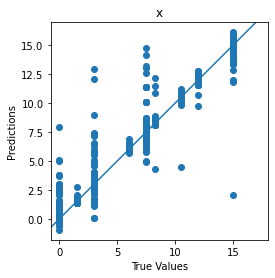

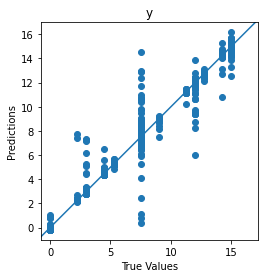

In [56]:
# Run predict
Y_pred = model.predict(norm_test_X)
price_pred = Y_pred[0]
ptratio_pred = Y_pred[1]

plot_diff(test_Y[0], Y_pred[0], title='x')
plot_diff(test_Y[1], Y_pred[1], title='y')

In [ ]:
# Plot RMSE
plot_metrics(metric_name='x_output_root_mean_squared_error', title='x RMSE', ylim=1)
plot_metrics(metric_name='y_output_root_mean_squared_error', title='y RMSE', ylim=1)

In [54]:
# Save model
model.save('./xyForcePlateF2/', save_format='tf')

INFO:tensorflow:Assets written to: ./xyForcePlateF2/assets


In [ ]:
# Restore model
loaded_model = tf.keras.models.load_model('Models/xyForcePlateN6/')

In [ ]:
dataVal.iloc[:,:4].shape

In [ ]:
# Run predict with restored model
predictions = loaded_model.predict(norm_val_X)
x_pred = predictions[0]
y_pred = predictions[1]

In [ ]:
AnDataErr=np.array(val_Y[0]).reshape(len(val_Y[0]),1)
x_pred.shape

In [ ]:
AnData=pd.DataFrame.from_dict(norm_val_X)
AnData.columns=["F0","F1","F2","F3","Fdist","Sx","Sy"]
anDatX=np.array(val_Y[0]).reshape(len(val_Y[0]),1)
AnData['erroX']=x_pred-anDatX
anDatY=np.array(val_Y[1]).reshape(len(val_Y[1]),1)
AnData['erroY']=y_pred-anDatY
AnData.head()

In [ ]:
AnData.to_csv("dataForce.csv")

In [ ]:
norm_test_X[0]

In [ ]:
print(x_pred)

In [ ]:
print(val_Y)

################################################################################